In [1]:
import numpy as np
import pandas as pd
import os
import random
from tqdm import tqdm
import xgboost as xgb
import tensorflow as tf
import cv2
from keras_applications.resnet import ResNet50
from keras.models import Model
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input, decode_predictions
from keras.layers import Flatten, Input
from tensorflow.keras.utils import img_to_array, load_img
import scipy
from sklearn.metrics import fbeta_score
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost
import glob

2023-05-04 17:30:33.159449: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
files = []
categories = []

for directory_path in glob.glob('/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/*'):

    label=directory_path.split('\\')[-1]
    
    for img_path in glob.glob(os.path.join(directory_path,'*.jpg')):
        files.append(img_path)
        categories.append(label)

df = pd.DataFrame({
 'Filename': files,
 'Category': categories
})

df

Filename  \
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
...                                                 ...   
5116  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5117  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5118  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5119  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5120  /Users/mahmouddaker/Desktop/University/MSA/Sem...   

                                               Category  
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
...                                                 ...  
5116  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5117  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5118  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5119  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5120  /Users/mahmouddaker/Desktop/University/MSA/Sem...  

[5121 rows x 2 columns]

In [3]:
df['Category'].value_counts()

/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/NonDemented         2560
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/VeryMildDemented    1792
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/MildDemented         717
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/ModerateDemented      52
Name: Category, dtype: int64

In [4]:
le = preprocessing.LabelEncoder()
le.fit(df['Category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/MildDemented': 0, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/ModerateDemented': 1, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/NonDemented': 2, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/VeryMildDemented': 3}


In [5]:
y = le.transform(df['Category'])

In [6]:
base_model = VGG19(weights='imagenet', include_top=False)
inputs = Input(shape=(48,48,3),name = 'image_input')
x = base_model(inputs)
x = Flatten()(x)
model = Model(inputs=inputs, outputs=x)

In [7]:
import time
start = time.time()

x_train = []
y_train = []

for f in tqdm(df.Filename[:]):
    img_path = f
    img = load_img(img_path, target_size=(48, 48))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    features_reduce =  features.squeeze()
    x_train.append(features_reduce)

  0%|                                                  | 0/5121 [00:00<?, ?it/s]

1/1 [==============================] - 0s 274ms/step


  0%|                                          | 1/5121 [00:00<40:54,  2.09it/s]

1/1 [==============================] - 0s 34ms/step


  0%|                                          | 3/5121 [00:00<16:19,  5.22it/s]

1/1 [==============================] - 0s 48ms/step


  0%|                                          | 5/5121 [00:00<11:59,  7.11it/s]

1/1 [==============================] - 0s 49ms/step


  0%|                                          | 6/5121 [00:00<11:03,  7.71it/s]

1/1 [==============================] - 0s 42ms/step


  0%|                                          | 7/5121 [00:01<10:47,  7.90it/s]

1/1 [==============================] - 0s 83ms/step


  0%|                                          | 8/5121 [00:01<11:24,  7.47it/s]

1/1 [==============================] - 0s 49ms/step


  0%|                                          | 9/5121 [00:01<11:13,  7.59it/s]

1/1 [==============================] - 0s 51ms/step


  0%|                                         | 11/5121 [00:01<10:34,  8.05it/s]

1/1 [==============================] - 0s 58ms/step


  0%|                                         | 12/5121 [00:01<12:50,  6.63it/s]

1/1 [==============================] - 0s 38ms/step


  0%|                                         | 14/5121 [00:01<10:31,  8.09it/s]

1/1 [==============================] - 0s 32ms/step


  0%|▏                                        | 16/5121 [00:02<08:45,  9.72it/s]

1/1 [==============================] - 0s 45ms/step


  0%|▏                                        | 18/5121 [00:02<08:06, 10.48it/s]

1/1 [==============================] - 0s 32ms/step


  0%|▏                                        | 20/5121 [00:02<07:20, 11.58it/s]

1/1 [==============================] - 0s 32ms/step


  0%|▏                                        | 22/5121 [00:02<07:06, 11.96it/s]

1/1 [==============================] - 0s 31ms/step


  0%|▏                                        | 24/5121 [00:02<06:43, 12.63it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▏                                        | 26/5121 [00:02<06:25, 13.23it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▏                                        | 28/5121 [00:02<06:08, 13.83it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▏                                        | 30/5121 [00:03<06:01, 14.10it/s]

1/1 [==============================] - 0s 39ms/step


  1%|▎                                        | 32/5121 [00:03<05:56, 14.27it/s]

1/1 [==============================] - 0s 39ms/step


  1%|▎                                        | 34/5121 [00:03<06:25, 13.19it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▎                                        | 36/5121 [00:03<07:06, 11.93it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▎                                        | 38/5121 [00:03<06:41, 12.65it/s]

1/1 [==============================] - 0s 42ms/step


  1%|▎                                        | 40/5121 [00:03<07:07, 11.88it/s]

1/1 [==============================] - 0s 38ms/step


  1%|▎                                        | 42/5121 [00:04<06:55, 12.22it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▎                                        | 44/5121 [00:04<06:56, 12.18it/s]

1/1 [==============================] - 0s 38ms/step


  1%|▎                                        | 46/5121 [00:04<06:41, 12.65it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▍                                        | 48/5121 [00:04<06:33, 12.88it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▍                                        | 50/5121 [00:04<06:28, 13.04it/s]

1/1 [==============================] - 0s 44ms/step


  1%|▍                                        | 52/5121 [00:04<06:17, 13.44it/s]

1/1 [==============================] - 0s 43ms/step


  1%|▍                                        | 54/5121 [00:05<06:21, 13.28it/s]

1/1 [==============================] - 0s 37ms/step


  1%|▍                                        | 56/5121 [00:05<06:17, 13.43it/s]

1/1 [==============================] - 0s 40ms/step


  1%|▍                                        | 58/5121 [00:05<07:34, 11.14it/s]

1/1 [==============================] - 0s 40ms/step


  1%|▍                                        | 60/5121 [00:05<07:09, 11.77it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▍                                        | 62/5121 [00:05<07:36, 11.08it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▌                                        | 64/5121 [00:05<06:57, 12.12it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                        | 66/5121 [00:06<06:32, 12.87it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▌                                        | 68/5121 [00:06<06:07, 13.74it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▌                                        | 70/5121 [00:06<05:56, 14.17it/s]

1/1 [==============================] - 0s 48ms/step


  1%|▌                                        | 72/5121 [00:06<06:45, 12.44it/s]

1/1 [==============================] - 0s 38ms/step


  1%|▌                                        | 74/5121 [00:06<06:38, 12.67it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▌                                        | 76/5121 [00:06<06:28, 12.99it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▌                                        | 78/5121 [00:06<06:11, 13.59it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▋                                        | 80/5121 [00:07<06:05, 13.79it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▋                                        | 82/5121 [00:07<06:09, 13.65it/s]

1/1 [==============================] - 0s 48ms/step


  2%|▋                                        | 84/5121 [00:07<06:26, 13.02it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▋                                        | 86/5121 [00:07<07:06, 11.80it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▋                                        | 88/5121 [00:07<06:55, 12.12it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▋                                        | 90/5121 [00:07<06:36, 12.70it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▋                                        | 92/5121 [00:08<07:37, 11.00it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▊                                        | 94/5121 [00:08<07:00, 11.96it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▊                                        | 96/5121 [00:08<06:29, 12.91it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▊                                        | 98/5121 [00:08<06:28, 12.92it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▊                                       | 100/5121 [00:08<06:22, 13.14it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▊                                       | 102/5121 [00:08<07:57, 10.52it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▊                                       | 104/5121 [00:09<07:50, 10.66it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▊                                       | 106/5121 [00:09<07:44, 10.80it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▊                                       | 108/5121 [00:09<07:09, 11.67it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▊                                       | 110/5121 [00:09<06:46, 12.34it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▊                                       | 112/5121 [00:09<06:36, 12.64it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▉                                       | 114/5121 [00:09<06:41, 12.46it/s]

1/1 [==============================] - 0s 53ms/step


  2%|▉                                       | 116/5121 [00:10<07:13, 11.55it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▉                                       | 118/5121 [00:10<06:58, 11.95it/s]

1/1 [==============================] - 0s 50ms/step


  2%|▉                                       | 120/5121 [00:10<07:04, 11.77it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▉                                       | 122/5121 [00:10<06:41, 12.44it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▉                                       | 124/5121 [00:10<06:30, 12.80it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▉                                       | 126/5121 [00:10<06:14, 13.34it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▉                                       | 128/5121 [00:10<06:14, 13.33it/s]

1/1 [==============================] - 0s 37ms/step


  3%|█                                       | 130/5121 [00:11<06:10, 13.46it/s]

1/1 [==============================] - 0s 35ms/step


  3%|█                                       | 132/5121 [00:11<06:03, 13.73it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█                                       | 134/5121 [00:11<05:54, 14.08it/s]

1/1 [==============================] - 0s 34ms/step


  3%|█                                       | 136/5121 [00:11<05:44, 14.47it/s]

1/1 [==============================] - 0s 42ms/step


  3%|█                                       | 138/5121 [00:11<05:56, 13.98it/s]

1/1 [==============================] - 0s 37ms/step


  3%|█                                       | 140/5121 [00:11<06:28, 12.83it/s]

1/1 [==============================] - 0s 38ms/step


  3%|█                                       | 142/5121 [00:12<06:28, 12.82it/s]

1/1 [==============================] - 0s 41ms/step


  3%|█                                       | 144/5121 [00:12<06:52, 12.06it/s]

1/1 [==============================] - 0s 41ms/step


  3%|█▏                                      | 146/5121 [00:12<07:14, 11.45it/s]

1/1 [==============================] - 0s 45ms/step


  3%|█▏                                      | 148/5121 [00:12<07:35, 10.91it/s]

1/1 [==============================] - 0s 34ms/step


  3%|█▏                                      | 150/5121 [00:12<07:10, 11.54it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▏                                      | 152/5121 [00:12<06:42, 12.34it/s]

1/1 [==============================] - 0s 34ms/step


  3%|█▏                                      | 154/5121 [00:13<06:19, 13.09it/s]

1/1 [==============================] - 0s 35ms/step


  3%|█▏                                      | 156/5121 [00:13<06:12, 13.32it/s]

1/1 [==============================] - 0s 36ms/step


  3%|█▏                                      | 158/5121 [00:13<06:10, 13.41it/s]

1/1 [==============================] - 0s 35ms/step


  3%|█▏                                      | 160/5121 [00:13<07:40, 10.78it/s]

1/1 [==============================] - 0s 40ms/step


  3%|█▎                                      | 162/5121 [00:13<07:01, 11.75it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▎                                      | 164/5121 [00:13<06:31, 12.68it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▎                                      | 166/5121 [00:14<06:11, 13.36it/s]

1/1 [==============================] - 0s 33ms/step


  3%|█▎                                      | 168/5121 [00:14<05:54, 13.99it/s]

1/1 [==============================] - 0s 35ms/step


  3%|█▎                                      | 170/5121 [00:14<05:49, 14.18it/s]

1/1 [==============================] - 0s 34ms/step


  3%|█▎                                      | 172/5121 [00:14<05:34, 14.82it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▎                                      | 174/5121 [00:14<05:29, 15.00it/s]

1/1 [==============================] - 0s 35ms/step


  3%|█▎                                      | 176/5121 [00:14<05:24, 15.22it/s]

1/1 [==============================] - 0s 37ms/step


  3%|█▍                                      | 178/5121 [00:14<05:26, 15.14it/s]

1/1 [==============================] - 0s 37ms/step


  4%|█▍                                      | 180/5121 [00:14<05:37, 14.63it/s]

1/1 [==============================] - 0s 38ms/step


  4%|█▍                                      | 182/5121 [00:15<05:45, 14.29it/s]

1/1 [==============================] - 0s 38ms/step


  4%|█▍                                      | 184/5121 [00:15<05:55, 13.90it/s]

1/1 [==============================] - 0s 33ms/step


  4%|█▍                                      | 186/5121 [00:15<05:51, 14.04it/s]

1/1 [==============================] - 0s 36ms/step


  4%|█▍                                      | 188/5121 [00:15<05:40, 14.48it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▍                                      | 190/5121 [00:15<05:35, 14.70it/s]

1/1 [==============================] - 0s 31ms/step


  4%|█▍                                      | 192/5121 [00:15<05:36, 14.65it/s]

1/1 [==============================] - 0s 36ms/step


  4%|█▌                                      | 194/5121 [00:15<05:30, 14.90it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▌                                      | 196/5121 [00:16<05:24, 15.15it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▌                                      | 198/5121 [00:16<05:29, 14.95it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▌                                      | 200/5121 [00:16<06:00, 13.65it/s]

1/1 [==============================] - 0s 31ms/step


  4%|█▌                                      | 202/5121 [00:16<05:50, 14.05it/s]

1/1 [==============================] - 0s 43ms/step


  4%|█▌                                      | 204/5121 [00:16<05:43, 14.31it/s]

1/1 [==============================] - 0s 42ms/step


  4%|█▌                                      | 206/5121 [00:16<05:52, 13.95it/s]

1/1 [==============================] - 0s 41ms/step


  4%|█▌                                      | 208/5121 [00:16<05:54, 13.87it/s]

1/1 [==============================] - 0s 40ms/step


  4%|█▋                                      | 210/5121 [00:17<05:58, 13.69it/s]

1/1 [==============================] - 0s 35ms/step


  4%|█▋                                      | 212/5121 [00:17<05:48, 14.10it/s]

1/1 [==============================] - 0s 36ms/step


  4%|█▋                                      | 214/5121 [00:17<05:49, 14.04it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▋                                      | 216/5121 [00:17<05:44, 14.24it/s]

1/1 [==============================] - 0s 47ms/step


  4%|█▋                                      | 218/5121 [00:17<06:10, 13.23it/s]

1/1 [==============================] - 0s 31ms/step


  4%|█▋                                      | 220/5121 [00:17<05:53, 13.85it/s]

1/1 [==============================] - 0s 31ms/step


  4%|█▋                                      | 222/5121 [00:17<05:52, 13.88it/s]

1/1 [==============================] - 0s 36ms/step


  4%|█▋                                      | 224/5121 [00:18<06:03, 13.46it/s]

1/1 [==============================] - 0s 31ms/step


  4%|█▊                                      | 226/5121 [00:18<05:55, 13.75it/s]

1/1 [==============================] - 0s 36ms/step


  4%|█▊                                      | 228/5121 [00:18<05:53, 13.83it/s]

1/1 [==============================] - 0s 35ms/step


  4%|█▊                                      | 230/5121 [00:18<05:55, 13.77it/s]

1/1 [==============================] - 0s 38ms/step


  5%|█▊                                      | 232/5121 [00:18<05:59, 13.60it/s]

1/1 [==============================] - 0s 41ms/step


  5%|█▊                                      | 234/5121 [00:18<06:04, 13.40it/s]

1/1 [==============================] - 0s 43ms/step


  5%|█▊                                      | 236/5121 [00:18<06:19, 12.87it/s]

1/1 [==============================] - 0s 38ms/step


  5%|█▊                                      | 238/5121 [00:19<06:57, 11.70it/s]

1/1 [==============================] - 0s 51ms/step


  5%|█▊                                      | 240/5121 [00:19<07:15, 11.21it/s]

1/1 [==============================] - 0s 41ms/step


  5%|█▉                                      | 242/5121 [00:19<07:02, 11.55it/s]

1/1 [==============================] - 0s 35ms/step


  5%|█▉                                      | 244/5121 [00:19<06:44, 12.07it/s]

1/1 [==============================] - 0s 34ms/step


  5%|█▉                                      | 246/5121 [00:19<06:51, 11.83it/s]

1/1 [==============================] - 0s 38ms/step


  5%|█▉                                      | 248/5121 [00:19<06:32, 12.43it/s]

1/1 [==============================] - 0s 37ms/step


  5%|█▉                                      | 250/5121 [00:20<06:19, 12.82it/s]

1/1 [==============================] - 0s 43ms/step


  5%|█▉                                      | 252/5121 [00:20<06:22, 12.73it/s]

1/1 [==============================] - 0s 37ms/step


  5%|█▉                                      | 254/5121 [00:20<06:21, 12.76it/s]

1/1 [==============================] - 0s 43ms/step


  5%|█▉                                      | 256/5121 [00:20<06:46, 11.96it/s]

1/1 [==============================] - 0s 41ms/step


  5%|██                                      | 258/5121 [00:20<06:30, 12.45it/s]

1/1 [==============================] - 0s 40ms/step


  5%|██                                      | 260/5121 [00:21<07:02, 11.50it/s]

1/1 [==============================] - 0s 50ms/step


  5%|██                                      | 262/5121 [00:21<07:11, 11.27it/s]

1/1 [==============================] - 0s 34ms/step


  5%|██                                      | 264/5121 [00:21<06:56, 11.65it/s]

1/1 [==============================] - 0s 40ms/step


  5%|██                                      | 266/5121 [00:21<06:45, 11.98it/s]

1/1 [==============================] - 0s 36ms/step


  5%|██                                      | 268/5121 [00:21<06:26, 12.56it/s]

1/1 [==============================] - 0s 44ms/step


  5%|██                                      | 270/5121 [00:21<06:26, 12.56it/s]

1/1 [==============================] - 0s 42ms/step


  5%|██                                      | 272/5121 [00:21<06:19, 12.77it/s]

1/1 [==============================] - 0s 53ms/step


  5%|██▏                                     | 274/5121 [00:22<06:37, 12.20it/s]

1/1 [==============================] - 0s 40ms/step


  5%|██▏                                     | 276/5121 [00:22<07:04, 11.41it/s]

1/1 [==============================] - 0s 39ms/step


  5%|██▏                                     | 278/5121 [00:22<06:55, 11.66it/s]

1/1 [==============================] - 0s 67ms/step


  5%|██▏                                     | 280/5121 [00:22<07:10, 11.25it/s]

1/1 [==============================] - 0s 41ms/step


  6%|██▏                                     | 282/5121 [00:22<06:54, 11.67it/s]

1/1 [==============================] - 0s 36ms/step


  6%|██▏                                     | 284/5121 [00:22<06:25, 12.54it/s]

1/1 [==============================] - 0s 40ms/step


  6%|██▏                                     | 286/5121 [00:23<06:16, 12.84it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▏                                     | 288/5121 [00:23<06:40, 12.08it/s]

1/1 [==============================] - 0s 37ms/step


  6%|██▎                                     | 290/5121 [00:23<06:27, 12.47it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▎                                     | 292/5121 [00:23<06:15, 12.84it/s]

1/1 [==============================] - 0s 36ms/step


  6%|██▎                                     | 294/5121 [00:23<05:59, 13.43it/s]

1/1 [==============================] - 0s 36ms/step


  6%|██▎                                     | 296/5121 [00:23<06:24, 12.54it/s]

1/1 [==============================] - 0s 36ms/step


  6%|██▎                                     | 298/5121 [00:24<06:20, 12.66it/s]

1/1 [==============================] - 0s 38ms/step


  6%|██▎                                     | 300/5121 [00:24<07:02, 11.41it/s]

1/1 [==============================] - 0s 57ms/step


  6%|██▎                                     | 302/5121 [00:24<07:11, 11.17it/s]

1/1 [==============================] - 0s 40ms/step


  6%|██▎                                     | 304/5121 [00:24<07:07, 11.26it/s]

1/1 [==============================] - 0s 41ms/step


  6%|██▍                                     | 306/5121 [00:24<07:20, 10.92it/s]

1/1 [==============================] - 0s 41ms/step


  6%|██▍                                     | 308/5121 [00:25<06:57, 11.52it/s]

1/1 [==============================] - 0s 37ms/step


  6%|██▍                                     | 310/5121 [00:25<06:45, 11.88it/s]

1/1 [==============================] - 0s 37ms/step


  6%|██▍                                     | 312/5121 [00:25<07:10, 11.18it/s]

1/1 [==============================] - 0s 47ms/step


  6%|██▍                                     | 314/5121 [00:25<07:29, 10.70it/s]

1/1 [==============================] - 0s 48ms/step


  6%|██▍                                     | 316/5121 [00:25<07:58, 10.04it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▍                                     | 318/5121 [00:26<08:06,  9.87it/s]

1/1 [==============================] - 0s 38ms/step


  6%|██▍                                     | 320/5121 [00:26<07:43, 10.37it/s]

1/1 [==============================] - 0s 41ms/step


  6%|██▌                                     | 322/5121 [00:26<08:17,  9.64it/s]

1/1 [==============================] - 0s 95ms/step


  6%|██▌                                     | 323/5121 [00:26<09:43,  8.22it/s]

1/1 [==============================] - 0s 83ms/step


  6%|██▌                                     | 324/5121 [00:26<10:24,  7.68it/s]

1/1 [==============================] - 0s 48ms/step


  6%|██▌                                     | 325/5121 [00:26<10:04,  7.93it/s]

1/1 [==============================] - 0s 71ms/step


  6%|██▌                                     | 326/5121 [00:27<10:28,  7.63it/s]

1/1 [==============================] - 0s 48ms/step


  6%|██▌                                     | 327/5121 [00:27<09:59,  8.00it/s]

1/1 [==============================] - 0s 38ms/step


  6%|██▌                                     | 329/5121 [00:27<08:32,  9.36it/s]

1/1 [==============================] - 0s 35ms/step


  6%|██▌                                     | 331/5121 [00:27<07:40, 10.41it/s]

1/1 [==============================] - 0s 38ms/step


  7%|██▌                                     | 333/5121 [00:27<07:09, 11.15it/s]

1/1 [==============================] - 0s 43ms/step


  7%|██▌                                     | 335/5121 [00:27<07:04, 11.26it/s]

1/1 [==============================] - 0s 43ms/step


  7%|██▋                                     | 337/5121 [00:28<07:27, 10.70it/s]

1/1 [==============================] - 0s 51ms/step


  7%|██▋                                     | 339/5121 [00:28<07:51, 10.15it/s]

1/1 [==============================] - 0s 46ms/step


  7%|██▋                                     | 341/5121 [00:28<07:38, 10.43it/s]

1/1 [==============================] - 0s 39ms/step


  7%|██▋                                     | 343/5121 [00:28<08:14,  9.66it/s]

1/1 [==============================] - 0s 42ms/step


  7%|██▋                                     | 345/5121 [00:28<07:42, 10.33it/s]

1/1 [==============================] - 0s 46ms/step


  7%|██▋                                     | 347/5121 [00:28<07:30, 10.59it/s]

1/1 [==============================] - 0s 43ms/step


  7%|██▋                                     | 349/5121 [00:29<07:18, 10.87it/s]

1/1 [==============================] - 0s 38ms/step


  7%|██▋                                     | 351/5121 [00:29<07:03, 11.28it/s]

1/1 [==============================] - 0s 43ms/step


  7%|██▊                                     | 353/5121 [00:29<06:52, 11.56it/s]

1/1 [==============================] - 0s 43ms/step


  7%|██▊                                     | 355/5121 [00:29<06:43, 11.80it/s]

1/1 [==============================] - 0s 41ms/step


  7%|██▊                                     | 357/5121 [00:29<06:33, 12.12it/s]

1/1 [==============================] - 0s 39ms/step


  7%|██▊                                     | 359/5121 [00:30<06:55, 11.46it/s]

1/1 [==============================] - 0s 40ms/step


  7%|██▊                                     | 361/5121 [00:30<06:42, 11.84it/s]

1/1 [==============================] - 0s 39ms/step


  7%|██▊                                     | 363/5121 [00:30<06:45, 11.74it/s]

1/1 [==============================] - 0s 37ms/step


  7%|██▊                                     | 365/5121 [00:30<06:32, 12.11it/s]

1/1 [==============================] - 0s 35ms/step


  7%|██▊                                     | 367/5121 [00:30<06:15, 12.66it/s]

1/1 [==============================] - 0s 62ms/step


  7%|██▉                                     | 369/5121 [00:30<07:06, 11.14it/s]

1/1 [==============================] - 0s 37ms/step


  7%|██▉                                     | 371/5121 [00:30<06:34, 12.04it/s]

1/1 [==============================] - 0s 34ms/step


  7%|██▉                                     | 373/5121 [00:31<06:13, 12.71it/s]

1/1 [==============================] - 0s 57ms/step


  7%|██▉                                     | 375/5121 [00:31<06:44, 11.72it/s]

1/1 [==============================] - 0s 34ms/step


  7%|██▉                                     | 377/5121 [00:31<06:25, 12.29it/s]

1/1 [==============================] - 0s 34ms/step


  7%|██▉                                     | 379/5121 [00:31<06:03, 13.03it/s]

1/1 [==============================] - 0s 40ms/step


  7%|██▉                                     | 381/5121 [00:31<06:05, 12.96it/s]

1/1 [==============================] - 0s 35ms/step


  7%|██▉                                     | 383/5121 [00:31<06:30, 12.14it/s]

1/1 [==============================] - 0s 37ms/step


  8%|███                                     | 385/5121 [00:32<06:09, 12.83it/s]

1/1 [==============================] - 0s 42ms/step


  8%|███                                     | 387/5121 [00:32<06:07, 12.88it/s]

1/1 [==============================] - 0s 36ms/step


  8%|███                                     | 389/5121 [00:32<06:01, 13.08it/s]

1/1 [==============================] - 0s 33ms/step


  8%|███                                     | 391/5121 [00:32<06:16, 12.55it/s]

1/1 [==============================] - 0s 38ms/step


  8%|███                                     | 393/5121 [00:32<06:12, 12.68it/s]

1/1 [==============================] - 0s 38ms/step


  8%|███                                     | 395/5121 [00:32<06:09, 12.78it/s]

1/1 [==============================] - 0s 38ms/step


  8%|███                                     | 397/5121 [00:33<06:07, 12.85it/s]

1/1 [==============================] - 0s 38ms/step


  8%|███                                     | 399/5121 [00:33<06:09, 12.78it/s]

1/1 [==============================] - 0s 49ms/step


  8%|███▏                                    | 401/5121 [00:33<06:14, 12.62it/s]

1/1 [==============================] - 0s 41ms/step


  8%|███▏                                    | 403/5121 [00:33<06:15, 12.56it/s]

1/1 [==============================] - 0s 43ms/step


  8%|███▏                                    | 405/5121 [00:33<06:47, 11.57it/s]

1/1 [==============================] - 0s 38ms/step


  8%|███▏                                    | 407/5121 [00:33<06:30, 12.06it/s]

1/1 [==============================] - 0s 36ms/step


  8%|███▏                                    | 409/5121 [00:34<06:14, 12.58it/s]

1/1 [==============================] - 0s 36ms/step


  8%|███▏                                    | 411/5121 [00:34<05:56, 13.22it/s]

1/1 [==============================] - 0s 37ms/step


  8%|███▏                                    | 413/5121 [00:34<05:47, 13.53it/s]

1/1 [==============================] - 0s 40ms/step


  8%|███▏                                    | 415/5121 [00:34<05:56, 13.20it/s]

1/1 [==============================] - 0s 41ms/step


  8%|███▎                                    | 417/5121 [00:34<06:00, 13.05it/s]

1/1 [==============================] - 0s 38ms/step


  8%|███▎                                    | 419/5121 [00:34<05:53, 13.31it/s]

1/1 [==============================] - 0s 49ms/step


  8%|███▎                                    | 421/5121 [00:34<05:52, 13.33it/s]

1/1 [==============================] - 0s 40ms/step


  8%|███▎                                    | 423/5121 [00:35<05:51, 13.35it/s]

1/1 [==============================] - 0s 36ms/step


  8%|███▎                                    | 425/5121 [00:35<06:21, 12.31it/s]

1/1 [==============================] - 0s 40ms/step


  8%|███▎                                    | 427/5121 [00:35<06:22, 12.28it/s]

1/1 [==============================] - 0s 39ms/step


  8%|███▎                                    | 429/5121 [00:35<06:12, 12.58it/s]

1/1 [==============================] - 0s 38ms/step


  8%|███▎                                    | 431/5121 [00:35<06:04, 12.86it/s]

1/1 [==============================] - 0s 35ms/step


  8%|███▍                                    | 433/5121 [00:35<05:54, 13.21it/s]

1/1 [==============================] - 0s 51ms/step


  8%|███▍                                    | 435/5121 [00:35<06:05, 12.83it/s]

1/1 [==============================] - 0s 37ms/step


  9%|███▍                                    | 437/5121 [00:36<06:47, 11.48it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▍                                    | 439/5121 [00:36<06:23, 12.20it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▍                                    | 441/5121 [00:36<05:56, 13.12it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███▍                                    | 443/5121 [00:36<05:38, 13.81it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███▍                                    | 445/5121 [00:36<05:29, 14.19it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▍                                    | 447/5121 [00:36<05:20, 14.57it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███▌                                    | 449/5121 [00:36<05:13, 14.92it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▌                                    | 451/5121 [00:37<05:10, 15.06it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███▌                                    | 453/5121 [00:37<05:09, 15.06it/s]

1/1 [==============================] - 0s 34ms/step


  9%|███▌                                    | 455/5121 [00:37<05:07, 15.19it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▌                                    | 457/5121 [00:37<05:06, 15.22it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███▌                                    | 459/5121 [00:37<05:02, 15.40it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▌                                    | 461/5121 [00:37<05:01, 15.44it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▌                                    | 463/5121 [00:37<05:02, 15.42it/s]

1/1 [==============================] - 0s 43ms/step


  9%|███▋                                    | 465/5121 [00:38<05:13, 14.84it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▋                                    | 467/5121 [00:38<05:10, 14.99it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███▋                                    | 469/5121 [00:38<05:06, 15.20it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▋                                    | 471/5121 [00:38<05:04, 15.28it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▋                                    | 473/5121 [00:38<05:04, 15.28it/s]

1/1 [==============================] - 0s 43ms/step


  9%|███▋                                    | 475/5121 [00:38<06:04, 12.74it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███▋                                    | 477/5121 [00:38<05:56, 13.01it/s]

1/1 [==============================] - 0s 38ms/step


  9%|███▋                                    | 479/5121 [00:39<05:52, 13.17it/s]

1/1 [==============================] - 0s 38ms/step


  9%|███▊                                    | 481/5121 [00:39<06:32, 11.81it/s]

1/1 [==============================] - 0s 40ms/step


  9%|███▊                                    | 483/5121 [00:39<06:19, 12.23it/s]

1/1 [==============================] - 0s 38ms/step


  9%|███▊                                    | 485/5121 [00:39<06:36, 11.70it/s]

1/1 [==============================] - 0s 40ms/step


 10%|███▊                                    | 487/5121 [00:39<08:14,  9.38it/s]

1/1 [==============================] - 0s 41ms/step


 10%|███▊                                    | 489/5121 [00:40<07:35, 10.17it/s]

1/1 [==============================] - 0s 71ms/step


 10%|███▊                                    | 491/5121 [00:40<08:46,  8.79it/s]

1/1 [==============================] - 0s 50ms/step


 10%|███▊                                    | 492/5121 [00:40<08:53,  8.68it/s]

1/1 [==============================] - 0s 36ms/step


 10%|███▊                                    | 494/5121 [00:40<07:56,  9.71it/s]

1/1 [==============================] - 0s 41ms/step


 10%|███▊                                    | 496/5121 [00:40<07:50,  9.83it/s]

1/1 [==============================] - 0s 46ms/step


 10%|███▉                                    | 498/5121 [00:41<07:43,  9.97it/s]

1/1 [==============================] - 0s 47ms/step


 10%|███▉                                    | 500/5121 [00:41<07:59,  9.65it/s]

1/1 [==============================] - 0s 37ms/step


 10%|███▉                                    | 501/5121 [00:41<08:11,  9.41it/s]

1/1 [==============================] - 0s 46ms/step


 10%|███▉                                    | 502/5121 [00:41<08:08,  9.45it/s]

1/1 [==============================] - 0s 37ms/step


 10%|███▉                                    | 504/5121 [00:41<07:42,  9.98it/s]

1/1 [==============================] - 0s 41ms/step


 10%|███▉                                    | 505/5121 [00:41<07:47,  9.88it/s]

1/1 [==============================] - 0s 37ms/step


 10%|███▉                                    | 507/5121 [00:41<07:16, 10.56it/s]

1/1 [==============================] - 0s 36ms/step


 10%|███▉                                    | 509/5121 [00:42<06:50, 11.23it/s]

1/1 [==============================] - 0s 108ms/step


 10%|███▉                                    | 511/5121 [00:42<08:23,  9.15it/s]

1/1 [==============================] - 0s 38ms/step


 10%|███▉                                    | 512/5121 [00:42<08:45,  8.76it/s]

1/1 [==============================] - 0s 36ms/step


 10%|████                                    | 514/5121 [00:42<07:55,  9.70it/s]

1/1 [==============================] - 0s 35ms/step


 10%|████                                    | 515/5121 [00:42<08:29,  9.05it/s]

1/1 [==============================] - 0s 40ms/step


 10%|████                                    | 516/5121 [00:42<08:24,  9.12it/s]

1/1 [==============================] - 0s 36ms/step


 10%|████                                    | 518/5121 [00:43<08:04,  9.50it/s]

1/1 [==============================] - 0s 37ms/step


 10%|████                                    | 520/5121 [00:43<07:57,  9.64it/s]

1/1 [==============================] - 0s 37ms/step


 10%|████                                    | 522/5121 [00:43<07:45,  9.88it/s]

1/1 [==============================] - 0s 38ms/step


 10%|████                                    | 523/5121 [00:43<07:45,  9.88it/s]

1/1 [==============================] - 0s 37ms/step


 10%|████                                    | 524/5121 [00:43<07:44,  9.89it/s]

1/1 [==============================] - 0s 40ms/step


 10%|████                                    | 525/5121 [00:43<08:54,  8.59it/s]

1/1 [==============================] - 0s 37ms/step


 10%|████                                    | 527/5121 [00:44<07:23, 10.35it/s]

1/1 [==============================] - 0s 40ms/step


 10%|████▏                                   | 529/5121 [00:44<07:43,  9.90it/s]

1/1 [==============================] - 0s 55ms/step


 10%|████▏                                   | 531/5121 [00:44<08:31,  8.97it/s]

1/1 [==============================] - 0s 40ms/step


 10%|████▏                                   | 533/5121 [00:44<07:37, 10.02it/s]

1/1 [==============================] - 0s 41ms/step


 10%|████▏                                   | 535/5121 [00:44<07:31, 10.16it/s]

1/1 [==============================] - 0s 55ms/step


 10%|████▏                                   | 537/5121 [00:45<09:11,  8.31it/s]

1/1 [==============================] - 0s 64ms/step


 11%|████▏                                   | 538/5121 [00:45<09:05,  8.40it/s]

1/1 [==============================] - 0s 62ms/step


 11%|████▏                                   | 539/5121 [00:45<09:35,  7.96it/s]

1/1 [==============================] - 0s 42ms/step


 11%|████▏                                   | 540/5121 [00:45<09:43,  7.85it/s]

1/1 [==============================] - 0s 48ms/step


 11%|████▏                                   | 541/5121 [00:45<09:43,  7.86it/s]

1/1 [==============================] - 0s 42ms/step


 11%|████▏                                   | 542/5121 [00:45<09:32,  8.00it/s]

1/1 [==============================] - 0s 46ms/step


 11%|████▏                                   | 543/5121 [00:45<09:42,  7.86it/s]

1/1 [==============================] - 0s 41ms/step


 11%|████▎                                   | 545/5121 [00:46<08:59,  8.49it/s]

1/1 [==============================] - 0s 44ms/step


 11%|████▎                                   | 547/5121 [00:46<08:38,  8.82it/s]

1/1 [==============================] - 0s 41ms/step


 11%|████▎                                   | 549/5121 [00:46<07:41,  9.91it/s]

1/1 [==============================] - 0s 44ms/step


 11%|████▎                                   | 550/5121 [00:46<08:05,  9.42it/s]

1/1 [==============================] - 0s 56ms/step


 11%|████▎                                   | 551/5121 [00:46<08:17,  9.18it/s]

1/1 [==============================] - 0s 43ms/step


 11%|████▎                                   | 552/5121 [00:46<08:42,  8.74it/s]

1/1 [==============================] - 0s 48ms/step


 11%|████▎                                   | 553/5121 [00:47<08:33,  8.89it/s]

1/1 [==============================] - 0s 55ms/step


 11%|████▎                                   | 554/5121 [00:47<08:56,  8.51it/s]

1/1 [==============================] - 0s 45ms/step


 11%|████▎                                   | 556/5121 [00:47<08:05,  9.41it/s]

1/1 [==============================] - 0s 46ms/step


 11%|████▎                                   | 558/5121 [00:47<07:36, 10.00it/s]

1/1 [==============================] - 0s 38ms/step


 11%|████▎                                   | 560/5121 [00:47<07:14, 10.50it/s]

1/1 [==============================] - 0s 91ms/step


 11%|████▍                                   | 562/5121 [00:48<08:45,  8.67it/s]

1/1 [==============================] - 0s 41ms/step


 11%|████▍                                   | 563/5121 [00:48<09:00,  8.43it/s]

1/1 [==============================] - 0s 53ms/step


 11%|████▍                                   | 564/5121 [00:48<08:51,  8.58it/s]

1/1 [==============================] - 0s 98ms/step


 11%|████▍                                   | 565/5121 [00:48<09:44,  7.80it/s]

1/1 [==============================] - 0s 57ms/step


 11%|████▍                                   | 566/5121 [00:48<09:59,  7.60it/s]

1/1 [==============================] - 0s 85ms/step


 11%|████▍                                   | 567/5121 [00:48<10:38,  7.13it/s]

1/1 [==============================] - 0s 63ms/step


 11%|████▍                                   | 568/5121 [00:49<13:17,  5.71it/s]

1/1 [==============================] - 0s 156ms/step


 11%|████▍                                   | 569/5121 [00:49<14:34,  5.21it/s]

1/1 [==============================] - 0s 44ms/step


 11%|████▍                                   | 570/5121 [00:49<13:26,  5.65it/s]

1/1 [==============================] - 0s 44ms/step


 11%|████▍                                   | 572/5121 [00:49<10:00,  7.57it/s]

1/1 [==============================] - 0s 36ms/step


 11%|████▍                                   | 574/5121 [00:49<08:34,  8.83it/s]

1/1 [==============================] - 0s 42ms/step


 11%|████▍                                   | 576/5121 [00:49<07:37,  9.93it/s]

1/1 [==============================] - 0s 44ms/step


 11%|████▌                                   | 578/5121 [00:50<07:49,  9.67it/s]

1/1 [==============================] - 0s 40ms/step


 11%|████▌                                   | 580/5121 [00:50<07:29, 10.11it/s]

1/1 [==============================] - 0s 43ms/step


 11%|████▌                                   | 582/5121 [00:50<07:08, 10.60it/s]

1/1 [==============================] - 0s 69ms/step


 11%|████▌                                   | 584/5121 [00:50<07:22, 10.26it/s]

1/1 [==============================] - 0s 45ms/step


 11%|████▌                                   | 586/5121 [00:50<07:24, 10.21it/s]

1/1 [==============================] - 0s 40ms/step


 11%|████▌                                   | 588/5121 [00:51<06:57, 10.86it/s]

1/1 [==============================] - 0s 42ms/step


 12%|████▌                                   | 590/5121 [00:51<06:41, 11.29it/s]

1/1 [==============================] - 0s 40ms/step


 12%|████▌                                   | 592/5121 [00:51<08:16,  9.12it/s]

1/1 [==============================] - 0s 39ms/step


 12%|████▋                                   | 594/5121 [00:51<07:31, 10.02it/s]

1/1 [==============================] - 0s 42ms/step


 12%|████▋                                   | 596/5121 [00:51<07:04, 10.65it/s]

1/1 [==============================] - 0s 42ms/step


 12%|████▋                                   | 598/5121 [00:51<06:41, 11.26it/s]

1/1 [==============================] - 0s 38ms/step


 12%|████▋                                   | 600/5121 [00:52<06:28, 11.64it/s]

1/1 [==============================] - 0s 39ms/step


 12%|████▋                                   | 602/5121 [00:52<06:14, 12.06it/s]

1/1 [==============================] - 0s 44ms/step


 12%|████▋                                   | 604/5121 [00:52<06:38, 11.33it/s]

1/1 [==============================] - 0s 53ms/step


 12%|████▋                                   | 606/5121 [00:52<06:54, 10.90it/s]

1/1 [==============================] - 0s 51ms/step


 12%|████▋                                   | 608/5121 [00:52<06:59, 10.75it/s]

1/1 [==============================] - 0s 48ms/step


 12%|████▊                                   | 610/5121 [00:53<06:59, 10.76it/s]

1/1 [==============================] - 0s 47ms/step


 12%|████▊                                   | 612/5121 [00:53<07:14, 10.37it/s]

1/1 [==============================] - 0s 48ms/step


 12%|████▊                                   | 614/5121 [00:53<07:27, 10.07it/s]

1/1 [==============================] - 0s 45ms/step


 12%|████▊                                   | 616/5121 [00:53<07:40,  9.78it/s]

1/1 [==============================] - 0s 43ms/step


 12%|████▊                                   | 618/5121 [00:53<07:49,  9.59it/s]

1/1 [==============================] - 0s 48ms/step


 12%|████▊                                   | 620/5121 [00:54<07:28, 10.03it/s]

1/1 [==============================] - 0s 46ms/step


 12%|████▊                                   | 622/5121 [00:54<07:18, 10.26it/s]

1/1 [==============================] - 0s 80ms/step


 12%|████▊                                   | 624/5121 [00:54<08:14,  9.10it/s]

1/1 [==============================] - 0s 48ms/step


 12%|████▉                                   | 626/5121 [00:54<07:55,  9.46it/s]

1/1 [==============================] - 0s 46ms/step


 12%|████▉                                   | 627/5121 [00:54<08:13,  9.10it/s]

1/1 [==============================] - 0s 46ms/step


 12%|████▉                                   | 629/5121 [00:55<07:47,  9.61it/s]

1/1 [==============================] - 0s 54ms/step


 12%|████▉                                   | 630/5121 [00:55<07:59,  9.37it/s]

1/1 [==============================] - 0s 46ms/step


 12%|████▉                                   | 632/5121 [00:55<08:06,  9.22it/s]

1/1 [==============================] - 0s 47ms/step


 12%|████▉                                   | 634/5121 [00:55<08:11,  9.14it/s]

1/1 [==============================] - 0s 44ms/step


 12%|████▉                                   | 636/5121 [00:55<07:24, 10.10it/s]

1/1 [==============================] - 0s 45ms/step


 12%|████▉                                   | 638/5121 [00:55<07:12, 10.36it/s]

1/1 [==============================] - 0s 54ms/step


 12%|████▉                                   | 640/5121 [00:56<07:37,  9.79it/s]

1/1 [==============================] - 0s 72ms/step


 13%|█████                                   | 641/5121 [00:56<08:27,  8.84it/s]

1/1 [==============================] - 0s 55ms/step


 13%|█████                                   | 642/5121 [00:56<08:30,  8.77it/s]

1/1 [==============================] - 0s 83ms/step


 13%|█████                                   | 643/5121 [00:56<09:08,  8.16it/s]

1/1 [==============================] - 0s 73ms/step


 13%|█████                                   | 644/5121 [00:56<09:55,  7.52it/s]

1/1 [==============================] - 0s 46ms/step


 13%|█████                                   | 645/5121 [00:56<09:33,  7.80it/s]

1/1 [==============================] - 0s 56ms/step


 13%|█████                                   | 646/5121 [00:57<09:33,  7.80it/s]

1/1 [==============================] - 0s 66ms/step


 13%|█████                                   | 647/5121 [00:57<09:41,  7.70it/s]

1/1 [==============================] - 0s 66ms/step


 13%|█████                                   | 648/5121 [00:57<09:42,  7.68it/s]

1/1 [==============================] - 0s 59ms/step


 13%|█████                                   | 650/5121 [00:57<09:05,  8.19it/s]

1/1 [==============================] - 0s 56ms/step


 13%|█████                                   | 652/5121 [00:57<08:35,  8.67it/s]

1/1 [==============================] - 0s 58ms/step


 13%|█████                                   | 653/5121 [00:57<08:27,  8.81it/s]

1/1 [==============================] - 0s 51ms/step


 13%|█████                                   | 654/5121 [00:57<08:23,  8.88it/s]

1/1 [==============================] - 0s 55ms/step


 13%|█████                                   | 655/5121 [00:58<08:34,  8.68it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█████▏                                  | 657/5121 [00:58<07:38,  9.73it/s]

1/1 [==============================] - 0s 84ms/step


 13%|█████▏                                  | 658/5121 [00:58<08:19,  8.93it/s]

1/1 [==============================] - 0s 69ms/step


 13%|█████▏                                  | 659/5121 [00:58<08:38,  8.60it/s]

1/1 [==============================] - 0s 57ms/step


 13%|█████▏                                  | 660/5121 [00:58<09:10,  8.10it/s]

1/1 [==============================] - 0s 45ms/step


 13%|█████▏                                  | 662/5121 [00:58<08:51,  8.38it/s]

1/1 [==============================] - 0s 50ms/step


 13%|█████▏                                  | 663/5121 [00:58<08:52,  8.37it/s]

1/1 [==============================] - 0s 55ms/step


 13%|█████▏                                  | 664/5121 [00:59<08:56,  8.31it/s]

1/1 [==============================] - 0s 53ms/step


 13%|█████▏                                  | 665/5121 [00:59<09:29,  7.82it/s]

1/1 [==============================] - 0s 87ms/step


 13%|█████▏                                  | 666/5121 [00:59<09:43,  7.64it/s]

1/1 [==============================] - 0s 62ms/step


 13%|█████▏                                  | 667/5121 [00:59<09:27,  7.85it/s]

1/1 [==============================] - 0s 57ms/step


 13%|█████▏                                  | 668/5121 [00:59<09:01,  8.23it/s]

1/1 [==============================] - 0s 63ms/step


 13%|█████▏                                  | 669/5121 [00:59<10:07,  7.33it/s]

1/1 [==============================] - 0s 195ms/step


 13%|█████▏                                  | 670/5121 [01:00<12:25,  5.97it/s]

1/1 [==============================] - 0s 58ms/step


 13%|█████▏                                  | 671/5121 [01:00<11:16,  6.57it/s]

1/1 [==============================] - 0s 51ms/step


 13%|█████▏                                  | 672/5121 [01:00<10:34,  7.01it/s]

1/1 [==============================] - 0s 50ms/step


 13%|█████▎                                  | 673/5121 [01:00<10:29,  7.07it/s]

1/1 [==============================] - 0s 46ms/step


 13%|█████▎                                  | 674/5121 [01:00<09:53,  7.50it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█████▎                                  | 675/5121 [01:00<09:45,  7.59it/s]

1/1 [==============================] - 0s 83ms/step


 13%|█████▎                                  | 677/5121 [01:00<09:19,  7.95it/s]

1/1 [==============================] - 0s 81ms/step


 13%|█████▎                                  | 678/5121 [01:01<11:16,  6.57it/s]

1/1 [==============================] - 0s 61ms/step


 13%|█████▎                                  | 679/5121 [01:01<11:19,  6.54it/s]

1/1 [==============================] - 0s 72ms/step


 13%|█████▎                                  | 680/5121 [01:01<11:05,  6.68it/s]

1/1 [==============================] - 0s 65ms/step


 13%|█████▎                                  | 681/5121 [01:01<10:28,  7.06it/s]

1/1 [==============================] - 0s 60ms/step


 13%|█████▎                                  | 682/5121 [01:01<09:59,  7.40it/s]

1/1 [==============================] - 0s 69ms/step


 13%|█████▎                                  | 684/5121 [01:01<09:11,  8.04it/s]

1/1 [==============================] - 0s 69ms/step


 13%|█████▎                                  | 685/5121 [01:02<09:49,  7.52it/s]

1/1 [==============================] - 0s 66ms/step


 13%|█████▎                                  | 686/5121 [01:02<10:09,  7.27it/s]

1/1 [==============================] - 0s 45ms/step


 13%|█████▎                                  | 687/5121 [01:02<10:23,  7.11it/s]

1/1 [==============================] - 0s 67ms/step


 13%|█████▎                                  | 688/5121 [01:02<10:15,  7.20it/s]

1/1 [==============================] - 0s 50ms/step


 13%|█████▍                                  | 689/5121 [01:02<09:40,  7.63it/s]

1/1 [==============================] - 0s 50ms/step


 13%|█████▍                                  | 690/5121 [01:02<09:17,  7.94it/s]

1/1 [==============================] - 0s 68ms/step


 13%|█████▍                                  | 691/5121 [01:02<09:14,  8.00it/s]

1/1 [==============================] - 0s 62ms/step


 14%|█████▍                                  | 693/5121 [01:03<08:19,  8.87it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█████▍                                  | 694/5121 [01:03<08:40,  8.50it/s]

1/1 [==============================] - 0s 75ms/step


 14%|█████▍                                  | 695/5121 [01:03<09:01,  8.17it/s]

1/1 [==============================] - 0s 73ms/step


 14%|█████▍                                  | 696/5121 [01:03<09:58,  7.39it/s]

1/1 [==============================] - 0s 58ms/step


 14%|█████▍                                  | 697/5121 [01:03<09:37,  7.66it/s]

1/1 [==============================] - 0s 57ms/step


 14%|█████▍                                  | 698/5121 [01:03<09:11,  8.02it/s]

1/1 [==============================] - 0s 54ms/step


 14%|█████▍                                  | 699/5121 [01:03<09:41,  7.61it/s]

1/1 [==============================] - 0s 49ms/step


 14%|█████▍                                  | 700/5121 [01:03<09:19,  7.90it/s]

1/1 [==============================] - 0s 48ms/step


 14%|█████▍                                  | 701/5121 [01:04<10:02,  7.34it/s]

1/1 [==============================] - 0s 56ms/step


 14%|█████▍                                  | 702/5121 [01:04<10:06,  7.28it/s]

1/1 [==============================] - 0s 53ms/step


 14%|█████▍                                  | 703/5121 [01:04<09:34,  7.68it/s]

1/1 [==============================] - 0s 60ms/step


 14%|█████▍                                  | 704/5121 [01:04<09:45,  7.54it/s]

1/1 [==============================] - 0s 75ms/step


 14%|█████▌                                  | 705/5121 [01:04<09:53,  7.44it/s]

1/1 [==============================] - 0s 72ms/step


 14%|█████▌                                  | 707/5121 [01:04<09:04,  8.11it/s]

1/1 [==============================] - 0s 54ms/step


 14%|█████▌                                  | 708/5121 [01:04<09:00,  8.16it/s]

1/1 [==============================] - 0s 56ms/step


 14%|█████▌                                  | 709/5121 [01:05<09:03,  8.12it/s]

1/1 [==============================] - 0s 62ms/step


 14%|█████▌                                  | 710/5121 [01:05<08:59,  8.18it/s]

1/1 [==============================] - 0s 62ms/step


 14%|█████▌                                  | 711/5121 [01:05<09:03,  8.11it/s]

1/1 [==============================] - 0s 53ms/step


 14%|█████▌                                  | 712/5121 [01:05<08:41,  8.46it/s]

1/1 [==============================] - 0s 53ms/step


 14%|█████▌                                  | 713/5121 [01:05<09:19,  7.88it/s]

1/1 [==============================] - 0s 61ms/step


 14%|█████▌                                  | 714/5121 [01:05<09:20,  7.87it/s]

1/1 [==============================] - 0s 50ms/step


 14%|█████▌                                  | 715/5121 [01:06<16:42,  4.39it/s]

1/1 [==============================] - 0s 92ms/step


 14%|█████▌                                  | 716/5121 [01:06<15:09,  4.84it/s]

1/1 [==============================] - 0s 276ms/step


 14%|█████▌                                  | 717/5121 [01:06<19:30,  3.76it/s]

1/1 [==============================] - 0s 126ms/step


 14%|█████▌                                  | 718/5121 [01:07<19:18,  3.80it/s]

1/1 [==============================] - 0s 80ms/step


 14%|█████▌                                  | 719/5121 [01:07<17:20,  4.23it/s]

1/1 [==============================] - 0s 65ms/step


 14%|█████▌                                  | 720/5121 [01:07<15:26,  4.75it/s]

1/1 [==============================] - 0s 91ms/step


 14%|█████▋                                  | 721/5121 [01:07<14:36,  5.02it/s]

1/1 [==============================] - 0s 154ms/step


 14%|█████▋                                  | 722/5121 [01:07<17:03,  4.30it/s]

1/1 [==============================] - 0s 61ms/step


 14%|█████▋                                  | 723/5121 [01:08<15:54,  4.61it/s]

1/1 [==============================] - 0s 48ms/step


 14%|█████▋                                  | 724/5121 [01:08<15:05,  4.85it/s]

1/1 [==============================] - 0s 75ms/step


 14%|█████▋                                  | 725/5121 [01:08<13:51,  5.28it/s]

1/1 [==============================] - 0s 50ms/step


 14%|█████▋                                  | 726/5121 [01:08<13:12,  5.54it/s]

1/1 [==============================] - 0s 50ms/step


 14%|█████▋                                  | 728/5121 [01:08<10:05,  7.25it/s]

1/1 [==============================] - 0s 56ms/step


 14%|█████▋                                  | 729/5121 [01:08<09:37,  7.60it/s]

1/1 [==============================] - 0s 68ms/step


 14%|█████▋                                  | 730/5121 [01:08<09:26,  7.75it/s]

1/1 [==============================] - 0s 77ms/step


 14%|█████▋                                  | 731/5121 [01:09<09:45,  7.50it/s]

1/1 [==============================] - 0s 48ms/step


 14%|█████▋                                  | 732/5121 [01:09<10:25,  7.01it/s]

1/1 [==============================] - 0s 49ms/step


 14%|█████▋                                  | 733/5121 [01:09<11:49,  6.18it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█████▋                                  | 734/5121 [01:09<11:11,  6.53it/s]

1/1 [==============================] - 0s 50ms/step


 14%|█████▋                                  | 736/5121 [01:09<09:15,  7.90it/s]

1/1 [==============================] - 0s 53ms/step


 14%|█████▊                                  | 738/5121 [01:09<08:32,  8.56it/s]

1/1 [==============================] - 0s 62ms/step


 14%|█████▊                                  | 739/5121 [01:10<08:40,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█████▊                                  | 741/5121 [01:10<08:00,  9.11it/s]

1/1 [==============================] - 0s 54ms/step


 14%|█████▊                                  | 742/5121 [01:10<08:20,  8.74it/s]

1/1 [==============================] - 0s 52ms/step


 15%|█████▊                                  | 744/5121 [01:10<07:57,  9.16it/s]

1/1 [==============================] - 0s 46ms/step


 15%|█████▊                                  | 745/5121 [01:10<08:12,  8.89it/s]

1/1 [==============================] - 0s 60ms/step


 15%|█████▊                                  | 747/5121 [01:10<07:40,  9.50it/s]

1/1 [==============================] - 0s 57ms/step


 15%|█████▊                                  | 748/5121 [01:11<08:01,  9.09it/s]

1/1 [==============================] - 0s 97ms/step


 15%|█████▊                                  | 749/5121 [01:11<09:20,  7.81it/s]

1/1 [==============================] - 0s 73ms/step


 15%|█████▊                                  | 750/5121 [01:11<09:47,  7.43it/s]

1/1 [==============================] - 0s 50ms/step


 15%|█████▊                                  | 751/5121 [01:11<09:44,  7.48it/s]

1/1 [==============================] - 0s 55ms/step


 15%|█████▊                                  | 752/5121 [01:11<09:03,  8.03it/s]

1/1 [==============================] - 0s 48ms/step


 15%|█████▉                                  | 753/5121 [01:11<09:21,  7.78it/s]

1/1 [==============================] - 0s 47ms/step


 15%|█████▉                                  | 754/5121 [01:11<09:27,  7.69it/s]

1/1 [==============================] - 0s 48ms/step


 15%|█████▉                                  | 756/5121 [01:12<08:39,  8.39it/s]

1/1 [==============================] - 0s 51ms/step


 15%|█████▉                                  | 757/5121 [01:12<08:22,  8.68it/s]

1/1 [==============================] - 0s 43ms/step


 15%|█████▉                                  | 758/5121 [01:12<08:28,  8.59it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█████▉                                  | 760/5121 [01:12<07:40,  9.47it/s]

1/1 [==============================] - 0s 51ms/step


 15%|█████▉                                  | 761/5121 [01:12<07:35,  9.57it/s]

1/1 [==============================] - 0s 60ms/step


 15%|█████▉                                  | 762/5121 [01:12<07:36,  9.55it/s]

1/1 [==============================] - 0s 64ms/step


 15%|█████▉                                  | 763/5121 [01:12<08:20,  8.71it/s]

1/1 [==============================] - 0s 66ms/step


 15%|█████▉                                  | 764/5121 [01:13<09:00,  8.07it/s]

1/1 [==============================] - 0s 54ms/step


 15%|█████▉                                  | 765/5121 [01:13<08:59,  8.08it/s]

1/1 [==============================] - 0s 60ms/step


 15%|█████▉                                  | 766/5121 [01:13<08:49,  8.22it/s]

1/1 [==============================] - 0s 47ms/step


 15%|█████▉                                  | 767/5121 [01:13<08:40,  8.37it/s]

1/1 [==============================] - 0s 60ms/step


 15%|█████▉                                  | 768/5121 [01:13<08:39,  8.37it/s]

1/1 [==============================] - 0s 59ms/step


 15%|██████                                  | 769/5121 [01:13<09:23,  7.73it/s]

1/1 [==============================] - 0s 55ms/step


 15%|██████                                  | 770/5121 [01:13<08:58,  8.08it/s]

1/1 [==============================] - 0s 50ms/step


 15%|██████                                  | 771/5121 [01:13<08:49,  8.22it/s]

1/1 [==============================] - 0s 57ms/step


 15%|██████                                  | 772/5121 [01:13<09:13,  7.86it/s]

1/1 [==============================] - 0s 51ms/step


 15%|██████                                  | 773/5121 [01:14<09:34,  7.57it/s]

1/1 [==============================] - 0s 59ms/step


 15%|██████                                  | 774/5121 [01:14<09:06,  7.95it/s]

1/1 [==============================] - 0s 50ms/step


 15%|██████                                  | 775/5121 [01:14<09:28,  7.64it/s]

1/1 [==============================] - 0s 54ms/step


 15%|██████                                  | 776/5121 [01:14<09:04,  7.99it/s]

1/1 [==============================] - 0s 50ms/step


 15%|██████                                  | 777/5121 [01:14<09:23,  7.71it/s]

1/1 [==============================] - 0s 56ms/step


 15%|██████                                  | 778/5121 [01:14<10:25,  6.94it/s]

1/1 [==============================] - 0s 45ms/step


 15%|██████                                  | 779/5121 [01:14<09:54,  7.30it/s]

1/1 [==============================] - 0s 55ms/step


 15%|██████                                  | 780/5121 [01:15<09:13,  7.84it/s]

1/1 [==============================] - 0s 52ms/step


 15%|██████                                  | 781/5121 [01:15<10:13,  7.07it/s]

1/1 [==============================] - 0s 60ms/step


 15%|██████                                  | 782/5121 [01:15<09:47,  7.39it/s]

1/1 [==============================] - 0s 51ms/step


 15%|██████                                  | 783/5121 [01:15<09:15,  7.81it/s]

1/1 [==============================] - 0s 60ms/step


 15%|██████                                  | 784/5121 [01:15<09:21,  7.72it/s]

1/1 [==============================] - 0s 52ms/step


 15%|██████▏                                 | 785/5121 [01:15<09:41,  7.45it/s]

1/1 [==============================] - 0s 59ms/step


 15%|██████▏                                 | 786/5121 [01:15<09:39,  7.49it/s]

1/1 [==============================] - 0s 58ms/step


 15%|██████▏                                 | 787/5121 [01:15<09:40,  7.47it/s]

1/1 [==============================] - 0s 58ms/step


 15%|██████▏                                 | 788/5121 [01:16<09:57,  7.26it/s]

1/1 [==============================] - 0s 60ms/step


 15%|██████▏                                 | 789/5121 [01:16<10:38,  6.78it/s]

1/1 [==============================] - 0s 75ms/step


 15%|██████▏                                 | 790/5121 [01:16<10:18,  7.00it/s]

1/1 [==============================] - 0s 78ms/step


 15%|██████▏                                 | 791/5121 [01:16<10:31,  6.86it/s]

1/1 [==============================] - 0s 66ms/step


 15%|██████▏                                 | 792/5121 [01:16<10:11,  7.07it/s]

1/1 [==============================] - 0s 60ms/step


 15%|██████▏                                 | 793/5121 [01:16<09:48,  7.36it/s]

1/1 [==============================] - 0s 66ms/step


 16%|██████▏                                 | 794/5121 [01:16<09:41,  7.44it/s]

1/1 [==============================] - 0s 52ms/step


 16%|██████▏                                 | 795/5121 [01:17<09:15,  7.79it/s]

1/1 [==============================] - 0s 59ms/step


 16%|██████▏                                 | 796/5121 [01:17<09:00,  8.00it/s]

1/1 [==============================] - 0s 54ms/step


 16%|██████▏                                 | 797/5121 [01:17<08:46,  8.21it/s]

1/1 [==============================] - 0s 53ms/step


 16%|██████▏                                 | 798/5121 [01:17<08:38,  8.34it/s]

1/1 [==============================] - 0s 69ms/step


 16%|██████▏                                 | 799/5121 [01:17<09:12,  7.82it/s]

1/1 [==============================] - 0s 72ms/step


 16%|██████▏                                 | 800/5121 [01:17<10:01,  7.19it/s]

1/1 [==============================] - 0s 81ms/step


 16%|██████▎                                 | 801/5121 [01:17<10:08,  7.10it/s]

1/1 [==============================] - 0s 66ms/step


 16%|██████▎                                 | 802/5121 [01:18<10:34,  6.81it/s]

1/1 [==============================] - 0s 50ms/step


 16%|██████▎                                 | 803/5121 [01:18<09:47,  7.35it/s]

1/1 [==============================] - 0s 46ms/step


 16%|██████▎                                 | 804/5121 [01:18<09:01,  7.97it/s]

1/1 [==============================] - 0s 59ms/step


 16%|██████▎                                 | 805/5121 [01:18<09:19,  7.72it/s]

1/1 [==============================] - 0s 75ms/step


 16%|██████▎                                 | 806/5121 [01:18<09:22,  7.67it/s]

1/1 [==============================] - 0s 53ms/step


 16%|██████▎                                 | 807/5121 [01:18<08:54,  8.07it/s]

1/1 [==============================] - 0s 75ms/step


 16%|██████▎                                 | 808/5121 [01:18<09:30,  7.55it/s]

1/1 [==============================] - 0s 58ms/step


 16%|██████▎                                 | 809/5121 [01:18<10:17,  6.98it/s]

1/1 [==============================] - 0s 58ms/step


 16%|██████▎                                 | 810/5121 [01:19<09:57,  7.22it/s]

1/1 [==============================] - 0s 53ms/step


 16%|██████▎                                 | 811/5121 [01:19<10:15,  7.00it/s]

1/1 [==============================] - 0s 44ms/step


 16%|██████▎                                 | 812/5121 [01:19<10:39,  6.74it/s]

1/1 [==============================] - 0s 54ms/step


 16%|██████▎                                 | 813/5121 [01:19<10:40,  6.73it/s]

1/1 [==============================] - 0s 54ms/step


 16%|██████▎                                 | 814/5121 [01:19<09:47,  7.33it/s]

1/1 [==============================] - 0s 61ms/step


 16%|██████▎                                 | 815/5121 [01:19<09:16,  7.74it/s]

1/1 [==============================] - 0s 61ms/step


 16%|██████▎                                 | 816/5121 [01:19<09:02,  7.93it/s]

1/1 [==============================] - 0s 69ms/step


 16%|██████▍                                 | 817/5121 [01:20<09:17,  7.72it/s]

1/1 [==============================] - 0s 73ms/step


 16%|██████▍                                 | 818/5121 [01:20<09:39,  7.42it/s]

1/1 [==============================] - 0s 64ms/step


 16%|██████▍                                 | 819/5121 [01:20<10:03,  7.13it/s]

1/1 [==============================] - 0s 66ms/step


 16%|██████▍                                 | 820/5121 [01:20<09:57,  7.20it/s]

1/1 [==============================] - 0s 55ms/step


 16%|██████▍                                 | 821/5121 [01:20<09:53,  7.24it/s]

1/1 [==============================] - 0s 131ms/step


 16%|██████▍                                 | 822/5121 [01:20<10:54,  6.57it/s]

1/1 [==============================] - 0s 52ms/step


 16%|██████▍                                 | 823/5121 [01:20<10:33,  6.78it/s]

1/1 [==============================] - 0s 51ms/step


 16%|██████▍                                 | 824/5121 [01:21<10:13,  7.01it/s]

1/1 [==============================] - 0s 56ms/step


 16%|██████▍                                 | 825/5121 [01:21<09:18,  7.69it/s]

1/1 [==============================] - 0s 74ms/step


 16%|██████▍                                 | 827/5121 [01:21<08:37,  8.30it/s]

1/1 [==============================] - 0s 64ms/step


 16%|██████▍                                 | 828/5121 [01:21<09:12,  7.77it/s]

1/1 [==============================] - 0s 76ms/step


 16%|██████▍                                 | 829/5121 [01:21<09:15,  7.72it/s]

1/1 [==============================] - 0s 79ms/step


 16%|██████▍                                 | 830/5121 [01:21<09:44,  7.34it/s]

1/1 [==============================] - 0s 51ms/step


 16%|██████▍                                 | 831/5121 [01:21<09:10,  7.80it/s]

1/1 [==============================] - 0s 51ms/step


 16%|██████▍                                 | 832/5121 [01:22<08:59,  7.94it/s]

1/1 [==============================] - 0s 54ms/step


 16%|██████▌                                 | 833/5121 [01:22<08:58,  7.96it/s]

1/1 [==============================] - 0s 57ms/step


 16%|██████▌                                 | 834/5121 [01:22<08:42,  8.20it/s]

1/1 [==============================] - 0s 61ms/step


 16%|██████▌                                 | 835/5121 [01:22<08:42,  8.20it/s]

1/1 [==============================] - 0s 45ms/step


 16%|██████▌                                 | 836/5121 [01:22<08:35,  8.32it/s]

1/1 [==============================] - 0s 61ms/step


 16%|██████▌                                 | 837/5121 [01:22<08:22,  8.53it/s]

1/1 [==============================] - 0s 71ms/step


 16%|██████▌                                 | 838/5121 [01:22<09:12,  7.76it/s]

1/1 [==============================] - 0s 63ms/step


 16%|██████▌                                 | 839/5121 [01:22<08:53,  8.02it/s]

1/1 [==============================] - 0s 48ms/step


 16%|██████▌                                 | 840/5121 [01:23<08:48,  8.10it/s]

1/1 [==============================] - 0s 65ms/step


 16%|██████▌                                 | 841/5121 [01:23<08:44,  8.17it/s]

1/1 [==============================] - 0s 80ms/step


 16%|██████▌                                 | 842/5121 [01:23<10:14,  6.96it/s]

1/1 [==============================] - 0s 70ms/step


 16%|██████▌                                 | 843/5121 [01:23<10:07,  7.04it/s]

1/1 [==============================] - 0s 82ms/step


 16%|██████▌                                 | 844/5121 [01:23<10:01,  7.11it/s]

1/1 [==============================] - 0s 68ms/step


 17%|██████▌                                 | 845/5121 [01:23<09:49,  7.26it/s]

1/1 [==============================] - 0s 70ms/step


 17%|██████▌                                 | 846/5121 [01:23<09:30,  7.49it/s]

1/1 [==============================] - 0s 67ms/step


 17%|██████▌                                 | 847/5121 [01:24<09:23,  7.58it/s]

1/1 [==============================] - 0s 67ms/step


 17%|██████▌                                 | 848/5121 [01:24<09:04,  7.84it/s]

1/1 [==============================] - 0s 63ms/step


 17%|██████▋                                 | 849/5121 [01:24<08:52,  8.03it/s]

1/1 [==============================] - 0s 58ms/step


 17%|██████▋                                 | 850/5121 [01:24<08:50,  8.06it/s]

1/1 [==============================] - 0s 64ms/step


 17%|██████▋                                 | 851/5121 [01:24<08:46,  8.11it/s]

1/1 [==============================] - 0s 69ms/step


 17%|██████▋                                 | 852/5121 [01:24<09:02,  7.87it/s]

1/1 [==============================] - 0s 60ms/step


 17%|██████▋                                 | 853/5121 [01:24<08:45,  8.13it/s]

1/1 [==============================] - 0s 72ms/step


 17%|██████▋                                 | 854/5121 [01:24<08:58,  7.93it/s]

1/1 [==============================] - 0s 174ms/step


 17%|██████▋                                 | 855/5121 [01:25<12:38,  5.63it/s]

1/1 [==============================] - 0s 67ms/step


 17%|██████▋                                 | 856/5121 [01:25<12:03,  5.90it/s]

1/1 [==============================] - 0s 71ms/step


 17%|██████▋                                 | 857/5121 [01:25<11:58,  5.94it/s]

1/1 [==============================] - 0s 53ms/step


 17%|██████▋                                 | 858/5121 [01:25<11:04,  6.42it/s]

1/1 [==============================] - 0s 72ms/step


 17%|██████▋                                 | 859/5121 [01:25<10:46,  6.59it/s]

1/1 [==============================] - 0s 63ms/step


 17%|██████▋                                 | 860/5121 [01:25<09:53,  7.18it/s]

1/1 [==============================] - 0s 59ms/step


 17%|██████▋                                 | 861/5121 [01:25<09:09,  7.75it/s]

1/1 [==============================] - 0s 65ms/step


 17%|██████▋                                 | 862/5121 [01:26<09:59,  7.10it/s]

1/1 [==============================] - 0s 61ms/step


 17%|██████▋                                 | 863/5121 [01:26<09:16,  7.65it/s]

1/1 [==============================] - 0s 62ms/step


 17%|██████▋                                 | 864/5121 [01:26<08:46,  8.08it/s]

1/1 [==============================] - 0s 62ms/step


 17%|██████▊                                 | 865/5121 [01:26<08:32,  8.31it/s]

1/1 [==============================] - 0s 75ms/step


 17%|██████▊                                 | 866/5121 [01:26<08:42,  8.14it/s]

1/1 [==============================] - 0s 80ms/step


 17%|██████▊                                 | 867/5121 [01:26<08:53,  7.98it/s]

1/1 [==============================] - 0s 54ms/step


 17%|██████▊                                 | 868/5121 [01:26<08:24,  8.44it/s]

1/1 [==============================] - 0s 44ms/step


 17%|██████▊                                 | 869/5121 [01:26<08:03,  8.79it/s]

1/1 [==============================] - 0s 61ms/step


 17%|██████▊                                 | 870/5121 [01:27<08:01,  8.83it/s]

1/1 [==============================] - 0s 66ms/step


 17%|██████▊                                 | 871/5121 [01:27<08:50,  8.01it/s]

1/1 [==============================] - 0s 82ms/step


 17%|██████▊                                 | 872/5121 [01:27<08:58,  7.89it/s]

1/1 [==============================] - 0s 79ms/step


 17%|██████▊                                 | 873/5121 [01:27<09:59,  7.08it/s]

1/1 [==============================] - 0s 86ms/step


 17%|██████▊                                 | 874/5121 [01:27<10:50,  6.53it/s]

1/1 [==============================] - 0s 86ms/step


 17%|██████▊                                 | 875/5121 [01:27<11:45,  6.02it/s]

1/1 [==============================] - 0s 83ms/step


 17%|██████▊                                 | 876/5121 [01:28<12:25,  5.69it/s]

1/1 [==============================] - 0s 128ms/step


 17%|██████▊                                 | 877/5121 [01:28<12:57,  5.46it/s]

1/1 [==============================] - 0s 70ms/step


 17%|██████▊                                 | 878/5121 [01:28<11:43,  6.03it/s]

1/1 [==============================] - 0s 82ms/step


 17%|██████▊                                 | 879/5121 [01:28<11:05,  6.38it/s]

1/1 [==============================] - 0s 87ms/step


 17%|██████▊                                 | 880/5121 [01:28<10:55,  6.47it/s]

1/1 [==============================] - 0s 50ms/step


 17%|██████▉                                 | 881/5121 [01:28<11:14,  6.28it/s]

1/1 [==============================] - 0s 73ms/step


 17%|██████▉                                 | 882/5121 [01:28<10:32,  6.70it/s]

1/1 [==============================] - 0s 48ms/step


 17%|██████▉                                 | 883/5121 [01:29<09:33,  7.39it/s]

1/1 [==============================] - 0s 74ms/step


 17%|██████▉                                 | 884/5121 [01:29<10:01,  7.04it/s]

1/1 [==============================] - 0s 70ms/step


 17%|██████▉                                 | 885/5121 [01:29<09:56,  7.11it/s]

1/1 [==============================] - 0s 66ms/step


 17%|██████▉                                 | 886/5121 [01:29<10:10,  6.93it/s]

1/1 [==============================] - 0s 71ms/step


 17%|██████▉                                 | 887/5121 [01:29<09:49,  7.19it/s]

1/1 [==============================] - 0s 64ms/step


 17%|██████▉                                 | 888/5121 [01:29<09:50,  7.17it/s]

1/1 [==============================] - 0s 69ms/step


 17%|██████▉                                 | 889/5121 [01:29<09:50,  7.17it/s]

1/1 [==============================] - 0s 67ms/step


 17%|██████▉                                 | 890/5121 [01:30<09:25,  7.49it/s]

1/1 [==============================] - 0s 61ms/step


 17%|██████▉                                 | 891/5121 [01:30<09:09,  7.70it/s]

1/1 [==============================] - 0s 91ms/step


 17%|██████▉                                 | 892/5121 [01:30<09:29,  7.43it/s]

1/1 [==============================] - 0s 102ms/step


 17%|██████▉                                 | 893/5121 [01:30<10:38,  6.62it/s]

1/1 [==============================] - 0s 103ms/step


 17%|██████▉                                 | 894/5121 [01:30<10:59,  6.41it/s]

1/1 [==============================] - 0s 77ms/step


 17%|██████▉                                 | 895/5121 [01:30<11:53,  5.92it/s]

1/1 [==============================] - 0s 92ms/step


 17%|██████▉                                 | 896/5121 [01:31<13:18,  5.29it/s]

1/1 [==============================] - 0s 57ms/step


 18%|███████                                 | 897/5121 [01:31<12:44,  5.53it/s]

1/1 [==============================] - 0s 57ms/step


 18%|███████                                 | 898/5121 [01:31<11:32,  6.10it/s]

1/1 [==============================] - 0s 47ms/step


 18%|███████                                 | 899/5121 [01:31<10:21,  6.79it/s]

1/1 [==============================] - 0s 45ms/step


 18%|███████                                 | 900/5121 [01:31<09:55,  7.09it/s]

1/1 [==============================] - 0s 65ms/step


 18%|███████                                 | 901/5121 [01:31<10:10,  6.91it/s]

1/1 [==============================] - 0s 52ms/step


 18%|███████                                 | 902/5121 [01:31<10:05,  6.97it/s]

1/1 [==============================] - 0s 63ms/step


 18%|███████                                 | 903/5121 [01:32<10:21,  6.79it/s]

1/1 [==============================] - 0s 56ms/step


 18%|███████                                 | 904/5121 [01:32<09:47,  7.18it/s]

1/1 [==============================] - 0s 59ms/step


 18%|███████                                 | 905/5121 [01:32<09:20,  7.52it/s]

1/1 [==============================] - 0s 69ms/step


 18%|███████                                 | 906/5121 [01:32<08:50,  7.94it/s]

1/1 [==============================] - 0s 51ms/step


 18%|███████                                 | 907/5121 [01:32<08:23,  8.37it/s]

1/1 [==============================] - 0s 58ms/step


 18%|███████                                 | 908/5121 [01:32<08:16,  8.49it/s]

1/1 [==============================] - 0s 61ms/step


 18%|███████                                 | 909/5121 [01:32<08:31,  8.23it/s]

1/1 [==============================] - 0s 65ms/step


 18%|███████                                 | 910/5121 [01:32<09:54,  7.08it/s]

1/1 [==============================] - 0s 54ms/step


 18%|███████                                 | 911/5121 [01:33<09:11,  7.64it/s]

1/1 [==============================] - 0s 53ms/step


 18%|███████                                 | 912/5121 [01:33<08:44,  8.02it/s]

1/1 [==============================] - 0s 53ms/step


 18%|███████▏                                | 913/5121 [01:33<08:53,  7.88it/s]

1/1 [==============================] - 0s 58ms/step


 18%|███████▏                                | 914/5121 [01:33<08:23,  8.35it/s]

1/1 [==============================] - 0s 46ms/step


 18%|███████▏                                | 915/5121 [01:33<08:06,  8.64it/s]

1/1 [==============================] - 0s 60ms/step


 18%|███████▏                                | 916/5121 [01:33<08:10,  8.57it/s]

1/1 [==============================] - 0s 72ms/step


 18%|███████▏                                | 917/5121 [01:33<08:53,  7.88it/s]

1/1 [==============================] - 0s 60ms/step


 18%|███████▏                                | 918/5121 [01:33<09:06,  7.69it/s]

1/1 [==============================] - 0s 55ms/step


 18%|███████▏                                | 919/5121 [01:34<08:29,  8.25it/s]

1/1 [==============================] - 0s 178ms/step


 18%|███████▏                                | 920/5121 [01:34<10:34,  6.63it/s]

1/1 [==============================] - 0s 52ms/step


 18%|███████▏                                | 921/5121 [01:34<10:22,  6.75it/s]

1/1 [==============================] - 0s 63ms/step


 18%|███████▏                                | 922/5121 [01:34<10:43,  6.53it/s]

1/1 [==============================] - 0s 57ms/step


 18%|███████▏                                | 923/5121 [01:34<09:49,  7.13it/s]

1/1 [==============================] - 0s 73ms/step


 18%|███████▏                                | 924/5121 [01:34<09:46,  7.16it/s]

1/1 [==============================] - 0s 79ms/step


 18%|███████▏                                | 925/5121 [01:34<10:20,  6.76it/s]

1/1 [==============================] - 0s 55ms/step


 18%|███████▏                                | 926/5121 [01:35<10:28,  6.67it/s]

1/1 [==============================] - 0s 53ms/step


 18%|███████▏                                | 927/5121 [01:35<10:01,  6.98it/s]

1/1 [==============================] - 0s 69ms/step


 18%|███████▏                                | 928/5121 [01:35<09:36,  7.27it/s]

1/1 [==============================] - 0s 82ms/step


 18%|███████▎                                | 929/5121 [01:35<10:51,  6.43it/s]

1/1 [==============================] - 0s 59ms/step


 18%|███████▎                                | 930/5121 [01:35<09:52,  7.08it/s]

1/1 [==============================] - 0s 167ms/step


 18%|███████▎                                | 931/5121 [01:35<12:28,  5.60it/s]

1/1 [==============================] - 0s 68ms/step


 18%|███████▎                                | 932/5121 [01:36<11:57,  5.84it/s]

1/1 [==============================] - 0s 55ms/step


 18%|███████▎                                | 933/5121 [01:36<11:02,  6.32it/s]

1/1 [==============================] - 0s 60ms/step


 18%|███████▎                                | 935/5121 [01:36<09:28,  7.36it/s]

1/1 [==============================] - 0s 68ms/step


 18%|███████▎                                | 936/5121 [01:36<11:00,  6.34it/s]

1/1 [==============================] - 0s 61ms/step


 18%|███████▎                                | 937/5121 [01:36<10:24,  6.70it/s]

1/1 [==============================] - 0s 48ms/step


 18%|███████▎                                | 938/5121 [01:36<09:35,  7.27it/s]

1/1 [==============================] - 0s 75ms/step


 18%|███████▎                                | 939/5121 [01:37<09:12,  7.57it/s]

1/1 [==============================] - 0s 57ms/step


 18%|███████▎                                | 940/5121 [01:37<08:50,  7.88it/s]

1/1 [==============================] - 0s 53ms/step


 18%|███████▎                                | 941/5121 [01:37<08:46,  7.93it/s]

1/1 [==============================] - 0s 55ms/step


 18%|███████▎                                | 942/5121 [01:37<08:56,  7.79it/s]

1/1 [==============================] - 0s 49ms/step


 18%|███████▎                                | 943/5121 [01:37<08:22,  8.31it/s]

1/1 [==============================] - 0s 53ms/step


 18%|███████▍                                | 945/5121 [01:37<07:31,  9.24it/s]

1/1 [==============================] - 0s 49ms/step


 18%|███████▍                                | 947/5121 [01:37<07:31,  9.25it/s]

1/1 [==============================] - 0s 53ms/step


 19%|███████▍                                | 948/5121 [01:38<07:36,  9.14it/s]

1/1 [==============================] - 0s 50ms/step


 19%|███████▍                                | 949/5121 [01:38<07:31,  9.23it/s]

1/1 [==============================] - 0s 42ms/step


 19%|███████▍                                | 950/5121 [01:38<07:54,  8.79it/s]

1/1 [==============================] - 0s 73ms/step


 19%|███████▍                                | 951/5121 [01:38<08:31,  8.15it/s]

1/1 [==============================] - 0s 48ms/step


 19%|███████▍                                | 952/5121 [01:38<08:06,  8.56it/s]

1/1 [==============================] - 0s 44ms/step


 19%|███████▍                                | 953/5121 [01:38<08:26,  8.23it/s]

1/1 [==============================] - 0s 44ms/step


 19%|███████▍                                | 954/5121 [01:38<08:31,  8.15it/s]

1/1 [==============================] - 0s 45ms/step


 19%|███████▍                                | 955/5121 [01:38<08:52,  7.83it/s]

1/1 [==============================] - 0s 50ms/step


 19%|███████▍                                | 956/5121 [01:39<08:50,  7.85it/s]

1/1 [==============================] - 0s 57ms/step


 19%|███████▍                                | 957/5121 [01:39<08:21,  8.30it/s]

1/1 [==============================] - 0s 47ms/step


 19%|███████▍                                | 959/5121 [01:39<07:35,  9.15it/s]

1/1 [==============================] - 0s 48ms/step


 19%|███████▌                                | 961/5121 [01:39<07:18,  9.48it/s]

1/1 [==============================] - 0s 41ms/step


 19%|███████▌                                | 962/5121 [01:39<07:31,  9.21it/s]

1/1 [==============================] - 0s 46ms/step


 19%|███████▌                                | 963/5121 [01:39<07:30,  9.23it/s]

1/1 [==============================] - 0s 176ms/step


 19%|███████▌                                | 965/5121 [01:40<09:04,  7.64it/s]

1/1 [==============================] - 0s 41ms/step


 19%|███████▌                                | 966/5121 [01:40<09:14,  7.50it/s]

1/1 [==============================] - 0s 49ms/step


 19%|███████▌                                | 967/5121 [01:40<09:11,  7.54it/s]

1/1 [==============================] - 0s 47ms/step


 19%|███████▌                                | 969/5121 [01:40<08:33,  8.08it/s]

1/1 [==============================] - 0s 55ms/step


 19%|███████▌                                | 970/5121 [01:40<08:13,  8.41it/s]

1/1 [==============================] - 0s 55ms/step


 19%|███████▌                                | 972/5121 [01:40<08:00,  8.64it/s]

1/1 [==============================] - 0s 62ms/step


 19%|███████▌                                | 973/5121 [01:41<07:48,  8.85it/s]

1/1 [==============================] - 0s 38ms/step


 19%|███████▌                                | 974/5121 [01:41<07:46,  8.88it/s]

1/1 [==============================] - 0s 42ms/step


 19%|███████▌                                | 976/5121 [01:41<07:17,  9.48it/s]

1/1 [==============================] - 0s 39ms/step


 19%|███████▋                                | 977/5121 [01:41<07:33,  9.13it/s]

1/1 [==============================] - 0s 53ms/step


 19%|███████▋                                | 979/5121 [01:41<07:03,  9.79it/s]

1/1 [==============================] - 0s 44ms/step


 19%|███████▋                                | 981/5121 [01:41<06:53, 10.00it/s]

1/1 [==============================] - 0s 49ms/step


 19%|███████▋                                | 983/5121 [01:42<06:53, 10.00it/s]

1/1 [==============================] - 0s 79ms/step


 19%|███████▋                                | 984/5121 [01:42<07:22,  9.35it/s]

1/1 [==============================] - 0s 80ms/step


 19%|███████▋                                | 985/5121 [01:42<08:01,  8.59it/s]

1/1 [==============================] - 0s 66ms/step


 19%|███████▋                                | 986/5121 [01:42<08:16,  8.33it/s]

1/1 [==============================] - 0s 67ms/step


 19%|███████▋                                | 987/5121 [01:42<08:45,  7.87it/s]

1/1 [==============================] - 0s 66ms/step


 19%|███████▋                                | 988/5121 [01:42<08:50,  7.78it/s]

1/1 [==============================] - 0s 54ms/step


 19%|███████▋                                | 990/5121 [01:42<08:15,  8.34it/s]

1/1 [==============================] - 0s 60ms/step


 19%|███████▋                                | 991/5121 [01:43<08:28,  8.12it/s]

1/1 [==============================] - 0s 57ms/step


 19%|███████▋                                | 992/5121 [01:43<08:28,  8.12it/s]

1/1 [==============================] - 0s 55ms/step


 19%|███████▊                                | 993/5121 [01:43<08:24,  8.18it/s]

1/1 [==============================] - 0s 51ms/step


 19%|███████▊                                | 994/5121 [01:43<08:12,  8.38it/s]

1/1 [==============================] - 0s 53ms/step


 19%|███████▊                                | 995/5121 [01:43<08:38,  7.96it/s]

1/1 [==============================] - 0s 57ms/step


 19%|███████▊                                | 996/5121 [01:43<08:26,  8.14it/s]

1/1 [==============================] - 0s 63ms/step


 19%|███████▊                                | 997/5121 [01:43<08:53,  7.73it/s]

1/1 [==============================] - 0s 46ms/step


 19%|███████▊                                | 998/5121 [01:43<08:29,  8.10it/s]

1/1 [==============================] - 0s 47ms/step


 20%|███████▊                                | 999/5121 [01:44<08:36,  7.97it/s]

1/1 [==============================] - 0s 50ms/step


 20%|███████▌                               | 1000/5121 [01:44<08:36,  7.98it/s]

1/1 [==============================] - 0s 87ms/step


 20%|███████▌                               | 1001/5121 [01:44<09:39,  7.11it/s]

1/1 [==============================] - 0s 53ms/step


 20%|███████▋                               | 1002/5121 [01:44<09:08,  7.52it/s]

1/1 [==============================] - 0s 62ms/step


 20%|███████▋                               | 1003/5121 [01:44<08:45,  7.84it/s]

1/1 [==============================] - 0s 47ms/step


 20%|███████▋                               | 1004/5121 [01:44<09:12,  7.45it/s]

1/1 [==============================] - 0s 55ms/step


 20%|███████▋                               | 1005/5121 [01:44<08:41,  7.89it/s]

1/1 [==============================] - 0s 48ms/step


 20%|███████▋                               | 1006/5121 [01:45<09:26,  7.27it/s]

1/1 [==============================] - 0s 54ms/step


 20%|███████▋                               | 1007/5121 [01:45<08:56,  7.67it/s]

1/1 [==============================] - 0s 58ms/step


 20%|███████▋                               | 1008/5121 [01:45<09:24,  7.28it/s]

1/1 [==============================] - 0s 47ms/step


 20%|███████▋                               | 1009/5121 [01:45<08:58,  7.63it/s]

1/1 [==============================] - 0s 46ms/step


 20%|███████▋                               | 1011/5121 [01:45<07:37,  8.98it/s]

1/1 [==============================] - 0s 50ms/step


 20%|███████▋                               | 1012/5121 [01:45<08:00,  8.56it/s]

1/1 [==============================] - 0s 49ms/step


 20%|███████▋                               | 1014/5121 [01:45<07:47,  8.79it/s]

1/1 [==============================] - 0s 59ms/step


 20%|███████▋                               | 1015/5121 [01:46<08:03,  8.49it/s]

1/1 [==============================] - 0s 49ms/step


 20%|███████▋                               | 1016/5121 [01:46<08:08,  8.40it/s]

1/1 [==============================] - 0s 46ms/step


 20%|███████▊                               | 1018/5121 [01:46<07:09,  9.56it/s]

1/1 [==============================] - 0s 60ms/step


 20%|███████▊                               | 1020/5121 [01:46<06:53,  9.92it/s]

1/1 [==============================] - 0s 61ms/step


 20%|███████▊                               | 1022/5121 [01:46<07:01,  9.73it/s]

1/1 [==============================] - 0s 51ms/step


 20%|███████▊                               | 1024/5121 [01:47<08:25,  8.10it/s]

1/1 [==============================] - 0s 90ms/step


 20%|███████▊                               | 1025/5121 [01:47<09:37,  7.10it/s]

1/1 [==============================] - 0s 131ms/step


 20%|███████▊                               | 1026/5121 [01:47<10:44,  6.36it/s]

1/1 [==============================] - 0s 54ms/step


 20%|███████▊                               | 1027/5121 [01:47<10:16,  6.64it/s]

1/1 [==============================] - 0s 75ms/step


 20%|███████▊                               | 1028/5121 [01:47<12:43,  5.36it/s]

1/1 [==============================] - 0s 58ms/step


 20%|███████▊                               | 1029/5121 [01:48<11:39,  5.85it/s]

1/1 [==============================] - 0s 89ms/step


 20%|███████▊                               | 1030/5121 [01:48<11:42,  5.82it/s]

1/1 [==============================] - 0s 59ms/step


 20%|███████▊                               | 1031/5121 [01:48<10:43,  6.36it/s]

1/1 [==============================] - 0s 50ms/step


 20%|███████▊                               | 1032/5121 [01:48<09:37,  7.09it/s]

1/1 [==============================] - 0s 37ms/step


 20%|███████▊                               | 1034/5121 [01:48<08:20,  8.16it/s]

1/1 [==============================] - 0s 50ms/step


 20%|███████▉                               | 1035/5121 [01:48<08:08,  8.36it/s]

1/1 [==============================] - 0s 63ms/step


 20%|███████▉                               | 1036/5121 [01:48<08:00,  8.50it/s]

1/1 [==============================] - 0s 66ms/step


 20%|███████▉                               | 1037/5121 [01:48<08:16,  8.23it/s]

1/1 [==============================] - 0s 55ms/step


 20%|███████▉                               | 1038/5121 [01:49<07:53,  8.62it/s]

1/1 [==============================] - 0s 54ms/step


 20%|███████▉                               | 1039/5121 [01:49<07:38,  8.91it/s]

1/1 [==============================] - 0s 52ms/step


 20%|███████▉                               | 1040/5121 [01:49<08:08,  8.36it/s]

1/1 [==============================] - 0s 68ms/step


 20%|███████▉                               | 1041/5121 [01:49<08:21,  8.13it/s]

1/1 [==============================] - 0s 54ms/step


 20%|███████▉                               | 1042/5121 [01:49<08:25,  8.07it/s]

1/1 [==============================] - 0s 56ms/step


 20%|███████▉                               | 1043/5121 [01:49<08:07,  8.36it/s]

1/1 [==============================] - 0s 40ms/step


 20%|███████▉                               | 1045/5121 [01:49<07:05,  9.58it/s]

1/1 [==============================] - 0s 37ms/step


 20%|███████▉                               | 1046/5121 [01:50<07:27,  9.11it/s]

1/1 [==============================] - 0s 50ms/step


 20%|███████▉                               | 1047/5121 [01:50<07:26,  9.12it/s]

1/1 [==============================] - 0s 59ms/step


 20%|███████▉                               | 1048/5121 [01:50<07:18,  9.29it/s]

1/1 [==============================] - 0s 182ms/step


 21%|███████▉                               | 1050/5121 [01:50<08:51,  7.66it/s]

1/1 [==============================] - 0s 66ms/step


 21%|████████                               | 1051/5121 [01:50<09:11,  7.37it/s]

1/1 [==============================] - 0s 60ms/step


 21%|████████                               | 1052/5121 [01:50<09:15,  7.33it/s]

1/1 [==============================] - 0s 50ms/step


 21%|████████                               | 1053/5121 [01:50<09:06,  7.44it/s]

1/1 [==============================] - 0s 53ms/step


 21%|████████                               | 1055/5121 [01:51<08:05,  8.37it/s]

1/1 [==============================] - 0s 44ms/step


 21%|████████                               | 1057/5121 [01:51<08:06,  8.35it/s]

1/1 [==============================] - 0s 45ms/step


 21%|████████                               | 1059/5121 [01:51<07:37,  8.88it/s]

1/1 [==============================] - 0s 42ms/step


 21%|████████                               | 1060/5121 [01:51<07:45,  8.73it/s]

1/1 [==============================] - 0s 81ms/step


 21%|████████                               | 1061/5121 [01:51<08:06,  8.35it/s]

1/1 [==============================] - 0s 73ms/step


 21%|████████                               | 1062/5121 [01:52<10:43,  6.30it/s]

1/1 [==============================] - 0s 61ms/step


 21%|████████                               | 1063/5121 [01:52<11:48,  5.73it/s]

1/1 [==============================] - 0s 54ms/step


 21%|████████                               | 1064/5121 [01:52<10:39,  6.35it/s]

1/1 [==============================] - 0s 59ms/step


 21%|████████                               | 1066/5121 [01:52<09:00,  7.50it/s]

1/1 [==============================] - 0s 48ms/step


 21%|████████▏                              | 1068/5121 [01:52<07:50,  8.61it/s]

1/1 [==============================] - 0s 55ms/step


 21%|████████▏                              | 1070/5121 [01:53<07:34,  8.91it/s]

1/1 [==============================] - 0s 60ms/step


 21%|████████▏                              | 1071/5121 [01:53<07:51,  8.60it/s]

1/1 [==============================] - 0s 49ms/step


 21%|████████▏                              | 1072/5121 [01:53<07:55,  8.51it/s]

1/1 [==============================] - 0s 44ms/step


 21%|████████▏                              | 1074/5121 [01:53<07:03,  9.55it/s]

1/1 [==============================] - 0s 52ms/step


 21%|████████▏                              | 1076/5121 [01:53<06:49,  9.87it/s]

1/1 [==============================] - 0s 48ms/step


 21%|████████▏                              | 1078/5121 [01:53<06:52,  9.80it/s]

1/1 [==============================] - 0s 45ms/step


 21%|████████▏                              | 1079/5121 [01:54<07:21,  9.16it/s]

1/1 [==============================] - 0s 56ms/step


 21%|████████▏                              | 1080/5121 [01:54<07:39,  8.79it/s]

1/1 [==============================] - 0s 58ms/step


 21%|████████▏                              | 1081/5121 [01:54<07:50,  8.58it/s]

1/1 [==============================] - 0s 54ms/step


 21%|████████▏                              | 1082/5121 [01:54<08:01,  8.39it/s]

1/1 [==============================] - 0s 51ms/step


 21%|████████▏                              | 1083/5121 [01:54<07:47,  8.64it/s]

1/1 [==============================] - 0s 49ms/step


 21%|████████▎                              | 1084/5121 [01:54<08:05,  8.32it/s]

1/1 [==============================] - 0s 52ms/step


 21%|████████▎                              | 1086/5121 [01:54<07:23,  9.11it/s]

1/1 [==============================] - 0s 37ms/step


 21%|████████▎                              | 1088/5121 [01:55<07:17,  9.21it/s]

1/1 [==============================] - 0s 51ms/step


 21%|████████▎                              | 1090/5121 [01:55<07:13,  9.29it/s]

1/1 [==============================] - 0s 49ms/step


 21%|████████▎                              | 1092/5121 [01:55<06:55,  9.71it/s]

1/1 [==============================] - 0s 43ms/step


 21%|████████▎                              | 1093/5121 [01:55<06:55,  9.70it/s]

1/1 [==============================] - 0s 43ms/step


 21%|████████▎                              | 1094/5121 [01:55<08:21,  8.02it/s]

1/1 [==============================] - 0s 49ms/step


 21%|████████▎                              | 1096/5121 [01:55<07:47,  8.61it/s]

1/1 [==============================] - 0s 45ms/step


 21%|████████▎                              | 1097/5121 [01:56<07:37,  8.80it/s]

1/1 [==============================] - 0s 50ms/step


 21%|████████▎                              | 1099/5121 [01:56<07:12,  9.29it/s]

1/1 [==============================] - 0s 40ms/step


 21%|████████▍                              | 1101/5121 [01:56<07:16,  9.21it/s]

1/1 [==============================] - 0s 63ms/step


 22%|████████▍                              | 1102/5121 [01:56<07:26,  8.99it/s]

1/1 [==============================] - 0s 59ms/step


 22%|████████▍                              | 1103/5121 [01:56<07:25,  9.03it/s]

1/1 [==============================] - 0s 62ms/step


 22%|████████▍                              | 1104/5121 [01:56<07:19,  9.14it/s]

1/1 [==============================] - 0s 63ms/step


 22%|████████▍                              | 1105/5121 [01:56<07:33,  8.86it/s]

1/1 [==============================] - 0s 52ms/step


 22%|████████▍                              | 1106/5121 [01:57<07:21,  9.10it/s]

1/1 [==============================] - 0s 49ms/step


 22%|████████▍                              | 1107/5121 [01:57<07:38,  8.76it/s]

1/1 [==============================] - 0s 58ms/step


 22%|████████▍                              | 1108/5121 [01:57<07:55,  8.44it/s]

1/1 [==============================] - 0s 59ms/step


 22%|████████▍                              | 1110/5121 [01:57<07:21,  9.08it/s]

1/1 [==============================] - 0s 55ms/step


 22%|████████▍                              | 1111/5121 [01:57<07:24,  9.03it/s]

1/1 [==============================] - 0s 55ms/step


 22%|████████▍                              | 1112/5121 [01:57<08:51,  7.54it/s]

1/1 [==============================] - 0s 79ms/step


 22%|████████▍                              | 1113/5121 [01:57<08:56,  7.47it/s]

1/1 [==============================] - 0s 51ms/step


 22%|████████▍                              | 1114/5121 [01:58<08:24,  7.94it/s]

1/1 [==============================] - 0s 56ms/step


 22%|████████▍                              | 1115/5121 [01:58<08:46,  7.61it/s]

1/1 [==============================] - 0s 55ms/step


 22%|████████▍                              | 1116/5121 [01:58<08:56,  7.47it/s]

1/1 [==============================] - 0s 49ms/step


 22%|████████▌                              | 1117/5121 [01:58<08:20,  8.00it/s]

1/1 [==============================] - 0s 42ms/step


 22%|████████▌                              | 1118/5121 [01:58<08:23,  7.95it/s]

1/1 [==============================] - 0s 66ms/step


 22%|████████▌                              | 1119/5121 [01:58<08:17,  8.05it/s]

1/1 [==============================] - 0s 54ms/step


 22%|████████▌                              | 1120/5121 [01:58<08:05,  8.24it/s]

1/1 [==============================] - 0s 68ms/step


 22%|████████▌                              | 1121/5121 [01:58<08:19,  8.00it/s]

1/1 [==============================] - 0s 58ms/step


 22%|████████▌                              | 1122/5121 [01:59<08:12,  8.13it/s]

1/1 [==============================] - 0s 52ms/step


 22%|████████▌                              | 1123/5121 [01:59<08:04,  8.26it/s]

1/1 [==============================] - 0s 56ms/step


 22%|████████▌                              | 1124/5121 [01:59<08:18,  8.02it/s]

1/1 [==============================] - 0s 63ms/step


 22%|████████▌                              | 1125/5121 [01:59<08:11,  8.12it/s]

1/1 [==============================] - 0s 54ms/step


 22%|████████▌                              | 1126/5121 [01:59<07:59,  8.32it/s]

1/1 [==============================] - 0s 61ms/step


 22%|████████▌                              | 1127/5121 [01:59<07:58,  8.34it/s]

1/1 [==============================] - 0s 177ms/step


 22%|████████▌                              | 1128/5121 [01:59<10:38,  6.25it/s]

1/1 [==============================] - 0s 52ms/step


 22%|████████▌                              | 1129/5121 [02:00<10:30,  6.33it/s]

1/1 [==============================] - 0s 61ms/step


 22%|████████▌                              | 1130/5121 [02:00<09:34,  6.95it/s]

1/1 [==============================] - 0s 60ms/step


 22%|████████▌                              | 1131/5121 [02:00<08:42,  7.64it/s]

1/1 [==============================] - 0s 53ms/step


 22%|████████▌                              | 1132/5121 [02:00<08:12,  8.11it/s]

1/1 [==============================] - 0s 45ms/step


 22%|████████▋                              | 1133/5121 [02:00<07:48,  8.52it/s]

1/1 [==============================] - 0s 58ms/step


 22%|████████▋                              | 1134/5121 [02:00<08:05,  8.22it/s]

1/1 [==============================] - 0s 63ms/step


 22%|████████▋                              | 1135/5121 [02:00<08:37,  7.71it/s]

1/1 [==============================] - 0s 53ms/step


 22%|████████▋                              | 1136/5121 [02:00<08:05,  8.22it/s]

1/1 [==============================] - 0s 51ms/step


 22%|████████▋                              | 1137/5121 [02:00<08:24,  7.90it/s]

1/1 [==============================] - 0s 47ms/step


 22%|████████▋                              | 1138/5121 [02:01<08:07,  8.17it/s]

1/1 [==============================] - 0s 54ms/step


 22%|████████▋                              | 1139/5121 [02:01<07:50,  8.46it/s]

1/1 [==============================] - 0s 51ms/step


 22%|████████▋                              | 1140/5121 [02:01<08:14,  8.06it/s]

1/1 [==============================] - 0s 54ms/step


 22%|████████▋                              | 1141/5121 [02:01<07:45,  8.55it/s]

1/1 [==============================] - 0s 56ms/step


 22%|████████▋                              | 1142/5121 [02:01<07:41,  8.62it/s]

1/1 [==============================] - 0s 57ms/step


 22%|████████▋                              | 1143/5121 [02:01<07:48,  8.49it/s]

1/1 [==============================] - 0s 62ms/step


 22%|████████▋                              | 1144/5121 [02:01<07:43,  8.59it/s]

1/1 [==============================] - 0s 63ms/step


 22%|████████▋                              | 1145/5121 [02:01<07:51,  8.44it/s]

1/1 [==============================] - 0s 52ms/step


 22%|████████▋                              | 1146/5121 [02:02<08:17,  7.98it/s]

1/1 [==============================] - 0s 55ms/step


 22%|████████▋                              | 1147/5121 [02:02<08:03,  8.22it/s]

1/1 [==============================] - 0s 51ms/step


 22%|████████▋                              | 1148/5121 [02:02<07:47,  8.51it/s]

1/1 [==============================] - 0s 58ms/step


 22%|████████▊                              | 1149/5121 [02:02<07:35,  8.72it/s]

1/1 [==============================] - 0s 70ms/step


 22%|████████▊                              | 1150/5121 [02:02<07:46,  8.51it/s]

1/1 [==============================] - 0s 271ms/step


 22%|████████▊                              | 1151/5121 [02:02<12:33,  5.27it/s]

1/1 [==============================] - 0s 72ms/step


 22%|████████▊                              | 1152/5121 [02:03<11:47,  5.61it/s]

1/1 [==============================] - 0s 77ms/step


 23%|████████▊                              | 1153/5121 [02:03<10:57,  6.04it/s]

1/1 [==============================] - 0s 59ms/step


 23%|████████▊                              | 1154/5121 [02:03<10:25,  6.34it/s]

1/1 [==============================] - 0s 54ms/step


 23%|████████▊                              | 1155/5121 [02:03<09:33,  6.92it/s]

1/1 [==============================] - 0s 53ms/step


 23%|████████▊                              | 1157/5121 [02:03<08:02,  8.22it/s]

1/1 [==============================] - 0s 52ms/step


 23%|████████▊                              | 1158/5121 [02:03<07:55,  8.33it/s]

1/1 [==============================] - 0s 62ms/step


 23%|████████▊                              | 1160/5121 [02:03<07:52,  8.38it/s]

1/1 [==============================] - 0s 126ms/step


 23%|████████▊                              | 1161/5121 [02:04<09:14,  7.14it/s]

1/1 [==============================] - 0s 50ms/step


 23%|████████▊                              | 1162/5121 [02:04<09:06,  7.24it/s]

1/1 [==============================] - 0s 56ms/step


 23%|████████▊                              | 1163/5121 [02:04<08:41,  7.59it/s]

1/1 [==============================] - 0s 38ms/step


 23%|████████▊                              | 1165/5121 [02:04<07:53,  8.35it/s]

1/1 [==============================] - 0s 45ms/step


 23%|████████▉                              | 1166/5121 [02:04<07:49,  8.43it/s]

1/1 [==============================] - 0s 62ms/step


 23%|████████▉                              | 1168/5121 [02:04<07:03,  9.33it/s]

1/1 [==============================] - 0s 60ms/step


 23%|████████▉                              | 1169/5121 [02:05<07:04,  9.31it/s]

1/1 [==============================] - 0s 56ms/step


 23%|████████▉                              | 1170/5121 [02:05<06:58,  9.44it/s]

1/1 [==============================] - 0s 58ms/step


 23%|████████▉                              | 1171/5121 [02:05<07:20,  8.96it/s]

1/1 [==============================] - 0s 54ms/step


 23%|████████▉                              | 1173/5121 [02:05<07:09,  9.20it/s]

1/1 [==============================] - 0s 51ms/step


 23%|████████▉                              | 1174/5121 [02:05<07:08,  9.21it/s]

1/1 [==============================] - 0s 61ms/step


 23%|████████▉                              | 1175/5121 [02:05<07:45,  8.48it/s]

1/1 [==============================] - 0s 51ms/step


 23%|████████▉                              | 1176/5121 [02:05<07:47,  8.44it/s]

1/1 [==============================] - 0s 65ms/step


 23%|████████▉                              | 1177/5121 [02:06<08:26,  7.79it/s]

1/1 [==============================] - 0s 49ms/step


 23%|████████▉                              | 1178/5121 [02:06<08:04,  8.14it/s]

1/1 [==============================] - 0s 57ms/step


 23%|████████▉                              | 1179/5121 [02:06<08:53,  7.39it/s]

1/1 [==============================] - 0s 58ms/step


 23%|████████▉                              | 1180/5121 [02:06<08:42,  7.54it/s]

1/1 [==============================] - 0s 58ms/step


 23%|████████▉                              | 1181/5121 [02:06<09:15,  7.09it/s]

1/1 [==============================] - 0s 51ms/step


 23%|█████████                              | 1182/5121 [02:06<09:03,  7.24it/s]

1/1 [==============================] - 0s 58ms/step


 23%|█████████                              | 1183/5121 [02:06<08:52,  7.40it/s]

1/1 [==============================] - 0s 54ms/step


 23%|█████████                              | 1184/5121 [02:06<08:43,  7.52it/s]

1/1 [==============================] - 0s 57ms/step


 23%|█████████                              | 1185/5121 [02:07<10:01,  6.54it/s]

1/1 [==============================] - 0s 81ms/step


 23%|█████████                              | 1186/5121 [02:07<09:47,  6.70it/s]

1/1 [==============================] - 0s 66ms/step


 23%|█████████                              | 1187/5121 [02:07<09:40,  6.77it/s]

1/1 [==============================] - 0s 63ms/step


 23%|█████████                              | 1188/5121 [02:07<09:04,  7.22it/s]

1/1 [==============================] - 0s 75ms/step


 23%|█████████                              | 1189/5121 [02:07<09:00,  7.27it/s]

1/1 [==============================] - 0s 45ms/step


 23%|█████████                              | 1190/5121 [02:07<08:58,  7.30it/s]

1/1 [==============================] - 0s 52ms/step


 23%|█████████                              | 1191/5121 [02:08<10:15,  6.39it/s]

1/1 [==============================] - 0s 61ms/step


 23%|█████████                              | 1192/5121 [02:08<10:12,  6.42it/s]

1/1 [==============================] - 0s 63ms/step


 23%|█████████                              | 1193/5121 [02:08<09:40,  6.77it/s]

1/1 [==============================] - 0s 75ms/step


 23%|█████████                              | 1194/5121 [02:08<09:20,  7.01it/s]

1/1 [==============================] - 0s 155ms/step


 23%|█████████                              | 1195/5121 [02:08<10:59,  5.96it/s]

1/1 [==============================] - 0s 144ms/step


 23%|█████████                              | 1196/5121 [02:08<12:40,  5.16it/s]

1/1 [==============================] - 0s 70ms/step


 23%|█████████                              | 1197/5121 [02:09<11:51,  5.51it/s]

1/1 [==============================] - 0s 76ms/step


 23%|█████████                              | 1198/5121 [02:09<10:51,  6.03it/s]

1/1 [==============================] - 0s 76ms/step


 23%|█████████▏                             | 1199/5121 [02:09<10:09,  6.43it/s]

1/1 [==============================] - 0s 67ms/step


 23%|█████████▏                             | 1200/5121 [02:09<09:47,  6.68it/s]

1/1 [==============================] - 0s 70ms/step


 23%|█████████▏                             | 1201/5121 [02:09<09:28,  6.89it/s]

1/1 [==============================] - 0s 82ms/step


 23%|█████████▏                             | 1202/5121 [02:09<09:54,  6.60it/s]

1/1 [==============================] - 0s 60ms/step


 23%|█████████▏                             | 1203/5121 [02:09<10:12,  6.40it/s]

1/1 [==============================] - 0s 62ms/step


 24%|█████████▏                             | 1204/5121 [02:10<09:46,  6.67it/s]

1/1 [==============================] - 0s 57ms/step


 24%|█████████▏                             | 1205/5121 [02:10<09:28,  6.89it/s]

1/1 [==============================] - 0s 52ms/step


 24%|█████████▏                             | 1206/5121 [02:10<09:44,  6.69it/s]

1/1 [==============================] - 0s 52ms/step


 24%|█████████▏                             | 1207/5121 [02:10<09:20,  6.98it/s]

1/1 [==============================] - 0s 98ms/step


 24%|█████████▏                             | 1208/5121 [02:10<09:41,  6.73it/s]

1/1 [==============================] - 0s 81ms/step


 24%|█████████▏                             | 1209/5121 [02:10<09:22,  6.96it/s]

1/1 [==============================] - 0s 64ms/step


 24%|█████████▏                             | 1210/5121 [02:10<09:29,  6.87it/s]

1/1 [==============================] - 0s 92ms/step


 24%|█████████▏                             | 1211/5121 [02:11<09:47,  6.66it/s]

1/1 [==============================] - 0s 54ms/step


 24%|█████████▏                             | 1212/5121 [02:11<09:58,  6.53it/s]

1/1 [==============================] - 0s 61ms/step


 24%|█████████▏                             | 1213/5121 [02:11<09:30,  6.85it/s]

1/1 [==============================] - 0s 58ms/step


 24%|█████████▏                             | 1214/5121 [02:11<08:56,  7.28it/s]

1/1 [==============================] - 0s 88ms/step


 24%|█████████▎                             | 1215/5121 [02:11<09:02,  7.20it/s]

1/1 [==============================] - 0s 104ms/step


 24%|█████████▎                             | 1216/5121 [02:11<10:31,  6.18it/s]

1/1 [==============================] - 0s 96ms/step


 24%|█████████▎                             | 1217/5121 [02:12<10:59,  5.92it/s]

1/1 [==============================] - 0s 107ms/step


 24%|█████████▎                             | 1218/5121 [02:12<11:49,  5.50it/s]

1/1 [==============================] - 0s 58ms/step


 24%|█████████▎                             | 1219/5121 [02:12<11:06,  5.85it/s]

1/1 [==============================] - 0s 54ms/step


 24%|█████████▎                             | 1220/5121 [02:12<10:57,  5.94it/s]

1/1 [==============================] - 0s 60ms/step


 24%|█████████▎                             | 1221/5121 [02:12<09:54,  6.56it/s]

1/1 [==============================] - 0s 66ms/step


 24%|█████████▎                             | 1222/5121 [02:12<09:36,  6.76it/s]

1/1 [==============================] - 0s 52ms/step


 24%|█████████▎                             | 1223/5121 [02:12<09:09,  7.10it/s]

1/1 [==============================] - 0s 60ms/step


 24%|█████████▎                             | 1224/5121 [02:13<08:46,  7.40it/s]

1/1 [==============================] - 0s 64ms/step


 24%|█████████▎                             | 1225/5121 [02:13<08:50,  7.35it/s]

1/1 [==============================] - 0s 52ms/step


 24%|█████████▎                             | 1226/5121 [02:13<09:24,  6.90it/s]

1/1 [==============================] - 0s 49ms/step


 24%|█████████▎                             | 1227/5121 [02:13<09:34,  6.78it/s]

1/1 [==============================] - 0s 47ms/step


 24%|█████████▎                             | 1228/5121 [02:13<09:02,  7.18it/s]

1/1 [==============================] - 0s 53ms/step


 24%|█████████▎                             | 1229/5121 [02:13<08:20,  7.77it/s]

1/1 [==============================] - 0s 54ms/step


 24%|█████████▎                             | 1230/5121 [02:13<08:29,  7.64it/s]

1/1 [==============================] - 0s 63ms/step


 24%|█████████▎                             | 1231/5121 [02:14<09:07,  7.11it/s]

1/1 [==============================] - 0s 77ms/step


 24%|█████████▍                             | 1232/5121 [02:14<09:17,  6.98it/s]

1/1 [==============================] - 0s 84ms/step


 24%|█████████▍                             | 1233/5121 [02:14<10:11,  6.36it/s]

1/1 [==============================] - 0s 159ms/step


 24%|█████████▍                             | 1234/5121 [02:14<11:19,  5.72it/s]

1/1 [==============================] - 0s 64ms/step


 24%|█████████▍                             | 1235/5121 [02:14<10:31,  6.16it/s]

1/1 [==============================] - 0s 86ms/step


 24%|█████████▍                             | 1236/5121 [02:14<10:35,  6.12it/s]

1/1 [==============================] - 0s 73ms/step


 24%|█████████▍                             | 1237/5121 [02:15<10:05,  6.42it/s]

1/1 [==============================] - 0s 76ms/step


 24%|█████████▍                             | 1238/5121 [02:15<09:46,  6.62it/s]

1/1 [==============================] - 0s 64ms/step


 24%|█████████▍                             | 1239/5121 [02:15<09:07,  7.10it/s]

1/1 [==============================] - 0s 52ms/step


 24%|█████████▍                             | 1240/5121 [02:15<08:23,  7.71it/s]

1/1 [==============================] - 0s 67ms/step


 24%|█████████▍                             | 1241/5121 [02:15<08:40,  7.46it/s]

1/1 [==============================] - 0s 61ms/step


 24%|█████████▍                             | 1242/5121 [02:15<08:49,  7.32it/s]

1/1 [==============================] - 0s 55ms/step


 24%|█████████▍                             | 1243/5121 [02:15<08:32,  7.57it/s]

1/1 [==============================] - 0s 78ms/step


 24%|█████████▍                             | 1244/5121 [02:15<08:59,  7.19it/s]

1/1 [==============================] - 0s 68ms/step


 24%|█████████▍                             | 1245/5121 [02:16<09:01,  7.16it/s]

1/1 [==============================] - 0s 67ms/step


 24%|█████████▍                             | 1246/5121 [02:16<09:25,  6.85it/s]

1/1 [==============================] - 0s 71ms/step


 24%|█████████▍                             | 1247/5121 [02:16<09:53,  6.53it/s]

1/1 [==============================] - 0s 58ms/step


 24%|█████████▌                             | 1248/5121 [02:16<09:09,  7.05it/s]

1/1 [==============================] - 0s 50ms/step


 24%|█████████▌                             | 1249/5121 [02:16<08:26,  7.65it/s]

1/1 [==============================] - 0s 60ms/step


 24%|█████████▌                             | 1250/5121 [02:16<08:26,  7.64it/s]

1/1 [==============================] - 0s 54ms/step


 24%|█████████▌                             | 1251/5121 [02:16<07:53,  8.18it/s]

1/1 [==============================] - 0s 60ms/step


 24%|█████████▌                             | 1252/5121 [02:16<07:35,  8.49it/s]

1/1 [==============================] - 0s 66ms/step


 24%|█████████▌                             | 1253/5121 [02:17<07:57,  8.11it/s]

1/1 [==============================] - 0s 55ms/step


 24%|█████████▌                             | 1254/5121 [02:17<07:39,  8.42it/s]

1/1 [==============================] - 0s 100ms/step


 25%|█████████▌                             | 1255/5121 [02:17<08:22,  7.69it/s]

1/1 [==============================] - 0s 65ms/step


 25%|█████████▌                             | 1256/5121 [02:17<08:15,  7.81it/s]

1/1 [==============================] - 0s 59ms/step


 25%|█████████▌                             | 1257/5121 [02:17<08:09,  7.90it/s]

1/1 [==============================] - 0s 61ms/step


 25%|█████████▌                             | 1259/5121 [02:17<07:35,  8.47it/s]

1/1 [==============================] - 0s 62ms/step


 25%|█████████▌                             | 1260/5121 [02:18<08:03,  7.98it/s]

1/1 [==============================] - 0s 47ms/step


 25%|█████████▌                             | 1261/5121 [02:18<07:52,  8.16it/s]

1/1 [==============================] - 0s 64ms/step


 25%|█████████▌                             | 1262/5121 [02:18<07:45,  8.29it/s]

1/1 [==============================] - 0s 59ms/step


 25%|█████████▌                             | 1263/5121 [02:18<07:25,  8.67it/s]

1/1 [==============================] - 0s 61ms/step


 25%|█████████▋                             | 1264/5121 [02:18<08:13,  7.82it/s]

1/1 [==============================] - 0s 62ms/step


 25%|█████████▋                             | 1265/5121 [02:18<08:36,  7.47it/s]

1/1 [==============================] - 0s 46ms/step


 25%|█████████▋                             | 1266/5121 [02:18<08:20,  7.71it/s]

1/1 [==============================] - 0s 46ms/step


 25%|█████████▋                             | 1267/5121 [02:18<07:48,  8.23it/s]

1/1 [==============================] - 0s 47ms/step


 25%|█████████▋                             | 1268/5121 [02:19<07:57,  8.07it/s]

1/1 [==============================] - 0s 56ms/step


 25%|█████████▋                             | 1269/5121 [02:19<08:20,  7.69it/s]

1/1 [==============================] - 0s 59ms/step


 25%|█████████▋                             | 1270/5121 [02:19<08:08,  7.88it/s]

1/1 [==============================] - 0s 55ms/step


 25%|█████████▋                             | 1271/5121 [02:19<07:54,  8.11it/s]

1/1 [==============================] - 0s 54ms/step


 25%|█████████▋                             | 1272/5121 [02:19<07:53,  8.13it/s]

1/1 [==============================] - 0s 48ms/step


 25%|█████████▋                             | 1273/5121 [02:19<07:47,  8.23it/s]

1/1 [==============================] - 0s 56ms/step


 25%|█████████▋                             | 1274/5121 [02:19<07:32,  8.50it/s]

1/1 [==============================] - 0s 60ms/step


 25%|█████████▋                             | 1275/5121 [02:19<08:25,  7.61it/s]

1/1 [==============================] - 0s 52ms/step


 25%|█████████▋                             | 1276/5121 [02:19<07:51,  8.15it/s]

1/1 [==============================] - 0s 57ms/step


 25%|█████████▋                             | 1277/5121 [02:20<07:30,  8.53it/s]

1/1 [==============================] - 0s 53ms/step


 25%|█████████▋                             | 1278/5121 [02:20<07:46,  8.24it/s]

1/1 [==============================] - 0s 54ms/step


 25%|█████████▋                             | 1279/5121 [02:20<07:51,  8.15it/s]

1/1 [==============================] - 0s 45ms/step


 25%|█████████▋                             | 1280/5121 [02:20<07:42,  8.31it/s]

1/1 [==============================] - 0s 80ms/step


 25%|█████████▊                             | 1281/5121 [02:20<08:17,  7.72it/s]

1/1 [==============================] - 0s 43ms/step


 25%|█████████▊                             | 1282/5121 [02:20<09:26,  6.77it/s]

1/1 [==============================] - 0s 64ms/step


 25%|█████████▊                             | 1283/5121 [02:20<08:51,  7.23it/s]

1/1 [==============================] - 0s 66ms/step


 25%|█████████▊                             | 1284/5121 [02:21<08:36,  7.43it/s]

1/1 [==============================] - 0s 95ms/step


 25%|█████████▊                             | 1285/5121 [02:21<08:57,  7.13it/s]

1/1 [==============================] - 0s 93ms/step


 25%|█████████▊                             | 1286/5121 [02:21<10:20,  6.18it/s]

1/1 [==============================] - 0s 53ms/step


 25%|█████████▊                             | 1287/5121 [02:21<10:24,  6.14it/s]

1/1 [==============================] - 0s 51ms/step


 25%|█████████▊                             | 1288/5121 [02:21<09:49,  6.50it/s]

1/1 [==============================] - 0s 48ms/step


 25%|█████████▊                             | 1289/5121 [02:21<09:11,  6.94it/s]

1/1 [==============================] - 0s 55ms/step


 25%|█████████▊                             | 1290/5121 [02:21<09:00,  7.09it/s]

1/1 [==============================] - 0s 56ms/step


 25%|█████████▊                             | 1291/5121 [02:22<08:29,  7.51it/s]

1/1 [==============================] - 0s 58ms/step


 25%|█████████▊                             | 1292/5121 [02:22<08:23,  7.60it/s]

1/1 [==============================] - 0s 85ms/step


 25%|█████████▊                             | 1293/5121 [02:22<08:40,  7.35it/s]

1/1 [==============================] - 0s 58ms/step


 25%|█████████▊                             | 1294/5121 [02:22<08:22,  7.62it/s]

1/1 [==============================] - 0s 64ms/step


 25%|█████████▊                             | 1295/5121 [02:22<08:06,  7.87it/s]

1/1 [==============================] - 0s 77ms/step


 25%|█████████▊                             | 1296/5121 [02:22<08:53,  7.17it/s]

1/1 [==============================] - 0s 57ms/step


 25%|█████████▉                             | 1297/5121 [02:22<08:51,  7.20it/s]

1/1 [==============================] - 0s 68ms/step


 25%|█████████▉                             | 1299/5121 [02:23<08:08,  7.82it/s]

1/1 [==============================] - 0s 58ms/step


 25%|█████████▉                             | 1300/5121 [02:23<08:25,  7.56it/s]

1/1 [==============================] - 0s 67ms/step


 25%|█████████▉                             | 1302/5121 [02:23<08:18,  7.67it/s]

1/1 [==============================] - 0s 46ms/step


 25%|█████████▉                             | 1304/5121 [02:23<07:24,  8.59it/s]

1/1 [==============================] - 0s 47ms/step


 25%|█████████▉                             | 1305/5121 [02:23<07:49,  8.13it/s]

1/1 [==============================] - 0s 51ms/step


 26%|█████████▉                             | 1306/5121 [02:23<07:46,  8.19it/s]

1/1 [==============================] - 0s 55ms/step


 26%|█████████▉                             | 1307/5121 [02:24<07:40,  8.28it/s]

1/1 [==============================] - 0s 45ms/step


 26%|█████████▉                             | 1308/5121 [02:24<07:46,  8.17it/s]

1/1 [==============================] - 0s 58ms/step


 26%|█████████▉                             | 1309/5121 [02:24<07:48,  8.14it/s]

1/1 [==============================] - 0s 65ms/step


 26%|█████████▉                             | 1310/5121 [02:24<08:05,  7.84it/s]

1/1 [==============================] - 0s 62ms/step


 26%|█████████▉                             | 1311/5121 [02:24<08:17,  7.66it/s]

1/1 [==============================] - 0s 61ms/step


 26%|█████████▉                             | 1312/5121 [02:24<09:32,  6.65it/s]

1/1 [==============================] - 0s 51ms/step


 26%|█████████▉                             | 1313/5121 [02:24<08:40,  7.31it/s]

1/1 [==============================] - 0s 62ms/step


 26%|██████████                             | 1314/5121 [02:25<08:21,  7.60it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██████████                             | 1316/5121 [02:25<07:22,  8.59it/s]

1/1 [==============================] - 0s 57ms/step


 26%|██████████                             | 1318/5121 [02:25<07:09,  8.86it/s]

1/1 [==============================] - 0s 61ms/step


 26%|██████████                             | 1319/5121 [02:25<07:38,  8.30it/s]

1/1 [==============================] - 0s 58ms/step


 26%|██████████                             | 1320/5121 [02:25<07:43,  8.20it/s]

1/1 [==============================] - 0s 69ms/step


 26%|██████████                             | 1321/5121 [02:25<08:15,  7.67it/s]

1/1 [==============================] - 0s 59ms/step


 26%|██████████                             | 1322/5121 [02:26<08:00,  7.91it/s]

1/1 [==============================] - 0s 57ms/step


 26%|██████████                             | 1323/5121 [02:26<07:53,  8.03it/s]

1/1 [==============================] - 0s 67ms/step


 26%|██████████                             | 1324/5121 [02:26<07:47,  8.12it/s]

1/1 [==============================] - 0s 74ms/step


 26%|██████████                             | 1325/5121 [02:26<08:18,  7.62it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██████████                             | 1326/5121 [02:26<07:51,  8.05it/s]

1/1 [==============================] - 0s 54ms/step


 26%|██████████                             | 1327/5121 [02:26<08:32,  7.41it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██████████                             | 1328/5121 [02:26<09:24,  6.72it/s]

1/1 [==============================] - 0s 61ms/step


 26%|██████████                             | 1329/5121 [02:26<08:46,  7.20it/s]

1/1 [==============================] - 0s 77ms/step


 26%|██████████▏                            | 1330/5121 [02:27<09:15,  6.82it/s]

1/1 [==============================] - 0s 82ms/step


 26%|██████████▏                            | 1331/5121 [02:27<09:16,  6.81it/s]

1/1 [==============================] - 0s 60ms/step


 26%|██████████▏                            | 1332/5121 [02:27<09:46,  6.46it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██████████▏                            | 1333/5121 [02:27<08:47,  7.18it/s]

1/1 [==============================] - 0s 93ms/step


 26%|██████████▏                            | 1334/5121 [02:27<09:36,  6.57it/s]

1/1 [==============================] - 0s 60ms/step


 26%|██████████▏                            | 1335/5121 [02:27<09:11,  6.86it/s]

1/1 [==============================] - 0s 58ms/step


 26%|██████████▏                            | 1336/5121 [02:27<08:32,  7.38it/s]

1/1 [==============================] - 0s 73ms/step


 26%|██████████▏                            | 1338/5121 [02:28<08:16,  7.62it/s]

1/1 [==============================] - 0s 57ms/step


 26%|██████████▏                            | 1339/5121 [02:28<08:30,  7.41it/s]

1/1 [==============================] - 0s 57ms/step


 26%|██████████▏                            | 1340/5121 [02:28<09:13,  6.83it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██████████▏                            | 1341/5121 [02:28<08:44,  7.20it/s]

1/1 [==============================] - 0s 61ms/step


 26%|██████████▏                            | 1342/5121 [02:28<08:29,  7.42it/s]

1/1 [==============================] - 0s 89ms/step


 26%|██████████▏                            | 1343/5121 [02:29<09:47,  6.43it/s]

1/1 [==============================] - 0s 180ms/step


 26%|██████████▏                            | 1344/5121 [02:29<11:57,  5.26it/s]

1/1 [==============================] - 0s 46ms/step


 26%|██████████▏                            | 1345/5121 [02:29<10:32,  5.97it/s]

1/1 [==============================] - 0s 55ms/step


 26%|██████████▎                            | 1346/5121 [02:29<09:25,  6.67it/s]

1/1 [==============================] - 0s 56ms/step


 26%|██████████▎                            | 1347/5121 [02:29<08:49,  7.13it/s]

1/1 [==============================] - 0s 61ms/step


 26%|██████████▎                            | 1348/5121 [02:29<08:34,  7.34it/s]

1/1 [==============================] - 0s 59ms/step


 26%|██████████▎                            | 1349/5121 [02:29<08:51,  7.10it/s]

1/1 [==============================] - 0s 73ms/step


 26%|██████████▎                            | 1350/5121 [02:30<08:56,  7.02it/s]

1/1 [==============================] - 0s 53ms/step


 26%|██████████▎                            | 1351/5121 [02:30<09:41,  6.48it/s]

1/1 [==============================] - 0s 106ms/step


 26%|██████████▎                            | 1352/5121 [02:30<09:56,  6.32it/s]

1/1 [==============================] - 0s 71ms/step


 26%|██████████▎                            | 1353/5121 [02:30<10:25,  6.02it/s]

1/1 [==============================] - 0s 73ms/step


 26%|██████████▎                            | 1354/5121 [02:30<11:05,  5.66it/s]

1/1 [==============================] - 0s 84ms/step


 26%|██████████▎                            | 1355/5121 [02:30<10:33,  5.94it/s]

1/1 [==============================] - 0s 63ms/step


 26%|██████████▎                            | 1356/5121 [02:31<10:26,  6.01it/s]

1/1 [==============================] - 0s 58ms/step


 26%|██████████▎                            | 1357/5121 [02:31<09:45,  6.43it/s]

1/1 [==============================] - 0s 56ms/step


 27%|██████████▎                            | 1358/5121 [02:31<09:12,  6.81it/s]

1/1 [==============================] - 0s 107ms/step


 27%|██████████▎                            | 1359/5121 [02:31<10:44,  5.83it/s]

1/1 [==============================] - 0s 69ms/step


 27%|██████████▎                            | 1360/5121 [02:31<09:55,  6.32it/s]

1/1 [==============================] - 0s 46ms/step


 27%|██████████▎                            | 1361/5121 [02:31<10:30,  5.96it/s]

1/1 [==============================] - 0s 77ms/step


 27%|██████████▎                            | 1362/5121 [02:32<10:36,  5.91it/s]

1/1 [==============================] - 0s 62ms/step


 27%|██████████▍                            | 1363/5121 [02:32<10:25,  6.01it/s]

1/1 [==============================] - 0s 50ms/step


 27%|██████████▍                            | 1364/5121 [02:32<09:33,  6.55it/s]

1/1 [==============================] - 0s 71ms/step


 27%|██████████▍                            | 1365/5121 [02:32<09:18,  6.72it/s]

1/1 [==============================] - 0s 84ms/step


 27%|██████████▍                            | 1366/5121 [02:32<09:44,  6.43it/s]

1/1 [==============================] - 0s 62ms/step


 27%|██████████▍                            | 1367/5121 [02:32<09:53,  6.33it/s]

1/1 [==============================] - 0s 68ms/step


 27%|██████████▍                            | 1368/5121 [02:32<09:25,  6.64it/s]

1/1 [==============================] - 0s 78ms/step


 27%|██████████▍                            | 1369/5121 [02:33<09:59,  6.26it/s]

1/1 [==============================] - 0s 70ms/step


 27%|██████████▍                            | 1370/5121 [02:33<10:28,  5.97it/s]

1/1 [==============================] - 0s 67ms/step


 27%|██████████▍                            | 1371/5121 [02:33<09:38,  6.49it/s]

1/1 [==============================] - 0s 69ms/step


 27%|██████████▍                            | 1372/5121 [02:33<09:18,  6.71it/s]

1/1 [==============================] - 0s 62ms/step


 27%|██████████▍                            | 1373/5121 [02:33<08:50,  7.06it/s]

1/1 [==============================] - 0s 77ms/step


 27%|██████████▍                            | 1374/5121 [02:33<08:43,  7.16it/s]

1/1 [==============================] - 0s 76ms/step


 27%|██████████▍                            | 1375/5121 [02:33<08:36,  7.26it/s]

1/1 [==============================] - 0s 143ms/step


 27%|██████████▍                            | 1376/5121 [02:34<10:02,  6.22it/s]

1/1 [==============================] - 0s 66ms/step


 27%|██████████▍                            | 1377/5121 [02:34<09:38,  6.47it/s]

1/1 [==============================] - 0s 71ms/step


 27%|██████████▍                            | 1378/5121 [02:34<09:14,  6.75it/s]

1/1 [==============================] - 0s 69ms/step


 27%|██████████▌                            | 1379/5121 [02:34<08:47,  7.10it/s]

1/1 [==============================] - 0s 70ms/step


 27%|██████████▌                            | 1380/5121 [02:34<08:59,  6.94it/s]

1/1 [==============================] - 0s 59ms/step


 27%|██████████▌                            | 1381/5121 [02:34<08:33,  7.28it/s]

1/1 [==============================] - 0s 61ms/step


 27%|██████████▌                            | 1382/5121 [02:34<08:04,  7.72it/s]

1/1 [==============================] - 0s 69ms/step


 27%|██████████▌                            | 1383/5121 [02:35<08:18,  7.51it/s]

1/1 [==============================] - 0s 62ms/step


 27%|██████████▌                            | 1384/5121 [02:35<08:00,  7.78it/s]

1/1 [==============================] - 0s 81ms/step


 27%|██████████▌                            | 1385/5121 [02:35<08:43,  7.14it/s]

1/1 [==============================] - 0s 57ms/step


 27%|██████████▌                            | 1386/5121 [02:35<08:19,  7.48it/s]

1/1 [==============================] - 0s 68ms/step


 27%|██████████▌                            | 1387/5121 [02:35<09:15,  6.72it/s]

1/1 [==============================] - 0s 79ms/step


 27%|██████████▌                            | 1388/5121 [02:35<09:17,  6.69it/s]

1/1 [==============================] - 0s 57ms/step


 27%|██████████▌                            | 1389/5121 [02:35<08:49,  7.04it/s]

1/1 [==============================] - 0s 47ms/step


 27%|██████████▌                            | 1390/5121 [02:36<08:24,  7.39it/s]

1/1 [==============================] - 0s 66ms/step


 27%|██████████▌                            | 1391/5121 [02:36<08:08,  7.64it/s]

1/1 [==============================] - 0s 60ms/step


 27%|██████████▌                            | 1392/5121 [02:36<07:54,  7.85it/s]

1/1 [==============================] - 0s 61ms/step


 27%|██████████▌                            | 1393/5121 [02:36<07:42,  8.05it/s]

1/1 [==============================] - 0s 76ms/step


 27%|██████████▌                            | 1394/5121 [02:36<07:46,  7.99it/s]

1/1 [==============================] - 0s 62ms/step


 27%|██████████▌                            | 1395/5121 [02:36<07:35,  8.17it/s]

1/1 [==============================] - 0s 61ms/step


 27%|██████████▋                            | 1396/5121 [02:36<07:16,  8.53it/s]

1/1 [==============================] - 0s 62ms/step


 27%|██████████▋                            | 1397/5121 [02:36<07:12,  8.61it/s]

1/1 [==============================] - 0s 53ms/step


 27%|██████████▋                            | 1398/5121 [02:37<07:26,  8.34it/s]

1/1 [==============================] - 0s 55ms/step


 27%|██████████▋                            | 1399/5121 [02:37<07:44,  8.00it/s]

1/1 [==============================] - 0s 61ms/step


 27%|██████████▋                            | 1400/5121 [02:37<07:19,  8.46it/s]

1/1 [==============================] - 0s 47ms/step


 27%|██████████▋                            | 1401/5121 [02:37<07:37,  8.13it/s]

1/1 [==============================] - 0s 63ms/step


 27%|██████████▋                            | 1402/5121 [02:37<07:29,  8.27it/s]

1/1 [==============================] - 0s 44ms/step


 27%|██████████▋                            | 1403/5121 [02:37<07:43,  8.01it/s]

1/1 [==============================] - 0s 58ms/step


 27%|██████████▋                            | 1404/5121 [02:37<07:34,  8.18it/s]

1/1 [==============================] - 0s 49ms/step


 27%|██████████▋                            | 1405/5121 [02:37<07:16,  8.51it/s]

1/1 [==============================] - 0s 69ms/step


 27%|██████████▋                            | 1406/5121 [02:38<07:23,  8.39it/s]

1/1 [==============================] - 0s 70ms/step


 27%|██████████▋                            | 1407/5121 [02:38<09:24,  6.58it/s]

1/1 [==============================] - 0s 52ms/step


 27%|██████████▋                            | 1408/5121 [02:38<09:19,  6.63it/s]

1/1 [==============================] - 0s 56ms/step


 28%|██████████▋                            | 1409/5121 [02:38<08:33,  7.23it/s]

1/1 [==============================] - 0s 69ms/step


 28%|██████████▋                            | 1410/5121 [02:38<08:24,  7.36it/s]

1/1 [==============================] - 0s 67ms/step


 28%|██████████▋                            | 1411/5121 [02:38<08:14,  7.50it/s]

1/1 [==============================] - 0s 68ms/step


 28%|██████████▊                            | 1412/5121 [02:38<08:45,  7.06it/s]

1/1 [==============================] - 0s 60ms/step


 28%|██████████▊                            | 1413/5121 [02:39<08:04,  7.65it/s]

1/1 [==============================] - 0s 59ms/step


 28%|██████████▊                            | 1414/5121 [02:39<07:44,  7.98it/s]

1/1 [==============================] - 0s 247ms/step


 28%|██████████▊                            | 1415/5121 [02:39<11:16,  5.48it/s]

1/1 [==============================] - 0s 66ms/step


 28%|██████████▊                            | 1416/5121 [02:39<10:32,  5.86it/s]

1/1 [==============================] - 0s 73ms/step


 28%|██████████▊                            | 1417/5121 [02:39<09:57,  6.20it/s]

1/1 [==============================] - 0s 82ms/step


 28%|██████████▊                            | 1418/5121 [02:39<09:38,  6.40it/s]

1/1 [==============================] - 0s 69ms/step


 28%|██████████▊                            | 1419/5121 [02:40<09:19,  6.61it/s]

1/1 [==============================] - 0s 55ms/step


 28%|██████████▊                            | 1420/5121 [02:40<09:16,  6.65it/s]

1/1 [==============================] - 0s 55ms/step


 28%|██████████▊                            | 1421/5121 [02:40<08:57,  6.88it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██████████▊                            | 1422/5121 [02:40<08:57,  6.88it/s]

1/1 [==============================] - 0s 52ms/step


 28%|██████████▊                            | 1423/5121 [02:40<08:47,  7.01it/s]

1/1 [==============================] - 0s 52ms/step


 28%|██████████▊                            | 1424/5121 [02:40<08:36,  7.16it/s]

1/1 [==============================] - 0s 56ms/step


 28%|██████████▊                            | 1425/5121 [02:40<08:01,  7.68it/s]

1/1 [==============================] - 0s 46ms/step


 28%|██████████▊                            | 1426/5121 [02:40<08:41,  7.08it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██████████▊                            | 1427/5121 [02:41<07:58,  7.72it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██████████▉                            | 1428/5121 [02:41<08:16,  7.45it/s]

1/1 [==============================] - 0s 51ms/step


 28%|██████████▉                            | 1429/5121 [02:41<07:39,  8.03it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██████████▉                            | 1431/5121 [02:41<07:29,  8.22it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██████████▉                            | 1432/5121 [02:41<07:35,  8.09it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██████████▉                            | 1433/5121 [02:41<07:39,  8.03it/s]

1/1 [==============================] - 0s 64ms/step


 28%|██████████▉                            | 1434/5121 [02:41<07:42,  7.97it/s]

1/1 [==============================] - 0s 55ms/step


 28%|██████████▉                            | 1435/5121 [02:42<07:16,  8.45it/s]

1/1 [==============================] - 0s 42ms/step


 28%|██████████▉                            | 1436/5121 [02:42<07:22,  8.33it/s]

1/1 [==============================] - 0s 65ms/step


 28%|██████████▉                            | 1437/5121 [02:42<07:14,  8.48it/s]

1/1 [==============================] - 0s 51ms/step


 28%|██████████▉                            | 1438/5121 [02:42<06:58,  8.80it/s]

1/1 [==============================] - 0s 55ms/step


 28%|██████████▉                            | 1439/5121 [02:42<07:24,  8.29it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██████████▉                            | 1440/5121 [02:42<07:35,  8.07it/s]

1/1 [==============================] - 0s 66ms/step


 28%|██████████▉                            | 1442/5121 [02:42<07:00,  8.75it/s]

1/1 [==============================] - 0s 57ms/step


 28%|██████████▉                            | 1443/5121 [02:42<06:52,  8.91it/s]

1/1 [==============================] - 0s 61ms/step


 28%|██████████▉                            | 1444/5121 [02:43<06:53,  8.89it/s]

1/1 [==============================] - 0s 45ms/step


 28%|███████████                            | 1445/5121 [02:43<07:12,  8.51it/s]

1/1 [==============================] - 0s 53ms/step


 28%|███████████                            | 1446/5121 [02:43<07:16,  8.41it/s]

1/1 [==============================] - 0s 48ms/step


 28%|███████████                            | 1447/5121 [02:43<07:26,  8.23it/s]

1/1 [==============================] - 0s 47ms/step


 28%|███████████                            | 1448/5121 [02:43<07:23,  8.28it/s]

1/1 [==============================] - 0s 49ms/step


 28%|███████████                            | 1449/5121 [02:43<07:40,  7.98it/s]

1/1 [==============================] - 0s 50ms/step


 28%|███████████                            | 1450/5121 [02:43<07:19,  8.36it/s]

1/1 [==============================] - 0s 57ms/step


 28%|███████████                            | 1451/5121 [02:43<07:48,  7.83it/s]

1/1 [==============================] - 0s 55ms/step


 28%|███████████                            | 1453/5121 [02:44<07:16,  8.41it/s]

1/1 [==============================] - 0s 51ms/step


 28%|███████████                            | 1454/5121 [02:44<07:05,  8.63it/s]

1/1 [==============================] - 0s 54ms/step


 28%|███████████                            | 1455/5121 [02:44<07:19,  8.35it/s]

1/1 [==============================] - 0s 51ms/step


 28%|███████████                            | 1456/5121 [02:44<07:11,  8.50it/s]

1/1 [==============================] - 0s 61ms/step


 28%|███████████                            | 1457/5121 [02:44<07:09,  8.53it/s]

1/1 [==============================] - 0s 42ms/step


 28%|███████████                            | 1458/5121 [02:44<07:29,  8.15it/s]

1/1 [==============================] - 0s 55ms/step


 28%|███████████                            | 1459/5121 [02:44<07:15,  8.40it/s]

1/1 [==============================] - 0s 52ms/step


 29%|███████████                            | 1460/5121 [02:45<07:36,  8.02it/s]

1/1 [==============================] - 0s 57ms/step


 29%|███████████▏                           | 1461/5121 [02:45<07:34,  8.06it/s]

1/1 [==============================] - 0s 62ms/step


 29%|███████████▏                           | 1462/5121 [02:45<07:13,  8.45it/s]

1/1 [==============================] - 0s 48ms/step


 29%|███████████▏                           | 1463/5121 [02:45<07:36,  8.02it/s]

1/1 [==============================] - 0s 53ms/step


 29%|███████████▏                           | 1464/5121 [02:45<07:50,  7.77it/s]

1/1 [==============================] - 0s 56ms/step


 29%|███████████▏                           | 1465/5121 [02:45<07:54,  7.71it/s]

1/1 [==============================] - 0s 49ms/step


 29%|███████████▏                           | 1466/5121 [02:45<08:03,  7.56it/s]

1/1 [==============================] - 0s 66ms/step


 29%|███████████▏                           | 1467/5121 [02:45<07:48,  7.80it/s]

1/1 [==============================] - 0s 51ms/step


 29%|███████████▏                           | 1468/5121 [02:46<07:56,  7.67it/s]

1/1 [==============================] - 0s 63ms/step


 29%|███████████▏                           | 1469/5121 [02:46<08:06,  7.51it/s]

1/1 [==============================] - 0s 43ms/step


 29%|███████████▏                           | 1470/5121 [02:46<07:48,  7.80it/s]

1/1 [==============================] - 0s 60ms/step


 29%|███████████▏                           | 1471/5121 [02:46<07:39,  7.95it/s]

1/1 [==============================] - 0s 63ms/step


 29%|███████████▏                           | 1473/5121 [02:46<07:22,  8.25it/s]

1/1 [==============================] - 0s 63ms/step


 29%|███████████▏                           | 1474/5121 [02:46<07:11,  8.44it/s]

1/1 [==============================] - 0s 56ms/step


 29%|███████████▏                           | 1475/5121 [02:46<07:25,  8.18it/s]

1/1 [==============================] - 0s 60ms/step


 29%|███████████▏                           | 1476/5121 [02:47<07:05,  8.57it/s]

1/1 [==============================] - 0s 56ms/step


 29%|███████████▏                           | 1477/5121 [02:47<07:32,  8.05it/s]

1/1 [==============================] - 0s 63ms/step


 29%|███████████▎                           | 1478/5121 [02:47<07:18,  8.30it/s]

1/1 [==============================] - 0s 63ms/step


 29%|███████████▎                           | 1479/5121 [02:47<07:11,  8.44it/s]

1/1 [==============================] - 0s 62ms/step


 29%|███████████▎                           | 1480/5121 [02:47<07:12,  8.42it/s]

1/1 [==============================] - 0s 61ms/step


 29%|███████████▎                           | 1481/5121 [02:47<07:12,  8.42it/s]

1/1 [==============================] - 0s 70ms/step


 29%|███████████▎                           | 1482/5121 [02:47<07:09,  8.46it/s]

1/1 [==============================] - 0s 43ms/step


 29%|███████████▎                           | 1483/5121 [02:47<07:26,  8.14it/s]

1/1 [==============================] - 0s 61ms/step


 29%|███████████▎                           | 1485/5121 [02:48<06:55,  8.76it/s]

1/1 [==============================] - 0s 52ms/step


 29%|███████████▎                           | 1486/5121 [02:48<07:23,  8.19it/s]

1/1 [==============================] - 0s 49ms/step


 29%|███████████▎                           | 1487/5121 [02:48<07:06,  8.51it/s]

1/1 [==============================] - 0s 52ms/step


 29%|███████████▎                           | 1488/5121 [02:48<07:17,  8.31it/s]

1/1 [==============================] - 0s 50ms/step


 29%|███████████▎                           | 1489/5121 [02:48<07:00,  8.65it/s]

1/1 [==============================] - 0s 48ms/step


 29%|███████████▎                           | 1490/5121 [02:48<07:24,  8.17it/s]

1/1 [==============================] - 0s 55ms/step


 29%|███████████▎                           | 1491/5121 [02:48<07:08,  8.47it/s]

1/1 [==============================] - 0s 48ms/step


 29%|███████████▎                           | 1492/5121 [02:48<07:28,  8.10it/s]

1/1 [==============================] - 0s 46ms/step


 29%|███████████▎                           | 1493/5121 [02:49<07:29,  8.08it/s]

1/1 [==============================] - 0s 61ms/step


 29%|███████████▍                           | 1494/5121 [02:49<07:23,  8.18it/s]

1/1 [==============================] - 0s 89ms/step


 29%|███████████▍                           | 1495/5121 [02:49<08:34,  7.05it/s]

1/1 [==============================] - 0s 70ms/step


 29%|███████████▍                           | 1496/5121 [02:49<10:35,  5.70it/s]

1/1 [==============================] - 0s 87ms/step


 29%|███████████▍                           | 1497/5121 [02:49<10:03,  6.00it/s]

1/1 [==============================] - 0s 60ms/step


 29%|███████████▍                           | 1498/5121 [02:50<10:49,  5.58it/s]

1/1 [==============================] - 0s 57ms/step


 29%|███████████▍                           | 1500/5121 [02:50<09:02,  6.68it/s]

1/1 [==============================] - 0s 42ms/step


 29%|███████████▍                           | 1501/5121 [02:50<08:46,  6.88it/s]

1/1 [==============================] - 0s 49ms/step


 29%|███████████▍                           | 1502/5121 [02:50<09:33,  6.31it/s]

1/1 [==============================] - 0s 57ms/step


 29%|███████████▍                           | 1503/5121 [02:50<08:46,  6.87it/s]

1/1 [==============================] - 0s 45ms/step


 29%|███████████▍                           | 1504/5121 [02:50<08:35,  7.01it/s]

1/1 [==============================] - 0s 102ms/step


 29%|███████████▍                           | 1505/5121 [02:51<10:14,  5.88it/s]

1/1 [==============================] - 0s 89ms/step


 29%|███████████▍                           | 1506/5121 [02:51<10:03,  5.99it/s]

1/1 [==============================] - 0s 57ms/step


 29%|███████████▍                           | 1507/5121 [02:51<09:00,  6.69it/s]

1/1 [==============================] - 0s 59ms/step


 29%|███████████▍                           | 1508/5121 [02:51<08:46,  6.86it/s]

1/1 [==============================] - 0s 57ms/step


 29%|███████████▍                           | 1509/5121 [02:51<08:10,  7.36it/s]

1/1 [==============================] - 0s 44ms/step


 29%|███████████▍                           | 1510/5121 [02:51<07:34,  7.94it/s]

1/1 [==============================] - 0s 73ms/step


 30%|███████████▌                           | 1511/5121 [02:51<07:29,  8.03it/s]

1/1 [==============================] - 0s 61ms/step


 30%|███████████▌                           | 1512/5121 [02:51<07:33,  7.95it/s]

1/1 [==============================] - 0s 64ms/step


 30%|███████████▌                           | 1513/5121 [02:52<07:19,  8.21it/s]

1/1 [==============================] - 0s 66ms/step


 30%|███████████▌                           | 1514/5121 [02:52<07:11,  8.35it/s]

1/1 [==============================] - 0s 73ms/step


 30%|███████████▌                           | 1515/5121 [02:52<07:13,  8.32it/s]

1/1 [==============================] - 0s 64ms/step


 30%|███████████▌                           | 1516/5121 [02:52<07:13,  8.32it/s]

1/1 [==============================] - 0s 66ms/step


 30%|███████████▌                           | 1517/5121 [02:52<07:07,  8.43it/s]

1/1 [==============================] - 0s 56ms/step


 30%|███████████▌                           | 1518/5121 [02:52<07:28,  8.04it/s]

1/1 [==============================] - 0s 45ms/step


 30%|███████████▌                           | 1519/5121 [02:52<07:07,  8.42it/s]

1/1 [==============================] - 0s 59ms/step


 30%|███████████▌                           | 1520/5121 [02:52<07:39,  7.83it/s]

1/1 [==============================] - 0s 50ms/step


 30%|███████████▌                           | 1521/5121 [02:52<07:11,  8.35it/s]

1/1 [==============================] - 0s 55ms/step


 30%|███████████▌                           | 1522/5121 [02:53<07:32,  7.95it/s]

1/1 [==============================] - 0s 72ms/step


 30%|███████████▌                           | 1523/5121 [02:53<07:33,  7.94it/s]

1/1 [==============================] - 0s 73ms/step


 30%|███████████▌                           | 1524/5121 [02:53<07:36,  7.89it/s]

1/1 [==============================] - 0s 62ms/step


 30%|███████████▌                           | 1525/5121 [02:53<07:22,  8.13it/s]

1/1 [==============================] - 0s 87ms/step


 30%|███████████▌                           | 1526/5121 [02:53<07:43,  7.76it/s]

1/1 [==============================] - 0s 57ms/step


 30%|███████████▋                           | 1527/5121 [02:53<07:22,  8.13it/s]

1/1 [==============================] - 0s 58ms/step


 30%|███████████▋                           | 1528/5121 [02:53<07:02,  8.51it/s]

1/1 [==============================] - 0s 37ms/step


 30%|███████████▋                           | 1529/5121 [02:53<07:02,  8.51it/s]

1/1 [==============================] - 0s 55ms/step


 30%|███████████▋                           | 1531/5121 [02:54<07:20,  8.14it/s]

1/1 [==============================] - 0s 53ms/step


 30%|███████████▋                           | 1532/5121 [02:54<07:08,  8.38it/s]

1/1 [==============================] - 0s 63ms/step


 30%|███████████▋                           | 1533/5121 [02:54<07:36,  7.87it/s]

1/1 [==============================] - 0s 54ms/step


 30%|███████████▋                           | 1534/5121 [02:54<08:00,  7.47it/s]

1/1 [==============================] - 0s 48ms/step


 30%|███████████▋                           | 1535/5121 [02:54<07:57,  7.51it/s]

1/1 [==============================] - 0s 64ms/step


 30%|███████████▋                           | 1536/5121 [02:54<07:42,  7.75it/s]

1/1 [==============================] - 0s 60ms/step


 30%|███████████▋                           | 1537/5121 [02:55<07:20,  8.13it/s]

1/1 [==============================] - 0s 58ms/step


 30%|███████████▋                           | 1538/5121 [02:55<07:37,  7.83it/s]

1/1 [==============================] - 0s 53ms/step


 30%|███████████▋                           | 1539/5121 [02:55<07:38,  7.81it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███████████▋                           | 1540/5121 [02:55<07:10,  8.31it/s]

1/1 [==============================] - 0s 59ms/step


 30%|███████████▋                           | 1541/5121 [02:55<07:23,  8.07it/s]

1/1 [==============================] - 0s 51ms/step


 30%|███████████▋                           | 1542/5121 [02:55<06:59,  8.53it/s]

1/1 [==============================] - 0s 47ms/step


 30%|███████████▊                           | 1543/5121 [02:55<07:17,  8.18it/s]

1/1 [==============================] - 0s 45ms/step


 30%|███████████▊                           | 1544/5121 [02:56<17:38,  3.38it/s]

1/1 [==============================] - 0s 46ms/step


 30%|███████████▊                           | 1545/5121 [02:56<14:40,  4.06it/s]

1/1 [==============================] - 0s 39ms/step


 30%|███████████▊                           | 1546/5121 [02:56<12:45,  4.67it/s]

1/1 [==============================] - 0s 54ms/step


 30%|███████████▊                           | 1547/5121 [02:56<11:33,  5.16it/s]

1/1 [==============================] - 0s 52ms/step


 30%|███████████▊                           | 1548/5121 [02:56<10:07,  5.88it/s]

1/1 [==============================] - 0s 49ms/step


 30%|███████████▊                           | 1549/5121 [02:57<09:12,  6.47it/s]

1/1 [==============================] - 0s 55ms/step


 30%|███████████▊                           | 1550/5121 [02:57<08:58,  6.63it/s]

1/1 [==============================] - 0s 53ms/step


 30%|███████████▊                           | 1551/5121 [02:57<08:12,  7.25it/s]

1/1 [==============================] - 0s 51ms/step


 30%|███████████▊                           | 1552/5121 [02:57<07:33,  7.88it/s]

1/1 [==============================] - 0s 50ms/step


 30%|███████████▊                           | 1554/5121 [02:57<06:45,  8.80it/s]

1/1 [==============================] - 0s 56ms/step


 30%|███████████▊                           | 1555/5121 [02:57<07:05,  8.38it/s]

1/1 [==============================] - 0s 46ms/step


 30%|███████████▊                           | 1556/5121 [02:57<06:50,  8.68it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███████████▊                           | 1558/5121 [02:58<06:47,  8.74it/s]

1/1 [==============================] - 0s 48ms/step


 30%|███████████▊                           | 1559/5121 [02:58<06:43,  8.83it/s]

1/1 [==============================] - 0s 52ms/step


 30%|███████████▉                           | 1560/5121 [02:58<07:10,  8.27it/s]

1/1 [==============================] - 0s 55ms/step


 30%|███████████▉                           | 1561/5121 [02:58<07:21,  8.06it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███████████▉                           | 1562/5121 [02:58<07:02,  8.42it/s]

1/1 [==============================] - 0s 62ms/step


 31%|███████████▉                           | 1563/5121 [02:58<06:50,  8.67it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███████████▉                           | 1564/5121 [02:58<06:37,  8.95it/s]

1/1 [==============================] - 0s 58ms/step


 31%|███████████▉                           | 1565/5121 [02:58<06:31,  9.07it/s]

1/1 [==============================] - 0s 61ms/step


 31%|███████████▉                           | 1566/5121 [02:59<06:36,  8.97it/s]

1/1 [==============================] - 0s 54ms/step


 31%|███████████▉                           | 1567/5121 [02:59<06:24,  9.24it/s]

1/1 [==============================] - 0s 54ms/step


 31%|███████████▉                           | 1569/5121 [02:59<06:04,  9.74it/s]

1/1 [==============================] - 0s 51ms/step


 31%|███████████▉                           | 1570/5121 [02:59<06:46,  8.73it/s]

1/1 [==============================] - 0s 47ms/step


 31%|███████████▉                           | 1572/5121 [02:59<06:26,  9.18it/s]

1/1 [==============================] - 0s 64ms/step


 31%|███████████▉                           | 1573/5121 [02:59<06:51,  8.63it/s]

1/1 [==============================] - 0s 59ms/step


 31%|███████████▉                           | 1574/5121 [02:59<06:52,  8.59it/s]

1/1 [==============================] - 0s 52ms/step


 31%|███████████▉                           | 1575/5121 [03:00<07:11,  8.22it/s]

1/1 [==============================] - 0s 49ms/step


 31%|████████████                           | 1576/5121 [03:00<07:23,  7.99it/s]

1/1 [==============================] - 0s 54ms/step


 31%|████████████                           | 1577/5121 [03:00<07:37,  7.74it/s]

1/1 [==============================] - 0s 58ms/step


 31%|████████████                           | 1578/5121 [03:00<07:40,  7.69it/s]

1/1 [==============================] - 0s 53ms/step


 31%|████████████                           | 1580/5121 [03:00<07:05,  8.32it/s]

1/1 [==============================] - 0s 45ms/step


 31%|████████████                           | 1581/5121 [03:00<07:23,  7.99it/s]

1/1 [==============================] - 0s 163ms/step


 31%|████████████                           | 1582/5121 [03:01<09:10,  6.43it/s]

1/1 [==============================] - 0s 65ms/step


 31%|████████████                           | 1583/5121 [03:01<08:51,  6.66it/s]

1/1 [==============================] - 0s 100ms/step


 31%|████████████                           | 1584/5121 [03:01<09:29,  6.21it/s]

1/1 [==============================] - 0s 84ms/step


 31%|████████████                           | 1585/5121 [03:01<09:31,  6.18it/s]

1/1 [==============================] - 0s 57ms/step


 31%|████████████                           | 1586/5121 [03:01<09:11,  6.41it/s]

1/1 [==============================] - 0s 84ms/step


 31%|████████████                           | 1587/5121 [03:01<09:01,  6.53it/s]

1/1 [==============================] - 0s 70ms/step


 31%|████████████                           | 1588/5121 [03:02<09:05,  6.48it/s]

1/1 [==============================] - 0s 70ms/step


 31%|████████████                           | 1589/5121 [03:02<08:32,  6.89it/s]

1/1 [==============================] - 0s 78ms/step


 31%|████████████                           | 1590/5121 [03:02<08:31,  6.91it/s]

1/1 [==============================] - 0s 58ms/step


 31%|████████████                           | 1591/5121 [03:02<07:53,  7.45it/s]

1/1 [==============================] - 0s 90ms/step


 31%|████████████                           | 1592/5121 [03:02<07:57,  7.38it/s]

1/1 [==============================] - 0s 85ms/step


 31%|████████████▏                          | 1593/5121 [03:02<08:34,  6.85it/s]

1/1 [==============================] - 0s 62ms/step


 31%|████████████▏                          | 1594/5121 [03:02<08:25,  6.98it/s]

1/1 [==============================] - 0s 66ms/step


 31%|████████████▏                          | 1595/5121 [03:02<08:02,  7.31it/s]

1/1 [==============================] - 0s 63ms/step


 31%|████████████▏                          | 1596/5121 [03:03<07:35,  7.74it/s]

1/1 [==============================] - 0s 73ms/step


 31%|████████████▏                          | 1597/5121 [03:03<08:16,  7.10it/s]

1/1 [==============================] - 0s 92ms/step


 31%|████████████▏                          | 1598/5121 [03:03<09:54,  5.93it/s]

1/1 [==============================] - 0s 55ms/step


 31%|████████████▏                          | 1599/5121 [03:03<09:37,  6.10it/s]

1/1 [==============================] - 0s 61ms/step


 31%|████████████▏                          | 1600/5121 [03:03<09:11,  6.39it/s]

1/1 [==============================] - 0s 78ms/step


 31%|████████████▏                          | 1601/5121 [03:03<09:42,  6.04it/s]

1/1 [==============================] - 0s 92ms/step


 31%|████████████▏                          | 1602/5121 [03:04<09:24,  6.24it/s]

1/1 [==============================] - 0s 69ms/step


 31%|████████████▏                          | 1603/5121 [03:04<09:23,  6.25it/s]

1/1 [==============================] - 0s 70ms/step


 31%|████████████▏                          | 1604/5121 [03:04<09:18,  6.29it/s]

1/1 [==============================] - 0s 79ms/step


 31%|████████████▏                          | 1605/5121 [03:04<09:34,  6.12it/s]

1/1 [==============================] - 0s 108ms/step


 31%|████████████▏                          | 1606/5121 [03:04<10:57,  5.34it/s]

1/1 [==============================] - 0s 69ms/step


 31%|████████████▏                          | 1607/5121 [03:04<10:23,  5.64it/s]

1/1 [==============================] - 0s 65ms/step


 31%|████████████▏                          | 1608/5121 [03:05<10:13,  5.73it/s]

1/1 [==============================] - 0s 78ms/step


 31%|████████████▎                          | 1609/5121 [03:05<09:40,  6.05it/s]

1/1 [==============================] - 0s 79ms/step


 31%|████████████▎                          | 1610/5121 [03:05<09:25,  6.21it/s]

1/1 [==============================] - 0s 88ms/step


 31%|████████████▎                          | 1611/5121 [03:05<09:59,  5.86it/s]

1/1 [==============================] - 0s 72ms/step


 31%|████████████▎                          | 1612/5121 [03:05<09:40,  6.04it/s]

1/1 [==============================] - 0s 80ms/step


 31%|████████████▎                          | 1613/5121 [03:05<09:58,  5.86it/s]

1/1 [==============================] - 0s 71ms/step


 32%|████████████▎                          | 1614/5121 [03:06<09:39,  6.05it/s]

1/1 [==============================] - 0s 110ms/step


 32%|████████████▎                          | 1615/5121 [03:06<10:17,  5.68it/s]

1/1 [==============================] - 0s 57ms/step


 32%|████████████▎                          | 1616/5121 [03:06<10:31,  5.55it/s]

1/1 [==============================] - 0s 66ms/step


 32%|████████████▎                          | 1617/5121 [03:06<10:38,  5.49it/s]

1/1 [==============================] - 0s 81ms/step


 32%|████████████▎                          | 1618/5121 [03:06<10:09,  5.75it/s]

1/1 [==============================] - 0s 62ms/step


 32%|████████████▎                          | 1619/5121 [03:06<09:27,  6.17it/s]

1/1 [==============================] - 0s 64ms/step


 32%|████████████▎                          | 1620/5121 [03:07<09:32,  6.12it/s]

1/1 [==============================] - 0s 64ms/step


 32%|████████████▎                          | 1621/5121 [03:07<11:12,  5.20it/s]

1/1 [==============================] - 0s 73ms/step


 32%|████████████▎                          | 1622/5121 [03:07<10:40,  5.46it/s]

1/1 [==============================] - 0s 55ms/step


 32%|████████████▎                          | 1623/5121 [03:07<10:30,  5.55it/s]

1/1 [==============================] - 0s 69ms/step


 32%|████████████▎                          | 1624/5121 [03:07<09:35,  6.08it/s]

1/1 [==============================] - 0s 82ms/step


 32%|████████████▍                          | 1625/5121 [03:08<09:20,  6.23it/s]

1/1 [==============================] - 0s 75ms/step


 32%|████████████▍                          | 1626/5121 [03:08<09:30,  6.12it/s]

1/1 [==============================] - 0s 68ms/step


 32%|████████████▍                          | 1627/5121 [03:08<09:35,  6.07it/s]

1/1 [==============================] - 0s 70ms/step


 32%|████████████▍                          | 1628/5121 [03:08<09:33,  6.09it/s]

1/1 [==============================] - 0s 75ms/step


 32%|████████████▍                          | 1629/5121 [03:08<09:03,  6.42it/s]

1/1 [==============================] - 0s 70ms/step


 32%|████████████▍                          | 1630/5121 [03:08<09:08,  6.36it/s]

1/1 [==============================] - 0s 59ms/step


 32%|████████████▍                          | 1631/5121 [03:08<08:32,  6.81it/s]

1/1 [==============================] - 0s 71ms/step


 32%|████████████▍                          | 1632/5121 [03:09<08:31,  6.82it/s]

1/1 [==============================] - 0s 76ms/step


 32%|████████████▍                          | 1633/5121 [03:09<09:59,  5.82it/s]

1/1 [==============================] - 0s 59ms/step


 32%|████████████▍                          | 1634/5121 [03:09<09:14,  6.29it/s]

1/1 [==============================] - 0s 54ms/step


 32%|████████████▍                          | 1635/5121 [03:09<09:12,  6.30it/s]

1/1 [==============================] - 0s 90ms/step


 32%|████████████▍                          | 1636/5121 [03:09<09:03,  6.41it/s]

1/1 [==============================] - 0s 62ms/step


 32%|████████████▍                          | 1637/5121 [03:09<08:52,  6.54it/s]

1/1 [==============================] - 0s 70ms/step


 32%|████████████▍                          | 1638/5121 [03:10<08:38,  6.72it/s]

1/1 [==============================] - 0s 73ms/step


 32%|████████████▍                          | 1639/5121 [03:10<08:32,  6.80it/s]

1/1 [==============================] - 0s 63ms/step


 32%|████████████▍                          | 1640/5121 [03:10<07:56,  7.30it/s]

1/1 [==============================] - 0s 62ms/step


 32%|████████████▍                          | 1641/5121 [03:10<08:10,  7.10it/s]

1/1 [==============================] - 0s 77ms/step


 32%|████████████▌                          | 1642/5121 [03:10<07:58,  7.27it/s]

1/1 [==============================] - 0s 79ms/step


 32%|████████████▌                          | 1643/5121 [03:10<08:00,  7.24it/s]

1/1 [==============================] - 0s 86ms/step


 32%|████████████▌                          | 1644/5121 [03:10<08:23,  6.91it/s]

1/1 [==============================] - 0s 76ms/step


 32%|████████████▌                          | 1645/5121 [03:11<08:22,  6.91it/s]

1/1 [==============================] - 0s 55ms/step


 32%|████████████▌                          | 1646/5121 [03:11<07:43,  7.50it/s]

1/1 [==============================] - 0s 77ms/step


 32%|████████████▌                          | 1647/5121 [03:11<07:46,  7.45it/s]

1/1 [==============================] - 0s 74ms/step


 32%|████████████▌                          | 1648/5121 [03:11<08:00,  7.22it/s]

1/1 [==============================] - 0s 61ms/step


 32%|████████████▌                          | 1649/5121 [03:11<07:51,  7.37it/s]

1/1 [==============================] - 0s 152ms/step


 32%|████████████▌                          | 1650/5121 [03:11<12:31,  4.62it/s]

1/1 [==============================] - 0s 60ms/step


 32%|████████████▌                          | 1651/5121 [03:12<10:46,  5.36it/s]

1/1 [==============================] - 0s 61ms/step


 32%|████████████▌                          | 1652/5121 [03:12<11:14,  5.14it/s]

1/1 [==============================] - 0s 64ms/step


 32%|████████████▌                          | 1653/5121 [03:12<10:22,  5.57it/s]

1/1 [==============================] - 0s 74ms/step


 32%|████████████▌                          | 1654/5121 [03:12<10:10,  5.68it/s]

1/1 [==============================] - 0s 84ms/step


 32%|████████████▌                          | 1655/5121 [03:12<09:40,  5.97it/s]

1/1 [==============================] - 0s 68ms/step


 32%|████████████▌                          | 1656/5121 [03:12<10:01,  5.76it/s]

1/1 [==============================] - 0s 93ms/step


 32%|████████████▌                          | 1657/5121 [03:13<09:58,  5.79it/s]

1/1 [==============================] - 0s 59ms/step


 32%|████████████▋                          | 1658/5121 [03:13<09:05,  6.35it/s]

1/1 [==============================] - 0s 54ms/step


 32%|████████████▋                          | 1659/5121 [03:13<09:07,  6.32it/s]

1/1 [==============================] - 0s 61ms/step


 32%|████████████▋                          | 1660/5121 [03:13<08:57,  6.44it/s]

1/1 [==============================] - 0s 80ms/step


 32%|████████████▋                          | 1661/5121 [03:13<08:44,  6.60it/s]

1/1 [==============================] - 0s 66ms/step


 32%|████████████▋                          | 1662/5121 [03:13<08:18,  6.95it/s]

1/1 [==============================] - 0s 91ms/step


 32%|████████████▋                          | 1663/5121 [03:13<08:37,  6.68it/s]

1/1 [==============================] - 0s 86ms/step


 32%|████████████▋                          | 1664/5121 [03:14<08:55,  6.46it/s]

1/1 [==============================] - 0s 78ms/step


 33%|████████████▋                          | 1665/5121 [03:14<08:39,  6.65it/s]

1/1 [==============================] - 0s 62ms/step


 33%|████████████▋                          | 1666/5121 [03:14<09:09,  6.29it/s]

1/1 [==============================] - 0s 58ms/step


 33%|████████████▋                          | 1667/5121 [03:14<09:01,  6.38it/s]

1/1 [==============================] - 0s 59ms/step


 33%|████████████▋                          | 1668/5121 [03:14<09:07,  6.30it/s]

1/1 [==============================] - 0s 59ms/step


 33%|████████████▋                          | 1669/5121 [03:14<08:44,  6.58it/s]

1/1 [==============================] - 0s 67ms/step


 33%|████████████▋                          | 1670/5121 [03:15<08:42,  6.60it/s]

1/1 [==============================] - 0s 68ms/step


 33%|████████████▋                          | 1671/5121 [03:15<08:37,  6.67it/s]

1/1 [==============================] - 0s 70ms/step


 33%|████████████▋                          | 1672/5121 [03:15<08:40,  6.63it/s]

1/1 [==============================] - 0s 66ms/step


 33%|████████████▋                          | 1673/5121 [03:15<08:03,  7.13it/s]

1/1 [==============================] - 0s 88ms/step


 33%|████████████▋                          | 1674/5121 [03:15<09:53,  5.81it/s]

1/1 [==============================] - 0s 72ms/step


 33%|████████████▊                          | 1675/5121 [03:15<09:15,  6.20it/s]

1/1 [==============================] - 0s 59ms/step


 33%|████████████▊                          | 1676/5121 [03:15<08:29,  6.76it/s]

1/1 [==============================] - 0s 60ms/step


 33%|████████████▊                          | 1677/5121 [03:16<08:48,  6.52it/s]

1/1 [==============================] - 0s 48ms/step


 33%|████████████▊                          | 1678/5121 [03:16<08:48,  6.51it/s]

1/1 [==============================] - 0s 53ms/step


 33%|████████████▊                          | 1679/5121 [03:16<09:01,  6.35it/s]

1/1 [==============================] - 0s 74ms/step


 33%|████████████▊                          | 1680/5121 [03:16<08:58,  6.40it/s]

1/1 [==============================] - 0s 55ms/step


 33%|████████████▊                          | 1681/5121 [03:16<08:52,  6.46it/s]

1/1 [==============================] - 0s 79ms/step


 33%|████████████▊                          | 1682/5121 [03:16<08:46,  6.53it/s]

1/1 [==============================] - 0s 65ms/step


 33%|████████████▊                          | 1683/5121 [03:17<08:45,  6.54it/s]

1/1 [==============================] - 0s 59ms/step


 33%|████████████▊                          | 1684/5121 [03:17<08:24,  6.82it/s]

1/1 [==============================] - 0s 62ms/step


 33%|████████████▊                          | 1685/5121 [03:17<08:17,  6.91it/s]

1/1 [==============================] - 0s 73ms/step


 33%|████████████▊                          | 1686/5121 [03:17<08:25,  6.80it/s]

1/1 [==============================] - 0s 56ms/step


 33%|████████████▊                          | 1687/5121 [03:17<07:51,  7.29it/s]

1/1 [==============================] - 0s 52ms/step


 33%|████████████▊                          | 1688/5121 [03:17<08:24,  6.81it/s]

1/1 [==============================] - 0s 66ms/step


 33%|████████████▊                          | 1689/5121 [03:17<08:16,  6.92it/s]

1/1 [==============================] - 0s 53ms/step


 33%|████████████▊                          | 1690/5121 [03:18<08:26,  6.77it/s]

1/1 [==============================] - 0s 60ms/step


 33%|████████████▉                          | 1691/5121 [03:18<08:08,  7.02it/s]

1/1 [==============================] - 0s 70ms/step


 33%|████████████▉                          | 1692/5121 [03:18<08:13,  6.94it/s]

1/1 [==============================] - 0s 68ms/step


 33%|████████████▉                          | 1693/5121 [03:18<08:07,  7.04it/s]

1/1 [==============================] - 0s 60ms/step


 33%|████████████▉                          | 1694/5121 [03:18<07:55,  7.20it/s]

1/1 [==============================] - 0s 75ms/step


 33%|████████████▉                          | 1695/5121 [03:18<08:41,  6.57it/s]

1/1 [==============================] - 0s 70ms/step


 33%|████████████▉                          | 1696/5121 [03:18<08:22,  6.81it/s]

1/1 [==============================] - 0s 68ms/step


 33%|████████████▉                          | 1697/5121 [03:19<08:44,  6.52it/s]

1/1 [==============================] - 0s 54ms/step


 33%|████████████▉                          | 1698/5121 [03:19<09:21,  6.10it/s]

1/1 [==============================] - 0s 64ms/step


 33%|████████████▉                          | 1699/5121 [03:19<09:01,  6.32it/s]

1/1 [==============================] - 0s 97ms/step


 33%|████████████▉                          | 1700/5121 [03:19<08:50,  6.45it/s]

1/1 [==============================] - 0s 62ms/step


 33%|████████████▉                          | 1701/5121 [03:19<08:20,  6.83it/s]

1/1 [==============================] - 0s 77ms/step


 33%|████████████▉                          | 1702/5121 [03:19<08:10,  6.97it/s]

1/1 [==============================] - 0s 56ms/step


 33%|████████████▉                          | 1703/5121 [03:19<08:16,  6.88it/s]

1/1 [==============================] - 0s 76ms/step


 33%|████████████▉                          | 1704/5121 [03:20<08:14,  6.91it/s]

1/1 [==============================] - 0s 65ms/step


 33%|████████████▉                          | 1705/5121 [03:20<08:22,  6.80it/s]

1/1 [==============================] - 0s 69ms/step


 33%|████████████▉                          | 1706/5121 [03:20<08:13,  6.92it/s]

1/1 [==============================] - 0s 65ms/step


 33%|█████████████                          | 1707/5121 [03:20<07:58,  7.13it/s]

1/1 [==============================] - 0s 73ms/step


 33%|█████████████                          | 1708/5121 [03:20<08:29,  6.70it/s]

1/1 [==============================] - 0s 74ms/step


 33%|█████████████                          | 1709/5121 [03:20<08:20,  6.81it/s]

1/1 [==============================] - 0s 94ms/step


 33%|█████████████                          | 1710/5121 [03:21<09:17,  6.12it/s]

1/1 [==============================] - 0s 97ms/step


 33%|█████████████                          | 1711/5121 [03:21<10:44,  5.29it/s]

1/1 [==============================] - 0s 72ms/step


 33%|█████████████                          | 1712/5121 [03:21<09:56,  5.71it/s]

1/1 [==============================] - 0s 58ms/step


 33%|█████████████                          | 1713/5121 [03:21<09:17,  6.11it/s]

1/1 [==============================] - 0s 52ms/step


 33%|█████████████                          | 1714/5121 [03:21<08:19,  6.82it/s]

1/1 [==============================] - 0s 55ms/step


 33%|█████████████                          | 1715/5121 [03:21<08:35,  6.60it/s]

1/1 [==============================] - 0s 72ms/step


 34%|█████████████                          | 1716/5121 [03:22<08:21,  6.79it/s]

1/1 [==============================] - 0s 86ms/step


 34%|█████████████                          | 1717/5121 [03:22<08:19,  6.81it/s]

1/1 [==============================] - 0s 66ms/step


 34%|█████████████                          | 1718/5121 [03:22<08:01,  7.07it/s]

1/1 [==============================] - 0s 64ms/step


 34%|█████████████                          | 1719/5121 [03:22<07:55,  7.16it/s]

1/1 [==============================] - 0s 76ms/step


 34%|█████████████                          | 1720/5121 [03:22<07:54,  7.17it/s]

1/1 [==============================] - 0s 62ms/step


 34%|█████████████                          | 1721/5121 [03:22<08:01,  7.06it/s]

1/1 [==============================] - 0s 72ms/step


 34%|█████████████                          | 1722/5121 [03:22<08:22,  6.76it/s]

1/1 [==============================] - 0s 71ms/step


 34%|█████████████                          | 1723/5121 [03:23<08:15,  6.85it/s]

1/1 [==============================] - 0s 103ms/step


 34%|█████████████▏                         | 1724/5121 [03:23<08:59,  6.30it/s]

1/1 [==============================] - 0s 89ms/step


 34%|█████████████▏                         | 1725/5121 [03:23<08:48,  6.43it/s]

1/1 [==============================] - 0s 93ms/step


 34%|█████████████▏                         | 1726/5121 [03:23<09:08,  6.19it/s]

1/1 [==============================] - 0s 59ms/step


 34%|█████████████▏                         | 1727/5121 [03:23<08:47,  6.43it/s]

1/1 [==============================] - 0s 101ms/step


 34%|█████████████▏                         | 1728/5121 [03:23<09:07,  6.20it/s]

1/1 [==============================] - 0s 59ms/step


 34%|█████████████▏                         | 1729/5121 [03:23<09:05,  6.21it/s]

1/1 [==============================] - 0s 62ms/step


 34%|█████████████▏                         | 1730/5121 [03:24<08:47,  6.43it/s]

1/1 [==============================] - 0s 58ms/step


 34%|█████████████▏                         | 1731/5121 [03:24<09:43,  5.81it/s]

1/1 [==============================] - 0s 60ms/step


 34%|█████████████▏                         | 1732/5121 [03:24<08:40,  6.51it/s]

1/1 [==============================] - 0s 55ms/step


 34%|█████████████▏                         | 1733/5121 [03:24<08:22,  6.74it/s]

1/1 [==============================] - 0s 93ms/step


 34%|█████████████▏                         | 1734/5121 [03:24<09:28,  5.96it/s]

1/1 [==============================] - 0s 68ms/step


 34%|█████████████▏                         | 1735/5121 [03:25<10:25,  5.42it/s]

1/1 [==============================] - 0s 83ms/step


 34%|█████████████▏                         | 1736/5121 [03:25<10:45,  5.24it/s]

1/1 [==============================] - 0s 48ms/step


 34%|█████████████▏                         | 1737/5121 [03:25<09:27,  5.96it/s]

1/1 [==============================] - 0s 83ms/step


 34%|█████████████▏                         | 1738/5121 [03:25<08:57,  6.29it/s]

1/1 [==============================] - 0s 88ms/step


 34%|█████████████▏                         | 1739/5121 [03:25<09:05,  6.20it/s]

1/1 [==============================] - 0s 59ms/step


 34%|█████████████▎                         | 1740/5121 [03:25<08:27,  6.67it/s]

1/1 [==============================] - 0s 65ms/step


 34%|█████████████▎                         | 1741/5121 [03:25<08:40,  6.49it/s]

1/1 [==============================] - 0s 59ms/step


 34%|█████████████▎                         | 1742/5121 [03:26<08:46,  6.42it/s]

1/1 [==============================] - 0s 72ms/step


 34%|█████████████▎                         | 1743/5121 [03:26<08:43,  6.45it/s]

1/1 [==============================] - 0s 71ms/step


 34%|█████████████▎                         | 1744/5121 [03:26<08:20,  6.74it/s]

1/1 [==============================] - 0s 73ms/step


 34%|█████████████▎                         | 1745/5121 [03:26<08:10,  6.89it/s]

1/1 [==============================] - 0s 67ms/step


 34%|█████████████▎                         | 1746/5121 [03:26<07:42,  7.29it/s]

1/1 [==============================] - 0s 58ms/step


 34%|█████████████▎                         | 1747/5121 [03:26<08:00,  7.02it/s]

1/1 [==============================] - 0s 60ms/step


 34%|█████████████▎                         | 1748/5121 [03:26<08:05,  6.94it/s]

1/1 [==============================] - 0s 66ms/step


 34%|█████████████▎                         | 1749/5121 [03:27<08:05,  6.95it/s]

1/1 [==============================] - 0s 64ms/step


 34%|█████████████▎                         | 1750/5121 [03:27<08:08,  6.90it/s]

1/1 [==============================] - 0s 93ms/step


 34%|█████████████▎                         | 1751/5121 [03:27<08:19,  6.74it/s]

1/1 [==============================] - 0s 157ms/step


 34%|█████████████▎                         | 1752/5121 [03:27<09:31,  5.90it/s]

1/1 [==============================] - 0s 58ms/step


 34%|█████████████▎                         | 1753/5121 [03:27<09:57,  5.63it/s]

1/1 [==============================] - 0s 56ms/step


 34%|█████████████▎                         | 1754/5121 [03:27<09:33,  5.88it/s]

1/1 [==============================] - 0s 64ms/step


 34%|█████████████▎                         | 1755/5121 [03:28<09:14,  6.07it/s]

1/1 [==============================] - 0s 57ms/step


 34%|█████████████▎                         | 1756/5121 [03:28<09:11,  6.10it/s]

1/1 [==============================] - 0s 60ms/step


 34%|█████████████▍                         | 1757/5121 [03:28<08:34,  6.54it/s]

1/1 [==============================] - 0s 66ms/step


 34%|█████████████▍                         | 1758/5121 [03:28<08:26,  6.64it/s]

1/1 [==============================] - 0s 56ms/step


 34%|█████████████▍                         | 1759/5121 [03:28<08:24,  6.66it/s]

1/1 [==============================] - 0s 78ms/step


 34%|█████████████▍                         | 1760/5121 [03:28<08:16,  6.77it/s]

1/1 [==============================] - 0s 77ms/step


 34%|█████████████▍                         | 1761/5121 [03:28<08:13,  6.81it/s]

1/1 [==============================] - 0s 76ms/step


 34%|█████████████▍                         | 1762/5121 [03:29<08:16,  6.77it/s]

1/1 [==============================] - 0s 104ms/step


 34%|█████████████▍                         | 1763/5121 [03:29<09:06,  6.14it/s]

1/1 [==============================] - 0s 57ms/step


 34%|█████████████▍                         | 1764/5121 [03:29<09:29,  5.90it/s]

1/1 [==============================] - 0s 70ms/step


 34%|█████████████▍                         | 1765/5121 [03:29<09:06,  6.14it/s]

1/1 [==============================] - 0s 52ms/step


 34%|█████████████▍                         | 1766/5121 [03:29<08:16,  6.76it/s]

1/1 [==============================] - 0s 56ms/step


 35%|█████████████▍                         | 1767/5121 [03:29<08:21,  6.69it/s]

1/1 [==============================] - 0s 59ms/step


 35%|█████████████▍                         | 1768/5121 [03:30<07:50,  7.13it/s]

1/1 [==============================] - 0s 89ms/step


 35%|█████████████▍                         | 1769/5121 [03:30<08:03,  6.93it/s]

1/1 [==============================] - 0s 72ms/step


 35%|█████████████▍                         | 1770/5121 [03:30<08:37,  6.47it/s]

1/1 [==============================] - 0s 54ms/step


 35%|█████████████▍                         | 1771/5121 [03:30<08:02,  6.94it/s]

1/1 [==============================] - 0s 59ms/step


 35%|█████████████▍                         | 1772/5121 [03:30<08:19,  6.70it/s]

1/1 [==============================] - 0s 59ms/step


 35%|█████████████▌                         | 1773/5121 [03:30<08:35,  6.49it/s]

1/1 [==============================] - 0s 70ms/step


 35%|█████████████▌                         | 1774/5121 [03:30<08:25,  6.62it/s]

1/1 [==============================] - 0s 63ms/step


 35%|█████████████▌                         | 1775/5121 [03:31<08:02,  6.94it/s]

1/1 [==============================] - 0s 75ms/step


 35%|█████████████▌                         | 1776/5121 [03:31<08:14,  6.76it/s]

1/1 [==============================] - 0s 59ms/step


 35%|█████████████▌                         | 1777/5121 [03:31<08:04,  6.90it/s]

1/1 [==============================] - 0s 63ms/step


 35%|█████████████▌                         | 1778/5121 [03:31<08:25,  6.61it/s]

1/1 [==============================] - 0s 86ms/step


 35%|█████████████▌                         | 1779/5121 [03:31<08:29,  6.57it/s]

1/1 [==============================] - 0s 79ms/step


 35%|█████████████▌                         | 1780/5121 [03:31<08:26,  6.60it/s]

1/1 [==============================] - 0s 68ms/step


 35%|█████████████▌                         | 1781/5121 [03:32<08:18,  6.70it/s]

1/1 [==============================] - 0s 74ms/step


 35%|█████████████▌                         | 1782/5121 [03:32<08:34,  6.49it/s]

1/1 [==============================] - 0s 74ms/step


 35%|█████████████▌                         | 1783/5121 [03:32<09:12,  6.04it/s]

1/1 [==============================] - 0s 82ms/step


 35%|█████████████▌                         | 1784/5121 [03:32<08:54,  6.24it/s]

1/1 [==============================] - 0s 54ms/step


 35%|█████████████▌                         | 1785/5121 [03:32<08:35,  6.47it/s]

1/1 [==============================] - 0s 61ms/step


 35%|█████████████▌                         | 1786/5121 [03:32<09:10,  6.05it/s]

1/1 [==============================] - 0s 60ms/step


 35%|█████████████▌                         | 1787/5121 [03:33<09:08,  6.08it/s]

1/1 [==============================] - 0s 60ms/step


 35%|█████████████▌                         | 1788/5121 [03:33<08:22,  6.64it/s]

1/1 [==============================] - 0s 71ms/step


 35%|█████████████▌                         | 1789/5121 [03:33<08:34,  6.48it/s]

1/1 [==============================] - 0s 78ms/step


 35%|█████████████▋                         | 1790/5121 [03:33<08:24,  6.61it/s]

1/1 [==============================] - 0s 72ms/step


 35%|█████████████▋                         | 1791/5121 [03:33<08:22,  6.63it/s]

1/1 [==============================] - 0s 81ms/step


 35%|█████████████▋                         | 1792/5121 [03:33<08:47,  6.31it/s]

1/1 [==============================] - 0s 66ms/step


 35%|█████████████▋                         | 1793/5121 [03:33<09:01,  6.15it/s]

1/1 [==============================] - 0s 64ms/step


 35%|█████████████▋                         | 1794/5121 [03:34<08:41,  6.37it/s]

1/1 [==============================] - 0s 56ms/step


 35%|█████████████▋                         | 1795/5121 [03:34<08:14,  6.73it/s]

1/1 [==============================] - 0s 54ms/step


 35%|█████████████▋                         | 1796/5121 [03:34<08:02,  6.90it/s]

1/1 [==============================] - 0s 55ms/step


 35%|█████████████▋                         | 1797/5121 [03:34<08:08,  6.80it/s]

1/1 [==============================] - 0s 100ms/step


 35%|█████████████▋                         | 1798/5121 [03:34<08:29,  6.52it/s]

1/1 [==============================] - 0s 73ms/step


 35%|█████████████▋                         | 1799/5121 [03:34<08:23,  6.60it/s]

1/1 [==============================] - 0s 84ms/step


 35%|█████████████▋                         | 1800/5121 [03:34<08:17,  6.68it/s]

1/1 [==============================] - 0s 63ms/step


 35%|█████████████▋                         | 1801/5121 [03:35<08:11,  6.76it/s]

1/1 [==============================] - 0s 64ms/step


 35%|█████████████▋                         | 1802/5121 [03:35<08:05,  6.83it/s]

1/1 [==============================] - 0s 73ms/step


 35%|█████████████▋                         | 1803/5121 [03:35<08:05,  6.83it/s]

1/1 [==============================] - 0s 77ms/step


 35%|█████████████▋                         | 1804/5121 [03:35<08:16,  6.68it/s]

1/1 [==============================] - 0s 66ms/step


 35%|█████████████▋                         | 1805/5121 [03:35<08:02,  6.87it/s]

1/1 [==============================] - 0s 80ms/step


 35%|█████████████▊                         | 1806/5121 [03:35<08:37,  6.41it/s]

1/1 [==============================] - 0s 60ms/step


 35%|█████████████▊                         | 1807/5121 [03:36<09:20,  5.92it/s]

1/1 [==============================] - 0s 65ms/step


 35%|█████████████▊                         | 1808/5121 [03:36<08:45,  6.31it/s]

1/1 [==============================] - 0s 101ms/step


 35%|█████████████▊                         | 1809/5121 [03:36<08:58,  6.15it/s]

1/1 [==============================] - 0s 67ms/step


 35%|█████████████▊                         | 1810/5121 [03:36<09:18,  5.93it/s]

1/1 [==============================] - 0s 73ms/step


 35%|█████████████▊                         | 1811/5121 [03:36<08:58,  6.15it/s]

1/1 [==============================] - 0s 77ms/step


 35%|█████████████▊                         | 1812/5121 [03:36<08:43,  6.32it/s]

1/1 [==============================] - 0s 79ms/step


 35%|█████████████▊                         | 1813/5121 [03:36<08:23,  6.57it/s]

1/1 [==============================] - 0s 59ms/step


 35%|█████████████▊                         | 1814/5121 [03:37<08:50,  6.23it/s]

1/1 [==============================] - 0s 56ms/step


 35%|█████████████▊                         | 1815/5121 [03:37<08:28,  6.50it/s]

1/1 [==============================] - 0s 59ms/step


 35%|█████████████▊                         | 1816/5121 [03:37<07:59,  6.89it/s]

1/1 [==============================] - 0s 82ms/step


 35%|█████████████▊                         | 1817/5121 [03:37<08:27,  6.51it/s]

1/1 [==============================] - 0s 57ms/step


 36%|█████████████▊                         | 1818/5121 [03:37<07:49,  7.03it/s]

1/1 [==============================] - 0s 80ms/step


 36%|█████████████▊                         | 1819/5121 [03:37<08:20,  6.60it/s]

1/1 [==============================] - 0s 63ms/step


 36%|█████████████▊                         | 1820/5121 [03:38<08:01,  6.86it/s]

1/1 [==============================] - 0s 69ms/step


 36%|█████████████▊                         | 1821/5121 [03:38<07:31,  7.31it/s]

1/1 [==============================] - 0s 81ms/step


 36%|█████████████▉                         | 1822/5121 [03:38<08:04,  6.80it/s]

1/1 [==============================] - 0s 64ms/step


 36%|█████████████▉                         | 1823/5121 [03:38<08:26,  6.51it/s]

1/1 [==============================] - 0s 104ms/step


 36%|█████████████▉                         | 1824/5121 [03:38<08:52,  6.19it/s]

1/1 [==============================] - 0s 69ms/step


 36%|█████████████▉                         | 1825/5121 [03:38<08:37,  6.37it/s]

1/1 [==============================] - 0s 78ms/step


 36%|█████████████▉                         | 1826/5121 [03:38<08:25,  6.52it/s]

1/1 [==============================] - 0s 64ms/step


 36%|█████████████▉                         | 1827/5121 [03:39<08:18,  6.60it/s]

1/1 [==============================] - 0s 65ms/step


 36%|█████████████▉                         | 1828/5121 [03:39<08:04,  6.79it/s]

1/1 [==============================] - 0s 86ms/step


 36%|█████████████▉                         | 1829/5121 [03:39<08:00,  6.85it/s]

1/1 [==============================] - 0s 59ms/step


 36%|█████████████▉                         | 1830/5121 [03:39<08:12,  6.68it/s]

1/1 [==============================] - 0s 80ms/step


 36%|█████████████▉                         | 1831/5121 [03:39<07:44,  7.09it/s]

1/1 [==============================] - 0s 66ms/step


 36%|█████████████▉                         | 1832/5121 [03:39<07:35,  7.22it/s]

1/1 [==============================] - 0s 64ms/step


 36%|█████████████▉                         | 1833/5121 [03:39<07:25,  7.38it/s]

1/1 [==============================] - 0s 92ms/step


 36%|█████████████▉                         | 1834/5121 [03:40<08:04,  6.78it/s]

1/1 [==============================] - 0s 67ms/step


 36%|█████████████▉                         | 1835/5121 [03:40<08:12,  6.68it/s]

1/1 [==============================] - 0s 78ms/step


 36%|█████████████▉                         | 1836/5121 [03:40<08:02,  6.80it/s]

1/1 [==============================] - 0s 56ms/step


 36%|█████████████▉                         | 1837/5121 [03:40<07:57,  6.88it/s]

1/1 [==============================] - 0s 61ms/step


 36%|█████████████▉                         | 1838/5121 [03:40<07:41,  7.11it/s]

1/1 [==============================] - 0s 80ms/step


 36%|██████████████                         | 1839/5121 [03:40<08:10,  6.69it/s]

1/1 [==============================] - 0s 77ms/step


 36%|██████████████                         | 1840/5121 [03:40<08:09,  6.70it/s]

1/1 [==============================] - 0s 70ms/step


 36%|██████████████                         | 1841/5121 [03:41<08:02,  6.80it/s]

1/1 [==============================] - 0s 60ms/step


 36%|██████████████                         | 1842/5121 [03:41<07:47,  7.01it/s]

1/1 [==============================] - 0s 72ms/step


 36%|██████████████                         | 1843/5121 [03:41<08:06,  6.73it/s]

1/1 [==============================] - 0s 79ms/step


 36%|██████████████                         | 1844/5121 [03:41<07:52,  6.94it/s]

1/1 [==============================] - 0s 78ms/step


 36%|██████████████                         | 1845/5121 [03:41<07:44,  7.05it/s]

1/1 [==============================] - 0s 65ms/step


 36%|██████████████                         | 1846/5121 [03:41<07:52,  6.94it/s]

1/1 [==============================] - 0s 54ms/step


 36%|██████████████                         | 1847/5121 [03:41<07:30,  7.26it/s]

1/1 [==============================] - 0s 64ms/step


 36%|██████████████                         | 1848/5121 [03:42<07:46,  7.02it/s]

1/1 [==============================] - 0s 53ms/step


 36%|██████████████                         | 1849/5121 [03:42<07:26,  7.33it/s]

1/1 [==============================] - 0s 86ms/step


 36%|██████████████                         | 1850/5121 [03:42<08:18,  6.56it/s]

1/1 [==============================] - 0s 77ms/step


 36%|██████████████                         | 1851/5121 [03:42<08:18,  6.55it/s]

1/1 [==============================] - 0s 61ms/step


 36%|██████████████                         | 1852/5121 [03:42<08:01,  6.79it/s]

1/1 [==============================] - 0s 69ms/step


 36%|██████████████                         | 1853/5121 [03:42<07:58,  6.83it/s]

1/1 [==============================] - 0s 76ms/step


 36%|██████████████                         | 1854/5121 [03:43<08:03,  6.75it/s]

1/1 [==============================] - 0s 94ms/step


 36%|██████████████▏                        | 1855/5121 [03:43<08:06,  6.72it/s]

1/1 [==============================] - 0s 61ms/step


 36%|██████████████▏                        | 1856/5121 [03:43<08:13,  6.62it/s]

1/1 [==============================] - 0s 57ms/step


 36%|██████████████▏                        | 1857/5121 [03:43<07:57,  6.84it/s]

1/1 [==============================] - 0s 75ms/step


 36%|██████████████▏                        | 1858/5121 [03:43<08:10,  6.66it/s]

1/1 [==============================] - 0s 47ms/step


 36%|██████████████▏                        | 1859/5121 [03:43<10:45,  5.05it/s]

1/1 [==============================] - 0s 64ms/step


 36%|██████████████▏                        | 1860/5121 [03:44<09:34,  5.68it/s]

1/1 [==============================] - 0s 70ms/step


 36%|██████████████▏                        | 1861/5121 [03:44<09:44,  5.58it/s]

1/1 [==============================] - 0s 83ms/step


 36%|██████████████▏                        | 1862/5121 [03:44<09:19,  5.83it/s]

1/1 [==============================] - 0s 62ms/step


 36%|██████████████▏                        | 1863/5121 [03:44<08:41,  6.25it/s]

1/1 [==============================] - 0s 77ms/step


 36%|██████████████▏                        | 1864/5121 [03:44<08:37,  6.29it/s]

1/1 [==============================] - 0s 64ms/step


 36%|██████████████▏                        | 1865/5121 [03:44<08:26,  6.43it/s]

1/1 [==============================] - 0s 78ms/step


 36%|██████████████▏                        | 1866/5121 [03:44<08:36,  6.31it/s]

1/1 [==============================] - 0s 62ms/step


 36%|██████████████▏                        | 1867/5121 [03:45<08:58,  6.04it/s]

1/1 [==============================] - 0s 53ms/step


 36%|██████████████▏                        | 1868/5121 [03:45<08:18,  6.53it/s]

1/1 [==============================] - 0s 70ms/step


 36%|██████████████▏                        | 1869/5121 [03:45<08:32,  6.35it/s]

1/1 [==============================] - 0s 50ms/step


 37%|██████████████▏                        | 1870/5121 [03:45<08:08,  6.65it/s]

1/1 [==============================] - 0s 75ms/step


 37%|██████████████▏                        | 1871/5121 [03:45<08:10,  6.62it/s]

1/1 [==============================] - 0s 65ms/step


 37%|██████████████▎                        | 1872/5121 [03:45<07:49,  6.92it/s]

1/1 [==============================] - 0s 66ms/step


 37%|██████████████▎                        | 1873/5121 [03:46<07:59,  6.77it/s]

1/1 [==============================] - 0s 86ms/step


 37%|██████████████▎                        | 1874/5121 [03:46<08:29,  6.38it/s]

1/1 [==============================] - 0s 54ms/step


 37%|██████████████▎                        | 1875/5121 [03:46<08:13,  6.58it/s]

1/1 [==============================] - 0s 59ms/step


 37%|██████████████▎                        | 1876/5121 [03:46<08:05,  6.68it/s]

1/1 [==============================] - 0s 60ms/step


 37%|██████████████▎                        | 1877/5121 [03:46<08:26,  6.40it/s]

1/1 [==============================] - 0s 66ms/step


 37%|██████████████▎                        | 1878/5121 [03:46<08:56,  6.04it/s]

1/1 [==============================] - 0s 71ms/step


 37%|██████████████▎                        | 1879/5121 [03:46<08:39,  6.25it/s]

1/1 [==============================] - 0s 66ms/step


 37%|██████████████▎                        | 1880/5121 [03:47<08:10,  6.60it/s]

1/1 [==============================] - 0s 62ms/step


 37%|██████████████▎                        | 1881/5121 [03:47<07:59,  6.75it/s]

1/1 [==============================] - 0s 65ms/step


 37%|██████████████▎                        | 1882/5121 [03:47<08:13,  6.57it/s]

1/1 [==============================] - 0s 55ms/step


 37%|██████████████▎                        | 1883/5121 [03:47<07:38,  7.06it/s]

1/1 [==============================] - 0s 62ms/step


 37%|██████████████▎                        | 1884/5121 [03:47<07:55,  6.80it/s]

1/1 [==============================] - 0s 66ms/step


 37%|██████████████▎                        | 1885/5121 [03:47<07:44,  6.97it/s]

1/1 [==============================] - 0s 69ms/step


 37%|██████████████▎                        | 1886/5121 [03:47<07:57,  6.78it/s]

1/1 [==============================] - 0s 65ms/step


 37%|██████████████▎                        | 1887/5121 [03:48<07:54,  6.81it/s]

1/1 [==============================] - 0s 65ms/step


 37%|██████████████▍                        | 1888/5121 [03:48<07:36,  7.09it/s]

1/1 [==============================] - 0s 85ms/step


 37%|██████████████▍                        | 1889/5121 [03:48<09:09,  5.88it/s]

1/1 [==============================] - 0s 59ms/step


 37%|██████████████▍                        | 1890/5121 [03:48<08:13,  6.55it/s]

1/1 [==============================] - 0s 108ms/step


 37%|██████████████▍                        | 1891/5121 [03:48<08:47,  6.13it/s]

1/1 [==============================] - 0s 83ms/step


 37%|██████████████▍                        | 1892/5121 [03:48<08:17,  6.50it/s]

1/1 [==============================] - 0s 70ms/step


 37%|██████████████▍                        | 1893/5121 [03:49<08:31,  6.31it/s]

1/1 [==============================] - 0s 55ms/step


 37%|██████████████▍                        | 1894/5121 [03:49<08:11,  6.56it/s]

1/1 [==============================] - 0s 60ms/step


 37%|██████████████▍                        | 1895/5121 [03:49<07:48,  6.88it/s]

1/1 [==============================] - 0s 113ms/step


 37%|██████████████▍                        | 1896/5121 [03:49<08:21,  6.43it/s]

1/1 [==============================] - 0s 97ms/step


 37%|██████████████▍                        | 1897/5121 [03:49<10:02,  5.35it/s]

1/1 [==============================] - 0s 58ms/step


 37%|██████████████▍                        | 1898/5121 [03:49<09:30,  5.65it/s]

1/1 [==============================] - 0s 76ms/step


 37%|██████████████▍                        | 1899/5121 [03:50<09:15,  5.80it/s]

1/1 [==============================] - 0s 62ms/step


 37%|██████████████▍                        | 1900/5121 [03:50<08:44,  6.14it/s]

1/1 [==============================] - 0s 88ms/step


 37%|██████████████▍                        | 1901/5121 [03:50<08:53,  6.04it/s]

1/1 [==============================] - 0s 67ms/step


 37%|██████████████▍                        | 1902/5121 [03:50<08:31,  6.29it/s]

1/1 [==============================] - 0s 69ms/step


 37%|██████████████▍                        | 1903/5121 [03:50<08:44,  6.13it/s]

1/1 [==============================] - 0s 76ms/step


 37%|██████████████▌                        | 1904/5121 [03:50<08:28,  6.33it/s]

1/1 [==============================] - 0s 70ms/step


 37%|██████████████▌                        | 1905/5121 [03:51<08:35,  6.24it/s]

1/1 [==============================] - 0s 85ms/step


 37%|██████████████▌                        | 1906/5121 [03:51<08:56,  6.00it/s]

1/1 [==============================] - 0s 101ms/step


 37%|██████████████▌                        | 1907/5121 [03:51<09:26,  5.68it/s]

1/1 [==============================] - 0s 71ms/step


 37%|██████████████▌                        | 1908/5121 [03:51<08:40,  6.17it/s]

1/1 [==============================] - 0s 93ms/step


 37%|██████████████▌                        | 1909/5121 [03:51<08:44,  6.12it/s]

1/1 [==============================] - 0s 90ms/step


 37%|██████████████▌                        | 1910/5121 [03:51<08:30,  6.29it/s]

1/1 [==============================] - 0s 61ms/step


 37%|██████████████▌                        | 1911/5121 [03:52<08:38,  6.19it/s]

1/1 [==============================] - 0s 72ms/step


 37%|██████████████▌                        | 1912/5121 [03:52<08:30,  6.28it/s]

1/1 [==============================] - 0s 85ms/step


 37%|██████████████▌                        | 1913/5121 [03:52<08:55,  5.99it/s]

1/1 [==============================] - 0s 65ms/step


 37%|██████████████▌                        | 1914/5121 [03:52<08:53,  6.01it/s]

1/1 [==============================] - 0s 70ms/step


 37%|██████████████▌                        | 1915/5121 [03:52<08:50,  6.05it/s]

1/1 [==============================] - 0s 78ms/step


 37%|██████████████▌                        | 1916/5121 [03:52<08:51,  6.03it/s]

1/1 [==============================] - 0s 51ms/step


 37%|██████████████▌                        | 1917/5121 [03:53<08:17,  6.44it/s]

1/1 [==============================] - 0s 53ms/step


 37%|██████████████▌                        | 1918/5121 [03:53<08:38,  6.17it/s]

1/1 [==============================] - 0s 100ms/step


 37%|██████████████▌                        | 1919/5121 [03:53<08:45,  6.09it/s]

1/1 [==============================] - 0s 62ms/step


 37%|██████████████▌                        | 1920/5121 [03:53<08:25,  6.34it/s]

1/1 [==============================] - 0s 56ms/step


 38%|██████████████▋                        | 1921/5121 [03:53<08:05,  6.59it/s]

1/1 [==============================] - 0s 62ms/step


 38%|██████████████▋                        | 1922/5121 [03:53<08:00,  6.66it/s]

1/1 [==============================] - 0s 72ms/step


 38%|██████████████▋                        | 1923/5121 [03:53<07:51,  6.78it/s]

1/1 [==============================] - 0s 80ms/step


 38%|██████████████▋                        | 1924/5121 [03:54<07:48,  6.83it/s]

1/1 [==============================] - 0s 81ms/step


 38%|██████████████▋                        | 1925/5121 [03:54<08:10,  6.51it/s]

1/1 [==============================] - 0s 52ms/step


 38%|██████████████▋                        | 1926/5121 [03:54<08:34,  6.21it/s]

1/1 [==============================] - 0s 49ms/step


 38%|██████████████▋                        | 1927/5121 [03:54<08:52,  6.00it/s]

1/1 [==============================] - 0s 64ms/step


 38%|██████████████▋                        | 1928/5121 [03:54<08:05,  6.58it/s]

1/1 [==============================] - 0s 71ms/step


 38%|██████████████▋                        | 1929/5121 [03:54<07:56,  6.70it/s]

1/1 [==============================] - 0s 69ms/step


 38%|██████████████▋                        | 1930/5121 [03:55<07:41,  6.91it/s]

1/1 [==============================] - 0s 51ms/step


 38%|██████████████▋                        | 1931/5121 [03:55<08:39,  6.15it/s]

1/1 [==============================] - 0s 53ms/step


 38%|██████████████▋                        | 1932/5121 [03:55<08:29,  6.26it/s]

1/1 [==============================] - 0s 68ms/step


 38%|██████████████▋                        | 1933/5121 [03:55<08:08,  6.52it/s]

1/1 [==============================] - 0s 63ms/step


 38%|██████████████▋                        | 1934/5121 [03:55<07:39,  6.94it/s]

1/1 [==============================] - 0s 73ms/step


 38%|██████████████▋                        | 1935/5121 [03:55<07:56,  6.68it/s]

1/1 [==============================] - 0s 61ms/step


 38%|██████████████▋                        | 1936/5121 [03:56<08:59,  5.91it/s]

1/1 [==============================] - 0s 57ms/step


 38%|██████████████▊                        | 1937/5121 [03:56<08:42,  6.09it/s]

1/1 [==============================] - 0s 86ms/step


 38%|██████████████▊                        | 1938/5121 [03:56<08:26,  6.28it/s]

1/1 [==============================] - 0s 74ms/step


 38%|██████████████▊                        | 1939/5121 [03:56<08:14,  6.43it/s]

1/1 [==============================] - 0s 66ms/step


 38%|██████████████▊                        | 1940/5121 [03:56<08:00,  6.62it/s]

1/1 [==============================] - 0s 151ms/step


 38%|██████████████▊                        | 1941/5121 [03:56<08:59,  5.89it/s]

1/1 [==============================] - 0s 112ms/step


 38%|██████████████▊                        | 1942/5121 [03:57<09:36,  5.51it/s]

1/1 [==============================] - 0s 87ms/step


 38%|██████████████▊                        | 1943/5121 [03:57<09:06,  5.82it/s]

1/1 [==============================] - 0s 90ms/step


 38%|██████████████▊                        | 1944/5121 [03:57<09:15,  5.71it/s]

1/1 [==============================] - 0s 101ms/step


 38%|██████████████▊                        | 1945/5121 [03:57<09:37,  5.50it/s]

1/1 [==============================] - 0s 66ms/step


 38%|██████████████▊                        | 1946/5121 [03:57<09:35,  5.51it/s]

1/1 [==============================] - 0s 59ms/step


 38%|██████████████▊                        | 1947/5121 [03:57<09:14,  5.73it/s]

1/1 [==============================] - 0s 73ms/step


 38%|██████████████▊                        | 1948/5121 [03:58<08:48,  6.00it/s]

1/1 [==============================] - 0s 83ms/step


 38%|██████████████▊                        | 1949/5121 [03:58<09:19,  5.67it/s]

1/1 [==============================] - 0s 60ms/step


 38%|██████████████▊                        | 1950/5121 [03:58<08:45,  6.04it/s]

1/1 [==============================] - 0s 69ms/step


 38%|██████████████▊                        | 1951/5121 [03:58<08:40,  6.10it/s]

1/1 [==============================] - 0s 75ms/step


 38%|██████████████▊                        | 1952/5121 [03:58<08:21,  6.31it/s]

1/1 [==============================] - 0s 52ms/step


 38%|██████████████▊                        | 1953/5121 [03:58<08:23,  6.29it/s]

1/1 [==============================] - 0s 73ms/step


 38%|██████████████▉                        | 1954/5121 [03:58<08:05,  6.52it/s]

1/1 [==============================] - 0s 57ms/step


 38%|██████████████▉                        | 1955/5121 [03:59<08:20,  6.32it/s]

1/1 [==============================] - 0s 71ms/step


 38%|██████████████▉                        | 1956/5121 [03:59<08:30,  6.20it/s]

1/1 [==============================] - 0s 75ms/step


 38%|██████████████▉                        | 1957/5121 [03:59<08:33,  6.17it/s]

1/1 [==============================] - 0s 72ms/step


 38%|██████████████▉                        | 1958/5121 [03:59<08:55,  5.90it/s]

1/1 [==============================] - 0s 80ms/step


 38%|██████████████▉                        | 1959/5121 [03:59<08:39,  6.09it/s]

1/1 [==============================] - 0s 56ms/step


 38%|██████████████▉                        | 1960/5121 [03:59<08:00,  6.58it/s]

1/1 [==============================] - 0s 68ms/step


 38%|██████████████▉                        | 1961/5121 [04:00<07:50,  6.71it/s]

1/1 [==============================] - 0s 102ms/step


 38%|██████████████▉                        | 1962/5121 [04:00<08:54,  5.91it/s]

1/1 [==============================] - 0s 52ms/step


 38%|██████████████▉                        | 1963/5121 [04:00<08:21,  6.30it/s]

1/1 [==============================] - 0s 71ms/step


 38%|██████████████▉                        | 1964/5121 [04:00<08:23,  6.27it/s]

1/1 [==============================] - 0s 70ms/step


 38%|██████████████▉                        | 1965/5121 [04:00<08:34,  6.14it/s]

1/1 [==============================] - 0s 63ms/step


 38%|██████████████▉                        | 1966/5121 [04:00<08:51,  5.94it/s]

1/1 [==============================] - 0s 50ms/step


 38%|██████████████▉                        | 1967/5121 [04:01<09:00,  5.83it/s]

1/1 [==============================] - 0s 76ms/step


 38%|██████████████▉                        | 1968/5121 [04:01<09:34,  5.49it/s]

1/1 [==============================] - 0s 62ms/step


 38%|██████████████▉                        | 1969/5121 [04:01<08:47,  5.98it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███████████████                        | 1970/5121 [04:01<08:22,  6.27it/s]

1/1 [==============================] - 0s 65ms/step


 38%|███████████████                        | 1971/5121 [04:01<07:52,  6.67it/s]

1/1 [==============================] - 0s 61ms/step


 39%|███████████████                        | 1972/5121 [04:01<07:54,  6.63it/s]

1/1 [==============================] - 0s 84ms/step


 39%|███████████████                        | 1973/5121 [04:02<07:49,  6.71it/s]

1/1 [==============================] - 0s 79ms/step


 39%|███████████████                        | 1974/5121 [04:02<07:52,  6.66it/s]

1/1 [==============================] - 0s 69ms/step


 39%|███████████████                        | 1975/5121 [04:02<07:46,  6.74it/s]

1/1 [==============================] - 0s 55ms/step


 39%|███████████████                        | 1976/5121 [04:02<08:52,  5.91it/s]

1/1 [==============================] - 0s 63ms/step


 39%|███████████████                        | 1977/5121 [04:02<08:34,  6.11it/s]

1/1 [==============================] - 0s 109ms/step


 39%|███████████████                        | 1978/5121 [04:02<08:43,  6.01it/s]

1/1 [==============================] - 0s 60ms/step


 39%|███████████████                        | 1979/5121 [04:03<08:34,  6.11it/s]

1/1 [==============================] - 0s 66ms/step


 39%|███████████████                        | 1980/5121 [04:03<08:01,  6.52it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███████████████                        | 1981/5121 [04:03<07:52,  6.64it/s]

1/1 [==============================] - 0s 65ms/step


 39%|███████████████                        | 1982/5121 [04:03<07:21,  7.10it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███████████████                        | 1983/5121 [04:03<07:29,  6.98it/s]

1/1 [==============================] - 0s 87ms/step


 39%|███████████████                        | 1984/5121 [04:03<08:50,  5.91it/s]

1/1 [==============================] - 0s 83ms/step


 39%|███████████████                        | 1985/5121 [04:04<09:18,  5.62it/s]

1/1 [==============================] - 0s 73ms/step


 39%|███████████████                        | 1986/5121 [04:04<09:16,  5.63it/s]

1/1 [==============================] - 0s 51ms/step


 39%|███████████████▏                       | 1987/5121 [04:04<08:10,  6.39it/s]

1/1 [==============================] - 0s 69ms/step


 39%|███████████████▏                       | 1988/5121 [04:04<07:57,  6.56it/s]

1/1 [==============================] - 0s 80ms/step


 39%|███████████████▏                       | 1989/5121 [04:04<08:12,  6.36it/s]

1/1 [==============================] - 0s 60ms/step


 39%|███████████████▏                       | 1990/5121 [04:04<08:02,  6.49it/s]

1/1 [==============================] - 0s 48ms/step


 39%|███████████████▏                       | 1991/5121 [04:04<08:19,  6.27it/s]

1/1 [==============================] - 0s 61ms/step


 39%|███████████████▏                       | 1992/5121 [04:05<08:13,  6.35it/s]

1/1 [==============================] - 0s 62ms/step


 39%|███████████████▏                       | 1993/5121 [04:05<07:46,  6.70it/s]

1/1 [==============================] - 0s 56ms/step


 39%|███████████████▏                       | 1994/5121 [04:05<07:47,  6.68it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███████████████▏                       | 1995/5121 [04:05<07:35,  6.86it/s]

1/1 [==============================] - 0s 80ms/step


 39%|███████████████▏                       | 1996/5121 [04:05<08:05,  6.44it/s]

1/1 [==============================] - 0s 72ms/step


 39%|███████████████▏                       | 1997/5121 [04:05<07:51,  6.62it/s]

1/1 [==============================] - 0s 53ms/step


 39%|███████████████▏                       | 1998/5121 [04:05<08:05,  6.44it/s]

1/1 [==============================] - 0s 75ms/step


 39%|███████████████▏                       | 1999/5121 [04:06<08:11,  6.35it/s]

1/1 [==============================] - 0s 61ms/step


 39%|███████████████▏                       | 2000/5121 [04:06<08:14,  6.31it/s]

1/1 [==============================] - 0s 66ms/step


 39%|███████████████▏                       | 2001/5121 [04:06<07:53,  6.59it/s]

1/1 [==============================] - 0s 88ms/step


 39%|███████████████▏                       | 2002/5121 [04:06<08:10,  6.36it/s]

1/1 [==============================] - 0s 66ms/step


 39%|███████████████▎                       | 2003/5121 [04:06<08:01,  6.48it/s]

1/1 [==============================] - 0s 67ms/step


 39%|███████████████▎                       | 2004/5121 [04:06<08:17,  6.27it/s]

1/1 [==============================] - 0s 83ms/step


 39%|███████████████▎                       | 2005/5121 [04:07<08:27,  6.14it/s]

1/1 [==============================] - 0s 77ms/step


 39%|███████████████▎                       | 2006/5121 [04:07<08:10,  6.35it/s]

1/1 [==============================] - 0s 66ms/step


 39%|███████████████▎                       | 2007/5121 [04:07<08:32,  6.08it/s]

1/1 [==============================] - 0s 106ms/step


 39%|███████████████▎                       | 2008/5121 [04:07<09:19,  5.57it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███████████████▎                       | 2009/5121 [04:07<08:30,  6.10it/s]

1/1 [==============================] - 0s 102ms/step


 39%|███████████████▎                       | 2010/5121 [04:07<08:41,  5.96it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███████████████▎                       | 2011/5121 [04:08<08:44,  5.93it/s]

1/1 [==============================] - 0s 83ms/step


 39%|███████████████▎                       | 2012/5121 [04:08<08:35,  6.03it/s]

1/1 [==============================] - 0s 83ms/step


 39%|███████████████▎                       | 2013/5121 [04:08<08:31,  6.08it/s]

1/1 [==============================] - 0s 60ms/step


 39%|███████████████▎                       | 2014/5121 [04:08<08:32,  6.07it/s]

1/1 [==============================] - 0s 75ms/step


 39%|███████████████▎                       | 2015/5121 [04:08<08:04,  6.41it/s]

1/1 [==============================] - 0s 70ms/step


 39%|███████████████▎                       | 2016/5121 [04:08<07:56,  6.52it/s]

1/1 [==============================] - 0s 75ms/step


 39%|███████████████▎                       | 2017/5121 [04:09<07:56,  6.51it/s]

1/1 [==============================] - 0s 72ms/step


 39%|███████████████▎                       | 2018/5121 [04:09<08:00,  6.45it/s]

1/1 [==============================] - 0s 66ms/step


 39%|███████████████▍                       | 2019/5121 [04:09<07:45,  6.66it/s]

1/1 [==============================] - 0s 67ms/step


 39%|███████████████▍                       | 2020/5121 [04:09<07:54,  6.53it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███████████████▍                       | 2021/5121 [04:09<07:51,  6.57it/s]

1/1 [==============================] - 0s 70ms/step


 39%|███████████████▍                       | 2022/5121 [04:09<07:23,  6.98it/s]

1/1 [==============================] - 0s 58ms/step


 40%|███████████████▍                       | 2023/5121 [04:09<07:14,  7.12it/s]

1/1 [==============================] - 0s 77ms/step


 40%|███████████████▍                       | 2024/5121 [04:10<07:20,  7.04it/s]

1/1 [==============================] - 0s 77ms/step


 40%|███████████████▍                       | 2025/5121 [04:10<07:55,  6.51it/s]

1/1 [==============================] - 0s 59ms/step


 40%|███████████████▍                       | 2026/5121 [04:10<08:01,  6.43it/s]

1/1 [==============================] - 0s 102ms/step


 40%|███████████████▍                       | 2027/5121 [04:10<08:11,  6.30it/s]

1/1 [==============================] - 0s 69ms/step


 40%|███████████████▍                       | 2028/5121 [04:10<08:10,  6.31it/s]

1/1 [==============================] - 0s 100ms/step


 40%|███████████████▍                       | 2029/5121 [04:10<08:31,  6.05it/s]

1/1 [==============================] - 0s 96ms/step


 40%|███████████████▍                       | 2030/5121 [04:11<08:30,  6.05it/s]

1/1 [==============================] - 0s 116ms/step


 40%|███████████████▍                       | 2031/5121 [04:11<09:50,  5.23it/s]

1/1 [==============================] - 0s 57ms/step


 40%|███████████████▍                       | 2032/5121 [04:11<08:48,  5.84it/s]

1/1 [==============================] - 0s 55ms/step


 40%|███████████████▍                       | 2033/5121 [04:11<08:39,  5.95it/s]

1/1 [==============================] - 0s 61ms/step


 40%|███████████████▍                       | 2034/5121 [04:11<08:15,  6.23it/s]

1/1 [==============================] - 0s 62ms/step


 40%|███████████████▍                       | 2035/5121 [04:11<08:09,  6.31it/s]

1/1 [==============================] - 0s 74ms/step


 40%|███████████████▌                       | 2036/5121 [04:12<08:03,  6.38it/s]

1/1 [==============================] - 0s 82ms/step


 40%|███████████████▌                       | 2037/5121 [04:12<08:08,  6.32it/s]

1/1 [==============================] - 0s 66ms/step


 40%|███████████████▌                       | 2038/5121 [04:12<07:55,  6.49it/s]

1/1 [==============================] - 0s 105ms/step


 40%|███████████████▌                       | 2039/5121 [04:12<08:25,  6.10it/s]

1/1 [==============================] - 0s 44ms/step


 40%|███████████████▌                       | 2040/5121 [04:12<08:52,  5.79it/s]

1/1 [==============================] - 0s 61ms/step


 40%|███████████████▌                       | 2041/5121 [04:12<08:09,  6.29it/s]

1/1 [==============================] - 0s 72ms/step


 40%|███████████████▌                       | 2042/5121 [04:13<08:17,  6.19it/s]

1/1 [==============================] - 0s 62ms/step


 40%|███████████████▌                       | 2043/5121 [04:13<07:43,  6.64it/s]

1/1 [==============================] - 0s 83ms/step


 40%|███████████████▌                       | 2044/5121 [04:13<07:48,  6.56it/s]

1/1 [==============================] - 0s 72ms/step


 40%|███████████████▌                       | 2045/5121 [04:13<07:56,  6.46it/s]

1/1 [==============================] - 0s 82ms/step


 40%|███████████████▌                       | 2046/5121 [04:13<08:00,  6.40it/s]

1/1 [==============================] - 0s 58ms/step


 40%|███████████████▌                       | 2047/5121 [04:13<07:21,  6.96it/s]

1/1 [==============================] - 0s 67ms/step


 40%|███████████████▌                       | 2048/5121 [04:13<07:15,  7.06it/s]

1/1 [==============================] - 0s 70ms/step


 40%|███████████████▌                       | 2049/5121 [04:14<07:28,  6.86it/s]

1/1 [==============================] - 0s 82ms/step


 40%|███████████████▌                       | 2050/5121 [04:14<08:00,  6.39it/s]

1/1 [==============================] - 0s 70ms/step


 40%|███████████████▌                       | 2051/5121 [04:14<07:31,  6.80it/s]

1/1 [==============================] - 0s 86ms/step


 40%|███████████████▋                       | 2052/5121 [04:14<07:50,  6.52it/s]

1/1 [==============================] - 0s 73ms/step


 40%|███████████████▋                       | 2053/5121 [04:14<07:34,  6.75it/s]

1/1 [==============================] - 0s 54ms/step


 40%|███████████████▋                       | 2054/5121 [04:14<07:12,  7.10it/s]

1/1 [==============================] - 0s 66ms/step


 40%|███████████████▋                       | 2055/5121 [04:14<07:32,  6.78it/s]

1/1 [==============================] - 0s 74ms/step


 40%|███████████████▋                       | 2056/5121 [04:15<07:33,  6.77it/s]

1/1 [==============================] - 0s 90ms/step


 40%|███████████████▋                       | 2057/5121 [04:15<07:46,  6.57it/s]

1/1 [==============================] - 0s 69ms/step


 40%|███████████████▋                       | 2058/5121 [04:15<07:20,  6.95it/s]

1/1 [==============================] - 0s 66ms/step


 40%|███████████████▋                       | 2059/5121 [04:15<07:32,  6.76it/s]

1/1 [==============================] - 0s 55ms/step


 40%|███████████████▋                       | 2060/5121 [04:15<07:23,  6.90it/s]

1/1 [==============================] - 0s 74ms/step


 40%|███████████████▋                       | 2061/5121 [04:15<07:25,  6.87it/s]

1/1 [==============================] - 0s 57ms/step


 40%|███████████████▋                       | 2062/5121 [04:15<07:16,  7.02it/s]

1/1 [==============================] - 0s 75ms/step


 40%|███████████████▋                       | 2063/5121 [04:16<07:27,  6.84it/s]

1/1 [==============================] - 0s 130ms/step


 40%|███████████████▋                       | 2064/5121 [04:16<08:42,  5.85it/s]

1/1 [==============================] - 0s 73ms/step


 40%|███████████████▋                       | 2065/5121 [04:16<08:07,  6.27it/s]

1/1 [==============================] - 0s 74ms/step


 40%|███████████████▋                       | 2066/5121 [04:16<08:06,  6.28it/s]

1/1 [==============================] - 0s 74ms/step


 40%|███████████████▋                       | 2067/5121 [04:16<07:58,  6.38it/s]

1/1 [==============================] - 0s 112ms/step


 40%|███████████████▋                       | 2068/5121 [04:16<09:08,  5.57it/s]

1/1 [==============================] - 0s 59ms/step


 40%|███████████████▊                       | 2069/5121 [04:17<08:19,  6.11it/s]

1/1 [==============================] - 0s 60ms/step


 40%|███████████████▊                       | 2070/5121 [04:17<07:56,  6.40it/s]

1/1 [==============================] - 0s 82ms/step


 40%|███████████████▊                       | 2071/5121 [04:17<07:34,  6.71it/s]

1/1 [==============================] - 0s 110ms/step


 40%|███████████████▊                       | 2072/5121 [04:17<08:03,  6.31it/s]

1/1 [==============================] - 0s 91ms/step


 40%|███████████████▊                       | 2073/5121 [04:17<08:16,  6.14it/s]

1/1 [==============================] - 0s 64ms/step


 40%|███████████████▊                       | 2074/5121 [04:17<07:29,  6.78it/s]

1/1 [==============================] - 0s 89ms/step


 41%|███████████████▊                       | 2075/5121 [04:18<07:57,  6.37it/s]

1/1 [==============================] - 0s 68ms/step


 41%|███████████████▊                       | 2076/5121 [04:18<07:46,  6.53it/s]

1/1 [==============================] - 0s 61ms/step


 41%|███████████████▊                       | 2077/5121 [04:18<07:58,  6.36it/s]

1/1 [==============================] - 0s 82ms/step


 41%|███████████████▊                       | 2078/5121 [04:18<07:45,  6.53it/s]

1/1 [==============================] - 0s 79ms/step


 41%|███████████████▊                       | 2079/5121 [04:18<08:02,  6.31it/s]

1/1 [==============================] - 0s 75ms/step


 41%|███████████████▊                       | 2080/5121 [04:18<07:51,  6.45it/s]

1/1 [==============================] - 0s 64ms/step


 41%|███████████████▊                       | 2081/5121 [04:18<07:25,  6.82it/s]

1/1 [==============================] - 0s 66ms/step


 41%|███████████████▊                       | 2082/5121 [04:19<07:18,  6.93it/s]

1/1 [==============================] - 0s 74ms/step


 41%|███████████████▊                       | 2083/5121 [04:19<07:26,  6.81it/s]

1/1 [==============================] - 0s 77ms/step


 41%|███████████████▊                       | 2084/5121 [04:19<07:31,  6.72it/s]

1/1 [==============================] - 0s 61ms/step


 41%|███████████████▉                       | 2085/5121 [04:19<07:06,  7.11it/s]

1/1 [==============================] - 0s 80ms/step


 41%|███████████████▉                       | 2086/5121 [04:19<07:31,  6.71it/s]

1/1 [==============================] - 0s 59ms/step


 41%|███████████████▉                       | 2087/5121 [04:19<07:40,  6.59it/s]

1/1 [==============================] - 0s 88ms/step


 41%|███████████████▉                       | 2088/5121 [04:19<07:33,  6.69it/s]

1/1 [==============================] - 0s 70ms/step


 41%|███████████████▉                       | 2089/5121 [04:20<07:40,  6.58it/s]

1/1 [==============================] - 0s 98ms/step


 41%|███████████████▉                       | 2090/5121 [04:20<08:08,  6.21it/s]

1/1 [==============================] - 0s 54ms/step


 41%|███████████████▉                       | 2091/5121 [04:20<07:59,  6.32it/s]

1/1 [==============================] - 0s 66ms/step


 41%|███████████████▉                       | 2092/5121 [04:20<07:28,  6.75it/s]

1/1 [==============================] - 0s 67ms/step


 41%|███████████████▉                       | 2093/5121 [04:20<07:56,  6.36it/s]

1/1 [==============================] - 0s 66ms/step


 41%|███████████████▉                       | 2094/5121 [04:20<07:37,  6.62it/s]

1/1 [==============================] - 0s 82ms/step


 41%|███████████████▉                       | 2095/5121 [04:21<07:43,  6.53it/s]

1/1 [==============================] - 0s 74ms/step


 41%|███████████████▉                       | 2096/5121 [04:21<07:47,  6.47it/s]

1/1 [==============================] - 0s 113ms/step


 41%|███████████████▉                       | 2097/5121 [04:21<08:22,  6.01it/s]

1/1 [==============================] - 0s 81ms/step


 41%|███████████████▉                       | 2098/5121 [04:21<08:05,  6.23it/s]

1/1 [==============================] - 0s 68ms/step


 41%|███████████████▉                       | 2099/5121 [04:21<08:11,  6.14it/s]

1/1 [==============================] - 0s 55ms/step


 41%|███████████████▉                       | 2100/5121 [04:21<08:21,  6.03it/s]

1/1 [==============================] - 0s 62ms/step


 41%|████████████████                       | 2101/5121 [04:22<08:21,  6.02it/s]

1/1 [==============================] - 0s 57ms/step


 41%|████████████████                       | 2102/5121 [04:22<08:15,  6.09it/s]

1/1 [==============================] - 0s 68ms/step


 41%|████████████████                       | 2103/5121 [04:22<08:11,  6.14it/s]

1/1 [==============================] - 0s 65ms/step


 41%|████████████████                       | 2104/5121 [04:22<07:40,  6.56it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████████████████                       | 2105/5121 [04:22<08:03,  6.23it/s]

1/1 [==============================] - 0s 56ms/step


 41%|████████████████                       | 2106/5121 [04:22<08:06,  6.20it/s]

1/1 [==============================] - 0s 57ms/step


 41%|████████████████                       | 2107/5121 [04:23<08:14,  6.09it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████████████████                       | 2108/5121 [04:23<07:49,  6.42it/s]

1/1 [==============================] - 0s 71ms/step


 41%|████████████████                       | 2109/5121 [04:23<07:39,  6.56it/s]

1/1 [==============================] - 0s 91ms/step


 41%|████████████████                       | 2110/5121 [04:23<11:24,  4.40it/s]

1/1 [==============================] - 0s 109ms/step


 41%|████████████████                       | 2111/5121 [04:23<11:59,  4.18it/s]

1/1 [==============================] - 0s 105ms/step


 41%|████████████████                       | 2112/5121 [04:24<12:02,  4.17it/s]

1/1 [==============================] - 0s 100ms/step


 41%|████████████████                       | 2113/5121 [04:24<12:14,  4.09it/s]

1/1 [==============================] - 0s 104ms/step


 41%|████████████████                       | 2114/5121 [04:24<11:32,  4.34it/s]

1/1 [==============================] - 0s 66ms/step


 41%|████████████████                       | 2115/5121 [04:24<10:25,  4.81it/s]

1/1 [==============================] - 0s 73ms/step


 41%|████████████████                       | 2116/5121 [04:24<09:28,  5.29it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████████████████                       | 2117/5121 [04:25<08:28,  5.91it/s]

1/1 [==============================] - 0s 57ms/step


 41%|████████████████▏                      | 2118/5121 [04:25<08:05,  6.18it/s]

1/1 [==============================] - 0s 108ms/step


 41%|████████████████▏                      | 2119/5121 [04:25<08:07,  6.16it/s]

1/1 [==============================] - 0s 71ms/step


 41%|████████████████▏                      | 2120/5121 [04:25<08:36,  5.81it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████████████████▏                      | 2121/5121 [04:25<08:08,  6.14it/s]

1/1 [==============================] - 0s 73ms/step


 41%|████████████████▏                      | 2122/5121 [04:25<07:59,  6.25it/s]

1/1 [==============================] - 0s 60ms/step


 41%|████████████████▏                      | 2123/5121 [04:26<07:49,  6.39it/s]

1/1 [==============================] - 0s 57ms/step


 41%|████████████████▏                      | 2124/5121 [04:26<07:50,  6.37it/s]

1/1 [==============================] - 0s 62ms/step


 41%|████████████████▏                      | 2125/5121 [04:26<07:20,  6.79it/s]

1/1 [==============================] - 0s 54ms/step


 42%|████████████████▏                      | 2126/5121 [04:26<07:21,  6.79it/s]

1/1 [==============================] - 0s 55ms/step


 42%|████████████████▏                      | 2127/5121 [04:26<07:19,  6.82it/s]

1/1 [==============================] - 0s 74ms/step


 42%|████████████████▏                      | 2128/5121 [04:26<07:30,  6.64it/s]

1/1 [==============================] - 0s 87ms/step


 42%|████████████████▏                      | 2129/5121 [04:26<07:33,  6.59it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████████████████▏                      | 2130/5121 [04:27<07:12,  6.92it/s]

1/1 [==============================] - 0s 73ms/step


 42%|████████████████▏                      | 2131/5121 [04:27<07:00,  7.12it/s]

1/1 [==============================] - 0s 71ms/step


 42%|████████████████▏                      | 2132/5121 [04:27<07:07,  7.00it/s]

1/1 [==============================] - 0s 76ms/step


 42%|████████████████▏                      | 2133/5121 [04:27<06:50,  7.27it/s]

1/1 [==============================] - 0s 83ms/step


 42%|████████████████▎                      | 2134/5121 [04:27<07:12,  6.91it/s]

1/1 [==============================] - 0s 79ms/step


 42%|████████████████▎                      | 2135/5121 [04:27<07:40,  6.49it/s]

1/1 [==============================] - 0s 125ms/step


 42%|████████████████▎                      | 2136/5121 [04:28<08:40,  5.74it/s]

1/1 [==============================] - 0s 112ms/step


 42%|████████████████▎                      | 2137/5121 [04:28<08:47,  5.66it/s]

1/1 [==============================] - 0s 125ms/step


 42%|████████████████▎                      | 2138/5121 [04:28<09:19,  5.33it/s]

1/1 [==============================] - 0s 162ms/step


 42%|████████████████▎                      | 2139/5121 [04:28<10:01,  4.96it/s]

1/1 [==============================] - 0s 97ms/step


 42%|████████████████▎                      | 2140/5121 [04:28<09:26,  5.26it/s]

1/1 [==============================] - 0s 63ms/step


 42%|████████████████▎                      | 2141/5121 [04:29<09:45,  5.09it/s]

1/1 [==============================] - 0s 86ms/step


 42%|████████████████▎                      | 2142/5121 [04:29<09:09,  5.42it/s]

1/1 [==============================] - 0s 119ms/step


 42%|████████████████▎                      | 2143/5121 [04:29<09:03,  5.48it/s]

1/1 [==============================] - 0s 106ms/step


 42%|████████████████▎                      | 2144/5121 [04:29<08:43,  5.68it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████████████████▎                      | 2145/5121 [04:29<08:02,  6.17it/s]

1/1 [==============================] - 0s 117ms/step


 42%|████████████████▎                      | 2146/5121 [04:29<08:53,  5.58it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████████████████▎                      | 2147/5121 [04:30<08:41,  5.70it/s]

1/1 [==============================] - 0s 70ms/step


 42%|████████████████▎                      | 2148/5121 [04:30<08:09,  6.07it/s]

1/1 [==============================] - 0s 73ms/step


 42%|████████████████▎                      | 2149/5121 [04:30<07:46,  6.37it/s]

1/1 [==============================] - 0s 73ms/step


 42%|████████████████▎                      | 2150/5121 [04:30<08:09,  6.07it/s]

1/1 [==============================] - 0s 83ms/step


 42%|████████████████▍                      | 2151/5121 [04:30<07:50,  6.31it/s]

1/1 [==============================] - 0s 68ms/step


 42%|████████████████▍                      | 2152/5121 [04:30<07:41,  6.44it/s]

1/1 [==============================] - 0s 65ms/step


 42%|████████████████▍                      | 2153/5121 [04:30<07:50,  6.31it/s]

1/1 [==============================] - 0s 59ms/step


 42%|████████████████▍                      | 2154/5121 [04:31<07:29,  6.60it/s]

1/1 [==============================] - 0s 89ms/step


 42%|████████████████▍                      | 2155/5121 [04:31<07:37,  6.48it/s]

1/1 [==============================] - 0s 65ms/step


 42%|████████████████▍                      | 2156/5121 [04:31<07:32,  6.55it/s]

1/1 [==============================] - 0s 92ms/step


 42%|████████████████▍                      | 2157/5121 [04:31<07:50,  6.29it/s]

1/1 [==============================] - 0s 90ms/step


 42%|████████████████▍                      | 2158/5121 [04:31<08:08,  6.07it/s]

1/1 [==============================] - 0s 92ms/step


 42%|████████████████▍                      | 2159/5121 [04:31<08:42,  5.67it/s]

1/1 [==============================] - 0s 62ms/step


 42%|████████████████▍                      | 2160/5121 [04:32<08:28,  5.83it/s]

1/1 [==============================] - 0s 91ms/step


 42%|████████████████▍                      | 2161/5121 [04:32<08:25,  5.86it/s]

1/1 [==============================] - 0s 66ms/step


 42%|████████████████▍                      | 2162/5121 [04:32<07:44,  6.37it/s]

1/1 [==============================] - 0s 96ms/step


 42%|████████████████▍                      | 2163/5121 [04:32<08:14,  5.98it/s]

1/1 [==============================] - 0s 60ms/step


 42%|████████████████▍                      | 2164/5121 [04:32<07:51,  6.27it/s]

1/1 [==============================] - 0s 76ms/step


 42%|████████████████▍                      | 2165/5121 [04:32<08:30,  5.80it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████████████████▍                      | 2166/5121 [04:33<08:02,  6.13it/s]

1/1 [==============================] - 0s 81ms/step


 42%|████████████████▌                      | 2167/5121 [04:33<08:15,  5.96it/s]

1/1 [==============================] - 0s 78ms/step


 42%|████████████████▌                      | 2168/5121 [04:33<08:16,  5.95it/s]

1/1 [==============================] - 0s 65ms/step


 42%|████████████████▌                      | 2169/5121 [04:33<07:28,  6.58it/s]

1/1 [==============================] - 0s 75ms/step


 42%|████████████████▌                      | 2170/5121 [04:33<07:20,  6.70it/s]

1/1 [==============================] - 0s 71ms/step


 42%|████████████████▌                      | 2171/5121 [04:33<07:21,  6.68it/s]

1/1 [==============================] - 0s 70ms/step


 42%|████████████████▌                      | 2172/5121 [04:34<07:33,  6.51it/s]

1/1 [==============================] - 0s 79ms/step


 42%|████████████████▌                      | 2173/5121 [04:34<07:23,  6.65it/s]

1/1 [==============================] - 0s 75ms/step


 42%|████████████████▌                      | 2174/5121 [04:34<07:49,  6.28it/s]

1/1 [==============================] - 0s 101ms/step


 42%|████████████████▌                      | 2175/5121 [04:34<07:49,  6.27it/s]

1/1 [==============================] - 0s 76ms/step


 42%|████████████████▌                      | 2176/5121 [04:34<07:45,  6.33it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████████████████▌                      | 2177/5121 [04:34<07:48,  6.28it/s]

1/1 [==============================] - 0s 64ms/step


 43%|████████████████▌                      | 2178/5121 [04:34<07:24,  6.62it/s]

1/1 [==============================] - 0s 68ms/step


 43%|████████████████▌                      | 2179/5121 [04:35<07:39,  6.41it/s]

1/1 [==============================] - 0s 59ms/step


 43%|████████████████▌                      | 2180/5121 [04:35<07:42,  6.37it/s]

1/1 [==============================] - 0s 76ms/step


 43%|████████████████▌                      | 2181/5121 [04:35<07:44,  6.32it/s]

1/1 [==============================] - 0s 52ms/step


 43%|████████████████▌                      | 2182/5121 [04:35<07:09,  6.84it/s]

1/1 [==============================] - 0s 59ms/step


 43%|████████████████▋                      | 2183/5121 [04:35<07:36,  6.44it/s]

1/1 [==============================] - 0s 80ms/step


 43%|████████████████▋                      | 2184/5121 [04:35<07:57,  6.15it/s]

1/1 [==============================] - 0s 51ms/step


 43%|████████████████▋                      | 2185/5121 [04:36<07:52,  6.22it/s]

1/1 [==============================] - 0s 64ms/step


 43%|████████████████▋                      | 2186/5121 [04:36<08:01,  6.10it/s]

1/1 [==============================] - 0s 68ms/step


 43%|████████████████▋                      | 2187/5121 [04:36<07:43,  6.33it/s]

1/1 [==============================] - 0s 74ms/step


 43%|████████████████▋                      | 2188/5121 [04:36<07:43,  6.33it/s]

1/1 [==============================] - 0s 74ms/step


 43%|████████████████▋                      | 2189/5121 [04:36<08:14,  5.92it/s]

1/1 [==============================] - 0s 81ms/step


 43%|████████████████▋                      | 2190/5121 [04:36<08:05,  6.03it/s]

1/1 [==============================] - 0s 60ms/step


 43%|████████████████▋                      | 2191/5121 [04:37<08:14,  5.92it/s]

1/1 [==============================] - 0s 86ms/step


 43%|████████████████▋                      | 2192/5121 [04:37<08:00,  6.10it/s]

1/1 [==============================] - 0s 92ms/step


 43%|████████████████▋                      | 2193/5121 [04:37<07:54,  6.17it/s]

1/1 [==============================] - 0s 115ms/step


 43%|████████████████▋                      | 2194/5121 [04:37<08:11,  5.96it/s]

1/1 [==============================] - 0s 85ms/step


 43%|████████████████▋                      | 2195/5121 [04:37<07:40,  6.35it/s]

1/1 [==============================] - 0s 81ms/step


 43%|████████████████▋                      | 2196/5121 [04:37<07:38,  6.37it/s]

1/1 [==============================] - 0s 58ms/step


 43%|████████████████▋                      | 2197/5121 [04:38<08:24,  5.79it/s]

1/1 [==============================] - 0s 50ms/step


 43%|████████████████▋                      | 2198/5121 [04:38<07:53,  6.18it/s]

1/1 [==============================] - 0s 83ms/step


 43%|████████████████▋                      | 2199/5121 [04:38<07:38,  6.37it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████████████████▊                      | 2200/5121 [04:38<07:35,  6.41it/s]

1/1 [==============================] - 0s 111ms/step


 43%|████████████████▊                      | 2201/5121 [04:38<08:00,  6.07it/s]

1/1 [==============================] - 0s 60ms/step


 43%|████████████████▊                      | 2202/5121 [04:38<08:23,  5.79it/s]

1/1 [==============================] - 0s 60ms/step


 43%|████████████████▊                      | 2203/5121 [04:39<07:58,  6.10it/s]

1/1 [==============================] - 0s 80ms/step


 43%|████████████████▊                      | 2204/5121 [04:39<08:22,  5.81it/s]

1/1 [==============================] - 0s 56ms/step


 43%|████████████████▊                      | 2205/5121 [04:39<08:13,  5.91it/s]

1/1 [==============================] - 0s 56ms/step


 43%|████████████████▊                      | 2206/5121 [04:39<08:31,  5.70it/s]

1/1 [==============================] - 0s 60ms/step


 43%|████████████████▊                      | 2207/5121 [04:39<08:02,  6.04it/s]

1/1 [==============================] - 0s 63ms/step


 43%|████████████████▊                      | 2208/5121 [04:39<08:14,  5.90it/s]

1/1 [==============================] - 0s 54ms/step


 43%|████████████████▊                      | 2209/5121 [04:39<07:37,  6.37it/s]

1/1 [==============================] - 0s 87ms/step


 43%|████████████████▊                      | 2210/5121 [04:40<08:42,  5.58it/s]

1/1 [==============================] - 0s 52ms/step


 43%|████████████████▊                      | 2211/5121 [04:40<08:30,  5.70it/s]

1/1 [==============================] - 0s 56ms/step


 43%|████████████████▊                      | 2212/5121 [04:40<07:59,  6.07it/s]

1/1 [==============================] - 0s 96ms/step


 43%|████████████████▊                      | 2213/5121 [04:40<08:54,  5.44it/s]

1/1 [==============================] - 0s 68ms/step


 43%|████████████████▊                      | 2214/5121 [04:40<08:27,  5.73it/s]

1/1 [==============================] - 0s 69ms/step


 43%|████████████████▊                      | 2215/5121 [04:41<07:40,  6.31it/s]

1/1 [==============================] - 0s 72ms/step


 43%|████████████████▉                      | 2216/5121 [04:41<08:08,  5.95it/s]

1/1 [==============================] - 0s 74ms/step


 43%|████████████████▉                      | 2217/5121 [04:41<08:10,  5.92it/s]

1/1 [==============================] - 0s 77ms/step


 43%|████████████████▉                      | 2218/5121 [04:41<08:06,  5.96it/s]

1/1 [==============================] - 0s 67ms/step


 43%|████████████████▉                      | 2219/5121 [04:41<08:34,  5.64it/s]

1/1 [==============================] - 0s 133ms/step


 43%|████████████████▉                      | 2220/5121 [04:41<09:09,  5.28it/s]

1/1 [==============================] - 0s 77ms/step


 43%|████████████████▉                      | 2221/5121 [04:42<08:27,  5.72it/s]

1/1 [==============================] - 0s 58ms/step


 43%|████████████████▉                      | 2222/5121 [04:42<08:18,  5.81it/s]

1/1 [==============================] - 0s 48ms/step


 43%|████████████████▉                      | 2223/5121 [04:42<08:23,  5.76it/s]

1/1 [==============================] - 0s 69ms/step


 43%|████████████████▉                      | 2224/5121 [04:42<07:53,  6.11it/s]

1/1 [==============================] - 0s 51ms/step


 43%|████████████████▉                      | 2225/5121 [04:42<07:24,  6.52it/s]

1/1 [==============================] - 0s 78ms/step


 43%|████████████████▉                      | 2226/5121 [04:42<07:22,  6.54it/s]

1/1 [==============================] - 0s 103ms/step


 43%|████████████████▉                      | 2227/5121 [04:43<07:37,  6.33it/s]

1/1 [==============================] - 0s 85ms/step


 44%|████████████████▉                      | 2228/5121 [04:43<08:04,  5.97it/s]

1/1 [==============================] - 0s 64ms/step


 44%|████████████████▉                      | 2229/5121 [04:43<07:45,  6.22it/s]

1/1 [==============================] - 0s 80ms/step


 44%|████████████████▉                      | 2230/5121 [04:43<07:18,  6.60it/s]

1/1 [==============================] - 0s 84ms/step


 44%|████████████████▉                      | 2231/5121 [04:43<07:23,  6.52it/s]

1/1 [==============================] - 0s 88ms/step


 44%|████████████████▉                      | 2232/5121 [04:43<07:10,  6.72it/s]

1/1 [==============================] - 0s 77ms/step


 44%|█████████████████                      | 2233/5121 [04:43<07:00,  6.88it/s]

1/1 [==============================] - 0s 65ms/step


 44%|█████████████████                      | 2234/5121 [04:44<06:52,  7.00it/s]

1/1 [==============================] - 0s 71ms/step


 44%|█████████████████                      | 2235/5121 [04:44<07:33,  6.36it/s]

1/1 [==============================] - 0s 78ms/step


 44%|█████████████████                      | 2236/5121 [04:44<07:50,  6.13it/s]

1/1 [==============================] - 0s 77ms/step


 44%|█████████████████                      | 2237/5121 [04:44<07:56,  6.05it/s]

1/1 [==============================] - 0s 68ms/step


 44%|█████████████████                      | 2238/5121 [04:44<07:43,  6.22it/s]

1/1 [==============================] - 0s 73ms/step


 44%|█████████████████                      | 2239/5121 [04:44<08:01,  5.98it/s]

1/1 [==============================] - 0s 100ms/step


 44%|█████████████████                      | 2240/5121 [04:45<08:19,  5.77it/s]

1/1 [==============================] - 0s 80ms/step


 44%|█████████████████                      | 2241/5121 [04:45<07:55,  6.06it/s]

1/1 [==============================] - 0s 62ms/step


 44%|█████████████████                      | 2242/5121 [04:45<07:50,  6.12it/s]

1/1 [==============================] - 0s 97ms/step


 44%|█████████████████                      | 2243/5121 [04:45<07:35,  6.32it/s]

1/1 [==============================] - 0s 80ms/step


 44%|█████████████████                      | 2244/5121 [04:45<07:36,  6.31it/s]

1/1 [==============================] - 0s 64ms/step


 44%|█████████████████                      | 2245/5121 [04:45<08:36,  5.57it/s]

1/1 [==============================] - 0s 52ms/step


 44%|█████████████████                      | 2246/5121 [04:46<08:07,  5.90it/s]

1/1 [==============================] - 0s 68ms/step


 44%|█████████████████                      | 2247/5121 [04:46<08:14,  5.81it/s]

1/1 [==============================] - 0s 76ms/step


 44%|█████████████████                      | 2248/5121 [04:46<08:10,  5.85it/s]

1/1 [==============================] - 0s 59ms/step


 44%|█████████████████▏                     | 2249/5121 [04:46<07:31,  6.36it/s]

1/1 [==============================] - 0s 71ms/step


 44%|█████████████████▏                     | 2250/5121 [04:46<08:08,  5.88it/s]

1/1 [==============================] - 0s 63ms/step


 44%|█████████████████▏                     | 2251/5121 [04:46<07:42,  6.21it/s]

1/1 [==============================] - 0s 64ms/step


 44%|█████████████████▏                     | 2252/5121 [04:47<07:47,  6.14it/s]

1/1 [==============================] - 0s 65ms/step


 44%|█████████████████▏                     | 2253/5121 [04:47<07:26,  6.43it/s]

1/1 [==============================] - 0s 80ms/step


 44%|█████████████████▏                     | 2254/5121 [04:47<07:34,  6.31it/s]

1/1 [==============================] - 0s 88ms/step


 44%|█████████████████▏                     | 2255/5121 [04:47<07:58,  5.99it/s]

1/1 [==============================] - 0s 77ms/step


 44%|█████████████████▏                     | 2256/5121 [04:47<08:10,  5.84it/s]

1/1 [==============================] - 0s 68ms/step


 44%|█████████████████▏                     | 2257/5121 [04:47<08:29,  5.62it/s]

1/1 [==============================] - 0s 75ms/step


 44%|█████████████████▏                     | 2258/5121 [04:48<08:01,  5.95it/s]

1/1 [==============================] - 0s 76ms/step


 44%|█████████████████▏                     | 2259/5121 [04:48<07:48,  6.10it/s]

1/1 [==============================] - 0s 48ms/step


 44%|█████████████████▏                     | 2260/5121 [04:48<07:48,  6.10it/s]

1/1 [==============================] - 0s 62ms/step


 44%|█████████████████▏                     | 2261/5121 [04:48<07:40,  6.21it/s]

1/1 [==============================] - 0s 47ms/step


 44%|█████████████████▏                     | 2262/5121 [04:48<07:33,  6.31it/s]

1/1 [==============================] - 0s 79ms/step


 44%|█████████████████▏                     | 2263/5121 [04:48<07:46,  6.12it/s]

1/1 [==============================] - 0s 82ms/step


 44%|█████████████████▏                     | 2264/5121 [04:49<08:05,  5.88it/s]

1/1 [==============================] - 0s 88ms/step


 44%|█████████████████▏                     | 2265/5121 [04:49<08:05,  5.88it/s]

1/1 [==============================] - 0s 74ms/step


 44%|█████████████████▎                     | 2266/5121 [04:49<07:36,  6.25it/s]

1/1 [==============================] - 0s 80ms/step


 44%|█████████████████▎                     | 2267/5121 [04:49<07:42,  6.18it/s]

1/1 [==============================] - 0s 92ms/step


 44%|█████████████████▎                     | 2268/5121 [04:49<09:01,  5.27it/s]

1/1 [==============================] - 0s 66ms/step


 44%|█████████████████▎                     | 2269/5121 [04:49<08:26,  5.63it/s]

1/1 [==============================] - 0s 58ms/step


 44%|█████████████████▎                     | 2270/5121 [04:50<08:07,  5.85it/s]

1/1 [==============================] - 0s 55ms/step


 44%|█████████████████▎                     | 2271/5121 [04:50<07:30,  6.33it/s]

1/1 [==============================] - 0s 59ms/step


 44%|█████████████████▎                     | 2272/5121 [04:50<07:53,  6.02it/s]

1/1 [==============================] - 0s 67ms/step


 44%|█████████████████▎                     | 2273/5121 [04:50<07:49,  6.07it/s]

1/1 [==============================] - 0s 100ms/step


 44%|█████████████████▎                     | 2274/5121 [04:50<07:46,  6.11it/s]

1/1 [==============================] - 0s 60ms/step


 44%|█████████████████▎                     | 2275/5121 [04:50<07:12,  6.58it/s]

1/1 [==============================] - 0s 65ms/step


 44%|█████████████████▎                     | 2276/5121 [04:51<08:26,  5.62it/s]

1/1 [==============================] - 0s 69ms/step


 44%|█████████████████▎                     | 2277/5121 [04:51<07:51,  6.03it/s]

1/1 [==============================] - 0s 72ms/step


 44%|█████████████████▎                     | 2278/5121 [04:51<08:07,  5.84it/s]

1/1 [==============================] - 0s 74ms/step


 45%|█████████████████▎                     | 2279/5121 [04:51<08:00,  5.92it/s]

1/1 [==============================] - 0s 104ms/step


 45%|█████████████████▎                     | 2280/5121 [04:51<07:58,  5.94it/s]

1/1 [==============================] - 0s 73ms/step


 45%|█████████████████▎                     | 2281/5121 [04:51<07:32,  6.28it/s]

1/1 [==============================] - 0s 104ms/step


 45%|█████████████████▍                     | 2282/5121 [04:52<07:59,  5.92it/s]

1/1 [==============================] - 0s 90ms/step


 45%|█████████████████▍                     | 2283/5121 [04:52<08:10,  5.79it/s]

1/1 [==============================] - 0s 63ms/step


 45%|█████████████████▍                     | 2284/5121 [04:52<07:30,  6.30it/s]

1/1 [==============================] - 0s 84ms/step


 45%|█████████████████▍                     | 2285/5121 [04:52<07:50,  6.03it/s]

1/1 [==============================] - 0s 83ms/step


 45%|█████████████████▍                     | 2286/5121 [04:52<07:46,  6.08it/s]

1/1 [==============================] - 0s 105ms/step


 45%|█████████████████▍                     | 2287/5121 [04:52<07:58,  5.93it/s]

1/1 [==============================] - 0s 59ms/step


 45%|█████████████████▍                     | 2288/5121 [04:53<08:21,  5.65it/s]

1/1 [==============================] - 0s 60ms/step


 45%|█████████████████▍                     | 2289/5121 [04:53<07:40,  6.16it/s]

1/1 [==============================] - 0s 58ms/step


 45%|█████████████████▍                     | 2290/5121 [04:53<07:54,  5.97it/s]

1/1 [==============================] - 0s 78ms/step


 45%|█████████████████▍                     | 2291/5121 [04:53<07:56,  5.94it/s]

1/1 [==============================] - 0s 61ms/step


 45%|█████████████████▍                     | 2292/5121 [04:53<07:35,  6.21it/s]

1/1 [==============================] - 0s 51ms/step


 45%|█████████████████▍                     | 2293/5121 [04:53<07:33,  6.24it/s]

1/1 [==============================] - 0s 69ms/step


 45%|█████████████████▍                     | 2294/5121 [04:54<08:00,  5.89it/s]

1/1 [==============================] - 0s 68ms/step


 45%|█████████████████▍                     | 2295/5121 [04:54<07:44,  6.08it/s]

1/1 [==============================] - 0s 301ms/step


 45%|█████████████████▍                     | 2296/5121 [04:54<11:12,  4.20it/s]

1/1 [==============================] - 0s 84ms/step


 45%|█████████████████▍                     | 2297/5121 [04:55<12:41,  3.71it/s]

1/1 [==============================] - 0s 151ms/step


 45%|█████████████████▌                     | 2298/5121 [04:55<13:09,  3.57it/s]

1/1 [==============================] - 0s 55ms/step


 45%|█████████████████▌                     | 2299/5121 [04:55<12:13,  3.85it/s]

1/1 [==============================] - 0s 122ms/step


 45%|█████████████████▌                     | 2300/5121 [04:55<11:27,  4.11it/s]

1/1 [==============================] - 0s 97ms/step


 45%|█████████████████▌                     | 2301/5121 [04:55<10:19,  4.55it/s]

1/1 [==============================] - 0s 59ms/step


 45%|█████████████████▌                     | 2302/5121 [04:56<08:59,  5.23it/s]

1/1 [==============================] - 0s 60ms/step


 45%|█████████████████▌                     | 2303/5121 [04:56<07:58,  5.89it/s]

1/1 [==============================] - 0s 81ms/step


 45%|█████████████████▌                     | 2304/5121 [04:56<07:57,  5.90it/s]

1/1 [==============================] - 0s 94ms/step


 45%|█████████████████▌                     | 2305/5121 [04:56<08:14,  5.70it/s]

1/1 [==============================] - 0s 76ms/step


 45%|█████████████████▌                     | 2306/5121 [04:56<08:04,  5.81it/s]

1/1 [==============================] - 0s 64ms/step


 45%|█████████████████▌                     | 2307/5121 [04:56<08:01,  5.85it/s]

1/1 [==============================] - 0s 73ms/step


 45%|█████████████████▌                     | 2308/5121 [04:57<08:08,  5.76it/s]

1/1 [==============================] - 0s 90ms/step


 45%|█████████████████▌                     | 2309/5121 [04:57<07:57,  5.89it/s]

1/1 [==============================] - 0s 60ms/step


 45%|█████████████████▌                     | 2310/5121 [04:57<07:24,  6.33it/s]

1/1 [==============================] - 0s 73ms/step


 45%|█████████████████▌                     | 2311/5121 [04:57<07:25,  6.31it/s]

1/1 [==============================] - 0s 73ms/step


 45%|█████████████████▌                     | 2312/5121 [04:57<07:34,  6.18it/s]

1/1 [==============================] - 0s 69ms/step


 45%|█████████████████▌                     | 2313/5121 [04:57<07:20,  6.38it/s]

1/1 [==============================] - 0s 84ms/step


 45%|█████████████████▌                     | 2314/5121 [04:57<07:30,  6.23it/s]

1/1 [==============================] - 0s 74ms/step


 45%|█████████████████▋                     | 2315/5121 [04:58<08:01,  5.83it/s]

1/1 [==============================] - 0s 73ms/step


 45%|█████████████████▋                     | 2316/5121 [04:58<07:59,  5.86it/s]

1/1 [==============================] - 0s 99ms/step


 45%|█████████████████▋                     | 2317/5121 [04:58<08:51,  5.27it/s]

1/1 [==============================] - 0s 65ms/step


 45%|█████████████████▋                     | 2318/5121 [04:58<08:04,  5.78it/s]

1/1 [==============================] - 0s 78ms/step


 45%|█████████████████▋                     | 2319/5121 [04:58<07:41,  6.07it/s]

1/1 [==============================] - 0s 83ms/step


 45%|█████████████████▋                     | 2320/5121 [04:58<07:19,  6.37it/s]

1/1 [==============================] - 0s 63ms/step


 45%|█████████████████▋                     | 2321/5121 [04:59<06:40,  6.98it/s]

1/1 [==============================] - 0s 48ms/step


 45%|█████████████████▋                     | 2322/5121 [04:59<06:31,  7.15it/s]

1/1 [==============================] - 0s 55ms/step


 45%|█████████████████▋                     | 2323/5121 [04:59<06:34,  7.10it/s]

1/1 [==============================] - 0s 77ms/step


 45%|█████████████████▋                     | 2324/5121 [04:59<06:30,  7.17it/s]

1/1 [==============================] - 0s 49ms/step


 45%|█████████████████▋                     | 2325/5121 [04:59<06:21,  7.32it/s]

1/1 [==============================] - 0s 70ms/step


 45%|█████████████████▋                     | 2326/5121 [04:59<06:59,  6.66it/s]

1/1 [==============================] - 0s 78ms/step


 45%|█████████████████▋                     | 2327/5121 [04:59<06:56,  6.71it/s]

1/1 [==============================] - 0s 82ms/step


 45%|█████████████████▋                     | 2328/5121 [05:00<07:25,  6.27it/s]

1/1 [==============================] - 0s 68ms/step


 45%|█████████████████▋                     | 2329/5121 [05:00<07:28,  6.23it/s]

1/1 [==============================] - 0s 64ms/step


 45%|█████████████████▋                     | 2330/5121 [05:00<07:05,  6.56it/s]

1/1 [==============================] - 0s 112ms/step


 46%|█████████████████▊                     | 2331/5121 [05:00<08:01,  5.79it/s]

1/1 [==============================] - 0s 50ms/step


 46%|█████████████████▊                     | 2332/5121 [05:00<07:25,  6.26it/s]

1/1 [==============================] - 0s 59ms/step


 46%|█████████████████▊                     | 2333/5121 [05:00<07:42,  6.03it/s]

1/1 [==============================] - 0s 95ms/step


 46%|█████████████████▊                     | 2334/5121 [05:01<07:30,  6.18it/s]

1/1 [==============================] - 0s 115ms/step


 46%|█████████████████▊                     | 2335/5121 [05:01<08:57,  5.18it/s]

1/1 [==============================] - 0s 66ms/step


 46%|█████████████████▊                     | 2336/5121 [05:01<09:03,  5.13it/s]

1/1 [==============================] - 0s 66ms/step


 46%|█████████████████▊                     | 2337/5121 [05:01<08:29,  5.46it/s]

1/1 [==============================] - 0s 61ms/step


 46%|█████████████████▊                     | 2338/5121 [05:01<08:25,  5.51it/s]

1/1 [==============================] - 0s 82ms/step


 46%|█████████████████▊                     | 2339/5121 [05:02<07:55,  5.86it/s]

1/1 [==============================] - 0s 82ms/step


 46%|█████████████████▊                     | 2340/5121 [05:02<07:57,  5.83it/s]

1/1 [==============================] - 0s 89ms/step


 46%|█████████████████▊                     | 2341/5121 [05:02<07:49,  5.92it/s]

1/1 [==============================] - 0s 80ms/step


 46%|█████████████████▊                     | 2342/5121 [05:02<07:29,  6.18it/s]

1/1 [==============================] - 0s 71ms/step


 46%|█████████████████▊                     | 2343/5121 [05:02<07:32,  6.14it/s]

1/1 [==============================] - 0s 79ms/step


 46%|█████████████████▊                     | 2344/5121 [05:02<07:37,  6.08it/s]

1/1 [==============================] - 0s 79ms/step


 46%|█████████████████▊                     | 2345/5121 [05:03<07:31,  6.15it/s]

1/1 [==============================] - 0s 78ms/step


 46%|█████████████████▊                     | 2346/5121 [05:03<07:23,  6.26it/s]

1/1 [==============================] - 0s 66ms/step


 46%|█████████████████▊                     | 2347/5121 [05:03<08:07,  5.69it/s]

1/1 [==============================] - 0s 78ms/step


 46%|█████████████████▉                     | 2348/5121 [05:03<08:20,  5.54it/s]

1/1 [==============================] - 0s 70ms/step


 46%|█████████████████▉                     | 2349/5121 [05:03<08:04,  5.73it/s]

1/1 [==============================] - 0s 69ms/step


 46%|█████████████████▉                     | 2350/5121 [05:03<07:46,  5.94it/s]

1/1 [==============================] - 0s 70ms/step


 46%|█████████████████▉                     | 2351/5121 [05:04<07:22,  6.26it/s]

1/1 [==============================] - 0s 76ms/step


 46%|█████████████████▉                     | 2352/5121 [05:04<06:57,  6.62it/s]

1/1 [==============================] - 0s 86ms/step


 46%|█████████████████▉                     | 2353/5121 [05:04<07:00,  6.59it/s]

1/1 [==============================] - 0s 71ms/step


 46%|█████████████████▉                     | 2354/5121 [05:04<07:24,  6.22it/s]

1/1 [==============================] - 0s 66ms/step


 46%|█████████████████▉                     | 2355/5121 [05:04<07:45,  5.94it/s]

1/1 [==============================] - 0s 47ms/step


 46%|█████████████████▉                     | 2356/5121 [05:04<07:15,  6.36it/s]

1/1 [==============================] - 0s 88ms/step


 46%|█████████████████▉                     | 2357/5121 [05:05<07:53,  5.84it/s]

1/1 [==============================] - 0s 63ms/step


 46%|█████████████████▉                     | 2358/5121 [05:05<07:17,  6.32it/s]

1/1 [==============================] - 0s 65ms/step


 46%|█████████████████▉                     | 2359/5121 [05:05<07:26,  6.19it/s]

1/1 [==============================] - 0s 65ms/step


 46%|█████████████████▉                     | 2360/5121 [05:05<07:37,  6.04it/s]

1/1 [==============================] - 0s 69ms/step


 46%|█████████████████▉                     | 2361/5121 [05:05<07:52,  5.85it/s]

1/1 [==============================] - 0s 60ms/step


 46%|█████████████████▉                     | 2362/5121 [05:05<07:53,  5.83it/s]

1/1 [==============================] - 0s 56ms/step


 46%|█████████████████▉                     | 2363/5121 [05:06<07:51,  5.85it/s]

1/1 [==============================] - 0s 88ms/step


 46%|██████████████████                     | 2364/5121 [05:06<07:46,  5.91it/s]

1/1 [==============================] - 0s 54ms/step


 46%|██████████████████                     | 2365/5121 [05:06<07:39,  5.99it/s]

1/1 [==============================] - 0s 49ms/step


 46%|██████████████████                     | 2366/5121 [05:06<07:36,  6.04it/s]

1/1 [==============================] - 0s 88ms/step


 46%|██████████████████                     | 2367/5121 [05:06<07:41,  5.97it/s]

1/1 [==============================] - 0s 72ms/step


 46%|██████████████████                     | 2368/5121 [05:06<07:41,  5.96it/s]

1/1 [==============================] - 0s 59ms/step


 46%|██████████████████                     | 2369/5121 [05:06<07:01,  6.53it/s]

1/1 [==============================] - 0s 59ms/step


 46%|██████████████████                     | 2370/5121 [05:07<07:25,  6.18it/s]

1/1 [==============================] - 0s 66ms/step


 46%|██████████████████                     | 2371/5121 [05:07<07:23,  6.20it/s]

1/1 [==============================] - 0s 86ms/step


 46%|██████████████████                     | 2372/5121 [05:07<07:23,  6.21it/s]

1/1 [==============================] - 0s 65ms/step


 46%|██████████████████                     | 2373/5121 [05:09<28:07,  1.63it/s]

1/1 [==============================] - 0s 59ms/step


 46%|██████████████████                     | 2374/5121 [05:09<21:58,  2.08it/s]

1/1 [==============================] - 0s 66ms/step


 46%|██████████████████                     | 2375/5121 [05:09<17:28,  2.62it/s]

1/1 [==============================] - 0s 85ms/step


 46%|██████████████████                     | 2376/5121 [05:09<14:20,  3.19it/s]

1/1 [==============================] - 0s 96ms/step


 46%|██████████████████                     | 2377/5121 [05:09<12:37,  3.62it/s]

1/1 [==============================] - 0s 80ms/step


 46%|██████████████████                     | 2378/5121 [05:10<11:18,  4.04it/s]

1/1 [==============================] - 0s 115ms/step


 46%|██████████████████                     | 2379/5121 [05:10<11:21,  4.02it/s]

1/1 [==============================] - 0s 58ms/step


 46%|██████████████████▏                    | 2380/5121 [05:10<09:48,  4.66it/s]

1/1 [==============================] - 0s 83ms/step


 46%|██████████████████▏                    | 2381/5121 [05:10<08:52,  5.15it/s]

1/1 [==============================] - 0s 76ms/step


 47%|██████████████████▏                    | 2382/5121 [05:10<09:10,  4.98it/s]

1/1 [==============================] - 0s 67ms/step


 47%|██████████████████▏                    | 2383/5121 [05:10<08:45,  5.21it/s]

1/1 [==============================] - 0s 93ms/step


 47%|██████████████████▏                    | 2384/5121 [05:11<08:21,  5.46it/s]

1/1 [==============================] - 0s 88ms/step


 47%|██████████████████▏                    | 2385/5121 [05:11<07:59,  5.70it/s]

1/1 [==============================] - 0s 61ms/step


 47%|██████████████████▏                    | 2386/5121 [05:11<07:25,  6.14it/s]

1/1 [==============================] - 0s 75ms/step


 47%|██████████████████▏                    | 2387/5121 [05:11<07:39,  5.96it/s]

1/1 [==============================] - 0s 77ms/step


 47%|██████████████████▏                    | 2388/5121 [05:11<07:44,  5.89it/s]

1/1 [==============================] - 0s 67ms/step


 47%|██████████████████▏                    | 2389/5121 [05:11<07:40,  5.93it/s]

1/1 [==============================] - 0s 83ms/step


 47%|██████████████████▏                    | 2390/5121 [05:12<07:42,  5.90it/s]

1/1 [==============================] - 0s 82ms/step


 47%|██████████████████▏                    | 2391/5121 [05:12<07:44,  5.87it/s]

1/1 [==============================] - 0s 80ms/step


 47%|██████████████████▏                    | 2392/5121 [05:12<07:24,  6.14it/s]

1/1 [==============================] - 0s 69ms/step


 47%|██████████████████▏                    | 2393/5121 [05:12<07:42,  5.90it/s]

1/1 [==============================] - 0s 81ms/step


 47%|██████████████████▏                    | 2394/5121 [05:12<07:21,  6.18it/s]

1/1 [==============================] - 0s 66ms/step


 47%|██████████████████▏                    | 2395/5121 [05:12<07:02,  6.45it/s]

1/1 [==============================] - 0s 63ms/step


 47%|██████████████████▏                    | 2396/5121 [05:13<07:12,  6.30it/s]

1/1 [==============================] - 0s 77ms/step


 47%|██████████████████▎                    | 2397/5121 [05:13<07:34,  6.00it/s]

1/1 [==============================] - 0s 63ms/step


 47%|██████████████████▎                    | 2398/5121 [05:13<07:42,  5.89it/s]

1/1 [==============================] - 0s 59ms/step


 47%|██████████████████▎                    | 2399/5121 [05:13<07:26,  6.10it/s]

1/1 [==============================] - 0s 53ms/step


 47%|██████████████████▎                    | 2400/5121 [05:13<07:25,  6.10it/s]

1/1 [==============================] - 0s 79ms/step


 47%|██████████████████▎                    | 2401/5121 [05:13<07:08,  6.34it/s]

1/1 [==============================] - 0s 67ms/step


 47%|██████████████████▎                    | 2402/5121 [05:13<06:58,  6.50it/s]

1/1 [==============================] - 0s 90ms/step


 47%|██████████████████▎                    | 2403/5121 [05:14<07:03,  6.42it/s]

1/1 [==============================] - 0s 84ms/step


 47%|██████████████████▎                    | 2404/5121 [05:14<06:55,  6.54it/s]

1/1 [==============================] - 0s 96ms/step


 47%|██████████████████▎                    | 2405/5121 [05:14<06:53,  6.57it/s]

1/1 [==============================] - 0s 98ms/step


 47%|██████████████████▎                    | 2406/5121 [05:14<07:14,  6.25it/s]

1/1 [==============================] - 0s 75ms/step


 47%|██████████████████▎                    | 2407/5121 [05:14<06:53,  6.56it/s]

1/1 [==============================] - 0s 81ms/step


 47%|██████████████████▎                    | 2408/5121 [05:14<07:00,  6.45it/s]

1/1 [==============================] - 0s 78ms/step


 47%|██████████████████▎                    | 2409/5121 [05:15<07:19,  6.18it/s]

1/1 [==============================] - 0s 103ms/step


 47%|██████████████████▎                    | 2410/5121 [05:15<07:35,  5.95it/s]

1/1 [==============================] - 0s 66ms/step


 47%|██████████████████▎                    | 2411/5121 [05:15<07:40,  5.88it/s]

1/1 [==============================] - 0s 65ms/step


 47%|██████████████████▎                    | 2412/5121 [05:15<07:22,  6.12it/s]

1/1 [==============================] - 0s 73ms/step


 47%|██████████████████▍                    | 2413/5121 [05:15<07:20,  6.14it/s]

1/1 [==============================] - 0s 89ms/step


 47%|██████████████████▍                    | 2414/5121 [05:15<07:25,  6.08it/s]

1/1 [==============================] - 0s 92ms/step


 47%|██████████████████▍                    | 2415/5121 [05:16<07:18,  6.17it/s]

1/1 [==============================] - 0s 97ms/step


 47%|██████████████████▍                    | 2416/5121 [05:16<07:51,  5.74it/s]

1/1 [==============================] - 0s 80ms/step


 47%|██████████████████▍                    | 2417/5121 [05:16<07:13,  6.23it/s]

1/1 [==============================] - 0s 86ms/step


 47%|██████████████████▍                    | 2418/5121 [05:16<07:40,  5.87it/s]

1/1 [==============================] - 0s 63ms/step


 47%|██████████████████▍                    | 2419/5121 [05:16<07:59,  5.63it/s]

1/1 [==============================] - 0s 86ms/step


 47%|██████████████████▍                    | 2420/5121 [05:16<07:46,  5.79it/s]

1/1 [==============================] - 0s 104ms/step


 47%|██████████████████▍                    | 2421/5121 [05:17<07:46,  5.79it/s]

1/1 [==============================] - 0s 92ms/step


 47%|██████████████████▍                    | 2422/5121 [05:17<07:30,  5.99it/s]

1/1 [==============================] - 0s 77ms/step


 47%|██████████████████▍                    | 2423/5121 [05:17<08:29,  5.29it/s]

1/1 [==============================] - 0s 62ms/step


 47%|██████████████████▍                    | 2424/5121 [05:17<07:28,  6.02it/s]

1/1 [==============================] - 0s 68ms/step


 47%|██████████████████▍                    | 2425/5121 [05:17<07:18,  6.15it/s]

1/1 [==============================] - 0s 110ms/step


 47%|██████████████████▍                    | 2426/5121 [05:18<07:52,  5.70it/s]

1/1 [==============================] - 0s 67ms/step


 47%|██████████████████▍                    | 2427/5121 [05:18<08:05,  5.54it/s]

1/1 [==============================] - 0s 63ms/step


 47%|██████████████████▍                    | 2428/5121 [05:18<07:36,  5.90it/s]

1/1 [==============================] - 0s 72ms/step


 47%|██████████████████▍                    | 2429/5121 [05:18<07:20,  6.11it/s]

1/1 [==============================] - 0s 93ms/step


 47%|██████████████████▌                    | 2430/5121 [05:18<07:36,  5.89it/s]

1/1 [==============================] - 0s 85ms/step


 47%|██████████████████▌                    | 2431/5121 [05:18<07:27,  6.01it/s]

1/1 [==============================] - 0s 68ms/step


 47%|██████████████████▌                    | 2432/5121 [05:19<07:32,  5.94it/s]

1/1 [==============================] - 0s 94ms/step


 48%|██████████████████▌                    | 2433/5121 [05:19<07:51,  5.70it/s]

1/1 [==============================] - 0s 68ms/step


 48%|██████████████████▌                    | 2434/5121 [05:19<08:02,  5.57it/s]

1/1 [==============================] - 0s 70ms/step


 48%|██████████████████▌                    | 2435/5121 [05:19<07:34,  5.92it/s]

1/1 [==============================] - 0s 91ms/step


 48%|██████████████████▌                    | 2436/5121 [05:19<08:38,  5.18it/s]

1/1 [==============================] - 0s 68ms/step


 48%|██████████████████▌                    | 2437/5121 [05:19<07:58,  5.61it/s]

1/1 [==============================] - 0s 103ms/step


 48%|██████████████████▌                    | 2438/5121 [05:20<08:07,  5.51it/s]

1/1 [==============================] - 0s 68ms/step


 48%|██████████████████▌                    | 2439/5121 [05:20<08:00,  5.58it/s]

1/1 [==============================] - 0s 79ms/step


 48%|██████████████████▌                    | 2440/5121 [05:20<08:03,  5.54it/s]

1/1 [==============================] - 0s 79ms/step


 48%|██████████████████▌                    | 2441/5121 [05:20<07:50,  5.70it/s]

1/1 [==============================] - 0s 67ms/step


 48%|██████████████████▌                    | 2442/5121 [05:20<07:57,  5.61it/s]

1/1 [==============================] - 0s 82ms/step


 48%|██████████████████▌                    | 2443/5121 [05:20<07:51,  5.68it/s]

1/1 [==============================] - 0s 64ms/step


 48%|██████████████████▌                    | 2444/5121 [05:21<07:32,  5.91it/s]

1/1 [==============================] - 0s 62ms/step


 48%|██████████████████▌                    | 2445/5121 [05:21<07:11,  6.20it/s]

1/1 [==============================] - 0s 77ms/step


 48%|██████████████████▋                    | 2446/5121 [05:21<07:27,  5.98it/s]

1/1 [==============================] - 0s 75ms/step


 48%|██████████████████▋                    | 2447/5121 [05:21<07:36,  5.86it/s]

1/1 [==============================] - 0s 78ms/step


 48%|██████████████████▋                    | 2448/5121 [05:21<07:07,  6.25it/s]

1/1 [==============================] - 0s 76ms/step


 48%|██████████████████▋                    | 2449/5121 [05:21<07:17,  6.10it/s]

1/1 [==============================] - 0s 54ms/step


 48%|██████████████████▋                    | 2450/5121 [05:22<06:30,  6.84it/s]

1/1 [==============================] - 0s 56ms/step


 48%|██████████████████▋                    | 2451/5121 [05:22<06:41,  6.65it/s]

1/1 [==============================] - 0s 66ms/step


 48%|██████████████████▋                    | 2452/5121 [05:22<06:41,  6.65it/s]

1/1 [==============================] - 0s 75ms/step


 48%|██████████████████▋                    | 2453/5121 [05:22<06:28,  6.87it/s]

1/1 [==============================] - 0s 77ms/step


 48%|██████████████████▋                    | 2454/5121 [05:22<06:29,  6.84it/s]

1/1 [==============================] - 0s 83ms/step


 48%|██████████████████▋                    | 2455/5121 [05:22<06:42,  6.63it/s]

1/1 [==============================] - 0s 78ms/step


 48%|██████████████████▋                    | 2456/5121 [05:22<06:50,  6.49it/s]

1/1 [==============================] - 0s 84ms/step


 48%|██████████████████▋                    | 2457/5121 [05:23<07:08,  6.22it/s]

1/1 [==============================] - 0s 69ms/step


 48%|██████████████████▋                    | 2458/5121 [05:23<07:05,  6.27it/s]

1/1 [==============================] - 0s 72ms/step


 48%|██████████████████▋                    | 2459/5121 [05:23<07:07,  6.22it/s]

1/1 [==============================] - 0s 108ms/step


 48%|██████████████████▋                    | 2460/5121 [05:23<07:24,  5.99it/s]

1/1 [==============================] - 0s 94ms/step


 48%|██████████████████▋                    | 2461/5121 [05:23<08:18,  5.33it/s]

1/1 [==============================] - 0s 57ms/step


 48%|██████████████████▋                    | 2462/5121 [05:24<07:46,  5.69it/s]

1/1 [==============================] - 0s 71ms/step


 48%|██████████████████▊                    | 2463/5121 [05:24<07:45,  5.71it/s]

1/1 [==============================] - 0s 85ms/step


 48%|██████████████████▊                    | 2464/5121 [05:24<07:52,  5.63it/s]

1/1 [==============================] - 0s 98ms/step


 48%|██████████████████▊                    | 2465/5121 [05:24<07:52,  5.62it/s]

1/1 [==============================] - 0s 103ms/step


 48%|██████████████████▊                    | 2466/5121 [05:24<07:55,  5.58it/s]

1/1 [==============================] - 0s 92ms/step


 48%|██████████████████▊                    | 2467/5121 [05:24<07:55,  5.59it/s]

1/1 [==============================] - 0s 86ms/step


 48%|██████████████████▊                    | 2468/5121 [05:25<07:28,  5.92it/s]

1/1 [==============================] - 0s 102ms/step


 48%|██████████████████▊                    | 2469/5121 [05:25<07:30,  5.89it/s]

1/1 [==============================] - 0s 87ms/step


 48%|██████████████████▊                    | 2470/5121 [05:25<07:14,  6.10it/s]

1/1 [==============================] - 0s 95ms/step


 48%|██████████████████▊                    | 2471/5121 [05:25<07:13,  6.12it/s]

1/1 [==============================] - 0s 134ms/step


 48%|██████████████████▊                    | 2472/5121 [05:25<09:00,  4.90it/s]

1/1 [==============================] - 0s 61ms/step


 48%|██████████████████▊                    | 2473/5121 [05:25<07:56,  5.55it/s]

1/1 [==============================] - 0s 80ms/step


 48%|██████████████████▊                    | 2474/5121 [05:26<07:39,  5.76it/s]

1/1 [==============================] - 0s 69ms/step


 48%|██████████████████▊                    | 2475/5121 [05:26<07:17,  6.04it/s]

1/1 [==============================] - 0s 152ms/step


 48%|██████████████████▊                    | 2476/5121 [05:26<07:52,  5.59it/s]

1/1 [==============================] - 0s 98ms/step


 48%|██████████████████▊                    | 2477/5121 [05:26<09:04,  4.85it/s]

1/1 [==============================] - 0s 96ms/step


 48%|██████████████████▊                    | 2478/5121 [05:26<08:32,  5.15it/s]

1/1 [==============================] - 0s 79ms/step


 48%|██████████████████▉                    | 2479/5121 [05:27<07:51,  5.60it/s]

1/1 [==============================] - 0s 88ms/step


 48%|██████████████████▉                    | 2480/5121 [05:27<08:13,  5.35it/s]

1/1 [==============================] - 0s 61ms/step


 48%|██████████████████▉                    | 2481/5121 [05:27<07:49,  5.63it/s]

1/1 [==============================] - 0s 100ms/step


 48%|██████████████████▉                    | 2482/5121 [05:27<07:59,  5.50it/s]

1/1 [==============================] - 0s 93ms/step


 48%|██████████████████▉                    | 2483/5121 [05:27<07:53,  5.58it/s]

1/1 [==============================] - 0s 69ms/step


 49%|██████████████████▉                    | 2484/5121 [05:27<07:20,  5.99it/s]

1/1 [==============================] - 0s 59ms/step


 49%|██████████████████▉                    | 2485/5121 [05:28<06:41,  6.57it/s]

1/1 [==============================] - 0s 52ms/step


 49%|██████████████████▉                    | 2486/5121 [05:28<07:32,  5.82it/s]

1/1 [==============================] - 0s 72ms/step


 49%|██████████████████▉                    | 2487/5121 [05:28<07:57,  5.52it/s]

1/1 [==============================] - 0s 84ms/step


 49%|██████████████████▉                    | 2488/5121 [05:28<07:59,  5.49it/s]

1/1 [==============================] - 0s 87ms/step


 49%|██████████████████▉                    | 2489/5121 [05:28<07:38,  5.74it/s]

1/1 [==============================] - 0s 104ms/step


 49%|██████████████████▉                    | 2490/5121 [05:29<07:51,  5.58it/s]

1/1 [==============================] - 0s 70ms/step


 49%|██████████████████▉                    | 2491/5121 [05:29<07:37,  5.74it/s]

1/1 [==============================] - 0s 75ms/step


 49%|██████████████████▉                    | 2492/5121 [05:29<07:20,  5.96it/s]

1/1 [==============================] - 0s 107ms/step


 49%|██████████████████▉                    | 2493/5121 [05:29<07:48,  5.61it/s]

1/1 [==============================] - 0s 60ms/step


 49%|██████████████████▉                    | 2494/5121 [05:29<07:40,  5.70it/s]

1/1 [==============================] - 0s 114ms/step


 49%|███████████████████                    | 2495/5121 [05:29<07:39,  5.72it/s]

1/1 [==============================] - 0s 82ms/step


 49%|███████████████████                    | 2496/5121 [05:30<07:23,  5.92it/s]

1/1 [==============================] - 0s 64ms/step


 49%|███████████████████                    | 2497/5121 [05:30<07:19,  5.97it/s]

1/1 [==============================] - 0s 71ms/step


 49%|███████████████████                    | 2498/5121 [05:30<06:50,  6.39it/s]

1/1 [==============================] - 0s 71ms/step


 49%|███████████████████                    | 2499/5121 [05:30<06:57,  6.29it/s]

1/1 [==============================] - 0s 94ms/step


 49%|███████████████████                    | 2500/5121 [05:30<07:02,  6.21it/s]

1/1 [==============================] - 0s 72ms/step


 49%|███████████████████                    | 2501/5121 [05:30<06:58,  6.26it/s]

1/1 [==============================] - 0s 82ms/step


 49%|███████████████████                    | 2502/5121 [05:30<06:51,  6.36it/s]

1/1 [==============================] - 0s 76ms/step


 49%|███████████████████                    | 2503/5121 [05:31<06:23,  6.83it/s]

1/1 [==============================] - 0s 92ms/step


 49%|███████████████████                    | 2504/5121 [05:31<06:36,  6.60it/s]

1/1 [==============================] - 0s 60ms/step


 49%|███████████████████                    | 2505/5121 [05:31<06:29,  6.71it/s]

1/1 [==============================] - 0s 72ms/step


 49%|███████████████████                    | 2506/5121 [05:31<06:26,  6.77it/s]

1/1 [==============================] - 0s 72ms/step


 49%|███████████████████                    | 2507/5121 [05:31<06:12,  7.03it/s]

1/1 [==============================] - 0s 55ms/step


 49%|███████████████████                    | 2508/5121 [05:31<05:53,  7.40it/s]

1/1 [==============================] - 0s 56ms/step


 49%|███████████████████                    | 2509/5121 [05:31<06:27,  6.75it/s]

1/1 [==============================] - 0s 66ms/step


 49%|███████████████████                    | 2510/5121 [05:32<06:35,  6.60it/s]

1/1 [==============================] - 0s 90ms/step


 49%|███████████████████                    | 2511/5121 [05:32<07:13,  6.02it/s]

1/1 [==============================] - 0s 56ms/step


 49%|███████████████████▏                   | 2512/5121 [05:32<06:36,  6.59it/s]

1/1 [==============================] - 0s 76ms/step


 49%|███████████████████▏                   | 2513/5121 [05:32<06:41,  6.49it/s]

1/1 [==============================] - 0s 82ms/step


 49%|███████████████████▏                   | 2514/5121 [05:32<06:49,  6.36it/s]

1/1 [==============================] - 0s 81ms/step


 49%|███████████████████▏                   | 2515/5121 [05:32<07:13,  6.01it/s]

1/1 [==============================] - 0s 71ms/step


 49%|███████████████████▏                   | 2516/5121 [05:33<06:49,  6.36it/s]

1/1 [==============================] - 0s 84ms/step


 49%|███████████████████▏                   | 2517/5121 [05:33<07:07,  6.10it/s]

1/1 [==============================] - 0s 67ms/step


 49%|███████████████████▏                   | 2518/5121 [05:33<06:44,  6.44it/s]

1/1 [==============================] - 0s 78ms/step


 49%|███████████████████▏                   | 2519/5121 [05:33<07:01,  6.17it/s]

1/1 [==============================] - 0s 84ms/step


 49%|███████████████████▏                   | 2520/5121 [05:33<07:46,  5.57it/s]

1/1 [==============================] - 0s 61ms/step


 49%|███████████████████▏                   | 2521/5121 [05:33<07:43,  5.61it/s]

1/1 [==============================] - 0s 101ms/step


 49%|███████████████████▏                   | 2522/5121 [05:34<08:26,  5.13it/s]

1/1 [==============================] - 0s 60ms/step


 49%|███████████████████▏                   | 2523/5121 [05:34<07:35,  5.71it/s]

1/1 [==============================] - 0s 61ms/step


 49%|███████████████████▏                   | 2524/5121 [05:34<07:11,  6.01it/s]

1/1 [==============================] - 0s 68ms/step


 49%|███████████████████▏                   | 2525/5121 [05:34<07:07,  6.07it/s]

1/1 [==============================] - 0s 85ms/step


 49%|███████████████████▏                   | 2526/5121 [05:34<07:03,  6.13it/s]

1/1 [==============================] - 0s 62ms/step


 49%|███████████████████▏                   | 2527/5121 [05:35<07:31,  5.75it/s]

1/1 [==============================] - 0s 70ms/step


 49%|███████████████████▎                   | 2528/5121 [05:35<07:05,  6.09it/s]

1/1 [==============================] - 0s 69ms/step


 49%|███████████████████▎                   | 2529/5121 [05:35<07:14,  5.96it/s]

1/1 [==============================] - 0s 75ms/step


 49%|███████████████████▎                   | 2530/5121 [05:35<07:26,  5.81it/s]

1/1 [==============================] - 0s 96ms/step


 49%|███████████████████▎                   | 2531/5121 [05:35<07:42,  5.60it/s]

1/1 [==============================] - 0s 76ms/step


 49%|███████████████████▎                   | 2532/5121 [05:35<07:26,  5.80it/s]

1/1 [==============================] - 0s 76ms/step


 49%|███████████████████▎                   | 2533/5121 [05:36<07:13,  5.97it/s]

1/1 [==============================] - 0s 68ms/step


 49%|███████████████████▎                   | 2534/5121 [05:36<07:08,  6.03it/s]

1/1 [==============================] - 0s 70ms/step


 50%|███████████████████▎                   | 2535/5121 [05:36<07:19,  5.89it/s]

1/1 [==============================] - 0s 78ms/step


 50%|███████████████████▎                   | 2536/5121 [05:36<06:59,  6.17it/s]

1/1 [==============================] - 0s 62ms/step


 50%|███████████████████▎                   | 2537/5121 [05:36<06:32,  6.58it/s]

1/1 [==============================] - 0s 68ms/step


 50%|███████████████████▎                   | 2538/5121 [05:36<07:09,  6.02it/s]

1/1 [==============================] - 0s 71ms/step


 50%|███████████████████▎                   | 2539/5121 [05:37<07:19,  5.87it/s]

1/1 [==============================] - 0s 105ms/step


 50%|███████████████████▎                   | 2540/5121 [05:37<07:12,  5.97it/s]

1/1 [==============================] - 0s 170ms/step


 50%|███████████████████▎                   | 2541/5121 [05:37<08:08,  5.28it/s]

1/1 [==============================] - 0s 92ms/step


 50%|███████████████████▎                   | 2542/5121 [05:37<08:22,  5.13it/s]

1/1 [==============================] - 0s 98ms/step


 50%|███████████████████▎                   | 2543/5121 [05:37<07:47,  5.52it/s]

1/1 [==============================] - 0s 94ms/step


 50%|███████████████████▎                   | 2544/5121 [05:37<07:27,  5.76it/s]

1/1 [==============================] - 0s 75ms/step


 50%|███████████████████▍                   | 2545/5121 [05:38<07:38,  5.62it/s]

1/1 [==============================] - 0s 59ms/step


 50%|███████████████████▍                   | 2546/5121 [05:38<07:01,  6.11it/s]

1/1 [==============================] - 0s 74ms/step


 50%|███████████████████▍                   | 2547/5121 [05:38<06:48,  6.30it/s]

1/1 [==============================] - 0s 86ms/step


 50%|███████████████████▍                   | 2548/5121 [05:38<06:45,  6.35it/s]

1/1 [==============================] - 0s 78ms/step


 50%|███████████████████▍                   | 2549/5121 [05:38<06:43,  6.37it/s]

1/1 [==============================] - 0s 77ms/step


 50%|███████████████████▍                   | 2550/5121 [05:38<06:39,  6.44it/s]

1/1 [==============================] - 0s 88ms/step


 50%|███████████████████▍                   | 2551/5121 [05:39<07:10,  5.97it/s]

1/1 [==============================] - 0s 72ms/step


 50%|███████████████████▍                   | 2552/5121 [05:39<07:09,  5.98it/s]

1/1 [==============================] - 0s 70ms/step


 50%|███████████████████▍                   | 2553/5121 [05:39<06:47,  6.30it/s]

1/1 [==============================] - 0s 86ms/step


 50%|███████████████████▍                   | 2554/5121 [05:39<07:10,  5.97it/s]

1/1 [==============================] - 0s 75ms/step


 50%|███████████████████▍                   | 2555/5121 [05:39<07:04,  6.05it/s]

1/1 [==============================] - 0s 89ms/step


 50%|███████████████████▍                   | 2556/5121 [05:39<06:48,  6.28it/s]

1/1 [==============================] - 0s 115ms/step


 50%|███████████████████▍                   | 2557/5121 [05:40<07:01,  6.09it/s]

1/1 [==============================] - 0s 73ms/step


 50%|███████████████████▍                   | 2558/5121 [05:40<07:02,  6.07it/s]

1/1 [==============================] - 0s 104ms/step


 50%|███████████████████▍                   | 2559/5121 [05:40<06:57,  6.14it/s]

1/1 [==============================] - 0s 64ms/step


 50%|███████████████████▍                   | 2560/5121 [05:40<07:23,  5.78it/s]

1/1 [==============================] - 0s 75ms/step


 50%|███████████████████▌                   | 2561/5121 [05:40<07:13,  5.90it/s]

1/1 [==============================] - 0s 82ms/step


 50%|███████████████████▌                   | 2562/5121 [05:40<07:30,  5.68it/s]

1/1 [==============================] - 0s 66ms/step


 50%|███████████████████▌                   | 2563/5121 [05:41<07:56,  5.37it/s]

1/1 [==============================] - 0s 64ms/step


 50%|███████████████████▌                   | 2564/5121 [05:41<07:38,  5.57it/s]

1/1 [==============================] - 0s 73ms/step


 50%|███████████████████▌                   | 2565/5121 [05:41<07:38,  5.57it/s]

1/1 [==============================] - 0s 74ms/step


 50%|███████████████████▌                   | 2566/5121 [05:41<07:39,  5.56it/s]

1/1 [==============================] - 0s 99ms/step


 50%|███████████████████▌                   | 2567/5121 [05:41<07:32,  5.64it/s]

1/1 [==============================] - 0s 67ms/step


 50%|███████████████████▌                   | 2568/5121 [05:41<07:03,  6.03it/s]

1/1 [==============================] - 0s 65ms/step


 50%|███████████████████▌                   | 2569/5121 [05:42<07:24,  5.74it/s]

1/1 [==============================] - 0s 76ms/step


 50%|███████████████████▌                   | 2570/5121 [05:42<07:26,  5.72it/s]

1/1 [==============================] - 0s 86ms/step


 50%|███████████████████▌                   | 2571/5121 [05:42<07:32,  5.64it/s]

1/1 [==============================] - 0s 81ms/step


 50%|███████████████████▌                   | 2572/5121 [05:42<08:15,  5.14it/s]

1/1 [==============================] - 0s 69ms/step


 50%|███████████████████▌                   | 2573/5121 [05:42<07:49,  5.43it/s]

1/1 [==============================] - 0s 82ms/step


 50%|███████████████████▌                   | 2574/5121 [05:43<07:38,  5.56it/s]

1/1 [==============================] - 0s 73ms/step


 50%|███████████████████▌                   | 2575/5121 [05:43<07:22,  5.76it/s]

1/1 [==============================] - 0s 71ms/step


 50%|███████████████████▌                   | 2576/5121 [05:43<06:47,  6.24it/s]

1/1 [==============================] - 0s 66ms/step


 50%|███████████████████▋                   | 2577/5121 [05:43<06:35,  6.43it/s]

1/1 [==============================] - 0s 103ms/step


 50%|███████████████████▋                   | 2578/5121 [05:43<06:42,  6.32it/s]

1/1 [==============================] - 0s 79ms/step


 50%|███████████████████▋                   | 2579/5121 [05:43<06:38,  6.37it/s]

1/1 [==============================] - 0s 77ms/step


 50%|███████████████████▋                   | 2580/5121 [05:43<06:42,  6.32it/s]

1/1 [==============================] - 0s 104ms/step


 50%|███████████████████▋                   | 2581/5121 [05:44<06:49,  6.21it/s]

1/1 [==============================] - 0s 88ms/step


 50%|███████████████████▋                   | 2582/5121 [05:44<06:51,  6.17it/s]

1/1 [==============================] - 0s 72ms/step


 50%|███████████████████▋                   | 2583/5121 [05:44<06:41,  6.31it/s]

1/1 [==============================] - 0s 71ms/step


 50%|███████████████████▋                   | 2584/5121 [05:44<06:40,  6.33it/s]

1/1 [==============================] - 0s 80ms/step


 50%|███████████████████▋                   | 2585/5121 [05:44<06:43,  6.28it/s]

1/1 [==============================] - 0s 84ms/step


 50%|███████████████████▋                   | 2586/5121 [05:44<07:15,  5.82it/s]

1/1 [==============================] - 0s 77ms/step


 51%|███████████████████▋                   | 2587/5121 [05:45<07:27,  5.66it/s]

1/1 [==============================] - 0s 75ms/step


 51%|███████████████████▋                   | 2588/5121 [05:45<07:12,  5.86it/s]

1/1 [==============================] - 0s 88ms/step


 51%|███████████████████▋                   | 2589/5121 [05:45<07:27,  5.66it/s]

1/1 [==============================] - 0s 74ms/step


 51%|███████████████████▋                   | 2590/5121 [05:45<07:44,  5.44it/s]

1/1 [==============================] - 0s 69ms/step


 51%|███████████████████▋                   | 2591/5121 [05:45<07:32,  5.59it/s]

1/1 [==============================] - 0s 104ms/step


 51%|███████████████████▋                   | 2592/5121 [05:46<08:04,  5.22it/s]

1/1 [==============================] - 0s 69ms/step


 51%|███████████████████▋                   | 2593/5121 [05:46<07:40,  5.49it/s]

1/1 [==============================] - 0s 61ms/step


 51%|███████████████████▊                   | 2594/5121 [05:46<07:25,  5.67it/s]

1/1 [==============================] - 0s 66ms/step


 51%|███████████████████▊                   | 2595/5121 [05:46<07:00,  6.00it/s]

1/1 [==============================] - 0s 76ms/step


 51%|███████████████████▊                   | 2596/5121 [05:46<06:53,  6.11it/s]

1/1 [==============================] - 0s 79ms/step


 51%|███████████████████▊                   | 2597/5121 [05:46<07:00,  6.00it/s]

1/1 [==============================] - 0s 61ms/step


 51%|███████████████████▊                   | 2598/5121 [05:47<07:04,  5.94it/s]

1/1 [==============================] - 0s 76ms/step


 51%|███████████████████▊                   | 2599/5121 [05:47<06:49,  6.16it/s]

1/1 [==============================] - 0s 85ms/step


 51%|███████████████████▊                   | 2600/5121 [05:47<08:05,  5.20it/s]

1/1 [==============================] - 0s 63ms/step


 51%|███████████████████▊                   | 2601/5121 [05:47<07:24,  5.67it/s]

1/1 [==============================] - 0s 67ms/step


 51%|███████████████████▊                   | 2602/5121 [05:47<07:08,  5.88it/s]

1/1 [==============================] - 0s 88ms/step


 51%|███████████████████▊                   | 2603/5121 [05:47<07:51,  5.34it/s]

1/1 [==============================] - 0s 52ms/step


 51%|███████████████████▊                   | 2604/5121 [05:48<06:52,  6.10it/s]

1/1 [==============================] - 0s 103ms/step


 51%|███████████████████▊                   | 2605/5121 [05:48<07:04,  5.93it/s]

1/1 [==============================] - 0s 80ms/step


 51%|███████████████████▊                   | 2606/5121 [05:48<07:07,  5.88it/s]

1/1 [==============================] - 0s 91ms/step


 51%|███████████████████▊                   | 2607/5121 [05:48<07:08,  5.87it/s]

1/1 [==============================] - 0s 76ms/step


 51%|███████████████████▊                   | 2608/5121 [05:48<06:52,  6.09it/s]

1/1 [==============================] - 0s 73ms/step


 51%|███████████████████▊                   | 2609/5121 [05:48<06:37,  6.32it/s]

1/1 [==============================] - 0s 70ms/step


 51%|███████████████████▉                   | 2610/5121 [05:49<06:31,  6.42it/s]

1/1 [==============================] - 0s 71ms/step


 51%|███████████████████▉                   | 2611/5121 [05:49<06:21,  6.58it/s]

1/1 [==============================] - 0s 63ms/step


 51%|███████████████████▉                   | 2612/5121 [05:49<06:00,  6.95it/s]

1/1 [==============================] - 0s 91ms/step


 51%|███████████████████▉                   | 2613/5121 [05:49<06:06,  6.84it/s]

1/1 [==============================] - 0s 82ms/step


 51%|███████████████████▉                   | 2614/5121 [05:49<06:06,  6.84it/s]

1/1 [==============================] - 0s 76ms/step


 51%|███████████████████▉                   | 2615/5121 [05:49<06:08,  6.79it/s]

1/1 [==============================] - 0s 97ms/step


 51%|███████████████████▉                   | 2616/5121 [05:49<06:43,  6.21it/s]

1/1 [==============================] - 0s 62ms/step


 51%|███████████████████▉                   | 2617/5121 [05:50<07:22,  5.66it/s]

1/1 [==============================] - 0s 65ms/step


 51%|███████████████████▉                   | 2618/5121 [05:50<06:49,  6.12it/s]

1/1 [==============================] - 0s 75ms/step


 51%|███████████████████▉                   | 2619/5121 [05:50<07:12,  5.79it/s]

1/1 [==============================] - 0s 113ms/step


 51%|███████████████████▉                   | 2620/5121 [05:50<08:05,  5.15it/s]

1/1 [==============================] - 0s 96ms/step


 51%|███████████████████▉                   | 2621/5121 [05:51<09:19,  4.47it/s]

1/1 [==============================] - 0s 69ms/step


 51%|███████████████████▉                   | 2622/5121 [05:51<08:25,  4.94it/s]

1/1 [==============================] - 0s 61ms/step


 51%|███████████████████▉                   | 2623/5121 [05:51<07:40,  5.43it/s]

1/1 [==============================] - 0s 69ms/step


 51%|███████████████████▉                   | 2624/5121 [05:51<07:31,  5.53it/s]

1/1 [==============================] - 0s 57ms/step


 51%|███████████████████▉                   | 2625/5121 [05:51<07:05,  5.86it/s]

1/1 [==============================] - 0s 127ms/step


 51%|███████████████████▉                   | 2626/5121 [05:51<07:21,  5.65it/s]

1/1 [==============================] - 0s 110ms/step


 51%|████████████████████                   | 2627/5121 [05:52<08:09,  5.10it/s]

1/1 [==============================] - 0s 83ms/step


 51%|████████████████████                   | 2628/5121 [05:52<07:52,  5.28it/s]

1/1 [==============================] - 0s 75ms/step


 51%|████████████████████                   | 2629/5121 [05:52<07:24,  5.61it/s]

1/1 [==============================] - 0s 85ms/step


 51%|████████████████████                   | 2630/5121 [05:52<07:14,  5.74it/s]

1/1 [==============================] - 0s 64ms/step


 51%|████████████████████                   | 2631/5121 [05:52<06:56,  5.97it/s]

1/1 [==============================] - 0s 59ms/step


 51%|████████████████████                   | 2632/5121 [05:52<06:48,  6.10it/s]

1/1 [==============================] - 0s 76ms/step


 51%|████████████████████                   | 2633/5121 [05:53<06:54,  6.00it/s]

1/1 [==============================] - 0s 78ms/step


 51%|████████████████████                   | 2634/5121 [05:53<07:04,  5.86it/s]

1/1 [==============================] - 0s 67ms/step


 51%|████████████████████                   | 2635/5121 [05:53<06:55,  5.98it/s]

1/1 [==============================] - 0s 77ms/step


 51%|████████████████████                   | 2636/5121 [05:53<06:46,  6.12it/s]

1/1 [==============================] - 0s 95ms/step


 51%|████████████████████                   | 2637/5121 [05:53<06:48,  6.09it/s]

1/1 [==============================] - 0s 79ms/step


 52%|████████████████████                   | 2638/5121 [05:53<06:55,  5.97it/s]

1/1 [==============================] - 0s 87ms/step


 52%|████████████████████                   | 2639/5121 [05:54<06:45,  6.12it/s]

1/1 [==============================] - 0s 88ms/step


 52%|████████████████████                   | 2640/5121 [05:54<07:19,  5.65it/s]

1/1 [==============================] - 0s 65ms/step


 52%|████████████████████                   | 2641/5121 [05:54<06:44,  6.12it/s]

1/1 [==============================] - 0s 108ms/step


 52%|████████████████████                   | 2642/5121 [05:54<06:49,  6.05it/s]

1/1 [==============================] - 0s 126ms/step


 52%|████████████████████▏                  | 2643/5121 [05:54<07:34,  5.45it/s]

1/1 [==============================] - 0s 81ms/step


 52%|████████████████████▏                  | 2644/5121 [05:54<07:06,  5.81it/s]

1/1 [==============================] - 0s 76ms/step


 52%|████████████████████▏                  | 2645/5121 [05:55<07:31,  5.49it/s]

1/1 [==============================] - 0s 77ms/step


 52%|████████████████████▏                  | 2646/5121 [05:55<07:20,  5.61it/s]

1/1 [==============================] - 0s 84ms/step


 52%|████████████████████▏                  | 2647/5121 [05:55<07:19,  5.62it/s]

1/1 [==============================] - 0s 70ms/step


 52%|████████████████████▏                  | 2648/5121 [05:55<06:56,  5.94it/s]

1/1 [==============================] - 0s 86ms/step


 52%|████████████████████▏                  | 2649/5121 [05:55<06:48,  6.05it/s]

1/1 [==============================] - 0s 86ms/step


 52%|████████████████████▏                  | 2650/5121 [05:56<07:50,  5.26it/s]

1/1 [==============================] - 0s 65ms/step


 52%|████████████████████▏                  | 2651/5121 [05:56<07:21,  5.59it/s]

1/1 [==============================] - 0s 72ms/step


 52%|████████████████████▏                  | 2652/5121 [05:56<07:17,  5.64it/s]

1/1 [==============================] - 0s 76ms/step


 52%|████████████████████▏                  | 2653/5121 [05:56<06:47,  6.05it/s]

1/1 [==============================] - 0s 90ms/step


 52%|████████████████████▏                  | 2654/5121 [05:56<06:57,  5.91it/s]

1/1 [==============================] - 0s 79ms/step


 52%|████████████████████▏                  | 2655/5121 [05:56<07:12,  5.71it/s]

1/1 [==============================] - 0s 65ms/step


 52%|████████████████████▏                  | 2656/5121 [05:57<07:06,  5.78it/s]

1/1 [==============================] - 0s 104ms/step


 52%|████████████████████▏                  | 2657/5121 [05:57<07:07,  5.77it/s]

1/1 [==============================] - 0s 89ms/step


 52%|████████████████████▏                  | 2658/5121 [05:57<07:13,  5.69it/s]

1/1 [==============================] - 0s 67ms/step


 52%|████████████████████▎                  | 2659/5121 [05:57<07:04,  5.80it/s]

1/1 [==============================] - 0s 67ms/step


 52%|████████████████████▎                  | 2660/5121 [05:57<07:10,  5.71it/s]

1/1 [==============================] - 0s 108ms/step


 52%|████████████████████▎                  | 2661/5121 [05:57<07:24,  5.54it/s]

1/1 [==============================] - 0s 87ms/step


 52%|████████████████████▎                  | 2662/5121 [05:58<06:53,  5.94it/s]

1/1 [==============================] - 0s 85ms/step


 52%|████████████████████▎                  | 2663/5121 [05:58<07:00,  5.85it/s]

1/1 [==============================] - 0s 50ms/step


 52%|████████████████████▎                  | 2664/5121 [05:58<07:27,  5.49it/s]

1/1 [==============================] - 0s 51ms/step


 52%|████████████████████▎                  | 2665/5121 [05:58<06:57,  5.89it/s]

1/1 [==============================] - 0s 55ms/step


 52%|████████████████████▎                  | 2666/5121 [05:58<06:49,  5.99it/s]

1/1 [==============================] - 0s 66ms/step


 52%|████████████████████▎                  | 2667/5121 [05:58<06:40,  6.13it/s]

1/1 [==============================] - 0s 65ms/step


 52%|████████████████████▎                  | 2668/5121 [05:59<07:01,  5.82it/s]

1/1 [==============================] - 0s 59ms/step


 52%|████████████████████▎                  | 2669/5121 [05:59<06:45,  6.04it/s]

1/1 [==============================] - 0s 74ms/step


 52%|████████████████████▎                  | 2670/5121 [05:59<07:08,  5.72it/s]

1/1 [==============================] - 0s 89ms/step


 52%|████████████████████▎                  | 2671/5121 [05:59<07:16,  5.61it/s]

1/1 [==============================] - 0s 78ms/step


 52%|████████████████████▎                  | 2672/5121 [05:59<06:48,  6.00it/s]

1/1 [==============================] - 0s 91ms/step


 52%|████████████████████▎                  | 2673/5121 [06:00<07:17,  5.59it/s]

1/1 [==============================] - 0s 96ms/step


 52%|████████████████████▎                  | 2674/5121 [06:00<07:06,  5.74it/s]

1/1 [==============================] - 0s 57ms/step


 52%|████████████████████▎                  | 2675/5121 [06:00<07:24,  5.50it/s]

1/1 [==============================] - 0s 60ms/step


 52%|████████████████████▍                  | 2676/5121 [06:00<06:40,  6.10it/s]

1/1 [==============================] - 0s 64ms/step


 52%|████████████████████▍                  | 2677/5121 [06:00<06:33,  6.21it/s]

1/1 [==============================] - 0s 95ms/step


 52%|████████████████████▍                  | 2678/5121 [06:00<06:52,  5.92it/s]

1/1 [==============================] - 0s 78ms/step


 52%|████████████████████▍                  | 2679/5121 [06:00<06:40,  6.10it/s]

1/1 [==============================] - 0s 111ms/step


 52%|████████████████████▍                  | 2680/5121 [06:01<07:28,  5.45it/s]

1/1 [==============================] - 0s 75ms/step


 52%|████████████████████▍                  | 2681/5121 [06:01<07:22,  5.51it/s]

1/1 [==============================] - 0s 75ms/step


 52%|████████████████████▍                  | 2682/5121 [06:01<06:51,  5.93it/s]

1/1 [==============================] - 0s 80ms/step


 52%|████████████████████▍                  | 2683/5121 [06:01<07:05,  5.73it/s]

1/1 [==============================] - 0s 77ms/step


 52%|████████████████████▍                  | 2684/5121 [06:01<06:52,  5.91it/s]

1/1 [==============================] - 0s 99ms/step


 52%|████████████████████▍                  | 2685/5121 [06:02<07:10,  5.65it/s]

1/1 [==============================] - 0s 63ms/step


 52%|████████████████████▍                  | 2686/5121 [06:02<07:28,  5.42it/s]

1/1 [==============================] - 0s 80ms/step


 52%|████████████████████▍                  | 2687/5121 [06:02<06:53,  5.89it/s]

1/1 [==============================] - 0s 93ms/step


 52%|████████████████████▍                  | 2688/5121 [06:02<07:13,  5.61it/s]

1/1 [==============================] - 0s 68ms/step


 53%|████████████████████▍                  | 2689/5121 [06:02<07:10,  5.64it/s]

1/1 [==============================] - 0s 61ms/step


 53%|████████████████████▍                  | 2690/5121 [06:02<07:06,  5.69it/s]

1/1 [==============================] - 0s 72ms/step


 53%|████████████████████▍                  | 2691/5121 [06:03<06:53,  5.88it/s]

1/1 [==============================] - 0s 82ms/step


 53%|████████████████████▌                  | 2692/5121 [06:03<06:58,  5.81it/s]

1/1 [==============================] - 0s 68ms/step


 53%|████████████████████▌                  | 2693/5121 [06:03<06:46,  5.98it/s]

1/1 [==============================] - 0s 79ms/step


 53%|████████████████████▌                  | 2694/5121 [06:03<06:46,  5.96it/s]

1/1 [==============================] - 0s 91ms/step


 53%|████████████████████▌                  | 2695/5121 [06:03<06:41,  6.05it/s]

1/1 [==============================] - 0s 94ms/step


 53%|████████████████████▌                  | 2696/5121 [06:03<07:16,  5.56it/s]

1/1 [==============================] - 0s 96ms/step


 53%|████████████████████▌                  | 2697/5121 [06:04<07:12,  5.61it/s]

1/1 [==============================] - 0s 104ms/step


 53%|████████████████████▌                  | 2698/5121 [06:04<07:29,  5.39it/s]

1/1 [==============================] - 0s 61ms/step


 53%|████████████████████▌                  | 2699/5121 [06:04<06:42,  6.02it/s]

1/1 [==============================] - 0s 106ms/step


 53%|████████████████████▌                  | 2700/5121 [06:04<06:44,  5.99it/s]

1/1 [==============================] - 0s 81ms/step


 53%|████████████████████▌                  | 2701/5121 [06:04<06:46,  5.96it/s]

1/1 [==============================] - 0s 96ms/step


 53%|████████████████████▌                  | 2702/5121 [06:04<06:47,  5.93it/s]

1/1 [==============================] - 0s 86ms/step


 53%|████████████████████▌                  | 2703/5121 [06:05<06:41,  6.03it/s]

1/1 [==============================] - 0s 75ms/step


 53%|████████████████████▌                  | 2704/5121 [06:05<06:43,  6.00it/s]

1/1 [==============================] - 0s 74ms/step


 53%|████████████████████▌                  | 2705/5121 [06:05<06:23,  6.30it/s]

1/1 [==============================] - 0s 90ms/step


 53%|████████████████████▌                  | 2706/5121 [06:05<06:53,  5.84it/s]

1/1 [==============================] - 0s 80ms/step


 53%|████████████████████▌                  | 2707/5121 [06:05<06:43,  5.99it/s]

1/1 [==============================] - 0s 88ms/step


 53%|████████████████████▌                  | 2708/5121 [06:05<06:39,  6.05it/s]

1/1 [==============================] - 0s 84ms/step


 53%|████████████████████▋                  | 2709/5121 [06:06<06:32,  6.14it/s]

1/1 [==============================] - 0s 74ms/step


 53%|████████████████████▋                  | 2710/5121 [06:06<07:21,  5.46it/s]

1/1 [==============================] - 0s 91ms/step


 53%|████████████████████▋                  | 2711/5121 [06:06<07:00,  5.74it/s]

1/1 [==============================] - 0s 87ms/step


 53%|████████████████████▋                  | 2712/5121 [06:06<06:50,  5.87it/s]

1/1 [==============================] - 0s 74ms/step


 53%|████████████████████▋                  | 2713/5121 [06:06<07:07,  5.63it/s]

1/1 [==============================] - 0s 76ms/step


 53%|████████████████████▋                  | 2714/5121 [06:07<06:40,  6.02it/s]

1/1 [==============================] - 0s 65ms/step


 53%|████████████████████▋                  | 2715/5121 [06:07<06:31,  6.15it/s]

1/1 [==============================] - 0s 84ms/step


 53%|████████████████████▋                  | 2716/5121 [06:07<06:42,  5.98it/s]

1/1 [==============================] - 0s 71ms/step


 53%|████████████████████▋                  | 2717/5121 [06:07<06:23,  6.28it/s]

1/1 [==============================] - 0s 53ms/step


 53%|████████████████████▋                  | 2718/5121 [06:07<05:42,  7.02it/s]

1/1 [==============================] - 0s 68ms/step


 53%|████████████████████▋                  | 2719/5121 [06:07<07:08,  5.61it/s]

1/1 [==============================] - 0s 77ms/step


 53%|████████████████████▋                  | 2720/5121 [06:08<07:06,  5.64it/s]

1/1 [==============================] - 0s 66ms/step


 53%|████████████████████▋                  | 2721/5121 [06:08<07:07,  5.61it/s]

1/1 [==============================] - 0s 107ms/step


 53%|████████████████████▋                  | 2722/5121 [06:08<07:04,  5.66it/s]

1/1 [==============================] - 0s 88ms/step


 53%|████████████████████▋                  | 2723/5121 [06:08<06:53,  5.79it/s]

1/1 [==============================] - 0s 84ms/step


 53%|████████████████████▋                  | 2724/5121 [06:08<06:53,  5.80it/s]

1/1 [==============================] - 0s 92ms/step


 53%|████████████████████▊                  | 2725/5121 [06:08<07:15,  5.51it/s]

1/1 [==============================] - 0s 83ms/step


 53%|████████████████████▊                  | 2726/5121 [06:09<06:40,  5.98it/s]

1/1 [==============================] - 0s 59ms/step


 53%|████████████████████▊                  | 2727/5121 [06:09<06:14,  6.39it/s]

1/1 [==============================] - 0s 78ms/step


 53%|████████████████████▊                  | 2728/5121 [06:09<06:15,  6.36it/s]

1/1 [==============================] - 0s 64ms/step


 53%|████████████████████▊                  | 2729/5121 [06:09<06:15,  6.36it/s]

1/1 [==============================] - 0s 83ms/step


 53%|████████████████████▊                  | 2730/5121 [06:09<06:14,  6.39it/s]

1/1 [==============================] - 0s 76ms/step


 53%|████████████████████▊                  | 2731/5121 [06:09<06:31,  6.10it/s]

1/1 [==============================] - 0s 73ms/step


 53%|████████████████████▊                  | 2732/5121 [06:09<06:10,  6.44it/s]

1/1 [==============================] - 0s 92ms/step


 53%|████████████████████▊                  | 2733/5121 [06:10<06:14,  6.38it/s]

1/1 [==============================] - 0s 93ms/step


 53%|████████████████████▊                  | 2734/5121 [06:10<06:16,  6.35it/s]

1/1 [==============================] - 0s 92ms/step


 53%|████████████████████▊                  | 2735/5121 [06:10<06:28,  6.15it/s]

1/1 [==============================] - 0s 73ms/step


 53%|████████████████████▊                  | 2736/5121 [06:10<06:12,  6.41it/s]

1/1 [==============================] - 0s 111ms/step


 53%|████████████████████▊                  | 2737/5121 [06:10<06:43,  5.90it/s]

1/1 [==============================] - 0s 78ms/step


 53%|████████████████████▊                  | 2738/5121 [06:10<06:27,  6.16it/s]

1/1 [==============================] - 0s 69ms/step


 53%|████████████████████▊                  | 2739/5121 [06:11<06:13,  6.38it/s]

1/1 [==============================] - 0s 68ms/step


 54%|████████████████████▊                  | 2740/5121 [06:11<06:15,  6.33it/s]

1/1 [==============================] - 0s 96ms/step


 54%|████████████████████▊                  | 2741/5121 [06:11<06:37,  5.98it/s]

1/1 [==============================] - 0s 110ms/step


 54%|████████████████████▉                  | 2742/5121 [06:11<06:56,  5.71it/s]

1/1 [==============================] - 0s 74ms/step


 54%|████████████████████▉                  | 2743/5121 [06:11<06:38,  5.97it/s]

1/1 [==============================] - 0s 100ms/step


 54%|████████████████████▉                  | 2744/5121 [06:11<06:40,  5.94it/s]

1/1 [==============================] - 0s 95ms/step


 54%|████████████████████▉                  | 2745/5121 [06:12<06:59,  5.67it/s]

1/1 [==============================] - 0s 85ms/step


 54%|████████████████████▉                  | 2746/5121 [06:12<06:39,  5.94it/s]

1/1 [==============================] - 0s 102ms/step


 54%|████████████████████▉                  | 2747/5121 [06:12<06:58,  5.67it/s]

1/1 [==============================] - 0s 72ms/step


 54%|████████████████████▉                  | 2748/5121 [06:12<07:06,  5.56it/s]

1/1 [==============================] - 0s 65ms/step


 54%|████████████████████▉                  | 2749/5121 [06:12<07:12,  5.49it/s]

1/1 [==============================] - 0s 69ms/step


 54%|████████████████████▉                  | 2750/5121 [06:13<06:37,  5.97it/s]

1/1 [==============================] - 0s 65ms/step


 54%|████████████████████▉                  | 2751/5121 [06:13<06:39,  5.93it/s]

1/1 [==============================] - 0s 105ms/step


 54%|████████████████████▉                  | 2752/5121 [06:13<06:55,  5.71it/s]

1/1 [==============================] - 0s 81ms/step


 54%|████████████████████▉                  | 2753/5121 [06:13<06:55,  5.69it/s]

1/1 [==============================] - 0s 97ms/step


 54%|████████████████████▉                  | 2754/5121 [06:13<06:54,  5.71it/s]

1/1 [==============================] - 0s 86ms/step


 54%|████████████████████▉                  | 2755/5121 [06:13<07:05,  5.56it/s]

1/1 [==============================] - 0s 69ms/step


 54%|████████████████████▉                  | 2756/5121 [06:14<06:32,  6.03it/s]

1/1 [==============================] - 0s 94ms/step


 54%|████████████████████▉                  | 2757/5121 [06:14<06:56,  5.67it/s]

1/1 [==============================] - 0s 86ms/step


 54%|█████████████████████                  | 2758/5121 [06:14<07:00,  5.63it/s]

1/1 [==============================] - 0s 67ms/step


 54%|█████████████████████                  | 2759/5121 [06:14<06:52,  5.72it/s]

1/1 [==============================] - 0s 65ms/step


 54%|█████████████████████                  | 2760/5121 [06:14<06:19,  6.22it/s]

1/1 [==============================] - 0s 62ms/step


 54%|█████████████████████                  | 2761/5121 [06:14<05:58,  6.58it/s]

1/1 [==============================] - 0s 99ms/step


 54%|█████████████████████                  | 2762/5121 [06:15<06:13,  6.32it/s]

1/1 [==============================] - 0s 62ms/step


 54%|█████████████████████                  | 2763/5121 [06:15<06:10,  6.36it/s]

1/1 [==============================] - 0s 91ms/step


 54%|█████████████████████                  | 2764/5121 [06:15<07:21,  5.34it/s]

1/1 [==============================] - 0s 64ms/step


 54%|█████████████████████                  | 2765/5121 [06:15<06:58,  5.63it/s]

1/1 [==============================] - 0s 63ms/step


 54%|█████████████████████                  | 2766/5121 [06:15<06:26,  6.09it/s]

1/1 [==============================] - 0s 76ms/step


 54%|█████████████████████                  | 2767/5121 [06:15<06:51,  5.72it/s]

1/1 [==============================] - 0s 82ms/step


 54%|█████████████████████                  | 2768/5121 [06:16<06:35,  5.95it/s]

1/1 [==============================] - 0s 82ms/step


 54%|█████████████████████                  | 2769/5121 [06:16<06:55,  5.67it/s]

1/1 [==============================] - 0s 80ms/step


 54%|█████████████████████                  | 2770/5121 [06:16<07:54,  4.96it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████████████████████                  | 2771/5121 [06:16<07:25,  5.27it/s]

1/1 [==============================] - 0s 57ms/step


 54%|█████████████████████                  | 2772/5121 [06:16<06:40,  5.87it/s]

1/1 [==============================] - 0s 85ms/step


 54%|█████████████████████                  | 2773/5121 [06:16<06:42,  5.83it/s]

1/1 [==============================] - 0s 77ms/step


 54%|█████████████████████▏                 | 2774/5121 [06:17<06:24,  6.11it/s]

1/1 [==============================] - 0s 131ms/step


 54%|█████████████████████▏                 | 2775/5121 [06:17<06:46,  5.78it/s]

1/1 [==============================] - 0s 91ms/step


 54%|█████████████████████▏                 | 2776/5121 [06:17<06:28,  6.04it/s]

1/1 [==============================] - 0s 94ms/step


 54%|█████████████████████▏                 | 2777/5121 [06:17<06:34,  5.94it/s]

1/1 [==============================] - 0s 84ms/step


 54%|█████████████████████▏                 | 2778/5121 [06:17<06:54,  5.66it/s]

1/1 [==============================] - 0s 100ms/step


 54%|█████████████████████▏                 | 2779/5121 [06:18<06:51,  5.69it/s]

1/1 [==============================] - 0s 79ms/step


 54%|█████████████████████▏                 | 2780/5121 [06:18<06:51,  5.68it/s]

1/1 [==============================] - 0s 80ms/step


 54%|█████████████████████▏                 | 2781/5121 [06:18<06:29,  6.02it/s]

1/1 [==============================] - 0s 77ms/step


 54%|█████████████████████▏                 | 2782/5121 [06:18<06:33,  5.94it/s]

1/1 [==============================] - 0s 82ms/step


 54%|█████████████████████▏                 | 2783/5121 [06:18<06:53,  5.65it/s]

1/1 [==============================] - 0s 62ms/step


 54%|█████████████████████▏                 | 2784/5121 [06:18<06:14,  6.24it/s]

1/1 [==============================] - 0s 91ms/step


 54%|█████████████████████▏                 | 2785/5121 [06:19<06:16,  6.20it/s]

1/1 [==============================] - 0s 81ms/step


 54%|█████████████████████▏                 | 2786/5121 [06:19<06:27,  6.02it/s]

1/1 [==============================] - 0s 83ms/step


 54%|█████████████████████▏                 | 2787/5121 [06:19<06:36,  5.88it/s]

1/1 [==============================] - 0s 81ms/step


 54%|█████████████████████▏                 | 2788/5121 [06:19<06:40,  5.83it/s]

1/1 [==============================] - 0s 90ms/step


 54%|█████████████████████▏                 | 2789/5121 [06:19<06:53,  5.64it/s]

1/1 [==============================] - 0s 70ms/step


 54%|█████████████████████▏                 | 2790/5121 [06:19<06:34,  5.91it/s]

1/1 [==============================] - 0s 79ms/step


 55%|█████████████████████▎                 | 2791/5121 [06:20<06:54,  5.62it/s]

1/1 [==============================] - 0s 66ms/step


 55%|█████████████████████▎                 | 2792/5121 [06:20<06:43,  5.77it/s]

1/1 [==============================] - 0s 67ms/step


 55%|█████████████████████▎                 | 2793/5121 [06:20<06:21,  6.09it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████████████████████▎                 | 2794/5121 [06:20<06:35,  5.88it/s]

1/1 [==============================] - 0s 79ms/step


 55%|█████████████████████▎                 | 2795/5121 [06:20<06:34,  5.89it/s]

1/1 [==============================] - 0s 90ms/step


 55%|█████████████████████▎                 | 2796/5121 [06:20<06:56,  5.58it/s]

1/1 [==============================] - 0s 64ms/step


 55%|█████████████████████▎                 | 2797/5121 [06:21<06:16,  6.17it/s]

1/1 [==============================] - 0s 88ms/step


 55%|█████████████████████▎                 | 2798/5121 [06:21<06:53,  5.62it/s]

1/1 [==============================] - 0s 76ms/step


 55%|█████████████████████▎                 | 2799/5121 [06:21<06:52,  5.63it/s]

1/1 [==============================] - 0s 68ms/step


 55%|█████████████████████▎                 | 2800/5121 [06:21<06:24,  6.04it/s]

1/1 [==============================] - 0s 69ms/step


 55%|█████████████████████▎                 | 2801/5121 [06:21<06:16,  6.17it/s]

1/1 [==============================] - 0s 88ms/step


 55%|█████████████████████▎                 | 2802/5121 [06:21<06:40,  5.79it/s]

1/1 [==============================] - 0s 58ms/step


 55%|█████████████████████▎                 | 2803/5121 [06:22<06:19,  6.10it/s]

1/1 [==============================] - 0s 88ms/step


 55%|█████████████████████▎                 | 2804/5121 [06:22<06:17,  6.13it/s]

1/1 [==============================] - 0s 69ms/step


 55%|█████████████████████▎                 | 2805/5121 [06:22<07:06,  5.43it/s]

1/1 [==============================] - 0s 73ms/step


 55%|█████████████████████▎                 | 2806/5121 [06:22<07:03,  5.46it/s]

1/1 [==============================] - 0s 92ms/step


 55%|█████████████████████▍                 | 2807/5121 [06:22<07:13,  5.34it/s]

1/1 [==============================] - 0s 72ms/step


 55%|█████████████████████▍                 | 2808/5121 [06:23<07:15,  5.32it/s]

1/1 [==============================] - 0s 68ms/step


 55%|█████████████████████▍                 | 2809/5121 [06:23<07:06,  5.42it/s]

1/1 [==============================] - 0s 63ms/step


 55%|█████████████████████▍                 | 2810/5121 [06:23<07:09,  5.38it/s]

1/1 [==============================] - 0s 85ms/step


 55%|█████████████████████▍                 | 2811/5121 [06:23<06:46,  5.69it/s]

1/1 [==============================] - 0s 123ms/step


 55%|█████████████████████▍                 | 2812/5121 [06:23<07:16,  5.29it/s]

1/1 [==============================] - 0s 91ms/step


 55%|█████████████████████▍                 | 2813/5121 [06:23<07:22,  5.22it/s]

1/1 [==============================] - 0s 91ms/step


 55%|█████████████████████▍                 | 2814/5121 [06:24<06:59,  5.50it/s]

1/1 [==============================] - 0s 96ms/step


 55%|█████████████████████▍                 | 2815/5121 [06:24<07:01,  5.47it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████████████████████▍                 | 2816/5121 [06:24<06:42,  5.72it/s]

1/1 [==============================] - 0s 91ms/step


 55%|█████████████████████▍                 | 2817/5121 [06:24<07:46,  4.94it/s]

1/1 [==============================] - 0s 104ms/step


 55%|█████████████████████▍                 | 2818/5121 [06:24<07:23,  5.19it/s]

1/1 [==============================] - 0s 107ms/step


 55%|█████████████████████▍                 | 2819/5121 [06:25<07:33,  5.08it/s]

1/1 [==============================] - 0s 62ms/step


 55%|█████████████████████▍                 | 2820/5121 [06:25<07:16,  5.27it/s]

1/1 [==============================] - 0s 78ms/step


 55%|█████████████████████▍                 | 2821/5121 [06:25<06:56,  5.53it/s]

1/1 [==============================] - 0s 61ms/step


 55%|█████████████████████▍                 | 2822/5121 [06:25<06:55,  5.53it/s]

1/1 [==============================] - 0s 68ms/step


 55%|█████████████████████▍                 | 2823/5121 [06:25<06:43,  5.69it/s]

1/1 [==============================] - 0s 96ms/step


 55%|█████████████████████▌                 | 2824/5121 [06:25<06:38,  5.77it/s]

1/1 [==============================] - 0s 72ms/step


 55%|█████████████████████▌                 | 2825/5121 [06:26<06:40,  5.73it/s]

1/1 [==============================] - 0s 72ms/step


 55%|█████████████████████▌                 | 2826/5121 [06:26<06:30,  5.87it/s]

1/1 [==============================] - 0s 73ms/step


 55%|█████████████████████▌                 | 2827/5121 [06:26<06:08,  6.23it/s]

1/1 [==============================] - 0s 88ms/step


 55%|█████████████████████▌                 | 2828/5121 [06:26<06:38,  5.75it/s]

1/1 [==============================] - 0s 83ms/step


 55%|█████████████████████▌                 | 2829/5121 [06:26<06:21,  6.01it/s]

1/1 [==============================] - 0s 90ms/step


 55%|█████████████████████▌                 | 2830/5121 [06:26<06:05,  6.27it/s]

1/1 [==============================] - 0s 106ms/step


 55%|█████████████████████▌                 | 2831/5121 [06:27<06:16,  6.09it/s]

1/1 [==============================] - 0s 83ms/step


 55%|█████████████████████▌                 | 2832/5121 [06:27<06:42,  5.69it/s]

1/1 [==============================] - 0s 77ms/step


 55%|█████████████████████▌                 | 2833/5121 [06:27<06:37,  5.76it/s]

1/1 [==============================] - 0s 58ms/step


 55%|█████████████████████▌                 | 2834/5121 [06:27<06:20,  6.02it/s]

1/1 [==============================] - 0s 83ms/step


 55%|█████████████████████▌                 | 2835/5121 [06:27<06:08,  6.20it/s]

1/1 [==============================] - 0s 94ms/step


 55%|█████████████████████▌                 | 2836/5121 [06:27<06:03,  6.29it/s]

1/1 [==============================] - 0s 97ms/step


 55%|█████████████████████▌                 | 2837/5121 [06:28<06:05,  6.25it/s]

1/1 [==============================] - 0s 91ms/step


 55%|█████████████████████▌                 | 2838/5121 [06:28<05:57,  6.39it/s]

1/1 [==============================] - 0s 87ms/step


 55%|█████████████████████▌                 | 2839/5121 [06:28<06:00,  6.32it/s]

1/1 [==============================] - 0s 119ms/step


 55%|█████████████████████▋                 | 2840/5121 [06:28<06:10,  6.15it/s]

1/1 [==============================] - 0s 74ms/step


 55%|█████████████████████▋                 | 2841/5121 [06:28<06:08,  6.18it/s]

1/1 [==============================] - 0s 78ms/step


 55%|█████████████████████▋                 | 2842/5121 [06:28<05:56,  6.39it/s]

1/1 [==============================] - 0s 67ms/step


 56%|█████████████████████▋                 | 2843/5121 [06:29<06:14,  6.09it/s]

1/1 [==============================] - 0s 63ms/step


 56%|█████████████████████▋                 | 2844/5121 [06:29<06:12,  6.12it/s]

1/1 [==============================] - 0s 69ms/step


 56%|█████████████████████▋                 | 2845/5121 [06:29<06:22,  5.96it/s]

1/1 [==============================] - 0s 79ms/step


 56%|█████████████████████▋                 | 2846/5121 [06:29<06:24,  5.92it/s]

1/1 [==============================] - 0s 83ms/step


 56%|█████████████████████▋                 | 2847/5121 [06:29<06:16,  6.04it/s]

1/1 [==============================] - 0s 89ms/step


 56%|█████████████████████▋                 | 2848/5121 [06:29<06:39,  5.69it/s]

1/1 [==============================] - 0s 71ms/step


 56%|█████████████████████▋                 | 2849/5121 [06:30<06:18,  6.00it/s]

1/1 [==============================] - 0s 76ms/step


 56%|█████████████████████▋                 | 2850/5121 [06:30<06:23,  5.92it/s]

1/1 [==============================] - 0s 85ms/step


 56%|█████████████████████▋                 | 2851/5121 [06:30<06:45,  5.60it/s]

1/1 [==============================] - 0s 84ms/step


 56%|█████████████████████▋                 | 2852/5121 [06:30<06:31,  5.79it/s]

1/1 [==============================] - 0s 83ms/step


 56%|█████████████████████▋                 | 2853/5121 [06:30<06:45,  5.60it/s]

1/1 [==============================] - 0s 99ms/step


 56%|█████████████████████▋                 | 2854/5121 [06:30<06:34,  5.75it/s]

1/1 [==============================] - 0s 98ms/step


 56%|█████████████████████▋                 | 2855/5121 [06:31<06:47,  5.56it/s]

1/1 [==============================] - 0s 109ms/step


 56%|█████████████████████▊                 | 2856/5121 [06:31<06:56,  5.44it/s]

1/1 [==============================] - 0s 71ms/step


 56%|█████████████████████▊                 | 2857/5121 [06:31<06:38,  5.68it/s]

1/1 [==============================] - 0s 101ms/step


 56%|█████████████████████▊                 | 2858/5121 [06:31<06:39,  5.67it/s]

1/1 [==============================] - 0s 82ms/step


 56%|█████████████████████▊                 | 2859/5121 [06:31<06:57,  5.42it/s]

1/1 [==============================] - 0s 85ms/step


 56%|█████████████████████▊                 | 2860/5121 [06:32<07:17,  5.16it/s]

1/1 [==============================] - 0s 73ms/step


 56%|█████████████████████▊                 | 2861/5121 [06:32<06:58,  5.40it/s]

1/1 [==============================] - 0s 64ms/step


 56%|█████████████████████▊                 | 2862/5121 [06:32<06:52,  5.47it/s]

1/1 [==============================] - 0s 87ms/step


 56%|█████████████████████▊                 | 2863/5121 [06:32<06:49,  5.51it/s]

1/1 [==============================] - 0s 78ms/step


 56%|█████████████████████▊                 | 2864/5121 [06:32<06:31,  5.76it/s]

1/1 [==============================] - 0s 80ms/step


 56%|█████████████████████▊                 | 2865/5121 [06:32<06:29,  5.79it/s]

1/1 [==============================] - 0s 100ms/step


 56%|█████████████████████▊                 | 2866/5121 [06:33<06:36,  5.69it/s]

1/1 [==============================] - 0s 85ms/step


 56%|█████████████████████▊                 | 2867/5121 [06:33<06:39,  5.64it/s]

1/1 [==============================] - 0s 72ms/step


 56%|█████████████████████▊                 | 2868/5121 [06:33<06:18,  5.95it/s]

1/1 [==============================] - 0s 81ms/step


 56%|█████████████████████▊                 | 2869/5121 [06:33<06:15,  5.99it/s]

1/1 [==============================] - 0s 174ms/step


 56%|█████████████████████▊                 | 2870/5121 [06:33<06:58,  5.37it/s]

1/1 [==============================] - 0s 94ms/step


 56%|█████████████████████▊                 | 2871/5121 [06:34<06:49,  5.49it/s]

1/1 [==============================] - 0s 101ms/step


 56%|█████████████████████▊                 | 2872/5121 [06:34<06:59,  5.37it/s]

1/1 [==============================] - 0s 62ms/step


 56%|█████████████████████▉                 | 2873/5121 [06:34<06:45,  5.55it/s]

1/1 [==============================] - 0s 64ms/step


 56%|█████████████████████▉                 | 2874/5121 [06:34<06:27,  5.80it/s]

1/1 [==============================] - 0s 82ms/step


 56%|█████████████████████▉                 | 2875/5121 [06:34<06:18,  5.94it/s]

1/1 [==============================] - 0s 117ms/step


 56%|█████████████████████▉                 | 2876/5121 [06:34<06:39,  5.61it/s]

1/1 [==============================] - 0s 83ms/step


 56%|█████████████████████▉                 | 2877/5121 [06:35<06:40,  5.61it/s]

1/1 [==============================] - 0s 83ms/step


 56%|█████████████████████▉                 | 2878/5121 [06:35<06:44,  5.55it/s]

1/1 [==============================] - 0s 81ms/step


 56%|█████████████████████▉                 | 2879/5121 [06:35<06:38,  5.63it/s]

1/1 [==============================] - 0s 62ms/step


 56%|█████████████████████▉                 | 2880/5121 [06:35<06:43,  5.55it/s]

1/1 [==============================] - 0s 69ms/step


 56%|█████████████████████▉                 | 2881/5121 [06:35<06:21,  5.88it/s]

1/1 [==============================] - 0s 108ms/step


 56%|█████████████████████▉                 | 2882/5121 [06:35<06:47,  5.49it/s]

1/1 [==============================] - 0s 91ms/step


 56%|█████████████████████▉                 | 2883/5121 [06:36<06:33,  5.69it/s]

1/1 [==============================] - 0s 67ms/step


 56%|█████████████████████▉                 | 2884/5121 [06:36<06:23,  5.83it/s]

1/1 [==============================] - 0s 86ms/step


 56%|█████████████████████▉                 | 2885/5121 [06:36<06:25,  5.81it/s]

1/1 [==============================] - 0s 68ms/step


 56%|█████████████████████▉                 | 2886/5121 [06:36<06:22,  5.84it/s]

1/1 [==============================] - 0s 63ms/step


 56%|█████████████████████▉                 | 2887/5121 [06:36<06:29,  5.73it/s]

1/1 [==============================] - 0s 67ms/step


 56%|█████████████████████▉                 | 2888/5121 [06:36<06:15,  5.95it/s]

1/1 [==============================] - 0s 74ms/step


 56%|██████████████████████                 | 2889/5121 [06:37<06:15,  5.94it/s]

1/1 [==============================] - 0s 83ms/step


 56%|██████████████████████                 | 2890/5121 [06:37<06:24,  5.81it/s]

1/1 [==============================] - 0s 71ms/step


 56%|██████████████████████                 | 2891/5121 [06:37<06:22,  5.83it/s]

1/1 [==============================] - 0s 61ms/step


 56%|██████████████████████                 | 2892/5121 [06:37<06:18,  5.89it/s]

1/1 [==============================] - 0s 75ms/step


 56%|██████████████████████                 | 2893/5121 [06:37<06:02,  6.15it/s]

1/1 [==============================] - 0s 65ms/step


 57%|██████████████████████                 | 2894/5121 [06:38<06:11,  5.99it/s]

1/1 [==============================] - 0s 74ms/step


 57%|██████████████████████                 | 2895/5121 [06:38<06:23,  5.80it/s]

1/1 [==============================] - 0s 77ms/step


 57%|██████████████████████                 | 2896/5121 [06:38<06:05,  6.09it/s]

1/1 [==============================] - 0s 75ms/step


 57%|██████████████████████                 | 2897/5121 [06:38<06:52,  5.40it/s]

1/1 [==============================] - 0s 64ms/step


 57%|██████████████████████                 | 2898/5121 [06:38<06:42,  5.52it/s]

1/1 [==============================] - 0s 63ms/step


 57%|██████████████████████                 | 2899/5121 [06:38<06:55,  5.35it/s]

1/1 [==============================] - 0s 65ms/step


 57%|██████████████████████                 | 2900/5121 [06:39<06:40,  5.55it/s]

1/1 [==============================] - 0s 80ms/step


 57%|██████████████████████                 | 2901/5121 [06:39<06:28,  5.72it/s]

1/1 [==============================] - 0s 79ms/step


 57%|██████████████████████                 | 2902/5121 [06:39<06:09,  6.01it/s]

1/1 [==============================] - 0s 88ms/step


 57%|██████████████████████                 | 2903/5121 [06:39<06:05,  6.06it/s]

1/1 [==============================] - 0s 89ms/step


 57%|██████████████████████                 | 2904/5121 [06:39<06:06,  6.05it/s]

1/1 [==============================] - 0s 91ms/step


 57%|██████████████████████                 | 2905/5121 [06:39<06:04,  6.08it/s]

1/1 [==============================] - 0s 80ms/step


 57%|██████████████████████▏                | 2906/5121 [06:40<05:57,  6.20it/s]

1/1 [==============================] - 0s 79ms/step


 57%|██████████████████████▏                | 2907/5121 [06:40<05:46,  6.38it/s]

1/1 [==============================] - 0s 88ms/step


 57%|██████████████████████▏                | 2908/5121 [06:40<05:52,  6.28it/s]

1/1 [==============================] - 0s 92ms/step


 57%|██████████████████████▏                | 2909/5121 [06:40<07:13,  5.10it/s]

1/1 [==============================] - 0s 54ms/step


 57%|██████████████████████▏                | 2910/5121 [06:40<06:54,  5.33it/s]

1/1 [==============================] - 0s 63ms/step


 57%|██████████████████████▏                | 2911/5121 [06:40<06:31,  5.65it/s]

1/1 [==============================] - 0s 101ms/step


 57%|██████████████████████▏                | 2912/5121 [06:41<06:25,  5.73it/s]

1/1 [==============================] - 0s 103ms/step


 57%|██████████████████████▏                | 2913/5121 [06:41<06:32,  5.63it/s]

1/1 [==============================] - 0s 93ms/step


 57%|██████████████████████▏                | 2914/5121 [06:41<06:40,  5.50it/s]

1/1 [==============================] - 0s 83ms/step


 57%|██████████████████████▏                | 2915/5121 [06:41<06:39,  5.52it/s]

1/1 [==============================] - 0s 76ms/step


 57%|██████████████████████▏                | 2916/5121 [06:41<06:43,  5.46it/s]

1/1 [==============================] - 0s 152ms/step


 57%|██████████████████████▏                | 2917/5121 [06:42<07:16,  5.05it/s]

1/1 [==============================] - 0s 63ms/step


 57%|██████████████████████▏                | 2918/5121 [06:42<07:06,  5.16it/s]

1/1 [==============================] - 0s 65ms/step


 57%|██████████████████████▏                | 2919/5121 [06:42<07:12,  5.09it/s]

1/1 [==============================] - 0s 76ms/step


 57%|██████████████████████▏                | 2920/5121 [06:42<06:34,  5.59it/s]

1/1 [==============================] - 0s 76ms/step


 57%|██████████████████████▏                | 2921/5121 [06:42<06:19,  5.79it/s]

1/1 [==============================] - 0s 82ms/step


 57%|██████████████████████▎                | 2922/5121 [06:42<06:30,  5.63it/s]

1/1 [==============================] - 0s 115ms/step


 57%|██████████████████████▎                | 2923/5121 [06:43<06:21,  5.75it/s]

1/1 [==============================] - 0s 72ms/step


 57%|██████████████████████▎                | 2924/5121 [06:43<06:19,  5.79it/s]

1/1 [==============================] - 0s 59ms/step


 57%|██████████████████████▎                | 2925/5121 [06:43<06:18,  5.81it/s]

1/1 [==============================] - 0s 101ms/step


 57%|██████████████████████▎                | 2926/5121 [06:43<06:29,  5.64it/s]

1/1 [==============================] - 0s 73ms/step


 57%|██████████████████████▎                | 2927/5121 [06:43<06:11,  5.91it/s]

1/1 [==============================] - 0s 64ms/step


 57%|██████████████████████▎                | 2928/5121 [06:44<06:21,  5.75it/s]

1/1 [==============================] - 0s 77ms/step


 57%|██████████████████████▎                | 2929/5121 [06:44<06:09,  5.94it/s]

1/1 [==============================] - 0s 81ms/step


 57%|██████████████████████▎                | 2930/5121 [06:44<06:23,  5.71it/s]

1/1 [==============================] - 0s 94ms/step


 57%|██████████████████████▎                | 2931/5121 [06:44<07:18,  5.00it/s]

1/1 [==============================] - 0s 56ms/step


 57%|██████████████████████▎                | 2932/5121 [06:44<06:56,  5.26it/s]

1/1 [==============================] - 0s 79ms/step


 57%|██████████████████████▎                | 2933/5121 [06:44<06:31,  5.58it/s]

1/1 [==============================] - 0s 60ms/step


 57%|██████████████████████▎                | 2934/5121 [06:45<06:18,  5.77it/s]

1/1 [==============================] - 0s 75ms/step


 57%|██████████████████████▎                | 2935/5121 [06:45<06:06,  5.96it/s]

1/1 [==============================] - 0s 88ms/step


 57%|██████████████████████▎                | 2936/5121 [06:45<06:21,  5.73it/s]

1/1 [==============================] - 0s 69ms/step


 57%|██████████████████████▎                | 2937/5121 [06:45<05:56,  6.12it/s]

1/1 [==============================] - 0s 90ms/step


 57%|██████████████████████▎                | 2938/5121 [06:45<06:17,  5.79it/s]

1/1 [==============================] - 0s 88ms/step


 57%|██████████████████████▍                | 2939/5121 [06:45<06:13,  5.84it/s]

1/1 [==============================] - 0s 88ms/step


 57%|██████████████████████▍                | 2940/5121 [06:46<06:12,  5.86it/s]

1/1 [==============================] - 0s 117ms/step


 57%|██████████████████████▍                | 2941/5121 [06:46<06:28,  5.61it/s]

1/1 [==============================] - 0s 61ms/step


 57%|██████████████████████▍                | 2942/5121 [06:46<06:25,  5.66it/s]

1/1 [==============================] - 0s 66ms/step


 57%|██████████████████████▍                | 2943/5121 [06:46<06:21,  5.71it/s]

1/1 [==============================] - 0s 82ms/step


 57%|██████████████████████▍                | 2944/5121 [06:46<06:27,  5.62it/s]

1/1 [==============================] - 0s 70ms/step


 58%|██████████████████████▍                | 2945/5121 [06:46<06:11,  5.86it/s]

1/1 [==============================] - 0s 86ms/step


 58%|██████████████████████▍                | 2946/5121 [06:47<06:16,  5.77it/s]

1/1 [==============================] - 0s 85ms/step


 58%|██████████████████████▍                | 2947/5121 [06:47<05:58,  6.06it/s]

1/1 [==============================] - 0s 90ms/step


 58%|██████████████████████▍                | 2948/5121 [06:47<06:11,  5.84it/s]

1/1 [==============================] - 0s 95ms/step


 58%|██████████████████████▍                | 2949/5121 [06:47<06:35,  5.49it/s]

1/1 [==============================] - 0s 58ms/step


 58%|██████████████████████▍                | 2950/5121 [06:47<06:20,  5.71it/s]

1/1 [==============================] - 0s 70ms/step


 58%|██████████████████████▍                | 2951/5121 [06:48<06:27,  5.60it/s]

1/1 [==============================] - 0s 65ms/step


 58%|██████████████████████▍                | 2952/5121 [06:48<06:04,  5.96it/s]

1/1 [==============================] - 0s 85ms/step


 58%|██████████████████████▍                | 2953/5121 [06:48<06:06,  5.91it/s]

1/1 [==============================] - 0s 87ms/step


 58%|██████████████████████▍                | 2954/5121 [06:48<06:01,  6.00it/s]

1/1 [==============================] - 0s 74ms/step


 58%|██████████████████████▌                | 2955/5121 [06:48<06:12,  5.82it/s]

1/1 [==============================] - 0s 68ms/step


 58%|██████████████████████▌                | 2956/5121 [06:48<06:41,  5.39it/s]

1/1 [==============================] - 0s 79ms/step


 58%|██████████████████████▌                | 2957/5121 [06:49<06:40,  5.40it/s]

1/1 [==============================] - 0s 63ms/step


 58%|██████████████████████▌                | 2958/5121 [06:49<06:49,  5.28it/s]

1/1 [==============================] - 0s 63ms/step


 58%|██████████████████████▌                | 2959/5121 [06:49<06:37,  5.44it/s]

1/1 [==============================] - 0s 61ms/step


 58%|██████████████████████▌                | 2960/5121 [06:49<06:12,  5.80it/s]

1/1 [==============================] - 0s 68ms/step


 58%|██████████████████████▌                | 2961/5121 [06:49<06:31,  5.52it/s]

1/1 [==============================] - 0s 56ms/step


 58%|██████████████████████▌                | 2962/5121 [06:50<06:32,  5.51it/s]

1/1 [==============================] - 0s 72ms/step


 58%|██████████████████████▌                | 2963/5121 [06:50<06:25,  5.59it/s]

1/1 [==============================] - 0s 68ms/step


 58%|██████████████████████▌                | 2964/5121 [06:50<06:00,  5.99it/s]

1/1 [==============================] - 0s 77ms/step


 58%|██████████████████████▌                | 2965/5121 [06:50<06:12,  5.80it/s]

1/1 [==============================] - 0s 63ms/step


 58%|██████████████████████▌                | 2966/5121 [06:50<05:38,  6.36it/s]

1/1 [==============================] - 0s 68ms/step


 58%|██████████████████████▌                | 2967/5121 [06:50<05:47,  6.19it/s]

1/1 [==============================] - 0s 82ms/step


 58%|██████████████████████▌                | 2968/5121 [06:50<05:53,  6.09it/s]

1/1 [==============================] - 0s 80ms/step


 58%|██████████████████████▌                | 2969/5121 [06:51<05:55,  6.05it/s]

1/1 [==============================] - 0s 71ms/step


 58%|██████████████████████▌                | 2970/5121 [06:51<05:38,  6.36it/s]

1/1 [==============================] - 0s 91ms/step


 58%|██████████████████████▋                | 2971/5121 [06:51<05:48,  6.18it/s]

1/1 [==============================] - 0s 121ms/step


 58%|██████████████████████▋                | 2972/5121 [06:51<06:10,  5.80it/s]

1/1 [==============================] - 0s 65ms/step


 58%|██████████████████████▋                | 2973/5121 [06:51<05:55,  6.04it/s]

1/1 [==============================] - 0s 110ms/step


 58%|██████████████████████▋                | 2974/5121 [06:51<06:03,  5.90it/s]

1/1 [==============================] - 0s 82ms/step


 58%|██████████████████████▋                | 2975/5121 [06:52<05:49,  6.14it/s]

1/1 [==============================] - 0s 111ms/step


 58%|██████████████████████▋                | 2976/5121 [06:52<06:04,  5.89it/s]

1/1 [==============================] - 0s 72ms/step


 58%|██████████████████████▋                | 2977/5121 [06:52<05:47,  6.16it/s]

1/1 [==============================] - 0s 64ms/step


 58%|██████████████████████▋                | 2978/5121 [06:52<06:00,  5.94it/s]

1/1 [==============================] - 0s 68ms/step


 58%|██████████████████████▋                | 2979/5121 [06:52<05:40,  6.30it/s]

1/1 [==============================] - 0s 65ms/step


 58%|██████████████████████▋                | 2980/5121 [06:52<05:51,  6.08it/s]

1/1 [==============================] - 0s 86ms/step


 58%|██████████████████████▋                | 2981/5121 [06:53<05:58,  5.98it/s]

1/1 [==============================] - 0s 76ms/step


 58%|██████████████████████▋                | 2982/5121 [06:53<05:47,  6.15it/s]

1/1 [==============================] - 0s 63ms/step


 58%|██████████████████████▋                | 2983/5121 [06:53<06:00,  5.93it/s]

1/1 [==============================] - 0s 76ms/step


 58%|██████████████████████▋                | 2984/5121 [06:53<06:06,  5.83it/s]

1/1 [==============================] - 0s 76ms/step


 58%|██████████████████████▋                | 2985/5121 [06:53<06:22,  5.59it/s]

1/1 [==============================] - 0s 70ms/step


 58%|██████████████████████▋                | 2986/5121 [06:54<06:38,  5.36it/s]

1/1 [==============================] - 0s 86ms/step


 58%|██████████████████████▋                | 2987/5121 [06:54<06:29,  5.48it/s]

1/1 [==============================] - 0s 76ms/step


 58%|██████████████████████▊                | 2988/5121 [06:54<06:16,  5.67it/s]

1/1 [==============================] - 0s 98ms/step


 58%|██████████████████████▊                | 2989/5121 [06:54<06:44,  5.27it/s]

1/1 [==============================] - 0s 67ms/step


 58%|██████████████████████▊                | 2990/5121 [06:54<06:34,  5.40it/s]

1/1 [==============================] - 0s 91ms/step


 58%|██████████████████████▊                | 2991/5121 [06:54<06:40,  5.32it/s]

1/1 [==============================] - 0s 63ms/step


 58%|██████████████████████▊                | 2992/5121 [06:55<06:00,  5.90it/s]

1/1 [==============================] - 0s 75ms/step


 58%|██████████████████████▊                | 2993/5121 [06:55<05:51,  6.05it/s]

1/1 [==============================] - 0s 54ms/step


 58%|██████████████████████▊                | 2994/5121 [06:55<05:58,  5.93it/s]

1/1 [==============================] - 0s 81ms/step


 58%|██████████████████████▊                | 2995/5121 [06:55<06:04,  5.83it/s]

1/1 [==============================] - 0s 78ms/step


 59%|██████████████████████▊                | 2996/5121 [06:55<05:53,  6.02it/s]

1/1 [==============================] - 0s 91ms/step


 59%|██████████████████████▊                | 2997/5121 [06:55<06:12,  5.70it/s]

1/1 [==============================] - 0s 76ms/step


 59%|██████████████████████▊                | 2998/5121 [06:56<06:21,  5.56it/s]

1/1 [==============================] - 0s 62ms/step


 59%|██████████████████████▊                | 2999/5121 [06:56<06:10,  5.73it/s]

1/1 [==============================] - 0s 118ms/step


 59%|██████████████████████▊                | 3000/5121 [06:56<06:24,  5.52it/s]

1/1 [==============================] - 0s 77ms/step


 59%|██████████████████████▊                | 3001/5121 [06:56<06:14,  5.66it/s]

1/1 [==============================] - 0s 66ms/step


 59%|██████████████████████▊                | 3002/5121 [06:56<06:42,  5.27it/s]

1/1 [==============================] - 0s 63ms/step


 59%|██████████████████████▊                | 3003/5121 [06:57<06:05,  5.79it/s]

1/1 [==============================] - 0s 72ms/step


 59%|██████████████████████▉                | 3004/5121 [06:57<06:13,  5.67it/s]

1/1 [==============================] - 0s 98ms/step


 59%|██████████████████████▉                | 3005/5121 [06:57<06:37,  5.33it/s]

1/1 [==============================] - 0s 88ms/step


 59%|██████████████████████▉                | 3006/5121 [06:57<06:22,  5.53it/s]

1/1 [==============================] - 0s 85ms/step


 59%|██████████████████████▉                | 3007/5121 [06:57<07:07,  4.95it/s]

1/1 [==============================] - 0s 70ms/step


 59%|██████████████████████▉                | 3008/5121 [06:58<06:49,  5.16it/s]

1/1 [==============================] - 0s 87ms/step


 59%|██████████████████████▉                | 3009/5121 [06:58<06:55,  5.09it/s]

1/1 [==============================] - 0s 66ms/step


 59%|██████████████████████▉                | 3010/5121 [06:58<06:29,  5.41it/s]

1/1 [==============================] - 0s 60ms/step


 59%|██████████████████████▉                | 3011/5121 [06:58<06:19,  5.57it/s]

1/1 [==============================] - 0s 100ms/step


 59%|██████████████████████▉                | 3012/5121 [06:58<06:22,  5.51it/s]

1/1 [==============================] - 0s 75ms/step


 59%|██████████████████████▉                | 3013/5121 [06:58<06:16,  5.60it/s]

1/1 [==============================] - 0s 78ms/step


 59%|██████████████████████▉                | 3014/5121 [06:59<06:10,  5.69it/s]

1/1 [==============================] - 0s 95ms/step


 59%|██████████████████████▉                | 3015/5121 [06:59<06:20,  5.54it/s]

1/1 [==============================] - 0s 99ms/step


 59%|██████████████████████▉                | 3016/5121 [06:59<06:42,  5.23it/s]

1/1 [==============================] - 0s 91ms/step


 59%|██████████████████████▉                | 3017/5121 [06:59<06:29,  5.40it/s]

1/1 [==============================] - 0s 84ms/step


 59%|██████████████████████▉                | 3018/5121 [06:59<06:30,  5.39it/s]

1/1 [==============================] - 0s 59ms/step


 59%|██████████████████████▉                | 3019/5121 [06:59<06:08,  5.70it/s]

1/1 [==============================] - 0s 77ms/step


 59%|██████████████████████▉                | 3020/5121 [07:00<05:52,  5.95it/s]

1/1 [==============================] - 0s 92ms/step


 59%|███████████████████████                | 3021/5121 [07:00<05:49,  6.01it/s]

1/1 [==============================] - 0s 78ms/step


 59%|███████████████████████                | 3022/5121 [07:00<05:41,  6.15it/s]

1/1 [==============================] - 0s 73ms/step


 59%|███████████████████████                | 3023/5121 [07:00<05:56,  5.89it/s]

1/1 [==============================] - 0s 82ms/step


 59%|███████████████████████                | 3024/5121 [07:00<05:40,  6.15it/s]

1/1 [==============================] - 0s 50ms/step


 59%|███████████████████████                | 3025/5121 [07:00<05:14,  6.66it/s]

1/1 [==============================] - 0s 105ms/step


 59%|███████████████████████                | 3026/5121 [07:01<05:33,  6.29it/s]

1/1 [==============================] - 0s 75ms/step


 59%|███████████████████████                | 3027/5121 [07:01<05:26,  6.41it/s]

1/1 [==============================] - 0s 73ms/step


 59%|███████████████████████                | 3028/5121 [07:01<05:20,  6.54it/s]

1/1 [==============================] - 0s 103ms/step


 59%|███████████████████████                | 3029/5121 [07:01<05:44,  6.06it/s]

1/1 [==============================] - 0s 65ms/step


 59%|███████████████████████                | 3030/5121 [07:01<05:39,  6.15it/s]

1/1 [==============================] - 0s 85ms/step


 59%|███████████████████████                | 3031/5121 [07:01<05:45,  6.06it/s]

1/1 [==============================] - 0s 78ms/step


 59%|███████████████████████                | 3032/5121 [07:02<06:01,  5.77it/s]

1/1 [==============================] - 0s 71ms/step


 59%|███████████████████████                | 3033/5121 [07:02<05:38,  6.17it/s]

1/1 [==============================] - 0s 84ms/step


 59%|███████████████████████                | 3034/5121 [07:02<05:38,  6.17it/s]

1/1 [==============================] - 0s 103ms/step


 59%|███████████████████████                | 3035/5121 [07:02<05:59,  5.81it/s]

1/1 [==============================] - 0s 80ms/step


 59%|███████████████████████                | 3036/5121 [07:02<05:56,  5.84it/s]

1/1 [==============================] - 0s 63ms/step


 59%|███████████████████████▏               | 3037/5121 [07:02<05:57,  5.83it/s]

1/1 [==============================] - 0s 75ms/step


 59%|███████████████████████▏               | 3038/5121 [07:03<06:07,  5.66it/s]

1/1 [==============================] - 0s 82ms/step


 59%|███████████████████████▏               | 3039/5121 [07:03<06:10,  5.61it/s]

1/1 [==============================] - 0s 91ms/step


 59%|███████████████████████▏               | 3040/5121 [07:03<06:11,  5.60it/s]

1/1 [==============================] - 0s 72ms/step


 59%|███████████████████████▏               | 3041/5121 [07:03<06:10,  5.62it/s]

1/1 [==============================] - 0s 63ms/step


 59%|███████████████████████▏               | 3042/5121 [07:03<06:00,  5.77it/s]

1/1 [==============================] - 0s 83ms/step


 59%|███████████████████████▏               | 3043/5121 [07:04<06:40,  5.18it/s]

1/1 [==============================] - 0s 65ms/step


 59%|███████████████████████▏               | 3044/5121 [07:04<06:26,  5.38it/s]

1/1 [==============================] - 0s 50ms/step


 59%|███████████████████████▏               | 3045/5121 [07:04<05:43,  6.04it/s]

1/1 [==============================] - 0s 90ms/step


 59%|███████████████████████▏               | 3046/5121 [07:04<05:47,  5.98it/s]

1/1 [==============================] - 0s 65ms/step


 60%|███████████████████████▏               | 3047/5121 [07:04<05:48,  5.95it/s]

1/1 [==============================] - 0s 71ms/step


 60%|███████████████████████▏               | 3048/5121 [07:04<05:44,  6.01it/s]

1/1 [==============================] - 0s 71ms/step


 60%|███████████████████████▏               | 3049/5121 [07:05<05:46,  5.98it/s]

1/1 [==============================] - 0s 69ms/step


 60%|███████████████████████▏               | 3050/5121 [07:05<05:32,  6.23it/s]

1/1 [==============================] - 0s 79ms/step


 60%|███████████████████████▏               | 3051/5121 [07:05<05:37,  6.13it/s]

1/1 [==============================] - 0s 82ms/step


 60%|███████████████████████▏               | 3052/5121 [07:05<06:00,  5.74it/s]

1/1 [==============================] - 0s 64ms/step


 60%|███████████████████████▎               | 3053/5121 [07:05<05:43,  6.02it/s]

1/1 [==============================] - 0s 84ms/step


 60%|███████████████████████▎               | 3054/5121 [07:05<05:53,  5.85it/s]

1/1 [==============================] - 0s 58ms/step


 60%|███████████████████████▎               | 3055/5121 [07:06<05:50,  5.90it/s]

1/1 [==============================] - 0s 70ms/step


 60%|███████████████████████▎               | 3056/5121 [07:06<05:39,  6.08it/s]

1/1 [==============================] - 0s 107ms/step


 60%|███████████████████████▎               | 3057/5121 [07:06<06:01,  5.71it/s]

1/1 [==============================] - 0s 75ms/step


 60%|███████████████████████▎               | 3058/5121 [07:06<05:48,  5.92it/s]

1/1 [==============================] - 0s 67ms/step


 60%|███████████████████████▎               | 3059/5121 [07:06<05:50,  5.88it/s]

1/1 [==============================] - 0s 77ms/step


 60%|███████████████████████▎               | 3060/5121 [07:06<05:42,  6.01it/s]

1/1 [==============================] - 0s 56ms/step


 60%|███████████████████████▎               | 3061/5121 [07:07<06:34,  5.22it/s]

1/1 [==============================] - 0s 62ms/step


 60%|███████████████████████▎               | 3062/5121 [07:07<06:08,  5.58it/s]

1/1 [==============================] - 0s 60ms/step


 60%|███████████████████████▎               | 3063/5121 [07:07<06:01,  5.70it/s]

1/1 [==============================] - 0s 61ms/step


 60%|███████████████████████▎               | 3064/5121 [07:07<05:50,  5.86it/s]

1/1 [==============================] - 0s 68ms/step


 60%|███████████████████████▎               | 3065/5121 [07:07<05:36,  6.12it/s]

1/1 [==============================] - 0s 101ms/step


 60%|███████████████████████▎               | 3066/5121 [07:07<05:38,  6.08it/s]

1/1 [==============================] - 0s 85ms/step


 60%|███████████████████████▎               | 3067/5121 [07:08<05:33,  6.16it/s]

1/1 [==============================] - 0s 85ms/step


 60%|███████████████████████▎               | 3068/5121 [07:08<05:21,  6.38it/s]

1/1 [==============================] - 0s 74ms/step


 60%|███████████████████████▎               | 3069/5121 [07:08<05:33,  6.15it/s]

1/1 [==============================] - 0s 84ms/step


 60%|███████████████████████▍               | 3070/5121 [07:08<05:37,  6.09it/s]

1/1 [==============================] - 0s 75ms/step


 60%|███████████████████████▍               | 3071/5121 [07:08<05:22,  6.35it/s]

1/1 [==============================] - 0s 73ms/step


 60%|███████████████████████▍               | 3072/5121 [07:08<05:25,  6.30it/s]

1/1 [==============================] - 0s 85ms/step


 60%|███████████████████████▍               | 3073/5121 [07:09<05:35,  6.11it/s]

1/1 [==============================] - 0s 90ms/step


 60%|███████████████████████▍               | 3074/5121 [07:09<05:38,  6.05it/s]

1/1 [==============================] - 0s 75ms/step


 60%|███████████████████████▍               | 3075/5121 [07:09<05:36,  6.08it/s]

1/1 [==============================] - 0s 207ms/step


 60%|███████████████████████▍               | 3076/5121 [07:09<07:12,  4.73it/s]

1/1 [==============================] - 0s 84ms/step


 60%|███████████████████████▍               | 3077/5121 [07:09<07:25,  4.59it/s]

1/1 [==============================] - 0s 58ms/step


 60%|███████████████████████▍               | 3078/5121 [07:10<06:35,  5.16it/s]

1/1 [==============================] - 0s 88ms/step


 60%|███████████████████████▍               | 3079/5121 [07:10<06:08,  5.54it/s]

1/1 [==============================] - 0s 77ms/step


 60%|███████████████████████▍               | 3080/5121 [07:10<05:45,  5.91it/s]

1/1 [==============================] - 0s 80ms/step


 60%|███████████████████████▍               | 3081/5121 [07:10<05:55,  5.74it/s]

1/1 [==============================] - 0s 88ms/step


 60%|███████████████████████▍               | 3082/5121 [07:10<06:04,  5.60it/s]

1/1 [==============================] - 0s 84ms/step


 60%|███████████████████████▍               | 3083/5121 [07:10<06:14,  5.44it/s]

1/1 [==============================] - 0s 68ms/step


 60%|███████████████████████▍               | 3084/5121 [07:11<06:06,  5.56it/s]

1/1 [==============================] - 0s 69ms/step


 60%|███████████████████████▍               | 3085/5121 [07:11<06:19,  5.37it/s]

1/1 [==============================] - 0s 60ms/step


 60%|███████████████████████▌               | 3086/5121 [07:11<05:47,  5.85it/s]

1/1 [==============================] - 0s 56ms/step


 60%|███████████████████████▌               | 3087/5121 [07:11<05:15,  6.45it/s]

1/1 [==============================] - 0s 57ms/step


 60%|███████████████████████▌               | 3088/5121 [07:11<04:53,  6.92it/s]

1/1 [==============================] - 0s 62ms/step


 60%|███████████████████████▌               | 3089/5121 [07:11<04:59,  6.77it/s]

1/1 [==============================] - 0s 66ms/step


 60%|███████████████████████▌               | 3090/5121 [07:11<05:05,  6.66it/s]

1/1 [==============================] - 0s 55ms/step


 60%|███████████████████████▌               | 3091/5121 [07:12<05:31,  6.13it/s]

1/1 [==============================] - 0s 68ms/step


 60%|███████████████████████▌               | 3092/5121 [07:12<05:14,  6.46it/s]

1/1 [==============================] - 0s 109ms/step


 60%|███████████████████████▌               | 3093/5121 [07:12<06:07,  5.51it/s]

1/1 [==============================] - 0s 69ms/step


 60%|███████████████████████▌               | 3094/5121 [07:12<05:59,  5.64it/s]

1/1 [==============================] - 0s 75ms/step


 60%|███████████████████████▌               | 3095/5121 [07:12<05:54,  5.72it/s]

1/1 [==============================] - 0s 116ms/step


 60%|███████████████████████▌               | 3096/5121 [07:13<06:55,  4.87it/s]

1/1 [==============================] - 0s 83ms/step


 60%|███████████████████████▌               | 3097/5121 [07:13<06:40,  5.05it/s]

1/1 [==============================] - 0s 75ms/step


 60%|███████████████████████▌               | 3098/5121 [07:13<06:13,  5.41it/s]

1/1 [==============================] - 0s 77ms/step


 61%|███████████████████████▌               | 3099/5121 [07:13<06:10,  5.46it/s]

1/1 [==============================] - 0s 90ms/step


 61%|███████████████████████▌               | 3100/5121 [07:13<06:04,  5.55it/s]

1/1 [==============================] - 0s 85ms/step


 61%|███████████████████████▌               | 3101/5121 [07:14<06:22,  5.29it/s]

1/1 [==============================] - 0s 70ms/step


 61%|███████████████████████▌               | 3102/5121 [07:14<06:15,  5.38it/s]

1/1 [==============================] - 0s 70ms/step


 61%|███████████████████████▋               | 3103/5121 [07:14<05:53,  5.71it/s]

1/1 [==============================] - 0s 93ms/step


 61%|███████████████████████▋               | 3104/5121 [07:14<05:45,  5.83it/s]

1/1 [==============================] - 0s 84ms/step


 61%|███████████████████████▋               | 3105/5121 [07:14<05:45,  5.83it/s]

1/1 [==============================] - 0s 68ms/step


 61%|███████████████████████▋               | 3106/5121 [07:14<05:34,  6.02it/s]

1/1 [==============================] - 0s 67ms/step


 61%|███████████████████████▋               | 3107/5121 [07:15<05:39,  5.94it/s]

1/1 [==============================] - 0s 78ms/step


 61%|███████████████████████▋               | 3108/5121 [07:15<05:39,  5.93it/s]

1/1 [==============================] - 0s 59ms/step


 61%|███████████████████████▋               | 3109/5121 [07:15<05:36,  5.97it/s]

1/1 [==============================] - 0s 86ms/step


 61%|███████████████████████▋               | 3110/5121 [07:15<05:29,  6.10it/s]

1/1 [==============================] - 0s 79ms/step


 61%|███████████████████████▋               | 3111/5121 [07:15<05:57,  5.62it/s]

1/1 [==============================] - 0s 59ms/step


 61%|███████████████████████▋               | 3112/5121 [07:15<05:28,  6.11it/s]

1/1 [==============================] - 0s 65ms/step


 61%|███████████████████████▋               | 3113/5121 [07:16<05:09,  6.48it/s]

1/1 [==============================] - 0s 93ms/step


 61%|███████████████████████▋               | 3114/5121 [07:16<05:18,  6.30it/s]

1/1 [==============================] - 0s 81ms/step


 61%|███████████████████████▋               | 3115/5121 [07:16<05:40,  5.89it/s]

1/1 [==============================] - 0s 70ms/step


 61%|███████████████████████▋               | 3116/5121 [07:16<05:22,  6.21it/s]

1/1 [==============================] - 0s 119ms/step


 61%|███████████████████████▋               | 3117/5121 [07:16<05:47,  5.76it/s]

1/1 [==============================] - 0s 81ms/step


 61%|███████████████████████▋               | 3118/5121 [07:16<05:42,  5.84it/s]

1/1 [==============================] - 0s 117ms/step


 61%|███████████████████████▊               | 3119/5121 [07:17<06:04,  5.50it/s]

1/1 [==============================] - 0s 65ms/step


 61%|███████████████████████▊               | 3120/5121 [07:17<05:52,  5.67it/s]

1/1 [==============================] - 0s 109ms/step


 61%|███████████████████████▊               | 3121/5121 [07:17<06:15,  5.32it/s]

1/1 [==============================] - 0s 72ms/step


 61%|███████████████████████▊               | 3122/5121 [07:17<06:00,  5.54it/s]

1/1 [==============================] - 0s 78ms/step


 61%|███████████████████████▊               | 3123/5121 [07:17<06:00,  5.54it/s]

1/1 [==============================] - 0s 79ms/step


 61%|███████████████████████▊               | 3124/5121 [07:18<06:10,  5.39it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▊               | 3125/5121 [07:18<06:00,  5.54it/s]

1/1 [==============================] - 0s 94ms/step


 61%|███████████████████████▊               | 3126/5121 [07:18<06:09,  5.40it/s]

1/1 [==============================] - 0s 73ms/step


 61%|███████████████████████▊               | 3127/5121 [07:18<06:10,  5.38it/s]

1/1 [==============================] - 0s 65ms/step


 61%|███████████████████████▊               | 3128/5121 [07:18<06:04,  5.46it/s]

1/1 [==============================] - 0s 86ms/step


 61%|███████████████████████▊               | 3129/5121 [07:18<06:02,  5.50it/s]

1/1 [==============================] - 0s 76ms/step


 61%|███████████████████████▊               | 3130/5121 [07:19<06:06,  5.44it/s]

1/1 [==============================] - 0s 69ms/step


 61%|███████████████████████▊               | 3131/5121 [07:19<05:56,  5.58it/s]

1/1 [==============================] - 0s 79ms/step


 61%|███████████████████████▊               | 3132/5121 [07:19<06:08,  5.40it/s]

1/1 [==============================] - 0s 76ms/step


 61%|███████████████████████▊               | 3133/5121 [07:19<05:44,  5.76it/s]

1/1 [==============================] - 0s 71ms/step


 61%|███████████████████████▊               | 3134/5121 [07:19<05:34,  5.93it/s]

1/1 [==============================] - 0s 71ms/step


 61%|███████████████████████▉               | 3135/5121 [07:19<05:33,  5.96it/s]

1/1 [==============================] - 0s 89ms/step


 61%|███████████████████████▉               | 3136/5121 [07:20<05:33,  5.95it/s]

1/1 [==============================] - 0s 77ms/step


 61%|███████████████████████▉               | 3137/5121 [07:20<05:35,  5.91it/s]

1/1 [==============================] - 0s 80ms/step


 61%|███████████████████████▉               | 3138/5121 [07:20<05:48,  5.70it/s]

1/1 [==============================] - 0s 51ms/step


 61%|███████████████████████▉               | 3139/5121 [07:20<05:22,  6.15it/s]

1/1 [==============================] - 0s 82ms/step


 61%|███████████████████████▉               | 3140/5121 [07:20<05:41,  5.79it/s]

1/1 [==============================] - 0s 63ms/step


 61%|███████████████████████▉               | 3141/5121 [07:20<05:20,  6.18it/s]

1/1 [==============================] - 0s 78ms/step


 61%|███████████████████████▉               | 3142/5121 [07:21<05:40,  5.82it/s]

1/1 [==============================] - 0s 68ms/step


 61%|███████████████████████▉               | 3143/5121 [07:21<05:47,  5.69it/s]

1/1 [==============================] - 0s 68ms/step


 61%|███████████████████████▉               | 3144/5121 [07:21<06:00,  5.48it/s]

1/1 [==============================] - 0s 152ms/step


 61%|███████████████████████▉               | 3145/5121 [07:21<06:13,  5.30it/s]

1/1 [==============================] - 0s 128ms/step


 61%|███████████████████████▉               | 3146/5121 [07:21<06:16,  5.25it/s]

1/1 [==============================] - 0s 72ms/step


 61%|███████████████████████▉               | 3147/5121 [07:22<05:52,  5.60it/s]

1/1 [==============================] - 0s 71ms/step


 61%|███████████████████████▉               | 3148/5121 [07:22<05:51,  5.62it/s]

1/1 [==============================] - 0s 73ms/step


 61%|███████████████████████▉               | 3149/5121 [07:22<05:29,  5.98it/s]

1/1 [==============================] - 0s 75ms/step


 62%|███████████████████████▉               | 3150/5121 [07:22<05:33,  5.91it/s]

1/1 [==============================] - 0s 90ms/step


 62%|███████████████████████▉               | 3151/5121 [07:22<05:54,  5.56it/s]

1/1 [==============================] - 0s 59ms/step


 62%|████████████████████████               | 3152/5121 [07:22<05:45,  5.70it/s]

1/1 [==============================] - 0s 81ms/step


 62%|████████████████████████               | 3153/5121 [07:23<05:50,  5.61it/s]

1/1 [==============================] - 0s 73ms/step


 62%|████████████████████████               | 3154/5121 [07:23<05:28,  5.98it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████               | 3155/5121 [07:23<05:54,  5.54it/s]

1/1 [==============================] - 0s 71ms/step


 62%|████████████████████████               | 3156/5121 [07:23<05:41,  5.76it/s]

1/1 [==============================] - 0s 83ms/step


 62%|████████████████████████               | 3157/5121 [07:23<05:45,  5.68it/s]

1/1 [==============================] - 0s 72ms/step


 62%|████████████████████████               | 3158/5121 [07:23<05:22,  6.08it/s]

1/1 [==============================] - 0s 69ms/step


 62%|████████████████████████               | 3159/5121 [07:24<05:55,  5.52it/s]

1/1 [==============================] - 0s 84ms/step


 62%|████████████████████████               | 3160/5121 [07:24<05:44,  5.69it/s]

1/1 [==============================] - 0s 75ms/step


 62%|████████████████████████               | 3161/5121 [07:24<05:36,  5.82it/s]

1/1 [==============================] - 0s 70ms/step


 62%|████████████████████████               | 3162/5121 [07:24<05:23,  6.06it/s]

1/1 [==============================] - 0s 141ms/step


 62%|████████████████████████               | 3163/5121 [07:24<06:42,  4.86it/s]

1/1 [==============================] - 0s 87ms/step


 62%|████████████████████████               | 3164/5121 [07:25<06:40,  4.89it/s]

1/1 [==============================] - 0s 60ms/step


 62%|████████████████████████               | 3165/5121 [07:25<06:36,  4.94it/s]

1/1 [==============================] - 0s 65ms/step


 62%|████████████████████████               | 3166/5121 [07:25<06:23,  5.10it/s]

1/1 [==============================] - 0s 78ms/step


 62%|████████████████████████               | 3167/5121 [07:25<06:17,  5.18it/s]

1/1 [==============================] - 0s 96ms/step


 62%|████████████████████████▏              | 3168/5121 [07:25<06:10,  5.27it/s]

1/1 [==============================] - 0s 83ms/step


 62%|████████████████████████▏              | 3169/5121 [07:26<06:10,  5.27it/s]

1/1 [==============================] - 0s 80ms/step


 62%|████████████████████████▏              | 3170/5121 [07:26<06:06,  5.33it/s]

1/1 [==============================] - 0s 77ms/step


 62%|████████████████████████▏              | 3171/5121 [07:26<05:50,  5.57it/s]

1/1 [==============================] - 0s 57ms/step


 62%|████████████████████████▏              | 3172/5121 [07:26<05:25,  5.98it/s]

1/1 [==============================] - 0s 104ms/step


 62%|████████████████████████▏              | 3173/5121 [07:26<05:37,  5.77it/s]

1/1 [==============================] - 0s 74ms/step


 62%|████████████████████████▏              | 3174/5121 [07:26<05:36,  5.79it/s]

1/1 [==============================] - 0s 95ms/step


 62%|████████████████████████▏              | 3175/5121 [07:27<05:42,  5.69it/s]

1/1 [==============================] - 0s 74ms/step


 62%|████████████████████████▏              | 3176/5121 [07:27<05:46,  5.62it/s]

1/1 [==============================] - 0s 89ms/step


 62%|████████████████████████▏              | 3177/5121 [07:27<05:42,  5.68it/s]

1/1 [==============================] - 0s 76ms/step


 62%|████████████████████████▏              | 3178/5121 [07:27<06:03,  5.35it/s]

1/1 [==============================] - 0s 102ms/step


 62%|████████████████████████▏              | 3179/5121 [07:27<06:10,  5.24it/s]

1/1 [==============================] - 0s 57ms/step


 62%|████████████████████████▏              | 3180/5121 [07:28<06:07,  5.29it/s]

1/1 [==============================] - 0s 69ms/step


 62%|████████████████████████▏              | 3181/5121 [07:28<05:30,  5.87it/s]

1/1 [==============================] - 0s 61ms/step


 62%|████████████████████████▏              | 3182/5121 [07:28<05:02,  6.41it/s]

1/1 [==============================] - 0s 60ms/step


 62%|████████████████████████▏              | 3183/5121 [07:28<05:06,  6.32it/s]

1/1 [==============================] - 0s 54ms/step


 62%|████████████████████████▏              | 3184/5121 [07:28<05:03,  6.38it/s]

1/1 [==============================] - 0s 68ms/step


 62%|████████████████████████▎              | 3185/5121 [07:28<04:55,  6.54it/s]

1/1 [==============================] - 0s 101ms/step


 62%|████████████████████████▎              | 3186/5121 [07:28<05:19,  6.06it/s]

1/1 [==============================] - 0s 87ms/step


 62%|████████████████████████▎              | 3187/5121 [07:29<05:30,  5.85it/s]

1/1 [==============================] - 0s 103ms/step


 62%|████████████████████████▎              | 3188/5121 [07:29<05:56,  5.42it/s]

1/1 [==============================] - 0s 79ms/step


 62%|████████████████████████▎              | 3189/5121 [07:29<05:35,  5.75it/s]

1/1 [==============================] - 0s 79ms/step


 62%|████████████████████████▎              | 3190/5121 [07:29<05:27,  5.90it/s]

1/1 [==============================] - 0s 84ms/step


 62%|████████████████████████▎              | 3191/5121 [07:29<05:30,  5.84it/s]

1/1 [==============================] - 0s 69ms/step


 62%|████████████████████████▎              | 3192/5121 [07:29<05:09,  6.23it/s]

1/1 [==============================] - 0s 120ms/step


 62%|████████████████████████▎              | 3193/5121 [07:30<05:46,  5.57it/s]

1/1 [==============================] - 0s 95ms/step


 62%|████████████████████████▎              | 3194/5121 [07:30<06:06,  5.26it/s]

1/1 [==============================] - 0s 64ms/step


 62%|████████████████████████▎              | 3195/5121 [07:30<05:34,  5.76it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████▎              | 3196/5121 [07:30<05:50,  5.49it/s]

1/1 [==============================] - 0s 60ms/step


 62%|████████████████████████▎              | 3197/5121 [07:30<05:45,  5.57it/s]

1/1 [==============================] - 0s 73ms/step


 62%|████████████████████████▎              | 3198/5121 [07:31<05:34,  5.75it/s]

1/1 [==============================] - 0s 80ms/step


 62%|████████████████████████▎              | 3199/5121 [07:31<05:43,  5.59it/s]

1/1 [==============================] - 0s 69ms/step


 62%|████████████████████████▎              | 3200/5121 [07:31<05:28,  5.84it/s]

1/1 [==============================] - 0s 73ms/step


 63%|████████████████████████▍              | 3201/5121 [07:31<05:31,  5.79it/s]

1/1 [==============================] - 0s 74ms/step


 63%|████████████████████████▍              | 3202/5121 [07:31<05:35,  5.73it/s]

1/1 [==============================] - 0s 86ms/step


 63%|████████████████████████▍              | 3203/5121 [07:31<05:35,  5.71it/s]

1/1 [==============================] - 0s 77ms/step


 63%|████████████████████████▍              | 3204/5121 [07:32<05:13,  6.11it/s]

1/1 [==============================] - 0s 77ms/step


 63%|████████████████████████▍              | 3205/5121 [07:32<05:09,  6.19it/s]

1/1 [==============================] - 0s 91ms/step


 63%|████████████████████████▍              | 3206/5121 [07:32<05:24,  5.90it/s]

1/1 [==============================] - 0s 75ms/step


 63%|████████████████████████▍              | 3207/5121 [07:32<05:18,  6.01it/s]

1/1 [==============================] - 0s 90ms/step


 63%|████████████████████████▍              | 3208/5121 [07:32<05:11,  6.13it/s]

1/1 [==============================] - 0s 62ms/step


 63%|████████████████████████▍              | 3209/5121 [07:32<05:20,  5.97it/s]

1/1 [==============================] - 0s 71ms/step


 63%|████████████████████████▍              | 3210/5121 [07:33<05:43,  5.57it/s]

1/1 [==============================] - 0s 65ms/step


 63%|████████████████████████▍              | 3211/5121 [07:33<10:25,  3.05it/s]

1/1 [==============================] - 0s 72ms/step


 63%|████████████████████████▍              | 3212/5121 [07:33<08:49,  3.61it/s]

1/1 [==============================] - 0s 96ms/step


 63%|████████████████████████▍              | 3213/5121 [07:34<07:54,  4.02it/s]

1/1 [==============================] - 0s 64ms/step


 63%|████████████████████████▍              | 3214/5121 [07:34<07:16,  4.37it/s]

1/1 [==============================] - 0s 59ms/step


 63%|████████████████████████▍              | 3215/5121 [07:34<06:18,  5.03it/s]

1/1 [==============================] - 0s 86ms/step


 63%|████████████████████████▍              | 3216/5121 [07:34<06:06,  5.19it/s]

1/1 [==============================] - 0s 69ms/step


 63%|████████████████████████▍              | 3217/5121 [07:34<05:49,  5.45it/s]

1/1 [==============================] - 0s 70ms/step


 63%|████████████████████████▌              | 3218/5121 [07:34<05:45,  5.50it/s]

1/1 [==============================] - 0s 63ms/step


 63%|████████████████████████▌              | 3219/5121 [07:35<05:33,  5.71it/s]

1/1 [==============================] - 0s 58ms/step


 63%|████████████████████████▌              | 3220/5121 [07:35<05:54,  5.36it/s]

1/1 [==============================] - 0s 62ms/step


 63%|████████████████████████▌              | 3221/5121 [07:35<05:46,  5.48it/s]

1/1 [==============================] - 0s 88ms/step


 63%|████████████████████████▌              | 3222/5121 [07:35<05:33,  5.69it/s]

1/1 [==============================] - 0s 79ms/step


 63%|████████████████████████▌              | 3223/5121 [07:35<05:38,  5.61it/s]

1/1 [==============================] - 0s 75ms/step


 63%|████████████████████████▌              | 3224/5121 [07:36<05:28,  5.78it/s]

1/1 [==============================] - 0s 76ms/step


 63%|████████████████████████▌              | 3225/5121 [07:36<05:24,  5.85it/s]

1/1 [==============================] - 0s 80ms/step


 63%|████████████████████████▌              | 3226/5121 [07:36<05:15,  6.01it/s]

1/1 [==============================] - 0s 62ms/step


 63%|████████████████████████▌              | 3227/5121 [07:36<04:57,  6.36it/s]

1/1 [==============================] - 0s 80ms/step


 63%|████████████████████████▌              | 3228/5121 [07:36<05:16,  5.98it/s]

1/1 [==============================] - 0s 75ms/step


 63%|████████████████████████▌              | 3229/5121 [07:36<05:24,  5.83it/s]

1/1 [==============================] - 0s 73ms/step


 63%|████████████████████████▌              | 3230/5121 [07:37<05:31,  5.71it/s]

1/1 [==============================] - 0s 70ms/step


 63%|████████████████████████▌              | 3231/5121 [07:37<05:13,  6.04it/s]

1/1 [==============================] - 0s 99ms/step


 63%|████████████████████████▌              | 3232/5121 [07:37<05:32,  5.68it/s]

1/1 [==============================] - 0s 85ms/step


 63%|████████████████████████▌              | 3233/5121 [07:37<05:28,  5.75it/s]

1/1 [==============================] - 0s 83ms/step


 63%|████████████████████████▋              | 3234/5121 [07:37<05:36,  5.61it/s]

1/1 [==============================] - 0s 82ms/step


 63%|████████████████████████▋              | 3235/5121 [07:37<06:06,  5.14it/s]

1/1 [==============================] - 0s 76ms/step


 63%|████████████████████████▋              | 3236/5121 [07:38<06:08,  5.12it/s]

1/1 [==============================] - 0s 71ms/step


 63%|████████████████████████▋              | 3237/5121 [07:38<05:48,  5.40it/s]

1/1 [==============================] - 0s 63ms/step


 63%|████████████████████████▋              | 3238/5121 [07:38<05:45,  5.46it/s]

1/1 [==============================] - 0s 70ms/step


 63%|████████████████████████▋              | 3239/5121 [07:38<05:32,  5.66it/s]

1/1 [==============================] - 0s 76ms/step


 63%|████████████████████████▋              | 3240/5121 [07:38<05:32,  5.66it/s]

1/1 [==============================] - 0s 73ms/step


 63%|████████████████████████▋              | 3241/5121 [07:39<05:22,  5.82it/s]

1/1 [==============================] - 0s 87ms/step


 63%|████████████████████████▋              | 3242/5121 [07:39<05:35,  5.60it/s]

1/1 [==============================] - 0s 114ms/step


 63%|████████████████████████▋              | 3243/5121 [07:39<05:39,  5.53it/s]

1/1 [==============================] - 0s 103ms/step


 63%|████████████████████████▋              | 3244/5121 [07:39<05:53,  5.31it/s]

1/1 [==============================] - 0s 79ms/step


 63%|████████████████████████▋              | 3245/5121 [07:39<05:24,  5.78it/s]

1/1 [==============================] - 0s 73ms/step


 63%|████████████████████████▋              | 3246/5121 [07:39<05:39,  5.52it/s]

1/1 [==============================] - 0s 84ms/step


 63%|████████████████████████▋              | 3247/5121 [07:40<05:42,  5.47it/s]

1/1 [==============================] - 0s 89ms/step


 63%|████████████████████████▋              | 3248/5121 [07:40<05:44,  5.44it/s]

1/1 [==============================] - 0s 67ms/step


 63%|████████████████████████▋              | 3249/5121 [07:40<05:31,  5.64it/s]

1/1 [==============================] - 0s 77ms/step


 63%|████████████████████████▊              | 3250/5121 [07:40<05:27,  5.71it/s]

1/1 [==============================] - 0s 85ms/step


 63%|████████████████████████▊              | 3251/5121 [07:40<05:38,  5.52it/s]

1/1 [==============================] - 0s 77ms/step


 64%|████████████████████████▊              | 3252/5121 [07:41<05:33,  5.60it/s]

1/1 [==============================] - 0s 64ms/step


 64%|████████████████████████▊              | 3253/5121 [07:41<05:33,  5.59it/s]

1/1 [==============================] - 0s 92ms/step


 64%|████████████████████████▊              | 3254/5121 [07:41<05:49,  5.35it/s]

1/1 [==============================] - 0s 98ms/step


 64%|████████████████████████▊              | 3255/5121 [07:41<06:18,  4.93it/s]

1/1 [==============================] - 0s 68ms/step


 64%|████████████████████████▊              | 3256/5121 [07:41<05:43,  5.43it/s]

1/1 [==============================] - 0s 110ms/step


 64%|████████████████████████▊              | 3257/5121 [07:41<05:38,  5.50it/s]

1/1 [==============================] - 0s 96ms/step


 64%|████████████████████████▊              | 3258/5121 [07:42<06:23,  4.85it/s]

1/1 [==============================] - 0s 70ms/step


 64%|████████████████████████▊              | 3259/5121 [07:42<06:06,  5.08it/s]

1/1 [==============================] - 0s 72ms/step


 64%|████████████████████████▊              | 3260/5121 [07:42<05:45,  5.38it/s]

1/1 [==============================] - 0s 89ms/step


 64%|████████████████████████▊              | 3261/5121 [07:42<05:56,  5.22it/s]

1/1 [==============================] - 0s 85ms/step


 64%|████████████████████████▊              | 3262/5121 [07:42<05:33,  5.58it/s]

1/1 [==============================] - 0s 73ms/step


 64%|████████████████████████▊              | 3263/5121 [07:43<05:36,  5.52it/s]

1/1 [==============================] - 0s 71ms/step


 64%|████████████████████████▊              | 3264/5121 [07:43<05:07,  6.04it/s]

1/1 [==============================] - 0s 96ms/step


 64%|████████████████████████▊              | 3265/5121 [07:43<05:45,  5.37it/s]

1/1 [==============================] - 0s 71ms/step


 64%|████████████████████████▊              | 3266/5121 [07:43<05:28,  5.65it/s]

1/1 [==============================] - 0s 79ms/step


 64%|████████████████████████▉              | 3267/5121 [07:43<05:19,  5.80it/s]

1/1 [==============================] - 0s 85ms/step


 64%|████████████████████████▉              | 3268/5121 [07:43<05:18,  5.83it/s]

1/1 [==============================] - 0s 76ms/step


 64%|████████████████████████▉              | 3269/5121 [07:44<05:43,  5.39it/s]

1/1 [==============================] - 0s 60ms/step


 64%|████████████████████████▉              | 3270/5121 [07:44<05:38,  5.46it/s]

1/1 [==============================] - 0s 76ms/step


 64%|████████████████████████▉              | 3271/5121 [07:44<05:13,  5.90it/s]

1/1 [==============================] - 0s 83ms/step


 64%|████████████████████████▉              | 3272/5121 [07:44<05:06,  6.03it/s]

1/1 [==============================] - 0s 72ms/step


 64%|████████████████████████▉              | 3273/5121 [07:44<04:51,  6.34it/s]

1/1 [==============================] - 0s 98ms/step


 64%|████████████████████████▉              | 3274/5121 [07:44<05:17,  5.81it/s]

1/1 [==============================] - 0s 96ms/step


 64%|████████████████████████▉              | 3275/5121 [07:45<05:17,  5.82it/s]

1/1 [==============================] - 0s 87ms/step


 64%|████████████████████████▉              | 3276/5121 [07:45<05:40,  5.42it/s]

1/1 [==============================] - 0s 71ms/step


 64%|████████████████████████▉              | 3277/5121 [07:45<05:32,  5.54it/s]

1/1 [==============================] - 0s 70ms/step


 64%|████████████████████████▉              | 3278/5121 [07:45<05:35,  5.50it/s]

1/1 [==============================] - 0s 63ms/step


 64%|████████████████████████▉              | 3279/5121 [07:45<05:26,  5.64it/s]

1/1 [==============================] - 0s 85ms/step


 64%|████████████████████████▉              | 3280/5121 [07:46<05:18,  5.79it/s]

1/1 [==============================] - 0s 88ms/step


 64%|████████████████████████▉              | 3281/5121 [07:46<05:34,  5.50it/s]

1/1 [==============================] - 0s 71ms/step


 64%|████████████████████████▉              | 3282/5121 [07:46<05:21,  5.72it/s]

1/1 [==============================] - 0s 71ms/step


 64%|█████████████████████████              | 3283/5121 [07:46<05:08,  5.96it/s]

1/1 [==============================] - 0s 79ms/step


 64%|█████████████████████████              | 3284/5121 [07:46<05:14,  5.84it/s]

1/1 [==============================] - 0s 86ms/step


 64%|█████████████████████████              | 3285/5121 [07:46<05:13,  5.85it/s]

1/1 [==============================] - 0s 81ms/step


 64%|█████████████████████████              | 3286/5121 [07:47<05:13,  5.85it/s]

1/1 [==============================] - 0s 80ms/step


 64%|█████████████████████████              | 3287/5121 [07:47<05:10,  5.90it/s]

1/1 [==============================] - 0s 79ms/step


 64%|█████████████████████████              | 3288/5121 [07:47<05:12,  5.86it/s]

1/1 [==============================] - 0s 108ms/step


 64%|█████████████████████████              | 3289/5121 [07:47<05:23,  5.67it/s]

1/1 [==============================] - 0s 78ms/step


 64%|█████████████████████████              | 3290/5121 [07:47<05:24,  5.65it/s]

1/1 [==============================] - 0s 99ms/step


 64%|█████████████████████████              | 3291/5121 [07:47<05:28,  5.56it/s]

1/1 [==============================] - 0s 76ms/step


 64%|█████████████████████████              | 3292/5121 [07:48<05:32,  5.51it/s]

1/1 [==============================] - 0s 83ms/step


 64%|█████████████████████████              | 3293/5121 [07:48<05:24,  5.64it/s]

1/1 [==============================] - 0s 87ms/step


 64%|█████████████████████████              | 3294/5121 [07:48<05:26,  5.60it/s]

1/1 [==============================] - 0s 96ms/step


 64%|█████████████████████████              | 3295/5121 [07:48<05:35,  5.44it/s]

1/1 [==============================] - 0s 69ms/step


 64%|█████████████████████████              | 3296/5121 [07:48<05:11,  5.87it/s]

1/1 [==============================] - 0s 125ms/step


 64%|█████████████████████████              | 3297/5121 [07:49<05:59,  5.07it/s]

1/1 [==============================] - 0s 101ms/step


 64%|█████████████████████████              | 3298/5121 [07:49<06:00,  5.05it/s]

1/1 [==============================] - 0s 144ms/step


 64%|█████████████████████████              | 3299/5121 [07:49<06:27,  4.70it/s]

1/1 [==============================] - 0s 68ms/step


 64%|█████████████████████████▏             | 3300/5121 [07:49<08:09,  3.72it/s]

1/1 [==============================] - 0s 152ms/step


 64%|█████████████████████████▏             | 3301/5121 [07:50<08:27,  3.58it/s]

1/1 [==============================] - 0s 91ms/step


 64%|█████████████████████████▏             | 3302/5121 [07:50<07:42,  3.93it/s]

1/1 [==============================] - 0s 85ms/step


 64%|█████████████████████████▏             | 3303/5121 [07:50<06:42,  4.51it/s]

1/1 [==============================] - 0s 107ms/step


 65%|█████████████████████████▏             | 3304/5121 [07:50<06:33,  4.62it/s]

1/1 [==============================] - 0s 123ms/step


 65%|█████████████████████████▏             | 3305/5121 [07:50<06:19,  4.79it/s]

1/1 [==============================] - 0s 100ms/step


 65%|█████████████████████████▏             | 3306/5121 [07:51<06:17,  4.81it/s]

1/1 [==============================] - 0s 56ms/step


 65%|█████████████████████████▏             | 3307/5121 [07:51<05:57,  5.08it/s]

1/1 [==============================] - 0s 68ms/step


 65%|█████████████████████████▏             | 3308/5121 [07:51<05:32,  5.45it/s]

1/1 [==============================] - 0s 103ms/step


 65%|█████████████████████████▏             | 3309/5121 [07:51<05:27,  5.54it/s]

1/1 [==============================] - 0s 72ms/step


 65%|█████████████████████████▏             | 3310/5121 [07:51<05:32,  5.45it/s]

1/1 [==============================] - 0s 67ms/step


 65%|█████████████████████████▏             | 3311/5121 [07:52<05:08,  5.87it/s]

1/1 [==============================] - 0s 69ms/step


 65%|█████████████████████████▏             | 3312/5121 [07:52<05:03,  5.96it/s]

1/1 [==============================] - 0s 76ms/step


 65%|█████████████████████████▏             | 3313/5121 [07:52<05:24,  5.57it/s]

1/1 [==============================] - 0s 62ms/step


 65%|█████████████████████████▏             | 3314/5121 [07:52<05:15,  5.73it/s]

1/1 [==============================] - 0s 67ms/step


 65%|█████████████████████████▏             | 3315/5121 [07:52<04:53,  6.15it/s]

1/1 [==============================] - 0s 87ms/step


 65%|█████████████████████████▎             | 3316/5121 [07:52<05:36,  5.36it/s]

1/1 [==============================] - 0s 71ms/step


 65%|█████████████████████████▎             | 3317/5121 [07:53<05:14,  5.74it/s]

1/1 [==============================] - 0s 50ms/step


 65%|█████████████████████████▎             | 3318/5121 [07:53<05:03,  5.94it/s]

1/1 [==============================] - 0s 55ms/step


 65%|█████████████████████████▎             | 3319/5121 [07:53<04:56,  6.07it/s]

1/1 [==============================] - 0s 61ms/step


 65%|█████████████████████████▎             | 3320/5121 [07:53<04:44,  6.32it/s]

1/1 [==============================] - 0s 65ms/step


 65%|█████████████████████████▎             | 3321/5121 [07:53<04:27,  6.73it/s]

1/1 [==============================] - 0s 63ms/step


 65%|█████████████████████████▎             | 3322/5121 [07:53<04:33,  6.57it/s]

1/1 [==============================] - 0s 90ms/step


 65%|█████████████████████████▎             | 3323/5121 [07:54<05:22,  5.57it/s]

1/1 [==============================] - 0s 70ms/step


 65%|█████████████████████████▎             | 3324/5121 [07:54<06:12,  4.83it/s]

1/1 [==============================] - 0s 77ms/step


 65%|█████████████████████████▎             | 3325/5121 [07:54<06:01,  4.97it/s]

1/1 [==============================] - 0s 58ms/step


 65%|█████████████████████████▎             | 3326/5121 [07:54<05:45,  5.20it/s]

1/1 [==============================] - 0s 63ms/step


 65%|█████████████████████████▎             | 3327/5121 [07:54<05:42,  5.23it/s]

1/1 [==============================] - 0s 79ms/step


 65%|█████████████████████████▎             | 3328/5121 [07:55<05:28,  5.46it/s]

1/1 [==============================] - 0s 110ms/step


 65%|█████████████████████████▎             | 3329/5121 [07:55<05:41,  5.24it/s]

1/1 [==============================] - 0s 70ms/step


 65%|█████████████████████████▎             | 3330/5121 [07:55<05:09,  5.78it/s]

1/1 [==============================] - 0s 75ms/step


 65%|█████████████████████████▎             | 3331/5121 [07:55<04:55,  6.05it/s]

1/1 [==============================] - 0s 84ms/step


 65%|█████████████████████████▍             | 3332/5121 [07:55<04:56,  6.04it/s]

1/1 [==============================] - 0s 66ms/step


 65%|█████████████████████████▍             | 3333/5121 [07:55<04:58,  6.00it/s]

1/1 [==============================] - 0s 71ms/step


 65%|█████████████████████████▍             | 3334/5121 [07:56<05:13,  5.69it/s]

1/1 [==============================] - 0s 71ms/step


 65%|█████████████████████████▍             | 3335/5121 [07:56<05:24,  5.50it/s]

1/1 [==============================] - 0s 62ms/step


 65%|█████████████████████████▍             | 3336/5121 [07:56<05:06,  5.82it/s]

1/1 [==============================] - 0s 87ms/step


 65%|█████████████████████████▍             | 3337/5121 [07:56<05:08,  5.78it/s]

1/1 [==============================] - 0s 101ms/step


 65%|█████████████████████████▍             | 3338/5121 [07:56<05:25,  5.48it/s]

1/1 [==============================] - 0s 67ms/step


 65%|█████████████████████████▍             | 3339/5121 [07:56<05:05,  5.84it/s]

1/1 [==============================] - 0s 117ms/step


 65%|█████████████████████████▍             | 3340/5121 [07:57<05:43,  5.19it/s]

1/1 [==============================] - 0s 69ms/step


 65%|█████████████████████████▍             | 3341/5121 [07:57<05:38,  5.26it/s]

1/1 [==============================] - 0s 56ms/step


 65%|█████████████████████████▍             | 3342/5121 [07:57<05:34,  5.32it/s]

1/1 [==============================] - 0s 104ms/step


 65%|█████████████████████████▍             | 3343/5121 [07:57<05:21,  5.53it/s]

1/1 [==============================] - 0s 94ms/step


 65%|█████████████████████████▍             | 3344/5121 [07:57<05:08,  5.76it/s]

1/1 [==============================] - 0s 103ms/step


 65%|█████████████████████████▍             | 3345/5121 [07:58<05:04,  5.83it/s]

1/1 [==============================] - 0s 75ms/step


 65%|█████████████████████████▍             | 3346/5121 [07:58<05:15,  5.63it/s]

1/1 [==============================] - 0s 61ms/step


 65%|█████████████████████████▍             | 3347/5121 [07:58<05:19,  5.54it/s]

1/1 [==============================] - 0s 73ms/step


 65%|█████████████████████████▍             | 3348/5121 [07:58<05:04,  5.82it/s]

1/1 [==============================] - 0s 66ms/step


 65%|█████████████████████████▌             | 3349/5121 [07:58<05:00,  5.90it/s]

1/1 [==============================] - 0s 79ms/step


 65%|█████████████████████████▌             | 3350/5121 [07:58<04:53,  6.03it/s]

1/1 [==============================] - 0s 99ms/step


 65%|█████████████████████████▌             | 3351/5121 [07:59<05:13,  5.65it/s]

1/1 [==============================] - 0s 68ms/step


 65%|█████████████████████████▌             | 3352/5121 [07:59<05:21,  5.50it/s]

1/1 [==============================] - 0s 68ms/step


 65%|█████████████████████████▌             | 3353/5121 [07:59<05:04,  5.81it/s]

1/1 [==============================] - 0s 60ms/step


 65%|█████████████████████████▌             | 3354/5121 [07:59<05:10,  5.70it/s]

1/1 [==============================] - 0s 102ms/step


 66%|█████████████████████████▌             | 3355/5121 [07:59<05:23,  5.46it/s]

1/1 [==============================] - 0s 106ms/step


 66%|█████████████████████████▌             | 3356/5121 [08:00<06:21,  4.62it/s]

1/1 [==============================] - 0s 68ms/step


 66%|█████████████████████████▌             | 3357/5121 [08:00<06:02,  4.87it/s]

1/1 [==============================] - 0s 85ms/step


 66%|█████████████████████████▌             | 3358/5121 [08:00<05:35,  5.26it/s]

1/1 [==============================] - 0s 101ms/step


 66%|█████████████████████████▌             | 3359/5121 [08:00<05:39,  5.19it/s]

1/1 [==============================] - 0s 68ms/step


 66%|█████████████████████████▌             | 3360/5121 [08:00<05:22,  5.46it/s]

1/1 [==============================] - 0s 73ms/step


 66%|█████████████████████████▌             | 3361/5121 [08:01<05:37,  5.22it/s]

1/1 [==============================] - 0s 63ms/step


 66%|█████████████████████████▌             | 3362/5121 [08:01<05:25,  5.41it/s]

1/1 [==============================] - 0s 70ms/step


 66%|█████████████████████████▌             | 3363/5121 [08:01<05:14,  5.60it/s]

1/1 [==============================] - 0s 71ms/step


 66%|█████████████████████████▌             | 3364/5121 [08:01<05:22,  5.45it/s]

1/1 [==============================] - 0s 70ms/step


 66%|█████████████████████████▋             | 3365/5121 [08:01<05:05,  5.74it/s]

1/1 [==============================] - 0s 94ms/step


 66%|█████████████████████████▋             | 3366/5121 [08:01<05:29,  5.33it/s]

1/1 [==============================] - 0s 70ms/step


 66%|█████████████████████████▋             | 3367/5121 [08:02<05:13,  5.59it/s]

1/1 [==============================] - 0s 91ms/step


 66%|█████████████████████████▋             | 3368/5121 [08:02<05:21,  5.45it/s]

1/1 [==============================] - 0s 91ms/step


 66%|█████████████████████████▋             | 3369/5121 [08:02<05:22,  5.43it/s]

1/1 [==============================] - 0s 53ms/step


 66%|█████████████████████████▋             | 3370/5121 [08:02<05:08,  5.68it/s]

1/1 [==============================] - 0s 93ms/step


 66%|█████████████████████████▋             | 3371/5121 [08:02<05:06,  5.71it/s]

1/1 [==============================] - 0s 81ms/step


 66%|█████████████████████████▋             | 3372/5121 [08:02<05:10,  5.63it/s]

1/1 [==============================] - 0s 111ms/step


 66%|█████████████████████████▋             | 3373/5121 [08:03<05:16,  5.52it/s]

1/1 [==============================] - 0s 61ms/step


 66%|█████████████████████████▋             | 3374/5121 [08:03<04:51,  5.98it/s]

1/1 [==============================] - 0s 76ms/step


 66%|█████████████████████████▋             | 3375/5121 [08:03<04:40,  6.22it/s]

1/1 [==============================] - 0s 92ms/step


 66%|█████████████████████████▋             | 3376/5121 [08:03<04:55,  5.91it/s]

1/1 [==============================] - 0s 67ms/step


 66%|█████████████████████████▋             | 3377/5121 [08:03<04:49,  6.02it/s]

1/1 [==============================] - 0s 78ms/step


 66%|█████████████████████████▋             | 3378/5121 [08:03<04:57,  5.87it/s]

1/1 [==============================] - 0s 96ms/step


 66%|█████████████████████████▋             | 3379/5121 [08:04<04:47,  6.06it/s]

1/1 [==============================] - 0s 92ms/step


 66%|█████████████████████████▋             | 3380/5121 [08:04<05:00,  5.80it/s]

1/1 [==============================] - 0s 68ms/step


 66%|█████████████████████████▋             | 3381/5121 [08:04<04:35,  6.31it/s]

1/1 [==============================] - 0s 94ms/step


 66%|█████████████████████████▊             | 3382/5121 [08:04<05:02,  5.74it/s]

1/1 [==============================] - 0s 73ms/step


 66%|█████████████████████████▊             | 3383/5121 [08:04<04:51,  5.96it/s]

1/1 [==============================] - 0s 68ms/step


 66%|█████████████████████████▊             | 3384/5121 [08:04<04:35,  6.32it/s]

1/1 [==============================] - 0s 87ms/step


 66%|█████████████████████████▊             | 3385/5121 [08:05<04:26,  6.52it/s]

1/1 [==============================] - 0s 144ms/step


 66%|█████████████████████████▊             | 3386/5121 [08:05<05:11,  5.57it/s]

1/1 [==============================] - 0s 71ms/step


 66%|█████████████████████████▊             | 3387/5121 [08:05<05:06,  5.66it/s]

1/1 [==============================] - 0s 103ms/step


 66%|█████████████████████████▊             | 3388/5121 [08:05<04:59,  5.79it/s]

1/1 [==============================] - 0s 80ms/step


 66%|█████████████████████████▊             | 3389/5121 [08:05<05:11,  5.55it/s]

1/1 [==============================] - 0s 84ms/step


 66%|█████████████████████████▊             | 3390/5121 [08:06<05:20,  5.40it/s]

1/1 [==============================] - 0s 64ms/step


 66%|█████████████████████████▊             | 3391/5121 [08:06<05:03,  5.71it/s]

1/1 [==============================] - 0s 84ms/step


 66%|█████████████████████████▊             | 3392/5121 [08:06<05:04,  5.69it/s]

1/1 [==============================] - 0s 85ms/step


 66%|█████████████████████████▊             | 3393/5121 [08:06<05:03,  5.70it/s]

1/1 [==============================] - 0s 58ms/step


 66%|█████████████████████████▊             | 3394/5121 [08:06<05:00,  5.75it/s]

1/1 [==============================] - 0s 83ms/step


 66%|█████████████████████████▊             | 3395/5121 [08:06<05:08,  5.60it/s]

1/1 [==============================] - 0s 76ms/step


 66%|█████████████████████████▊             | 3396/5121 [08:07<05:07,  5.61it/s]

1/1 [==============================] - 0s 81ms/step


 66%|█████████████████████████▊             | 3397/5121 [08:07<05:04,  5.66it/s]

1/1 [==============================] - 0s 64ms/step


 66%|█████████████████████████▉             | 3398/5121 [08:07<04:43,  6.07it/s]

1/1 [==============================] - 0s 76ms/step


 66%|█████████████████████████▉             | 3399/5121 [08:07<05:12,  5.50it/s]

1/1 [==============================] - 0s 84ms/step


 66%|█████████████████████████▉             | 3400/5121 [08:07<05:03,  5.68it/s]

1/1 [==============================] - 0s 85ms/step


 66%|█████████████████████████▉             | 3401/5121 [08:07<05:09,  5.56it/s]

1/1 [==============================] - 0s 69ms/step


 66%|█████████████████████████▉             | 3402/5121 [08:08<05:03,  5.66it/s]

1/1 [==============================] - 0s 72ms/step


 66%|█████████████████████████▉             | 3403/5121 [08:08<05:08,  5.56it/s]

1/1 [==============================] - 0s 66ms/step


 66%|█████████████████████████▉             | 3404/5121 [08:08<05:00,  5.72it/s]

1/1 [==============================] - 0s 72ms/step


 66%|█████████████████████████▉             | 3405/5121 [08:08<04:50,  5.91it/s]

1/1 [==============================] - 0s 81ms/step


 67%|█████████████████████████▉             | 3406/5121 [08:08<04:53,  5.85it/s]

1/1 [==============================] - 0s 89ms/step


 67%|█████████████████████████▉             | 3407/5121 [08:09<05:02,  5.66it/s]

1/1 [==============================] - 0s 82ms/step


 67%|█████████████████████████▉             | 3408/5121 [08:09<05:18,  5.37it/s]

1/1 [==============================] - 0s 61ms/step


 67%|█████████████████████████▉             | 3409/5121 [08:09<05:00,  5.69it/s]

1/1 [==============================] - 0s 81ms/step


 67%|█████████████████████████▉             | 3410/5121 [08:09<05:06,  5.57it/s]

1/1 [==============================] - 0s 82ms/step


 67%|█████████████████████████▉             | 3411/5121 [08:09<05:31,  5.16it/s]

1/1 [==============================] - 0s 77ms/step


 67%|█████████████████████████▉             | 3412/5121 [08:09<04:59,  5.71it/s]

1/1 [==============================] - 0s 71ms/step


 67%|█████████████████████████▉             | 3413/5121 [08:10<05:14,  5.43it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████████████████████████             | 3414/5121 [08:10<04:56,  5.75it/s]

1/1 [==============================] - 0s 62ms/step


 67%|██████████████████████████             | 3415/5121 [08:10<04:50,  5.87it/s]

1/1 [==============================] - 0s 88ms/step


 67%|██████████████████████████             | 3416/5121 [08:10<04:58,  5.72it/s]

1/1 [==============================] - 0s 75ms/step


 67%|██████████████████████████             | 3417/5121 [08:10<05:09,  5.51it/s]

1/1 [==============================] - 0s 70ms/step


 67%|██████████████████████████             | 3418/5121 [08:11<05:17,  5.36it/s]

1/1 [==============================] - 0s 74ms/step


 67%|██████████████████████████             | 3419/5121 [08:11<04:55,  5.75it/s]

1/1 [==============================] - 0s 75ms/step


 67%|██████████████████████████             | 3420/5121 [08:11<04:55,  5.75it/s]

1/1 [==============================] - 0s 97ms/step


 67%|██████████████████████████             | 3421/5121 [08:11<04:59,  5.68it/s]

1/1 [==============================] - 0s 86ms/step


 67%|██████████████████████████             | 3422/5121 [08:11<05:09,  5.50it/s]

1/1 [==============================] - 0s 52ms/step


 67%|██████████████████████████             | 3423/5121 [08:11<04:49,  5.87it/s]

1/1 [==============================] - 0s 100ms/step


 67%|██████████████████████████             | 3424/5121 [08:12<04:57,  5.71it/s]

1/1 [==============================] - 0s 65ms/step


 67%|██████████████████████████             | 3425/5121 [08:12<04:36,  6.13it/s]

1/1 [==============================] - 0s 85ms/step


 67%|██████████████████████████             | 3426/5121 [08:12<04:59,  5.66it/s]

1/1 [==============================] - 0s 79ms/step


 67%|██████████████████████████             | 3427/5121 [08:12<05:16,  5.36it/s]

1/1 [==============================] - 0s 71ms/step


 67%|██████████████████████████             | 3428/5121 [08:12<05:02,  5.60it/s]

1/1 [==============================] - 0s 77ms/step


 67%|██████████████████████████             | 3429/5121 [08:12<05:00,  5.63it/s]

1/1 [==============================] - 0s 71ms/step


 67%|██████████████████████████             | 3430/5121 [08:13<04:42,  5.99it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████████████████████████▏            | 3431/5121 [08:13<04:39,  6.04it/s]

1/1 [==============================] - 0s 88ms/step


 67%|██████████████████████████▏            | 3432/5121 [08:13<04:48,  5.85it/s]

1/1 [==============================] - 0s 71ms/step


 67%|██████████████████████████▏            | 3433/5121 [08:13<04:45,  5.91it/s]

1/1 [==============================] - 0s 63ms/step


 67%|██████████████████████████▏            | 3434/5121 [08:13<04:57,  5.67it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████████████████████████▏            | 3435/5121 [08:13<05:01,  5.59it/s]

1/1 [==============================] - 0s 63ms/step


 67%|██████████████████████████▏            | 3436/5121 [08:14<04:50,  5.80it/s]

1/1 [==============================] - 0s 84ms/step


 67%|██████████████████████████▏            | 3437/5121 [08:14<04:43,  5.93it/s]

1/1 [==============================] - 0s 79ms/step


 67%|██████████████████████████▏            | 3438/5121 [08:14<04:34,  6.14it/s]

1/1 [==============================] - 0s 81ms/step


 67%|██████████████████████████▏            | 3439/5121 [08:14<04:36,  6.08it/s]

1/1 [==============================] - 0s 78ms/step


 67%|██████████████████████████▏            | 3440/5121 [08:14<04:31,  6.19it/s]

1/1 [==============================] - 0s 72ms/step


 67%|██████████████████████████▏            | 3441/5121 [08:15<05:15,  5.32it/s]

1/1 [==============================] - 0s 63ms/step


 67%|██████████████████████████▏            | 3442/5121 [08:15<04:48,  5.82it/s]

1/1 [==============================] - 0s 89ms/step


 67%|██████████████████████████▏            | 3443/5121 [08:15<05:00,  5.58it/s]

1/1 [==============================] - 0s 59ms/step


 67%|██████████████████████████▏            | 3444/5121 [08:15<04:51,  5.75it/s]

1/1 [==============================] - 0s 61ms/step


 67%|██████████████████████████▏            | 3445/5121 [08:15<05:00,  5.58it/s]

1/1 [==============================] - 0s 86ms/step


 67%|██████████████████████████▏            | 3446/5121 [08:15<04:43,  5.91it/s]

1/1 [==============================] - 0s 86ms/step


 67%|██████████████████████████▎            | 3447/5121 [08:15<04:42,  5.92it/s]

1/1 [==============================] - 0s 84ms/step


 67%|██████████████████████████▎            | 3448/5121 [08:16<04:57,  5.62it/s]

1/1 [==============================] - 0s 84ms/step


 67%|██████████████████████████▎            | 3449/5121 [08:16<05:02,  5.52it/s]

1/1 [==============================] - 0s 69ms/step


 67%|██████████████████████████▎            | 3450/5121 [08:16<04:40,  5.95it/s]

1/1 [==============================] - 0s 64ms/step


 67%|██████████████████████████▎            | 3451/5121 [08:16<04:53,  5.69it/s]

1/1 [==============================] - 0s 69ms/step


 67%|██████████████████████████▎            | 3452/5121 [08:16<04:48,  5.79it/s]

1/1 [==============================] - 0s 76ms/step


 67%|██████████████████████████▎            | 3453/5121 [08:17<04:41,  5.92it/s]

1/1 [==============================] - 0s 64ms/step


 67%|██████████████████████████▎            | 3454/5121 [08:17<04:38,  5.99it/s]

1/1 [==============================] - 0s 72ms/step


 67%|██████████████████████████▎            | 3455/5121 [08:17<04:29,  6.18it/s]

1/1 [==============================] - 0s 81ms/step


 67%|██████████████████████████▎            | 3456/5121 [08:17<04:54,  5.66it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▎            | 3457/5121 [08:17<05:03,  5.48it/s]

1/1 [==============================] - 0s 69ms/step


 68%|██████████████████████████▎            | 3458/5121 [08:17<04:37,  5.99it/s]

1/1 [==============================] - 0s 133ms/step


 68%|██████████████████████████▎            | 3459/5121 [08:18<05:31,  5.01it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████████████████████████▎            | 3460/5121 [08:18<05:39,  4.89it/s]

1/1 [==============================] - 0s 62ms/step


 68%|██████████████████████████▎            | 3461/5121 [08:18<05:13,  5.30it/s]

1/1 [==============================] - 0s 77ms/step


 68%|██████████████████████████▎            | 3462/5121 [08:18<05:04,  5.45it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▎            | 3463/5121 [08:18<05:21,  5.15it/s]

1/1 [==============================] - 0s 69ms/step


 68%|██████████████████████████▍            | 3464/5121 [08:19<05:06,  5.40it/s]

1/1 [==============================] - 0s 74ms/step


 68%|██████████████████████████▍            | 3465/5121 [08:19<04:44,  5.82it/s]

1/1 [==============================] - 0s 77ms/step


 68%|██████████████████████████▍            | 3466/5121 [08:19<04:36,  5.98it/s]

1/1 [==============================] - 0s 81ms/step


 68%|██████████████████████████▍            | 3467/5121 [08:19<04:28,  6.15it/s]

1/1 [==============================] - 0s 69ms/step


 68%|██████████████████████████▍            | 3468/5121 [08:19<04:13,  6.51it/s]

1/1 [==============================] - 0s 73ms/step


 68%|██████████████████████████▍            | 3469/5121 [08:19<04:32,  6.05it/s]

1/1 [==============================] - 0s 71ms/step


 68%|██████████████████████████▍            | 3470/5121 [08:20<04:25,  6.22it/s]

1/1 [==============================] - 0s 89ms/step


 68%|██████████████████████████▍            | 3471/5121 [08:20<04:43,  5.81it/s]

1/1 [==============================] - 0s 75ms/step


 68%|██████████████████████████▍            | 3472/5121 [08:20<05:24,  5.08it/s]

1/1 [==============================] - 0s 66ms/step


 68%|██████████████████████████▍            | 3473/5121 [08:20<05:06,  5.38it/s]

1/1 [==============================] - 0s 72ms/step


 68%|██████████████████████████▍            | 3474/5121 [08:20<04:56,  5.55it/s]

1/1 [==============================] - 0s 64ms/step


 68%|██████████████████████████▍            | 3475/5121 [08:20<04:41,  5.85it/s]

1/1 [==============================] - 0s 91ms/step


 68%|██████████████████████████▍            | 3476/5121 [08:21<04:41,  5.85it/s]

1/1 [==============================] - 0s 88ms/step


 68%|██████████████████████████▍            | 3477/5121 [08:21<04:56,  5.54it/s]

1/1 [==============================] - 0s 82ms/step


 68%|██████████████████████████▍            | 3478/5121 [08:21<04:59,  5.49it/s]

1/1 [==============================] - 0s 58ms/step


 68%|██████████████████████████▍            | 3479/5121 [08:21<04:54,  5.57it/s]

1/1 [==============================] - 0s 66ms/step


 68%|██████████████████████████▌            | 3480/5121 [08:21<04:32,  6.02it/s]

1/1 [==============================] - 0s 68ms/step


 68%|██████████████████████████▌            | 3481/5121 [08:22<04:56,  5.53it/s]

1/1 [==============================] - 0s 69ms/step


 68%|██████████████████████████▌            | 3482/5121 [08:22<04:30,  6.05it/s]

1/1 [==============================] - 0s 95ms/step


 68%|██████████████████████████▌            | 3483/5121 [08:22<04:39,  5.87it/s]

1/1 [==============================] - 0s 86ms/step


 68%|██████████████████████████▌            | 3484/5121 [08:22<04:53,  5.58it/s]

1/1 [==============================] - 0s 74ms/step


 68%|██████████████████████████▌            | 3485/5121 [08:22<04:43,  5.77it/s]

1/1 [==============================] - 0s 75ms/step


 68%|██████████████████████████▌            | 3486/5121 [08:22<04:38,  5.86it/s]

1/1 [==============================] - 0s 61ms/step


 68%|██████████████████████████▌            | 3487/5121 [08:23<04:49,  5.64it/s]

1/1 [==============================] - 0s 77ms/step


 68%|██████████████████████████▌            | 3488/5121 [08:23<04:38,  5.86it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▌            | 3489/5121 [08:23<05:36,  4.85it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████████████████████████▌            | 3490/5121 [08:23<05:05,  5.33it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████████████████████████▌            | 3491/5121 [08:23<04:45,  5.70it/s]

1/1 [==============================] - 0s 95ms/step


 68%|██████████████████████████▌            | 3492/5121 [08:23<04:41,  5.78it/s]

1/1 [==============================] - 0s 94ms/step


 68%|██████████████████████████▌            | 3493/5121 [08:24<05:02,  5.39it/s]

1/1 [==============================] - 0s 89ms/step


 68%|██████████████████████████▌            | 3494/5121 [08:24<05:04,  5.34it/s]

1/1 [==============================] - 0s 69ms/step


 68%|██████████████████████████▌            | 3495/5121 [08:24<05:03,  5.36it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████████████████████████▌            | 3496/5121 [08:24<04:45,  5.70it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▋            | 3497/5121 [08:24<05:04,  5.34it/s]

1/1 [==============================] - 0s 63ms/step


 68%|██████████████████████████▋            | 3498/5121 [08:25<04:50,  5.60it/s]

1/1 [==============================] - 0s 71ms/step


 68%|██████████████████████████▋            | 3499/5121 [08:25<04:51,  5.56it/s]

1/1 [==============================] - 0s 71ms/step


 68%|██████████████████████████▋            | 3500/5121 [08:25<04:42,  5.74it/s]

1/1 [==============================] - 0s 79ms/step


 68%|██████████████████████████▋            | 3501/5121 [08:25<04:35,  5.89it/s]

1/1 [==============================] - 0s 62ms/step


 68%|██████████████████████████▋            | 3502/5121 [08:25<04:26,  6.08it/s]

1/1 [==============================] - 0s 75ms/step


 68%|██████████████████████████▋            | 3503/5121 [08:25<04:16,  6.31it/s]

1/1 [==============================] - 0s 62ms/step


 68%|██████████████████████████▋            | 3504/5121 [08:26<04:27,  6.05it/s]

1/1 [==============================] - 0s 85ms/step


 68%|██████████████████████████▋            | 3505/5121 [08:26<04:35,  5.87it/s]

1/1 [==============================] - 0s 82ms/step


 68%|██████████████████████████▋            | 3506/5121 [08:26<04:41,  5.74it/s]

1/1 [==============================] - 0s 79ms/step


 68%|██████████████████████████▋            | 3507/5121 [08:26<04:54,  5.49it/s]

1/1 [==============================] - 0s 72ms/step


 69%|██████████████████████████▋            | 3508/5121 [08:26<05:13,  5.15it/s]

1/1 [==============================] - 0s 67ms/step


 69%|██████████████████████████▋            | 3509/5121 [08:27<05:18,  5.05it/s]

1/1 [==============================] - 0s 67ms/step


 69%|██████████████████████████▋            | 3510/5121 [08:27<04:51,  5.53it/s]

1/1 [==============================] - 0s 76ms/step


 69%|██████████████████████████▋            | 3511/5121 [08:27<05:03,  5.31it/s]

1/1 [==============================] - 0s 61ms/step


 69%|██████████████████████████▋            | 3512/5121 [08:27<04:34,  5.87it/s]

1/1 [==============================] - 0s 78ms/step


 69%|██████████████████████████▊            | 3513/5121 [08:27<04:31,  5.93it/s]

1/1 [==============================] - 0s 125ms/step


 69%|██████████████████████████▊            | 3514/5121 [08:27<04:53,  5.47it/s]

1/1 [==============================] - 0s 81ms/step


 69%|██████████████████████████▊            | 3515/5121 [08:28<04:36,  5.81it/s]

1/1 [==============================] - 0s 64ms/step


 69%|██████████████████████████▊            | 3516/5121 [08:28<04:34,  5.86it/s]

1/1 [==============================] - 0s 57ms/step


 69%|██████████████████████████▊            | 3517/5121 [08:28<04:49,  5.55it/s]

1/1 [==============================] - 0s 65ms/step


 69%|██████████████████████████▊            | 3518/5121 [08:28<04:37,  5.77it/s]

1/1 [==============================] - 0s 81ms/step


 69%|██████████████████████████▊            | 3519/5121 [08:28<04:41,  5.70it/s]

1/1 [==============================] - 0s 91ms/step


 69%|██████████████████████████▊            | 3520/5121 [08:28<04:59,  5.35it/s]

1/1 [==============================] - 0s 78ms/step


 69%|██████████████████████████▊            | 3521/5121 [08:29<04:45,  5.61it/s]

1/1 [==============================] - 0s 95ms/step


 69%|██████████████████████████▊            | 3522/5121 [08:29<04:47,  5.56it/s]

1/1 [==============================] - 0s 68ms/step


 69%|██████████████████████████▊            | 3523/5121 [08:29<04:25,  6.02it/s]

1/1 [==============================] - 0s 86ms/step


 69%|██████████████████████████▊            | 3524/5121 [08:29<04:28,  5.95it/s]

1/1 [==============================] - 0s 99ms/step


 69%|██████████████████████████▊            | 3525/5121 [08:29<04:43,  5.64it/s]

1/1 [==============================] - 0s 86ms/step


 69%|██████████████████████████▊            | 3526/5121 [08:30<04:45,  5.60it/s]

1/1 [==============================] - 0s 98ms/step


 69%|██████████████████████████▊            | 3527/5121 [08:30<04:36,  5.76it/s]

1/1 [==============================] - 0s 88ms/step


 69%|██████████████████████████▊            | 3528/5121 [08:30<04:23,  6.04it/s]

1/1 [==============================] - 0s 69ms/step


 69%|██████████████████████████▉            | 3529/5121 [08:30<04:24,  6.01it/s]

1/1 [==============================] - 0s 74ms/step


 69%|██████████████████████████▉            | 3530/5121 [08:30<04:38,  5.71it/s]

1/1 [==============================] - 0s 71ms/step


 69%|██████████████████████████▉            | 3531/5121 [08:30<04:40,  5.68it/s]

1/1 [==============================] - 0s 91ms/step


 69%|██████████████████████████▉            | 3532/5121 [08:31<04:48,  5.51it/s]

1/1 [==============================] - 0s 78ms/step


 69%|██████████████████████████▉            | 3533/5121 [08:31<04:43,  5.59it/s]

1/1 [==============================] - 0s 93ms/step


 69%|██████████████████████████▉            | 3534/5121 [08:31<04:37,  5.71it/s]

1/1 [==============================] - 0s 100ms/step


 69%|██████████████████████████▉            | 3535/5121 [08:31<04:55,  5.37it/s]

1/1 [==============================] - 0s 75ms/step


 69%|██████████████████████████▉            | 3536/5121 [08:31<04:55,  5.37it/s]

1/1 [==============================] - 0s 72ms/step


 69%|██████████████████████████▉            | 3537/5121 [08:31<04:33,  5.79it/s]

1/1 [==============================] - 0s 79ms/step


 69%|██████████████████████████▉            | 3538/5121 [08:32<04:45,  5.55it/s]

1/1 [==============================] - 0s 81ms/step


 69%|██████████████████████████▉            | 3539/5121 [08:32<04:46,  5.52it/s]

1/1 [==============================] - 0s 79ms/step


 69%|██████████████████████████▉            | 3540/5121 [08:32<04:40,  5.63it/s]

1/1 [==============================] - 0s 90ms/step


 69%|██████████████████████████▉            | 3541/5121 [08:32<04:41,  5.61it/s]

1/1 [==============================] - 0s 74ms/step


 69%|██████████████████████████▉            | 3542/5121 [08:32<04:37,  5.68it/s]

1/1 [==============================] - 0s 70ms/step


 69%|██████████████████████████▉            | 3543/5121 [08:33<04:51,  5.42it/s]

1/1 [==============================] - 0s 69ms/step


 69%|██████████████████████████▉            | 3544/5121 [08:33<04:44,  5.55it/s]

1/1 [==============================] - 0s 61ms/step


 69%|██████████████████████████▉            | 3545/5121 [08:33<04:31,  5.80it/s]

1/1 [==============================] - 0s 92ms/step


 69%|███████████████████████████            | 3546/5121 [08:33<04:39,  5.64it/s]

1/1 [==============================] - 0s 87ms/step


 69%|███████████████████████████            | 3547/5121 [08:33<04:34,  5.74it/s]

1/1 [==============================] - 0s 54ms/step


 69%|███████████████████████████            | 3548/5121 [08:33<04:45,  5.51it/s]

1/1 [==============================] - 0s 71ms/step


 69%|███████████████████████████            | 3549/5121 [08:34<04:42,  5.56it/s]

1/1 [==============================] - 0s 64ms/step


 69%|███████████████████████████            | 3550/5121 [08:34<04:29,  5.84it/s]

1/1 [==============================] - 0s 72ms/step


 69%|███████████████████████████            | 3551/5121 [08:34<04:36,  5.68it/s]

1/1 [==============================] - 0s 63ms/step


 69%|███████████████████████████            | 3552/5121 [08:34<04:35,  5.69it/s]

1/1 [==============================] - 0s 70ms/step


 69%|███████████████████████████            | 3553/5121 [08:34<04:36,  5.66it/s]

1/1 [==============================] - 0s 85ms/step


 69%|███████████████████████████            | 3554/5121 [08:34<04:23,  5.94it/s]

1/1 [==============================] - 0s 76ms/step


 69%|███████████████████████████            | 3555/5121 [08:35<04:35,  5.69it/s]

1/1 [==============================] - 0s 83ms/step


 69%|███████████████████████████            | 3556/5121 [08:35<04:28,  5.83it/s]

1/1 [==============================] - 0s 92ms/step


 69%|███████████████████████████            | 3557/5121 [08:35<04:38,  5.61it/s]

1/1 [==============================] - 0s 72ms/step


 69%|███████████████████████████            | 3558/5121 [08:35<04:31,  5.77it/s]

1/1 [==============================] - 0s 69ms/step


 69%|███████████████████████████            | 3559/5121 [08:35<04:34,  5.68it/s]

1/1 [==============================] - 0s 76ms/step


 70%|███████████████████████████            | 3560/5121 [08:35<04:22,  5.96it/s]

1/1 [==============================] - 0s 80ms/step


 70%|███████████████████████████            | 3561/5121 [08:36<04:26,  5.86it/s]

1/1 [==============================] - 0s 61ms/step


 70%|███████████████████████████▏           | 3562/5121 [08:36<04:35,  5.66it/s]

1/1 [==============================] - 0s 75ms/step


 70%|███████████████████████████▏           | 3563/5121 [08:36<04:55,  5.28it/s]

1/1 [==============================] - 0s 62ms/step


 70%|███████████████████████████▏           | 3564/5121 [08:36<04:31,  5.73it/s]

1/1 [==============================] - 0s 77ms/step


 70%|███████████████████████████▏           | 3565/5121 [08:36<04:16,  6.08it/s]

1/1 [==============================] - 0s 105ms/step


 70%|███████████████████████████▏           | 3566/5121 [08:37<05:11,  5.00it/s]

1/1 [==============================] - 0s 63ms/step


 70%|███████████████████████████▏           | 3567/5121 [08:37<04:45,  5.44it/s]

1/1 [==============================] - 0s 83ms/step


 70%|███████████████████████████▏           | 3568/5121 [08:37<04:53,  5.29it/s]

1/1 [==============================] - 0s 70ms/step


 70%|███████████████████████████▏           | 3569/5121 [08:37<04:33,  5.68it/s]

1/1 [==============================] - 0s 65ms/step


 70%|███████████████████████████▏           | 3570/5121 [08:37<04:16,  6.05it/s]

1/1 [==============================] - 0s 90ms/step


 70%|███████████████████████████▏           | 3571/5121 [08:37<04:31,  5.72it/s]

1/1 [==============================] - 0s 80ms/step


 70%|███████████████████████████▏           | 3572/5121 [08:38<04:34,  5.65it/s]

1/1 [==============================] - 0s 57ms/step


 70%|███████████████████████████▏           | 3573/5121 [08:38<04:22,  5.89it/s]

1/1 [==============================] - 0s 73ms/step


 70%|███████████████████████████▏           | 3574/5121 [08:38<04:31,  5.69it/s]

1/1 [==============================] - 0s 83ms/step


 70%|███████████████████████████▏           | 3575/5121 [08:38<05:04,  5.07it/s]

1/1 [==============================] - 0s 112ms/step


 70%|███████████████████████████▏           | 3576/5121 [08:38<05:20,  4.82it/s]

1/1 [==============================] - 0s 66ms/step


 70%|███████████████████████████▏           | 3577/5121 [08:39<05:04,  5.07it/s]

1/1 [==============================] - 0s 77ms/step


 70%|███████████████████████████▏           | 3578/5121 [08:39<05:14,  4.90it/s]

1/1 [==============================] - 0s 63ms/step


 70%|███████████████████████████▎           | 3579/5121 [08:39<05:31,  4.64it/s]

1/1 [==============================] - 0s 58ms/step


 70%|███████████████████████████▎           | 3580/5121 [08:39<04:59,  5.14it/s]

1/1 [==============================] - 0s 63ms/step


 70%|███████████████████████████▎           | 3581/5121 [08:39<04:38,  5.53it/s]

1/1 [==============================] - 0s 55ms/step


 70%|███████████████████████████▎           | 3582/5121 [08:40<04:45,  5.39it/s]

1/1 [==============================] - 0s 76ms/step


 70%|███████████████████████████▎           | 3583/5121 [08:40<04:38,  5.52it/s]

1/1 [==============================] - 0s 61ms/step


 70%|███████████████████████████▎           | 3584/5121 [08:40<04:46,  5.37it/s]

1/1 [==============================] - 0s 78ms/step


 70%|███████████████████████████▎           | 3585/5121 [08:40<04:50,  5.29it/s]

1/1 [==============================] - 0s 69ms/step


 70%|███████████████████████████▎           | 3586/5121 [08:40<04:55,  5.20it/s]

1/1 [==============================] - 0s 67ms/step


 70%|███████████████████████████▎           | 3587/5121 [08:40<04:29,  5.68it/s]

1/1 [==============================] - 0s 68ms/step


 70%|███████████████████████████▎           | 3588/5121 [08:41<04:45,  5.37it/s]

1/1 [==============================] - 0s 70ms/step


 70%|███████████████████████████▎           | 3589/5121 [08:41<04:31,  5.64it/s]

1/1 [==============================] - 0s 63ms/step


 70%|███████████████████████████▎           | 3590/5121 [08:41<04:23,  5.81it/s]

1/1 [==============================] - 0s 82ms/step


 70%|███████████████████████████▎           | 3591/5121 [08:41<04:26,  5.75it/s]

1/1 [==============================] - 0s 88ms/step


 70%|███████████████████████████▎           | 3592/5121 [08:41<04:24,  5.78it/s]

1/1 [==============================] - 0s 91ms/step


 70%|███████████████████████████▎           | 3593/5121 [08:42<04:19,  5.88it/s]

1/1 [==============================] - 0s 64ms/step


 70%|███████████████████████████▎           | 3594/5121 [08:42<04:22,  5.82it/s]

1/1 [==============================] - 0s 63ms/step


 70%|███████████████████████████▍           | 3595/5121 [08:42<04:11,  6.06it/s]

1/1 [==============================] - 0s 90ms/step


 70%|███████████████████████████▍           | 3596/5121 [08:42<04:39,  5.46it/s]

1/1 [==============================] - 0s 87ms/step


 70%|███████████████████████████▍           | 3597/5121 [08:42<04:22,  5.80it/s]

1/1 [==============================] - 0s 78ms/step


 70%|███████████████████████████▍           | 3598/5121 [08:42<04:20,  5.86it/s]

1/1 [==============================] - 0s 93ms/step


 70%|███████████████████████████▍           | 3599/5121 [08:43<04:25,  5.74it/s]

1/1 [==============================] - 0s 74ms/step


 70%|███████████████████████████▍           | 3600/5121 [08:43<04:14,  5.98it/s]

1/1 [==============================] - 0s 103ms/step


 70%|███████████████████████████▍           | 3601/5121 [08:43<04:30,  5.61it/s]

1/1 [==============================] - 0s 151ms/step


 70%|███████████████████████████▍           | 3602/5121 [08:43<05:06,  4.95it/s]

1/1 [==============================] - 0s 66ms/step


 70%|███████████████████████████▍           | 3603/5121 [08:43<04:53,  5.16it/s]

1/1 [==============================] - 0s 87ms/step


 70%|███████████████████████████▍           | 3604/5121 [08:44<04:42,  5.37it/s]

1/1 [==============================] - 0s 74ms/step


 70%|███████████████████████████▍           | 3605/5121 [08:44<04:20,  5.81it/s]

1/1 [==============================] - 0s 89ms/step


 70%|███████████████████████████▍           | 3606/5121 [08:44<04:32,  5.56it/s]

1/1 [==============================] - 0s 72ms/step


 70%|███████████████████████████▍           | 3607/5121 [08:44<04:37,  5.45it/s]

1/1 [==============================] - 0s 69ms/step


 70%|███████████████████████████▍           | 3608/5121 [08:44<04:27,  5.66it/s]

1/1 [==============================] - 0s 65ms/step


 70%|███████████████████████████▍           | 3609/5121 [08:44<04:23,  5.74it/s]

1/1 [==============================] - 0s 84ms/step


 70%|███████████████████████████▍           | 3610/5121 [08:45<04:15,  5.92it/s]

1/1 [==============================] - 0s 69ms/step


 71%|███████████████████████████▌           | 3611/5121 [08:45<04:32,  5.54it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████████████████████████▌           | 3612/5121 [08:45<04:22,  5.74it/s]

1/1 [==============================] - 0s 78ms/step


 71%|███████████████████████████▌           | 3613/5121 [08:45<04:18,  5.83it/s]

1/1 [==============================] - 0s 78ms/step


 71%|███████████████████████████▌           | 3614/5121 [08:45<03:58,  6.31it/s]

1/1 [==============================] - 0s 80ms/step


 71%|███████████████████████████▌           | 3615/5121 [08:45<04:12,  5.96it/s]

1/1 [==============================] - 0s 71ms/step


 71%|███████████████████████████▌           | 3616/5121 [08:46<04:34,  5.48it/s]

1/1 [==============================] - 0s 77ms/step


 71%|███████████████████████████▌           | 3617/5121 [08:46<04:09,  6.02it/s]

1/1 [==============================] - 0s 98ms/step


 71%|███████████████████████████▌           | 3618/5121 [08:46<04:14,  5.91it/s]

1/1 [==============================] - 0s 73ms/step


 71%|███████████████████████████▌           | 3619/5121 [08:46<04:13,  5.92it/s]

1/1 [==============================] - 0s 112ms/step


 71%|███████████████████████████▌           | 3620/5121 [08:46<04:21,  5.74it/s]

1/1 [==============================] - 0s 75ms/step


 71%|███████████████████████████▌           | 3621/5121 [08:46<04:02,  6.19it/s]

1/1 [==============================] - 0s 78ms/step


 71%|███████████████████████████▌           | 3622/5121 [08:47<04:03,  6.17it/s]

1/1 [==============================] - 0s 73ms/step


 71%|███████████████████████████▌           | 3623/5121 [08:47<04:03,  6.16it/s]

1/1 [==============================] - 0s 77ms/step


 71%|███████████████████████████▌           | 3624/5121 [08:47<04:22,  5.70it/s]

1/1 [==============================] - 0s 70ms/step


 71%|███████████████████████████▌           | 3625/5121 [08:47<04:08,  6.02it/s]

1/1 [==============================] - 0s 73ms/step


 71%|███████████████████████████▌           | 3626/5121 [08:47<03:54,  6.39it/s]

1/1 [==============================] - 0s 75ms/step


 71%|███████████████████████████▌           | 3627/5121 [08:47<04:17,  5.80it/s]

1/1 [==============================] - 0s 87ms/step


 71%|███████████████████████████▋           | 3628/5121 [08:48<04:13,  5.89it/s]

1/1 [==============================] - 0s 109ms/step


 71%|███████████████████████████▋           | 3629/5121 [08:48<04:30,  5.52it/s]

1/1 [==============================] - 0s 85ms/step


 71%|███████████████████████████▋           | 3630/5121 [08:48<04:20,  5.73it/s]

1/1 [==============================] - 0s 62ms/step


 71%|███████████████████████████▋           | 3631/5121 [08:48<04:21,  5.70it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████████████████████████▋           | 3632/5121 [08:48<04:04,  6.09it/s]

1/1 [==============================] - 0s 83ms/step


 71%|███████████████████████████▋           | 3633/5121 [08:48<04:05,  6.06it/s]

1/1 [==============================] - 0s 75ms/step


 71%|███████████████████████████▋           | 3634/5121 [08:49<04:10,  5.93it/s]

1/1 [==============================] - 0s 82ms/step


 71%|███████████████████████████▋           | 3635/5121 [08:49<04:12,  5.89it/s]

1/1 [==============================] - 0s 83ms/step


 71%|███████████████████████████▋           | 3636/5121 [08:49<04:20,  5.71it/s]

1/1 [==============================] - 0s 91ms/step


 71%|███████████████████████████▋           | 3637/5121 [08:49<04:32,  5.45it/s]

1/1 [==============================] - 0s 80ms/step


 71%|███████████████████████████▋           | 3638/5121 [08:49<04:18,  5.73it/s]

1/1 [==============================] - 0s 85ms/step


 71%|███████████████████████████▋           | 3639/5121 [08:50<04:37,  5.34it/s]

1/1 [==============================] - 0s 67ms/step


 71%|███████████████████████████▋           | 3640/5121 [08:50<04:15,  5.80it/s]

1/1 [==============================] - 0s 85ms/step


 71%|███████████████████████████▋           | 3641/5121 [08:50<04:07,  5.98it/s]

1/1 [==============================] - 0s 75ms/step


 71%|███████████████████████████▋           | 3642/5121 [08:50<03:57,  6.23it/s]

1/1 [==============================] - 0s 76ms/step


 71%|███████████████████████████▋           | 3643/5121 [08:50<05:24,  4.56it/s]

1/1 [==============================] - 0s 71ms/step


 71%|███████████████████████████▊           | 3644/5121 [08:51<05:06,  4.83it/s]

1/1 [==============================] - 0s 56ms/step


 71%|███████████████████████████▊           | 3645/5121 [08:51<04:59,  4.93it/s]

1/1 [==============================] - 0s 67ms/step


 71%|███████████████████████████▊           | 3646/5121 [08:51<04:29,  5.48it/s]

1/1 [==============================] - 0s 130ms/step


 71%|███████████████████████████▊           | 3647/5121 [08:51<04:37,  5.31it/s]

1/1 [==============================] - 0s 64ms/step


 71%|███████████████████████████▊           | 3648/5121 [08:51<04:19,  5.68it/s]

1/1 [==============================] - 0s 78ms/step


 71%|███████████████████████████▊           | 3649/5121 [08:51<04:08,  5.93it/s]

1/1 [==============================] - 0s 63ms/step


 71%|███████████████████████████▊           | 3650/5121 [08:52<04:13,  5.80it/s]

1/1 [==============================] - 0s 87ms/step


 71%|███████████████████████████▊           | 3651/5121 [08:52<04:24,  5.56it/s]

1/1 [==============================] - 0s 77ms/step


 71%|███████████████████████████▊           | 3652/5121 [08:52<04:17,  5.71it/s]

1/1 [==============================] - 0s 78ms/step


 71%|███████████████████████████▊           | 3653/5121 [08:52<04:23,  5.57it/s]

1/1 [==============================] - 0s 78ms/step


 71%|███████████████████████████▊           | 3654/5121 [08:52<04:24,  5.55it/s]

1/1 [==============================] - 0s 125ms/step


 71%|███████████████████████████▊           | 3655/5121 [08:53<05:15,  4.65it/s]

1/1 [==============================] - 0s 96ms/step


 71%|███████████████████████████▊           | 3656/5121 [08:53<06:07,  3.99it/s]

1/1 [==============================] - 0s 125ms/step


 71%|███████████████████████████▊           | 3657/5121 [08:53<06:15,  3.90it/s]

1/1 [==============================] - 0s 83ms/step


 71%|███████████████████████████▊           | 3658/5121 [08:53<05:40,  4.29it/s]

1/1 [==============================] - 0s 125ms/step


 71%|███████████████████████████▊           | 3659/5121 [08:54<06:03,  4.03it/s]

1/1 [==============================] - 0s 89ms/step


 71%|███████████████████████████▊           | 3660/5121 [08:54<05:37,  4.32it/s]

1/1 [==============================] - 0s 115ms/step


 71%|███████████████████████████▉           | 3661/5121 [08:54<06:07,  3.97it/s]

1/1 [==============================] - 0s 82ms/step


 72%|███████████████████████████▉           | 3662/5121 [08:54<05:57,  4.08it/s]

1/1 [==============================] - 0s 102ms/step


 72%|███████████████████████████▉           | 3663/5121 [08:55<05:39,  4.30it/s]

1/1 [==============================] - 0s 118ms/step


 72%|███████████████████████████▉           | 3664/5121 [08:55<06:10,  3.94it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████████████████████████▉           | 3665/5121 [08:55<05:30,  4.41it/s]

1/1 [==============================] - 0s 150ms/step


 72%|███████████████████████████▉           | 3666/5121 [08:55<05:53,  4.12it/s]

1/1 [==============================] - 0s 121ms/step


 72%|███████████████████████████▉           | 3667/5121 [08:56<05:43,  4.24it/s]

1/1 [==============================] - 0s 88ms/step


 72%|███████████████████████████▉           | 3668/5121 [08:56<05:20,  4.53it/s]

1/1 [==============================] - 0s 99ms/step


 72%|███████████████████████████▉           | 3669/5121 [08:56<05:23,  4.48it/s]

1/1 [==============================] - 0s 98ms/step


 72%|███████████████████████████▉           | 3670/5121 [08:56<05:08,  4.70it/s]

1/1 [==============================] - 0s 86ms/step


 72%|███████████████████████████▉           | 3671/5121 [08:56<05:10,  4.67it/s]

1/1 [==============================] - 0s 125ms/step


 72%|███████████████████████████▉           | 3672/5121 [08:57<05:17,  4.57it/s]

1/1 [==============================] - 0s 73ms/step


 72%|███████████████████████████▉           | 3673/5121 [08:57<04:35,  5.25it/s]

1/1 [==============================] - 0s 74ms/step


 72%|███████████████████████████▉           | 3674/5121 [08:57<04:34,  5.28it/s]

1/1 [==============================] - 0s 81ms/step


 72%|███████████████████████████▉           | 3675/5121 [08:57<04:24,  5.47it/s]

1/1 [==============================] - 0s 75ms/step


 72%|███████████████████████████▉           | 3676/5121 [08:57<04:13,  5.71it/s]

1/1 [==============================] - 0s 81ms/step


 72%|████████████████████████████           | 3677/5121 [08:57<04:12,  5.71it/s]

1/1 [==============================] - 0s 82ms/step


 72%|████████████████████████████           | 3678/5121 [08:58<04:19,  5.57it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████           | 3679/5121 [08:58<04:15,  5.64it/s]

1/1 [==============================] - 0s 86ms/step


 72%|████████████████████████████           | 3680/5121 [08:58<03:59,  6.03it/s]

1/1 [==============================] - 0s 92ms/step


 72%|████████████████████████████           | 3681/5121 [08:58<04:00,  5.99it/s]

1/1 [==============================] - 0s 75ms/step


 72%|████████████████████████████           | 3682/5121 [08:58<03:51,  6.20it/s]

1/1 [==============================] - 0s 71ms/step


 72%|████████████████████████████           | 3683/5121 [08:58<03:57,  6.05it/s]

1/1 [==============================] - 0s 81ms/step


 72%|████████████████████████████           | 3684/5121 [08:59<04:15,  5.63it/s]

1/1 [==============================] - 0s 80ms/step


 72%|████████████████████████████           | 3685/5121 [08:59<04:15,  5.62it/s]

1/1 [==============================] - 0s 81ms/step


 72%|████████████████████████████           | 3686/5121 [08:59<04:01,  5.95it/s]

1/1 [==============================] - 0s 86ms/step


 72%|████████████████████████████           | 3687/5121 [08:59<03:53,  6.13it/s]

1/1 [==============================] - 0s 105ms/step


 72%|████████████████████████████           | 3688/5121 [08:59<03:59,  5.98it/s]

1/1 [==============================] - 0s 70ms/step


 72%|████████████████████████████           | 3689/5121 [08:59<04:13,  5.65it/s]

1/1 [==============================] - 0s 76ms/step


 72%|████████████████████████████           | 3690/5121 [09:00<04:24,  5.42it/s]

1/1 [==============================] - 0s 61ms/step


 72%|████████████████████████████           | 3691/5121 [09:00<04:03,  5.87it/s]

1/1 [==============================] - 0s 80ms/step


 72%|████████████████████████████           | 3692/5121 [09:00<04:15,  5.60it/s]

1/1 [==============================] - 0s 69ms/step


 72%|████████████████████████████           | 3693/5121 [09:00<04:14,  5.60it/s]

1/1 [==============================] - 0s 79ms/step


 72%|████████████████████████████▏          | 3694/5121 [09:00<04:17,  5.54it/s]

1/1 [==============================] - 0s 70ms/step


 72%|████████████████████████████▏          | 3695/5121 [09:00<04:16,  5.56it/s]

1/1 [==============================] - 0s 75ms/step


 72%|████████████████████████████▏          | 3696/5121 [09:01<04:22,  5.42it/s]

1/1 [==============================] - 0s 63ms/step


 72%|████████████████████████████▏          | 3697/5121 [09:01<04:16,  5.56it/s]

1/1 [==============================] - 0s 99ms/step


 72%|████████████████████████████▏          | 3698/5121 [09:01<04:25,  5.35it/s]

1/1 [==============================] - 0s 68ms/step


 72%|████████████████████████████▏          | 3699/5121 [09:01<04:08,  5.73it/s]

1/1 [==============================] - 0s 86ms/step


 72%|████████████████████████████▏          | 3700/5121 [09:01<04:03,  5.83it/s]

1/1 [==============================] - 0s 69ms/step


 72%|████████████████████████████▏          | 3701/5121 [09:02<04:14,  5.58it/s]

1/1 [==============================] - 0s 77ms/step


 72%|████████████████████████████▏          | 3702/5121 [09:02<04:28,  5.29it/s]

1/1 [==============================] - 0s 62ms/step


 72%|████████████████████████████▏          | 3703/5121 [09:02<04:14,  5.57it/s]

1/1 [==============================] - 0s 64ms/step


 72%|████████████████████████████▏          | 3704/5121 [09:02<04:09,  5.68it/s]

1/1 [==============================] - 0s 70ms/step


 72%|████████████████████████████▏          | 3705/5121 [09:02<04:23,  5.37it/s]

1/1 [==============================] - 0s 65ms/step


 72%|████████████████████████████▏          | 3706/5121 [09:02<04:19,  5.45it/s]

1/1 [==============================] - 0s 65ms/step


 72%|████████████████████████████▏          | 3707/5121 [09:03<04:05,  5.75it/s]

1/1 [==============================] - 0s 78ms/step


 72%|████████████████████████████▏          | 3708/5121 [09:03<04:05,  5.75it/s]

1/1 [==============================] - 0s 101ms/step


 72%|████████████████████████████▏          | 3709/5121 [09:03<04:05,  5.76it/s]

1/1 [==============================] - 0s 67ms/step


 72%|████████████████████████████▎          | 3710/5121 [09:03<04:01,  5.85it/s]

1/1 [==============================] - 0s 88ms/step


 72%|████████████████████████████▎          | 3711/5121 [09:03<04:15,  5.51it/s]

1/1 [==============================] - 0s 68ms/step


 72%|████████████████████████████▎          | 3712/5121 [09:04<04:10,  5.63it/s]

1/1 [==============================] - 0s 89ms/step


 73%|████████████████████████████▎          | 3713/5121 [09:04<04:20,  5.40it/s]

1/1 [==============================] - 0s 67ms/step


 73%|████████████████████████████▎          | 3714/5121 [09:04<04:15,  5.52it/s]

1/1 [==============================] - 0s 83ms/step


 73%|████████████████████████████▎          | 3715/5121 [09:04<04:01,  5.82it/s]

1/1 [==============================] - 0s 125ms/step


 73%|████████████████████████████▎          | 3716/5121 [09:04<04:20,  5.40it/s]

1/1 [==============================] - 0s 84ms/step


 73%|████████████████████████████▎          | 3717/5121 [09:04<04:26,  5.27it/s]

1/1 [==============================] - 0s 87ms/step


 73%|████████████████████████████▎          | 3718/5121 [09:05<04:25,  5.28it/s]

1/1 [==============================] - 0s 77ms/step


 73%|████████████████████████████▎          | 3719/5121 [09:05<04:13,  5.52it/s]

1/1 [==============================] - 0s 96ms/step


 73%|████████████████████████████▎          | 3720/5121 [09:05<04:22,  5.34it/s]

1/1 [==============================] - 0s 100ms/step


 73%|████████████████████████████▎          | 3721/5121 [09:05<04:26,  5.26it/s]

1/1 [==============================] - 0s 70ms/step


 73%|████████████████████████████▎          | 3722/5121 [09:05<04:18,  5.40it/s]

1/1 [==============================] - 0s 115ms/step


 73%|████████████████████████████▎          | 3723/5121 [09:06<04:24,  5.28it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▎          | 3724/5121 [09:06<04:55,  4.73it/s]

1/1 [==============================] - 0s 67ms/step


 73%|████████████████████████████▎          | 3725/5121 [09:06<04:30,  5.15it/s]

1/1 [==============================] - 0s 76ms/step


 73%|████████████████████████████▍          | 3726/5121 [09:06<04:23,  5.30it/s]

1/1 [==============================] - 0s 105ms/step


 73%|████████████████████████████▍          | 3727/5121 [09:06<04:22,  5.31it/s]

1/1 [==============================] - 0s 68ms/step


 73%|████████████████████████████▍          | 3728/5121 [09:07<04:00,  5.80it/s]

1/1 [==============================] - 0s 86ms/step


 73%|████████████████████████████▍          | 3729/5121 [09:07<04:13,  5.48it/s]

1/1 [==============================] - 0s 80ms/step


 73%|████████████████████████████▍          | 3730/5121 [09:07<04:20,  5.35it/s]

1/1 [==============================] - 0s 67ms/step


 73%|████████████████████████████▍          | 3731/5121 [09:07<04:09,  5.58it/s]

1/1 [==============================] - 0s 76ms/step


 73%|████████████████████████████▍          | 3732/5121 [09:07<04:08,  5.59it/s]

1/1 [==============================] - 0s 87ms/step


 73%|████████████████████████████▍          | 3733/5121 [09:07<04:08,  5.58it/s]

1/1 [==============================] - 0s 76ms/step


 73%|████████████████████████████▍          | 3734/5121 [09:08<03:57,  5.84it/s]

1/1 [==============================] - 0s 75ms/step


 73%|████████████████████████████▍          | 3735/5121 [09:08<03:53,  5.94it/s]

1/1 [==============================] - 0s 70ms/step


 73%|████████████████████████████▍          | 3736/5121 [09:08<03:43,  6.21it/s]

1/1 [==============================] - 0s 87ms/step


 73%|████████████████████████████▍          | 3737/5121 [09:08<03:53,  5.94it/s]

1/1 [==============================] - 0s 125ms/step


 73%|████████████████████████████▍          | 3738/5121 [09:08<04:19,  5.32it/s]

1/1 [==============================] - 0s 70ms/step


 73%|████████████████████████████▍          | 3739/5121 [09:09<04:26,  5.18it/s]

1/1 [==============================] - 0s 87ms/step


 73%|████████████████████████████▍          | 3740/5121 [09:09<04:10,  5.52it/s]

1/1 [==============================] - 0s 96ms/step


 73%|████████████████████████████▍          | 3741/5121 [09:09<04:05,  5.63it/s]

1/1 [==============================] - 0s 72ms/step


 73%|████████████████████████████▍          | 3742/5121 [09:09<04:06,  5.60it/s]

1/1 [==============================] - 0s 98ms/step


 73%|████████████████████████████▌          | 3743/5121 [09:09<03:59,  5.76it/s]

1/1 [==============================] - 0s 89ms/step


 73%|████████████████████████████▌          | 3744/5121 [09:09<04:10,  5.50it/s]

1/1 [==============================] - 0s 96ms/step


 73%|████████████████████████████▌          | 3745/5121 [09:10<04:10,  5.48it/s]

1/1 [==============================] - 0s 60ms/step


 73%|████████████████████████████▌          | 3746/5121 [09:10<04:27,  5.14it/s]

1/1 [==============================] - 0s 54ms/step


 73%|████████████████████████████▌          | 3747/5121 [09:10<03:51,  5.94it/s]

1/1 [==============================] - 0s 69ms/step


 73%|████████████████████████████▌          | 3748/5121 [09:10<04:01,  5.70it/s]

1/1 [==============================] - 0s 82ms/step


 73%|████████████████████████████▌          | 3749/5121 [09:10<03:58,  5.75it/s]

1/1 [==============================] - 0s 69ms/step


 73%|████████████████████████████▌          | 3750/5121 [09:10<04:15,  5.36it/s]

1/1 [==============================] - 0s 75ms/step


 73%|████████████████████████████▌          | 3751/5121 [09:11<04:02,  5.65it/s]

1/1 [==============================] - 0s 100ms/step


 73%|████████████████████████████▌          | 3752/5121 [09:11<04:04,  5.60it/s]

1/1 [==============================] - 0s 74ms/step


 73%|████████████████████████████▌          | 3753/5121 [09:11<04:00,  5.69it/s]

1/1 [==============================] - 0s 77ms/step


 73%|████████████████████████████▌          | 3754/5121 [09:11<04:12,  5.41it/s]

1/1 [==============================] - 0s 80ms/step


 73%|████████████████████████████▌          | 3755/5121 [09:11<04:02,  5.62it/s]

1/1 [==============================] - 0s 67ms/step


 73%|████████████████████████████▌          | 3756/5121 [09:12<03:58,  5.72it/s]

1/1 [==============================] - 0s 93ms/step


 73%|████████████████████████████▌          | 3757/5121 [09:12<03:51,  5.90it/s]

1/1 [==============================] - 0s 97ms/step


 73%|████████████████████████████▌          | 3758/5121 [09:12<03:52,  5.87it/s]

1/1 [==============================] - 0s 68ms/step


 73%|████████████████████████████▋          | 3759/5121 [09:12<03:44,  6.06it/s]

1/1 [==============================] - 0s 78ms/step


 73%|████████████████████████████▋          | 3760/5121 [09:12<03:45,  6.04it/s]

1/1 [==============================] - 0s 68ms/step


 73%|████████████████████████████▋          | 3761/5121 [09:12<03:40,  6.17it/s]

1/1 [==============================] - 0s 102ms/step


 73%|████████████████████████████▋          | 3762/5121 [09:13<03:52,  5.83it/s]

1/1 [==============================] - 0s 73ms/step


 73%|████████████████████████████▋          | 3763/5121 [09:13<03:52,  5.83it/s]

1/1 [==============================] - 0s 73ms/step


 74%|████████████████████████████▋          | 3764/5121 [09:13<03:48,  5.95it/s]

1/1 [==============================] - 0s 64ms/step


 74%|████████████████████████████▋          | 3765/5121 [09:13<03:41,  6.11it/s]

1/1 [==============================] - 0s 67ms/step


 74%|████████████████████████████▋          | 3766/5121 [09:13<03:28,  6.51it/s]

1/1 [==============================] - 0s 79ms/step


 74%|████████████████████████████▋          | 3767/5121 [09:13<03:38,  6.20it/s]

1/1 [==============================] - 0s 85ms/step


 74%|████████████████████████████▋          | 3768/5121 [09:13<03:38,  6.20it/s]

1/1 [==============================] - 0s 63ms/step


 74%|████████████████████████████▋          | 3769/5121 [09:14<03:50,  5.86it/s]

1/1 [==============================] - 0s 98ms/step


 74%|████████████████████████████▋          | 3770/5121 [09:14<04:01,  5.60it/s]

1/1 [==============================] - 0s 77ms/step


 74%|████████████████████████████▋          | 3771/5121 [09:14<03:51,  5.84it/s]

1/1 [==============================] - 0s 72ms/step


 74%|████████████████████████████▋          | 3772/5121 [09:14<03:58,  5.65it/s]

1/1 [==============================] - 0s 63ms/step


 74%|████████████████████████████▋          | 3773/5121 [09:14<03:59,  5.62it/s]

1/1 [==============================] - 0s 83ms/step


 74%|████████████████████████████▋          | 3774/5121 [09:15<03:49,  5.86it/s]

1/1 [==============================] - 0s 87ms/step


 74%|████████████████████████████▋          | 3775/5121 [09:15<03:55,  5.72it/s]

1/1 [==============================] - 0s 75ms/step


 74%|████████████████████████████▊          | 3776/5121 [09:15<03:50,  5.85it/s]

1/1 [==============================] - 0s 72ms/step


 74%|████████████████████████████▊          | 3777/5121 [09:15<03:55,  5.72it/s]

1/1 [==============================] - 0s 74ms/step


 74%|████████████████████████████▊          | 3778/5121 [09:15<04:11,  5.34it/s]

1/1 [==============================] - 0s 90ms/step


 74%|████████████████████████████▊          | 3779/5121 [09:15<03:59,  5.59it/s]

1/1 [==============================] - 0s 98ms/step


 74%|████████████████████████████▊          | 3780/5121 [09:16<03:59,  5.59it/s]

1/1 [==============================] - 0s 88ms/step


 74%|████████████████████████████▊          | 3781/5121 [09:16<04:06,  5.44it/s]

1/1 [==============================] - 0s 95ms/step


 74%|████████████████████████████▊          | 3782/5121 [09:16<04:11,  5.33it/s]

1/1 [==============================] - 0s 67ms/step


 74%|████████████████████████████▊          | 3783/5121 [09:16<04:03,  5.48it/s]

1/1 [==============================] - 0s 60ms/step


 74%|████████████████████████████▊          | 3784/5121 [09:16<04:03,  5.48it/s]

1/1 [==============================] - 0s 66ms/step


 74%|████████████████████████████▊          | 3785/5121 [09:17<03:48,  5.84it/s]

1/1 [==============================] - 0s 101ms/step


 74%|████████████████████████████▊          | 3786/5121 [09:17<04:04,  5.47it/s]

1/1 [==============================] - 0s 65ms/step


 74%|████████████████████████████▊          | 3787/5121 [09:17<04:13,  5.27it/s]

1/1 [==============================] - 0s 72ms/step


 74%|████████████████████████████▊          | 3788/5121 [09:17<03:58,  5.60it/s]

1/1 [==============================] - 0s 97ms/step


 74%|████████████████████████████▊          | 3789/5121 [09:17<04:13,  5.26it/s]

1/1 [==============================] - 0s 71ms/step


 74%|████████████████████████████▊          | 3790/5121 [09:17<03:53,  5.71it/s]

1/1 [==============================] - 0s 103ms/step


 74%|████████████████████████████▊          | 3791/5121 [09:18<03:58,  5.58it/s]

1/1 [==============================] - 0s 63ms/step


 74%|████████████████████████████▉          | 3792/5121 [09:18<03:41,  5.99it/s]

1/1 [==============================] - 0s 78ms/step


 74%|████████████████████████████▉          | 3793/5121 [09:18<03:37,  6.10it/s]

1/1 [==============================] - 0s 98ms/step


 74%|████████████████████████████▉          | 3794/5121 [09:18<03:46,  5.85it/s]

1/1 [==============================] - 0s 91ms/step


 74%|████████████████████████████▉          | 3795/5121 [09:18<03:47,  5.84it/s]

1/1 [==============================] - 0s 70ms/step


 74%|████████████████████████████▉          | 3796/5121 [09:18<03:38,  6.07it/s]

1/1 [==============================] - 0s 80ms/step


 74%|████████████████████████████▉          | 3797/5121 [09:19<03:39,  6.02it/s]

1/1 [==============================] - 0s 70ms/step


 74%|████████████████████████████▉          | 3798/5121 [09:19<03:53,  5.66it/s]

1/1 [==============================] - 0s 64ms/step


 74%|████████████████████████████▉          | 3799/5121 [09:19<03:35,  6.14it/s]

1/1 [==============================] - 0s 97ms/step


 74%|████████████████████████████▉          | 3800/5121 [09:19<03:53,  5.67it/s]

1/1 [==============================] - 0s 65ms/step


 74%|████████████████████████████▉          | 3801/5121 [09:19<03:43,  5.91it/s]

1/1 [==============================] - 0s 71ms/step


 74%|████████████████████████████▉          | 3802/5121 [09:19<03:31,  6.23it/s]

1/1 [==============================] - 0s 95ms/step


 74%|████████████████████████████▉          | 3803/5121 [09:20<03:28,  6.32it/s]

1/1 [==============================] - 0s 137ms/step


 74%|████████████████████████████▉          | 3804/5121 [09:20<04:37,  4.74it/s]

1/1 [==============================] - 0s 88ms/step


 74%|████████████████████████████▉          | 3805/5121 [09:20<04:24,  4.98it/s]

1/1 [==============================] - 0s 67ms/step


 74%|████████████████████████████▉          | 3806/5121 [09:20<04:02,  5.41it/s]

1/1 [==============================] - 0s 65ms/step


 74%|████████████████████████████▉          | 3807/5121 [09:20<03:40,  5.95it/s]

1/1 [==============================] - 0s 79ms/step


 74%|█████████████████████████████          | 3808/5121 [09:21<03:49,  5.73it/s]

1/1 [==============================] - 0s 67ms/step


 74%|█████████████████████████████          | 3809/5121 [09:21<03:47,  5.76it/s]

1/1 [==============================] - 0s 88ms/step


 74%|█████████████████████████████          | 3810/5121 [09:21<03:51,  5.66it/s]

1/1 [==============================] - 0s 71ms/step


 74%|█████████████████████████████          | 3811/5121 [09:21<03:47,  5.76it/s]

1/1 [==============================] - 0s 61ms/step


 74%|█████████████████████████████          | 3812/5121 [09:21<03:34,  6.11it/s]

1/1 [==============================] - 0s 87ms/step


 74%|█████████████████████████████          | 3813/5121 [09:21<03:34,  6.09it/s]

1/1 [==============================] - 0s 71ms/step


 74%|█████████████████████████████          | 3814/5121 [09:22<03:40,  5.94it/s]

1/1 [==============================] - 0s 74ms/step


 74%|█████████████████████████████          | 3815/5121 [09:22<03:29,  6.24it/s]

1/1 [==============================] - 0s 82ms/step


 75%|█████████████████████████████          | 3816/5121 [09:22<03:32,  6.15it/s]

1/1 [==============================] - 0s 78ms/step


 75%|█████████████████████████████          | 3817/5121 [09:22<03:44,  5.81it/s]

1/1 [==============================] - 0s 69ms/step


 75%|█████████████████████████████          | 3818/5121 [09:22<03:42,  5.86it/s]

1/1 [==============================] - 0s 80ms/step


 75%|█████████████████████████████          | 3819/5121 [09:22<03:50,  5.64it/s]

1/1 [==============================] - 0s 86ms/step


 75%|█████████████████████████████          | 3820/5121 [09:23<03:48,  5.71it/s]

1/1 [==============================] - 0s 89ms/step


 75%|█████████████████████████████          | 3821/5121 [09:23<03:51,  5.60it/s]

1/1 [==============================] - 0s 86ms/step


 75%|█████████████████████████████          | 3822/5121 [09:23<03:52,  5.60it/s]

1/1 [==============================] - 0s 80ms/step


 75%|█████████████████████████████          | 3823/5121 [09:23<03:51,  5.61it/s]

1/1 [==============================] - 0s 100ms/step


 75%|█████████████████████████████          | 3824/5121 [09:23<03:49,  5.65it/s]

1/1 [==============================] - 0s 79ms/step


 75%|█████████████████████████████▏         | 3825/5121 [09:24<03:51,  5.59it/s]

1/1 [==============================] - 0s 62ms/step


 75%|█████████████████████████████▏         | 3826/5121 [09:24<03:46,  5.72it/s]

1/1 [==============================] - 0s 61ms/step


 75%|█████████████████████████████▏         | 3827/5121 [09:24<03:35,  6.01it/s]

1/1 [==============================] - 0s 63ms/step


 75%|█████████████████████████████▏         | 3828/5121 [09:24<03:19,  6.49it/s]

1/1 [==============================] - 0s 76ms/step


 75%|█████████████████████████████▏         | 3829/5121 [09:24<03:24,  6.33it/s]

1/1 [==============================] - 0s 115ms/step


 75%|█████████████████████████████▏         | 3830/5121 [09:24<03:33,  6.06it/s]

1/1 [==============================] - 0s 81ms/step


 75%|█████████████████████████████▏         | 3831/5121 [09:25<04:04,  5.27it/s]

1/1 [==============================] - 0s 94ms/step


 75%|█████████████████████████████▏         | 3832/5121 [09:25<04:10,  5.15it/s]

1/1 [==============================] - 0s 105ms/step


 75%|█████████████████████████████▏         | 3833/5121 [09:25<04:35,  4.68it/s]

1/1 [==============================] - 0s 78ms/step


 75%|█████████████████████████████▏         | 3834/5121 [09:25<04:28,  4.80it/s]

1/1 [==============================] - 0s 70ms/step


 75%|█████████████████████████████▏         | 3835/5121 [09:25<04:02,  5.30it/s]

1/1 [==============================] - 0s 72ms/step


 75%|█████████████████████████████▏         | 3836/5121 [09:25<03:47,  5.66it/s]

1/1 [==============================] - 0s 73ms/step


 75%|█████████████████████████████▏         | 3837/5121 [09:26<03:59,  5.37it/s]

1/1 [==============================] - 0s 95ms/step


 75%|█████████████████████████████▏         | 3838/5121 [09:26<04:08,  5.16it/s]

1/1 [==============================] - 0s 107ms/step


 75%|█████████████████████████████▏         | 3839/5121 [09:26<04:16,  5.01it/s]

1/1 [==============================] - 0s 86ms/step


 75%|█████████████████████████████▏         | 3840/5121 [09:26<04:15,  5.02it/s]

1/1 [==============================] - 0s 80ms/step


 75%|█████████████████████████████▎         | 3841/5121 [09:26<03:54,  5.45it/s]

1/1 [==============================] - 0s 77ms/step


 75%|█████████████████████████████▎         | 3842/5121 [09:27<03:46,  5.65it/s]

1/1 [==============================] - 0s 111ms/step


 75%|█████████████████████████████▎         | 3843/5121 [09:27<03:57,  5.37it/s]

1/1 [==============================] - 0s 72ms/step


 75%|█████████████████████████████▎         | 3844/5121 [09:27<03:59,  5.34it/s]

1/1 [==============================] - 0s 69ms/step


 75%|█████████████████████████████▎         | 3845/5121 [09:27<03:57,  5.36it/s]

1/1 [==============================] - 0s 58ms/step


 75%|█████████████████████████████▎         | 3846/5121 [09:27<03:40,  5.78it/s]

1/1 [==============================] - 0s 66ms/step


 75%|█████████████████████████████▎         | 3847/5121 [09:28<03:47,  5.60it/s]

1/1 [==============================] - 0s 58ms/step


 75%|█████████████████████████████▎         | 3848/5121 [09:28<03:35,  5.90it/s]

1/1 [==============================] - 0s 75ms/step


 75%|█████████████████████████████▎         | 3849/5121 [09:28<03:41,  5.74it/s]

1/1 [==============================] - 0s 78ms/step


 75%|█████████████████████████████▎         | 3850/5121 [09:28<03:40,  5.77it/s]

1/1 [==============================] - 0s 85ms/step


 75%|█████████████████████████████▎         | 3851/5121 [09:28<03:29,  6.05it/s]

1/1 [==============================] - 0s 78ms/step


 75%|█████████████████████████████▎         | 3852/5121 [09:28<03:40,  5.77it/s]

1/1 [==============================] - 0s 53ms/step


 75%|█████████████████████████████▎         | 3853/5121 [09:29<03:43,  5.68it/s]

1/1 [==============================] - 0s 72ms/step


 75%|█████████████████████████████▎         | 3854/5121 [09:29<03:45,  5.63it/s]

1/1 [==============================] - 0s 61ms/step


 75%|█████████████████████████████▎         | 3855/5121 [09:29<03:34,  5.91it/s]

1/1 [==============================] - 0s 100ms/step


 75%|█████████████████████████████▎         | 3856/5121 [09:29<03:38,  5.80it/s]

1/1 [==============================] - 0s 176ms/step


 75%|█████████████████████████████▎         | 3857/5121 [09:29<04:23,  4.80it/s]

1/1 [==============================] - 0s 68ms/step


 75%|█████████████████████████████▍         | 3858/5121 [09:30<04:04,  5.16it/s]

1/1 [==============================] - 0s 91ms/step


 75%|█████████████████████████████▍         | 3859/5121 [09:30<04:08,  5.09it/s]

1/1 [==============================] - 0s 71ms/step


 75%|█████████████████████████████▍         | 3860/5121 [09:30<03:58,  5.28it/s]

1/1 [==============================] - 0s 88ms/step


 75%|█████████████████████████████▍         | 3861/5121 [09:30<03:46,  5.57it/s]

1/1 [==============================] - 0s 53ms/step


 75%|█████████████████████████████▍         | 3862/5121 [09:30<03:21,  6.26it/s]

1/1 [==============================] - 0s 71ms/step


 75%|█████████████████████████████▍         | 3863/5121 [09:30<03:08,  6.67it/s]

1/1 [==============================] - 0s 85ms/step


 75%|█████████████████████████████▍         | 3864/5121 [09:30<03:08,  6.66it/s]

1/1 [==============================] - 0s 84ms/step


 75%|█████████████████████████████▍         | 3865/5121 [09:31<03:07,  6.68it/s]

1/1 [==============================] - 0s 130ms/step


 75%|█████████████████████████████▍         | 3866/5121 [09:31<04:01,  5.19it/s]

1/1 [==============================] - 0s 62ms/step


 76%|█████████████████████████████▍         | 3867/5121 [09:31<03:46,  5.53it/s]

1/1 [==============================] - 0s 74ms/step


 76%|█████████████████████████████▍         | 3868/5121 [09:31<03:45,  5.55it/s]

1/1 [==============================] - 0s 113ms/step


 76%|█████████████████████████████▍         | 3869/5121 [09:31<04:02,  5.17it/s]

1/1 [==============================] - 0s 66ms/step


 76%|█████████████████████████████▍         | 3870/5121 [09:32<03:48,  5.48it/s]

1/1 [==============================] - 0s 98ms/step


 76%|█████████████████████████████▍         | 3871/5121 [09:32<03:42,  5.62it/s]

1/1 [==============================] - 0s 91ms/step


 76%|█████████████████████████████▍         | 3872/5121 [09:32<03:35,  5.80it/s]

1/1 [==============================] - 0s 84ms/step


 76%|█████████████████████████████▍         | 3873/5121 [09:32<03:26,  6.03it/s]

1/1 [==============================] - 0s 85ms/step


 76%|█████████████████████████████▌         | 3874/5121 [09:32<03:29,  5.95it/s]

1/1 [==============================] - 0s 75ms/step


 76%|█████████████████████████████▌         | 3875/5121 [09:32<03:21,  6.18it/s]

1/1 [==============================] - 0s 98ms/step


 76%|█████████████████████████████▌         | 3876/5121 [09:33<03:47,  5.47it/s]

1/1 [==============================] - 0s 78ms/step


 76%|█████████████████████████████▌         | 3877/5121 [09:33<03:53,  5.33it/s]

1/1 [==============================] - 0s 65ms/step


 76%|█████████████████████████████▌         | 3878/5121 [09:33<03:52,  5.35it/s]

1/1 [==============================] - 0s 66ms/step


 76%|█████████████████████████████▌         | 3879/5121 [09:33<03:44,  5.54it/s]

1/1 [==============================] - 0s 72ms/step


 76%|█████████████████████████████▌         | 3880/5121 [09:33<03:39,  5.66it/s]

1/1 [==============================] - 0s 89ms/step


 76%|█████████████████████████████▌         | 3881/5121 [09:34<03:28,  5.96it/s]

1/1 [==============================] - 0s 74ms/step


 76%|█████████████████████████████▌         | 3882/5121 [09:34<03:35,  5.74it/s]

1/1 [==============================] - 0s 68ms/step


 76%|█████████████████████████████▌         | 3883/5121 [09:34<03:29,  5.91it/s]

1/1 [==============================] - 0s 102ms/step


 76%|█████████████████████████████▌         | 3884/5121 [09:34<03:48,  5.42it/s]

1/1 [==============================] - 0s 61ms/step


 76%|█████████████████████████████▌         | 3885/5121 [09:34<03:35,  5.73it/s]

1/1 [==============================] - 0s 104ms/step


 76%|█████████████████████████████▌         | 3886/5121 [09:34<03:46,  5.45it/s]

1/1 [==============================] - 0s 69ms/step


 76%|█████████████████████████████▌         | 3887/5121 [09:35<03:52,  5.30it/s]

1/1 [==============================] - 0s 98ms/step


 76%|█████████████████████████████▌         | 3888/5121 [09:35<03:49,  5.36it/s]

1/1 [==============================] - 0s 94ms/step


 76%|█████████████████████████████▌         | 3889/5121 [09:35<03:45,  5.47it/s]

1/1 [==============================] - 0s 75ms/step


 76%|█████████████████████████████▋         | 3890/5121 [09:35<03:41,  5.56it/s]

1/1 [==============================] - 0s 76ms/step


 76%|█████████████████████████████▋         | 3891/5121 [09:35<03:27,  5.92it/s]

1/1 [==============================] - 0s 73ms/step


 76%|█████████████████████████████▋         | 3892/5121 [09:36<03:40,  5.57it/s]

1/1 [==============================] - 0s 104ms/step


 76%|█████████████████████████████▋         | 3893/5121 [09:36<03:46,  5.41it/s]

1/1 [==============================] - 0s 68ms/step


 76%|█████████████████████████████▋         | 3894/5121 [09:36<03:39,  5.60it/s]

1/1 [==============================] - 0s 76ms/step


 76%|█████████████████████████████▋         | 3895/5121 [09:36<03:43,  5.49it/s]

1/1 [==============================] - 0s 53ms/step


 76%|█████████████████████████████▋         | 3896/5121 [09:36<03:29,  5.85it/s]

1/1 [==============================] - 0s 80ms/step


 76%|█████████████████████████████▋         | 3897/5121 [09:36<03:23,  6.03it/s]

1/1 [==============================] - 0s 85ms/step


 76%|█████████████████████████████▋         | 3898/5121 [09:37<03:22,  6.05it/s]

1/1 [==============================] - 0s 103ms/step


 76%|█████████████████████████████▋         | 3899/5121 [09:37<03:21,  6.06it/s]

1/1 [==============================] - 0s 91ms/step


 76%|█████████████████████████████▋         | 3900/5121 [09:37<03:39,  5.57it/s]

1/1 [==============================] - 0s 87ms/step


 76%|█████████████████████████████▋         | 3901/5121 [09:37<03:28,  5.84it/s]

1/1 [==============================] - 0s 88ms/step


 76%|█████████████████████████████▋         | 3902/5121 [09:37<03:27,  5.86it/s]

1/1 [==============================] - 0s 100ms/step


 76%|█████████████████████████████▋         | 3903/5121 [09:37<03:25,  5.93it/s]

1/1 [==============================] - 0s 103ms/step


 76%|█████████████████████████████▋         | 3904/5121 [09:38<03:36,  5.63it/s]

1/1 [==============================] - 0s 70ms/step


 76%|█████████████████████████████▋         | 3905/5121 [09:38<03:26,  5.89it/s]

1/1 [==============================] - 0s 97ms/step


 76%|█████████████████████████████▋         | 3906/5121 [09:38<03:27,  5.86it/s]

1/1 [==============================] - 0s 115ms/step


 76%|█████████████████████████████▊         | 3907/5121 [09:38<03:26,  5.87it/s]

1/1 [==============================] - 0s 85ms/step


 76%|█████████████████████████████▊         | 3908/5121 [09:38<03:21,  6.03it/s]

1/1 [==============================] - 0s 95ms/step


 76%|█████████████████████████████▊         | 3909/5121 [09:38<03:42,  5.46it/s]

1/1 [==============================] - 0s 58ms/step


 76%|█████████████████████████████▊         | 3910/5121 [09:39<03:41,  5.47it/s]

1/1 [==============================] - 0s 68ms/step


 76%|█████████████████████████████▊         | 3911/5121 [09:39<03:40,  5.48it/s]

1/1 [==============================] - 0s 71ms/step


 76%|█████████████████████████████▊         | 3912/5121 [09:39<03:48,  5.29it/s]

1/1 [==============================] - 0s 94ms/step


 76%|█████████████████████████████▊         | 3913/5121 [09:39<03:50,  5.24it/s]

1/1 [==============================] - 0s 76ms/step


 76%|█████████████████████████████▊         | 3914/5121 [09:39<03:39,  5.49it/s]

1/1 [==============================] - 0s 64ms/step


 76%|█████████████████████████████▊         | 3915/5121 [09:40<03:26,  5.84it/s]

1/1 [==============================] - 0s 79ms/step


 76%|█████████████████████████████▊         | 3916/5121 [09:40<03:34,  5.61it/s]

1/1 [==============================] - 0s 61ms/step


 76%|█████████████████████████████▊         | 3917/5121 [09:40<03:31,  5.68it/s]

1/1 [==============================] - 0s 78ms/step


 77%|█████████████████████████████▊         | 3918/5121 [09:40<03:17,  6.10it/s]

1/1 [==============================] - 0s 83ms/step


 77%|█████████████████████████████▊         | 3919/5121 [09:40<03:28,  5.78it/s]

1/1 [==============================] - 0s 55ms/step


 77%|█████████████████████████████▊         | 3920/5121 [09:40<03:25,  5.85it/s]

1/1 [==============================] - 0s 62ms/step


 77%|█████████████████████████████▊         | 3921/5121 [09:41<03:14,  6.17it/s]

1/1 [==============================] - 0s 63ms/step


 77%|█████████████████████████████▊         | 3922/5121 [09:41<03:13,  6.21it/s]

1/1 [==============================] - 0s 64ms/step


 77%|█████████████████████████████▉         | 3923/5121 [09:41<02:56,  6.80it/s]

1/1 [==============================] - 0s 75ms/step


 77%|█████████████████████████████▉         | 3924/5121 [09:41<02:51,  6.99it/s]

1/1 [==============================] - 0s 51ms/step


 77%|█████████████████████████████▉         | 3925/5121 [09:41<02:39,  7.49it/s]

1/1 [==============================] - 0s 67ms/step


 77%|█████████████████████████████▉         | 3926/5121 [09:41<02:38,  7.53it/s]

1/1 [==============================] - 0s 142ms/step


 77%|█████████████████████████████▉         | 3927/5121 [09:41<02:59,  6.66it/s]

1/1 [==============================] - 0s 100ms/step


 77%|█████████████████████████████▉         | 3928/5121 [09:42<03:21,  5.93it/s]

1/1 [==============================] - 0s 95ms/step


 77%|█████████████████████████████▉         | 3929/5121 [09:42<03:32,  5.62it/s]

1/1 [==============================] - 0s 69ms/step


 77%|█████████████████████████████▉         | 3930/5121 [09:42<03:16,  6.06it/s]

1/1 [==============================] - 0s 83ms/step


 77%|█████████████████████████████▉         | 3931/5121 [09:42<03:31,  5.62it/s]

1/1 [==============================] - 0s 80ms/step


 77%|█████████████████████████████▉         | 3932/5121 [09:42<03:34,  5.54it/s]

1/1 [==============================] - 0s 73ms/step


 77%|█████████████████████████████▉         | 3933/5121 [09:43<03:47,  5.21it/s]

1/1 [==============================] - 0s 68ms/step


 77%|█████████████████████████████▉         | 3934/5121 [09:43<03:40,  5.38it/s]

1/1 [==============================] - 0s 76ms/step


 77%|█████████████████████████████▉         | 3935/5121 [09:43<03:27,  5.71it/s]

1/1 [==============================] - 0s 134ms/step


 77%|█████████████████████████████▉         | 3936/5121 [09:43<03:47,  5.21it/s]

1/1 [==============================] - 0s 102ms/step


 77%|█████████████████████████████▉         | 3937/5121 [09:43<03:42,  5.32it/s]

1/1 [==============================] - 0s 67ms/step


 77%|█████████████████████████████▉         | 3938/5121 [09:43<03:33,  5.54it/s]

1/1 [==============================] - 0s 86ms/step


 77%|█████████████████████████████▉         | 3939/5121 [09:44<03:33,  5.54it/s]

1/1 [==============================] - 0s 69ms/step


 77%|██████████████████████████████         | 3940/5121 [09:44<03:29,  5.63it/s]

1/1 [==============================] - 0s 70ms/step


 77%|██████████████████████████████         | 3941/5121 [09:44<03:25,  5.75it/s]

1/1 [==============================] - 0s 67ms/step


 77%|██████████████████████████████         | 3942/5121 [09:44<03:11,  6.15it/s]

1/1 [==============================] - 0s 73ms/step


 77%|██████████████████████████████         | 3943/5121 [09:44<03:09,  6.22it/s]

1/1 [==============================] - 0s 93ms/step


 77%|██████████████████████████████         | 3944/5121 [09:44<03:35,  5.47it/s]

1/1 [==============================] - 0s 68ms/step


 77%|██████████████████████████████         | 3945/5121 [09:45<03:14,  6.04it/s]

1/1 [==============================] - 0s 101ms/step


 77%|██████████████████████████████         | 3946/5121 [09:45<03:14,  6.05it/s]

1/1 [==============================] - 0s 90ms/step


 77%|██████████████████████████████         | 3947/5121 [09:45<03:15,  6.00it/s]

1/1 [==============================] - 0s 79ms/step


 77%|██████████████████████████████         | 3948/5121 [09:45<03:20,  5.84it/s]

1/1 [==============================] - 0s 84ms/step


 77%|██████████████████████████████         | 3949/5121 [09:45<03:11,  6.13it/s]

1/1 [==============================] - 0s 61ms/step


 77%|██████████████████████████████         | 3950/5121 [09:45<03:07,  6.25it/s]

1/1 [==============================] - 0s 94ms/step


 77%|██████████████████████████████         | 3951/5121 [09:46<03:10,  6.13it/s]

1/1 [==============================] - 0s 80ms/step


 77%|██████████████████████████████         | 3952/5121 [09:46<03:10,  6.13it/s]

1/1 [==============================] - 0s 70ms/step


 77%|██████████████████████████████         | 3953/5121 [09:46<03:06,  6.27it/s]

1/1 [==============================] - 0s 86ms/step


 77%|██████████████████████████████         | 3954/5121 [09:46<03:09,  6.17it/s]

1/1 [==============================] - 0s 82ms/step


 77%|██████████████████████████████         | 3955/5121 [09:46<03:06,  6.25it/s]

1/1 [==============================] - 0s 77ms/step


 77%|██████████████████████████████▏        | 3956/5121 [09:46<03:02,  6.39it/s]

1/1 [==============================] - 0s 75ms/step


 77%|██████████████████████████████▏        | 3957/5121 [09:47<03:09,  6.14it/s]

1/1 [==============================] - 0s 73ms/step


 77%|██████████████████████████████▏        | 3958/5121 [09:47<03:16,  5.91it/s]

1/1 [==============================] - 0s 98ms/step


 77%|██████████████████████████████▏        | 3959/5121 [09:47<03:14,  5.98it/s]

1/1 [==============================] - 0s 83ms/step


 77%|██████████████████████████████▏        | 3960/5121 [09:47<03:28,  5.58it/s]

1/1 [==============================] - 0s 89ms/step


 77%|██████████████████████████████▏        | 3961/5121 [09:47<03:23,  5.70it/s]

1/1 [==============================] - 0s 81ms/step


 77%|██████████████████████████████▏        | 3962/5121 [09:47<03:10,  6.07it/s]

1/1 [==============================] - 0s 67ms/step


 77%|██████████████████████████████▏        | 3963/5121 [09:48<03:01,  6.38it/s]

1/1 [==============================] - 0s 77ms/step


 77%|██████████████████████████████▏        | 3964/5121 [09:48<02:52,  6.70it/s]

1/1 [==============================] - 0s 94ms/step


 77%|██████████████████████████████▏        | 3965/5121 [09:48<04:41,  4.10it/s]

1/1 [==============================] - 0s 79ms/step


 77%|██████████████████████████████▏        | 3966/5121 [09:49<05:39,  3.40it/s]

1/1 [==============================] - 0s 64ms/step


 77%|██████████████████████████████▏        | 3967/5121 [09:49<04:55,  3.91it/s]

1/1 [==============================] - 0s 67ms/step


 77%|██████████████████████████████▏        | 3968/5121 [09:49<04:20,  4.43it/s]

1/1 [==============================] - 0s 80ms/step


 78%|██████████████████████████████▏        | 3969/5121 [09:49<04:09,  4.61it/s]

1/1 [==============================] - 0s 89ms/step


 78%|██████████████████████████████▏        | 3970/5121 [09:49<03:51,  4.97it/s]

1/1 [==============================] - 0s 70ms/step


 78%|██████████████████████████████▏        | 3971/5121 [09:49<03:34,  5.36it/s]

1/1 [==============================] - 0s 66ms/step


 78%|██████████████████████████████▏        | 3972/5121 [09:50<03:23,  5.65it/s]

1/1 [==============================] - 0s 94ms/step


 78%|██████████████████████████████▎        | 3973/5121 [09:50<03:27,  5.53it/s]

1/1 [==============================] - 0s 70ms/step


 78%|██████████████████████████████▎        | 3974/5121 [09:50<03:11,  5.99it/s]

1/1 [==============================] - 0s 104ms/step


 78%|██████████████████████████████▎        | 3975/5121 [09:50<03:37,  5.26it/s]

1/1 [==============================] - 0s 82ms/step


 78%|██████████████████████████████▎        | 3976/5121 [09:50<03:37,  5.25it/s]

1/1 [==============================] - 0s 91ms/step


 78%|██████████████████████████████▎        | 3977/5121 [09:50<03:26,  5.53it/s]

1/1 [==============================] - 0s 109ms/step


 78%|██████████████████████████████▎        | 3978/5121 [09:51<03:22,  5.66it/s]

1/1 [==============================] - 0s 105ms/step


 78%|██████████████████████████████▎        | 3979/5121 [09:51<03:26,  5.53it/s]

1/1 [==============================] - 0s 104ms/step


 78%|██████████████████████████████▎        | 3980/5121 [09:51<03:24,  5.57it/s]

1/1 [==============================] - 0s 121ms/step


 78%|██████████████████████████████▎        | 3981/5121 [09:51<03:33,  5.33it/s]

1/1 [==============================] - 0s 88ms/step


 78%|██████████████████████████████▎        | 3982/5121 [09:51<03:35,  5.29it/s]

1/1 [==============================] - 0s 69ms/step


 78%|██████████████████████████████▎        | 3983/5121 [09:52<03:27,  5.48it/s]

1/1 [==============================] - 0s 61ms/step


 78%|██████████████████████████████▎        | 3984/5121 [09:52<03:18,  5.73it/s]

1/1 [==============================] - 0s 66ms/step


 78%|██████████████████████████████▎        | 3985/5121 [09:52<03:26,  5.51it/s]

1/1 [==============================] - 0s 76ms/step


 78%|██████████████████████████████▎        | 3986/5121 [09:52<03:25,  5.53it/s]

1/1 [==============================] - 0s 55ms/step


 78%|██████████████████████████████▎        | 3987/5121 [09:52<03:10,  5.95it/s]

1/1 [==============================] - 0s 94ms/step


 78%|██████████████████████████████▎        | 3988/5121 [09:52<03:31,  5.37it/s]

1/1 [==============================] - 0s 74ms/step


 78%|██████████████████████████████▍        | 3989/5121 [09:53<03:25,  5.51it/s]

1/1 [==============================] - 0s 69ms/step


 78%|██████████████████████████████▍        | 3990/5121 [09:53<03:23,  5.56it/s]

1/1 [==============================] - 0s 74ms/step


 78%|██████████████████████████████▍        | 3991/5121 [09:53<03:08,  6.00it/s]

1/1 [==============================] - 0s 70ms/step


 78%|██████████████████████████████▍        | 3992/5121 [09:53<02:58,  6.34it/s]

1/1 [==============================] - 0s 66ms/step


 78%|██████████████████████████████▍        | 3993/5121 [09:53<02:57,  6.34it/s]

1/1 [==============================] - 0s 51ms/step


 78%|██████████████████████████████▍        | 3994/5121 [09:53<03:00,  6.23it/s]

1/1 [==============================] - 0s 87ms/step


 78%|██████████████████████████████▍        | 3995/5121 [09:54<02:57,  6.33it/s]

1/1 [==============================] - 0s 65ms/step


 78%|██████████████████████████████▍        | 3996/5121 [09:54<02:52,  6.52it/s]

1/1 [==============================] - 0s 78ms/step


 78%|██████████████████████████████▍        | 3997/5121 [09:54<02:49,  6.64it/s]

1/1 [==============================] - 0s 63ms/step


 78%|██████████████████████████████▍        | 3998/5121 [09:54<02:45,  6.77it/s]

1/1 [==============================] - 0s 119ms/step


 78%|██████████████████████████████▍        | 3999/5121 [09:54<03:19,  5.63it/s]

1/1 [==============================] - 0s 164ms/step


 78%|██████████████████████████████▍        | 4000/5121 [09:54<03:48,  4.90it/s]

1/1 [==============================] - 0s 97ms/step


 78%|██████████████████████████████▍        | 4001/5121 [09:55<03:49,  4.88it/s]

1/1 [==============================] - 0s 102ms/step


 78%|██████████████████████████████▍        | 4002/5121 [09:55<03:39,  5.09it/s]

1/1 [==============================] - 0s 116ms/step


 78%|██████████████████████████████▍        | 4003/5121 [09:55<03:45,  4.96it/s]

1/1 [==============================] - 0s 105ms/step


 78%|██████████████████████████████▍        | 4004/5121 [09:55<03:46,  4.92it/s]

1/1 [==============================] - 0s 59ms/step


 78%|██████████████████████████████▌        | 4005/5121 [09:55<03:38,  5.11it/s]

1/1 [==============================] - 0s 64ms/step


 78%|██████████████████████████████▌        | 4006/5121 [09:56<03:41,  5.03it/s]

1/1 [==============================] - 0s 66ms/step


 78%|██████████████████████████████▌        | 4007/5121 [09:56<03:39,  5.06it/s]

1/1 [==============================] - 0s 95ms/step


 78%|██████████████████████████████▌        | 4008/5121 [09:56<03:37,  5.11it/s]

1/1 [==============================] - 0s 79ms/step


 78%|██████████████████████████████▌        | 4009/5121 [09:56<03:30,  5.28it/s]

1/1 [==============================] - 0s 68ms/step


 78%|██████████████████████████████▌        | 4010/5121 [09:56<03:22,  5.50it/s]

1/1 [==============================] - 0s 97ms/step


 78%|██████████████████████████████▌        | 4011/5121 [09:57<03:23,  5.46it/s]

1/1 [==============================] - 0s 86ms/step


 78%|██████████████████████████████▌        | 4012/5121 [09:57<03:30,  5.28it/s]

1/1 [==============================] - 0s 82ms/step


 78%|██████████████████████████████▌        | 4013/5121 [09:57<03:28,  5.32it/s]

1/1 [==============================] - 0s 75ms/step


 78%|██████████████████████████████▌        | 4014/5121 [09:57<03:27,  5.35it/s]

1/1 [==============================] - 0s 73ms/step


 78%|██████████████████████████████▌        | 4015/5121 [09:57<03:17,  5.60it/s]

1/1 [==============================] - 0s 67ms/step


 78%|██████████████████████████████▌        | 4016/5121 [09:57<03:13,  5.71it/s]

1/1 [==============================] - 0s 77ms/step


 78%|██████████████████████████████▌        | 4017/5121 [09:58<03:13,  5.70it/s]

1/1 [==============================] - 0s 91ms/step


 78%|██████████████████████████████▌        | 4018/5121 [09:58<03:07,  5.89it/s]

1/1 [==============================] - 0s 66ms/step


 78%|██████████████████████████████▌        | 4019/5121 [09:58<02:58,  6.17it/s]

1/1 [==============================] - 0s 64ms/step


 79%|██████████████████████████████▌        | 4020/5121 [09:58<03:26,  5.32it/s]

1/1 [==============================] - 0s 71ms/step


 79%|██████████████████████████████▌        | 4021/5121 [09:58<03:25,  5.35it/s]

1/1 [==============================] - 0s 61ms/step


 79%|██████████████████████████████▋        | 4022/5121 [09:59<03:09,  5.80it/s]

1/1 [==============================] - 0s 57ms/step


 79%|██████████████████████████████▋        | 4023/5121 [09:59<03:14,  5.64it/s]

1/1 [==============================] - 0s 64ms/step


 79%|██████████████████████████████▋        | 4024/5121 [09:59<03:01,  6.03it/s]

1/1 [==============================] - 0s 83ms/step


 79%|██████████████████████████████▋        | 4025/5121 [09:59<03:13,  5.67it/s]

1/1 [==============================] - 0s 72ms/step


 79%|██████████████████████████████▋        | 4026/5121 [09:59<03:10,  5.74it/s]

1/1 [==============================] - 0s 81ms/step


 79%|██████████████████████████████▋        | 4027/5121 [09:59<03:08,  5.80it/s]

1/1 [==============================] - 0s 87ms/step


 79%|██████████████████████████████▋        | 4028/5121 [10:00<03:03,  5.94it/s]

1/1 [==============================] - 0s 73ms/step


 79%|██████████████████████████████▋        | 4029/5121 [10:00<02:55,  6.22it/s]

1/1 [==============================] - 0s 69ms/step


 79%|██████████████████████████████▋        | 4030/5121 [10:00<03:09,  5.75it/s]

1/1 [==============================] - 0s 65ms/step


 79%|██████████████████████████████▋        | 4031/5121 [10:00<03:14,  5.59it/s]

1/1 [==============================] - 0s 75ms/step


 79%|██████████████████████████████▋        | 4032/5121 [10:00<03:18,  5.50it/s]

1/1 [==============================] - 0s 90ms/step


 79%|██████████████████████████████▋        | 4033/5121 [10:00<03:14,  5.59it/s]

1/1 [==============================] - 0s 62ms/step


 79%|██████████████████████████████▋        | 4034/5121 [10:01<03:23,  5.35it/s]

1/1 [==============================] - 0s 64ms/step


 79%|██████████████████████████████▋        | 4035/5121 [10:01<03:11,  5.67it/s]

1/1 [==============================] - 0s 65ms/step


 79%|██████████████████████████████▋        | 4036/5121 [10:01<03:01,  5.98it/s]

1/1 [==============================] - 0s 93ms/step


 79%|██████████████████████████████▋        | 4037/5121 [10:01<03:13,  5.61it/s]

1/1 [==============================] - 0s 54ms/step


 79%|██████████████████████████████▊        | 4038/5121 [10:01<03:13,  5.60it/s]

1/1 [==============================] - 0s 60ms/step


 79%|██████████████████████████████▊        | 4039/5121 [10:01<02:59,  6.03it/s]

1/1 [==============================] - 0s 63ms/step


 79%|██████████████████████████████▊        | 4040/5121 [10:02<03:01,  5.94it/s]

1/1 [==============================] - 0s 78ms/step


 79%|██████████████████████████████▊        | 4041/5121 [10:02<03:12,  5.60it/s]

1/1 [==============================] - 0s 86ms/step


 79%|██████████████████████████████▊        | 4042/5121 [10:02<03:16,  5.48it/s]

1/1 [==============================] - 0s 62ms/step


 79%|██████████████████████████████▊        | 4043/5121 [10:02<03:02,  5.91it/s]

1/1 [==============================] - 0s 72ms/step


 79%|██████████████████████████████▊        | 4044/5121 [10:02<03:00,  5.98it/s]

1/1 [==============================] - 0s 52ms/step


 79%|██████████████████████████████▊        | 4045/5121 [10:03<03:08,  5.71it/s]

1/1 [==============================] - 0s 65ms/step


 79%|██████████████████████████████▊        | 4046/5121 [10:03<02:59,  5.99it/s]

1/1 [==============================] - 0s 75ms/step


 79%|██████████████████████████████▊        | 4047/5121 [10:03<02:48,  6.37it/s]

1/1 [==============================] - 0s 96ms/step


 79%|██████████████████████████████▊        | 4048/5121 [10:03<03:09,  5.66it/s]

1/1 [==============================] - 0s 60ms/step


 79%|██████████████████████████████▊        | 4049/5121 [10:05<10:41,  1.67it/s]

1/1 [==============================] - 0s 99ms/step


 79%|██████████████████████████████▊        | 4050/5121 [10:05<08:41,  2.05it/s]

1/1 [==============================] - 0s 64ms/step


 79%|██████████████████████████████▊        | 4051/5121 [10:05<06:50,  2.61it/s]

1/1 [==============================] - 0s 113ms/step


 79%|██████████████████████████████▊        | 4052/5121 [10:05<05:52,  3.04it/s]

1/1 [==============================] - 0s 81ms/step


 79%|██████████████████████████████▊        | 4053/5121 [10:05<04:54,  3.63it/s]

1/1 [==============================] - 0s 63ms/step


 79%|██████████████████████████████▊        | 4054/5121 [10:05<04:09,  4.28it/s]

1/1 [==============================] - 0s 81ms/step


 79%|██████████████████████████████▉        | 4055/5121 [10:06<03:45,  4.73it/s]

1/1 [==============================] - 0s 75ms/step


 79%|██████████████████████████████▉        | 4056/5121 [10:06<03:24,  5.21it/s]

1/1 [==============================] - 0s 87ms/step


 79%|██████████████████████████████▉        | 4057/5121 [10:06<03:21,  5.29it/s]

1/1 [==============================] - 0s 92ms/step


 79%|██████████████████████████████▉        | 4058/5121 [10:06<03:16,  5.42it/s]

1/1 [==============================] - 0s 104ms/step


 79%|██████████████████████████████▉        | 4059/5121 [10:06<03:22,  5.23it/s]

1/1 [==============================] - 0s 66ms/step


 79%|██████████████████████████████▉        | 4060/5121 [10:07<03:08,  5.62it/s]

1/1 [==============================] - 0s 87ms/step


 79%|██████████████████████████████▉        | 4061/5121 [10:07<03:13,  5.49it/s]

1/1 [==============================] - 0s 60ms/step


 79%|██████████████████████████████▉        | 4062/5121 [10:07<03:08,  5.62it/s]

1/1 [==============================] - 0s 74ms/step


 79%|██████████████████████████████▉        | 4063/5121 [10:07<03:01,  5.82it/s]

1/1 [==============================] - 0s 81ms/step


 79%|██████████████████████████████▉        | 4064/5121 [10:07<02:58,  5.91it/s]

1/1 [==============================] - 0s 87ms/step


 79%|██████████████████████████████▉        | 4065/5121 [10:07<03:04,  5.73it/s]

1/1 [==============================] - 0s 75ms/step


 79%|██████████████████████████████▉        | 4066/5121 [10:08<03:00,  5.85it/s]

1/1 [==============================] - 0s 91ms/step


 79%|██████████████████████████████▉        | 4067/5121 [10:08<03:10,  5.54it/s]

1/1 [==============================] - 0s 58ms/step


 79%|██████████████████████████████▉        | 4068/5121 [10:08<03:01,  5.82it/s]

1/1 [==============================] - 0s 74ms/step


 79%|██████████████████████████████▉        | 4069/5121 [10:08<02:57,  5.92it/s]

1/1 [==============================] - 0s 90ms/step


 79%|██████████████████████████████▉        | 4070/5121 [10:08<03:02,  5.75it/s]

1/1 [==============================] - 0s 116ms/step


 79%|███████████████████████████████        | 4071/5121 [10:08<03:21,  5.22it/s]

1/1 [==============================] - 0s 73ms/step


 80%|███████████████████████████████        | 4072/5121 [10:09<03:10,  5.52it/s]

1/1 [==============================] - 0s 95ms/step


 80%|███████████████████████████████        | 4073/5121 [10:09<03:09,  5.52it/s]

1/1 [==============================] - 0s 73ms/step


 80%|███████████████████████████████        | 4074/5121 [10:09<03:03,  5.71it/s]

1/1 [==============================] - 0s 65ms/step


 80%|███████████████████████████████        | 4075/5121 [10:09<02:52,  6.06it/s]

1/1 [==============================] - 0s 64ms/step


 80%|███████████████████████████████        | 4076/5121 [10:09<03:06,  5.61it/s]

1/1 [==============================] - 0s 105ms/step


 80%|███████████████████████████████        | 4077/5121 [10:10<03:16,  5.30it/s]

1/1 [==============================] - 0s 63ms/step


 80%|███████████████████████████████        | 4078/5121 [10:10<03:11,  5.46it/s]

1/1 [==============================] - 0s 103ms/step


 80%|███████████████████████████████        | 4079/5121 [10:10<03:06,  5.58it/s]

1/1 [==============================] - 0s 78ms/step


 80%|███████████████████████████████        | 4080/5121 [10:10<02:59,  5.79it/s]

1/1 [==============================] - 0s 64ms/step


 80%|███████████████████████████████        | 4081/5121 [10:10<02:50,  6.09it/s]

1/1 [==============================] - 0s 99ms/step


 80%|███████████████████████████████        | 4082/5121 [10:10<03:00,  5.76it/s]

1/1 [==============================] - 0s 79ms/step


 80%|███████████████████████████████        | 4083/5121 [10:11<03:08,  5.49it/s]

1/1 [==============================] - 0s 71ms/step


 80%|███████████████████████████████        | 4084/5121 [10:11<02:53,  5.96it/s]

1/1 [==============================] - 0s 77ms/step


 80%|███████████████████████████████        | 4085/5121 [10:11<03:08,  5.49it/s]

1/1 [==============================] - 0s 64ms/step


 80%|███████████████████████████████        | 4086/5121 [10:11<02:53,  5.96it/s]

1/1 [==============================] - 0s 91ms/step


 80%|███████████████████████████████▏       | 4087/5121 [10:11<02:56,  5.86it/s]

1/1 [==============================] - 0s 62ms/step


 80%|███████████████████████████████▏       | 4088/5121 [10:11<02:48,  6.14it/s]

1/1 [==============================] - 0s 99ms/step


 80%|███████████████████████████████▏       | 4089/5121 [10:12<02:58,  5.78it/s]

1/1 [==============================] - 0s 97ms/step


 80%|███████████████████████████████▏       | 4090/5121 [10:12<03:00,  5.71it/s]

1/1 [==============================] - 0s 105ms/step


 80%|███████████████████████████████▏       | 4091/5121 [10:12<03:01,  5.66it/s]

1/1 [==============================] - 0s 95ms/step


 80%|███████████████████████████████▏       | 4092/5121 [10:12<02:59,  5.72it/s]

1/1 [==============================] - 0s 77ms/step


 80%|███████████████████████████████▏       | 4093/5121 [10:12<02:57,  5.78it/s]

1/1 [==============================] - 0s 62ms/step


 80%|███████████████████████████████▏       | 4094/5121 [10:12<03:09,  5.41it/s]

1/1 [==============================] - 0s 82ms/step


 80%|███████████████████████████████▏       | 4095/5121 [10:13<03:20,  5.11it/s]

1/1 [==============================] - 0s 69ms/step


 80%|███████████████████████████████▏       | 4096/5121 [10:13<03:22,  5.06it/s]

1/1 [==============================] - 0s 74ms/step


 80%|███████████████████████████████▏       | 4097/5121 [10:13<03:12,  5.33it/s]

1/1 [==============================] - 0s 64ms/step


 80%|███████████████████████████████▏       | 4098/5121 [10:13<02:52,  5.93it/s]

1/1 [==============================] - 0s 73ms/step


 80%|███████████████████████████████▏       | 4099/5121 [10:13<02:52,  5.91it/s]

1/1 [==============================] - 0s 79ms/step


 80%|███████████████████████████████▏       | 4100/5121 [10:14<02:47,  6.09it/s]

1/1 [==============================] - 0s 82ms/step


 80%|███████████████████████████████▏       | 4101/5121 [10:14<02:46,  6.14it/s]

1/1 [==============================] - 0s 82ms/step


 80%|███████████████████████████████▏       | 4102/5121 [10:14<02:53,  5.89it/s]

1/1 [==============================] - 0s 75ms/step


 80%|███████████████████████████████▏       | 4103/5121 [10:14<03:02,  5.58it/s]

1/1 [==============================] - 0s 71ms/step


 80%|███████████████████████████████▎       | 4104/5121 [10:14<02:53,  5.87it/s]

1/1 [==============================] - 0s 75ms/step


 80%|███████████████████████████████▎       | 4105/5121 [10:14<02:45,  6.16it/s]

1/1 [==============================] - 0s 97ms/step


 80%|███████████████████████████████▎       | 4106/5121 [10:15<02:59,  5.65it/s]

1/1 [==============================] - 0s 90ms/step


 80%|███████████████████████████████▎       | 4107/5121 [10:15<02:54,  5.81it/s]

1/1 [==============================] - 0s 81ms/step


 80%|███████████████████████████████▎       | 4108/5121 [10:15<02:48,  6.00it/s]

1/1 [==============================] - 0s 103ms/step


 80%|███████████████████████████████▎       | 4109/5121 [10:15<03:04,  5.49it/s]

1/1 [==============================] - 0s 65ms/step


 80%|███████████████████████████████▎       | 4110/5121 [10:15<03:00,  5.59it/s]

1/1 [==============================] - 0s 67ms/step


 80%|███████████████████████████████▎       | 4111/5121 [10:15<02:49,  5.95it/s]

1/1 [==============================] - 0s 92ms/step


 80%|███████████████████████████████▎       | 4112/5121 [10:16<02:59,  5.62it/s]

1/1 [==============================] - 0s 97ms/step


 80%|███████████████████████████████▎       | 4113/5121 [10:16<03:11,  5.26it/s]

1/1 [==============================] - 0s 71ms/step


 80%|███████████████████████████████▎       | 4114/5121 [10:16<02:58,  5.63it/s]

1/1 [==============================] - 0s 81ms/step


 80%|███████████████████████████████▎       | 4115/5121 [10:16<02:57,  5.66it/s]

1/1 [==============================] - 0s 82ms/step


 80%|███████████████████████████████▎       | 4116/5121 [10:16<02:54,  5.76it/s]

1/1 [==============================] - 0s 82ms/step


 80%|███████████████████████████████▎       | 4117/5121 [10:17<02:53,  5.80it/s]

1/1 [==============================] - 0s 58ms/step


 80%|███████████████████████████████▎       | 4118/5121 [10:17<02:51,  5.84it/s]

1/1 [==============================] - 0s 77ms/step


 80%|███████████████████████████████▎       | 4119/5121 [10:17<02:50,  5.88it/s]

1/1 [==============================] - 0s 60ms/step


 80%|███████████████████████████████▍       | 4120/5121 [10:17<02:47,  5.99it/s]

1/1 [==============================] - 0s 88ms/step


 80%|███████████████████████████████▍       | 4121/5121 [10:17<02:55,  5.69it/s]

1/1 [==============================] - 0s 60ms/step


 80%|███████████████████████████████▍       | 4122/5121 [10:17<02:55,  5.70it/s]

1/1 [==============================] - 0s 93ms/step


 81%|███████████████████████████████▍       | 4123/5121 [10:18<03:01,  5.50it/s]

1/1 [==============================] - 0s 82ms/step


 81%|███████████████████████████████▍       | 4124/5121 [10:18<03:04,  5.39it/s]

1/1 [==============================] - 0s 65ms/step


 81%|███████████████████████████████▍       | 4125/5121 [10:18<03:02,  5.45it/s]

1/1 [==============================] - 0s 72ms/step


 81%|███████████████████████████████▍       | 4126/5121 [10:18<02:51,  5.80it/s]

1/1 [==============================] - 0s 97ms/step


 81%|███████████████████████████████▍       | 4127/5121 [10:18<02:55,  5.67it/s]

1/1 [==============================] - 0s 59ms/step


 81%|███████████████████████████████▍       | 4128/5121 [10:18<02:52,  5.76it/s]

1/1 [==============================] - 0s 67ms/step


 81%|███████████████████████████████▍       | 4129/5121 [10:19<02:45,  5.98it/s]

1/1 [==============================] - 0s 80ms/step


 81%|███████████████████████████████▍       | 4130/5121 [10:19<02:50,  5.82it/s]

1/1 [==============================] - 0s 84ms/step


 81%|███████████████████████████████▍       | 4131/5121 [10:19<03:12,  5.13it/s]

1/1 [==============================] - 0s 82ms/step


 81%|███████████████████████████████▍       | 4132/5121 [10:19<03:04,  5.36it/s]

1/1 [==============================] - 0s 56ms/step


 81%|███████████████████████████████▍       | 4133/5121 [10:19<03:03,  5.39it/s]

1/1 [==============================] - 0s 66ms/step


 81%|███████████████████████████████▍       | 4134/5121 [10:20<03:07,  5.27it/s]

1/1 [==============================] - 0s 59ms/step


 81%|███████████████████████████████▍       | 4135/5121 [10:20<02:59,  5.49it/s]

1/1 [==============================] - 0s 74ms/step


 81%|███████████████████████████████▍       | 4136/5121 [10:20<02:58,  5.52it/s]

1/1 [==============================] - 0s 62ms/step


 81%|███████████████████████████████▌       | 4137/5121 [10:20<02:50,  5.78it/s]

1/1 [==============================] - 0s 78ms/step


 81%|███████████████████████████████▌       | 4138/5121 [10:20<02:46,  5.90it/s]

1/1 [==============================] - 0s 68ms/step


 81%|███████████████████████████████▌       | 4139/5121 [10:20<02:50,  5.76it/s]

1/1 [==============================] - 0s 86ms/step


 81%|███████████████████████████████▌       | 4140/5121 [10:21<02:50,  5.76it/s]

1/1 [==============================] - 0s 97ms/step


 81%|███████████████████████████████▌       | 4141/5121 [10:21<02:57,  5.51it/s]

1/1 [==============================] - 0s 85ms/step


 81%|███████████████████████████████▌       | 4142/5121 [10:21<02:53,  5.63it/s]

1/1 [==============================] - 0s 66ms/step


 81%|███████████████████████████████▌       | 4143/5121 [10:21<02:52,  5.68it/s]

1/1 [==============================] - 0s 80ms/step


 81%|███████████████████████████████▌       | 4144/5121 [10:21<02:52,  5.68it/s]

1/1 [==============================] - 0s 93ms/step


 81%|███████████████████████████████▌       | 4145/5121 [10:21<02:56,  5.54it/s]

1/1 [==============================] - 0s 61ms/step


 81%|███████████████████████████████▌       | 4146/5121 [10:22<02:49,  5.77it/s]

1/1 [==============================] - 0s 100ms/step


 81%|███████████████████████████████▌       | 4147/5121 [10:22<02:58,  5.47it/s]

1/1 [==============================] - 0s 78ms/step


 81%|███████████████████████████████▌       | 4148/5121 [10:22<02:52,  5.64it/s]

1/1 [==============================] - 0s 81ms/step


 81%|███████████████████████████████▌       | 4149/5121 [10:22<03:05,  5.25it/s]

1/1 [==============================] - 0s 70ms/step


 81%|███████████████████████████████▌       | 4150/5121 [10:22<02:46,  5.83it/s]

1/1 [==============================] - 0s 95ms/step


 81%|███████████████████████████████▌       | 4151/5121 [10:23<02:45,  5.85it/s]

1/1 [==============================] - 0s 69ms/step


 81%|███████████████████████████████▌       | 4152/5121 [10:23<02:54,  5.55it/s]

1/1 [==============================] - 0s 89ms/step


 81%|███████████████████████████████▋       | 4153/5121 [10:23<02:50,  5.66it/s]

1/1 [==============================] - 0s 68ms/step


 81%|███████████████████████████████▋       | 4154/5121 [10:23<02:44,  5.89it/s]

1/1 [==============================] - 0s 89ms/step


 81%|███████████████████████████████▋       | 4155/5121 [10:23<02:55,  5.52it/s]

1/1 [==============================] - 0s 85ms/step


 81%|███████████████████████████████▋       | 4156/5121 [10:23<02:58,  5.40it/s]

1/1 [==============================] - 0s 63ms/step


 81%|███████████████████████████████▋       | 4157/5121 [10:24<02:56,  5.47it/s]

1/1 [==============================] - 0s 99ms/step


 81%|███████████████████████████████▋       | 4158/5121 [10:24<02:57,  5.41it/s]

1/1 [==============================] - 0s 67ms/step


 81%|███████████████████████████████▋       | 4159/5121 [10:24<02:53,  5.53it/s]

1/1 [==============================] - 0s 90ms/step


 81%|███████████████████████████████▋       | 4160/5121 [10:24<02:54,  5.52it/s]

1/1 [==============================] - 0s 67ms/step


 81%|███████████████████████████████▋       | 4161/5121 [10:24<02:58,  5.39it/s]

1/1 [==============================] - 0s 67ms/step


 81%|███████████████████████████████▋       | 4162/5121 [10:25<02:59,  5.34it/s]

1/1 [==============================] - 0s 81ms/step


 81%|███████████████████████████████▋       | 4163/5121 [10:25<02:57,  5.39it/s]

1/1 [==============================] - 0s 77ms/step


 81%|███████████████████████████████▋       | 4164/5121 [10:25<02:51,  5.59it/s]

1/1 [==============================] - 0s 70ms/step


 81%|███████████████████████████████▋       | 4165/5121 [10:25<02:43,  5.85it/s]

1/1 [==============================] - 0s 174ms/step


 81%|███████████████████████████████▋       | 4166/5121 [10:25<03:13,  4.92it/s]

1/1 [==============================] - 0s 67ms/step


 81%|███████████████████████████████▋       | 4167/5121 [10:25<02:56,  5.42it/s]

1/1 [==============================] - 0s 93ms/step


 81%|███████████████████████████████▋       | 4168/5121 [10:26<03:09,  5.03it/s]

1/1 [==============================] - 0s 89ms/step


 81%|███████████████████████████████▋       | 4169/5121 [10:26<02:58,  5.34it/s]

1/1 [==============================] - 0s 108ms/step


 81%|███████████████████████████████▊       | 4170/5121 [10:26<03:19,  4.76it/s]

1/1 [==============================] - 0s 68ms/step


 81%|███████████████████████████████▊       | 4171/5121 [10:26<03:05,  5.12it/s]

1/1 [==============================] - 0s 73ms/step


 81%|███████████████████████████████▊       | 4172/5121 [10:26<02:56,  5.38it/s]

1/1 [==============================] - 0s 63ms/step


 81%|███████████████████████████████▊       | 4173/5121 [10:27<02:50,  5.58it/s]

1/1 [==============================] - 0s 58ms/step


 82%|███████████████████████████████▊       | 4174/5121 [10:27<02:38,  5.98it/s]

1/1 [==============================] - 0s 130ms/step


 82%|███████████████████████████████▊       | 4175/5121 [10:27<02:58,  5.29it/s]

1/1 [==============================] - 0s 64ms/step


 82%|███████████████████████████████▊       | 4176/5121 [10:27<02:52,  5.48it/s]

1/1 [==============================] - 0s 76ms/step


 82%|███████████████████████████████▊       | 4177/5121 [10:27<02:44,  5.74it/s]

1/1 [==============================] - 0s 72ms/step


 82%|███████████████████████████████▊       | 4178/5121 [10:27<02:41,  5.85it/s]

1/1 [==============================] - 0s 85ms/step


 82%|███████████████████████████████▊       | 4179/5121 [10:28<02:33,  6.12it/s]

1/1 [==============================] - 0s 80ms/step


 82%|███████████████████████████████▊       | 4180/5121 [10:28<02:38,  5.92it/s]

1/1 [==============================] - 0s 71ms/step


 82%|███████████████████████████████▊       | 4181/5121 [10:28<02:35,  6.05it/s]

1/1 [==============================] - 0s 81ms/step


 82%|███████████████████████████████▊       | 4182/5121 [10:28<02:36,  5.99it/s]

1/1 [==============================] - 0s 60ms/step


 82%|███████████████████████████████▊       | 4183/5121 [10:28<02:31,  6.21it/s]

1/1 [==============================] - 0s 178ms/step


 82%|███████████████████████████████▊       | 4184/5121 [10:29<03:11,  4.90it/s]

1/1 [==============================] - 0s 67ms/step


 82%|███████████████████████████████▊       | 4185/5121 [10:29<02:47,  5.59it/s]

1/1 [==============================] - 0s 100ms/step


 82%|███████████████████████████████▉       | 4186/5121 [10:29<02:48,  5.56it/s]

1/1 [==============================] - 0s 66ms/step


 82%|███████████████████████████████▉       | 4187/5121 [10:29<02:42,  5.74it/s]

1/1 [==============================] - 0s 93ms/step


 82%|███████████████████████████████▉       | 4188/5121 [10:29<02:46,  5.62it/s]

1/1 [==============================] - 0s 63ms/step


 82%|███████████████████████████████▉       | 4189/5121 [10:29<02:29,  6.22it/s]

1/1 [==============================] - 0s 77ms/step


 82%|███████████████████████████████▉       | 4190/5121 [10:30<02:41,  5.76it/s]

1/1 [==============================] - 0s 63ms/step


 82%|███████████████████████████████▉       | 4191/5121 [10:30<02:29,  6.22it/s]

1/1 [==============================] - 0s 68ms/step


 82%|███████████████████████████████▉       | 4192/5121 [10:30<02:39,  5.84it/s]

1/1 [==============================] - 0s 65ms/step


 82%|███████████████████████████████▉       | 4193/5121 [10:30<02:35,  5.98it/s]

1/1 [==============================] - 0s 61ms/step


 82%|███████████████████████████████▉       | 4194/5121 [10:30<02:34,  6.00it/s]

1/1 [==============================] - 0s 84ms/step


 82%|███████████████████████████████▉       | 4195/5121 [10:30<02:32,  6.08it/s]

1/1 [==============================] - 0s 75ms/step


 82%|███████████████████████████████▉       | 4196/5121 [10:31<02:26,  6.32it/s]

1/1 [==============================] - 0s 78ms/step


 82%|███████████████████████████████▉       | 4197/5121 [10:31<02:34,  5.97it/s]

1/1 [==============================] - 0s 76ms/step


 82%|███████████████████████████████▉       | 4198/5121 [10:31<02:40,  5.76it/s]

1/1 [==============================] - 0s 69ms/step


 82%|███████████████████████████████▉       | 4199/5121 [10:31<02:38,  5.83it/s]

1/1 [==============================] - 0s 89ms/step


 82%|███████████████████████████████▉       | 4200/5121 [10:31<02:30,  6.11it/s]

1/1 [==============================] - 0s 69ms/step


 82%|███████████████████████████████▉       | 4201/5121 [10:31<02:30,  6.12it/s]

1/1 [==============================] - 0s 85ms/step


 82%|████████████████████████████████       | 4202/5121 [10:32<02:29,  6.14it/s]

1/1 [==============================] - 0s 115ms/step


 82%|████████████████████████████████       | 4203/5121 [10:32<02:34,  5.93it/s]

1/1 [==============================] - 0s 74ms/step


 82%|████████████████████████████████       | 4204/5121 [10:32<02:36,  5.85it/s]

1/1 [==============================] - 0s 73ms/step


 82%|████████████████████████████████       | 4205/5121 [10:32<02:39,  5.75it/s]

1/1 [==============================] - 0s 84ms/step


 82%|████████████████████████████████       | 4206/5121 [10:32<02:31,  6.03it/s]

1/1 [==============================] - 0s 97ms/step


 82%|████████████████████████████████       | 4207/5121 [10:32<02:47,  5.45it/s]

1/1 [==============================] - 0s 83ms/step


 82%|████████████████████████████████       | 4208/5121 [10:33<02:46,  5.49it/s]

1/1 [==============================] - 0s 52ms/step


 82%|████████████████████████████████       | 4209/5121 [10:33<02:39,  5.73it/s]

1/1 [==============================] - 0s 60ms/step


 82%|████████████████████████████████       | 4210/5121 [10:33<02:45,  5.50it/s]

1/1 [==============================] - 0s 60ms/step


 82%|████████████████████████████████       | 4211/5121 [10:33<02:36,  5.81it/s]

1/1 [==============================] - 0s 122ms/step


 82%|████████████████████████████████       | 4212/5121 [10:33<03:18,  4.59it/s]

1/1 [==============================] - 0s 66ms/step


 82%|████████████████████████████████       | 4213/5121 [10:34<03:05,  4.89it/s]

1/1 [==============================] - 0s 63ms/step


 82%|████████████████████████████████       | 4214/5121 [10:34<02:42,  5.58it/s]

1/1 [==============================] - 0s 69ms/step


 82%|████████████████████████████████       | 4215/5121 [10:34<02:33,  5.90it/s]

1/1 [==============================] - 0s 77ms/step


 82%|████████████████████████████████       | 4216/5121 [10:34<02:32,  5.92it/s]

1/1 [==============================] - 0s 97ms/step


 82%|████████████████████████████████       | 4217/5121 [10:34<02:41,  5.60it/s]

1/1 [==============================] - 0s 79ms/step


 82%|████████████████████████████████       | 4218/5121 [10:34<02:41,  5.60it/s]

1/1 [==============================] - 0s 61ms/step


 82%|████████████████████████████████▏      | 4219/5121 [10:35<02:34,  5.85it/s]

1/1 [==============================] - 0s 72ms/step


 82%|████████████████████████████████▏      | 4220/5121 [10:35<02:33,  5.87it/s]

1/1 [==============================] - 0s 100ms/step


 82%|████████████████████████████████▏      | 4221/5121 [10:35<03:01,  4.95it/s]

1/1 [==============================] - 0s 57ms/step


 82%|████████████████████████████████▏      | 4222/5121 [10:35<02:36,  5.74it/s]

1/1 [==============================] - 0s 65ms/step


 82%|████████████████████████████████▏      | 4223/5121 [10:35<02:42,  5.52it/s]

1/1 [==============================] - 0s 57ms/step


 82%|████████████████████████████████▏      | 4224/5121 [10:36<02:45,  5.42it/s]

1/1 [==============================] - 0s 95ms/step


 83%|████████████████████████████████▏      | 4225/5121 [10:36<02:44,  5.46it/s]

1/1 [==============================] - 0s 66ms/step


 83%|████████████████████████████████▏      | 4226/5121 [10:36<02:42,  5.49it/s]

1/1 [==============================] - 0s 60ms/step


 83%|████████████████████████████████▏      | 4227/5121 [10:36<02:39,  5.60it/s]

1/1 [==============================] - 0s 79ms/step


 83%|████████████████████████████████▏      | 4228/5121 [10:36<02:43,  5.45it/s]

1/1 [==============================] - 0s 67ms/step


 83%|████████████████████████████████▏      | 4229/5121 [10:37<02:56,  5.04it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████████████████████████████▏      | 4230/5121 [10:37<03:04,  4.83it/s]

1/1 [==============================] - 0s 78ms/step


 83%|████████████████████████████████▏      | 4231/5121 [10:37<02:53,  5.13it/s]

1/1 [==============================] - 0s 94ms/step


 83%|████████████████████████████████▏      | 4232/5121 [10:37<02:43,  5.43it/s]

1/1 [==============================] - 0s 61ms/step


 83%|████████████████████████████████▏      | 4233/5121 [10:37<02:34,  5.76it/s]

1/1 [==============================] - 0s 122ms/step


 83%|████████████████████████████████▏      | 4234/5121 [10:37<02:49,  5.23it/s]

1/1 [==============================] - 0s 74ms/step


 83%|████████████████████████████████▎      | 4235/5121 [10:38<02:46,  5.32it/s]

1/1 [==============================] - 0s 59ms/step


 83%|████████████████████████████████▎      | 4236/5121 [10:38<02:41,  5.49it/s]

1/1 [==============================] - 0s 76ms/step


 83%|████████████████████████████████▎      | 4237/5121 [10:38<02:34,  5.73it/s]

1/1 [==============================] - 0s 86ms/step


 83%|████████████████████████████████▎      | 4238/5121 [10:38<02:48,  5.25it/s]

1/1 [==============================] - 0s 63ms/step


 83%|████████████████████████████████▎      | 4239/5121 [10:38<02:40,  5.50it/s]

1/1 [==============================] - 0s 75ms/step


 83%|████████████████████████████████▎      | 4240/5121 [10:39<02:37,  5.60it/s]

1/1 [==============================] - 0s 70ms/step


 83%|████████████████████████████████▎      | 4241/5121 [10:39<02:34,  5.70it/s]

1/1 [==============================] - 0s 85ms/step


 83%|████████████████████████████████▎      | 4242/5121 [10:39<02:30,  5.85it/s]

1/1 [==============================] - 0s 67ms/step


 83%|████████████████████████████████▎      | 4243/5121 [10:39<02:39,  5.50it/s]

1/1 [==============================] - 0s 67ms/step


 83%|████████████████████████████████▎      | 4244/5121 [10:39<02:28,  5.92it/s]

1/1 [==============================] - 0s 91ms/step


 83%|████████████████████████████████▎      | 4245/5121 [10:39<02:48,  5.21it/s]

1/1 [==============================] - 0s 69ms/step


 83%|████████████████████████████████▎      | 4246/5121 [10:40<02:37,  5.56it/s]

1/1 [==============================] - 0s 87ms/step


 83%|████████████████████████████████▎      | 4247/5121 [10:40<02:31,  5.76it/s]

1/1 [==============================] - 0s 115ms/step


 83%|████████████████████████████████▎      | 4248/5121 [10:40<02:36,  5.59it/s]

1/1 [==============================] - 0s 82ms/step


 83%|████████████████████████████████▎      | 4249/5121 [10:40<02:30,  5.79it/s]

1/1 [==============================] - 0s 91ms/step


 83%|████████████████████████████████▎      | 4250/5121 [10:40<02:37,  5.51it/s]

1/1 [==============================] - 0s 88ms/step


 83%|████████████████████████████████▎      | 4251/5121 [10:40<02:39,  5.47it/s]

1/1 [==============================] - 0s 57ms/step


 83%|████████████████████████████████▍      | 4252/5121 [10:41<02:34,  5.63it/s]

1/1 [==============================] - 0s 83ms/step


 83%|████████████████████████████████▍      | 4253/5121 [10:41<02:41,  5.39it/s]

1/1 [==============================] - 0s 60ms/step


 83%|████████████████████████████████▍      | 4254/5121 [10:41<02:23,  6.04it/s]

1/1 [==============================] - 0s 83ms/step


 83%|████████████████████████████████▍      | 4255/5121 [10:41<02:34,  5.59it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████████████████████████████▍      | 4256/5121 [10:41<02:30,  5.76it/s]

1/1 [==============================] - 0s 96ms/step


 83%|████████████████████████████████▍      | 4257/5121 [10:42<02:34,  5.59it/s]

1/1 [==============================] - 0s 76ms/step


 83%|████████████████████████████████▍      | 4258/5121 [10:42<02:34,  5.57it/s]

1/1 [==============================] - 0s 80ms/step


 83%|████████████████████████████████▍      | 4259/5121 [10:42<03:05,  4.65it/s]

1/1 [==============================] - 0s 104ms/step


 83%|████████████████████████████████▍      | 4260/5121 [10:42<02:52,  4.99it/s]

1/1 [==============================] - 0s 110ms/step


 83%|████████████████████████████████▍      | 4261/5121 [10:42<02:58,  4.82it/s]

1/1 [==============================] - 0s 78ms/step


 83%|████████████████████████████████▍      | 4262/5121 [10:43<02:44,  5.21it/s]

1/1 [==============================] - 0s 87ms/step


 83%|████████████████████████████████▍      | 4263/5121 [10:43<02:37,  5.44it/s]

1/1 [==============================] - 0s 181ms/step


 83%|████████████████████████████████▍      | 4264/5121 [10:43<03:51,  3.71it/s]

1/1 [==============================] - 0s 79ms/step


 83%|████████████████████████████████▍      | 4265/5121 [10:43<03:33,  4.02it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████████████████████████████▍      | 4266/5121 [10:44<03:17,  4.34it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████████████████████████████▍      | 4267/5121 [10:44<03:00,  4.73it/s]

1/1 [==============================] - 0s 80ms/step


 83%|████████████████████████████████▌      | 4268/5121 [10:44<02:52,  4.95it/s]

1/1 [==============================] - 0s 76ms/step


 83%|████████████████████████████████▌      | 4269/5121 [10:44<02:35,  5.49it/s]

1/1 [==============================] - 0s 72ms/step


 83%|████████████████████████████████▌      | 4270/5121 [10:44<02:29,  5.70it/s]

1/1 [==============================] - 0s 61ms/step


 83%|████████████████████████████████▌      | 4271/5121 [10:44<02:30,  5.66it/s]

1/1 [==============================] - 0s 67ms/step


 83%|████████████████████████████████▌      | 4272/5121 [10:45<02:30,  5.65it/s]

1/1 [==============================] - 0s 74ms/step


 83%|████████████████████████████████▌      | 4273/5121 [10:45<02:36,  5.40it/s]

1/1 [==============================] - 0s 78ms/step


 83%|████████████████████████████████▌      | 4274/5121 [10:45<02:37,  5.37it/s]

1/1 [==============================] - 0s 80ms/step


 83%|████████████████████████████████▌      | 4275/5121 [10:45<02:26,  5.77it/s]

1/1 [==============================] - 0s 73ms/step


 83%|████████████████████████████████▌      | 4276/5121 [10:45<02:25,  5.82it/s]

1/1 [==============================] - 0s 74ms/step


 84%|████████████████████████████████▌      | 4277/5121 [10:45<02:23,  5.88it/s]

1/1 [==============================] - 0s 74ms/step


 84%|████████████████████████████████▌      | 4278/5121 [10:46<02:24,  5.82it/s]

1/1 [==============================] - 0s 73ms/step


 84%|████████████████████████████████▌      | 4279/5121 [10:46<02:33,  5.48it/s]

1/1 [==============================] - 0s 78ms/step


 84%|████████████████████████████████▌      | 4280/5121 [10:46<02:30,  5.58it/s]

1/1 [==============================] - 0s 86ms/step


 84%|████████████████████████████████▌      | 4281/5121 [10:46<02:30,  5.58it/s]

1/1 [==============================] - 0s 72ms/step


 84%|████████████████████████████████▌      | 4282/5121 [10:46<02:23,  5.83it/s]

1/1 [==============================] - 0s 71ms/step


 84%|████████████████████████████████▌      | 4283/5121 [10:47<02:25,  5.77it/s]

1/1 [==============================] - 0s 74ms/step


 84%|████████████████████████████████▋      | 4284/5121 [10:47<02:17,  6.07it/s]

1/1 [==============================] - 0s 107ms/step


 84%|████████████████████████████████▋      | 4285/5121 [10:47<02:28,  5.63it/s]

1/1 [==============================] - 0s 90ms/step


 84%|████████████████████████████████▋      | 4286/5121 [10:47<02:29,  5.58it/s]

1/1 [==============================] - 0s 81ms/step


 84%|████████████████████████████████▋      | 4287/5121 [10:47<02:21,  5.90it/s]

1/1 [==============================] - 0s 77ms/step


 84%|████████████████████████████████▋      | 4288/5121 [10:47<02:27,  5.64it/s]

1/1 [==============================] - 0s 87ms/step


 84%|████████████████████████████████▋      | 4289/5121 [10:48<02:26,  5.69it/s]

1/1 [==============================] - 0s 91ms/step


 84%|████████████████████████████████▋      | 4290/5121 [10:48<02:23,  5.80it/s]

1/1 [==============================] - 0s 72ms/step


 84%|████████████████████████████████▋      | 4291/5121 [10:48<02:26,  5.68it/s]

1/1 [==============================] - 0s 70ms/step


 84%|████████████████████████████████▋      | 4292/5121 [10:48<02:21,  5.84it/s]

1/1 [==============================] - 0s 80ms/step


 84%|████████████████████████████████▋      | 4293/5121 [10:48<02:22,  5.83it/s]

1/1 [==============================] - 0s 76ms/step


 84%|████████████████████████████████▋      | 4294/5121 [10:48<02:19,  5.94it/s]

1/1 [==============================] - 0s 92ms/step


 84%|████████████████████████████████▋      | 4295/5121 [10:49<02:18,  5.98it/s]

1/1 [==============================] - 0s 84ms/step


 84%|████████████████████████████████▋      | 4296/5121 [10:49<02:14,  6.14it/s]

1/1 [==============================] - 0s 87ms/step


 84%|████████████████████████████████▋      | 4297/5121 [10:49<02:15,  6.09it/s]

1/1 [==============================] - 0s 85ms/step


 84%|████████████████████████████████▋      | 4298/5121 [10:49<02:15,  6.09it/s]

1/1 [==============================] - 0s 84ms/step


 84%|████████████████████████████████▋      | 4299/5121 [10:49<02:29,  5.48it/s]

1/1 [==============================] - 0s 71ms/step


 84%|████████████████████████████████▋      | 4300/5121 [10:49<02:26,  5.60it/s]

1/1 [==============================] - 0s 63ms/step


 84%|████████████████████████████████▊      | 4301/5121 [10:50<02:13,  6.15it/s]

1/1 [==============================] - 0s 96ms/step


 84%|████████████████████████████████▊      | 4302/5121 [10:50<02:23,  5.71it/s]

1/1 [==============================] - 0s 104ms/step


 84%|████████████████████████████████▊      | 4303/5121 [10:50<02:25,  5.63it/s]

1/1 [==============================] - 0s 90ms/step


 84%|████████████████████████████████▊      | 4304/5121 [10:50<02:27,  5.54it/s]

1/1 [==============================] - 0s 63ms/step


 84%|████████████████████████████████▊      | 4305/5121 [10:50<02:18,  5.88it/s]

1/1 [==============================] - 0s 70ms/step


 84%|████████████████████████████████▊      | 4306/5121 [10:50<02:11,  6.21it/s]

1/1 [==============================] - 0s 71ms/step


 84%|████████████████████████████████▊      | 4307/5121 [10:51<02:33,  5.31it/s]

1/1 [==============================] - 0s 66ms/step


 84%|████████████████████████████████▊      | 4308/5121 [10:51<02:19,  5.83it/s]

1/1 [==============================] - 0s 77ms/step


 84%|████████████████████████████████▊      | 4309/5121 [10:51<02:28,  5.46it/s]

1/1 [==============================] - 0s 66ms/step


 84%|████████████████████████████████▊      | 4310/5121 [10:51<02:26,  5.53it/s]

1/1 [==============================] - 0s 88ms/step


 84%|████████████████████████████████▊      | 4311/5121 [10:51<02:24,  5.61it/s]

1/1 [==============================] - 0s 66ms/step


 84%|████████████████████████████████▊      | 4312/5121 [10:52<02:20,  5.75it/s]

1/1 [==============================] - 0s 74ms/step


 84%|████████████████████████████████▊      | 4313/5121 [10:52<02:13,  6.06it/s]

1/1 [==============================] - 0s 85ms/step


 84%|████████████████████████████████▊      | 4314/5121 [10:52<02:16,  5.91it/s]

1/1 [==============================] - 0s 75ms/step


 84%|████████████████████████████████▊      | 4315/5121 [10:52<02:14,  6.00it/s]

1/1 [==============================] - 0s 65ms/step


 84%|████████████████████████████████▊      | 4316/5121 [10:52<02:04,  6.48it/s]

1/1 [==============================] - 0s 76ms/step


 84%|████████████████████████████████▉      | 4317/5121 [10:52<02:09,  6.23it/s]

1/1 [==============================] - 0s 87ms/step


 84%|████████████████████████████████▉      | 4318/5121 [10:53<02:23,  5.59it/s]

1/1 [==============================] - 0s 76ms/step


 84%|████████████████████████████████▉      | 4319/5121 [10:53<02:28,  5.42it/s]

1/1 [==============================] - 0s 80ms/step


 84%|████████████████████████████████▉      | 4320/5121 [10:53<02:19,  5.75it/s]

1/1 [==============================] - 0s 75ms/step


 84%|████████████████████████████████▉      | 4321/5121 [10:53<02:23,  5.56it/s]

1/1 [==============================] - 0s 83ms/step


 84%|████████████████████████████████▉      | 4322/5121 [10:53<02:28,  5.38it/s]

1/1 [==============================] - 0s 69ms/step


 84%|████████████████████████████████▉      | 4323/5121 [10:53<02:23,  5.54it/s]

1/1 [==============================] - 0s 81ms/step


 84%|████████████████████████████████▉      | 4324/5121 [10:54<02:22,  5.60it/s]

1/1 [==============================] - 0s 86ms/step


 84%|████████████████████████████████▉      | 4325/5121 [10:54<02:24,  5.49it/s]

1/1 [==============================] - 0s 91ms/step


 84%|████████████████████████████████▉      | 4326/5121 [10:54<02:24,  5.50it/s]

1/1 [==============================] - 0s 92ms/step


 84%|████████████████████████████████▉      | 4327/5121 [10:54<02:21,  5.61it/s]

1/1 [==============================] - 0s 100ms/step


 85%|████████████████████████████████▉      | 4328/5121 [10:54<02:34,  5.13it/s]

1/1 [==============================] - 0s 72ms/step


 85%|████████████████████████████████▉      | 4329/5121 [10:55<02:25,  5.43it/s]

1/1 [==============================] - 0s 138ms/step


 85%|████████████████████████████████▉      | 4330/5121 [10:55<02:30,  5.24it/s]

1/1 [==============================] - 0s 84ms/step


 85%|████████████████████████████████▉      | 4331/5121 [10:55<02:34,  5.10it/s]

1/1 [==============================] - 0s 65ms/step


 85%|████████████████████████████████▉      | 4332/5121 [10:55<02:34,  5.12it/s]

1/1 [==============================] - 0s 78ms/step


 85%|████████████████████████████████▉      | 4333/5121 [10:55<02:36,  5.03it/s]

1/1 [==============================] - 0s 64ms/step


 85%|█████████████████████████████████      | 4334/5121 [10:56<02:38,  4.97it/s]

1/1 [==============================] - 0s 77ms/step


 85%|█████████████████████████████████      | 4335/5121 [10:56<02:31,  5.20it/s]

1/1 [==============================] - 0s 66ms/step


 85%|█████████████████████████████████      | 4336/5121 [10:56<02:22,  5.53it/s]

1/1 [==============================] - 0s 68ms/step


 85%|█████████████████████████████████      | 4337/5121 [10:56<02:25,  5.40it/s]

1/1 [==============================] - 0s 93ms/step


 85%|█████████████████████████████████      | 4338/5121 [10:56<02:35,  5.05it/s]

1/1 [==============================] - 0s 106ms/step


 85%|█████████████████████████████████      | 4339/5121 [10:57<02:28,  5.26it/s]

1/1 [==============================] - 0s 78ms/step


 85%|█████████████████████████████████      | 4340/5121 [10:57<02:23,  5.43it/s]

1/1 [==============================] - 0s 80ms/step


 85%|█████████████████████████████████      | 4341/5121 [10:57<02:22,  5.46it/s]

1/1 [==============================] - 0s 63ms/step


 85%|█████████████████████████████████      | 4342/5121 [10:57<02:24,  5.39it/s]

1/1 [==============================] - 0s 93ms/step


 85%|█████████████████████████████████      | 4343/5121 [10:57<02:28,  5.24it/s]

1/1 [==============================] - 0s 77ms/step


 85%|█████████████████████████████████      | 4344/5121 [10:57<02:26,  5.31it/s]

1/1 [==============================] - 0s 70ms/step


 85%|█████████████████████████████████      | 4345/5121 [10:58<02:20,  5.54it/s]

1/1 [==============================] - 0s 89ms/step


 85%|█████████████████████████████████      | 4346/5121 [10:58<02:32,  5.08it/s]

1/1 [==============================] - 0s 83ms/step


 85%|█████████████████████████████████      | 4347/5121 [10:58<02:24,  5.36it/s]

1/1 [==============================] - 0s 82ms/step


 85%|█████████████████████████████████      | 4348/5121 [10:58<02:24,  5.34it/s]

1/1 [==============================] - 0s 88ms/step


 85%|█████████████████████████████████      | 4349/5121 [10:58<02:41,  4.79it/s]

1/1 [==============================] - 0s 59ms/step


 85%|█████████████████████████████████▏     | 4350/5121 [10:59<02:29,  5.16it/s]

1/1 [==============================] - 0s 82ms/step


 85%|█████████████████████████████████▏     | 4351/5121 [10:59<02:18,  5.55it/s]

1/1 [==============================] - 0s 83ms/step


 85%|█████████████████████████████████▏     | 4352/5121 [10:59<02:19,  5.49it/s]

1/1 [==============================] - 0s 83ms/step


 85%|█████████████████████████████████▏     | 4353/5121 [10:59<02:19,  5.52it/s]

1/1 [==============================] - 0s 84ms/step


 85%|█████████████████████████████████▏     | 4354/5121 [10:59<02:21,  5.42it/s]

1/1 [==============================] - 0s 77ms/step


 85%|█████████████████████████████████▏     | 4355/5121 [10:59<02:17,  5.56it/s]

1/1 [==============================] - 0s 81ms/step


 85%|█████████████████████████████████▏     | 4356/5121 [11:00<02:19,  5.48it/s]

1/1 [==============================] - 0s 74ms/step


 85%|█████████████████████████████████▏     | 4357/5121 [11:00<02:13,  5.73it/s]

1/1 [==============================] - 0s 71ms/step


 85%|█████████████████████████████████▏     | 4358/5121 [11:00<02:09,  5.89it/s]

1/1 [==============================] - 0s 79ms/step


 85%|█████████████████████████████████▏     | 4359/5121 [11:00<02:04,  6.12it/s]

1/1 [==============================] - 0s 107ms/step


 85%|█████████████████████████████████▏     | 4360/5121 [11:00<02:32,  5.01it/s]

1/1 [==============================] - 0s 170ms/step


 85%|█████████████████████████████████▏     | 4361/5121 [11:01<02:38,  4.78it/s]

1/1 [==============================] - 0s 114ms/step


 85%|█████████████████████████████████▏     | 4362/5121 [11:01<02:30,  5.04it/s]

1/1 [==============================] - 0s 78ms/step


 85%|█████████████████████████████████▏     | 4363/5121 [11:01<02:30,  5.04it/s]

1/1 [==============================] - 0s 65ms/step


 85%|█████████████████████████████████▏     | 4364/5121 [11:01<02:22,  5.29it/s]

1/1 [==============================] - 0s 120ms/step


 85%|█████████████████████████████████▏     | 4365/5121 [11:01<02:22,  5.30it/s]

1/1 [==============================] - 0s 69ms/step


 85%|█████████████████████████████████▎     | 4366/5121 [11:02<02:14,  5.60it/s]

1/1 [==============================] - 0s 105ms/step


 85%|█████████████████████████████████▎     | 4367/5121 [11:02<02:15,  5.54it/s]

1/1 [==============================] - 0s 104ms/step


 85%|█████████████████████████████████▎     | 4368/5121 [11:02<02:22,  5.27it/s]

1/1 [==============================] - 0s 77ms/step


 85%|█████████████████████████████████▎     | 4369/5121 [11:02<02:29,  5.04it/s]

1/1 [==============================] - 0s 69ms/step


 85%|█████████████████████████████████▎     | 4370/5121 [11:02<02:14,  5.58it/s]

1/1 [==============================] - 0s 66ms/step


 85%|█████████████████████████████████▎     | 4371/5121 [11:02<02:10,  5.74it/s]

1/1 [==============================] - 0s 71ms/step


 85%|█████████████████████████████████▎     | 4372/5121 [11:03<02:11,  5.68it/s]

1/1 [==============================] - 0s 68ms/step


 85%|█████████████████████████████████▎     | 4373/5121 [11:03<02:37,  4.76it/s]

1/1 [==============================] - 0s 57ms/step


 85%|█████████████████████████████████▎     | 4374/5121 [11:03<02:22,  5.24it/s]

1/1 [==============================] - 0s 88ms/step


 85%|█████████████████████████████████▎     | 4375/5121 [11:03<02:11,  5.68it/s]

1/1 [==============================] - 0s 73ms/step


 85%|█████████████████████████████████▎     | 4376/5121 [11:03<02:01,  6.11it/s]

1/1 [==============================] - 0s 65ms/step


 85%|█████████████████████████████████▎     | 4377/5121 [11:03<02:01,  6.14it/s]

1/1 [==============================] - 0s 89ms/step


 85%|█████████████████████████████████▎     | 4378/5121 [11:04<01:57,  6.32it/s]

1/1 [==============================] - 0s 90ms/step


 86%|█████████████████████████████████▎     | 4379/5121 [11:04<01:59,  6.20it/s]

1/1 [==============================] - 0s 68ms/step


 86%|█████████████████████████████████▎     | 4380/5121 [11:04<01:58,  6.25it/s]

1/1 [==============================] - 0s 65ms/step


 86%|█████████████████████████████████▎     | 4381/5121 [11:04<01:54,  6.48it/s]

1/1 [==============================] - 0s 78ms/step


 86%|█████████████████████████████████▎     | 4382/5121 [11:04<01:55,  6.38it/s]

1/1 [==============================] - 0s 82ms/step


 86%|█████████████████████████████████▍     | 4383/5121 [11:04<02:06,  5.85it/s]

1/1 [==============================] - 0s 67ms/step


 86%|█████████████████████████████████▍     | 4384/5121 [11:05<02:11,  5.59it/s]

1/1 [==============================] - 0s 160ms/step


 86%|█████████████████████████████████▍     | 4385/5121 [11:05<02:30,  4.88it/s]

1/1 [==============================] - 0s 95ms/step


 86%|█████████████████████████████████▍     | 4386/5121 [11:05<02:34,  4.74it/s]

1/1 [==============================] - 0s 82ms/step


 86%|█████████████████████████████████▍     | 4387/5121 [11:05<02:19,  5.27it/s]

1/1 [==============================] - 0s 108ms/step


 86%|█████████████████████████████████▍     | 4388/5121 [11:05<02:17,  5.34it/s]

1/1 [==============================] - 0s 142ms/step


 86%|█████████████████████████████████▍     | 4389/5121 [11:06<02:36,  4.67it/s]

1/1 [==============================] - 0s 61ms/step


 86%|█████████████████████████████████▍     | 4390/5121 [11:06<02:20,  5.22it/s]

1/1 [==============================] - 0s 89ms/step


 86%|█████████████████████████████████▍     | 4391/5121 [11:06<02:20,  5.20it/s]

1/1 [==============================] - 0s 76ms/step


 86%|█████████████████████████████████▍     | 4392/5121 [11:06<02:08,  5.66it/s]

1/1 [==============================] - 0s 78ms/step


 86%|█████████████████████████████████▍     | 4393/5121 [11:06<02:12,  5.50it/s]

1/1 [==============================] - 0s 66ms/step


 86%|█████████████████████████████████▍     | 4394/5121 [11:07<02:09,  5.59it/s]

1/1 [==============================] - 0s 61ms/step


 86%|█████████████████████████████████▍     | 4395/5121 [11:07<01:55,  6.27it/s]

1/1 [==============================] - 0s 76ms/step


 86%|█████████████████████████████████▍     | 4396/5121 [11:07<01:53,  6.41it/s]

1/1 [==============================] - 0s 63ms/step


 86%|█████████████████████████████████▍     | 4397/5121 [11:07<01:56,  6.23it/s]

1/1 [==============================] - 0s 99ms/step


 86%|█████████████████████████████████▍     | 4398/5121 [11:07<01:57,  6.16it/s]

1/1 [==============================] - 0s 73ms/step


 86%|█████████████████████████████████▌     | 4399/5121 [11:07<01:52,  6.40it/s]

1/1 [==============================] - 0s 82ms/step


 86%|█████████████████████████████████▌     | 4400/5121 [11:08<01:58,  6.09it/s]

1/1 [==============================] - 0s 69ms/step


 86%|█████████████████████████████████▌     | 4401/5121 [11:08<01:58,  6.08it/s]

1/1 [==============================] - 0s 80ms/step


 86%|█████████████████████████████████▌     | 4402/5121 [11:08<01:57,  6.11it/s]

1/1 [==============================] - 0s 81ms/step


 86%|█████████████████████████████████▌     | 4403/5121 [11:08<01:54,  6.30it/s]

1/1 [==============================] - 0s 99ms/step


 86%|█████████████████████████████████▌     | 4404/5121 [11:08<02:07,  5.63it/s]

1/1 [==============================] - 0s 80ms/step


 86%|█████████████████████████████████▌     | 4405/5121 [11:08<02:10,  5.48it/s]

1/1 [==============================] - 0s 68ms/step


 86%|█████████████████████████████████▌     | 4406/5121 [11:09<02:09,  5.52it/s]

1/1 [==============================] - 0s 80ms/step


 86%|█████████████████████████████████▌     | 4407/5121 [11:09<02:09,  5.49it/s]

1/1 [==============================] - 0s 81ms/step


 86%|█████████████████████████████████▌     | 4408/5121 [11:09<02:13,  5.35it/s]

1/1 [==============================] - 0s 69ms/step


 86%|█████████████████████████████████▌     | 4409/5121 [11:09<02:09,  5.51it/s]

1/1 [==============================] - 0s 97ms/step


 86%|█████████████████████████████████▌     | 4410/5121 [11:09<02:13,  5.34it/s]

1/1 [==============================] - 0s 90ms/step


 86%|█████████████████████████████████▌     | 4411/5121 [11:10<02:11,  5.40it/s]

1/1 [==============================] - 0s 87ms/step


 86%|█████████████████████████████████▌     | 4412/5121 [11:10<02:11,  5.38it/s]

1/1 [==============================] - 0s 84ms/step


 86%|█████████████████████████████████▌     | 4413/5121 [11:10<02:10,  5.43it/s]

1/1 [==============================] - 0s 74ms/step


 86%|█████████████████████████████████▌     | 4414/5121 [11:10<02:01,  5.81it/s]

1/1 [==============================] - 0s 97ms/step


 86%|█████████████████████████████████▌     | 4415/5121 [11:10<02:06,  5.60it/s]

1/1 [==============================] - 0s 85ms/step


 86%|█████████████████████████████████▋     | 4416/5121 [11:10<02:02,  5.75it/s]

1/1 [==============================] - 0s 76ms/step


 86%|█████████████████████████████████▋     | 4417/5121 [11:11<02:00,  5.84it/s]

1/1 [==============================] - 0s 77ms/step


 86%|█████████████████████████████████▋     | 4418/5121 [11:11<02:07,  5.52it/s]

1/1 [==============================] - 0s 58ms/step


 86%|█████████████████████████████████▋     | 4419/5121 [11:11<02:00,  5.83it/s]

1/1 [==============================] - 0s 84ms/step


 86%|█████████████████████████████████▋     | 4420/5121 [11:11<02:06,  5.55it/s]

1/1 [==============================] - 0s 76ms/step


 86%|█████████████████████████████████▋     | 4421/5121 [11:11<02:03,  5.65it/s]

1/1 [==============================] - 0s 60ms/step


 86%|█████████████████████████████████▋     | 4422/5121 [11:11<02:04,  5.60it/s]

1/1 [==============================] - 0s 78ms/step


 86%|█████████████████████████████████▋     | 4423/5121 [11:12<02:01,  5.75it/s]

1/1 [==============================] - 0s 91ms/step


 86%|█████████████████████████████████▋     | 4424/5121 [11:12<02:08,  5.43it/s]

1/1 [==============================] - 0s 66ms/step


 86%|█████████████████████████████████▋     | 4425/5121 [11:12<02:05,  5.54it/s]

1/1 [==============================] - 0s 60ms/step


 86%|█████████████████████████████████▋     | 4426/5121 [11:12<02:04,  5.60it/s]

1/1 [==============================] - 0s 81ms/step


 86%|█████████████████████████████████▋     | 4427/5121 [11:12<02:07,  5.46it/s]

1/1 [==============================] - 0s 75ms/step


 86%|█████████████████████████████████▋     | 4428/5121 [11:13<02:00,  5.77it/s]

1/1 [==============================] - 0s 97ms/step


 86%|█████████████████████████████████▋     | 4429/5121 [11:13<02:02,  5.66it/s]

1/1 [==============================] - 0s 97ms/step


 87%|█████████████████████████████████▋     | 4430/5121 [11:13<02:00,  5.74it/s]

1/1 [==============================] - 0s 63ms/step


 87%|█████████████████████████████████▋     | 4431/5121 [11:13<01:58,  5.82it/s]

1/1 [==============================] - 0s 98ms/step


 87%|█████████████████████████████████▊     | 4432/5121 [11:13<02:02,  5.62it/s]

1/1 [==============================] - 0s 72ms/step


 87%|█████████████████████████████████▊     | 4433/5121 [11:13<02:06,  5.44it/s]

1/1 [==============================] - 0s 58ms/step


 87%|█████████████████████████████████▊     | 4434/5121 [11:14<01:54,  6.01it/s]

1/1 [==============================] - 0s 76ms/step


 87%|█████████████████████████████████▊     | 4435/5121 [11:14<01:55,  5.94it/s]

1/1 [==============================] - 0s 73ms/step


 87%|█████████████████████████████████▊     | 4436/5121 [11:14<02:00,  5.70it/s]

1/1 [==============================] - 0s 93ms/step


 87%|█████████████████████████████████▊     | 4437/5121 [11:14<02:14,  5.08it/s]

1/1 [==============================] - 0s 65ms/step


 87%|█████████████████████████████████▊     | 4438/5121 [11:14<02:07,  5.35it/s]

1/1 [==============================] - 0s 85ms/step


 87%|█████████████████████████████████▊     | 4439/5121 [11:14<01:58,  5.78it/s]

1/1 [==============================] - 0s 71ms/step


 87%|█████████████████████████████████▊     | 4440/5121 [11:15<02:04,  5.47it/s]

1/1 [==============================] - 0s 91ms/step


 87%|█████████████████████████████████▊     | 4441/5121 [11:15<01:59,  5.67it/s]

1/1 [==============================] - 0s 72ms/step


 87%|█████████████████████████████████▊     | 4442/5121 [11:15<02:04,  5.46it/s]

1/1 [==============================] - 0s 81ms/step


 87%|█████████████████████████████████▊     | 4443/5121 [11:15<01:58,  5.71it/s]

1/1 [==============================] - 0s 73ms/step


 87%|█████████████████████████████████▊     | 4444/5121 [11:15<01:55,  5.85it/s]

1/1 [==============================] - 0s 71ms/step


 87%|█████████████████████████████████▊     | 4445/5121 [11:16<01:56,  5.82it/s]

1/1 [==============================] - 0s 81ms/step


 87%|█████████████████████████████████▊     | 4446/5121 [11:16<02:02,  5.53it/s]

1/1 [==============================] - 0s 70ms/step


 87%|█████████████████████████████████▊     | 4447/5121 [11:16<01:56,  5.79it/s]

1/1 [==============================] - 0s 75ms/step


 87%|█████████████████████████████████▊     | 4448/5121 [11:16<01:57,  5.74it/s]

1/1 [==============================] - 0s 100ms/step


 87%|█████████████████████████████████▉     | 4449/5121 [11:16<02:01,  5.52it/s]

1/1 [==============================] - 0s 82ms/step


 87%|█████████████████████████████████▉     | 4450/5121 [11:16<02:01,  5.50it/s]

1/1 [==============================] - 0s 80ms/step


 87%|█████████████████████████████████▉     | 4451/5121 [11:17<01:54,  5.84it/s]

1/1 [==============================] - 0s 100ms/step


 87%|█████████████████████████████████▉     | 4452/5121 [11:17<01:54,  5.82it/s]

1/1 [==============================] - 0s 101ms/step


 87%|█████████████████████████████████▉     | 4453/5121 [11:17<01:54,  5.82it/s]

1/1 [==============================] - 0s 74ms/step


 87%|█████████████████████████████████▉     | 4454/5121 [11:17<02:02,  5.43it/s]

1/1 [==============================] - 0s 67ms/step


 87%|█████████████████████████████████▉     | 4455/5121 [11:17<02:04,  5.36it/s]

1/1 [==============================] - 0s 109ms/step


 87%|█████████████████████████████████▉     | 4456/5121 [11:18<02:14,  4.95it/s]

1/1 [==============================] - 0s 63ms/step


 87%|█████████████████████████████████▉     | 4457/5121 [11:18<02:07,  5.20it/s]

1/1 [==============================] - 0s 116ms/step


 87%|█████████████████████████████████▉     | 4458/5121 [11:18<02:08,  5.15it/s]

1/1 [==============================] - 0s 123ms/step


 87%|█████████████████████████████████▉     | 4459/5121 [11:18<02:18,  4.78it/s]

1/1 [==============================] - 0s 66ms/step


 87%|█████████████████████████████████▉     | 4460/5121 [11:18<02:09,  5.10it/s]

1/1 [==============================] - 0s 90ms/step


 87%|█████████████████████████████████▉     | 4461/5121 [11:19<02:07,  5.18it/s]

1/1 [==============================] - 0s 83ms/step


 87%|█████████████████████████████████▉     | 4462/5121 [11:19<02:03,  5.35it/s]

1/1 [==============================] - 0s 64ms/step


 87%|█████████████████████████████████▉     | 4463/5121 [11:19<02:02,  5.38it/s]

1/1 [==============================] - 0s 66ms/step


 87%|█████████████████████████████████▉     | 4464/5121 [11:19<01:58,  5.55it/s]

1/1 [==============================] - 0s 70ms/step


 87%|██████████████████████████████████     | 4465/5121 [11:19<01:52,  5.81it/s]

1/1 [==============================] - 0s 79ms/step


 87%|██████████████████████████████████     | 4466/5121 [11:19<01:51,  5.88it/s]

1/1 [==============================] - 0s 79ms/step


 87%|██████████████████████████████████     | 4467/5121 [11:20<01:56,  5.60it/s]

1/1 [==============================] - 0s 76ms/step


 87%|██████████████████████████████████     | 4468/5121 [11:20<02:01,  5.38it/s]

1/1 [==============================] - 0s 75ms/step


 87%|██████████████████████████████████     | 4469/5121 [11:20<01:55,  5.65it/s]

1/1 [==============================] - 0s 73ms/step


 87%|██████████████████████████████████     | 4470/5121 [11:20<01:53,  5.71it/s]

1/1 [==============================] - 0s 68ms/step


 87%|██████████████████████████████████     | 4471/5121 [11:20<01:53,  5.75it/s]

1/1 [==============================] - 0s 64ms/step


 87%|██████████████████████████████████     | 4472/5121 [11:20<01:54,  5.68it/s]

1/1 [==============================] - 0s 91ms/step


 87%|██████████████████████████████████     | 4473/5121 [11:21<01:49,  5.93it/s]

1/1 [==============================] - 0s 81ms/step


 87%|██████████████████████████████████     | 4474/5121 [11:21<01:46,  6.06it/s]

1/1 [==============================] - 0s 70ms/step


 87%|██████████████████████████████████     | 4475/5121 [11:21<01:41,  6.38it/s]

1/1 [==============================] - 0s 81ms/step


 87%|██████████████████████████████████     | 4476/5121 [11:21<01:38,  6.56it/s]

1/1 [==============================] - 0s 72ms/step


 87%|██████████████████████████████████     | 4477/5121 [11:21<01:48,  5.96it/s]

1/1 [==============================] - 0s 85ms/step


 87%|██████████████████████████████████     | 4478/5121 [11:21<01:51,  5.78it/s]

1/1 [==============================] - 0s 73ms/step


 87%|██████████████████████████████████     | 4479/5121 [11:22<01:45,  6.09it/s]

1/1 [==============================] - 0s 99ms/step


 87%|██████████████████████████████████     | 4480/5121 [11:22<01:46,  5.99it/s]

1/1 [==============================] - 0s 70ms/step


 88%|██████████████████████████████████▏    | 4481/5121 [11:22<01:45,  6.06it/s]

1/1 [==============================] - 0s 81ms/step


 88%|██████████████████████████████████▏    | 4482/5121 [11:22<01:48,  5.91it/s]

1/1 [==============================] - 0s 88ms/step


 88%|██████████████████████████████████▏    | 4483/5121 [11:22<02:04,  5.14it/s]

1/1 [==============================] - 0s 106ms/step


 88%|██████████████████████████████████▏    | 4484/5121 [11:23<02:17,  4.63it/s]

1/1 [==============================] - 0s 86ms/step


 88%|██████████████████████████████████▏    | 4485/5121 [11:23<02:10,  4.86it/s]

1/1 [==============================] - 0s 66ms/step


 88%|██████████████████████████████████▏    | 4486/5121 [11:23<01:59,  5.30it/s]

1/1 [==============================] - 0s 61ms/step


 88%|██████████████████████████████████▏    | 4487/5121 [11:23<01:58,  5.34it/s]

1/1 [==============================] - 0s 64ms/step


 88%|██████████████████████████████████▏    | 4488/5121 [11:23<01:49,  5.78it/s]

1/1 [==============================] - 0s 90ms/step


 88%|██████████████████████████████████▏    | 4489/5121 [11:23<01:56,  5.43it/s]

1/1 [==============================] - 0s 70ms/step


 88%|██████████████████████████████████▏    | 4490/5121 [11:24<01:59,  5.28it/s]

1/1 [==============================] - 0s 63ms/step


 88%|██████████████████████████████████▏    | 4491/5121 [11:24<01:58,  5.31it/s]

1/1 [==============================] - 0s 71ms/step


 88%|██████████████████████████████████▏    | 4492/5121 [11:24<01:53,  5.53it/s]

1/1 [==============================] - 0s 62ms/step


 88%|██████████████████████████████████▏    | 4493/5121 [11:24<01:40,  6.28it/s]

1/1 [==============================] - 0s 76ms/step


 88%|██████████████████████████████████▏    | 4494/5121 [11:24<01:45,  5.93it/s]

1/1 [==============================] - 0s 68ms/step


 88%|██████████████████████████████████▏    | 4495/5121 [11:24<01:41,  6.17it/s]

1/1 [==============================] - 0s 151ms/step


 88%|██████████████████████████████████▏    | 4496/5121 [11:25<01:50,  5.67it/s]

1/1 [==============================] - 0s 112ms/step


 88%|██████████████████████████████████▏    | 4497/5121 [11:25<02:02,  5.11it/s]

1/1 [==============================] - 0s 77ms/step


 88%|██████████████████████████████████▎    | 4498/5121 [11:25<01:50,  5.66it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▎    | 4499/5121 [11:25<01:52,  5.54it/s]

1/1 [==============================] - 0s 87ms/step


 88%|██████████████████████████████████▎    | 4500/5121 [11:25<01:58,  5.23it/s]

1/1 [==============================] - 0s 66ms/step


 88%|██████████████████████████████████▎    | 4501/5121 [11:26<01:47,  5.76it/s]

1/1 [==============================] - 0s 88ms/step


 88%|██████████████████████████████████▎    | 4502/5121 [11:26<01:54,  5.41it/s]

1/1 [==============================] - 0s 71ms/step


 88%|██████████████████████████████████▎    | 4503/5121 [11:26<01:51,  5.55it/s]

1/1 [==============================] - 0s 80ms/step


 88%|██████████████████████████████████▎    | 4504/5121 [11:26<01:57,  5.26it/s]

1/1 [==============================] - 0s 75ms/step


 88%|██████████████████████████████████▎    | 4505/5121 [11:26<01:54,  5.37it/s]

1/1 [==============================] - 0s 100ms/step


 88%|██████████████████████████████████▎    | 4506/5121 [11:27<02:15,  4.54it/s]

1/1 [==============================] - 0s 82ms/step


 88%|██████████████████████████████████▎    | 4507/5121 [11:27<02:05,  4.89it/s]

1/1 [==============================] - 0s 67ms/step


 88%|██████████████████████████████████▎    | 4508/5121 [11:27<01:57,  5.20it/s]

1/1 [==============================] - 0s 73ms/step


 88%|██████████████████████████████████▎    | 4509/5121 [11:27<01:52,  5.44it/s]

1/1 [==============================] - 0s 86ms/step


 88%|██████████████████████████████████▎    | 4510/5121 [11:27<01:58,  5.17it/s]

1/1 [==============================] - 0s 62ms/step


 88%|██████████████████████████████████▎    | 4511/5121 [11:28<01:49,  5.55it/s]

1/1 [==============================] - 0s 66ms/step


 88%|██████████████████████████████████▎    | 4512/5121 [11:28<01:44,  5.83it/s]

1/1 [==============================] - 0s 89ms/step


 88%|██████████████████████████████████▎    | 4513/5121 [11:28<01:48,  5.58it/s]

1/1 [==============================] - 0s 65ms/step


 88%|██████████████████████████████████▍    | 4514/5121 [11:28<01:53,  5.36it/s]

1/1 [==============================] - 0s 71ms/step


 88%|██████████████████████████████████▍    | 4515/5121 [11:28<01:46,  5.71it/s]

1/1 [==============================] - 0s 68ms/step


 88%|██████████████████████████████████▍    | 4516/5121 [11:28<01:46,  5.66it/s]

1/1 [==============================] - 0s 74ms/step


 88%|██████████████████████████████████▍    | 4517/5121 [11:29<01:48,  5.59it/s]

1/1 [==============================] - 0s 74ms/step


 88%|██████████████████████████████████▍    | 4518/5121 [11:29<01:45,  5.72it/s]

1/1 [==============================] - 0s 60ms/step


 88%|██████████████████████████████████▍    | 4519/5121 [11:29<01:45,  5.70it/s]

1/1 [==============================] - 0s 57ms/step


 88%|██████████████████████████████████▍    | 4520/5121 [11:29<01:41,  5.95it/s]

1/1 [==============================] - 0s 128ms/step


 88%|██████████████████████████████████▍    | 4521/5121 [11:29<01:50,  5.44it/s]

1/1 [==============================] - 0s 60ms/step


 88%|██████████████████████████████████▍    | 4522/5121 [11:29<01:44,  5.75it/s]

1/1 [==============================] - 0s 67ms/step


 88%|██████████████████████████████████▍    | 4523/5121 [11:30<01:39,  6.02it/s]

1/1 [==============================] - 0s 74ms/step


 88%|██████████████████████████████████▍    | 4524/5121 [11:30<01:40,  5.93it/s]

1/1 [==============================] - 0s 96ms/step


 88%|██████████████████████████████████▍    | 4525/5121 [11:30<01:40,  5.93it/s]

1/1 [==============================] - 0s 87ms/step


 88%|██████████████████████████████████▍    | 4526/5121 [11:30<01:37,  6.10it/s]

1/1 [==============================] - 0s 72ms/step


 88%|██████████████████████████████████▍    | 4527/5121 [11:30<01:39,  5.97it/s]

1/1 [==============================] - 0s 76ms/step


 88%|██████████████████████████████████▍    | 4528/5121 [11:30<01:40,  5.89it/s]

1/1 [==============================] - 0s 71ms/step


 88%|██████████████████████████████████▍    | 4529/5121 [11:31<01:37,  6.04it/s]

1/1 [==============================] - 0s 64ms/step


 88%|██████████████████████████████████▍    | 4530/5121 [11:31<01:35,  6.17it/s]

1/1 [==============================] - 0s 82ms/step


 88%|██████████████████████████████████▌    | 4531/5121 [11:31<01:42,  5.76it/s]

1/1 [==============================] - 0s 71ms/step


 88%|██████████████████████████████████▌    | 4532/5121 [11:31<01:39,  5.93it/s]

1/1 [==============================] - 0s 137ms/step


 89%|██████████████████████████████████▌    | 4533/5121 [11:32<02:26,  4.02it/s]

1/1 [==============================] - 0s 58ms/step


 89%|██████████████████████████████████▌    | 4534/5121 [11:32<02:10,  4.50it/s]

1/1 [==============================] - 0s 63ms/step


 89%|██████████████████████████████████▌    | 4535/5121 [11:32<02:01,  4.82it/s]

1/1 [==============================] - 0s 70ms/step


 89%|██████████████████████████████████▌    | 4536/5121 [11:32<01:50,  5.31it/s]

1/1 [==============================] - 0s 82ms/step


 89%|██████████████████████████████████▌    | 4537/5121 [11:32<01:42,  5.69it/s]

1/1 [==============================] - 0s 67ms/step


 89%|██████████████████████████████████▌    | 4538/5121 [11:32<01:38,  5.92it/s]

1/1 [==============================] - 0s 68ms/step


 89%|██████████████████████████████████▌    | 4539/5121 [11:32<01:35,  6.13it/s]

1/1 [==============================] - 0s 67ms/step


 89%|██████████████████████████████████▌    | 4540/5121 [11:33<01:32,  6.29it/s]

1/1 [==============================] - 0s 89ms/step


 89%|██████████████████████████████████▌    | 4541/5121 [11:33<01:29,  6.47it/s]

1/1 [==============================] - 0s 70ms/step


 89%|██████████████████████████████████▌    | 4542/5121 [11:33<01:24,  6.89it/s]

1/1 [==============================] - 0s 89ms/step


 89%|██████████████████████████████████▌    | 4543/5121 [11:33<01:26,  6.72it/s]

1/1 [==============================] - 0s 137ms/step


 89%|██████████████████████████████████▌    | 4544/5121 [11:33<01:50,  5.24it/s]

1/1 [==============================] - 0s 89ms/step


 89%|██████████████████████████████████▌    | 4545/5121 [11:34<01:58,  4.87it/s]

1/1 [==============================] - 0s 96ms/step


 89%|██████████████████████████████████▌    | 4546/5121 [11:34<01:50,  5.23it/s]

1/1 [==============================] - 0s 98ms/step


 89%|██████████████████████████████████▋    | 4547/5121 [11:34<01:46,  5.37it/s]

1/1 [==============================] - 0s 126ms/step


 89%|██████████████████████████████████▋    | 4548/5121 [11:34<01:53,  5.07it/s]

1/1 [==============================] - 0s 79ms/step


 89%|██████████████████████████████████▋    | 4549/5121 [11:34<01:45,  5.42it/s]

1/1 [==============================] - 0s 93ms/step


 89%|██████████████████████████████████▋    | 4550/5121 [11:34<01:45,  5.39it/s]

1/1 [==============================] - 0s 83ms/step


 89%|██████████████████████████████████▋    | 4551/5121 [11:35<01:42,  5.55it/s]

1/1 [==============================] - 0s 90ms/step


 89%|██████████████████████████████████▋    | 4552/5121 [11:35<01:41,  5.62it/s]

1/1 [==============================] - 0s 67ms/step


 89%|██████████████████████████████████▋    | 4553/5121 [11:35<01:38,  5.76it/s]

1/1 [==============================] - 0s 68ms/step


 89%|██████████████████████████████████▋    | 4554/5121 [11:35<01:41,  5.60it/s]

1/1 [==============================] - 0s 101ms/step


 89%|██████████████████████████████████▋    | 4555/5121 [11:35<01:42,  5.55it/s]

1/1 [==============================] - 0s 80ms/step


 89%|██████████████████████████████████▋    | 4556/5121 [11:36<01:37,  5.77it/s]

1/1 [==============================] - 0s 82ms/step


 89%|██████████████████████████████████▋    | 4557/5121 [11:36<01:39,  5.67it/s]

1/1 [==============================] - 0s 87ms/step


 89%|██████████████████████████████████▋    | 4558/5121 [11:36<01:41,  5.53it/s]

1/1 [==============================] - 0s 140ms/step


 89%|██████████████████████████████████▋    | 4559/5121 [11:36<01:43,  5.41it/s]

1/1 [==============================] - 0s 94ms/step


 89%|██████████████████████████████████▋    | 4560/5121 [11:36<01:43,  5.45it/s]

1/1 [==============================] - 0s 69ms/step


 89%|██████████████████████████████████▋    | 4561/5121 [11:36<01:35,  5.85it/s]

1/1 [==============================] - 0s 107ms/step


 89%|██████████████████████████████████▋    | 4562/5121 [11:37<01:41,  5.51it/s]

1/1 [==============================] - 0s 72ms/step


 89%|██████████████████████████████████▊    | 4563/5121 [11:37<01:41,  5.51it/s]

1/1 [==============================] - 0s 89ms/step


 89%|██████████████████████████████████▊    | 4564/5121 [11:37<01:41,  5.49it/s]

1/1 [==============================] - 0s 71ms/step


 89%|██████████████████████████████████▊    | 4565/5121 [11:37<01:33,  5.94it/s]

1/1 [==============================] - 0s 77ms/step


 89%|██████████████████████████████████▊    | 4566/5121 [11:37<01:32,  5.99it/s]

1/1 [==============================] - 0s 69ms/step


 89%|██████████████████████████████████▊    | 4567/5121 [11:37<01:33,  5.93it/s]

1/1 [==============================] - 0s 60ms/step


 89%|██████████████████████████████████▊    | 4568/5121 [11:38<01:37,  5.67it/s]

1/1 [==============================] - 0s 79ms/step


 89%|██████████████████████████████████▊    | 4569/5121 [11:38<01:36,  5.71it/s]

1/1 [==============================] - 0s 72ms/step


 89%|██████████████████████████████████▊    | 4570/5121 [11:38<01:36,  5.72it/s]

1/1 [==============================] - 0s 73ms/step


 89%|██████████████████████████████████▊    | 4571/5121 [11:38<01:36,  5.69it/s]

1/1 [==============================] - 0s 78ms/step


 89%|██████████████████████████████████▊    | 4572/5121 [11:38<01:37,  5.66it/s]

1/1 [==============================] - 0s 69ms/step


 89%|██████████████████████████████████▊    | 4573/5121 [11:39<01:40,  5.48it/s]

1/1 [==============================] - 0s 76ms/step


 89%|██████████████████████████████████▊    | 4574/5121 [11:39<01:43,  5.30it/s]

1/1 [==============================] - 0s 67ms/step


 89%|██████████████████████████████████▊    | 4575/5121 [11:39<01:39,  5.48it/s]

1/1 [==============================] - 0s 61ms/step


 89%|██████████████████████████████████▊    | 4576/5121 [11:39<01:33,  5.85it/s]

1/1 [==============================] - 0s 65ms/step


 89%|██████████████████████████████████▊    | 4577/5121 [11:39<01:27,  6.21it/s]

1/1 [==============================] - 0s 70ms/step


 89%|██████████████████████████████████▊    | 4578/5121 [11:39<01:27,  6.18it/s]

1/1 [==============================] - 0s 100ms/step


 89%|██████████████████████████████████▊    | 4579/5121 [11:40<01:30,  5.98it/s]

1/1 [==============================] - 0s 86ms/step


 89%|██████████████████████████████████▉    | 4580/5121 [11:40<01:29,  6.03it/s]

1/1 [==============================] - 0s 105ms/step


 89%|██████████████████████████████████▉    | 4581/5121 [11:40<01:28,  6.10it/s]

1/1 [==============================] - 0s 72ms/step


 89%|██████████████████████████████████▉    | 4582/5121 [11:40<01:25,  6.33it/s]

1/1 [==============================] - 0s 75ms/step


 89%|██████████████████████████████████▉    | 4583/5121 [11:40<01:24,  6.38it/s]

1/1 [==============================] - 0s 65ms/step


 90%|██████████████████████████████████▉    | 4584/5121 [11:40<01:26,  6.23it/s]

1/1 [==============================] - 0s 85ms/step


 90%|██████████████████████████████████▉    | 4585/5121 [11:41<01:32,  5.81it/s]

1/1 [==============================] - 0s 86ms/step


 90%|██████████████████████████████████▉    | 4586/5121 [11:41<01:28,  6.02it/s]

1/1 [==============================] - 0s 80ms/step


 90%|██████████████████████████████████▉    | 4587/5121 [11:41<01:28,  6.02it/s]

1/1 [==============================] - 0s 83ms/step


 90%|██████████████████████████████████▉    | 4588/5121 [11:41<01:30,  5.89it/s]

1/1 [==============================] - 0s 139ms/step


 90%|██████████████████████████████████▉    | 4589/5121 [11:41<01:36,  5.49it/s]

1/1 [==============================] - 0s 67ms/step


 90%|██████████████████████████████████▉    | 4590/5121 [11:41<01:32,  5.75it/s]

1/1 [==============================] - 0s 93ms/step


 90%|██████████████████████████████████▉    | 4591/5121 [11:42<01:36,  5.51it/s]

1/1 [==============================] - 0s 90ms/step


 90%|██████████████████████████████████▉    | 4592/5121 [11:42<01:31,  5.80it/s]

1/1 [==============================] - 0s 62ms/step


 90%|██████████████████████████████████▉    | 4593/5121 [11:42<01:22,  6.37it/s]

1/1 [==============================] - 0s 76ms/step


 90%|██████████████████████████████████▉    | 4594/5121 [11:42<01:25,  6.18it/s]

1/1 [==============================] - 0s 65ms/step


 90%|██████████████████████████████████▉    | 4595/5121 [11:42<01:20,  6.54it/s]

1/1 [==============================] - 0s 88ms/step


 90%|███████████████████████████████████    | 4596/5121 [11:42<01:23,  6.27it/s]

1/1 [==============================] - 0s 73ms/step


 90%|███████████████████████████████████    | 4597/5121 [11:43<01:26,  6.05it/s]

1/1 [==============================] - 0s 95ms/step


 90%|███████████████████████████████████    | 4598/5121 [11:43<01:30,  5.75it/s]

1/1 [==============================] - 0s 77ms/step


 90%|███████████████████████████████████    | 4599/5121 [11:43<01:35,  5.46it/s]

1/1 [==============================] - 0s 76ms/step


 90%|███████████████████████████████████    | 4600/5121 [11:43<01:30,  5.73it/s]

1/1 [==============================] - 0s 69ms/step


 90%|███████████████████████████████████    | 4601/5121 [11:43<01:35,  5.46it/s]

1/1 [==============================] - 0s 67ms/step


 90%|███████████████████████████████████    | 4602/5121 [11:43<01:33,  5.53it/s]

1/1 [==============================] - 0s 84ms/step


 90%|███████████████████████████████████    | 4603/5121 [11:44<01:36,  5.34it/s]

1/1 [==============================] - 0s 74ms/step


 90%|███████████████████████████████████    | 4604/5121 [11:44<01:36,  5.36it/s]

1/1 [==============================] - 0s 75ms/step


 90%|███████████████████████████████████    | 4605/5121 [11:44<01:34,  5.46it/s]

1/1 [==============================] - 0s 86ms/step


 90%|███████████████████████████████████    | 4606/5121 [11:44<01:29,  5.74it/s]

1/1 [==============================] - 0s 73ms/step


 90%|███████████████████████████████████    | 4607/5121 [11:44<01:26,  5.94it/s]

1/1 [==============================] - 0s 72ms/step


 90%|███████████████████████████████████    | 4608/5121 [11:44<01:25,  6.02it/s]

1/1 [==============================] - 0s 80ms/step


 90%|███████████████████████████████████    | 4609/5121 [11:45<01:31,  5.58it/s]

1/1 [==============================] - 0s 70ms/step


 90%|███████████████████████████████████    | 4610/5121 [11:45<01:29,  5.73it/s]

1/1 [==============================] - 0s 88ms/step


 90%|███████████████████████████████████    | 4611/5121 [11:45<01:25,  5.96it/s]

1/1 [==============================] - 0s 79ms/step


 90%|███████████████████████████████████    | 4612/5121 [11:45<01:21,  6.25it/s]

1/1 [==============================] - 0s 87ms/step


 90%|███████████████████████████████████▏   | 4613/5121 [11:45<01:23,  6.09it/s]

1/1 [==============================] - 0s 72ms/step


 90%|███████████████████████████████████▏   | 4614/5121 [11:45<01:24,  5.99it/s]

1/1 [==============================] - 0s 116ms/step


 90%|███████████████████████████████████▏   | 4615/5121 [11:46<01:26,  5.83it/s]

1/1 [==============================] - 0s 82ms/step


 90%|███████████████████████████████████▏   | 4616/5121 [11:46<01:29,  5.65it/s]

1/1 [==============================] - 0s 63ms/step


 90%|███████████████████████████████████▏   | 4617/5121 [11:46<01:20,  6.25it/s]

1/1 [==============================] - 0s 85ms/step


 90%|███████████████████████████████████▏   | 4618/5121 [11:46<01:21,  6.18it/s]

1/1 [==============================] - 0s 88ms/step


 90%|███████████████████████████████████▏   | 4619/5121 [11:46<01:25,  5.90it/s]

1/1 [==============================] - 0s 92ms/step


 90%|███████████████████████████████████▏   | 4620/5121 [11:46<01:22,  6.06it/s]

1/1 [==============================] - 0s 96ms/step


 90%|███████████████████████████████████▏   | 4621/5121 [11:47<01:27,  5.75it/s]

1/1 [==============================] - 0s 63ms/step


 90%|███████████████████████████████████▏   | 4622/5121 [11:47<01:25,  5.86it/s]

1/1 [==============================] - 0s 73ms/step


 90%|███████████████████████████████████▏   | 4623/5121 [11:47<01:22,  6.07it/s]

1/1 [==============================] - 0s 72ms/step


 90%|███████████████████████████████████▏   | 4624/5121 [11:47<01:21,  6.10it/s]

1/1 [==============================] - 0s 87ms/step


 90%|███████████████████████████████████▏   | 4625/5121 [11:47<01:23,  5.91it/s]

1/1 [==============================] - 0s 69ms/step


 90%|███████████████████████████████████▏   | 4626/5121 [11:47<01:17,  6.38it/s]

1/1 [==============================] - 0s 82ms/step


 90%|███████████████████████████████████▏   | 4627/5121 [11:48<01:24,  5.85it/s]

1/1 [==============================] - 0s 74ms/step


 90%|███████████████████████████████████▏   | 4628/5121 [11:48<01:25,  5.76it/s]

1/1 [==============================] - 0s 88ms/step


 90%|███████████████████████████████████▎   | 4629/5121 [11:48<01:26,  5.70it/s]

1/1 [==============================] - 0s 70ms/step


 90%|███████████████████████████████████▎   | 4630/5121 [11:48<01:23,  5.89it/s]

1/1 [==============================] - 0s 73ms/step


 90%|███████████████████████████████████▎   | 4631/5121 [11:48<01:19,  6.16it/s]

1/1 [==============================] - 0s 92ms/step


 90%|███████████████████████████████████▎   | 4632/5121 [11:49<01:32,  5.30it/s]

1/1 [==============================] - 0s 100ms/step


 90%|███████████████████████████████████▎   | 4633/5121 [11:49<01:41,  4.81it/s]

1/1 [==============================] - 0s 106ms/step


 90%|███████████████████████████████████▎   | 4634/5121 [11:49<01:41,  4.80it/s]

1/1 [==============================] - 0s 61ms/step


 91%|███████████████████████████████████▎   | 4635/5121 [11:49<01:35,  5.07it/s]

1/1 [==============================] - 0s 67ms/step


 91%|███████████████████████████████████▎   | 4636/5121 [11:49<01:32,  5.26it/s]

1/1 [==============================] - 0s 64ms/step


 91%|███████████████████████████████████▎   | 4637/5121 [11:50<01:32,  5.23it/s]

1/1 [==============================] - 0s 71ms/step


 91%|███████████████████████████████████▎   | 4638/5121 [11:50<01:24,  5.69it/s]

1/1 [==============================] - 0s 92ms/step


 91%|███████████████████████████████████▎   | 4639/5121 [11:50<01:27,  5.54it/s]

1/1 [==============================] - 0s 71ms/step


 91%|███████████████████████████████████▎   | 4640/5121 [11:50<01:24,  5.72it/s]

1/1 [==============================] - 0s 97ms/step


 91%|███████████████████████████████████▎   | 4641/5121 [11:50<01:25,  5.61it/s]

1/1 [==============================] - 0s 68ms/step


 91%|███████████████████████████████████▎   | 4642/5121 [11:50<01:23,  5.73it/s]

1/1 [==============================] - 0s 65ms/step


 91%|███████████████████████████████████▎   | 4643/5121 [11:51<01:19,  6.01it/s]

1/1 [==============================] - 0s 92ms/step


 91%|███████████████████████████████████▎   | 4644/5121 [11:51<01:25,  5.59it/s]

1/1 [==============================] - 0s 80ms/step


 91%|███████████████████████████████████▎   | 4645/5121 [11:51<01:22,  5.78it/s]

1/1 [==============================] - 0s 85ms/step


 91%|███████████████████████████████████▍   | 4646/5121 [11:51<01:29,  5.30it/s]

1/1 [==============================] - 0s 62ms/step


 91%|███████████████████████████████████▍   | 4647/5121 [11:51<01:38,  4.84it/s]

1/1 [==============================] - 0s 75ms/step


 91%|███████████████████████████████████▍   | 4648/5121 [11:52<01:27,  5.40it/s]

1/1 [==============================] - 0s 71ms/step


 91%|███████████████████████████████████▍   | 4649/5121 [11:52<01:18,  5.99it/s]

1/1 [==============================] - 0s 74ms/step


 91%|███████████████████████████████████▍   | 4650/5121 [11:52<01:18,  6.02it/s]

1/1 [==============================] - 0s 66ms/step


 91%|███████████████████████████████████▍   | 4651/5121 [11:52<01:19,  5.93it/s]

1/1 [==============================] - 0s 72ms/step


 91%|███████████████████████████████████▍   | 4652/5121 [11:52<01:17,  6.08it/s]

1/1 [==============================] - 0s 105ms/step


 91%|███████████████████████████████████▍   | 4653/5121 [11:52<01:26,  5.42it/s]

1/1 [==============================] - 0s 91ms/step


 91%|███████████████████████████████████▍   | 4654/5121 [11:53<01:23,  5.59it/s]

1/1 [==============================] - 0s 105ms/step


 91%|███████████████████████████████████▍   | 4655/5121 [11:53<01:27,  5.33it/s]

1/1 [==============================] - 0s 66ms/step


 91%|███████████████████████████████████▍   | 4656/5121 [11:53<01:20,  5.78it/s]

1/1 [==============================] - 0s 78ms/step


 91%|███████████████████████████████████▍   | 4657/5121 [11:53<01:20,  5.76it/s]

1/1 [==============================] - 0s 78ms/step


 91%|███████████████████████████████████▍   | 4658/5121 [11:53<01:15,  6.11it/s]

1/1 [==============================] - 0s 58ms/step


 91%|███████████████████████████████████▍   | 4659/5121 [11:53<01:18,  5.91it/s]

1/1 [==============================] - 0s 53ms/step


 91%|███████████████████████████████████▍   | 4660/5121 [11:54<01:18,  5.89it/s]

1/1 [==============================] - 0s 90ms/step


 91%|███████████████████████████████████▍   | 4661/5121 [11:54<01:17,  5.97it/s]

1/1 [==============================] - 0s 67ms/step


 91%|███████████████████████████████████▌   | 4662/5121 [11:54<01:12,  6.36it/s]

1/1 [==============================] - 0s 59ms/step


 91%|███████████████████████████████████▌   | 4663/5121 [11:54<01:11,  6.40it/s]

1/1 [==============================] - 0s 80ms/step


 91%|███████████████████████████████████▌   | 4664/5121 [11:54<01:09,  6.60it/s]

1/1 [==============================] - 0s 85ms/step


 91%|███████████████████████████████████▌   | 4665/5121 [11:55<01:35,  4.78it/s]

1/1 [==============================] - 0s 108ms/step


 91%|███████████████████████████████████▌   | 4666/5121 [11:55<01:33,  4.86it/s]

1/1 [==============================] - 0s 108ms/step


 91%|███████████████████████████████████▌   | 4667/5121 [11:55<01:37,  4.67it/s]

1/1 [==============================] - 0s 70ms/step


 91%|███████████████████████████████████▌   | 4668/5121 [11:55<01:33,  4.84it/s]

1/1 [==============================] - 0s 105ms/step


 91%|███████████████████████████████████▌   | 4669/5121 [11:55<01:34,  4.79it/s]

1/1 [==============================] - 0s 94ms/step


 91%|███████████████████████████████████▌   | 4670/5121 [11:56<01:34,  4.78it/s]

1/1 [==============================] - 0s 81ms/step


 91%|███████████████████████████████████▌   | 4671/5121 [11:56<01:28,  5.11it/s]

1/1 [==============================] - 0s 78ms/step


 91%|███████████████████████████████████▌   | 4672/5121 [11:56<01:21,  5.54it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▌   | 4673/5121 [11:56<01:25,  5.27it/s]

1/1 [==============================] - 0s 88ms/step


 91%|███████████████████████████████████▌   | 4674/5121 [11:56<01:22,  5.40it/s]

1/1 [==============================] - 0s 84ms/step


 91%|███████████████████████████████████▌   | 4675/5121 [11:56<01:20,  5.56it/s]

1/1 [==============================] - 0s 73ms/step


 91%|███████████████████████████████████▌   | 4676/5121 [11:57<01:21,  5.45it/s]

1/1 [==============================] - 0s 153ms/step


 91%|███████████████████████████████████▌   | 4677/5121 [11:57<01:29,  4.97it/s]

1/1 [==============================] - 0s 66ms/step


 91%|███████████████████████████████████▋   | 4678/5121 [11:57<01:22,  5.34it/s]

1/1 [==============================] - 0s 81ms/step


 91%|███████████████████████████████████▋   | 4679/5121 [11:57<01:24,  5.21it/s]

1/1 [==============================] - 0s 60ms/step


 91%|███████████████████████████████████▋   | 4680/5121 [11:57<01:22,  5.33it/s]

1/1 [==============================] - 0s 56ms/step


 91%|███████████████████████████████████▋   | 4681/5121 [11:58<01:18,  5.58it/s]

1/1 [==============================] - 0s 112ms/step


 91%|███████████████████████████████████▋   | 4682/5121 [11:58<01:16,  5.70it/s]

1/1 [==============================] - 0s 81ms/step


 91%|███████████████████████████████████▋   | 4683/5121 [11:58<01:19,  5.48it/s]

1/1 [==============================] - 0s 74ms/step


 91%|███████████████████████████████████▋   | 4684/5121 [11:58<01:19,  5.51it/s]

1/1 [==============================] - 0s 69ms/step


 91%|███████████████████████████████████▋   | 4685/5121 [11:58<01:20,  5.44it/s]

1/1 [==============================] - 0s 75ms/step


 92%|███████████████████████████████████▋   | 4686/5121 [11:58<01:19,  5.48it/s]

1/1 [==============================] - 0s 60ms/step


 92%|███████████████████████████████████▋   | 4687/5121 [11:59<01:20,  5.39it/s]

1/1 [==============================] - 0s 76ms/step


 92%|███████████████████████████████████▋   | 4688/5121 [11:59<01:15,  5.76it/s]

1/1 [==============================] - 0s 86ms/step


 92%|███████████████████████████████████▋   | 4689/5121 [11:59<01:17,  5.56it/s]

1/1 [==============================] - 0s 71ms/step


 92%|███████████████████████████████████▋   | 4690/5121 [11:59<01:12,  5.99it/s]

1/1 [==============================] - 0s 72ms/step


 92%|███████████████████████████████████▋   | 4691/5121 [11:59<01:09,  6.23it/s]

1/1 [==============================] - 0s 102ms/step


 92%|███████████████████████████████████▋   | 4692/5121 [12:00<01:15,  5.65it/s]

1/1 [==============================] - 0s 68ms/step


 92%|███████████████████████████████████▋   | 4693/5121 [12:00<01:10,  6.08it/s]

1/1 [==============================] - 0s 89ms/step


 92%|███████████████████████████████████▋   | 4694/5121 [12:00<01:10,  6.10it/s]

1/1 [==============================] - 0s 72ms/step


 92%|███████████████████████████████████▊   | 4695/5121 [12:00<01:17,  5.48it/s]

1/1 [==============================] - 0s 71ms/step


 92%|███████████████████████████████████▊   | 4696/5121 [12:00<01:19,  5.36it/s]

1/1 [==============================] - 0s 68ms/step


 92%|███████████████████████████████████▊   | 4697/5121 [12:00<01:19,  5.31it/s]

1/1 [==============================] - 0s 64ms/step


 92%|███████████████████████████████████▊   | 4698/5121 [12:01<01:12,  5.86it/s]

1/1 [==============================] - 0s 76ms/step


 92%|███████████████████████████████████▊   | 4699/5121 [12:01<01:19,  5.31it/s]

1/1 [==============================] - 0s 79ms/step


 92%|███████████████████████████████████▊   | 4700/5121 [12:01<01:20,  5.20it/s]

1/1 [==============================] - 0s 62ms/step


 92%|███████████████████████████████████▊   | 4701/5121 [12:01<01:20,  5.23it/s]

1/1 [==============================] - 0s 84ms/step


 92%|███████████████████████████████████▊   | 4702/5121 [12:01<01:20,  5.21it/s]

1/1 [==============================] - 0s 72ms/step


 92%|███████████████████████████████████▊   | 4703/5121 [12:02<01:20,  5.22it/s]

1/1 [==============================] - 0s 75ms/step


 92%|███████████████████████████████████▊   | 4704/5121 [12:02<01:15,  5.49it/s]

1/1 [==============================] - 0s 82ms/step


 92%|███████████████████████████████████▊   | 4705/5121 [12:02<01:11,  5.84it/s]

1/1 [==============================] - 0s 61ms/step


 92%|███████████████████████████████████▊   | 4706/5121 [12:02<01:09,  5.99it/s]

1/1 [==============================] - 0s 102ms/step


 92%|███████████████████████████████████▊   | 4707/5121 [12:02<01:13,  5.63it/s]

1/1 [==============================] - 0s 60ms/step


 92%|███████████████████████████████████▊   | 4708/5121 [12:02<01:10,  5.85it/s]

1/1 [==============================] - 0s 75ms/step


 92%|███████████████████████████████████▊   | 4709/5121 [12:03<01:12,  5.71it/s]

1/1 [==============================] - 0s 87ms/step


 92%|███████████████████████████████████▊   | 4710/5121 [12:03<01:13,  5.63it/s]

1/1 [==============================] - 0s 73ms/step


 92%|███████████████████████████████████▉   | 4711/5121 [12:03<01:10,  5.83it/s]

1/1 [==============================] - 0s 78ms/step


 92%|███████████████████████████████████▉   | 4712/5121 [12:03<01:10,  5.79it/s]

1/1 [==============================] - 0s 73ms/step


 92%|███████████████████████████████████▉   | 4713/5121 [12:03<01:11,  5.72it/s]

1/1 [==============================] - 0s 155ms/step


 92%|███████████████████████████████████▉   | 4714/5121 [12:04<01:40,  4.06it/s]

1/1 [==============================] - 0s 122ms/step


 92%|███████████████████████████████████▉   | 4715/5121 [12:04<01:33,  4.35it/s]

1/1 [==============================] - 0s 77ms/step


 92%|███████████████████████████████████▉   | 4716/5121 [12:04<01:22,  4.88it/s]

1/1 [==============================] - 0s 67ms/step


 92%|███████████████████████████████████▉   | 4717/5121 [12:04<01:17,  5.24it/s]

1/1 [==============================] - 0s 92ms/step


 92%|███████████████████████████████████▉   | 4718/5121 [12:04<01:15,  5.36it/s]

1/1 [==============================] - 0s 88ms/step


 92%|███████████████████████████████████▉   | 4719/5121 [12:05<01:17,  5.18it/s]

1/1 [==============================] - 0s 71ms/step


 92%|███████████████████████████████████▉   | 4720/5121 [12:05<01:16,  5.27it/s]

1/1 [==============================] - 0s 81ms/step


 92%|███████████████████████████████████▉   | 4721/5121 [12:05<01:14,  5.39it/s]

1/1 [==============================] - 0s 72ms/step


 92%|███████████████████████████████████▉   | 4722/5121 [12:05<01:09,  5.78it/s]

1/1 [==============================] - 0s 78ms/step


 92%|███████████████████████████████████▉   | 4723/5121 [12:05<01:08,  5.81it/s]

1/1 [==============================] - 0s 76ms/step


 92%|███████████████████████████████████▉   | 4724/5121 [12:05<01:11,  5.55it/s]

1/1 [==============================] - 0s 72ms/step


 92%|███████████████████████████████████▉   | 4725/5121 [12:06<01:07,  5.87it/s]

1/1 [==============================] - 0s 77ms/step


 92%|███████████████████████████████████▉   | 4726/5121 [12:06<01:07,  5.84it/s]

1/1 [==============================] - 0s 82ms/step


 92%|███████████████████████████████████▉   | 4727/5121 [12:06<01:05,  5.98it/s]

1/1 [==============================] - 0s 83ms/step


 92%|████████████████████████████████████   | 4728/5121 [12:06<01:05,  6.02it/s]

1/1 [==============================] - 0s 64ms/step


 92%|████████████████████████████████████   | 4729/5121 [12:06<01:02,  6.26it/s]

1/1 [==============================] - 0s 94ms/step


 92%|████████████████████████████████████   | 4730/5121 [12:06<01:07,  5.79it/s]

1/1 [==============================] - 0s 65ms/step


 92%|████████████████████████████████████   | 4731/5121 [12:07<01:07,  5.81it/s]

1/1 [==============================] - 0s 72ms/step


 92%|████████████████████████████████████   | 4732/5121 [12:07<01:07,  5.76it/s]

1/1 [==============================] - 0s 67ms/step


 92%|████████████████████████████████████   | 4733/5121 [12:07<01:09,  5.56it/s]

1/1 [==============================] - 0s 80ms/step


 92%|████████████████████████████████████   | 4734/5121 [12:07<01:11,  5.41it/s]

1/1 [==============================] - 0s 64ms/step


 92%|████████████████████████████████████   | 4735/5121 [12:07<01:05,  5.86it/s]

1/1 [==============================] - 0s 70ms/step


 92%|████████████████████████████████████   | 4736/5121 [12:07<01:05,  5.89it/s]

1/1 [==============================] - 0s 77ms/step


 93%|████████████████████████████████████   | 4737/5121 [12:08<01:05,  5.83it/s]

1/1 [==============================] - 0s 67ms/step


 93%|████████████████████████████████████   | 4738/5121 [12:08<01:07,  5.67it/s]

1/1 [==============================] - 0s 77ms/step


 93%|████████████████████████████████████   | 4739/5121 [12:08<01:05,  5.80it/s]

1/1 [==============================] - 0s 84ms/step


 93%|████████████████████████████████████   | 4740/5121 [12:08<01:05,  5.80it/s]

1/1 [==============================] - 0s 85ms/step


 93%|████████████████████████████████████   | 4741/5121 [12:08<01:05,  5.84it/s]

1/1 [==============================] - 0s 78ms/step


 93%|████████████████████████████████████   | 4742/5121 [12:08<01:04,  5.85it/s]

1/1 [==============================] - 0s 77ms/step


 93%|████████████████████████████████████   | 4743/5121 [12:09<01:05,  5.73it/s]

1/1 [==============================] - 0s 66ms/step


 93%|████████████████████████████████████▏  | 4744/5121 [12:09<01:04,  5.86it/s]

1/1 [==============================] - 0s 58ms/step


 93%|████████████████████████████████████▏  | 4745/5121 [12:09<01:00,  6.25it/s]

1/1 [==============================] - 0s 88ms/step


 93%|████████████████████████████████████▏  | 4746/5121 [12:09<01:00,  6.20it/s]

1/1 [==============================] - 0s 92ms/step


 93%|████████████████████████████████████▏  | 4747/5121 [12:09<01:04,  5.77it/s]

1/1 [==============================] - 0s 89ms/step


 93%|████████████████████████████████████▏  | 4748/5121 [12:10<01:04,  5.74it/s]

1/1 [==============================] - 0s 83ms/step


 93%|████████████████████████████████████▏  | 4749/5121 [12:10<01:01,  6.05it/s]

1/1 [==============================] - 0s 96ms/step


 93%|████████████████████████████████████▏  | 4750/5121 [12:10<01:04,  5.79it/s]

1/1 [==============================] - 0s 111ms/step


 93%|████████████████████████████████████▏  | 4751/5121 [12:10<01:04,  5.71it/s]

1/1 [==============================] - 0s 81ms/step


 93%|████████████████████████████████████▏  | 4752/5121 [12:10<01:00,  6.10it/s]

1/1 [==============================] - 0s 133ms/step


 93%|████████████████████████████████████▏  | 4753/5121 [12:10<01:08,  5.36it/s]

1/1 [==============================] - 0s 81ms/step


 93%|████████████████████████████████████▏  | 4754/5121 [12:11<01:07,  5.44it/s]

1/1 [==============================] - 0s 71ms/step


 93%|████████████████████████████████████▏  | 4755/5121 [12:11<01:02,  5.90it/s]

1/1 [==============================] - 0s 92ms/step


 93%|████████████████████████████████████▏  | 4756/5121 [12:11<01:03,  5.74it/s]

1/1 [==============================] - 0s 89ms/step


 93%|████████████████████████████████████▏  | 4757/5121 [12:11<01:01,  5.91it/s]

1/1 [==============================] - 0s 65ms/step


 93%|████████████████████████████████████▏  | 4758/5121 [12:11<01:02,  5.83it/s]

1/1 [==============================] - 0s 78ms/step


 93%|████████████████████████████████████▏  | 4759/5121 [12:11<01:01,  5.91it/s]

1/1 [==============================] - 0s 84ms/step


 93%|████████████████████████████████████▎  | 4760/5121 [12:12<01:01,  5.88it/s]

1/1 [==============================] - 0s 77ms/step


 93%|████████████████████████████████████▎  | 4761/5121 [12:12<01:06,  5.42it/s]

1/1 [==============================] - 0s 68ms/step


 93%|████████████████████████████████████▎  | 4762/5121 [12:12<01:03,  5.68it/s]

1/1 [==============================] - 0s 78ms/step


 93%|████████████████████████████████████▎  | 4763/5121 [12:12<01:01,  5.78it/s]

1/1 [==============================] - 0s 91ms/step


 93%|████████████████████████████████████▎  | 4764/5121 [12:12<00:59,  6.00it/s]

1/1 [==============================] - 0s 60ms/step


 93%|████████████████████████████████████▎  | 4765/5121 [12:12<00:58,  6.05it/s]

1/1 [==============================] - 0s 91ms/step


 93%|████████████████████████████████████▎  | 4766/5121 [12:13<01:01,  5.79it/s]

1/1 [==============================] - 0s 71ms/step


 93%|████████████████████████████████████▎  | 4767/5121 [12:13<01:02,  5.67it/s]

1/1 [==============================] - 0s 73ms/step


 93%|████████████████████████████████████▎  | 4768/5121 [12:13<01:04,  5.47it/s]

1/1 [==============================] - 0s 166ms/step


 93%|████████████████████████████████████▎  | 4769/5121 [12:13<01:21,  4.32it/s]

1/1 [==============================] - 0s 56ms/step


 93%|████████████████████████████████████▎  | 4770/5121 [12:13<01:10,  4.95it/s]

1/1 [==============================] - 0s 79ms/step


 93%|████████████████████████████████████▎  | 4771/5121 [12:14<01:06,  5.25it/s]

1/1 [==============================] - 0s 80ms/step


 93%|████████████████████████████████████▎  | 4772/5121 [12:14<01:06,  5.24it/s]

1/1 [==============================] - 0s 96ms/step


 93%|████████████████████████████████████▎  | 4773/5121 [12:14<01:09,  5.03it/s]

1/1 [==============================] - 0s 67ms/step


 93%|████████████████████████████████████▎  | 4774/5121 [12:14<01:03,  5.48it/s]

1/1 [==============================] - 0s 79ms/step


 93%|████████████████████████████████████▎  | 4775/5121 [12:14<01:04,  5.36it/s]

1/1 [==============================] - 0s 64ms/step


 93%|████████████████████████████████████▎  | 4776/5121 [12:15<01:04,  5.38it/s]

1/1 [==============================] - 0s 77ms/step


 93%|████████████████████████████████████▍  | 4777/5121 [12:15<01:00,  5.66it/s]

1/1 [==============================] - 0s 61ms/step


 93%|████████████████████████████████████▍  | 4778/5121 [12:15<01:01,  5.57it/s]

1/1 [==============================] - 0s 59ms/step


 93%|████████████████████████████████████▍  | 4779/5121 [12:15<01:03,  5.37it/s]

1/1 [==============================] - 0s 67ms/step


 93%|████████████████████████████████████▍  | 4780/5121 [12:15<01:00,  5.62it/s]

1/1 [==============================] - 0s 60ms/step


 93%|████████████████████████████████████▍  | 4781/5121 [12:15<01:02,  5.42it/s]

1/1 [==============================] - 0s 65ms/step


 93%|████████████████████████████████████▍  | 4782/5121 [12:16<00:57,  5.87it/s]

1/1 [==============================] - 0s 93ms/step


 93%|████████████████████████████████████▍  | 4783/5121 [12:16<01:01,  5.48it/s]

1/1 [==============================] - 0s 69ms/step


 93%|████████████████████████████████████▍  | 4784/5121 [12:16<01:00,  5.53it/s]

1/1 [==============================] - 0s 63ms/step


 93%|████████████████████████████████████▍  | 4785/5121 [12:16<01:02,  5.39it/s]

1/1 [==============================] - 0s 82ms/step


 93%|████████████████████████████████████▍  | 4786/5121 [12:16<01:03,  5.31it/s]

1/1 [==============================] - 0s 90ms/step


 93%|████████████████████████████████████▍  | 4787/5121 [12:17<01:04,  5.17it/s]

1/1 [==============================] - 0s 68ms/step


 93%|████████████████████████████████████▍  | 4788/5121 [12:17<00:59,  5.61it/s]

1/1 [==============================] - 0s 76ms/step


 94%|████████████████████████████████████▍  | 4789/5121 [12:17<00:57,  5.77it/s]

1/1 [==============================] - 0s 83ms/step


 94%|████████████████████████████████████▍  | 4790/5121 [12:17<00:56,  5.82it/s]

1/1 [==============================] - 0s 86ms/step


 94%|████████████████████████████████████▍  | 4791/5121 [12:17<00:57,  5.78it/s]

1/1 [==============================] - 0s 99ms/step


 94%|████████████████████████████████████▍  | 4792/5121 [12:17<00:59,  5.49it/s]

1/1 [==============================] - 0s 76ms/step


 94%|████████████████████████████████████▌  | 4793/5121 [12:18<00:54,  5.97it/s]

1/1 [==============================] - 0s 76ms/step


 94%|████████████████████████████████████▌  | 4794/5121 [12:18<00:51,  6.37it/s]

1/1 [==============================] - 0s 59ms/step


 94%|████████████████████████████████████▌  | 4795/5121 [12:18<00:54,  5.97it/s]

1/1 [==============================] - 0s 68ms/step


 94%|████████████████████████████████████▌  | 4796/5121 [12:18<00:57,  5.68it/s]

1/1 [==============================] - 0s 67ms/step


 94%|████████████████████████████████████▌  | 4797/5121 [12:18<00:53,  6.07it/s]

1/1 [==============================] - 0s 81ms/step


 94%|████████████████████████████████████▌  | 4798/5121 [12:18<00:51,  6.28it/s]

1/1 [==============================] - 0s 73ms/step


 94%|████████████████████████████████████▌  | 4799/5121 [12:19<00:53,  5.98it/s]

1/1 [==============================] - 0s 66ms/step


 94%|████████████████████████████████████▌  | 4800/5121 [12:19<00:50,  6.34it/s]

1/1 [==============================] - 0s 70ms/step


 94%|████████████████████████████████████▌  | 4801/5121 [12:19<00:48,  6.57it/s]

1/1 [==============================] - 0s 102ms/step


 94%|████████████████████████████████████▌  | 4802/5121 [12:19<00:51,  6.19it/s]

1/1 [==============================] - 0s 79ms/step


 94%|████████████████████████████████████▌  | 4803/5121 [12:19<00:54,  5.84it/s]

1/1 [==============================] - 0s 65ms/step


 94%|████████████████████████████████████▌  | 4804/5121 [12:19<00:54,  5.83it/s]

1/1 [==============================] - 0s 78ms/step


 94%|████████████████████████████████████▌  | 4805/5121 [12:20<00:52,  6.07it/s]

1/1 [==============================] - 0s 68ms/step


 94%|████████████████████████████████████▌  | 4806/5121 [12:20<00:52,  6.01it/s]

1/1 [==============================] - 0s 60ms/step


 94%|████████████████████████████████████▌  | 4807/5121 [12:20<00:52,  6.03it/s]

1/1 [==============================] - 0s 91ms/step


 94%|████████████████████████████████████▌  | 4808/5121 [12:20<00:51,  6.05it/s]

1/1 [==============================] - 0s 88ms/step


 94%|████████████████████████████████████▌  | 4809/5121 [12:20<00:53,  5.86it/s]

1/1 [==============================] - 0s 73ms/step


 94%|████████████████████████████████████▋  | 4810/5121 [12:20<00:51,  6.00it/s]

1/1 [==============================] - 0s 86ms/step


 94%|████████████████████████████████████▋  | 4811/5121 [12:21<00:51,  6.04it/s]

1/1 [==============================] - 0s 69ms/step


 94%|████████████████████████████████████▋  | 4812/5121 [12:21<00:54,  5.69it/s]

1/1 [==============================] - 0s 87ms/step


 94%|████████████████████████████████████▋  | 4813/5121 [12:21<00:52,  5.89it/s]

1/1 [==============================] - 0s 77ms/step


 94%|████████████████████████████████████▋  | 4814/5121 [12:21<00:53,  5.71it/s]

1/1 [==============================] - 0s 63ms/step


 94%|████████████████████████████████████▋  | 4815/5121 [12:21<00:50,  6.08it/s]

1/1 [==============================] - 0s 77ms/step


 94%|████████████████████████████████████▋  | 4816/5121 [12:21<00:53,  5.74it/s]

1/1 [==============================] - 0s 84ms/step


 94%|████████████████████████████████████▋  | 4817/5121 [12:22<00:51,  5.87it/s]

1/1 [==============================] - 0s 138ms/step


 94%|████████████████████████████████████▋  | 4818/5121 [12:22<00:55,  5.42it/s]

1/1 [==============================] - 0s 77ms/step


 94%|████████████████████████████████████▋  | 4819/5121 [12:22<00:55,  5.42it/s]

1/1 [==============================] - 0s 77ms/step


 94%|████████████████████████████████████▋  | 4820/5121 [12:22<00:57,  5.25it/s]

1/1 [==============================] - 0s 75ms/step


 94%|████████████████████████████████████▋  | 4821/5121 [12:22<01:01,  4.88it/s]

1/1 [==============================] - 0s 70ms/step


 94%|████████████████████████████████████▋  | 4822/5121 [12:23<00:59,  5.00it/s]

1/1 [==============================] - 0s 75ms/step


 94%|████████████████████████████████████▋  | 4823/5121 [12:23<00:59,  5.03it/s]

1/1 [==============================] - 0s 77ms/step


 94%|████████████████████████████████████▋  | 4824/5121 [12:23<00:56,  5.29it/s]

1/1 [==============================] - 0s 67ms/step


 94%|████████████████████████████████████▋  | 4825/5121 [12:23<00:52,  5.63it/s]

1/1 [==============================] - 0s 77ms/step


 94%|████████████████████████████████████▊  | 4826/5121 [12:23<00:51,  5.69it/s]

1/1 [==============================] - 0s 71ms/step


 94%|████████████████████████████████████▊  | 4827/5121 [12:24<00:55,  5.33it/s]

1/1 [==============================] - 0s 71ms/step


 94%|████████████████████████████████████▊  | 4828/5121 [12:24<00:53,  5.51it/s]

1/1 [==============================] - 0s 64ms/step


 94%|████████████████████████████████████▊  | 4829/5121 [12:24<00:48,  5.99it/s]

1/1 [==============================] - 0s 83ms/step


 94%|████████████████████████████████████▊  | 4830/5121 [12:24<00:48,  5.94it/s]

1/1 [==============================] - 0s 77ms/step


 94%|████████████████████████████████████▊  | 4831/5121 [12:24<00:51,  5.65it/s]

1/1 [==============================] - 0s 66ms/step


 94%|████████████████████████████████████▊  | 4832/5121 [12:24<00:48,  5.92it/s]

1/1 [==============================] - 0s 116ms/step


 94%|████████████████████████████████████▊  | 4833/5121 [12:25<00:52,  5.46it/s]

1/1 [==============================] - 0s 75ms/step


 94%|████████████████████████████████████▊  | 4834/5121 [12:25<00:48,  5.95it/s]

1/1 [==============================] - 0s 91ms/step


 94%|████████████████████████████████████▊  | 4835/5121 [12:25<00:49,  5.80it/s]

1/1 [==============================] - 0s 139ms/step


 94%|████████████████████████████████████▊  | 4836/5121 [12:25<00:56,  5.08it/s]

1/1 [==============================] - 0s 81ms/step


 94%|████████████████████████████████████▊  | 4837/5121 [12:25<00:52,  5.41it/s]

1/1 [==============================] - 0s 81ms/step


 94%|████████████████████████████████████▊  | 4838/5121 [12:25<00:53,  5.32it/s]

1/1 [==============================] - 0s 72ms/step


 94%|████████████████████████████████████▊  | 4839/5121 [12:26<00:48,  5.77it/s]

1/1 [==============================] - 0s 79ms/step


 95%|████████████████████████████████████▊  | 4840/5121 [12:26<00:48,  5.75it/s]

1/1 [==============================] - 0s 73ms/step


 95%|████████████████████████████████████▊  | 4841/5121 [12:26<00:45,  6.17it/s]

1/1 [==============================] - 0s 144ms/step


 95%|████████████████████████████████████▉  | 4842/5121 [12:26<00:50,  5.50it/s]

1/1 [==============================] - 0s 81ms/step


 95%|████████████████████████████████████▉  | 4843/5121 [12:26<00:49,  5.59it/s]

1/1 [==============================] - 0s 100ms/step


 95%|████████████████████████████████████▉  | 4844/5121 [12:27<00:48,  5.69it/s]

1/1 [==============================] - 0s 64ms/step


 95%|████████████████████████████████████▉  | 4845/5121 [12:27<00:45,  6.01it/s]

1/1 [==============================] - 0s 76ms/step


 95%|████████████████████████████████████▉  | 4846/5121 [12:27<00:46,  5.89it/s]

1/1 [==============================] - 0s 80ms/step


 95%|████████████████████████████████████▉  | 4847/5121 [12:27<00:53,  5.12it/s]

1/1 [==============================] - 0s 75ms/step


 95%|████████████████████████████████████▉  | 4848/5121 [12:27<00:54,  5.01it/s]

1/1 [==============================] - 0s 78ms/step


 95%|████████████████████████████████████▉  | 4849/5121 [12:27<00:53,  5.06it/s]

1/1 [==============================] - 0s 75ms/step


 95%|████████████████████████████████████▉  | 4850/5121 [12:28<00:50,  5.36it/s]

1/1 [==============================] - 0s 72ms/step


 95%|████████████████████████████████████▉  | 4851/5121 [12:28<00:47,  5.63it/s]

1/1 [==============================] - 0s 65ms/step


 95%|████████████████████████████████████▉  | 4852/5121 [12:28<00:45,  5.94it/s]

1/1 [==============================] - 0s 72ms/step


 95%|████████████████████████████████████▉  | 4853/5121 [12:28<00:43,  6.17it/s]

1/1 [==============================] - 0s 88ms/step


 95%|████████████████████████████████████▉  | 4854/5121 [12:28<00:44,  5.99it/s]

1/1 [==============================] - 0s 94ms/step


 95%|████████████████████████████████████▉  | 4855/5121 [12:28<00:45,  5.90it/s]

1/1 [==============================] - 0s 66ms/step


 95%|████████████████████████████████████▉  | 4856/5121 [12:29<00:41,  6.34it/s]

1/1 [==============================] - 0s 100ms/step


 95%|████████████████████████████████████▉  | 4857/5121 [12:29<00:44,  5.98it/s]

1/1 [==============================] - 0s 92ms/step


 95%|████████████████████████████████████▉  | 4858/5121 [12:29<00:44,  5.95it/s]

1/1 [==============================] - 0s 87ms/step


 95%|█████████████████████████████████████  | 4859/5121 [12:29<00:45,  5.74it/s]

1/1 [==============================] - 0s 83ms/step


 95%|█████████████████████████████████████  | 4860/5121 [12:29<00:43,  6.06it/s]

1/1 [==============================] - 0s 88ms/step


 95%|█████████████████████████████████████  | 4861/5121 [12:29<00:45,  5.70it/s]

1/1 [==============================] - 0s 96ms/step


 95%|█████████████████████████████████████  | 4862/5121 [12:30<00:45,  5.68it/s]

1/1 [==============================] - 0s 60ms/step


 95%|█████████████████████████████████████  | 4863/5121 [12:30<00:43,  5.99it/s]

1/1 [==============================] - 0s 85ms/step


 95%|█████████████████████████████████████  | 4864/5121 [12:30<00:43,  5.96it/s]

1/1 [==============================] - 0s 82ms/step


 95%|█████████████████████████████████████  | 4865/5121 [12:30<00:41,  6.10it/s]

1/1 [==============================] - 0s 88ms/step


 95%|█████████████████████████████████████  | 4866/5121 [12:30<00:43,  5.92it/s]

1/1 [==============================] - 0s 97ms/step


 95%|█████████████████████████████████████  | 4867/5121 [12:30<00:44,  5.73it/s]

1/1 [==============================] - 0s 66ms/step


 95%|█████████████████████████████████████  | 4868/5121 [12:31<00:46,  5.48it/s]

1/1 [==============================] - 0s 74ms/step


 95%|█████████████████████████████████████  | 4869/5121 [12:31<00:46,  5.47it/s]

1/1 [==============================] - 0s 65ms/step


 95%|█████████████████████████████████████  | 4870/5121 [12:31<00:43,  5.82it/s]

1/1 [==============================] - 0s 73ms/step


 95%|█████████████████████████████████████  | 4871/5121 [12:31<00:40,  6.12it/s]

1/1 [==============================] - 0s 102ms/step


 95%|█████████████████████████████████████  | 4872/5121 [12:31<00:44,  5.55it/s]

1/1 [==============================] - 0s 63ms/step


 95%|█████████████████████████████████████  | 4873/5121 [12:32<00:42,  5.84it/s]

1/1 [==============================] - 0s 81ms/step


 95%|█████████████████████████████████████  | 4874/5121 [12:32<00:41,  5.97it/s]

1/1 [==============================] - 0s 102ms/step


 95%|█████████████████████████████████████▏ | 4875/5121 [12:32<00:44,  5.56it/s]

1/1 [==============================] - 0s 74ms/step


 95%|█████████████████████████████████████▏ | 4876/5121 [12:32<00:41,  5.91it/s]

1/1 [==============================] - 0s 92ms/step


 95%|█████████████████████████████████████▏ | 4877/5121 [12:32<00:42,  5.75it/s]

1/1 [==============================] - 0s 68ms/step


 95%|█████████████████████████████████████▏ | 4878/5121 [12:33<01:17,  3.15it/s]

1/1 [==============================] - 0s 101ms/step


 95%|█████████████████████████████████████▏ | 4879/5121 [12:33<01:10,  3.42it/s]

1/1 [==============================] - 0s 78ms/step


 95%|█████████████████████████████████████▏ | 4880/5121 [12:33<01:01,  3.92it/s]

1/1 [==============================] - 0s 65ms/step


 95%|█████████████████████████████████████▏ | 4881/5121 [12:33<00:53,  4.51it/s]

1/1 [==============================] - 0s 78ms/step


 95%|█████████████████████████████████████▏ | 4882/5121 [12:34<00:49,  4.84it/s]

1/1 [==============================] - 0s 76ms/step


 95%|█████████████████████████████████████▏ | 4883/5121 [12:34<00:47,  5.06it/s]

1/1 [==============================] - 0s 87ms/step


 95%|█████████████████████████████████████▏ | 4884/5121 [12:34<00:44,  5.29it/s]

1/1 [==============================] - 0s 98ms/step


 95%|█████████████████████████████████████▏ | 4885/5121 [12:34<00:43,  5.36it/s]

1/1 [==============================] - 0s 78ms/step


 95%|█████████████████████████████████████▏ | 4886/5121 [12:34<00:43,  5.43it/s]

1/1 [==============================] - 0s 92ms/step


 95%|█████████████████████████████████████▏ | 4887/5121 [12:34<00:43,  5.39it/s]

1/1 [==============================] - 0s 80ms/step


 95%|█████████████████████████████████████▏ | 4888/5121 [12:35<00:45,  5.16it/s]

1/1 [==============================] - 0s 98ms/step


 95%|█████████████████████████████████████▏ | 4889/5121 [12:35<00:43,  5.30it/s]

1/1 [==============================] - 0s 72ms/step


 95%|█████████████████████████████████████▏ | 4890/5121 [12:35<00:40,  5.69it/s]

1/1 [==============================] - 0s 83ms/step


 96%|█████████████████████████████████████▏ | 4891/5121 [12:35<00:40,  5.70it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▎ | 4892/5121 [12:35<00:41,  5.53it/s]

1/1 [==============================] - 0s 66ms/step


 96%|█████████████████████████████████████▎ | 4893/5121 [12:36<00:41,  5.51it/s]

1/1 [==============================] - 0s 90ms/step


 96%|█████████████████████████████████████▎ | 4894/5121 [12:36<00:41,  5.44it/s]

1/1 [==============================] - 0s 68ms/step


 96%|█████████████████████████████████████▎ | 4895/5121 [12:36<00:40,  5.62it/s]

1/1 [==============================] - 0s 92ms/step


 96%|█████████████████████████████████████▎ | 4896/5121 [12:36<00:39,  5.70it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████████████████████████████████▎ | 4897/5121 [12:36<00:37,  5.95it/s]

1/1 [==============================] - 0s 77ms/step


 96%|█████████████████████████████████████▎ | 4898/5121 [12:36<00:40,  5.50it/s]

1/1 [==============================] - 0s 83ms/step


 96%|█████████████████████████████████████▎ | 4899/5121 [12:37<00:38,  5.83it/s]

1/1 [==============================] - 0s 89ms/step


 96%|█████████████████████████████████████▎ | 4900/5121 [12:37<00:37,  5.95it/s]

1/1 [==============================] - 0s 88ms/step


 96%|█████████████████████████████████████▎ | 4901/5121 [12:37<00:36,  6.00it/s]

1/1 [==============================] - 0s 88ms/step


 96%|█████████████████████████████████████▎ | 4902/5121 [12:37<00:39,  5.59it/s]

1/1 [==============================] - 0s 62ms/step


 96%|█████████████████████████████████████▎ | 4903/5121 [12:37<00:38,  5.71it/s]

1/1 [==============================] - 0s 68ms/step


 96%|█████████████████████████████████████▎ | 4904/5121 [12:37<00:37,  5.73it/s]

1/1 [==============================] - 0s 64ms/step


 96%|█████████████████████████████████████▎ | 4905/5121 [12:38<00:37,  5.71it/s]

1/1 [==============================] - 0s 75ms/step


 96%|█████████████████████████████████████▎ | 4906/5121 [12:38<00:35,  6.08it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████████████████████████████████▎ | 4907/5121 [12:38<00:35,  6.03it/s]

1/1 [==============================] - 0s 89ms/step


 96%|█████████████████████████████████████▍ | 4908/5121 [12:38<00:39,  5.34it/s]

1/1 [==============================] - 0s 81ms/step


 96%|█████████████████████████████████████▍ | 4909/5121 [12:38<00:38,  5.46it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▍ | 4910/5121 [12:39<00:40,  5.27it/s]

1/1 [==============================] - 0s 84ms/step


 96%|█████████████████████████████████████▍ | 4911/5121 [12:39<00:39,  5.35it/s]

1/1 [==============================] - 0s 89ms/step


 96%|█████████████████████████████████████▍ | 4912/5121 [12:39<00:38,  5.43it/s]

1/1 [==============================] - 0s 85ms/step


 96%|█████████████████████████████████████▍ | 4913/5121 [12:39<00:35,  5.83it/s]

1/1 [==============================] - 0s 96ms/step


 96%|█████████████████████████████████████▍ | 4914/5121 [12:39<00:37,  5.58it/s]

1/1 [==============================] - 0s 62ms/step


 96%|█████████████████████████████████████▍ | 4915/5121 [12:39<00:35,  5.86it/s]

1/1 [==============================] - 0s 103ms/step


 96%|█████████████████████████████████████▍ | 4916/5121 [12:40<00:34,  5.92it/s]

1/1 [==============================] - 0s 58ms/step


 96%|█████████████████████████████████████▍ | 4917/5121 [12:40<00:38,  5.28it/s]

1/1 [==============================] - 0s 59ms/step


 96%|█████████████████████████████████████▍ | 4918/5121 [12:40<00:36,  5.60it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▍ | 4919/5121 [12:40<00:36,  5.50it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▍ | 4920/5121 [12:40<00:35,  5.62it/s]

1/1 [==============================] - 0s 124ms/step


 96%|█████████████████████████████████████▍ | 4921/5121 [12:41<00:37,  5.27it/s]

1/1 [==============================] - 0s 93ms/step


 96%|█████████████████████████████████████▍ | 4922/5121 [12:41<00:36,  5.39it/s]

1/1 [==============================] - 0s 89ms/step


 96%|█████████████████████████████████████▍ | 4923/5121 [12:41<00:37,  5.33it/s]

1/1 [==============================] - 0s 71ms/step


 96%|█████████████████████████████████████▍ | 4924/5121 [12:41<00:36,  5.40it/s]

1/1 [==============================] - 0s 88ms/step


 96%|█████████████████████████████████████▌ | 4925/5121 [12:41<00:38,  5.10it/s]

1/1 [==============================] - 0s 68ms/step


 96%|█████████████████████████████████████▌ | 4926/5121 [12:41<00:35,  5.53it/s]

1/1 [==============================] - 0s 126ms/step


 96%|█████████████████████████████████████▌ | 4927/5121 [12:42<00:37,  5.17it/s]

1/1 [==============================] - 0s 65ms/step


 96%|█████████████████████████████████████▌ | 4928/5121 [12:42<00:36,  5.27it/s]

1/1 [==============================] - 0s 66ms/step


 96%|█████████████████████████████████████▌ | 4929/5121 [12:42<00:33,  5.77it/s]

1/1 [==============================] - 0s 77ms/step


 96%|█████████████████████████████████████▌ | 4930/5121 [12:42<00:34,  5.62it/s]

1/1 [==============================] - 0s 78ms/step


 96%|█████████████████████████████████████▌ | 4931/5121 [12:42<00:33,  5.71it/s]

1/1 [==============================] - 0s 86ms/step


 96%|█████████████████████████████████████▌ | 4932/5121 [12:43<00:32,  5.79it/s]

1/1 [==============================] - 0s 93ms/step


 96%|█████████████████████████████████████▌ | 4933/5121 [12:43<00:32,  5.73it/s]

1/1 [==============================] - 0s 73ms/step


 96%|█████████████████████████████████████▌ | 4934/5121 [12:43<00:32,  5.71it/s]

1/1 [==============================] - 0s 91ms/step


 96%|█████████████████████████████████████▌ | 4935/5121 [12:43<00:32,  5.74it/s]

1/1 [==============================] - 0s 82ms/step


 96%|█████████████████████████████████████▌ | 4936/5121 [12:43<00:33,  5.48it/s]

1/1 [==============================] - 0s 64ms/step


 96%|█████████████████████████████████████▌ | 4937/5121 [12:43<00:34,  5.35it/s]

1/1 [==============================] - 0s 69ms/step


 96%|█████████████████████████████████████▌ | 4938/5121 [12:44<00:33,  5.46it/s]

1/1 [==============================] - 0s 79ms/step


 96%|█████████████████████████████████████▌ | 4939/5121 [12:44<00:32,  5.56it/s]

1/1 [==============================] - 0s 75ms/step


 96%|█████████████████████████████████████▌ | 4940/5121 [12:44<00:31,  5.72it/s]

1/1 [==============================] - 0s 105ms/step


 96%|█████████████████████████████████████▋ | 4941/5121 [12:44<00:32,  5.46it/s]

1/1 [==============================] - 0s 88ms/step


 97%|█████████████████████████████████████▋ | 4942/5121 [12:44<00:33,  5.42it/s]

1/1 [==============================] - 0s 81ms/step


 97%|█████████████████████████████████████▋ | 4943/5121 [12:45<00:32,  5.52it/s]

1/1 [==============================] - 0s 93ms/step


 97%|█████████████████████████████████████▋ | 4944/5121 [12:45<00:33,  5.36it/s]

1/1 [==============================] - 0s 74ms/step


 97%|█████████████████████████████████████▋ | 4945/5121 [12:45<00:32,  5.39it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████████████████████████████████▋ | 4946/5121 [12:45<00:32,  5.36it/s]

1/1 [==============================] - 0s 73ms/step


 97%|█████████████████████████████████████▋ | 4947/5121 [12:45<00:30,  5.74it/s]

1/1 [==============================] - 0s 70ms/step


 97%|█████████████████████████████████████▋ | 4948/5121 [12:45<00:30,  5.77it/s]

1/1 [==============================] - 0s 61ms/step


 97%|█████████████████████████████████████▋ | 4949/5121 [12:46<00:29,  5.87it/s]

1/1 [==============================] - 0s 64ms/step


 97%|█████████████████████████████████████▋ | 4950/5121 [12:46<00:27,  6.13it/s]

1/1 [==============================] - 0s 69ms/step


 97%|█████████████████████████████████████▋ | 4951/5121 [12:46<00:28,  5.93it/s]

1/1 [==============================] - 0s 70ms/step


 97%|█████████████████████████████████████▋ | 4952/5121 [12:46<00:28,  5.83it/s]

1/1 [==============================] - 0s 71ms/step


 97%|█████████████████████████████████████▋ | 4953/5121 [12:46<00:27,  6.11it/s]

1/1 [==============================] - 0s 76ms/step


 97%|█████████████████████████████████████▋ | 4954/5121 [12:46<00:27,  6.08it/s]

1/1 [==============================] - 0s 105ms/step


 97%|█████████████████████████████████████▋ | 4955/5121 [12:47<00:27,  6.07it/s]

1/1 [==============================] - 0s 81ms/step


 97%|█████████████████████████████████████▋ | 4956/5121 [12:47<00:26,  6.12it/s]

1/1 [==============================] - 0s 70ms/step


 97%|█████████████████████████████████████▊ | 4957/5121 [12:47<00:26,  6.15it/s]

1/1 [==============================] - 0s 102ms/step


 97%|█████████████████████████████████████▊ | 4958/5121 [12:47<00:28,  5.77it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████████████████████████████████▊ | 4959/5121 [12:47<00:27,  5.83it/s]

1/1 [==============================] - 0s 107ms/step


 97%|█████████████████████████████████████▊ | 4960/5121 [12:47<00:27,  5.88it/s]

1/1 [==============================] - 0s 116ms/step


 97%|█████████████████████████████████████▊ | 4961/5121 [12:48<00:28,  5.64it/s]

1/1 [==============================] - 0s 62ms/step


 97%|█████████████████████████████████████▊ | 4962/5121 [12:48<00:27,  5.76it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████████████████████████████████▊ | 4963/5121 [12:48<00:28,  5.54it/s]

1/1 [==============================] - 0s 69ms/step


 97%|█████████████████████████████████████▊ | 4964/5121 [12:48<00:29,  5.37it/s]

1/1 [==============================] - 0s 64ms/step


 97%|█████████████████████████████████████▊ | 4965/5121 [12:48<00:26,  5.80it/s]

1/1 [==============================] - 0s 67ms/step


 97%|█████████████████████████████████████▊ | 4966/5121 [12:48<00:26,  5.77it/s]

1/1 [==============================] - 0s 72ms/step


 97%|█████████████████████████████████████▊ | 4967/5121 [12:49<00:27,  5.69it/s]

1/1 [==============================] - 0s 93ms/step


 97%|█████████████████████████████████████▊ | 4968/5121 [12:49<00:29,  5.10it/s]

1/1 [==============================] - 0s 209ms/step


 97%|█████████████████████████████████████▊ | 4969/5121 [12:49<00:35,  4.25it/s]

1/1 [==============================] - 0s 92ms/step


 97%|█████████████████████████████████████▊ | 4970/5121 [12:49<00:34,  4.35it/s]

1/1 [==============================] - 0s 109ms/step


 97%|█████████████████████████████████████▊ | 4971/5121 [12:50<00:41,  3.64it/s]

1/1 [==============================] - 0s 72ms/step


 97%|█████████████████████████████████████▊ | 4972/5121 [12:50<00:35,  4.17it/s]

1/1 [==============================] - 0s 73ms/step


 97%|█████████████████████████████████████▊ | 4973/5121 [12:50<00:32,  4.53it/s]

1/1 [==============================] - 0s 103ms/step


 97%|█████████████████████████████████████▉ | 4974/5121 [12:50<00:30,  4.81it/s]

1/1 [==============================] - 0s 82ms/step


 97%|█████████████████████████████████████▉ | 4975/5121 [12:51<00:28,  5.21it/s]

1/1 [==============================] - 0s 74ms/step


 97%|█████████████████████████████████████▉ | 4976/5121 [12:51<00:27,  5.21it/s]

1/1 [==============================] - 0s 67ms/step


 97%|█████████████████████████████████████▉ | 4977/5121 [12:51<00:26,  5.50it/s]

1/1 [==============================] - 0s 86ms/step


 97%|█████████████████████████████████████▉ | 4978/5121 [12:51<00:26,  5.46it/s]

1/1 [==============================] - 0s 71ms/step


 97%|█████████████████████████████████████▉ | 4979/5121 [12:51<00:23,  5.98it/s]

1/1 [==============================] - 0s 108ms/step


 97%|█████████████████████████████████████▉ | 4980/5121 [12:51<00:24,  5.80it/s]

1/1 [==============================] - 0s 75ms/step


 97%|█████████████████████████████████████▉ | 4981/5121 [12:52<00:23,  5.87it/s]

1/1 [==============================] - 0s 80ms/step


 97%|█████████████████████████████████████▉ | 4982/5121 [12:52<00:23,  5.86it/s]

1/1 [==============================] - 0s 84ms/step


 97%|█████████████████████████████████████▉ | 4983/5121 [12:52<00:24,  5.62it/s]

1/1 [==============================] - 0s 69ms/step


 97%|█████████████████████████████████████▉ | 4984/5121 [12:52<00:22,  6.10it/s]

1/1 [==============================] - 0s 82ms/step


 97%|█████████████████████████████████████▉ | 4985/5121 [12:52<00:23,  5.77it/s]

1/1 [==============================] - 0s 82ms/step


 97%|█████████████████████████████████████▉ | 4986/5121 [12:52<00:22,  6.02it/s]

1/1 [==============================] - 0s 109ms/step


 97%|█████████████████████████████████████▉ | 4987/5121 [12:53<00:22,  5.83it/s]

1/1 [==============================] - 0s 88ms/step


 97%|█████████████████████████████████████▉ | 4988/5121 [12:53<00:22,  6.04it/s]

1/1 [==============================] - 0s 92ms/step


 97%|█████████████████████████████████████▉ | 4989/5121 [12:53<00:22,  5.83it/s]

1/1 [==============================] - 0s 77ms/step


 97%|██████████████████████████████████████ | 4990/5121 [12:53<00:22,  5.93it/s]

1/1 [==============================] - 0s 108ms/step


 97%|██████████████████████████████████████ | 4991/5121 [12:53<00:22,  5.73it/s]

1/1 [==============================] - 0s 77ms/step


 97%|██████████████████████████████████████ | 4992/5121 [12:53<00:23,  5.50it/s]

1/1 [==============================] - 0s 136ms/step


 98%|██████████████████████████████████████ | 4993/5121 [12:54<00:27,  4.72it/s]

1/1 [==============================] - 0s 69ms/step


 98%|██████████████████████████████████████ | 4994/5121 [12:54<00:24,  5.20it/s]

1/1 [==============================] - 0s 73ms/step


 98%|██████████████████████████████████████ | 4995/5121 [12:54<00:24,  5.21it/s]

1/1 [==============================] - 0s 107ms/step


 98%|██████████████████████████████████████ | 4996/5121 [12:54<00:23,  5.42it/s]

1/1 [==============================] - 0s 91ms/step


 98%|██████████████████████████████████████ | 4997/5121 [12:54<00:23,  5.22it/s]

1/1 [==============================] - 0s 447ms/step


 98%|██████████████████████████████████████ | 4998/5121 [12:56<01:18,  1.57it/s]

1/1 [==============================] - 0s 167ms/step


 98%|██████████████████████████████████████ | 4999/5121 [12:57<01:12,  1.69it/s]

1/1 [==============================] - 0s 136ms/step


 98%|██████████████████████████████████████ | 5000/5121 [12:57<01:07,  1.78it/s]

1/1 [==============================] - 0s 135ms/step


 98%|██████████████████████████████████████ | 5001/5121 [12:57<00:56,  2.11it/s]

1/1 [==============================] - 0s 85ms/step


 98%|██████████████████████████████████████ | 5002/5121 [12:58<00:45,  2.63it/s]

1/1 [==============================] - 0s 87ms/step


 98%|██████████████████████████████████████ | 5003/5121 [12:58<00:38,  3.08it/s]

1/1 [==============================] - 0s 52ms/step


 98%|██████████████████████████████████████ | 5004/5121 [12:58<00:31,  3.70it/s]

1/1 [==============================] - 0s 63ms/step


 98%|██████████████████████████████████████ | 5005/5121 [12:58<00:26,  4.40it/s]

1/1 [==============================] - 0s 80ms/step


 98%|██████████████████████████████████████ | 5006/5121 [12:58<00:24,  4.77it/s]

1/1 [==============================] - 0s 64ms/step


 98%|██████████████████████████████████████▏| 5007/5121 [12:58<00:21,  5.27it/s]

1/1 [==============================] - -0s -59066us/step


 98%|██████████████████████████████████████▏| 5008/5121 [12:59<00:24,  4.57it/s]

1/1 [==============================] - 0s 63ms/step


 98%|██████████████████████████████████████▏| 5009/5121 [12:59<00:20,  5.38it/s]

1/1 [==============================] - 0s 66ms/step


 98%|██████████████████████████████████████▏| 5010/5121 [12:59<00:18,  5.87it/s]

1/1 [==============================] - 0s 54ms/step


 98%|██████████████████████████████████████▏| 5011/5121 [12:59<00:16,  6.51it/s]

1/1 [==============================] - 0s 64ms/step


 98%|██████████████████████████████████████▏| 5012/5121 [12:59<00:16,  6.77it/s]

1/1 [==============================] - 0s 81ms/step


 98%|██████████████████████████████████████▏| 5013/5121 [12:59<00:15,  6.82it/s]

1/1 [==============================] - 0s 66ms/step


 98%|██████████████████████████████████████▏| 5014/5121 [12:59<00:18,  5.77it/s]

1/1 [==============================] - 0s 151ms/step


 98%|██████████████████████████████████████▏| 5015/5121 [13:00<00:23,  4.56it/s]

1/1 [==============================] - 0s 249ms/step


 98%|██████████████████████████████████████▏| 5016/5121 [13:00<00:27,  3.86it/s]

1/1 [==============================] - 0s 208ms/step


 98%|██████████████████████████████████████▏| 5017/5121 [13:01<00:41,  2.53it/s]

1/1 [==============================] - 0s 60ms/step


 98%|██████████████████████████████████████▏| 5018/5121 [13:01<00:41,  2.50it/s]

1/1 [==============================] - 0s 118ms/step


 98%|██████████████████████████████████████▏| 5019/5121 [13:02<00:36,  2.81it/s]

1/1 [==============================] - 0s 109ms/step


 98%|██████████████████████████████████████▏| 5020/5121 [13:02<00:30,  3.27it/s]

1/1 [==============================] - 0s 68ms/step


 98%|██████████████████████████████████████▏| 5021/5121 [13:02<00:27,  3.65it/s]

1/1 [==============================] - 0s 92ms/step


 98%|██████████████████████████████████████▏| 5022/5121 [13:02<00:24,  4.11it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████▎| 5023/5121 [13:02<00:22,  4.39it/s]

1/1 [==============================] - 0s 97ms/step


 98%|██████████████████████████████████████▎| 5024/5121 [13:02<00:20,  4.69it/s]

1/1 [==============================] - 0s 112ms/step


 98%|██████████████████████████████████████▎| 5025/5121 [13:03<00:19,  4.95it/s]

1/1 [==============================] - 0s 67ms/step


 98%|██████████████████████████████████████▎| 5026/5121 [13:03<00:18,  5.20it/s]

1/1 [==============================] - 0s 71ms/step


 98%|██████████████████████████████████████▎| 5027/5121 [13:03<00:17,  5.39it/s]

1/1 [==============================] - 0s 74ms/step


 98%|██████████████████████████████████████▎| 5028/5121 [13:03<00:16,  5.47it/s]

1/1 [==============================] - 0s 75ms/step


 98%|██████████████████████████████████████▎| 5029/5121 [13:03<00:17,  5.36it/s]

1/1 [==============================] - 0s 72ms/step


 98%|██████████████████████████████████████▎| 5030/5121 [13:03<00:15,  5.93it/s]

1/1 [==============================] - 0s 80ms/step


 98%|██████████████████████████████████████▎| 5031/5121 [13:04<00:15,  5.68it/s]

1/1 [==============================] - 0s 77ms/step


 98%|██████████████████████████████████████▎| 5032/5121 [13:04<00:15,  5.93it/s]

1/1 [==============================] - 0s 81ms/step


 98%|██████████████████████████████████████▎| 5033/5121 [13:04<00:15,  5.84it/s]

1/1 [==============================] - 0s 132ms/step


 98%|██████████████████████████████████████▎| 5034/5121 [13:04<00:18,  4.76it/s]

1/1 [==============================] - 0s 75ms/step


 98%|██████████████████████████████████████▎| 5035/5121 [13:04<00:17,  4.85it/s]

1/1 [==============================] - 0s 51ms/step


 98%|██████████████████████████████████████▎| 5036/5121 [13:05<00:15,  5.36it/s]

1/1 [==============================] - 0s 70ms/step


 98%|██████████████████████████████████████▎| 5037/5121 [13:05<00:15,  5.36it/s]

1/1 [==============================] - 0s 100ms/step


 98%|██████████████████████████████████████▎| 5038/5121 [13:05<00:15,  5.46it/s]

1/1 [==============================] - 0s 70ms/step


 98%|██████████████████████████████████████▍| 5039/5121 [13:05<00:14,  5.47it/s]

1/1 [==============================] - 0s 76ms/step


 98%|██████████████████████████████████████▍| 5040/5121 [13:05<00:14,  5.40it/s]

1/1 [==============================] - 0s 78ms/step


 98%|██████████████████████████████████████▍| 5041/5121 [13:06<00:14,  5.52it/s]

1/1 [==============================] - 0s 71ms/step


 98%|██████████████████████████████████████▍| 5042/5121 [13:06<00:13,  5.86it/s]

1/1 [==============================] - 0s 68ms/step


 98%|██████████████████████████████████████▍| 5043/5121 [13:06<00:12,  6.31it/s]

1/1 [==============================] - 0s 85ms/step


 98%|██████████████████████████████████████▍| 5044/5121 [13:06<00:12,  6.20it/s]

1/1 [==============================] - 0s 45ms/step


 99%|██████████████████████████████████████▍| 5045/5121 [13:06<00:12,  6.23it/s]

1/1 [==============================] - 0s 56ms/step


 99%|██████████████████████████████████████▍| 5046/5121 [13:06<00:11,  6.66it/s]

1/1 [==============================] - 0s 62ms/step


 99%|██████████████████████████████████████▍| 5047/5121 [13:06<00:11,  6.43it/s]

1/1 [==============================] - 0s 68ms/step


 99%|██████████████████████████████████████▍| 5048/5121 [13:07<00:10,  6.83it/s]

1/1 [==============================] - 0s 66ms/step


 99%|██████████████████████████████████████▍| 5049/5121 [13:07<00:10,  6.81it/s]

1/1 [==============================] - 0s 73ms/step


 99%|██████████████████████████████████████▍| 5050/5121 [13:07<00:10,  6.96it/s]

1/1 [==============================] - 0s 59ms/step


 99%|██████████████████████████████████████▍| 5051/5121 [13:07<00:10,  6.75it/s]

1/1 [==============================] - 0s 53ms/step


 99%|██████████████████████████████████████▍| 5052/5121 [13:07<00:09,  7.25it/s]

1/1 [==============================] - 0s 109ms/step


 99%|██████████████████████████████████████▍| 5053/5121 [13:07<00:10,  6.62it/s]

1/1 [==============================] - 0s 69ms/step


 99%|██████████████████████████████████████▍| 5054/5121 [13:07<00:09,  6.79it/s]

1/1 [==============================] - 0s 71ms/step


 99%|██████████████████████████████████████▍| 5055/5121 [13:08<00:09,  6.81it/s]

1/1 [==============================] - 0s 62ms/step


 99%|██████████████████████████████████████▌| 5056/5121 [13:08<00:09,  6.86it/s]

1/1 [==============================] - 0s 65ms/step


 99%|██████████████████████████████████████▌| 5057/5121 [13:08<00:09,  6.66it/s]

1/1 [==============================] - 0s 66ms/step


 99%|██████████████████████████████████████▌| 5058/5121 [13:08<00:09,  6.87it/s]

1/1 [==============================] - 0s 63ms/step


 99%|██████████████████████████████████████▌| 5059/5121 [13:08<00:09,  6.72it/s]

1/1 [==============================] - 0s 62ms/step


 99%|██████████████████████████████████████▌| 5060/5121 [13:08<00:09,  6.57it/s]

1/1 [==============================] - 0s 64ms/step


 99%|██████████████████████████████████████▌| 5061/5121 [13:08<00:08,  7.04it/s]

1/1 [==============================] - 0s 56ms/step


 99%|██████████████████████████████████████▌| 5062/5121 [13:09<00:08,  6.97it/s]

1/1 [==============================] - 0s 67ms/step


 99%|██████████████████████████████████████▌| 5063/5121 [13:09<00:07,  7.53it/s]

1/1 [==============================] - 0s 61ms/step


 99%|██████████████████████████████████████▌| 5064/5121 [13:09<00:07,  7.34it/s]

1/1 [==============================] - 0s 61ms/step


 99%|██████████████████████████████████████▌| 5065/5121 [13:09<00:07,  7.21it/s]

1/1 [==============================] - 0s 197ms/step


 99%|██████████████████████████████████████▌| 5066/5121 [13:09<00:12,  4.50it/s]

1/1 [==============================] - 0s 58ms/step


 99%|██████████████████████████████████████▌| 5067/5121 [13:10<00:10,  5.21it/s]

1/1 [==============================] - 0s 53ms/step


 99%|██████████████████████████████████████▌| 5068/5121 [13:10<00:08,  6.00it/s]

1/1 [==============================] - 0s 86ms/step


 99%|██████████████████████████████████████▌| 5069/5121 [13:10<00:08,  6.05it/s]

1/1 [==============================] - 0s 84ms/step


 99%|██████████████████████████████████████▌| 5070/5121 [13:10<00:08,  6.12it/s]

1/1 [==============================] - 0s 93ms/step


 99%|██████████████████████████████████████▌| 5071/5121 [13:10<00:08,  5.97it/s]

1/1 [==============================] - 0s 67ms/step


 99%|██████████████████████████████████████▋| 5072/5121 [13:10<00:08,  5.98it/s]

1/1 [==============================] - 0s 60ms/step


 99%|██████████████████████████████████████▋| 5073/5121 [13:10<00:07,  6.12it/s]

1/1 [==============================] - 0s 53ms/step


 99%|██████████████████████████████████████▋| 5074/5121 [13:11<00:07,  6.31it/s]

1/1 [==============================] - 0s 58ms/step


 99%|██████████████████████████████████████▋| 5075/5121 [13:11<00:06,  6.72it/s]

1/1 [==============================] - 0s 63ms/step


 99%|██████████████████████████████████████▋| 5076/5121 [13:11<00:07,  6.23it/s]

1/1 [==============================] - 0s 65ms/step


 99%|██████████████████████████████████████▋| 5077/5121 [13:11<00:06,  6.64it/s]

1/1 [==============================] - 0s 59ms/step


 99%|██████████████████████████████████████▋| 5078/5121 [13:11<00:06,  6.82it/s]

1/1 [==============================] - 0s 80ms/step


 99%|██████████████████████████████████████▋| 5079/5121 [13:11<00:06,  6.78it/s]

1/1 [==============================] - 0s 77ms/step


 99%|██████████████████████████████████████▋| 5080/5121 [13:11<00:06,  6.79it/s]

1/1 [==============================] - 0s 68ms/step


 99%|██████████████████████████████████████▋| 5081/5121 [13:12<00:05,  6.83it/s]

1/1 [==============================] - 0s 69ms/step


 99%|██████████████████████████████████████▋| 5082/5121 [13:12<00:05,  7.30it/s]

1/1 [==============================] - 0s 64ms/step


 99%|██████████████████████████████████████▋| 5083/5121 [13:12<00:05,  7.23it/s]

1/1 [==============================] - 0s 65ms/step


 99%|██████████████████████████████████████▋| 5084/5121 [13:12<00:05,  6.84it/s]

1/1 [==============================] - 0s 56ms/step


 99%|██████████████████████████████████████▋| 5085/5121 [13:12<00:05,  6.89it/s]

1/1 [==============================] - 0s 83ms/step


 99%|██████████████████████████████████████▋| 5086/5121 [13:12<00:04,  7.02it/s]

1/1 [==============================] - 0s 79ms/step


 99%|██████████████████████████████████████▋| 5087/5121 [13:12<00:04,  7.06it/s]

1/1 [==============================] - 0s 64ms/step


 99%|██████████████████████████████████████▋| 5088/5121 [13:13<00:04,  7.30it/s]

1/1 [==============================] - 0s 65ms/step


 99%|██████████████████████████████████████▊| 5089/5121 [13:13<00:04,  7.36it/s]

1/1 [==============================] - 0s 47ms/step


 99%|██████████████████████████████████████▊| 5090/5121 [13:13<00:04,  7.13it/s]

1/1 [==============================] - 0s 68ms/step


 99%|██████████████████████████████████████▊| 5091/5121 [13:13<00:03,  7.52it/s]

1/1 [==============================] - 0s 71ms/step


 99%|██████████████████████████████████████▊| 5092/5121 [13:13<00:04,  7.06it/s]

1/1 [==============================] - 0s 93ms/step


 99%|██████████████████████████████████████▊| 5093/5121 [13:13<00:04,  5.64it/s]

1/1 [==============================] - 0s 61ms/step


 99%|██████████████████████████████████████▊| 5094/5121 [13:14<00:04,  5.96it/s]

1/1 [==============================] - 0s 81ms/step


 99%|██████████████████████████████████████▊| 5095/5121 [13:14<00:04,  5.97it/s]

1/1 [==============================] - 0s 51ms/step


100%|██████████████████████████████████████▊| 5096/5121 [13:14<00:03,  6.40it/s]

1/1 [==============================] - 0s 69ms/step


100%|██████████████████████████████████████▊| 5097/5121 [13:14<00:03,  6.66it/s]

1/1 [==============================] - 0s 64ms/step


100%|██████████████████████████████████████▊| 5098/5121 [13:14<00:03,  6.91it/s]

1/1 [==============================] - 0s 95ms/step


100%|██████████████████████████████████████▊| 5099/5121 [13:14<00:03,  6.69it/s]

1/1 [==============================] - 0s 67ms/step


100%|██████████████████████████████████████▊| 5100/5121 [13:14<00:03,  6.52it/s]

1/1 [==============================] - 0s 65ms/step


100%|██████████████████████████████████████▊| 5101/5121 [13:15<00:03,  6.37it/s]

1/1 [==============================] - 0s 55ms/step


100%|██████████████████████████████████████▊| 5102/5121 [13:15<00:02,  6.39it/s]

1/1 [==============================] - 0s 55ms/step


100%|██████████████████████████████████████▊| 5103/5121 [13:15<00:02,  6.31it/s]

1/1 [==============================] - 0s 63ms/step


100%|██████████████████████████████████████▊| 5104/5121 [13:15<00:02,  6.28it/s]

1/1 [==============================] - 0s 70ms/step


100%|██████████████████████████████████████▉| 5105/5121 [13:15<00:02,  6.72it/s]

1/1 [==============================] - 0s 63ms/step


100%|██████████████████████████████████████▉| 5106/5121 [13:15<00:02,  7.11it/s]

1/1 [==============================] - 0s 56ms/step


100%|██████████████████████████████████████▉| 5107/5121 [13:15<00:01,  7.24it/s]

1/1 [==============================] - 0s 64ms/step


100%|██████████████████████████████████████▉| 5108/5121 [13:16<00:01,  7.06it/s]

1/1 [==============================] - 0s 80ms/step


100%|██████████████████████████████████████▉| 5109/5121 [13:16<00:01,  7.16it/s]

1/1 [==============================] - 0s 87ms/step


100%|██████████████████████████████████████▉| 5110/5121 [13:16<00:01,  7.20it/s]

1/1 [==============================] - 0s 68ms/step


100%|██████████████████████████████████████▉| 5111/5121 [13:16<00:01,  6.75it/s]

1/1 [==============================] - 0s 55ms/step


100%|██████████████████████████████████████▉| 5112/5121 [13:16<00:01,  6.73it/s]

1/1 [==============================] - 0s 56ms/step


100%|██████████████████████████████████████▉| 5113/5121 [13:16<00:01,  6.23it/s]

1/1 [==============================] - 0s 61ms/step


100%|██████████████████████████████████████▉| 5114/5121 [13:16<00:01,  6.89it/s]

1/1 [==============================] - 0s 70ms/step


100%|██████████████████████████████████████▉| 5115/5121 [13:17<00:00,  6.96it/s]

1/1 [==============================] - 0s 63ms/step


100%|██████████████████████████████████████▉| 5116/5121 [13:17<00:00,  6.95it/s]

1/1 [==============================] - 0s 46ms/step


100%|██████████████████████████████████████▉| 5117/5121 [13:17<00:00,  6.82it/s]

1/1 [==============================] - 0s 57ms/step


100%|██████████████████████████████████████▉| 5118/5121 [13:17<00:00,  6.29it/s]

1/1 [==============================] - 0s 67ms/step


100%|██████████████████████████████████████▉| 5119/5121 [13:17<00:00,  6.88it/s]

1/1 [==============================] - 0s 69ms/step


100%|██████████████████████████████████████▉| 5120/5121 [13:17<00:00,  6.88it/s]

1/1 [==============================] - 0s 66ms/step


100%|███████████████████████████████████████| 5121/5121 [13:18<00:00,  6.42it/s]


In [8]:
x_train = pd.DataFrame(x_train)

In [9]:
x_train.head()

0    1    2    3    4    5    6    7    8    9    ...  502  503  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

          504  505        506  507  508  509  510  511  
0   70.675415  0.0  33.384659  0.0  0.0  0.0  0.0  0.0  
1   76.094604  0.0  15.241263  0.0  0.0  0.0  0.0  0.0  
2  101.000931  0.0  26.184538  0.0  0.0  0.0  0.0  0.0  
3   83.120461  0.0  38.564346  0.0  0.0  0.0  0.0  0.0  
4   97.915497  0.0  30.220301  0.0  0.0  0.0  0.0  0.0  

[5 rows x 512 columns]

In [10]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [11]:
x_train.shape

(5121, 512)

In [12]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y, test_size = 0.2, stratify = y, random_state = 8)

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = dtc.predict(x_valid)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(accuracy_score(y_pred, y_valid))
print(f1_score(y_pred, y_valid, average="macro"))
print(precision_score(y_pred, y_valid, average='macro'))
print(recall_score(y_pred, y_valid, average='macro'))

0.5912195121951219
0.47619954390280766
0.508769083923321
0.46071828095834716


Confusion Matrix
[[ 61   1  45  44]
 [  3   4   6   7]
 [ 40   1 355 122]
 [ 40   4 106 186]]


<AxesSubplot:>

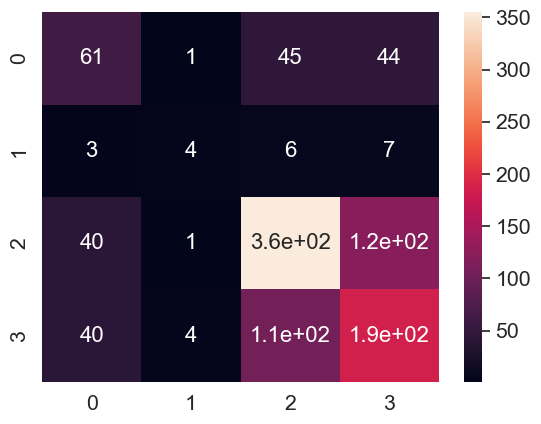

In [16]:
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
cm = confusion_matrix(y_pred, y_valid)
print(cm)
sn.set(font_scale=1.4)#for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16})# font size

In [17]:
files = []
categories = []

for directory_path in glob.glob('/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/*'):

    label=directory_path.split('\\')[-1]
    
    for img_path in glob.glob(os.path.join(directory_path,'*.jpg')):
        files.append(img_path)
        categories.append(label)

df = pd.DataFrame({
 'Filename': files,
 'Category': categories
})

df

Filename  \
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
...                                                 ...   
1274  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1275  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1276  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1277  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1278  /Users/mahmouddaker/Desktop/University/MSA/Sem...   

                                               Category  
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
...                                                 ...  
1274  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1275  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1276  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1277  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1278  /Users/mahmouddaker/Desktop/University/MSA/Sem...  

[1279 rows x 2 columns]

In [18]:
df.head()

Filename  \
0  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
2  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
3  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
4  /Users/mahmouddaker/Desktop/University/MSA/Sem...   

                                            Category  
0  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
2  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
3  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
4  /Users/mahmouddaker/Desktop/University/MSA/Sem...

In [19]:
df['Category'].value_counts()

/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/NonDemented         640
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/VeryMildDemented    448
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/MildDemented        179
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/ModerateDemented     12
Name: Category, dtype: int64

In [20]:
df.shape

(1279, 2)

In [21]:
le = preprocessing.LabelEncoder()
le.fit(df['Category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/MildDemented': 0, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/ModerateDemented': 1, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/NonDemented': 2, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/VeryMildDemented': 3}


In [22]:
y = le.transform(df['Category'])

In [23]:
start = time.time()

x_test = []
y_test = y

for f in tqdm(df.Filename[:]):
    img_path = f
    img = load_img(img_path, target_size=(48, 48))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    features_reduce =  features.squeeze()
    x_test.append(features_reduce)

  0%|                                                  | 0/1279 [00:00<?, ?it/s]

1/1 [==============================] - 0s 132ms/step


  0%|                                          | 1/1279 [00:00<06:14,  3.41it/s]

1/1 [==============================] - 0s 93ms/step


  0%|                                          | 2/1279 [00:00<04:50,  4.40it/s]

1/1 [==============================] - 0s 93ms/step


  0%|                                          | 3/1279 [00:00<04:06,  5.18it/s]

1/1 [==============================] - 0s 122ms/step


  0%|▏                                         | 4/1279 [00:00<03:57,  5.37it/s]

1/1 [==============================] - 0s 98ms/step


  0%|▏                                         | 5/1279 [00:00<03:47,  5.59it/s]

1/1 [==============================] - 0s 66ms/step


  0%|▏                                         | 6/1279 [00:01<03:20,  6.34it/s]

1/1 [==============================] - 0s 82ms/step


  1%|▏                                         | 7/1279 [00:01<03:18,  6.41it/s]

1/1 [==============================] - 0s 97ms/step


  1%|▎                                         | 8/1279 [00:01<03:26,  6.14it/s]

1/1 [==============================] - 0s 83ms/step


  1%|▎                                         | 9/1279 [00:01<03:33,  5.94it/s]

1/1 [==============================] - 0s 74ms/step


  1%|▎                                        | 10/1279 [00:01<03:34,  5.93it/s]

1/1 [==============================] - 0s 81ms/step


  1%|▎                                        | 11/1279 [00:01<03:39,  5.77it/s]

1/1 [==============================] - 0s 123ms/step


  1%|▍                                        | 12/1279 [00:02<03:56,  5.35it/s]

1/1 [==============================] - 0s 72ms/step


  1%|▍                                        | 13/1279 [00:02<03:43,  5.67it/s]

1/1 [==============================] - 0s 58ms/step


  1%|▍                                        | 14/1279 [00:02<03:39,  5.77it/s]

1/1 [==============================] - 0s 69ms/step


  1%|▍                                        | 15/1279 [00:02<03:19,  6.33it/s]

1/1 [==============================] - 0s 65ms/step


  1%|▌                                        | 16/1279 [00:02<03:22,  6.23it/s]

1/1 [==============================] - 0s 74ms/step


  1%|▌                                        | 17/1279 [00:03<04:31,  4.66it/s]

1/1 [==============================] - 0s 87ms/step


  1%|▌                                        | 18/1279 [00:03<04:41,  4.48it/s]

1/1 [==============================] - 0s 66ms/step


  1%|▌                                        | 19/1279 [00:03<04:32,  4.62it/s]

1/1 [==============================] - 0s 101ms/step


  2%|▋                                        | 20/1279 [00:03<04:55,  4.26it/s]

1/1 [==============================] - 0s 99ms/step


  2%|▋                                        | 21/1279 [00:04<04:35,  4.57it/s]

1/1 [==============================] - 0s 78ms/step


  2%|▋                                        | 22/1279 [00:04<04:30,  4.64it/s]

1/1 [==============================] - 0s 90ms/step


  2%|▋                                        | 23/1279 [00:04<04:35,  4.55it/s]

1/1 [==============================] - 0s 58ms/step


  2%|▊                                        | 24/1279 [00:04<04:09,  5.03it/s]

1/1 [==============================] - 0s 79ms/step


  2%|▊                                        | 25/1279 [00:04<04:04,  5.13it/s]

1/1 [==============================] - 0s 64ms/step


  2%|▊                                        | 26/1279 [00:05<04:28,  4.66it/s]

1/1 [==============================] - 0s 80ms/step


  2%|▊                                        | 27/1279 [00:05<04:14,  4.92it/s]

1/1 [==============================] - 0s 64ms/step


  2%|▉                                        | 28/1279 [00:05<04:00,  5.21it/s]

1/1 [==============================] - 0s 85ms/step


  2%|▉                                        | 29/1279 [00:05<04:08,  5.03it/s]

1/1 [==============================] - 0s 53ms/step


  2%|▉                                        | 30/1279 [00:05<03:54,  5.32it/s]

1/1 [==============================] - 0s 114ms/step


  2%|▉                                        | 31/1279 [00:06<04:19,  4.82it/s]

1/1 [==============================] - 0s 84ms/step


  3%|█                                        | 32/1279 [00:06<04:17,  4.85it/s]

1/1 [==============================] - 0s 83ms/step


  3%|█                                        | 33/1279 [00:06<04:42,  4.40it/s]

1/1 [==============================] - 0s 59ms/step


  3%|█                                        | 34/1279 [00:06<04:23,  4.73it/s]

1/1 [==============================] - 0s 73ms/step


  3%|█                                        | 35/1279 [00:06<04:10,  4.98it/s]

1/1 [==============================] - 0s 61ms/step


  3%|█▏                                       | 36/1279 [00:07<03:55,  5.29it/s]

1/1 [==============================] - 0s 85ms/step


  3%|█▏                                       | 37/1279 [00:07<03:50,  5.38it/s]

1/1 [==============================] - 0s 54ms/step


  3%|█▏                                       | 38/1279 [00:07<03:36,  5.72it/s]

1/1 [==============================] - 0s 47ms/step


  3%|█▎                                       | 39/1279 [00:07<03:17,  6.29it/s]

1/1 [==============================] - 0s 68ms/step


  3%|█▎                                       | 40/1279 [00:07<03:11,  6.47it/s]

1/1 [==============================] - 0s 73ms/step


  3%|█▎                                       | 41/1279 [00:07<03:19,  6.21it/s]

1/1 [==============================] - 0s 60ms/step


  3%|█▎                                       | 42/1279 [00:07<03:04,  6.70it/s]

1/1 [==============================] - 0s 70ms/step


  3%|█▍                                       | 43/1279 [00:08<03:11,  6.45it/s]

1/1 [==============================] - 0s 50ms/step


  3%|█▍                                       | 44/1279 [00:08<03:04,  6.70it/s]

1/1 [==============================] - 0s 58ms/step


  4%|█▍                                       | 45/1279 [00:08<03:00,  6.84it/s]

1/1 [==============================] - 0s 71ms/step


  4%|█▍                                       | 46/1279 [00:08<03:07,  6.57it/s]

1/1 [==============================] - 0s 47ms/step


  4%|█▌                                       | 47/1279 [00:08<03:18,  6.21it/s]

1/1 [==============================] - 0s 56ms/step


  4%|█▌                                       | 48/1279 [00:08<03:21,  6.11it/s]

1/1 [==============================] - 0s 53ms/step


  4%|█▌                                       | 49/1279 [00:08<03:04,  6.65it/s]

1/1 [==============================] - 0s 47ms/step


  4%|█▌                                       | 50/1279 [00:09<02:57,  6.94it/s]

1/1 [==============================] - 0s 86ms/step


  4%|█▋                                       | 51/1279 [00:09<03:20,  6.11it/s]

1/1 [==============================] - 0s 112ms/step


  4%|█▋                                       | 52/1279 [00:09<03:47,  5.39it/s]

1/1 [==============================] - 0s 108ms/step


  4%|█▋                                       | 53/1279 [00:09<03:50,  5.32it/s]

1/1 [==============================] - 0s 119ms/step


  4%|█▋                                       | 54/1279 [00:09<03:47,  5.39it/s]

1/1 [==============================] - 0s 96ms/step


  4%|█▊                                       | 55/1279 [00:10<03:35,  5.68it/s]

1/1 [==============================] - 0s 64ms/step


  4%|█▊                                       | 56/1279 [00:10<03:25,  5.95it/s]

1/1 [==============================] - 0s 170ms/step


  4%|█▊                                       | 57/1279 [00:10<03:51,  5.28it/s]

1/1 [==============================] - 0s 62ms/step


  5%|█▊                                       | 58/1279 [00:10<03:43,  5.47it/s]

1/1 [==============================] - 0s 70ms/step


  5%|█▉                                       | 59/1279 [00:10<03:21,  6.06it/s]

1/1 [==============================] - 0s 80ms/step


  5%|█▉                                       | 60/1279 [00:10<03:12,  6.34it/s]

1/1 [==============================] - 0s 81ms/step


  5%|█▉                                       | 61/1279 [00:11<03:22,  6.03it/s]

1/1 [==============================] - 0s 85ms/step


  5%|█▉                                       | 62/1279 [00:11<03:16,  6.18it/s]

1/1 [==============================] - 0s 61ms/step


  5%|██                                       | 63/1279 [00:11<03:10,  6.39it/s]

1/1 [==============================] - 0s 64ms/step


  5%|██                                       | 64/1279 [00:11<02:58,  6.82it/s]

1/1 [==============================] - 0s 67ms/step


  5%|██                                       | 65/1279 [00:11<03:03,  6.63it/s]

1/1 [==============================] - 0s 100ms/step


  5%|██                                       | 66/1279 [00:11<03:28,  5.82it/s]

1/1 [==============================] - 0s 67ms/step


  5%|██▏                                      | 67/1279 [00:12<03:16,  6.16it/s]

1/1 [==============================] - 0s 54ms/step


  5%|██▏                                      | 68/1279 [00:12<03:08,  6.43it/s]

1/1 [==============================] - 0s 62ms/step


  5%|██▏                                      | 69/1279 [00:12<03:01,  6.66it/s]

1/1 [==============================] - 0s 55ms/step


  5%|██▏                                      | 70/1279 [00:12<03:03,  6.61it/s]

1/1 [==============================] - 0s 52ms/step


  6%|██▎                                      | 71/1279 [00:12<02:53,  6.97it/s]

1/1 [==============================] - 0s 54ms/step


  6%|██▎                                      | 72/1279 [00:12<02:54,  6.92it/s]

1/1 [==============================] - 0s 70ms/step


  6%|██▎                                      | 73/1279 [00:12<02:54,  6.91it/s]

1/1 [==============================] - 0s 75ms/step


  6%|██▎                                      | 74/1279 [00:13<02:52,  7.00it/s]

1/1 [==============================] - 0s 64ms/step


  6%|██▍                                      | 75/1279 [00:13<02:48,  7.17it/s]

1/1 [==============================] - 0s 54ms/step


  6%|██▍                                      | 76/1279 [00:13<02:40,  7.51it/s]

1/1 [==============================] - 0s 54ms/step


  6%|██▍                                      | 77/1279 [00:13<02:44,  7.30it/s]

1/1 [==============================] - 0s 47ms/step


  6%|██▌                                      | 78/1279 [00:13<02:48,  7.14it/s]

1/1 [==============================] - 0s 51ms/step


  6%|██▌                                      | 79/1279 [00:13<02:43,  7.32it/s]

1/1 [==============================] - 0s 55ms/step


  6%|██▌                                      | 80/1279 [00:13<02:51,  6.99it/s]

1/1 [==============================] - 0s 66ms/step


  6%|██▌                                      | 81/1279 [00:13<02:49,  7.07it/s]

1/1 [==============================] - 0s 48ms/step


  6%|██▋                                      | 82/1279 [00:14<03:04,  6.49it/s]

1/1 [==============================] - 0s 66ms/step


  6%|██▋                                      | 83/1279 [00:14<02:55,  6.81it/s]

1/1 [==============================] - 0s 75ms/step


  7%|██▋                                      | 84/1279 [00:14<02:50,  7.02it/s]

1/1 [==============================] - 0s 45ms/step


  7%|██▋                                      | 85/1279 [00:14<03:02,  6.56it/s]

1/1 [==============================] - 0s 56ms/step


  7%|██▊                                      | 86/1279 [00:14<02:57,  6.73it/s]

1/1 [==============================] - 0s 68ms/step


  7%|██▊                                      | 87/1279 [00:14<02:51,  6.97it/s]

1/1 [==============================] - 0s 50ms/step


  7%|██▊                                      | 88/1279 [00:15<03:03,  6.49it/s]

1/1 [==============================] - 0s 64ms/step


  7%|██▊                                      | 89/1279 [00:15<03:37,  5.46it/s]

1/1 [==============================] - 0s 66ms/step


  7%|██▉                                      | 90/1279 [00:15<03:22,  5.86it/s]

1/1 [==============================] - 0s 80ms/step


  7%|██▉                                      | 91/1279 [00:15<03:45,  5.28it/s]

1/1 [==============================] - 0s 84ms/step


  7%|██▉                                      | 92/1279 [00:15<03:30,  5.65it/s]

1/1 [==============================] - 0s 78ms/step


  7%|██▉                                      | 93/1279 [00:16<03:27,  5.71it/s]

1/1 [==============================] - 0s 66ms/step


  7%|███                                      | 94/1279 [00:16<03:09,  6.25it/s]

1/1 [==============================] - 0s 76ms/step


  7%|███                                      | 95/1279 [00:16<03:39,  5.40it/s]

1/1 [==============================] - 0s 52ms/step


  8%|███                                      | 96/1279 [00:16<03:26,  5.73it/s]

1/1 [==============================] - 0s 60ms/step


  8%|███                                      | 97/1279 [00:16<03:07,  6.29it/s]

1/1 [==============================] - 0s 50ms/step


  8%|███▏                                     | 98/1279 [00:16<03:09,  6.24it/s]

1/1 [==============================] - 0s 61ms/step


  8%|███▏                                     | 99/1279 [00:16<03:00,  6.54it/s]

1/1 [==============================] - 0s 66ms/step


  8%|███▏                                    | 100/1279 [00:17<02:51,  6.87it/s]

1/1 [==============================] - 0s 67ms/step


  8%|███▏                                    | 101/1279 [00:17<02:57,  6.65it/s]

1/1 [==============================] - 0s 71ms/step


  8%|███▏                                    | 102/1279 [00:17<02:57,  6.62it/s]

1/1 [==============================] - 0s 72ms/step


  8%|███▏                                    | 103/1279 [00:17<02:51,  6.84it/s]

1/1 [==============================] - 0s 68ms/step


  8%|███▎                                    | 104/1279 [00:17<02:43,  7.18it/s]

1/1 [==============================] - 0s 40ms/step


  8%|███▎                                    | 105/1279 [00:17<02:52,  6.80it/s]

1/1 [==============================] - 0s 74ms/step


  8%|███▎                                    | 106/1279 [00:17<02:46,  7.05it/s]

1/1 [==============================] - 0s 72ms/step


  8%|███▎                                    | 107/1279 [00:18<02:50,  6.87it/s]

1/1 [==============================] - 0s 69ms/step


  8%|███▍                                    | 108/1279 [00:18<02:46,  7.05it/s]

1/1 [==============================] - 0s 64ms/step


  9%|███▍                                    | 109/1279 [00:18<02:39,  7.34it/s]

1/1 [==============================] - 0s 61ms/step


  9%|███▍                                    | 110/1279 [00:18<02:43,  7.13it/s]

1/1 [==============================] - 0s 61ms/step


  9%|███▍                                    | 111/1279 [00:18<02:43,  7.14it/s]

1/1 [==============================] - 0s 57ms/step


  9%|███▌                                    | 112/1279 [00:18<03:17,  5.91it/s]

1/1 [==============================] - 0s 53ms/step


  9%|███▌                                    | 113/1279 [00:19<03:16,  5.92it/s]

1/1 [==============================] - 0s 46ms/step


  9%|███▌                                    | 114/1279 [00:19<03:02,  6.39it/s]

1/1 [==============================] - 0s 71ms/step


  9%|███▌                                    | 115/1279 [00:19<03:43,  5.21it/s]

1/1 [==============================] - 0s 98ms/step


  9%|███▋                                    | 116/1279 [00:19<04:01,  4.82it/s]

1/1 [==============================] - 0s 39ms/step


  9%|███▋                                    | 117/1279 [00:20<10:02,  1.93it/s]

1/1 [==============================] - 0s 78ms/step


  9%|███▋                                    | 118/1279 [00:21<07:58,  2.43it/s]

1/1 [==============================] - 0s 69ms/step


  9%|███▋                                    | 119/1279 [00:21<06:41,  2.89it/s]

1/1 [==============================] - 0s 66ms/step


  9%|███▊                                    | 120/1279 [00:21<06:05,  3.17it/s]

1/1 [==============================] - 0s 70ms/step


  9%|███▊                                    | 121/1279 [00:21<05:09,  3.74it/s]

1/1 [==============================] - 0s 102ms/step


 10%|███▊                                    | 122/1279 [00:21<04:38,  4.16it/s]

1/1 [==============================] - 0s 93ms/step


 10%|███▊                                    | 123/1279 [00:22<04:19,  4.45it/s]

1/1 [==============================] - 0s 91ms/step


 10%|███▉                                    | 124/1279 [00:22<04:10,  4.60it/s]

1/1 [==============================] - 0s 59ms/step


 10%|███▉                                    | 125/1279 [00:22<03:44,  5.14it/s]

1/1 [==============================] - 0s 67ms/step


 10%|███▉                                    | 126/1279 [00:22<03:39,  5.25it/s]

1/1 [==============================] - 0s 60ms/step


 10%|███▉                                    | 127/1279 [00:22<03:25,  5.60it/s]

1/1 [==============================] - 0s 61ms/step


 10%|████                                    | 128/1279 [00:22<03:23,  5.65it/s]

1/1 [==============================] - 0s 43ms/step


 10%|████                                    | 129/1279 [00:23<03:00,  6.36it/s]

1/1 [==============================] - 0s 51ms/step


 10%|████                                    | 130/1279 [00:23<03:06,  6.16it/s]

1/1 [==============================] - 0s 43ms/step


 10%|████                                    | 131/1279 [00:23<03:01,  6.33it/s]

1/1 [==============================] - 0s 78ms/step


 10%|████▏                                   | 132/1279 [00:23<03:16,  5.84it/s]

1/1 [==============================] - 0s 69ms/step


 10%|████▏                                   | 133/1279 [00:23<03:32,  5.40it/s]

1/1 [==============================] - 0s 68ms/step


 10%|████▏                                   | 134/1279 [00:23<03:16,  5.82it/s]

1/1 [==============================] - 0s 71ms/step


 11%|████▏                                   | 135/1279 [00:24<03:17,  5.78it/s]

1/1 [==============================] - 0s 88ms/step


 11%|████▎                                   | 136/1279 [00:24<03:25,  5.57it/s]

1/1 [==============================] - 0s 378ms/step


 11%|████▎                                   | 137/1279 [00:25<11:12,  1.70it/s]

1/1 [==============================] - 0s 267ms/step


 11%|████▎                                   | 138/1279 [00:26<14:10,  1.34it/s]

1/1 [==============================] - 0s 90ms/step


 11%|████▎                                   | 139/1279 [00:27<11:22,  1.67it/s]

1/1 [==============================] - 0s 67ms/step


 11%|████▍                                   | 140/1279 [00:27<09:06,  2.08it/s]

1/1 [==============================] - 0s 102ms/step


 11%|████▍                                   | 141/1279 [00:27<07:30,  2.53it/s]

1/1 [==============================] - 0s 68ms/step


 11%|████▍                                   | 142/1279 [00:27<06:08,  3.08it/s]

1/1 [==============================] - 0s 63ms/step


 11%|████▍                                   | 143/1279 [00:27<05:10,  3.65it/s]

1/1 [==============================] - 0s 60ms/step


 11%|████▌                                   | 144/1279 [00:28<04:31,  4.18it/s]

1/1 [==============================] - 0s 85ms/step


 11%|████▌                                   | 145/1279 [00:28<04:07,  4.59it/s]

1/1 [==============================] - 0s 79ms/step


 11%|████▌                                   | 146/1279 [00:28<03:52,  4.87it/s]

1/1 [==============================] - 0s 70ms/step


 11%|████▌                                   | 147/1279 [00:28<03:35,  5.26it/s]

1/1 [==============================] - 0s 82ms/step


 12%|████▋                                   | 148/1279 [00:28<03:33,  5.29it/s]

1/1 [==============================] - 0s 76ms/step


 12%|████▋                                   | 149/1279 [00:28<03:28,  5.41it/s]

1/1 [==============================] - 0s 120ms/step


 12%|████▋                                   | 150/1279 [00:29<03:47,  4.96it/s]

1/1 [==============================] - 0s 52ms/step


 12%|████▋                                   | 151/1279 [00:29<03:27,  5.44it/s]

1/1 [==============================] - 0s 63ms/step


 12%|████▊                                   | 152/1279 [00:29<03:15,  5.77it/s]

1/1 [==============================] - 0s 77ms/step


 12%|████▊                                   | 153/1279 [00:29<03:14,  5.80it/s]

1/1 [==============================] - 0s 101ms/step


 12%|████▊                                   | 154/1279 [00:29<03:30,  5.34it/s]

1/1 [==============================] - 0s 135ms/step


 12%|████▊                                   | 155/1279 [00:30<04:03,  4.61it/s]

1/1 [==============================] - 0s 82ms/step


 12%|████▉                                   | 156/1279 [00:30<03:44,  5.00it/s]

1/1 [==============================] - 1s 817ms/step


 12%|████▉                                   | 157/1279 [00:31<07:36,  2.46it/s]

1/1 [==============================] - 1s 581ms/step


 12%|████▉                                   | 158/1279 [00:32<11:55,  1.57it/s]

1/1 [==============================] - 0s 191ms/step


 12%|████▉                                   | 159/1279 [00:33<12:22,  1.51it/s]

1/1 [==============================] - 0s 108ms/step


 13%|█████                                   | 160/1279 [00:33<10:14,  1.82it/s]

1/1 [==============================] - 0s 385ms/step


 13%|█████                                   | 161/1279 [00:34<11:36,  1.61it/s]

1/1 [==============================] - 0s 290ms/step


 13%|█████                                   | 162/1279 [00:34<11:44,  1.59it/s]

1/1 [==============================] - 0s 114ms/step


 13%|█████                                   | 163/1279 [00:35<10:58,  1.69it/s]

1/1 [==============================] - 0s 66ms/step


 13%|█████▏                                  | 164/1279 [00:35<09:06,  2.04it/s]

1/1 [==============================] - 0s 104ms/step


 13%|█████▏                                  | 165/1279 [00:35<07:37,  2.43it/s]

1/1 [==============================] - 0s 129ms/step


 13%|█████▏                                  | 166/1279 [00:36<06:55,  2.68it/s]

1/1 [==============================] - 0s 46ms/step


 13%|█████▏                                  | 167/1279 [00:36<06:02,  3.07it/s]

1/1 [==============================] - 0s 64ms/step


 13%|█████▎                                  | 168/1279 [00:36<05:38,  3.28it/s]

1/1 [==============================] - 0s 46ms/step


 13%|█████▎                                  | 169/1279 [00:36<04:44,  3.90it/s]

1/1 [==============================] - 0s 49ms/step


 13%|█████▎                                  | 170/1279 [00:36<04:52,  3.79it/s]

1/1 [==============================] - 0s 69ms/step


 13%|█████▎                                  | 171/1279 [00:37<04:38,  3.98it/s]

1/1 [==============================] - 0s 113ms/step


 13%|█████▍                                  | 172/1279 [00:37<04:33,  4.05it/s]

1/1 [==============================] - 0s 73ms/step


 14%|█████▍                                  | 173/1279 [00:37<04:16,  4.32it/s]

1/1 [==============================] - 0s 110ms/step


 14%|█████▍                                  | 174/1279 [00:37<04:41,  3.93it/s]

1/1 [==============================] - 0s 54ms/step


 14%|█████▍                                  | 175/1279 [00:38<04:14,  4.33it/s]

1/1 [==============================] - 0s 56ms/step


 14%|█████▌                                  | 176/1279 [00:38<03:55,  4.69it/s]

1/1 [==============================] - 0s 58ms/step


 14%|█████▌                                  | 177/1279 [00:38<03:43,  4.94it/s]

1/1 [==============================] - 0s 56ms/step


 14%|█████▌                                  | 178/1279 [00:38<03:38,  5.03it/s]

1/1 [==============================] - 0s 52ms/step


 14%|█████▌                                  | 179/1279 [00:38<03:23,  5.39it/s]

1/1 [==============================] - 0s 75ms/step


 14%|█████▋                                  | 180/1279 [00:38<03:23,  5.40it/s]

1/1 [==============================] - 0s 64ms/step


 14%|█████▋                                  | 181/1279 [00:39<04:35,  3.99it/s]

1/1 [==============================] - 0s 67ms/step


 14%|█████▋                                  | 182/1279 [00:39<04:22,  4.19it/s]

1/1 [==============================] - 0s 68ms/step


 14%|█████▋                                  | 183/1279 [00:39<04:22,  4.17it/s]

1/1 [==============================] - 0s 56ms/step


 14%|█████▊                                  | 184/1279 [00:40<04:02,  4.52it/s]

1/1 [==============================] - 0s 60ms/step


 14%|█████▊                                  | 185/1279 [00:40<03:38,  5.01it/s]

1/1 [==============================] - 0s 63ms/step


 15%|█████▊                                  | 186/1279 [00:40<03:28,  5.25it/s]

1/1 [==============================] - 0s 80ms/step


 15%|█████▊                                  | 187/1279 [00:40<03:13,  5.65it/s]

1/1 [==============================] - 0s 100ms/step


 15%|█████▉                                  | 188/1279 [00:40<03:09,  5.77it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█████▉                                  | 189/1279 [00:40<03:05,  5.86it/s]

1/1 [==============================] - 0s 69ms/step


 15%|█████▉                                  | 190/1279 [00:40<03:01,  6.00it/s]

1/1 [==============================] - 0s 75ms/step


 15%|█████▉                                  | 191/1279 [00:41<02:55,  6.21it/s]

1/1 [==============================] - 0s 69ms/step


 15%|██████                                  | 192/1279 [00:41<02:51,  6.35it/s]

1/1 [==============================] - 0s 65ms/step


 15%|██████                                  | 193/1279 [00:41<02:48,  6.46it/s]

1/1 [==============================] - 0s 202ms/step


 15%|██████                                  | 194/1279 [00:41<03:31,  5.14it/s]

1/1 [==============================] - 0s 106ms/step


 15%|██████                                  | 195/1279 [00:41<03:55,  4.61it/s]

1/1 [==============================] - 0s 67ms/step


 15%|██████▏                                 | 196/1279 [00:42<04:23,  4.11it/s]

1/1 [==============================] - 0s 89ms/step


 15%|██████▏                                 | 197/1279 [00:42<04:30,  4.00it/s]

1/1 [==============================] - 0s 71ms/step


 15%|██████▏                                 | 198/1279 [00:42<03:53,  4.64it/s]

1/1 [==============================] - 0s 79ms/step


 16%|██████▏                                 | 199/1279 [00:42<03:34,  5.04it/s]

1/1 [==============================] - 0s 120ms/step


 16%|██████▎                                 | 200/1279 [00:43<03:49,  4.70it/s]

1/1 [==============================] - 0s 73ms/step


 16%|██████▎                                 | 201/1279 [00:43<03:26,  5.23it/s]

1/1 [==============================] - 0s 62ms/step


 16%|██████▎                                 | 202/1279 [00:43<03:13,  5.56it/s]

1/1 [==============================] - 0s 64ms/step


 16%|██████▎                                 | 203/1279 [00:43<03:11,  5.60it/s]

1/1 [==============================] - 0s 94ms/step


 16%|██████▍                                 | 204/1279 [00:43<03:19,  5.38it/s]

1/1 [==============================] - 0s 79ms/step


 16%|██████▍                                 | 205/1279 [00:43<03:07,  5.71it/s]

1/1 [==============================] - 0s 70ms/step


 16%|██████▍                                 | 206/1279 [00:44<03:39,  4.88it/s]

1/1 [==============================] - 0s 74ms/step


 16%|██████▍                                 | 207/1279 [00:44<03:21,  5.33it/s]

1/1 [==============================] - 0s 57ms/step


 16%|██████▌                                 | 208/1279 [00:44<03:21,  5.32it/s]

1/1 [==============================] - 0s 77ms/step


 16%|██████▌                                 | 209/1279 [00:44<03:13,  5.53it/s]

1/1 [==============================] - 0s 101ms/step


 16%|██████▌                                 | 210/1279 [00:44<03:14,  5.51it/s]

1/1 [==============================] - 0s 87ms/step


 16%|██████▌                                 | 211/1279 [00:45<03:12,  5.56it/s]

1/1 [==============================] - 0s 68ms/step


 17%|██████▋                                 | 212/1279 [00:45<03:10,  5.60it/s]

1/1 [==============================] - 0s 67ms/step


 17%|██████▋                                 | 213/1279 [00:45<03:03,  5.80it/s]

1/1 [==============================] - 0s 88ms/step


 17%|██████▋                                 | 214/1279 [00:45<03:04,  5.78it/s]

1/1 [==============================] - 0s 84ms/step


 17%|██████▋                                 | 215/1279 [00:45<02:54,  6.09it/s]

1/1 [==============================] - 0s 59ms/step


 17%|██████▊                                 | 216/1279 [00:45<02:53,  6.14it/s]

1/1 [==============================] - 0s 82ms/step


 17%|██████▊                                 | 217/1279 [00:46<02:58,  5.96it/s]

1/1 [==============================] - 0s 52ms/step


 17%|██████▊                                 | 218/1279 [00:46<03:04,  5.74it/s]

1/1 [==============================] - 0s 87ms/step


 17%|██████▊                                 | 219/1279 [00:46<03:01,  5.84it/s]

1/1 [==============================] - 0s 61ms/step


 17%|██████▉                                 | 220/1279 [00:46<03:13,  5.48it/s]

1/1 [==============================] - 0s 53ms/step


 17%|██████▉                                 | 221/1279 [00:46<03:03,  5.76it/s]

1/1 [==============================] - 0s 62ms/step


 17%|██████▉                                 | 222/1279 [00:46<03:04,  5.73it/s]

1/1 [==============================] - 0s 92ms/step


 17%|██████▉                                 | 223/1279 [00:47<03:02,  5.77it/s]

1/1 [==============================] - 0s 73ms/step


 18%|███████                                 | 224/1279 [00:47<02:54,  6.04it/s]

1/1 [==============================] - 0s 69ms/step


 18%|███████                                 | 225/1279 [00:47<03:01,  5.79it/s]

1/1 [==============================] - 0s 56ms/step


 18%|███████                                 | 226/1279 [00:47<03:00,  5.84it/s]

1/1 [==============================] - 0s 70ms/step


 18%|███████                                 | 227/1279 [00:47<02:53,  6.05it/s]

1/1 [==============================] - 0s 62ms/step


 18%|███████▏                                | 228/1279 [00:47<02:58,  5.87it/s]

1/1 [==============================] - 0s 113ms/step


 18%|███████▏                                | 229/1279 [00:48<03:31,  4.97it/s]

1/1 [==============================] - 0s 105ms/step


 18%|███████▏                                | 230/1279 [00:48<03:25,  5.10it/s]

1/1 [==============================] - 0s 93ms/step


 18%|███████▏                                | 231/1279 [00:48<03:35,  4.87it/s]

1/1 [==============================] - 0s 94ms/step


 18%|███████▎                                | 232/1279 [00:48<03:53,  4.48it/s]

1/1 [==============================] - 0s 75ms/step


 18%|███████▎                                | 233/1279 [00:49<03:44,  4.65it/s]

1/1 [==============================] - 0s 75ms/step


 18%|███████▎                                | 234/1279 [00:49<03:33,  4.90it/s]

1/1 [==============================] - 0s 126ms/step


 18%|███████▎                                | 235/1279 [00:49<03:39,  4.77it/s]

1/1 [==============================] - 0s 77ms/step


 18%|███████▍                                | 236/1279 [00:49<03:19,  5.23it/s]

1/1 [==============================] - 0s 103ms/step


 19%|███████▍                                | 237/1279 [00:49<03:23,  5.12it/s]

1/1 [==============================] - 0s 115ms/step


 19%|███████▍                                | 238/1279 [00:50<03:36,  4.81it/s]

1/1 [==============================] - 0s 60ms/step


 19%|███████▍                                | 239/1279 [00:50<03:23,  5.11it/s]

1/1 [==============================] - 0s 115ms/step


 19%|███████▌                                | 240/1279 [00:50<03:28,  4.98it/s]

1/1 [==============================] - 0s 60ms/step


 19%|███████▌                                | 241/1279 [00:50<03:24,  5.08it/s]

1/1 [==============================] - 0s 86ms/step


 19%|███████▌                                | 242/1279 [00:50<03:26,  5.02it/s]

1/1 [==============================] - 0s 68ms/step


 19%|███████▌                                | 243/1279 [00:51<03:22,  5.11it/s]

1/1 [==============================] - 0s 78ms/step


 19%|███████▋                                | 244/1279 [00:51<03:10,  5.45it/s]

1/1 [==============================] - 0s 67ms/step


 19%|███████▋                                | 245/1279 [00:51<03:03,  5.64it/s]

1/1 [==============================] - 0s 63ms/step


 19%|███████▋                                | 246/1279 [00:51<03:00,  5.73it/s]

1/1 [==============================] - 0s 81ms/step


 19%|███████▋                                | 247/1279 [00:51<02:59,  5.75it/s]

1/1 [==============================] - 0s 71ms/step


 19%|███████▊                                | 248/1279 [00:51<02:51,  6.01it/s]

1/1 [==============================] - 0s 72ms/step


 19%|███████▊                                | 249/1279 [00:52<02:57,  5.82it/s]

1/1 [==============================] - 0s 65ms/step


 20%|███████▊                                | 250/1279 [00:52<03:00,  5.70it/s]

1/1 [==============================] - 0s 78ms/step


 20%|███████▊                                | 251/1279 [00:52<02:59,  5.72it/s]

1/1 [==============================] - 0s 75ms/step


 20%|███████▉                                | 252/1279 [00:52<02:48,  6.09it/s]

1/1 [==============================] - 0s 64ms/step


 20%|███████▉                                | 253/1279 [00:52<02:42,  6.32it/s]

1/1 [==============================] - 0s 91ms/step


 20%|███████▉                                | 254/1279 [00:52<02:51,  5.97it/s]

1/1 [==============================] - 0s 63ms/step


 20%|███████▉                                | 255/1279 [00:53<02:52,  5.92it/s]

1/1 [==============================] - 0s 68ms/step


 20%|████████                                | 256/1279 [00:53<02:47,  6.12it/s]

1/1 [==============================] - 0s 87ms/step


 20%|████████                                | 257/1279 [00:53<02:45,  6.16it/s]

1/1 [==============================] - 0s 89ms/step


 20%|████████                                | 258/1279 [00:53<02:44,  6.22it/s]

1/1 [==============================] - 0s 85ms/step


 20%|████████                                | 259/1279 [00:53<02:50,  5.98it/s]

1/1 [==============================] - 0s 82ms/step


 20%|████████▏                               | 260/1279 [00:53<02:48,  6.04it/s]

1/1 [==============================] - 0s 79ms/step


 20%|████████▏                               | 261/1279 [00:54<02:54,  5.84it/s]

1/1 [==============================] - 0s 155ms/step


 20%|████████▏                               | 262/1279 [00:54<03:11,  5.31it/s]

1/1 [==============================] - 0s 99ms/step


 21%|████████▏                               | 263/1279 [00:54<03:18,  5.12it/s]

1/1 [==============================] - 0s 68ms/step


 21%|████████▎                               | 264/1279 [00:54<03:06,  5.44it/s]

1/1 [==============================] - 0s 71ms/step


 21%|████████▎                               | 265/1279 [00:54<02:52,  5.89it/s]

1/1 [==============================] - 0s 105ms/step


 21%|████████▎                               | 266/1279 [00:54<03:00,  5.62it/s]

1/1 [==============================] - 0s 62ms/step


 21%|████████▎                               | 267/1279 [00:55<02:54,  5.80it/s]

1/1 [==============================] - 0s 88ms/step


 21%|████████▍                               | 268/1279 [00:55<02:48,  6.00it/s]

1/1 [==============================] - 0s 95ms/step


 21%|████████▍                               | 269/1279 [00:55<02:47,  6.02it/s]

1/1 [==============================] - 0s 85ms/step


 21%|████████▍                               | 270/1279 [00:55<02:51,  5.87it/s]

1/1 [==============================] - 0s 91ms/step


 21%|████████▍                               | 271/1279 [00:55<02:48,  5.98it/s]

1/1 [==============================] - 0s 67ms/step


 21%|████████▌                               | 272/1279 [00:55<02:41,  6.24it/s]

1/1 [==============================] - 0s 94ms/step


 21%|████████▌                               | 273/1279 [00:56<02:50,  5.88it/s]

1/1 [==============================] - 0s 104ms/step


 21%|████████▌                               | 274/1279 [00:56<02:50,  5.88it/s]

1/1 [==============================] - 0s 88ms/step


 22%|████████▌                               | 275/1279 [00:56<02:51,  5.87it/s]

1/1 [==============================] - 0s 103ms/step


 22%|████████▋                               | 276/1279 [00:56<02:51,  5.86it/s]

1/1 [==============================] - 0s 90ms/step


 22%|████████▋                               | 277/1279 [00:56<02:52,  5.80it/s]

1/1 [==============================] - 0s 88ms/step


 22%|████████▋                               | 278/1279 [00:56<02:46,  6.00it/s]

1/1 [==============================] - 0s 77ms/step


 22%|████████▋                               | 279/1279 [00:57<02:49,  5.91it/s]

1/1 [==============================] - 0s 59ms/step


 22%|████████▊                               | 280/1279 [00:57<02:32,  6.54it/s]

1/1 [==============================] - 0s 74ms/step


 22%|████████▊                               | 281/1279 [00:57<02:32,  6.53it/s]

1/1 [==============================] - 0s 61ms/step


 22%|████████▊                               | 282/1279 [00:57<02:30,  6.61it/s]

1/1 [==============================] - 0s 66ms/step


 22%|████████▊                               | 283/1279 [00:57<02:28,  6.70it/s]

1/1 [==============================] - 0s 84ms/step


 22%|████████▉                               | 284/1279 [00:57<02:36,  6.34it/s]

1/1 [==============================] - 0s 55ms/step


 22%|████████▉                               | 285/1279 [00:57<02:24,  6.87it/s]

1/1 [==============================] - 0s 67ms/step


 22%|████████▉                               | 286/1279 [00:58<02:23,  6.94it/s]

1/1 [==============================] - 0s 64ms/step


 22%|████████▉                               | 287/1279 [00:58<02:24,  6.85it/s]

1/1 [==============================] - 0s 62ms/step


 23%|█████████                               | 288/1279 [00:58<02:29,  6.63it/s]

1/1 [==============================] - 0s 59ms/step


 23%|█████████                               | 289/1279 [00:58<02:21,  6.98it/s]

1/1 [==============================] - 0s 59ms/step


 23%|█████████                               | 290/1279 [00:58<02:33,  6.46it/s]

1/1 [==============================] - 0s 58ms/step


 23%|█████████                               | 291/1279 [00:58<02:26,  6.75it/s]

1/1 [==============================] - 0s 94ms/step


 23%|█████████▏                              | 292/1279 [00:59<02:37,  6.27it/s]

1/1 [==============================] - 0s 90ms/step


 23%|█████████▏                              | 293/1279 [00:59<03:00,  5.47it/s]

1/1 [==============================] - 0s 60ms/step


 23%|█████████▏                              | 294/1279 [00:59<02:53,  5.69it/s]

1/1 [==============================] - 0s 129ms/step


 23%|█████████▏                              | 295/1279 [00:59<03:01,  5.42it/s]

1/1 [==============================] - 0s 82ms/step


 23%|█████████▎                              | 296/1279 [00:59<02:57,  5.52it/s]

1/1 [==============================] - 0s 95ms/step


 23%|█████████▎                              | 297/1279 [01:00<03:10,  5.16it/s]

1/1 [==============================] - 0s 80ms/step


 23%|█████████▎                              | 298/1279 [01:00<02:56,  5.56it/s]

1/1 [==============================] - 0s 79ms/step


 23%|█████████▎                              | 299/1279 [01:00<03:02,  5.37it/s]

1/1 [==============================] - 0s 73ms/step


 23%|█████████▍                              | 300/1279 [01:00<02:52,  5.66it/s]

1/1 [==============================] - 0s 70ms/step


 24%|█████████▍                              | 301/1279 [01:00<02:59,  5.45it/s]

1/1 [==============================] - 0s 55ms/step


 24%|█████████▍                              | 302/1279 [01:01<03:23,  4.81it/s]

1/1 [==============================] - 0s 57ms/step


 24%|█████████▍                              | 303/1279 [01:01<02:59,  5.43it/s]

1/1 [==============================] - 0s 62ms/step


 24%|█████████▌                              | 304/1279 [01:01<02:54,  5.60it/s]

1/1 [==============================] - 0s 47ms/step


 24%|█████████▌                              | 305/1279 [01:01<02:56,  5.53it/s]

1/1 [==============================] - 0s 71ms/step


 24%|█████████▌                              | 306/1279 [01:01<02:52,  5.65it/s]

1/1 [==============================] - 0s 80ms/step


 24%|█████████▌                              | 307/1279 [01:01<02:47,  5.82it/s]

1/1 [==============================] - 0s 97ms/step


 24%|█████████▋                              | 308/1279 [01:01<02:43,  5.92it/s]

1/1 [==============================] - 0s 57ms/step


 24%|█████████▋                              | 309/1279 [01:02<02:39,  6.08it/s]

1/1 [==============================] - 0s 84ms/step


 24%|█████████▋                              | 310/1279 [01:02<02:36,  6.18it/s]

1/1 [==============================] - 0s 63ms/step


 24%|█████████▋                              | 311/1279 [01:02<02:31,  6.39it/s]

1/1 [==============================] - 0s 68ms/step


 24%|█████████▊                              | 312/1279 [01:02<02:35,  6.23it/s]

1/1 [==============================] - 0s 54ms/step


 24%|█████████▊                              | 313/1279 [01:02<02:35,  6.23it/s]

1/1 [==============================] - 0s 56ms/step


 25%|█████████▊                              | 314/1279 [01:02<02:52,  5.60it/s]

1/1 [==============================] - 0s 66ms/step


 25%|█████████▊                              | 315/1279 [01:03<02:46,  5.78it/s]

1/1 [==============================] - 0s 53ms/step


 25%|█████████▉                              | 316/1279 [01:03<02:40,  5.99it/s]

1/1 [==============================] - 0s 65ms/step


 25%|█████████▉                              | 317/1279 [01:03<02:37,  6.12it/s]

1/1 [==============================] - 0s 92ms/step


 25%|█████████▉                              | 318/1279 [01:03<02:40,  5.98it/s]

1/1 [==============================] - 0s 91ms/step


 25%|█████████▉                              | 319/1279 [01:03<02:43,  5.87it/s]

1/1 [==============================] - 0s 105ms/step


 25%|██████████                              | 320/1279 [01:04<02:50,  5.63it/s]

1/1 [==============================] - 0s 56ms/step


 25%|██████████                              | 321/1279 [01:04<02:35,  6.17it/s]

1/1 [==============================] - 0s 85ms/step


 25%|██████████                              | 322/1279 [01:04<02:41,  5.93it/s]

1/1 [==============================] - 0s 57ms/step


 25%|██████████                              | 323/1279 [01:04<02:34,  6.19it/s]

1/1 [==============================] - 0s 67ms/step


 25%|██████████▏                             | 324/1279 [01:04<02:36,  6.10it/s]

1/1 [==============================] - 0s 72ms/step


 25%|██████████▏                             | 325/1279 [01:04<02:44,  5.81it/s]

1/1 [==============================] - 0s 80ms/step


 25%|██████████▏                             | 326/1279 [01:04<02:43,  5.82it/s]

1/1 [==============================] - 0s 139ms/step


 26%|██████████▏                             | 327/1279 [01:05<03:20,  4.74it/s]

1/1 [==============================] - 0s 82ms/step


 26%|██████████▎                             | 328/1279 [01:05<02:58,  5.32it/s]

1/1 [==============================] - 0s 72ms/step


 26%|██████████▎                             | 329/1279 [01:05<02:49,  5.59it/s]

1/1 [==============================] - 0s 63ms/step


 26%|██████████▎                             | 330/1279 [01:05<02:36,  6.05it/s]

1/1 [==============================] - 0s 189ms/step


 26%|██████████▎                             | 331/1279 [01:05<03:04,  5.13it/s]

1/1 [==============================] - 0s 101ms/step


 26%|██████████▍                             | 332/1279 [01:06<03:07,  5.06it/s]

1/1 [==============================] - 0s 113ms/step


 26%|██████████▍                             | 333/1279 [01:06<03:09,  4.99it/s]

1/1 [==============================] - 0s 123ms/step


 26%|██████████▍                             | 334/1279 [01:06<03:30,  4.48it/s]

1/1 [==============================] - 0s 56ms/step


 26%|██████████▍                             | 335/1279 [01:06<03:19,  4.72it/s]

1/1 [==============================] - 0s 91ms/step


 26%|██████████▌                             | 336/1279 [01:07<03:20,  4.71it/s]

1/1 [==============================] - 0s 61ms/step


 26%|██████████▌                             | 337/1279 [01:07<03:09,  4.96it/s]

1/1 [==============================] - 0s 67ms/step


 26%|██████████▌                             | 338/1279 [01:07<02:54,  5.39it/s]

1/1 [==============================] - 0s 67ms/step


 27%|██████████▌                             | 339/1279 [01:07<02:43,  5.74it/s]

1/1 [==============================] - 0s 63ms/step


 27%|██████████▋                             | 340/1279 [01:07<02:37,  5.98it/s]

1/1 [==============================] - 0s 99ms/step


 27%|██████████▋                             | 341/1279 [01:07<02:45,  5.65it/s]

1/1 [==============================] - 0s 99ms/step


 27%|██████████▋                             | 342/1279 [01:08<02:58,  5.24it/s]

1/1 [==============================] - 0s 60ms/step


 27%|██████████▋                             | 343/1279 [01:08<03:06,  5.02it/s]

1/1 [==============================] - 0s 69ms/step


 27%|██████████▊                             | 344/1279 [01:08<03:15,  4.78it/s]

1/1 [==============================] - 0s 63ms/step


 27%|██████████▊                             | 345/1279 [01:08<02:49,  5.52it/s]

1/1 [==============================] - 0s 98ms/step


 27%|██████████▊                             | 346/1279 [01:08<02:56,  5.28it/s]

1/1 [==============================] - 0s 86ms/step


 27%|██████████▊                             | 347/1279 [01:09<02:41,  5.77it/s]

1/1 [==============================] - 0s 88ms/step


 27%|██████████▉                             | 348/1279 [01:09<02:34,  6.02it/s]

1/1 [==============================] - 0s 101ms/step


 27%|██████████▉                             | 349/1279 [01:09<02:35,  5.98it/s]

1/1 [==============================] - 0s 65ms/step


 27%|██████████▉                             | 350/1279 [01:09<02:25,  6.37it/s]

1/1 [==============================] - 0s 66ms/step


 27%|██████████▉                             | 351/1279 [01:09<02:31,  6.14it/s]

1/1 [==============================] - 0s 63ms/step


 28%|███████████                             | 352/1279 [01:09<02:29,  6.20it/s]

1/1 [==============================] - 0s 89ms/step


 28%|███████████                             | 353/1279 [01:09<02:23,  6.46it/s]

1/1 [==============================] - 0s 85ms/step


 28%|███████████                             | 354/1279 [01:10<02:27,  6.28it/s]

1/1 [==============================] - 0s 95ms/step


 28%|███████████                             | 355/1279 [01:10<02:31,  6.10it/s]

1/1 [==============================] - 0s 88ms/step


 28%|███████████▏                            | 356/1279 [01:10<02:40,  5.76it/s]

1/1 [==============================] - 0s 107ms/step


 28%|███████████▏                            | 357/1279 [01:10<02:37,  5.85it/s]

1/1 [==============================] - 0s 91ms/step


 28%|███████████▏                            | 358/1279 [01:10<02:39,  5.79it/s]

1/1 [==============================] - 0s 56ms/step


 28%|███████████▏                            | 359/1279 [01:11<02:52,  5.32it/s]

1/1 [==============================] - 0s 74ms/step


 28%|███████████▎                            | 360/1279 [01:11<02:49,  5.42it/s]

1/1 [==============================] - 0s 63ms/step


 28%|███████████▎                            | 361/1279 [01:11<02:55,  5.24it/s]

1/1 [==============================] - 0s 84ms/step


 28%|███████████▎                            | 362/1279 [01:11<03:10,  4.82it/s]

1/1 [==============================] - 0s 65ms/step


 28%|███████████▎                            | 363/1279 [01:11<02:56,  5.20it/s]

1/1 [==============================] - 0s 73ms/step


 28%|███████████▍                            | 364/1279 [01:11<02:40,  5.72it/s]

1/1 [==============================] - 0s 70ms/step


 29%|███████████▍                            | 365/1279 [01:12<02:43,  5.58it/s]

1/1 [==============================] - 0s 92ms/step


 29%|███████████▍                            | 366/1279 [01:12<02:38,  5.77it/s]

1/1 [==============================] - 0s 85ms/step


 29%|███████████▍                            | 367/1279 [01:12<02:40,  5.69it/s]

1/1 [==============================] - 0s 102ms/step


 29%|███████████▌                            | 368/1279 [01:12<02:43,  5.56it/s]

1/1 [==============================] - 0s 81ms/step


 29%|███████████▌                            | 369/1279 [01:12<02:42,  5.61it/s]

1/1 [==============================] - 0s 82ms/step


 29%|███████████▌                            | 370/1279 [01:13<02:44,  5.53it/s]

1/1 [==============================] - 0s 76ms/step


 29%|███████████▌                            | 371/1279 [01:13<02:42,  5.60it/s]

1/1 [==============================] - 0s 74ms/step


 29%|███████████▋                            | 372/1279 [01:13<02:36,  5.80it/s]

1/1 [==============================] - 0s 80ms/step


 29%|███████████▋                            | 373/1279 [01:13<02:36,  5.78it/s]

1/1 [==============================] - 0s 80ms/step


 29%|███████████▋                            | 374/1279 [01:13<02:28,  6.10it/s]

1/1 [==============================] - 0s 80ms/step


 29%|███████████▋                            | 375/1279 [01:13<02:32,  5.94it/s]

1/1 [==============================] - 0s 113ms/step


 29%|███████████▊                            | 376/1279 [01:14<02:36,  5.79it/s]

1/1 [==============================] - 0s 100ms/step


 29%|███████████▊                            | 377/1279 [01:14<02:36,  5.78it/s]

1/1 [==============================] - 0s 59ms/step


 30%|███████████▊                            | 378/1279 [01:14<02:55,  5.13it/s]

1/1 [==============================] - 0s 86ms/step


 30%|███████████▊                            | 379/1279 [01:14<02:49,  5.30it/s]

1/1 [==============================] - 0s 86ms/step


 30%|███████████▉                            | 380/1279 [01:14<02:46,  5.41it/s]

1/1 [==============================] - 0s 117ms/step


 30%|███████████▉                            | 381/1279 [01:15<02:45,  5.43it/s]

1/1 [==============================] - 0s 101ms/step


 30%|███████████▉                            | 382/1279 [01:15<02:52,  5.20it/s]

1/1 [==============================] - 0s 71ms/step


 30%|███████████▉                            | 383/1279 [01:15<02:47,  5.36it/s]

1/1 [==============================] - 0s 82ms/step


 30%|████████████                            | 384/1279 [01:15<02:39,  5.62it/s]

1/1 [==============================] - 0s 58ms/step


 30%|████████████                            | 385/1279 [01:15<02:37,  5.68it/s]

1/1 [==============================] - 0s 91ms/step


 30%|████████████                            | 386/1279 [01:15<02:48,  5.29it/s]

1/1 [==============================] - 0s 49ms/step


 30%|████████████                            | 387/1279 [01:16<02:49,  5.28it/s]

1/1 [==============================] - 0s 73ms/step


 30%|████████████▏                           | 388/1279 [01:16<02:31,  5.86it/s]

1/1 [==============================] - 0s 99ms/step


 30%|████████████▏                           | 389/1279 [01:16<02:37,  5.67it/s]

1/1 [==============================] - 0s 78ms/step


 30%|████████████▏                           | 390/1279 [01:16<02:30,  5.89it/s]

1/1 [==============================] - 0s 61ms/step


 31%|████████████▏                           | 391/1279 [01:16<02:23,  6.19it/s]

1/1 [==============================] - 0s 58ms/step


 31%|████████████▎                           | 392/1279 [01:16<02:17,  6.44it/s]

1/1 [==============================] - 0s 68ms/step


 31%|████████████▎                           | 393/1279 [01:17<02:25,  6.09it/s]

1/1 [==============================] - 0s 61ms/step


 31%|████████████▎                           | 394/1279 [01:17<02:26,  6.05it/s]

1/1 [==============================] - 0s 60ms/step


 31%|████████████▎                           | 395/1279 [01:17<02:20,  6.28it/s]

1/1 [==============================] - 0s 85ms/step


 31%|████████████▍                           | 396/1279 [01:17<02:30,  5.86it/s]

1/1 [==============================] - 0s 81ms/step


 31%|████████████▍                           | 397/1279 [01:17<02:37,  5.59it/s]

1/1 [==============================] - 0s 77ms/step


 31%|████████████▍                           | 398/1279 [01:17<02:35,  5.67it/s]

1/1 [==============================] - 0s 60ms/step


 31%|████████████▍                           | 399/1279 [01:18<02:26,  6.00it/s]

1/1 [==============================] - 0s 66ms/step


 31%|████████████▌                           | 400/1279 [01:18<02:19,  6.28it/s]

1/1 [==============================] - 0s 93ms/step


 31%|████████████▌                           | 401/1279 [01:18<02:37,  5.59it/s]

1/1 [==============================] - 0s 60ms/step


 31%|████████████▌                           | 402/1279 [01:18<02:23,  6.10it/s]

1/1 [==============================] - 0s 104ms/step


 32%|████████████▌                           | 403/1279 [01:18<02:36,  5.60it/s]

1/1 [==============================] - 0s 48ms/step


 32%|████████████▋                           | 404/1279 [01:18<02:24,  6.04it/s]

1/1 [==============================] - 0s 65ms/step


 32%|████████████▋                           | 405/1279 [01:19<02:31,  5.76it/s]

1/1 [==============================] - 0s 66ms/step


 32%|████████████▋                           | 406/1279 [01:19<02:31,  5.75it/s]

1/1 [==============================] - 0s 93ms/step


 32%|████████████▋                           | 407/1279 [01:19<02:32,  5.71it/s]

1/1 [==============================] - 0s 62ms/step


 32%|████████████▊                           | 408/1279 [01:19<02:33,  5.68it/s]

1/1 [==============================] - 0s 64ms/step


 32%|████████████▊                           | 409/1279 [01:19<02:28,  5.87it/s]

1/1 [==============================] - 0s 76ms/step


 32%|████████████▊                           | 410/1279 [01:20<02:43,  5.31it/s]

1/1 [==============================] - 0s 71ms/step


 32%|████████████▊                           | 411/1279 [01:20<02:32,  5.67it/s]

1/1 [==============================] - 0s 64ms/step


 32%|████████████▉                           | 412/1279 [01:20<02:22,  6.08it/s]

1/1 [==============================] - 0s 68ms/step


 32%|████████████▉                           | 413/1279 [01:20<02:21,  6.13it/s]

1/1 [==============================] - 0s 55ms/step


 32%|████████████▉                           | 414/1279 [01:20<02:41,  5.36it/s]

1/1 [==============================] - 0s 64ms/step


 32%|████████████▉                           | 415/1279 [01:20<02:39,  5.43it/s]

1/1 [==============================] - 0s 64ms/step


 33%|█████████████                           | 416/1279 [01:21<02:41,  5.33it/s]

1/1 [==============================] - 0s 69ms/step


 33%|█████████████                           | 417/1279 [01:21<02:31,  5.71it/s]

1/1 [==============================] - 0s 77ms/step


 33%|█████████████                           | 418/1279 [01:21<02:40,  5.35it/s]

1/1 [==============================] - 0s 61ms/step


 33%|█████████████                           | 419/1279 [01:21<02:29,  5.74it/s]

1/1 [==============================] - 0s 70ms/step


 33%|█████████████▏                          | 420/1279 [01:21<02:26,  5.86it/s]

1/1 [==============================] - 0s 80ms/step


 33%|█████████████▏                          | 421/1279 [01:22<02:47,  5.12it/s]

1/1 [==============================] - 0s 50ms/step


 33%|█████████████▏                          | 422/1279 [01:22<02:51,  5.01it/s]

1/1 [==============================] - 0s 77ms/step


 33%|█████████████▏                          | 423/1279 [01:22<02:38,  5.42it/s]

1/1 [==============================] - 0s 48ms/step


 33%|█████████████▎                          | 424/1279 [01:22<02:49,  5.04it/s]

1/1 [==============================] - 0s 57ms/step


 33%|█████████████▎                          | 425/1279 [01:22<02:38,  5.39it/s]

1/1 [==============================] - 0s 59ms/step


 33%|█████████████▎                          | 426/1279 [01:22<02:28,  5.76it/s]

1/1 [==============================] - 0s 54ms/step


 33%|█████████████▎                          | 427/1279 [01:23<02:36,  5.45it/s]

1/1 [==============================] - 0s 53ms/step


 33%|█████████████▍                          | 428/1279 [01:23<02:27,  5.78it/s]

1/1 [==============================] - 0s 71ms/step


 34%|█████████████▍                          | 429/1279 [01:23<02:17,  6.18it/s]

1/1 [==============================] - 0s 99ms/step


 34%|█████████████▍                          | 430/1279 [01:23<02:36,  5.41it/s]

1/1 [==============================] - 0s 76ms/step


 34%|█████████████▍                          | 431/1279 [01:23<02:49,  5.01it/s]

1/1 [==============================] - 0s 143ms/step


 34%|█████████████▌                          | 432/1279 [01:24<03:07,  4.51it/s]

1/1 [==============================] - 0s 80ms/step


 34%|█████████████▌                          | 433/1279 [01:24<02:57,  4.78it/s]

1/1 [==============================] - 0s 83ms/step


 34%|█████████████▌                          | 434/1279 [01:24<02:44,  5.14it/s]

1/1 [==============================] - 0s 75ms/step


 34%|█████████████▌                          | 435/1279 [01:24<02:34,  5.45it/s]

1/1 [==============================] - 0s 88ms/step


 34%|█████████████▋                          | 436/1279 [01:24<02:25,  5.81it/s]

1/1 [==============================] - 0s 104ms/step


 34%|█████████████▋                          | 437/1279 [01:24<02:26,  5.75it/s]

1/1 [==============================] - 0s 100ms/step


 34%|█████████████▋                          | 438/1279 [01:25<02:21,  5.92it/s]

1/1 [==============================] - 0s 61ms/step


 34%|█████████████▋                          | 439/1279 [01:25<02:33,  5.47it/s]

1/1 [==============================] - 0s 88ms/step


 34%|█████████████▊                          | 440/1279 [01:25<02:27,  5.70it/s]

1/1 [==============================] - 0s 75ms/step


 34%|█████████████▊                          | 441/1279 [01:25<02:30,  5.57it/s]

1/1 [==============================] - 0s 72ms/step


 35%|█████████████▊                          | 442/1279 [01:25<02:26,  5.71it/s]

1/1 [==============================] - 0s 64ms/step


 35%|█████████████▊                          | 443/1279 [01:26<02:27,  5.65it/s]

1/1 [==============================] - 0s 71ms/step


 35%|█████████████▉                          | 444/1279 [01:26<02:21,  5.89it/s]

1/1 [==============================] - 0s 63ms/step


 35%|█████████████▉                          | 445/1279 [01:26<02:17,  6.07it/s]

1/1 [==============================] - 0s 59ms/step


 35%|█████████████▉                          | 446/1279 [01:26<02:20,  5.93it/s]

1/1 [==============================] - 0s 52ms/step


 35%|█████████████▉                          | 447/1279 [01:26<02:12,  6.26it/s]

1/1 [==============================] - 0s 76ms/step


 35%|██████████████                          | 448/1279 [01:26<02:18,  6.01it/s]

1/1 [==============================] - 0s 73ms/step


 35%|██████████████                          | 449/1279 [01:27<02:15,  6.13it/s]

1/1 [==============================] - 0s 61ms/step


 35%|██████████████                          | 450/1279 [01:27<02:22,  5.82it/s]

1/1 [==============================] - 0s 61ms/step


 35%|██████████████                          | 451/1279 [01:27<02:22,  5.81it/s]

1/1 [==============================] - 0s 97ms/step


 35%|██████████████▏                         | 452/1279 [01:27<02:35,  5.31it/s]

1/1 [==============================] - 0s 86ms/step


 35%|██████████████▏                         | 453/1279 [01:27<02:33,  5.37it/s]

1/1 [==============================] - 0s 73ms/step


 35%|██████████████▏                         | 454/1279 [01:27<02:30,  5.49it/s]

1/1 [==============================] - 0s 95ms/step


 36%|██████████████▏                         | 455/1279 [01:28<02:26,  5.64it/s]

1/1 [==============================] - 0s 84ms/step


 36%|██████████████▎                         | 456/1279 [01:28<02:18,  5.93it/s]

1/1 [==============================] - 0s 116ms/step


 36%|██████████████▎                         | 457/1279 [01:28<02:30,  5.47it/s]

1/1 [==============================] - 0s 65ms/step


 36%|██████████████▎                         | 458/1279 [01:28<02:24,  5.67it/s]

1/1 [==============================] - 0s 101ms/step


 36%|██████████████▎                         | 459/1279 [01:28<02:21,  5.80it/s]

1/1 [==============================] - 0s 106ms/step


 36%|██████████████▍                         | 460/1279 [01:28<02:23,  5.73it/s]

1/1 [==============================] - 0s 72ms/step


 36%|██████████████▍                         | 461/1279 [01:29<02:26,  5.57it/s]

1/1 [==============================] - 0s 58ms/step


 36%|██████████████▍                         | 462/1279 [01:29<02:24,  5.64it/s]

1/1 [==============================] - 0s 82ms/step


 36%|██████████████▍                         | 463/1279 [01:29<02:22,  5.72it/s]

1/1 [==============================] - 0s 95ms/step


 36%|██████████████▌                         | 464/1279 [01:29<02:23,  5.68it/s]

1/1 [==============================] - 0s 243ms/step


 36%|██████████████▌                         | 465/1279 [01:30<03:05,  4.40it/s]

1/1 [==============================] - 0s 81ms/step


 36%|██████████████▌                         | 466/1279 [01:30<02:59,  4.53it/s]

1/1 [==============================] - 0s 107ms/step


 37%|██████████████▌                         | 467/1279 [01:30<02:56,  4.61it/s]

1/1 [==============================] - 0s 88ms/step


 37%|██████████████▋                         | 468/1279 [01:30<02:49,  4.79it/s]

1/1 [==============================] - 0s 73ms/step


 37%|██████████████▋                         | 469/1279 [01:30<02:42,  4.99it/s]

1/1 [==============================] - 0s 99ms/step


 37%|██████████████▋                         | 470/1279 [01:31<02:33,  5.26it/s]

1/1 [==============================] - 0s 104ms/step


 37%|██████████████▋                         | 471/1279 [01:31<02:26,  5.51it/s]

1/1 [==============================] - 0s 89ms/step


 37%|██████████████▊                         | 472/1279 [01:31<02:23,  5.61it/s]

1/1 [==============================] - 0s 87ms/step


 37%|██████████████▊                         | 473/1279 [01:31<02:27,  5.46it/s]

1/1 [==============================] - 0s 102ms/step


 37%|██████████████▊                         | 474/1279 [01:31<02:25,  5.55it/s]

1/1 [==============================] - 0s 90ms/step


 37%|██████████████▊                         | 475/1279 [01:31<02:19,  5.77it/s]

1/1 [==============================] - 0s 100ms/step


 37%|██████████████▉                         | 476/1279 [01:32<02:23,  5.60it/s]

1/1 [==============================] - 0s 103ms/step


 37%|██████████████▉                         | 477/1279 [01:32<02:22,  5.63it/s]

1/1 [==============================] - 0s 128ms/step


 37%|██████████████▉                         | 478/1279 [01:32<02:39,  5.02it/s]

1/1 [==============================] - 0s 43ms/step


 37%|██████████████▉                         | 479/1279 [01:32<02:31,  5.28it/s]

1/1 [==============================] - 0s 84ms/step


 38%|███████████████                         | 480/1279 [01:32<02:30,  5.32it/s]

1/1 [==============================] - 0s 75ms/step


 38%|███████████████                         | 481/1279 [01:33<02:36,  5.11it/s]

1/1 [==============================] - 0s 66ms/step


 38%|███████████████                         | 482/1279 [01:33<02:19,  5.71it/s]

1/1 [==============================] - 0s 60ms/step


 38%|███████████████                         | 483/1279 [01:33<02:16,  5.83it/s]

1/1 [==============================] - 0s 78ms/step


 38%|███████████████▏                        | 484/1279 [01:33<02:34,  5.15it/s]

1/1 [==============================] - 0s 60ms/step


 38%|███████████████▏                        | 485/1279 [01:33<03:17,  4.02it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███████████████▏                        | 486/1279 [01:34<03:06,  4.25it/s]

1/1 [==============================] - 0s 76ms/step


 38%|███████████████▏                        | 487/1279 [01:34<02:51,  4.63it/s]

1/1 [==============================] - 0s 289ms/step


 38%|███████████████▎                        | 488/1279 [01:35<07:28,  1.76it/s]

1/1 [==============================] - 1s 581ms/step


 38%|███████████████▎                        | 489/1279 [01:37<10:22,  1.27it/s]

1/1 [==============================] - 0s 178ms/step


 38%|███████████████▎                        | 490/1279 [01:37<09:07,  1.44it/s]

1/1 [==============================] - 0s 75ms/step


 38%|███████████████▎                        | 491/1279 [01:37<07:10,  1.83it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███████████████▍                        | 492/1279 [01:37<05:45,  2.28it/s]

1/1 [==============================] - 0s 92ms/step


 39%|███████████████▍                        | 493/1279 [01:38<04:55,  2.66it/s]

1/1 [==============================] - 0s 109ms/step


 39%|███████████████▍                        | 494/1279 [01:38<04:15,  3.08it/s]

1/1 [==============================] - 0s 94ms/step


 39%|███████████████▍                        | 495/1279 [01:38<03:48,  3.43it/s]

1/1 [==============================] - 0s 92ms/step


 39%|███████████████▌                        | 496/1279 [01:38<03:35,  3.64it/s]

1/1 [==============================] - 0s 99ms/step


 39%|███████████████▌                        | 497/1279 [01:39<03:36,  3.60it/s]

1/1 [==============================] - 0s 111ms/step


 39%|███████████████▌                        | 498/1279 [01:39<03:19,  3.91it/s]

1/1 [==============================] - 0s 106ms/step


 39%|███████████████▌                        | 499/1279 [01:39<03:04,  4.22it/s]

1/1 [==============================] - 0s 63ms/step


 39%|███████████████▋                        | 500/1279 [01:39<02:47,  4.65it/s]

1/1 [==============================] - 0s 102ms/step


 39%|███████████████▋                        | 501/1279 [01:39<02:55,  4.43it/s]

1/1 [==============================] - 0s 87ms/step


 39%|███████████████▋                        | 502/1279 [01:40<03:02,  4.25it/s]

1/1 [==============================] - 0s 147ms/step


 39%|███████████████▋                        | 503/1279 [01:40<03:17,  3.93it/s]

1/1 [==============================] - 0s 95ms/step


 39%|███████████████▊                        | 504/1279 [01:40<03:08,  4.12it/s]

1/1 [==============================] - 0s 107ms/step


 39%|███████████████▊                        | 505/1279 [01:40<03:07,  4.12it/s]

1/1 [==============================] - 0s 103ms/step


 40%|███████████████▊                        | 506/1279 [01:41<03:11,  4.04it/s]

1/1 [==============================] - 0s 95ms/step


 40%|███████████████▊                        | 507/1279 [01:41<02:59,  4.30it/s]

1/1 [==============================] - 0s 89ms/step


 40%|███████████████▉                        | 508/1279 [01:41<02:53,  4.44it/s]

1/1 [==============================] - 0s 74ms/step


 40%|███████████████▉                        | 509/1279 [01:41<02:54,  4.42it/s]

1/1 [==============================] - 0s 68ms/step


 40%|███████████████▉                        | 510/1279 [01:41<02:51,  4.47it/s]

1/1 [==============================] - 0s 115ms/step


 40%|███████████████▉                        | 511/1279 [01:42<03:12,  3.98it/s]

1/1 [==============================] - 0s 107ms/step


 40%|████████████████                        | 512/1279 [01:42<03:23,  3.77it/s]

1/1 [==============================] - 0s 81ms/step


 40%|████████████████                        | 513/1279 [01:42<03:41,  3.45it/s]

1/1 [==============================] - 0s 108ms/step


 40%|████████████████                        | 514/1279 [01:43<03:26,  3.70it/s]

1/1 [==============================] - 0s 90ms/step


 40%|████████████████                        | 515/1279 [01:43<03:24,  3.74it/s]

1/1 [==============================] - 0s 83ms/step


 40%|████████████████▏                       | 516/1279 [01:43<03:23,  3.75it/s]

1/1 [==============================] - 0s 69ms/step


 40%|████████████████▏                       | 517/1279 [01:43<03:21,  3.79it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████████████████▏                       | 518/1279 [01:44<03:10,  3.99it/s]

1/1 [==============================] - 0s 62ms/step


 41%|████████████████▏                       | 519/1279 [01:44<03:09,  4.02it/s]

1/1 [==============================] - 0s 72ms/step


 41%|████████████████▎                       | 520/1279 [01:44<02:55,  4.33it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████████████████▎                       | 521/1279 [01:44<03:06,  4.07it/s]

1/1 [==============================] - 0s 67ms/step


 41%|████████████████▎                       | 522/1279 [01:45<03:04,  4.11it/s]

1/1 [==============================] - 0s 52ms/step


 41%|████████████████▎                       | 523/1279 [01:45<02:59,  4.22it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████████████████▍                       | 524/1279 [01:45<02:48,  4.48it/s]

1/1 [==============================] - 0s 76ms/step


 41%|████████████████▍                       | 525/1279 [01:45<02:42,  4.63it/s]

1/1 [==============================] - 0s 69ms/step


 41%|████████████████▍                       | 526/1279 [01:45<02:36,  4.82it/s]

1/1 [==============================] - 0s 75ms/step


 41%|████████████████▍                       | 527/1279 [01:46<02:22,  5.29it/s]

1/1 [==============================] - 0s 93ms/step


 41%|████████████████▌                       | 528/1279 [01:46<02:22,  5.27it/s]

1/1 [==============================] - 0s 79ms/step


 41%|████████████████▌                       | 529/1279 [01:46<02:26,  5.11it/s]

1/1 [==============================] - 0s 80ms/step


 41%|████████████████▌                       | 530/1279 [01:46<02:23,  5.22it/s]

1/1 [==============================] - 0s 86ms/step


 42%|████████████████▌                       | 531/1279 [01:46<02:16,  5.48it/s]

1/1 [==============================] - 0s 64ms/step


 42%|████████████████▋                       | 532/1279 [01:46<02:14,  5.55it/s]

1/1 [==============================] - 0s 132ms/step


 42%|████████████████▋                       | 533/1279 [01:47<02:31,  4.94it/s]

1/1 [==============================] - 0s 186ms/step


 42%|████████████████▋                       | 534/1279 [01:47<03:10,  3.91it/s]

1/1 [==============================] - 0s 123ms/step


 42%|████████████████▋                       | 535/1279 [01:47<03:06,  3.98it/s]

1/1 [==============================] - 0s 116ms/step


 42%|████████████████▊                       | 536/1279 [01:48<02:55,  4.25it/s]

1/1 [==============================] - 0s 105ms/step


 42%|████████████████▊                       | 537/1279 [01:48<02:46,  4.46it/s]

1/1 [==============================] - 0s 102ms/step


 42%|████████████████▊                       | 538/1279 [01:48<02:33,  4.83it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▊                       | 539/1279 [01:48<03:07,  3.95it/s]

1/1 [==============================] - 0s 124ms/step


 42%|████████████████▉                       | 540/1279 [01:49<02:57,  4.17it/s]

1/1 [==============================] - 0s 109ms/step


 42%|████████████████▉                       | 541/1279 [01:49<02:51,  4.30it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▉                       | 542/1279 [01:49<02:45,  4.45it/s]

1/1 [==============================] - 0s 112ms/step


 42%|████████████████▉                       | 543/1279 [01:49<03:05,  3.97it/s]

1/1 [==============================] - 0s 94ms/step


 43%|█████████████████                       | 544/1279 [01:49<02:53,  4.25it/s]

1/1 [==============================] - 0s 95ms/step


 43%|█████████████████                       | 545/1279 [01:50<02:52,  4.26it/s]

1/1 [==============================] - 0s 67ms/step


 43%|█████████████████                       | 546/1279 [01:50<02:48,  4.34it/s]

1/1 [==============================] - 0s 77ms/step


 43%|█████████████████                       | 547/1279 [01:50<02:55,  4.17it/s]

1/1 [==============================] - 0s 58ms/step


 43%|█████████████████▏                      | 548/1279 [01:50<02:48,  4.34it/s]

1/1 [==============================] - 0s 72ms/step


 43%|█████████████████▏                      | 549/1279 [01:51<02:55,  4.16it/s]

1/1 [==============================] - 0s 97ms/step


 43%|█████████████████▏                      | 550/1279 [01:51<02:53,  4.21it/s]

1/1 [==============================] - 0s 102ms/step


 43%|█████████████████▏                      | 551/1279 [01:51<02:46,  4.38it/s]

1/1 [==============================] - 0s 98ms/step


 43%|█████████████████▎                      | 552/1279 [01:51<02:41,  4.51it/s]

1/1 [==============================] - 0s 93ms/step


 43%|█████████████████▎                      | 553/1279 [01:51<02:41,  4.49it/s]

1/1 [==============================] - 0s 90ms/step


 43%|█████████████████▎                      | 554/1279 [01:52<02:38,  4.57it/s]

1/1 [==============================] - 0s 120ms/step


 43%|█████████████████▎                      | 555/1279 [01:52<03:03,  3.94it/s]

1/1 [==============================] - 0s 79ms/step


 43%|█████████████████▍                      | 556/1279 [01:52<02:44,  4.39it/s]

1/1 [==============================] - 0s 82ms/step


 44%|█████████████████▍                      | 557/1279 [01:52<02:41,  4.48it/s]

1/1 [==============================] - 0s 92ms/step


 44%|█████████████████▍                      | 558/1279 [01:53<02:40,  4.50it/s]

1/1 [==============================] - 0s 143ms/step


 44%|█████████████████▍                      | 559/1279 [01:53<02:49,  4.26it/s]

1/1 [==============================] - 0s 109ms/step


 44%|█████████████████▌                      | 560/1279 [01:53<02:40,  4.47it/s]

1/1 [==============================] - 0s 74ms/step


 44%|█████████████████▌                      | 561/1279 [01:53<02:45,  4.33it/s]

1/1 [==============================] - 0s 141ms/step


 44%|█████████████████▌                      | 562/1279 [01:54<02:44,  4.36it/s]

1/1 [==============================] - 0s 148ms/step


 44%|█████████████████▌                      | 563/1279 [01:54<03:09,  3.77it/s]

1/1 [==============================] - 0s 81ms/step


 44%|█████████████████▋                      | 564/1279 [01:54<02:57,  4.03it/s]

1/1 [==============================] - 0s 95ms/step


 44%|█████████████████▋                      | 565/1279 [01:54<03:09,  3.76it/s]

1/1 [==============================] - 0s 134ms/step


 44%|█████████████████▋                      | 566/1279 [01:55<03:12,  3.71it/s]

1/1 [==============================] - 0s 101ms/step


 44%|█████████████████▋                      | 567/1279 [01:55<02:54,  4.08it/s]

1/1 [==============================] - 0s 81ms/step


 44%|█████████████████▊                      | 568/1279 [01:55<02:40,  4.43it/s]

1/1 [==============================] - 0s 93ms/step


 44%|█████████████████▊                      | 569/1279 [01:55<03:01,  3.91it/s]

1/1 [==============================] - 0s 58ms/step


 45%|█████████████████▊                      | 570/1279 [01:56<02:35,  4.55it/s]

1/1 [==============================] - 0s 157ms/step


 45%|█████████████████▊                      | 571/1279 [01:56<02:43,  4.34it/s]

1/1 [==============================] - 0s 139ms/step


 45%|█████████████████▉                      | 572/1279 [01:56<02:46,  4.24it/s]

1/1 [==============================] - 0s 62ms/step


 45%|█████████████████▉                      | 573/1279 [01:56<02:36,  4.52it/s]

1/1 [==============================] - 0s 84ms/step


 45%|█████████████████▉                      | 574/1279 [01:56<02:24,  4.87it/s]

1/1 [==============================] - 0s 98ms/step


 45%|█████████████████▉                      | 575/1279 [01:57<02:26,  4.80it/s]

1/1 [==============================] - 0s 131ms/step


 45%|██████████████████                      | 576/1279 [01:57<02:37,  4.46it/s]

1/1 [==============================] - 0s 91ms/step


 45%|██████████████████                      | 577/1279 [01:57<02:35,  4.51it/s]

1/1 [==============================] - 0s 65ms/step


 45%|██████████████████                      | 578/1279 [01:57<02:17,  5.12it/s]

1/1 [==============================] - 0s 105ms/step


 45%|██████████████████                      | 579/1279 [01:58<02:52,  4.06it/s]

1/1 [==============================] - 0s 83ms/step


 45%|██████████████████▏                     | 580/1279 [01:58<02:59,  3.89it/s]

1/1 [==============================] - 0s 100ms/step


 45%|██████████████████▏                     | 581/1279 [01:58<03:00,  3.87it/s]

1/1 [==============================] - 0s 67ms/step


 46%|██████████████████▏                     | 582/1279 [01:58<02:53,  4.02it/s]

1/1 [==============================] - 0s 107ms/step


 46%|██████████████████▏                     | 583/1279 [01:59<03:09,  3.67it/s]

1/1 [==============================] - 0s 66ms/step


 46%|██████████████████▎                     | 584/1279 [01:59<02:50,  4.07it/s]

1/1 [==============================] - 0s 87ms/step


 46%|██████████████████▎                     | 585/1279 [01:59<02:43,  4.25it/s]

1/1 [==============================] - 0s 100ms/step


 46%|██████████████████▎                     | 586/1279 [01:59<02:38,  4.39it/s]

1/1 [==============================] - 0s 85ms/step


 46%|██████████████████▎                     | 587/1279 [02:00<02:31,  4.57it/s]

1/1 [==============================] - 0s 179ms/step


 46%|██████████████████▍                     | 588/1279 [02:00<03:01,  3.80it/s]

1/1 [==============================] - 0s 105ms/step


 46%|██████████████████▍                     | 589/1279 [02:00<03:10,  3.62it/s]

1/1 [==============================] - 0s 80ms/step


 46%|██████████████████▍                     | 590/1279 [02:00<02:44,  4.19it/s]

1/1 [==============================] - 0s 83ms/step


 46%|██████████████████▍                     | 591/1279 [02:00<02:23,  4.80it/s]

1/1 [==============================] - 0s 57ms/step


 46%|██████████████████▌                     | 592/1279 [02:01<02:07,  5.40it/s]

1/1 [==============================] - 0s 67ms/step


 46%|██████████████████▌                     | 593/1279 [02:01<02:04,  5.53it/s]

1/1 [==============================] - 0s 89ms/step


 46%|██████████████████▌                     | 594/1279 [02:01<02:00,  5.66it/s]

1/1 [==============================] - 0s 87ms/step


 47%|██████████████████▌                     | 595/1279 [02:01<01:56,  5.85it/s]

1/1 [==============================] - 0s 58ms/step


 47%|██████████████████▋                     | 596/1279 [02:01<01:51,  6.14it/s]

1/1 [==============================] - 0s 71ms/step


 47%|██████████████████▋                     | 597/1279 [02:01<01:48,  6.26it/s]

1/1 [==============================] - 0s 65ms/step


 47%|██████████████████▋                     | 598/1279 [02:02<01:41,  6.72it/s]

1/1 [==============================] - 0s 71ms/step


 47%|██████████████████▋                     | 599/1279 [02:02<01:40,  6.73it/s]

1/1 [==============================] - 0s 59ms/step


 47%|██████████████████▊                     | 600/1279 [02:02<01:38,  6.88it/s]

1/1 [==============================] - 0s 65ms/step


 47%|██████████████████▊                     | 601/1279 [02:02<01:38,  6.86it/s]

1/1 [==============================] - 0s 72ms/step


 47%|██████████████████▊                     | 602/1279 [02:02<01:33,  7.25it/s]

1/1 [==============================] - 0s 134ms/step


 47%|██████████████████▊                     | 603/1279 [02:02<01:44,  6.48it/s]

1/1 [==============================] - 0s 73ms/step


 47%|██████████████████▉                     | 604/1279 [02:02<01:46,  6.36it/s]

1/1 [==============================] - 0s 81ms/step


 47%|██████████████████▉                     | 605/1279 [02:03<01:47,  6.25it/s]

1/1 [==============================] - 0s 67ms/step


 47%|██████████████████▉                     | 606/1279 [02:03<01:53,  5.93it/s]

1/1 [==============================] - 0s 60ms/step


 47%|██████████████████▉                     | 607/1279 [02:03<01:56,  5.77it/s]

1/1 [==============================] - 0s 130ms/step


 48%|███████████████████                     | 608/1279 [02:03<02:04,  5.38it/s]

1/1 [==============================] - 0s 87ms/step


 48%|███████████████████                     | 609/1279 [02:03<02:01,  5.52it/s]

1/1 [==============================] - 0s 70ms/step


 48%|███████████████████                     | 610/1279 [02:03<01:48,  6.14it/s]

1/1 [==============================] - 0s 235ms/step


 48%|███████████████████                     | 611/1279 [02:04<02:18,  4.82it/s]

1/1 [==============================] - 0s 87ms/step


 48%|███████████████████▏                    | 612/1279 [02:04<02:34,  4.32it/s]

1/1 [==============================] - 0s 82ms/step


 48%|███████████████████▏                    | 613/1279 [02:04<02:33,  4.33it/s]

1/1 [==============================] - 0s 78ms/step


 48%|███████████████████▏                    | 614/1279 [02:04<02:25,  4.56it/s]

1/1 [==============================] - 0s 71ms/step


 48%|███████████████████▏                    | 615/1279 [02:05<02:20,  4.74it/s]

1/1 [==============================] - 0s 58ms/step


 48%|███████████████████▎                    | 616/1279 [02:05<02:03,  5.37it/s]

1/1 [==============================] - 0s 67ms/step


 48%|███████████████████▎                    | 617/1279 [02:05<01:58,  5.60it/s]

1/1 [==============================] - 0s 95ms/step


 48%|███████████████████▎                    | 618/1279 [02:05<01:57,  5.61it/s]

1/1 [==============================] - 0s 116ms/step


 48%|███████████████████▎                    | 619/1279 [02:05<01:59,  5.54it/s]

1/1 [==============================] - 0s 61ms/step


 48%|███████████████████▍                    | 620/1279 [02:05<01:49,  6.03it/s]

1/1 [==============================] - 0s 80ms/step


 49%|███████████████████▍                    | 621/1279 [02:06<01:48,  6.09it/s]

1/1 [==============================] - 0s 79ms/step


 49%|███████████████████▍                    | 622/1279 [02:06<01:46,  6.15it/s]

1/1 [==============================] - 0s 84ms/step


 49%|███████████████████▍                    | 623/1279 [02:06<01:45,  6.20it/s]

1/1 [==============================] - 0s 56ms/step


 49%|███████████████████▌                    | 624/1279 [02:06<01:38,  6.64it/s]

1/1 [==============================] - 0s 69ms/step


 49%|███████████████████▌                    | 625/1279 [02:06<01:39,  6.58it/s]

1/1 [==============================] - 0s 103ms/step


 49%|███████████████████▌                    | 626/1279 [02:06<01:45,  6.20it/s]

1/1 [==============================] - 0s 73ms/step


 49%|███████████████████▌                    | 627/1279 [02:07<01:42,  6.39it/s]

1/1 [==============================] - 0s 62ms/step


 49%|███████████████████▋                    | 628/1279 [02:07<01:35,  6.81it/s]

1/1 [==============================] - 0s 77ms/step


 49%|███████████████████▋                    | 629/1279 [02:07<01:41,  6.38it/s]

1/1 [==============================] - 0s 77ms/step


 49%|███████████████████▋                    | 630/1279 [02:07<01:39,  6.55it/s]

1/1 [==============================] - 0s 60ms/step


 49%|███████████████████▋                    | 631/1279 [02:07<01:44,  6.21it/s]

1/1 [==============================] - 0s 66ms/step


 49%|███████████████████▊                    | 632/1279 [02:07<01:47,  6.04it/s]

1/1 [==============================] - 0s 63ms/step


 49%|███████████████████▊                    | 633/1279 [02:08<01:47,  6.02it/s]

1/1 [==============================] - 0s 78ms/step


 50%|███████████████████▊                    | 634/1279 [02:08<01:48,  5.93it/s]

1/1 [==============================] - 0s 73ms/step


 50%|███████████████████▊                    | 635/1279 [02:08<01:43,  6.22it/s]

1/1 [==============================] - 0s 68ms/step


 50%|███████████████████▉                    | 636/1279 [02:08<01:46,  6.01it/s]

1/1 [==============================] - 0s 64ms/step


 50%|███████████████████▉                    | 637/1279 [02:08<02:01,  5.29it/s]

1/1 [==============================] - 0s 94ms/step


 50%|███████████████████▉                    | 638/1279 [02:08<01:58,  5.41it/s]

1/1 [==============================] - 0s 55ms/step


 50%|███████████████████▉                    | 639/1279 [02:09<01:50,  5.77it/s]

1/1 [==============================] - 0s 65ms/step


 50%|████████████████████                    | 640/1279 [02:09<01:58,  5.37it/s]

1/1 [==============================] - 0s 74ms/step


 50%|████████████████████                    | 641/1279 [02:09<01:53,  5.63it/s]

1/1 [==============================] - 0s 115ms/step


 50%|████████████████████                    | 642/1279 [02:09<01:57,  5.44it/s]

1/1 [==============================] - 0s 64ms/step


 50%|████████████████████                    | 643/1279 [02:09<01:47,  5.94it/s]

1/1 [==============================] - 0s 74ms/step


 50%|████████████████████▏                   | 644/1279 [02:09<01:45,  6.02it/s]

1/1 [==============================] - 0s 81ms/step


 50%|████████████████████▏                   | 645/1279 [02:10<01:45,  5.99it/s]

1/1 [==============================] - 0s 55ms/step


 51%|████████████████████▏                   | 646/1279 [02:10<01:41,  6.25it/s]

1/1 [==============================] - 0s 67ms/step


 51%|████████████████████▏                   | 647/1279 [02:10<01:41,  6.24it/s]

1/1 [==============================] - 0s 58ms/step


 51%|████████████████████▎                   | 648/1279 [02:10<01:37,  6.47it/s]

1/1 [==============================] - 0s 63ms/step


 51%|████████████████████▎                   | 649/1279 [02:10<01:33,  6.76it/s]

1/1 [==============================] - 0s 105ms/step


 51%|████████████████████▎                   | 650/1279 [02:10<01:38,  6.37it/s]

1/1 [==============================] - 0s 78ms/step


 51%|████████████████████▎                   | 651/1279 [02:11<01:38,  6.40it/s]

1/1 [==============================] - 0s 73ms/step


 51%|████████████████████▍                   | 652/1279 [02:11<01:40,  6.26it/s]

1/1 [==============================] - 0s 65ms/step


 51%|████████████████████▍                   | 653/1279 [02:11<01:38,  6.37it/s]

1/1 [==============================] - 0s 65ms/step


 51%|████████████████████▍                   | 654/1279 [02:11<01:39,  6.29it/s]

1/1 [==============================] - 0s 75ms/step


 51%|████████████████████▍                   | 655/1279 [02:11<01:35,  6.53it/s]

1/1 [==============================] - 0s 68ms/step


 51%|████████████████████▌                   | 656/1279 [02:11<01:30,  6.87it/s]

1/1 [==============================] - 0s 70ms/step


 51%|████████████████████▌                   | 657/1279 [02:11<01:33,  6.63it/s]

1/1 [==============================] - 0s 95ms/step


 51%|████████████████████▌                   | 658/1279 [02:12<01:34,  6.58it/s]

1/1 [==============================] - 0s 64ms/step


 52%|████████████████████▌                   | 659/1279 [02:12<01:33,  6.60it/s]

1/1 [==============================] - 0s 90ms/step


 52%|████████████████████▋                   | 660/1279 [02:12<01:32,  6.72it/s]

1/1 [==============================] - 0s 133ms/step


 52%|████████████████████▋                   | 661/1279 [02:12<01:46,  5.80it/s]

1/1 [==============================] - 0s 74ms/step


 52%|████████████████████▋                   | 662/1279 [02:12<01:52,  5.49it/s]

1/1 [==============================] - 0s 79ms/step


 52%|████████████████████▋                   | 663/1279 [02:12<01:44,  5.89it/s]

1/1 [==============================] - 0s 95ms/step


 52%|████████████████████▊                   | 664/1279 [02:13<01:48,  5.68it/s]

1/1 [==============================] - 0s 65ms/step


 52%|████████████████████▊                   | 665/1279 [02:13<01:51,  5.51it/s]

1/1 [==============================] - 0s 124ms/step


 52%|████████████████████▊                   | 666/1279 [02:13<01:53,  5.42it/s]

1/1 [==============================] - 0s 108ms/step


 52%|████████████████████▊                   | 667/1279 [02:13<02:07,  4.82it/s]

1/1 [==============================] - 0s 70ms/step


 52%|████████████████████▉                   | 668/1279 [02:13<02:00,  5.06it/s]

1/1 [==============================] - 0s 69ms/step


 52%|████████████████████▉                   | 669/1279 [02:14<01:51,  5.48it/s]

1/1 [==============================] - 0s 67ms/step


 52%|████████████████████▉                   | 670/1279 [02:14<02:00,  5.07it/s]

1/1 [==============================] - 0s 72ms/step


 52%|████████████████████▉                   | 671/1279 [02:14<01:58,  5.11it/s]

1/1 [==============================] - 0s 101ms/step


 53%|█████████████████████                   | 672/1279 [02:14<01:51,  5.44it/s]

1/1 [==============================] - 0s 108ms/step


 53%|█████████████████████                   | 673/1279 [02:14<01:48,  5.60it/s]

1/1 [==============================] - 0s 78ms/step


 53%|█████████████████████                   | 674/1279 [02:15<01:46,  5.66it/s]

1/1 [==============================] - 0s 95ms/step


 53%|█████████████████████                   | 675/1279 [02:15<01:52,  5.37it/s]

1/1 [==============================] - 0s 92ms/step


 53%|█████████████████████▏                  | 676/1279 [02:15<01:51,  5.41it/s]

1/1 [==============================] - 0s 97ms/step


 53%|█████████████████████▏                  | 677/1279 [02:15<01:48,  5.52it/s]

1/1 [==============================] - 0s 79ms/step


 53%|█████████████████████▏                  | 678/1279 [02:15<01:52,  5.32it/s]

1/1 [==============================] - 0s 89ms/step


 53%|█████████████████████▏                  | 679/1279 [02:16<02:01,  4.93it/s]

1/1 [==============================] - 0s 64ms/step


 53%|█████████████████████▎                  | 680/1279 [02:16<01:48,  5.51it/s]

1/1 [==============================] - 0s 67ms/step


 53%|█████████████████████▎                  | 681/1279 [02:16<01:52,  5.33it/s]

1/1 [==============================] - 0s 66ms/step


 53%|█████████████████████▎                  | 682/1279 [02:16<02:00,  4.96it/s]

1/1 [==============================] - 0s 99ms/step


 53%|█████████████████████▎                  | 683/1279 [02:16<01:51,  5.35it/s]

1/1 [==============================] - 0s 68ms/step


 53%|█████████████████████▍                  | 684/1279 [02:16<01:50,  5.37it/s]

1/1 [==============================] - 0s 91ms/step


 54%|█████████████████████▍                  | 685/1279 [02:17<02:08,  4.61it/s]

1/1 [==============================] - 0s 67ms/step


 54%|█████████████████████▍                  | 686/1279 [02:17<02:01,  4.88it/s]

1/1 [==============================] - 0s 67ms/step


 54%|█████████████████████▍                  | 687/1279 [02:17<02:02,  4.83it/s]

1/1 [==============================] - 0s 118ms/step


 54%|█████████████████████▌                  | 688/1279 [02:17<02:13,  4.44it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████████████████████▌                  | 689/1279 [02:18<02:16,  4.31it/s]

1/1 [==============================] - 0s 100ms/step


 54%|█████████████████████▌                  | 690/1279 [02:18<02:09,  4.57it/s]

1/1 [==============================] - 0s 73ms/step


 54%|█████████████████████▌                  | 691/1279 [02:18<01:55,  5.07it/s]

1/1 [==============================] - 0s 98ms/step


 54%|█████████████████████▋                  | 692/1279 [02:18<01:52,  5.22it/s]

1/1 [==============================] - 0s 123ms/step


 54%|█████████████████████▋                  | 693/1279 [02:18<01:56,  5.04it/s]

1/1 [==============================] - 0s 102ms/step


 54%|█████████████████████▋                  | 694/1279 [02:19<01:57,  4.97it/s]

1/1 [==============================] - 0s 62ms/step


 54%|█████████████████████▋                  | 695/1279 [02:19<01:49,  5.33it/s]

1/1 [==============================] - 0s 66ms/step


 54%|█████████████████████▊                  | 696/1279 [02:19<01:40,  5.78it/s]

1/1 [==============================] - 0s 85ms/step


 54%|█████████████████████▊                  | 697/1279 [02:19<01:48,  5.39it/s]

1/1 [==============================] - 0s 75ms/step


 55%|█████████████████████▊                  | 698/1279 [02:19<01:37,  5.93it/s]

1/1 [==============================] - 0s 93ms/step


 55%|█████████████████████▊                  | 699/1279 [02:19<01:41,  5.72it/s]

1/1 [==============================] - 0s 85ms/step


 55%|█████████████████████▉                  | 700/1279 [02:20<01:37,  5.95it/s]

1/1 [==============================] - 0s 66ms/step


 55%|█████████████████████▉                  | 701/1279 [02:20<01:35,  6.05it/s]

1/1 [==============================] - 0s 90ms/step


 55%|█████████████████████▉                  | 702/1279 [02:20<01:41,  5.68it/s]

1/1 [==============================] - 0s 73ms/step


 55%|█████████████████████▉                  | 703/1279 [02:20<01:41,  5.68it/s]

1/1 [==============================] - 0s 105ms/step


 55%|██████████████████████                  | 704/1279 [02:20<01:42,  5.62it/s]

1/1 [==============================] - 0s 88ms/step


 55%|██████████████████████                  | 705/1279 [02:20<01:40,  5.69it/s]

1/1 [==============================] - 0s 89ms/step


 55%|██████████████████████                  | 706/1279 [02:21<01:34,  6.04it/s]

1/1 [==============================] - 0s 96ms/step


 55%|██████████████████████                  | 707/1279 [02:21<01:36,  5.95it/s]

1/1 [==============================] - 0s 90ms/step


 55%|██████████████████████▏                 | 708/1279 [02:21<01:32,  6.16it/s]

1/1 [==============================] - 0s 78ms/step


 55%|██████████████████████▏                 | 709/1279 [02:21<01:33,  6.10it/s]

1/1 [==============================] - 0s 62ms/step


 56%|██████████████████████▏                 | 710/1279 [02:21<01:35,  5.98it/s]

1/1 [==============================] - 0s 75ms/step


 56%|██████████████████████▏                 | 711/1279 [02:21<01:36,  5.89it/s]

1/1 [==============================] - 0s 78ms/step


 56%|██████████████████████▎                 | 712/1279 [02:22<01:40,  5.62it/s]

1/1 [==============================] - 0s 107ms/step


 56%|██████████████████████▎                 | 713/1279 [02:22<01:47,  5.28it/s]

1/1 [==============================] - 0s 71ms/step


 56%|██████████████████████▎                 | 714/1279 [02:22<01:37,  5.77it/s]

1/1 [==============================] - 0s 75ms/step


 56%|██████████████████████▎                 | 715/1279 [02:22<01:41,  5.57it/s]

1/1 [==============================] - 0s 101ms/step


 56%|██████████████████████▍                 | 716/1279 [02:22<01:44,  5.39it/s]

1/1 [==============================] - 0s 68ms/step


 56%|██████████████████████▍                 | 717/1279 [02:22<01:33,  6.04it/s]

1/1 [==============================] - 0s 134ms/step


 56%|██████████████████████▍                 | 718/1279 [02:23<02:04,  4.51it/s]

1/1 [==============================] - 0s 92ms/step


 56%|██████████████████████▍                 | 719/1279 [02:23<02:05,  4.45it/s]

1/1 [==============================] - 0s 67ms/step


 56%|██████████████████████▌                 | 720/1279 [02:23<01:49,  5.09it/s]

1/1 [==============================] - 0s 69ms/step


 56%|██████████████████████▌                 | 721/1279 [02:23<01:49,  5.12it/s]

1/1 [==============================] - 0s 103ms/step


 56%|██████████████████████▌                 | 722/1279 [02:24<01:45,  5.30it/s]

1/1 [==============================] - 0s 70ms/step


 57%|██████████████████████▌                 | 723/1279 [02:24<01:34,  5.88it/s]

1/1 [==============================] - 0s 64ms/step


 57%|██████████████████████▋                 | 724/1279 [02:24<01:36,  5.74it/s]

1/1 [==============================] - 0s 70ms/step


 57%|██████████████████████▋                 | 725/1279 [02:24<01:34,  5.89it/s]

1/1 [==============================] - 0s 106ms/step


 57%|██████████████████████▋                 | 726/1279 [02:24<01:34,  5.88it/s]

1/1 [==============================] - 0s 90ms/step


 57%|██████████████████████▋                 | 727/1279 [02:24<01:34,  5.86it/s]

1/1 [==============================] - 0s 85ms/step


 57%|██████████████████████▊                 | 728/1279 [02:25<01:32,  5.95it/s]

1/1 [==============================] - 0s 60ms/step


 57%|██████████████████████▊                 | 729/1279 [02:25<01:34,  5.81it/s]

1/1 [==============================] - 0s 66ms/step


 57%|██████████████████████▊                 | 730/1279 [02:25<01:31,  6.02it/s]

1/1 [==============================] - 0s 63ms/step


 57%|██████████████████████▊                 | 731/1279 [02:25<01:31,  5.98it/s]

1/1 [==============================] - 0s 68ms/step


 57%|██████████████████████▉                 | 732/1279 [02:25<01:28,  6.16it/s]

1/1 [==============================] - 0s 80ms/step


 57%|██████████████████████▉                 | 733/1279 [02:25<01:30,  6.02it/s]

1/1 [==============================] - 0s 74ms/step


 57%|██████████████████████▉                 | 734/1279 [02:26<01:44,  5.23it/s]

1/1 [==============================] - 0s 84ms/step


 57%|██████████████████████▉                 | 735/1279 [02:26<01:40,  5.39it/s]

1/1 [==============================] - 0s 61ms/step


 58%|███████████████████████                 | 736/1279 [02:26<01:31,  5.91it/s]

1/1 [==============================] - 0s 105ms/step


 58%|███████████████████████                 | 737/1279 [02:26<01:34,  5.72it/s]

1/1 [==============================] - 0s 84ms/step


 58%|███████████████████████                 | 738/1279 [02:26<01:33,  5.76it/s]

1/1 [==============================] - 0s 85ms/step


 58%|███████████████████████                 | 739/1279 [02:26<01:33,  5.78it/s]

1/1 [==============================] - 0s 100ms/step


 58%|███████████████████████▏                | 740/1279 [02:27<01:43,  5.20it/s]

1/1 [==============================] - 0s 74ms/step


 58%|███████████████████████▏                | 741/1279 [02:27<01:40,  5.37it/s]

1/1 [==============================] - 0s 87ms/step


 58%|███████████████████████▏                | 742/1279 [02:27<01:35,  5.60it/s]

1/1 [==============================] - 0s 153ms/step


 58%|███████████████████████▏                | 743/1279 [02:27<01:46,  5.05it/s]

1/1 [==============================] - 0s 97ms/step


 58%|███████████████████████▎                | 744/1279 [02:27<01:38,  5.42it/s]

1/1 [==============================] - 0s 90ms/step


 58%|███████████████████████▎                | 745/1279 [02:28<01:37,  5.49it/s]

1/1 [==============================] - 0s 61ms/step


 58%|███████████████████████▎                | 746/1279 [02:28<01:29,  5.93it/s]

1/1 [==============================] - 0s 90ms/step


 58%|███████████████████████▎                | 747/1279 [02:28<01:33,  5.70it/s]

1/1 [==============================] - 0s 90ms/step


 58%|███████████████████████▍                | 748/1279 [02:28<01:36,  5.48it/s]

1/1 [==============================] - 0s 66ms/step


 59%|███████████████████████▍                | 749/1279 [02:28<01:32,  5.73it/s]

1/1 [==============================] - 0s 87ms/step


 59%|███████████████████████▍                | 750/1279 [02:28<01:32,  5.71it/s]

1/1 [==============================] - 0s 89ms/step


 59%|███████████████████████▍                | 751/1279 [02:29<01:44,  5.03it/s]

1/1 [==============================] - 0s 66ms/step


 59%|███████████████████████▌                | 752/1279 [02:29<01:38,  5.37it/s]

1/1 [==============================] - 0s 76ms/step


 59%|███████████████████████▌                | 753/1279 [02:29<01:30,  5.78it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████▌                | 754/1279 [02:29<01:30,  5.78it/s]

1/1 [==============================] - 0s 104ms/step


 59%|███████████████████████▌                | 755/1279 [02:29<01:29,  5.88it/s]

1/1 [==============================] - 0s 70ms/step


 59%|███████████████████████▋                | 756/1279 [02:30<01:31,  5.74it/s]

1/1 [==============================] - 0s 80ms/step


 59%|███████████████████████▋                | 757/1279 [02:30<01:28,  5.92it/s]

1/1 [==============================] - 0s 108ms/step


 59%|███████████████████████▋                | 758/1279 [02:30<01:30,  5.73it/s]

1/1 [==============================] - 0s 62ms/step


 59%|███████████████████████▋                | 759/1279 [02:30<01:25,  6.09it/s]

1/1 [==============================] - 0s 89ms/step


 59%|███████████████████████▊                | 760/1279 [02:30<01:27,  5.91it/s]

1/1 [==============================] - 0s 74ms/step


 59%|███████████████████████▊                | 761/1279 [02:30<01:27,  5.89it/s]

1/1 [==============================] - 0s 66ms/step


 60%|███████████████████████▊                | 762/1279 [02:31<01:27,  5.90it/s]

1/1 [==============================] - 0s 78ms/step


 60%|███████████████████████▊                | 763/1279 [02:31<01:25,  6.00it/s]

1/1 [==============================] - 0s 80ms/step


 60%|███████████████████████▉                | 764/1279 [02:31<01:32,  5.56it/s]

1/1 [==============================] - 0s 76ms/step


 60%|███████████████████████▉                | 765/1279 [02:31<01:47,  4.78it/s]

1/1 [==============================] - 0s 65ms/step


 60%|███████████████████████▉                | 766/1279 [02:31<01:42,  4.99it/s]

1/1 [==============================] - 0s 85ms/step


 60%|███████████████████████▉                | 767/1279 [02:32<01:36,  5.28it/s]

1/1 [==============================] - 0s 71ms/step


 60%|████████████████████████                | 768/1279 [02:32<01:29,  5.73it/s]

1/1 [==============================] - 0s 111ms/step


 60%|████████████████████████                | 769/1279 [02:32<01:31,  5.55it/s]

1/1 [==============================] - 0s 61ms/step


 60%|████████████████████████                | 770/1279 [02:32<01:24,  6.00it/s]

1/1 [==============================] - 0s 73ms/step


 60%|████████████████████████                | 771/1279 [02:32<01:27,  5.81it/s]

1/1 [==============================] - 0s 71ms/step


 60%|████████████████████████▏               | 772/1279 [02:32<01:29,  5.68it/s]

1/1 [==============================] - 0s 62ms/step


 60%|████████████████████████▏               | 773/1279 [02:33<01:30,  5.59it/s]

1/1 [==============================] - 0s 313ms/step


 61%|████████████████████████▏               | 774/1279 [02:33<02:07,  3.96it/s]

1/1 [==============================] - 0s 116ms/step


 61%|████████████████████████▏               | 775/1279 [02:33<02:00,  4.17it/s]

1/1 [==============================] - 0s 80ms/step


 61%|████████████████████████▎               | 776/1279 [02:33<02:00,  4.19it/s]

1/1 [==============================] - 0s 118ms/step


 61%|████████████████████████▎               | 777/1279 [02:34<01:54,  4.38it/s]

1/1 [==============================] - 0s 62ms/step


 61%|████████████████████████▎               | 778/1279 [02:34<01:42,  4.91it/s]

1/1 [==============================] - 0s 96ms/step


 61%|████████████████████████▎               | 779/1279 [02:34<01:38,  5.10it/s]

1/1 [==============================] - 0s 84ms/step


 61%|████████████████████████▍               | 780/1279 [02:34<01:34,  5.27it/s]

1/1 [==============================] - 0s 90ms/step


 61%|████████████████████████▍               | 781/1279 [02:34<01:33,  5.35it/s]

1/1 [==============================] - 0s 108ms/step


 61%|████████████████████████▍               | 782/1279 [02:34<01:30,  5.51it/s]

1/1 [==============================] - 0s 79ms/step


 61%|████████████████████████▍               | 783/1279 [02:35<01:30,  5.46it/s]

1/1 [==============================] - 0s 76ms/step


 61%|████████████████████████▌               | 784/1279 [02:35<01:25,  5.80it/s]

1/1 [==============================] - 0s 60ms/step


 61%|████████████████████████▌               | 785/1279 [02:35<01:27,  5.65it/s]

1/1 [==============================] - 0s 116ms/step


 61%|████████████████████████▌               | 786/1279 [02:35<01:32,  5.32it/s]

1/1 [==============================] - 0s 55ms/step


 62%|████████████████████████▌               | 787/1279 [02:35<01:31,  5.39it/s]

1/1 [==============================] - 0s 65ms/step


 62%|████████████████████████▋               | 788/1279 [02:36<01:29,  5.46it/s]

1/1 [==============================] - 0s 105ms/step


 62%|████████████████████████▋               | 789/1279 [02:36<01:30,  5.39it/s]

1/1 [==============================] - 0s 67ms/step


 62%|████████████████████████▋               | 790/1279 [02:36<01:25,  5.74it/s]

1/1 [==============================] - 0s 74ms/step


 62%|████████████████████████▋               | 791/1279 [02:36<01:29,  5.43it/s]

1/1 [==============================] - 0s 120ms/step


 62%|████████████████████████▊               | 792/1279 [02:36<01:43,  4.72it/s]

1/1 [==============================] - 0s 80ms/step


 62%|████████████████████████▊               | 793/1279 [02:37<01:42,  4.76it/s]

1/1 [==============================] - 0s 133ms/step


 62%|████████████████████████▊               | 794/1279 [02:37<01:54,  4.25it/s]

1/1 [==============================] - 0s 62ms/step


 62%|████████████████████████▊               | 795/1279 [02:37<01:50,  4.39it/s]

1/1 [==============================] - 0s 95ms/step


 62%|████████████████████████▉               | 796/1279 [02:37<01:59,  4.03it/s]

1/1 [==============================] - 0s 99ms/step


 62%|████████████████████████▉               | 797/1279 [02:38<01:47,  4.47it/s]

1/1 [==============================] - 0s 83ms/step


 62%|████████████████████████▉               | 798/1279 [02:38<01:41,  4.73it/s]

1/1 [==============================] - 0s 114ms/step


 62%|████████████████████████▉               | 799/1279 [02:38<01:40,  4.78it/s]

1/1 [==============================] - 0s 97ms/step


 63%|█████████████████████████               | 800/1279 [02:38<01:40,  4.77it/s]

1/1 [==============================] - 0s 91ms/step


 63%|█████████████████████████               | 801/1279 [02:38<01:36,  4.95it/s]

1/1 [==============================] - 0s 104ms/step


 63%|█████████████████████████               | 802/1279 [02:39<01:39,  4.81it/s]

1/1 [==============================] - 0s 69ms/step


 63%|█████████████████████████               | 803/1279 [02:39<01:34,  5.03it/s]

1/1 [==============================] - 0s 71ms/step


 63%|█████████████████████████▏              | 804/1279 [02:39<01:29,  5.33it/s]

1/1 [==============================] - 0s 148ms/step


 63%|█████████████████████████▏              | 805/1279 [02:39<01:34,  5.02it/s]

1/1 [==============================] - 0s 179ms/step


 63%|█████████████████████████▏              | 806/1279 [02:39<01:50,  4.29it/s]

1/1 [==============================] - 0s 66ms/step


 63%|█████████████████████████▏              | 807/1279 [02:40<01:45,  4.46it/s]

1/1 [==============================] - 0s 83ms/step


 63%|█████████████████████████▎              | 808/1279 [02:40<01:39,  4.72it/s]

1/1 [==============================] - 0s 68ms/step


 63%|█████████████████████████▎              | 809/1279 [02:40<01:26,  5.44it/s]

1/1 [==============================] - 0s 83ms/step


 63%|█████████████████████████▎              | 810/1279 [02:40<01:27,  5.35it/s]

1/1 [==============================] - 0s 72ms/step


 63%|█████████████████████████▎              | 811/1279 [02:40<01:33,  5.02it/s]

1/1 [==============================] - 0s 95ms/step


 63%|█████████████████████████▍              | 812/1279 [02:41<01:33,  4.99it/s]

1/1 [==============================] - 0s 103ms/step


 64%|█████████████████████████▍              | 813/1279 [02:41<01:31,  5.10it/s]

1/1 [==============================] - 0s 75ms/step


 64%|█████████████████████████▍              | 814/1279 [02:41<01:29,  5.20it/s]

1/1 [==============================] - 0s 73ms/step


 64%|█████████████████████████▍              | 815/1279 [02:41<01:22,  5.63it/s]

1/1 [==============================] - 0s 71ms/step


 64%|█████████████████████████▌              | 816/1279 [02:41<01:19,  5.80it/s]

1/1 [==============================] - 0s 81ms/step


 64%|█████████████████████████▌              | 817/1279 [02:42<02:00,  3.85it/s]

1/1 [==============================] - 0s 168ms/step


 64%|█████████████████████████▌              | 818/1279 [02:42<02:18,  3.34it/s]

1/1 [==============================] - 0s 54ms/step


 64%|█████████████████████████▌              | 819/1279 [02:42<01:55,  3.98it/s]

1/1 [==============================] - 0s 115ms/step


 64%|█████████████████████████▋              | 820/1279 [02:43<02:03,  3.73it/s]

1/1 [==============================] - 0s 101ms/step


 64%|█████████████████████████▋              | 821/1279 [02:43<01:57,  3.90it/s]

1/1 [==============================] - 0s 72ms/step


 64%|█████████████████████████▋              | 822/1279 [02:43<01:46,  4.28it/s]

1/1 [==============================] - 0s 106ms/step


 64%|█████████████████████████▋              | 823/1279 [02:43<01:48,  4.19it/s]

1/1 [==============================] - 0s 90ms/step


 64%|█████████████████████████▊              | 824/1279 [02:43<01:35,  4.77it/s]

1/1 [==============================] - 0s 92ms/step


 65%|█████████████████████████▊              | 825/1279 [02:44<01:38,  4.63it/s]

1/1 [==============================] - 0s 98ms/step


 65%|█████████████████████████▊              | 826/1279 [02:44<01:37,  4.64it/s]

1/1 [==============================] - 0s 79ms/step


 65%|█████████████████████████▊              | 827/1279 [02:44<01:28,  5.11it/s]

1/1 [==============================] - 0s 106ms/step


 65%|█████████████████████████▉              | 828/1279 [02:44<01:33,  4.82it/s]

1/1 [==============================] - 0s 71ms/step


 65%|█████████████████████████▉              | 829/1279 [02:44<01:24,  5.36it/s]

1/1 [==============================] - 0s 87ms/step


 65%|█████████████████████████▉              | 830/1279 [02:45<01:25,  5.25it/s]

1/1 [==============================] - 0s 99ms/step


 65%|█████████████████████████▉              | 831/1279 [02:45<01:27,  5.10it/s]

1/1 [==============================] - 0s 69ms/step


 65%|██████████████████████████              | 832/1279 [02:45<01:26,  5.19it/s]

1/1 [==============================] - 0s 71ms/step


 65%|██████████████████████████              | 833/1279 [02:45<01:20,  5.51it/s]

1/1 [==============================] - 0s 98ms/step


 65%|██████████████████████████              | 834/1279 [02:45<01:21,  5.46it/s]

1/1 [==============================] - 0s 93ms/step


 65%|██████████████████████████              | 835/1279 [02:45<01:22,  5.38it/s]

1/1 [==============================] - 0s 78ms/step


 65%|██████████████████████████▏             | 836/1279 [02:46<01:18,  5.67it/s]

1/1 [==============================] - 0s 86ms/step


 65%|██████████████████████████▏             | 837/1279 [02:46<01:18,  5.64it/s]

1/1 [==============================] - 0s 61ms/step


 66%|██████████████████████████▏             | 838/1279 [02:46<01:19,  5.54it/s]

1/1 [==============================] - 0s 83ms/step


 66%|██████████████████████████▏             | 839/1279 [02:46<01:21,  5.42it/s]

1/1 [==============================] - 0s 75ms/step


 66%|██████████████████████████▎             | 840/1279 [02:46<01:18,  5.58it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████████████████████████▎             | 841/1279 [02:46<01:13,  5.93it/s]

1/1 [==============================] - 0s 76ms/step


 66%|██████████████████████████▎             | 842/1279 [02:47<01:09,  6.31it/s]

1/1 [==============================] - 0s 89ms/step


 66%|██████████████████████████▎             | 843/1279 [02:47<01:11,  6.08it/s]

1/1 [==============================] - 0s 68ms/step


 66%|██████████████████████████▍             | 844/1279 [02:47<01:11,  6.05it/s]

1/1 [==============================] - 0s 52ms/step


 66%|██████████████████████████▍             | 845/1279 [02:47<01:11,  6.05it/s]

1/1 [==============================] - 0s 96ms/step


 66%|██████████████████████████▍             | 846/1279 [02:47<01:17,  5.58it/s]

1/1 [==============================] - 0s 83ms/step


 66%|██████████████████████████▍             | 847/1279 [02:47<01:13,  5.89it/s]

1/1 [==============================] - 0s 91ms/step


 66%|██████████████████████████▌             | 848/1279 [02:48<01:14,  5.75it/s]

1/1 [==============================] - 0s 127ms/step


 66%|██████████████████████████▌             | 849/1279 [02:48<01:20,  5.33it/s]

1/1 [==============================] - 0s 112ms/step


 66%|██████████████████████████▌             | 850/1279 [02:48<01:17,  5.53it/s]

1/1 [==============================] - 0s 87ms/step


 67%|██████████████████████████▌             | 851/1279 [02:48<01:17,  5.54it/s]

1/1 [==============================] - 0s 106ms/step


 67%|██████████████████████████▋             | 852/1279 [02:48<01:24,  5.06it/s]

1/1 [==============================] - 0s 57ms/step


 67%|██████████████████████████▋             | 853/1279 [02:49<01:22,  5.16it/s]

1/1 [==============================] - 0s 57ms/step


 67%|██████████████████████████▋             | 854/1279 [02:49<01:18,  5.39it/s]

1/1 [==============================] - 0s 127ms/step


 67%|██████████████████████████▋             | 855/1279 [02:49<01:31,  4.66it/s]

1/1 [==============================] - 0s 74ms/step


 67%|██████████████████████████▊             | 856/1279 [02:49<01:25,  4.97it/s]

1/1 [==============================] - 0s 89ms/step


 67%|██████████████████████████▊             | 857/1279 [02:49<01:18,  5.38it/s]

1/1 [==============================] - 0s 105ms/step


 67%|██████████████████████████▊             | 858/1279 [02:50<01:18,  5.40it/s]

1/1 [==============================] - 0s 76ms/step


 67%|██████████████████████████▊             | 859/1279 [02:50<01:15,  5.53it/s]

1/1 [==============================] - 0s 68ms/step


 67%|██████████████████████████▉             | 860/1279 [02:50<01:14,  5.63it/s]

1/1 [==============================] - 0s 78ms/step


 67%|██████████████████████████▉             | 861/1279 [02:50<01:15,  5.50it/s]

1/1 [==============================] - 0s 99ms/step


 67%|██████████████████████████▉             | 862/1279 [02:50<01:19,  5.22it/s]

1/1 [==============================] - 0s 80ms/step


 67%|██████████████████████████▉             | 863/1279 [02:51<01:17,  5.36it/s]

1/1 [==============================] - 0s 71ms/step


 68%|███████████████████████████             | 864/1279 [02:51<01:15,  5.46it/s]

1/1 [==============================] - 0s 68ms/step


 68%|███████████████████████████             | 865/1279 [02:51<01:26,  4.76it/s]

1/1 [==============================] - 0s 102ms/step


 68%|███████████████████████████             | 866/1279 [02:51<01:21,  5.04it/s]

1/1 [==============================] - 0s 94ms/step


 68%|███████████████████████████             | 867/1279 [02:51<01:22,  4.99it/s]

1/1 [==============================] - 0s 102ms/step


 68%|███████████████████████████▏            | 868/1279 [02:52<01:18,  5.22it/s]

1/1 [==============================] - 0s 72ms/step


 68%|███████████████████████████▏            | 869/1279 [02:52<01:16,  5.39it/s]

1/1 [==============================] - 0s 79ms/step


 68%|███████████████████████████▏            | 870/1279 [02:52<01:17,  5.26it/s]

1/1 [==============================] - 0s 73ms/step


 68%|███████████████████████████▏            | 871/1279 [02:52<01:16,  5.31it/s]

1/1 [==============================] - 0s 60ms/step


 68%|███████████████████████████▎            | 872/1279 [02:52<01:12,  5.63it/s]

1/1 [==============================] - 0s 64ms/step


 68%|███████████████████████████▎            | 873/1279 [02:52<01:15,  5.41it/s]

1/1 [==============================] - 0s 72ms/step


 68%|███████████████████████████▎            | 874/1279 [02:53<01:19,  5.11it/s]

1/1 [==============================] - 0s 47ms/step


 68%|███████████████████████████▎            | 875/1279 [02:53<01:10,  5.70it/s]

1/1 [==============================] - 0s 70ms/step


 68%|███████████████████████████▍            | 876/1279 [02:53<01:15,  5.34it/s]

1/1 [==============================] - 0s 72ms/step


 69%|███████████████████████████▍            | 877/1279 [02:53<01:10,  5.69it/s]

1/1 [==============================] - 0s 99ms/step


 69%|███████████████████████████▍            | 878/1279 [02:53<01:14,  5.41it/s]

1/1 [==============================] - 0s 88ms/step


 69%|███████████████████████████▍            | 879/1279 [02:54<01:11,  5.62it/s]

1/1 [==============================] - 0s 96ms/step


 69%|███████████████████████████▌            | 880/1279 [02:54<01:11,  5.62it/s]

1/1 [==============================] - 0s 69ms/step


 69%|███████████████████████████▌            | 881/1279 [02:54<01:07,  5.87it/s]

1/1 [==============================] - 0s 79ms/step


 69%|███████████████████████████▌            | 882/1279 [02:54<01:09,  5.68it/s]

1/1 [==============================] - 0s 106ms/step


 69%|███████████████████████████▌            | 883/1279 [02:54<01:10,  5.61it/s]

1/1 [==============================] - 0s 65ms/step


 69%|███████████████████████████▋            | 884/1279 [02:54<01:07,  5.84it/s]

1/1 [==============================] - 0s 83ms/step


 69%|███████████████████████████▋            | 885/1279 [02:55<01:06,  5.96it/s]

1/1 [==============================] - 0s 91ms/step


 69%|███████████████████████████▋            | 886/1279 [02:55<01:10,  5.57it/s]

1/1 [==============================] - 0s 87ms/step


 69%|███████████████████████████▋            | 887/1279 [02:55<01:09,  5.64it/s]

1/1 [==============================] - 0s 65ms/step


 69%|███████████████████████████▊            | 888/1279 [02:55<01:08,  5.70it/s]

1/1 [==============================] - 0s 84ms/step


 70%|███████████████████████████▊            | 889/1279 [02:55<01:09,  5.60it/s]

1/1 [==============================] - 0s 74ms/step


 70%|███████████████████████████▊            | 890/1279 [02:55<01:09,  5.58it/s]

1/1 [==============================] - 0s 71ms/step


 70%|███████████████████████████▊            | 891/1279 [02:56<01:08,  5.64it/s]

1/1 [==============================] - 0s 57ms/step


 70%|███████████████████████████▉            | 892/1279 [02:56<01:03,  6.12it/s]

1/1 [==============================] - 0s 87ms/step


 70%|███████████████████████████▉            | 893/1279 [02:56<01:05,  5.91it/s]

1/1 [==============================] - 0s 112ms/step


 70%|███████████████████████████▉            | 894/1279 [02:56<01:09,  5.54it/s]

1/1 [==============================] - 0s 81ms/step


 70%|███████████████████████████▉            | 895/1279 [02:56<01:06,  5.81it/s]

1/1 [==============================] - 0s 79ms/step


 70%|████████████████████████████            | 896/1279 [02:56<01:05,  5.88it/s]

1/1 [==============================] - 0s 76ms/step


 70%|████████████████████████████            | 897/1279 [02:57<01:06,  5.75it/s]

1/1 [==============================] - 0s 114ms/step


 70%|████████████████████████████            | 898/1279 [02:57<01:10,  5.40it/s]

1/1 [==============================] - 0s 73ms/step


 70%|████████████████████████████            | 899/1279 [02:57<01:03,  5.94it/s]

1/1 [==============================] - 0s 100ms/step


 70%|████████████████████████████▏           | 900/1279 [02:57<01:06,  5.68it/s]

1/1 [==============================] - 0s 61ms/step


 70%|████████████████████████████▏           | 901/1279 [02:57<01:05,  5.79it/s]

1/1 [==============================] - 0s 74ms/step


 71%|████████████████████████████▏           | 902/1279 [02:58<01:04,  5.85it/s]

1/1 [==============================] - 0s 81ms/step


 71%|████████████████████████████▏           | 903/1279 [02:58<01:06,  5.61it/s]

1/1 [==============================] - 0s 88ms/step


 71%|████████████████████████████▎           | 904/1279 [02:58<01:05,  5.74it/s]

1/1 [==============================] - 0s 70ms/step


 71%|████████████████████████████▎           | 905/1279 [02:58<01:02,  5.97it/s]

1/1 [==============================] - 0s 60ms/step


 71%|████████████████████████████▎           | 906/1279 [02:58<01:02,  6.01it/s]

1/1 [==============================] - 0s 115ms/step


 71%|████████████████████████████▎           | 907/1279 [02:58<01:08,  5.45it/s]

1/1 [==============================] - 0s 88ms/step


 71%|████████████████████████████▍           | 908/1279 [02:59<01:05,  5.68it/s]

1/1 [==============================] - 0s 97ms/step


 71%|████████████████████████████▍           | 909/1279 [02:59<01:06,  5.60it/s]

1/1 [==============================] - 0s 71ms/step


 71%|████████████████████████████▍           | 910/1279 [02:59<01:02,  5.89it/s]

1/1 [==============================] - 0s 109ms/step


 71%|████████████████████████████▍           | 911/1279 [02:59<01:02,  5.85it/s]

1/1 [==============================] - 0s 82ms/step


 71%|████████████████████████████▌           | 912/1279 [02:59<01:02,  5.84it/s]

1/1 [==============================] - 0s 78ms/step


 71%|████████████████████████████▌           | 913/1279 [02:59<01:04,  5.67it/s]

1/1 [==============================] - 0s 81ms/step


 71%|████████████████████████████▌           | 914/1279 [03:00<01:03,  5.71it/s]

1/1 [==============================] - 0s 73ms/step


 72%|████████████████████████████▌           | 915/1279 [03:00<01:04,  5.68it/s]

1/1 [==============================] - 0s 87ms/step


 72%|████████████████████████████▋           | 916/1279 [03:00<01:02,  5.78it/s]

1/1 [==============================] - 0s 74ms/step


 72%|████████████████████████████▋           | 917/1279 [03:00<01:03,  5.70it/s]

1/1 [==============================] - 0s 64ms/step


 72%|████████████████████████████▋           | 918/1279 [03:00<01:01,  5.91it/s]

1/1 [==============================] - 0s 106ms/step


 72%|████████████████████████████▋           | 919/1279 [03:00<01:04,  5.59it/s]

1/1 [==============================] - 0s 84ms/step


 72%|████████████████████████████▊           | 920/1279 [03:01<01:04,  5.55it/s]

1/1 [==============================] - 0s 88ms/step


 72%|████████████████████████████▊           | 921/1279 [03:01<01:04,  5.58it/s]

1/1 [==============================] - 0s 78ms/step


 72%|████████████████████████████▊           | 922/1279 [03:01<00:59,  6.02it/s]

1/1 [==============================] - 0s 94ms/step


 72%|████████████████████████████▊           | 923/1279 [03:01<00:59,  6.02it/s]

1/1 [==============================] - 0s 76ms/step


 72%|████████████████████████████▉           | 924/1279 [03:01<01:03,  5.59it/s]

1/1 [==============================] - 0s 68ms/step


 72%|████████████████████████████▉           | 925/1279 [03:01<00:58,  6.06it/s]

1/1 [==============================] - 0s 94ms/step


 72%|████████████████████████████▉           | 926/1279 [03:02<00:57,  6.15it/s]

1/1 [==============================] - 0s 107ms/step


 72%|████████████████████████████▉           | 927/1279 [03:02<01:02,  5.64it/s]

1/1 [==============================] - 0s 90ms/step


 73%|█████████████████████████████           | 928/1279 [03:02<01:03,  5.51it/s]

1/1 [==============================] - 0s 84ms/step


 73%|█████████████████████████████           | 929/1279 [03:02<00:58,  5.93it/s]

1/1 [==============================] - 0s 78ms/step


 73%|█████████████████████████████           | 930/1279 [03:02<00:57,  6.03it/s]

1/1 [==============================] - 0s 100ms/step


 73%|█████████████████████████████           | 931/1279 [03:03<00:56,  6.15it/s]

1/1 [==============================] - 0s 66ms/step


 73%|█████████████████████████████▏          | 932/1279 [03:03<00:56,  6.12it/s]

1/1 [==============================] - 0s 86ms/step


 73%|█████████████████████████████▏          | 933/1279 [03:03<00:57,  6.04it/s]

1/1 [==============================] - 0s 80ms/step


 73%|█████████████████████████████▏          | 934/1279 [03:03<01:00,  5.68it/s]

1/1 [==============================] - 0s 63ms/step


 73%|█████████████████████████████▏          | 935/1279 [03:03<00:59,  5.78it/s]

1/1 [==============================] - 0s 74ms/step


 73%|█████████████████████████████▎          | 936/1279 [03:03<01:00,  5.66it/s]

1/1 [==============================] - 0s 103ms/step


 73%|█████████████████████████████▎          | 937/1279 [03:04<00:59,  5.77it/s]

1/1 [==============================] - 0s 86ms/step


 73%|█████████████████████████████▎          | 938/1279 [03:04<00:56,  6.00it/s]

1/1 [==============================] - 0s 95ms/step


 73%|█████████████████████████████▎          | 939/1279 [03:04<00:59,  5.74it/s]

1/1 [==============================] - 0s 81ms/step


 73%|█████████████████████████████▍          | 940/1279 [03:04<01:00,  5.57it/s]

1/1 [==============================] - 0s 82ms/step


 74%|█████████████████████████████▍          | 941/1279 [03:04<01:02,  5.44it/s]

1/1 [==============================] - 0s 65ms/step


 74%|█████████████████████████████▍          | 942/1279 [03:04<01:01,  5.47it/s]

1/1 [==============================] - 0s 65ms/step


 74%|█████████████████████████████▍          | 943/1279 [03:05<01:00,  5.54it/s]

1/1 [==============================] - 0s 59ms/step


 74%|█████████████████████████████▌          | 944/1279 [03:05<00:58,  5.72it/s]

1/1 [==============================] - 0s 79ms/step


 74%|█████████████████████████████▌          | 945/1279 [03:05<01:00,  5.52it/s]

1/1 [==============================] - 0s 67ms/step


 74%|█████████████████████████████▌          | 946/1279 [03:05<01:00,  5.51it/s]

1/1 [==============================] - 0s 88ms/step


 74%|█████████████████████████████▌          | 947/1279 [03:05<00:58,  5.67it/s]

1/1 [==============================] - 0s 104ms/step


 74%|█████████████████████████████▋          | 948/1279 [03:06<00:59,  5.53it/s]

1/1 [==============================] - 0s 68ms/step


 74%|█████████████████████████████▋          | 949/1279 [03:06<00:55,  5.91it/s]

1/1 [==============================] - 0s 67ms/step


 74%|█████████████████████████████▋          | 950/1279 [03:06<00:56,  5.82it/s]

1/1 [==============================] - 0s 115ms/step


 74%|█████████████████████████████▋          | 951/1279 [03:06<01:10,  4.68it/s]

1/1 [==============================] - 0s 64ms/step


 74%|█████████████████████████████▊          | 952/1279 [03:06<01:07,  4.86it/s]

1/1 [==============================] - 0s 69ms/step


 75%|█████████████████████████████▊          | 953/1279 [03:07<01:04,  5.04it/s]

1/1 [==============================] - 0s 67ms/step


 75%|█████████████████████████████▊          | 954/1279 [03:07<00:59,  5.48it/s]

1/1 [==============================] - 0s 70ms/step


 75%|█████████████████████████████▊          | 955/1279 [03:07<01:01,  5.27it/s]

1/1 [==============================] - 0s 62ms/step


 75%|█████████████████████████████▉          | 956/1279 [03:07<00:58,  5.50it/s]

1/1 [==============================] - 0s 70ms/step


 75%|█████████████████████████████▉          | 957/1279 [03:07<00:57,  5.57it/s]

1/1 [==============================] - 0s 84ms/step


 75%|█████████████████████████████▉          | 958/1279 [03:07<00:56,  5.64it/s]

1/1 [==============================] - 0s 65ms/step


 75%|█████████████████████████████▉          | 959/1279 [03:08<00:56,  5.65it/s]

1/1 [==============================] - 0s 63ms/step


 75%|██████████████████████████████          | 960/1279 [03:08<00:57,  5.56it/s]

1/1 [==============================] - 0s 75ms/step


 75%|██████████████████████████████          | 961/1279 [03:08<00:55,  5.74it/s]

1/1 [==============================] - 0s 95ms/step


 75%|██████████████████████████████          | 962/1279 [03:08<00:53,  5.88it/s]

1/1 [==============================] - 0s 74ms/step


 75%|██████████████████████████████          | 963/1279 [03:08<00:52,  5.98it/s]

1/1 [==============================] - 0s 90ms/step


 75%|██████████████████████████████▏         | 964/1279 [03:08<00:53,  5.94it/s]

1/1 [==============================] - 0s 77ms/step


 75%|██████████████████████████████▏         | 965/1279 [03:09<00:53,  5.84it/s]

1/1 [==============================] - 0s 75ms/step


 76%|██████████████████████████████▏         | 966/1279 [03:09<00:52,  6.00it/s]

1/1 [==============================] - 0s 75ms/step


 76%|██████████████████████████████▏         | 967/1279 [03:09<00:51,  6.10it/s]

1/1 [==============================] - 0s 67ms/step


 76%|██████████████████████████████▎         | 968/1279 [03:09<00:52,  5.92it/s]

1/1 [==============================] - 0s 73ms/step


 76%|██████████████████████████████▎         | 969/1279 [03:09<00:54,  5.74it/s]

1/1 [==============================] - 0s 64ms/step


 76%|██████████████████████████████▎         | 970/1279 [03:10<01:01,  5.06it/s]

1/1 [==============================] - 0s 105ms/step


 76%|██████████████████████████████▎         | 971/1279 [03:10<00:59,  5.20it/s]

1/1 [==============================] - 0s 68ms/step


 76%|██████████████████████████████▍         | 972/1279 [03:10<00:54,  5.61it/s]

1/1 [==============================] - 0s 108ms/step


 76%|██████████████████████████████▍         | 973/1279 [03:10<00:56,  5.43it/s]

1/1 [==============================] - 0s 59ms/step


 76%|██████████████████████████████▍         | 974/1279 [03:10<01:04,  4.74it/s]

1/1 [==============================] - 0s 111ms/step


 76%|██████████████████████████████▍         | 975/1279 [03:11<01:10,  4.34it/s]

1/1 [==============================] - 0s 131ms/step


 76%|██████████████████████████████▌         | 976/1279 [03:11<01:08,  4.44it/s]

1/1 [==============================] - 0s 69ms/step


 76%|██████████████████████████████▌         | 977/1279 [03:11<01:02,  4.82it/s]

1/1 [==============================] - 0s 58ms/step


 76%|██████████████████████████████▌         | 978/1279 [03:11<00:59,  5.04it/s]

1/1 [==============================] - 0s 111ms/step


 77%|██████████████████████████████▌         | 979/1279 [03:11<00:58,  5.13it/s]

1/1 [==============================] - 0s 68ms/step


 77%|██████████████████████████████▋         | 980/1279 [03:11<00:54,  5.45it/s]

1/1 [==============================] - 0s 54ms/step


 77%|██████████████████████████████▋         | 981/1279 [03:12<00:55,  5.34it/s]

1/1 [==============================] - 0s 80ms/step


 77%|██████████████████████████████▋         | 982/1279 [03:12<00:54,  5.45it/s]

1/1 [==============================] - 0s 68ms/step


 77%|██████████████████████████████▋         | 983/1279 [03:12<00:50,  5.83it/s]

1/1 [==============================] - 0s 70ms/step


 77%|██████████████████████████████▊         | 984/1279 [03:12<00:52,  5.65it/s]

1/1 [==============================] - 0s 87ms/step


 77%|██████████████████████████████▊         | 985/1279 [03:12<00:57,  5.11it/s]

1/1 [==============================] - 0s 56ms/step


 77%|██████████████████████████████▊         | 986/1279 [03:13<00:53,  5.49it/s]

1/1 [==============================] - 0s 76ms/step


 77%|██████████████████████████████▊         | 987/1279 [03:13<00:50,  5.78it/s]

1/1 [==============================] - 0s 76ms/step


 77%|██████████████████████████████▉         | 988/1279 [03:13<00:49,  5.93it/s]

1/1 [==============================] - 0s 75ms/step


 77%|██████████████████████████████▉         | 989/1279 [03:13<00:49,  5.85it/s]

1/1 [==============================] - 0s 72ms/step


 77%|██████████████████████████████▉         | 990/1279 [03:13<00:48,  5.93it/s]

1/1 [==============================] - 0s 97ms/step


 77%|██████████████████████████████▉         | 991/1279 [03:13<00:50,  5.75it/s]

1/1 [==============================] - 0s 93ms/step


 78%|███████████████████████████████         | 992/1279 [03:14<00:50,  5.69it/s]

1/1 [==============================] - 0s 95ms/step


 78%|███████████████████████████████         | 993/1279 [03:14<00:50,  5.72it/s]

1/1 [==============================] - 0s 109ms/step


 78%|███████████████████████████████         | 994/1279 [03:14<00:49,  5.77it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████████████████████████████         | 995/1279 [03:14<00:53,  5.34it/s]

1/1 [==============================] - 0s 69ms/step


 78%|███████████████████████████████▏        | 996/1279 [03:14<00:49,  5.69it/s]

1/1 [==============================] - 0s 81ms/step


 78%|███████████████████████████████▏        | 997/1279 [03:14<00:45,  6.14it/s]

1/1 [==============================] - 0s 67ms/step


 78%|███████████████████████████████▏        | 998/1279 [03:15<00:46,  6.08it/s]

1/1 [==============================] - 0s 102ms/step


 78%|███████████████████████████████▏        | 999/1279 [03:15<00:49,  5.67it/s]

1/1 [==============================] - 0s 65ms/step


 78%|██████████████████████████████▍        | 1000/1279 [03:15<00:47,  5.93it/s]

1/1 [==============================] - 0s 77ms/step


 78%|██████████████████████████████▌        | 1001/1279 [03:15<00:43,  6.33it/s]

1/1 [==============================] - 0s 72ms/step


 78%|██████████████████████████████▌        | 1002/1279 [03:15<00:47,  5.77it/s]

1/1 [==============================] - 0s 97ms/step


 78%|██████████████████████████████▌        | 1003/1279 [03:15<00:47,  5.85it/s]

1/1 [==============================] - 0s 62ms/step


 78%|██████████████████████████████▌        | 1004/1279 [03:16<00:45,  6.09it/s]

1/1 [==============================] - 0s 64ms/step


 79%|██████████████████████████████▋        | 1005/1279 [03:16<00:47,  5.76it/s]

1/1 [==============================] - 0s 88ms/step


 79%|██████████████████████████████▋        | 1006/1279 [03:16<00:46,  5.89it/s]

1/1 [==============================] - 0s 85ms/step


 79%|██████████████████████████████▋        | 1007/1279 [03:16<00:47,  5.75it/s]

1/1 [==============================] - 0s 86ms/step


 79%|██████████████████████████████▋        | 1008/1279 [03:16<00:45,  5.98it/s]

1/1 [==============================] - 0s 76ms/step


 79%|██████████████████████████████▊        | 1009/1279 [03:16<00:45,  5.95it/s]

1/1 [==============================] - 0s 81ms/step


 79%|██████████████████████████████▊        | 1010/1279 [03:17<00:45,  5.88it/s]

1/1 [==============================] - 0s 87ms/step


 79%|██████████████████████████████▊        | 1011/1279 [03:17<00:47,  5.69it/s]

1/1 [==============================] - 0s 81ms/step


 79%|██████████████████████████████▊        | 1012/1279 [03:17<00:44,  5.93it/s]

1/1 [==============================] - 0s 97ms/step


 79%|██████████████████████████████▉        | 1013/1279 [03:17<00:46,  5.69it/s]

1/1 [==============================] - 0s 104ms/step


 79%|██████████████████████████████▉        | 1014/1279 [03:17<00:47,  5.63it/s]

1/1 [==============================] - 0s 79ms/step


 79%|██████████████████████████████▉        | 1015/1279 [03:18<00:48,  5.46it/s]

1/1 [==============================] - 0s 56ms/step


 79%|██████████████████████████████▉        | 1016/1279 [03:18<00:45,  5.84it/s]

1/1 [==============================] - 0s 69ms/step


 80%|███████████████████████████████        | 1017/1279 [03:18<00:47,  5.46it/s]

1/1 [==============================] - 0s 76ms/step


 80%|███████████████████████████████        | 1018/1279 [03:18<00:45,  5.71it/s]

1/1 [==============================] - 0s 93ms/step


 80%|███████████████████████████████        | 1019/1279 [03:18<00:46,  5.58it/s]

1/1 [==============================] - 0s 106ms/step


 80%|███████████████████████████████        | 1020/1279 [03:18<00:46,  5.53it/s]

1/1 [==============================] - 0s 67ms/step


 80%|███████████████████████████████▏       | 1021/1279 [03:19<00:44,  5.73it/s]

1/1 [==============================] - 0s 85ms/step


 80%|███████████████████████████████▏       | 1022/1279 [03:19<00:48,  5.34it/s]

1/1 [==============================] - 0s 63ms/step


 80%|███████████████████████████████▏       | 1023/1279 [03:19<00:47,  5.44it/s]

1/1 [==============================] - 0s 86ms/step


 80%|███████████████████████████████▏       | 1024/1279 [03:19<00:48,  5.27it/s]

1/1 [==============================] - 0s 69ms/step


 80%|███████████████████████████████▎       | 1025/1279 [03:19<00:46,  5.41it/s]

1/1 [==============================] - 0s 95ms/step


 80%|███████████████████████████████▎       | 1026/1279 [03:20<00:47,  5.34it/s]

1/1 [==============================] - 0s 72ms/step


 80%|███████████████████████████████▎       | 1027/1279 [03:20<00:46,  5.41it/s]

1/1 [==============================] - 0s 84ms/step


 80%|███████████████████████████████▎       | 1028/1279 [03:20<00:48,  5.13it/s]

1/1 [==============================] - 0s 79ms/step


 80%|███████████████████████████████▍       | 1029/1279 [03:20<00:48,  5.15it/s]

1/1 [==============================] - 0s 97ms/step


 81%|███████████████████████████████▍       | 1030/1279 [03:20<00:47,  5.29it/s]

1/1 [==============================] - 0s 76ms/step


 81%|███████████████████████████████▍       | 1031/1279 [03:21<00:45,  5.47it/s]

1/1 [==============================] - 0s 73ms/step


 81%|███████████████████████████████▍       | 1032/1279 [03:21<00:46,  5.34it/s]

1/1 [==============================] - 0s 96ms/step


 81%|███████████████████████████████▍       | 1033/1279 [03:21<00:51,  4.81it/s]

1/1 [==============================] - 0s 64ms/step


 81%|███████████████████████████████▌       | 1034/1279 [03:21<00:44,  5.49it/s]

1/1 [==============================] - 0s 113ms/step


 81%|███████████████████████████████▌       | 1035/1279 [03:21<00:46,  5.30it/s]

1/1 [==============================] - 0s 72ms/step


 81%|███████████████████████████████▌       | 1036/1279 [03:21<00:46,  5.26it/s]

1/1 [==============================] - 0s 78ms/step


 81%|███████████████████████████████▌       | 1037/1279 [03:22<00:44,  5.49it/s]

1/1 [==============================] - 0s 118ms/step


 81%|███████████████████████████████▋       | 1038/1279 [03:22<00:45,  5.33it/s]

1/1 [==============================] - 0s 96ms/step


 81%|███████████████████████████████▋       | 1039/1279 [03:22<00:43,  5.48it/s]

1/1 [==============================] - 0s 73ms/step


 81%|███████████████████████████████▋       | 1040/1279 [03:22<00:43,  5.50it/s]

1/1 [==============================] - 0s 85ms/step


 81%|███████████████████████████████▋       | 1041/1279 [03:22<00:42,  5.61it/s]

1/1 [==============================] - 0s 74ms/step


 81%|███████████████████████████████▊       | 1042/1279 [03:23<00:42,  5.59it/s]

1/1 [==============================] - 0s 73ms/step


 82%|███████████████████████████████▊       | 1043/1279 [03:23<00:44,  5.35it/s]

1/1 [==============================] - 0s 81ms/step


 82%|███████████████████████████████▊       | 1044/1279 [03:23<00:43,  5.37it/s]

1/1 [==============================] - 0s 77ms/step


 82%|███████████████████████████████▊       | 1045/1279 [03:25<02:30,  1.56it/s]

1/1 [==============================] - 0s 71ms/step


 82%|███████████████████████████████▉       | 1046/1279 [03:25<01:53,  2.05it/s]

1/1 [==============================] - 0s 68ms/step


 82%|███████████████████████████████▉       | 1047/1279 [03:25<01:30,  2.55it/s]

1/1 [==============================] - 0s 74ms/step


 82%|███████████████████████████████▉       | 1048/1279 [03:25<01:14,  3.10it/s]

1/1 [==============================] - 0s 81ms/step


 82%|███████████████████████████████▉       | 1049/1279 [03:25<01:02,  3.71it/s]

1/1 [==============================] - 0s 76ms/step


 82%|████████████████████████████████       | 1050/1279 [03:25<00:54,  4.19it/s]

1/1 [==============================] - 0s 57ms/step


 82%|████████████████████████████████       | 1051/1279 [03:26<00:47,  4.84it/s]

1/1 [==============================] - 0s 123ms/step


 82%|████████████████████████████████       | 1052/1279 [03:26<00:48,  4.70it/s]

1/1 [==============================] - 0s 80ms/step


 82%|████████████████████████████████       | 1053/1279 [03:26<00:43,  5.15it/s]

1/1 [==============================] - 0s 105ms/step


 82%|████████████████████████████████▏      | 1054/1279 [03:26<00:44,  5.11it/s]

1/1 [==============================] - 0s 65ms/step


 82%|████████████████████████████████▏      | 1055/1279 [03:26<00:40,  5.59it/s]

1/1 [==============================] - 0s 82ms/step


 83%|████████████████████████████████▏      | 1056/1279 [03:26<00:38,  5.78it/s]

1/1 [==============================] - 0s 87ms/step


 83%|████████████████████████████████▏      | 1057/1279 [03:27<00:41,  5.38it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████████████████████████████▎      | 1058/1279 [03:27<00:42,  5.20it/s]

1/1 [==============================] - 0s 61ms/step


 83%|████████████████████████████████▎      | 1059/1279 [03:27<00:39,  5.55it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████████████████████████████▎      | 1060/1279 [03:27<00:37,  5.83it/s]

1/1 [==============================] - 0s 105ms/step


 83%|████████████████████████████████▎      | 1061/1279 [03:27<00:41,  5.31it/s]

1/1 [==============================] - 0s 83ms/step


 83%|████████████████████████████████▍      | 1062/1279 [03:28<00:39,  5.50it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████████████████████████████▍      | 1063/1279 [03:28<00:39,  5.44it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████████████████████████████▍      | 1064/1279 [03:28<00:39,  5.48it/s]

1/1 [==============================] - 0s 93ms/step


 83%|████████████████████████████████▍      | 1065/1279 [03:28<00:38,  5.61it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████████████████████████████▌      | 1066/1279 [03:28<00:36,  5.77it/s]

1/1 [==============================] - 0s 89ms/step


 83%|████████████████████████████████▌      | 1067/1279 [03:28<00:36,  5.88it/s]

1/1 [==============================] - 0s 94ms/step


 84%|████████████████████████████████▌      | 1068/1279 [03:29<00:35,  5.89it/s]

1/1 [==============================] - 0s 81ms/step


 84%|████████████████████████████████▌      | 1069/1279 [03:29<00:37,  5.60it/s]

1/1 [==============================] - 0s 91ms/step


 84%|████████████████████████████████▋      | 1070/1279 [03:29<00:36,  5.66it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▋      | 1071/1279 [03:29<00:37,  5.48it/s]

1/1 [==============================] - 0s 70ms/step


 84%|████████████████████████████████▋      | 1072/1279 [03:29<00:36,  5.63it/s]

1/1 [==============================] - 0s 101ms/step


 84%|████████████████████████████████▋      | 1073/1279 [03:29<00:36,  5.67it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████████████████████████████▋      | 1074/1279 [03:30<00:41,  4.92it/s]

1/1 [==============================] - 0s 108ms/step


 84%|████████████████████████████████▊      | 1075/1279 [03:30<00:38,  5.29it/s]

1/1 [==============================] - 0s 95ms/step


 84%|████████████████████████████████▊      | 1076/1279 [03:30<00:38,  5.29it/s]

1/1 [==============================] - 0s 129ms/step


 84%|████████████████████████████████▊      | 1077/1279 [03:30<00:39,  5.07it/s]

1/1 [==============================] - 0s 66ms/step


 84%|████████████████████████████████▊      | 1078/1279 [03:30<00:37,  5.33it/s]

1/1 [==============================] - 0s 94ms/step


 84%|████████████████████████████████▉      | 1079/1279 [03:31<00:39,  5.00it/s]

1/1 [==============================] - 0s 83ms/step


 84%|████████████████████████████████▉      | 1080/1279 [03:31<00:39,  5.09it/s]

1/1 [==============================] - 0s 74ms/step


 85%|████████████████████████████████▉      | 1081/1279 [03:31<00:36,  5.37it/s]

1/1 [==============================] - 0s 92ms/step


 85%|████████████████████████████████▉      | 1082/1279 [03:31<00:36,  5.37it/s]

1/1 [==============================] - 0s 92ms/step


 85%|█████████████████████████████████      | 1083/1279 [03:31<00:37,  5.18it/s]

1/1 [==============================] - 0s 74ms/step


 85%|█████████████████████████████████      | 1084/1279 [03:32<00:37,  5.20it/s]

1/1 [==============================] - 0s 72ms/step


 85%|█████████████████████████████████      | 1085/1279 [03:32<00:36,  5.32it/s]

1/1 [==============================] - 0s 85ms/step


 85%|█████████████████████████████████      | 1086/1279 [03:32<00:35,  5.38it/s]

1/1 [==============================] - 0s 75ms/step


 85%|█████████████████████████████████▏     | 1087/1279 [03:32<00:34,  5.56it/s]

1/1 [==============================] - 0s 69ms/step


 85%|█████████████████████████████████▏     | 1088/1279 [03:32<00:38,  4.92it/s]

1/1 [==============================] - 0s 71ms/step


 85%|█████████████████████████████████▏     | 1089/1279 [03:33<00:37,  5.04it/s]

1/1 [==============================] - 0s 70ms/step


 85%|█████████████████████████████████▏     | 1090/1279 [03:33<00:35,  5.35it/s]

1/1 [==============================] - 0s 59ms/step


 85%|█████████████████████████████████▎     | 1091/1279 [03:33<00:35,  5.25it/s]

1/1 [==============================] - 0s 83ms/step


 85%|█████████████████████████████████▎     | 1092/1279 [03:33<00:34,  5.37it/s]

1/1 [==============================] - 0s 56ms/step


 85%|█████████████████████████████████▎     | 1093/1279 [03:33<00:34,  5.40it/s]

1/1 [==============================] - 0s 78ms/step


 86%|█████████████████████████████████▎     | 1094/1279 [03:34<00:35,  5.16it/s]

1/1 [==============================] - 0s 59ms/step


 86%|█████████████████████████████████▍     | 1095/1279 [03:34<00:33,  5.46it/s]

1/1 [==============================] - 0s 66ms/step


 86%|█████████████████████████████████▍     | 1096/1279 [03:34<00:33,  5.48it/s]

1/1 [==============================] - 0s 53ms/step


 86%|█████████████████████████████████▍     | 1097/1279 [03:34<00:31,  5.84it/s]

1/1 [==============================] - 0s 103ms/step


 86%|█████████████████████████████████▍     | 1098/1279 [03:34<00:33,  5.45it/s]

1/1 [==============================] - 0s 62ms/step


 86%|█████████████████████████████████▌     | 1099/1279 [03:34<00:33,  5.45it/s]

1/1 [==============================] - 0s 274ms/step


 86%|█████████████████████████████████▌     | 1100/1279 [03:35<00:40,  4.39it/s]

1/1 [==============================] - 0s 66ms/step


 86%|█████████████████████████████████▌     | 1101/1279 [03:35<00:38,  4.65it/s]

1/1 [==============================] - 0s 102ms/step


 86%|█████████████████████████████████▌     | 1102/1279 [03:35<00:37,  4.68it/s]

1/1 [==============================] - 0s 238ms/step


 86%|█████████████████████████████████▋     | 1103/1279 [03:36<00:45,  3.89it/s]

1/1 [==============================] - 0s 81ms/step


 86%|█████████████████████████████████▋     | 1104/1279 [03:36<00:40,  4.32it/s]

1/1 [==============================] - 0s 71ms/step


 86%|█████████████████████████████████▋     | 1105/1279 [03:36<00:39,  4.42it/s]

1/1 [==============================] - 0s 66ms/step


 86%|█████████████████████████████████▋     | 1106/1279 [03:36<00:36,  4.78it/s]

1/1 [==============================] - 0s 83ms/step


 87%|█████████████████████████████████▊     | 1107/1279 [03:36<00:32,  5.35it/s]

1/1 [==============================] - 0s 71ms/step


 87%|█████████████████████████████████▊     | 1108/1279 [03:36<00:31,  5.43it/s]

1/1 [==============================] - 0s 89ms/step


 87%|█████████████████████████████████▊     | 1109/1279 [03:37<00:31,  5.34it/s]

1/1 [==============================] - 0s 101ms/step


 87%|█████████████████████████████████▊     | 1110/1279 [03:37<00:30,  5.57it/s]

1/1 [==============================] - 0s 78ms/step


 87%|█████████████████████████████████▉     | 1111/1279 [03:37<00:30,  5.53it/s]

1/1 [==============================] - 0s 79ms/step


 87%|█████████████████████████████████▉     | 1112/1279 [03:37<00:28,  5.81it/s]

1/1 [==============================] - 0s 88ms/step


 87%|█████████████████████████████████▉     | 1113/1279 [03:37<00:30,  5.53it/s]

1/1 [==============================] - 0s 95ms/step


 87%|█████████████████████████████████▉     | 1114/1279 [03:37<00:30,  5.47it/s]

1/1 [==============================] - 0s 87ms/step


 87%|█████████████████████████████████▉     | 1115/1279 [03:38<00:30,  5.41it/s]

1/1 [==============================] - 0s 61ms/step


 87%|██████████████████████████████████     | 1116/1279 [03:38<00:29,  5.53it/s]

1/1 [==============================] - 0s 95ms/step


 87%|██████████████████████████████████     | 1117/1279 [03:38<00:28,  5.60it/s]

1/1 [==============================] - 0s 85ms/step


 87%|██████████████████████████████████     | 1118/1279 [03:38<00:29,  5.50it/s]

1/1 [==============================] - 0s 104ms/step


 87%|██████████████████████████████████     | 1119/1279 [03:38<00:29,  5.42it/s]

1/1 [==============================] - 0s 81ms/step


 88%|██████████████████████████████████▏    | 1120/1279 [03:39<00:29,  5.40it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▏    | 1121/1279 [03:39<00:27,  5.65it/s]

1/1 [==============================] - 0s 63ms/step


 88%|██████████████████████████████████▏    | 1122/1279 [03:39<00:28,  5.53it/s]

1/1 [==============================] - 0s 65ms/step


 88%|██████████████████████████████████▏    | 1123/1279 [03:39<00:28,  5.57it/s]

1/1 [==============================] - 0s 58ms/step


 88%|██████████████████████████████████▎    | 1124/1279 [03:39<00:26,  5.85it/s]

1/1 [==============================] - 0s 96ms/step


 88%|██████████████████████████████████▎    | 1125/1279 [03:39<00:28,  5.44it/s]

1/1 [==============================] - 0s 67ms/step


 88%|██████████████████████████████████▎    | 1126/1279 [03:40<00:27,  5.51it/s]

1/1 [==============================] - 0s 64ms/step


 88%|██████████████████████████████████▎    | 1127/1279 [03:40<00:27,  5.52it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▍    | 1128/1279 [03:40<00:27,  5.58it/s]

1/1 [==============================] - 0s 85ms/step


 88%|██████████████████████████████████▍    | 1129/1279 [03:40<00:26,  5.62it/s]

1/1 [==============================] - 0s 100ms/step


 88%|██████████████████████████████████▍    | 1130/1279 [03:40<00:26,  5.55it/s]

1/1 [==============================] - 0s 108ms/step


 88%|██████████████████████████████████▍    | 1131/1279 [03:41<00:27,  5.29it/s]

1/1 [==============================] - 0s 72ms/step


 89%|██████████████████████████████████▌    | 1132/1279 [03:41<00:25,  5.73it/s]

1/1 [==============================] - 0s 58ms/step


 89%|██████████████████████████████████▌    | 1133/1279 [03:41<00:22,  6.36it/s]

1/1 [==============================] - 0s 81ms/step


 89%|██████████████████████████████████▌    | 1134/1279 [03:41<00:23,  6.12it/s]

1/1 [==============================] - 0s 67ms/step


 89%|██████████████████████████████████▌    | 1135/1279 [03:41<00:24,  5.94it/s]

1/1 [==============================] - 0s 83ms/step


 89%|██████████████████████████████████▋    | 1136/1279 [03:41<00:24,  5.88it/s]

1/1 [==============================] - 0s 85ms/step


 89%|██████████████████████████████████▋    | 1137/1279 [03:42<00:25,  5.64it/s]

1/1 [==============================] - 0s 80ms/step


 89%|██████████████████████████████████▋    | 1138/1279 [03:42<00:25,  5.62it/s]

1/1 [==============================] - 0s 103ms/step


 89%|██████████████████████████████████▋    | 1139/1279 [03:42<00:26,  5.20it/s]

1/1 [==============================] - 0s 72ms/step


 89%|██████████████████████████████████▊    | 1140/1279 [03:42<00:25,  5.52it/s]

1/1 [==============================] - 0s 87ms/step


 89%|██████████████████████████████████▊    | 1141/1279 [03:42<00:24,  5.67it/s]

1/1 [==============================] - 0s 96ms/step


 89%|██████████████████████████████████▊    | 1142/1279 [03:42<00:25,  5.38it/s]

1/1 [==============================] - 0s 62ms/step


 89%|██████████████████████████████████▊    | 1143/1279 [03:43<00:24,  5.47it/s]

1/1 [==============================] - 0s 76ms/step


 89%|██████████████████████████████████▉    | 1144/1279 [03:43<00:25,  5.37it/s]

1/1 [==============================] - 0s 70ms/step


 90%|██████████████████████████████████▉    | 1145/1279 [03:43<00:24,  5.51it/s]

1/1 [==============================] - 0s 82ms/step


 90%|██████████████████████████████████▉    | 1146/1279 [03:43<00:23,  5.68it/s]

1/1 [==============================] - 0s 91ms/step


 90%|██████████████████████████████████▉    | 1147/1279 [03:43<00:23,  5.53it/s]

1/1 [==============================] - 0s 94ms/step


 90%|███████████████████████████████████    | 1148/1279 [03:44<00:22,  5.70it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████    | 1149/1279 [03:44<00:23,  5.53it/s]

1/1 [==============================] - 0s 59ms/step


 90%|███████████████████████████████████    | 1150/1279 [03:44<00:21,  5.88it/s]

1/1 [==============================] - 0s 55ms/step


 90%|███████████████████████████████████    | 1151/1279 [03:44<00:20,  6.19it/s]

1/1 [==============================] - 0s 65ms/step


 90%|███████████████████████████████████▏   | 1152/1279 [03:44<00:19,  6.42it/s]

1/1 [==============================] - 0s 87ms/step


 90%|███████████████████████████████████▏   | 1153/1279 [03:44<00:21,  5.88it/s]

1/1 [==============================] - 0s 104ms/step


 90%|███████████████████████████████████▏   | 1154/1279 [03:45<00:22,  5.57it/s]

1/1 [==============================] - 0s 62ms/step


 90%|███████████████████████████████████▏   | 1155/1279 [03:45<00:21,  5.67it/s]

1/1 [==============================] - 0s 56ms/step


 90%|███████████████████████████████████▏   | 1156/1279 [03:45<00:21,  5.80it/s]

1/1 [==============================] - 0s 114ms/step


 90%|███████████████████████████████████▎   | 1157/1279 [03:45<00:21,  5.56it/s]

1/1 [==============================] - 0s 63ms/step


 91%|███████████████████████████████████▎   | 1158/1279 [03:45<00:20,  5.93it/s]

1/1 [==============================] - 0s 86ms/step


 91%|███████████████████████████████████▎   | 1159/1279 [03:45<00:21,  5.63it/s]

1/1 [==============================] - 0s 89ms/step


 91%|███████████████████████████████████▎   | 1160/1279 [03:46<00:20,  5.80it/s]

1/1 [==============================] - 0s 86ms/step


 91%|███████████████████████████████████▍   | 1161/1279 [03:46<00:21,  5.57it/s]

1/1 [==============================] - 0s 81ms/step


 91%|███████████████████████████████████▍   | 1162/1279 [03:46<00:21,  5.57it/s]

1/1 [==============================] - 0s 67ms/step


 91%|███████████████████████████████████▍   | 1163/1279 [03:46<00:19,  6.08it/s]

1/1 [==============================] - 0s 103ms/step


 91%|███████████████████████████████████▍   | 1164/1279 [03:46<00:20,  5.65it/s]

1/1 [==============================] - 0s 78ms/step


 91%|███████████████████████████████████▌   | 1165/1279 [03:46<00:20,  5.65it/s]

1/1 [==============================] - 0s 93ms/step


 91%|███████████████████████████████████▌   | 1166/1279 [03:47<00:19,  5.73it/s]

1/1 [==============================] - 0s 110ms/step


 91%|███████████████████████████████████▌   | 1167/1279 [03:47<00:20,  5.41it/s]

1/1 [==============================] - 0s 92ms/step


 91%|███████████████████████████████████▌   | 1168/1279 [03:47<00:19,  5.63it/s]

1/1 [==============================] - 0s 102ms/step


 91%|███████████████████████████████████▋   | 1169/1279 [03:47<00:19,  5.56it/s]

1/1 [==============================] - 0s 90ms/step


 91%|███████████████████████████████████▋   | 1170/1279 [03:47<00:19,  5.73it/s]

1/1 [==============================] - 0s 65ms/step


 92%|███████████████████████████████████▋   | 1171/1279 [03:48<00:18,  5.82it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████▋   | 1172/1279 [03:48<00:17,  5.96it/s]

1/1 [==============================] - 0s 88ms/step


 92%|███████████████████████████████████▊   | 1173/1279 [03:48<00:19,  5.52it/s]

1/1 [==============================] - 0s 72ms/step


 92%|███████████████████████████████████▊   | 1174/1279 [03:48<00:17,  5.93it/s]

1/1 [==============================] - 0s 87ms/step


 92%|███████████████████████████████████▊   | 1175/1279 [03:48<00:18,  5.66it/s]

1/1 [==============================] - 0s 70ms/step


 92%|███████████████████████████████████▊   | 1176/1279 [03:48<00:18,  5.53it/s]

1/1 [==============================] - 0s 113ms/step


 92%|███████████████████████████████████▉   | 1177/1279 [03:49<00:18,  5.46it/s]

1/1 [==============================] - 0s 54ms/step


 92%|███████████████████████████████████▉   | 1178/1279 [03:49<00:17,  5.84it/s]

1/1 [==============================] - 0s 111ms/step


 92%|███████████████████████████████████▉   | 1179/1279 [03:49<00:18,  5.53it/s]

1/1 [==============================] - 0s 78ms/step


 92%|███████████████████████████████████▉   | 1180/1279 [03:49<00:18,  5.37it/s]

1/1 [==============================] - 0s 149ms/step


 92%|████████████████████████████████████   | 1181/1279 [03:49<00:19,  5.00it/s]

1/1 [==============================] - 0s 112ms/step


 92%|████████████████████████████████████   | 1182/1279 [03:50<00:18,  5.18it/s]

1/1 [==============================] - 0s 90ms/step


 92%|████████████████████████████████████   | 1183/1279 [03:50<00:17,  5.48it/s]

1/1 [==============================] - 0s 71ms/step


 93%|████████████████████████████████████   | 1184/1279 [03:50<00:16,  5.65it/s]

1/1 [==============================] - 0s 65ms/step


 93%|████████████████████████████████████▏  | 1185/1279 [03:50<00:16,  5.56it/s]

1/1 [==============================] - 0s 77ms/step


 93%|████████████████████████████████████▏  | 1186/1279 [03:50<00:19,  4.69it/s]

1/1 [==============================] - 0s 87ms/step


 93%|████████████████████████████████████▏  | 1187/1279 [03:51<00:18,  4.88it/s]

1/1 [==============================] - 0s 96ms/step


 93%|████████████████████████████████████▏  | 1188/1279 [03:51<00:18,  4.88it/s]

1/1 [==============================] - 0s 80ms/step


 93%|████████████████████████████████████▎  | 1189/1279 [03:51<00:17,  5.01it/s]

1/1 [==============================] - 0s 84ms/step


 93%|████████████████████████████████████▎  | 1190/1279 [03:51<00:17,  5.14it/s]

1/1 [==============================] - 0s 75ms/step


 93%|████████████████████████████████████▎  | 1191/1279 [03:51<00:16,  5.45it/s]

1/1 [==============================] - 0s 67ms/step


 93%|████████████████████████████████████▎  | 1192/1279 [03:51<00:15,  5.49it/s]

1/1 [==============================] - 0s 77ms/step


 93%|████████████████████████████████████▍  | 1193/1279 [03:52<00:15,  5.45it/s]

1/1 [==============================] - 0s 106ms/step


 93%|████████████████████████████████████▍  | 1194/1279 [03:52<00:15,  5.46it/s]

1/1 [==============================] - 0s 82ms/step


 93%|████████████████████████████████████▍  | 1195/1279 [03:52<00:15,  5.55it/s]

1/1 [==============================] - 0s 87ms/step


 94%|████████████████████████████████████▍  | 1196/1279 [03:52<00:14,  5.60it/s]

1/1 [==============================] - 0s 95ms/step


 94%|████████████████████████████████████▍  | 1197/1279 [03:52<00:14,  5.79it/s]

1/1 [==============================] - 0s 75ms/step


 94%|████████████████████████████████████▌  | 1198/1279 [03:53<00:14,  5.50it/s]

1/1 [==============================] - 0s 74ms/step


 94%|████████████████████████████████████▌  | 1199/1279 [03:53<00:13,  5.92it/s]

1/1 [==============================] - 0s 108ms/step


 94%|████████████████████████████████████▌  | 1200/1279 [03:53<00:14,  5.42it/s]

1/1 [==============================] - 0s 86ms/step


 94%|████████████████████████████████████▌  | 1201/1279 [03:53<00:13,  5.79it/s]

1/1 [==============================] - 0s 65ms/step


 94%|████████████████████████████████████▋  | 1202/1279 [03:53<00:13,  5.80it/s]

1/1 [==============================] - 0s 90ms/step


 94%|████████████████████████████████████▋  | 1203/1279 [03:53<00:15,  5.04it/s]

1/1 [==============================] - 0s 79ms/step


 94%|████████████████████████████████████▋  | 1204/1279 [03:54<00:13,  5.64it/s]

1/1 [==============================] - 0s 76ms/step


 94%|████████████████████████████████████▋  | 1205/1279 [03:54<00:12,  5.87it/s]

1/1 [==============================] - 0s 94ms/step


 94%|████████████████████████████████████▊  | 1206/1279 [03:54<00:14,  5.05it/s]

1/1 [==============================] - 0s 63ms/step


 94%|████████████████████████████████████▊  | 1207/1279 [03:54<00:13,  5.23it/s]

1/1 [==============================] - 0s 75ms/step


 94%|████████████████████████████████████▊  | 1208/1279 [03:54<00:12,  5.56it/s]

1/1 [==============================] - 0s 67ms/step


 95%|████████████████████████████████████▊  | 1209/1279 [03:55<00:12,  5.40it/s]

1/1 [==============================] - 0s 62ms/step


 95%|████████████████████████████████████▉  | 1210/1279 [03:55<00:11,  5.84it/s]

1/1 [==============================] - 0s 111ms/step


 95%|████████████████████████████████████▉  | 1211/1279 [03:55<00:12,  5.44it/s]

1/1 [==============================] - 0s 67ms/step


 95%|████████████████████████████████████▉  | 1212/1279 [03:55<00:11,  5.66it/s]

1/1 [==============================] - 0s 103ms/step


 95%|████████████████████████████████████▉  | 1213/1279 [03:55<00:12,  5.49it/s]

1/1 [==============================] - 0s 69ms/step


 95%|█████████████████████████████████████  | 1214/1279 [03:55<00:12,  5.33it/s]

1/1 [==============================] - 0s 69ms/step


 95%|█████████████████████████████████████  | 1215/1279 [03:56<00:11,  5.42it/s]

1/1 [==============================] - 0s 106ms/step


 95%|█████████████████████████████████████  | 1216/1279 [03:56<00:13,  4.74it/s]

1/1 [==============================] - 0s 64ms/step


 95%|█████████████████████████████████████  | 1217/1279 [03:56<00:11,  5.36it/s]

1/1 [==============================] - 0s 70ms/step


 95%|█████████████████████████████████████▏ | 1218/1279 [03:56<00:11,  5.49it/s]

1/1 [==============================] - 0s 88ms/step


 95%|█████████████████████████████████████▏ | 1219/1279 [03:56<00:10,  5.81it/s]

1/1 [==============================] - 0s 56ms/step


 95%|█████████████████████████████████████▏ | 1220/1279 [03:57<00:10,  5.78it/s]

1/1 [==============================] - 0s 58ms/step


 95%|█████████████████████████████████████▏ | 1221/1279 [03:57<00:09,  6.22it/s]

1/1 [==============================] - 0s 146ms/step


 96%|█████████████████████████████████████▎ | 1222/1279 [03:57<00:11,  5.16it/s]

1/1 [==============================] - 0s 102ms/step


 96%|█████████████████████████████████████▎ | 1223/1279 [03:57<00:12,  4.62it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████████████████████████████████▎ | 1224/1279 [03:57<00:11,  4.98it/s]

1/1 [==============================] - 0s 76ms/step


 96%|█████████████████████████████████████▎ | 1225/1279 [03:58<00:10,  5.30it/s]

1/1 [==============================] - 0s 55ms/step


 96%|█████████████████████████████████████▍ | 1226/1279 [03:58<00:09,  5.72it/s]

1/1 [==============================] - 0s 92ms/step


 96%|█████████████████████████████████████▍ | 1227/1279 [03:58<00:09,  5.27it/s]

1/1 [==============================] - 0s 103ms/step


 96%|█████████████████████████████████████▍ | 1228/1279 [03:58<00:09,  5.57it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▍ | 1229/1279 [03:58<00:09,  5.35it/s]

1/1 [==============================] - 0s 101ms/step


 96%|█████████████████████████████████████▌ | 1230/1279 [03:58<00:08,  5.63it/s]

1/1 [==============================] - 0s 68ms/step


 96%|█████████████████████████████████████▌ | 1231/1279 [03:59<00:08,  6.00it/s]

1/1 [==============================] - 0s 70ms/step


 96%|█████████████████████████████████████▌ | 1232/1279 [03:59<00:07,  5.90it/s]

1/1 [==============================] - 0s 81ms/step


 96%|█████████████████████████████████████▌ | 1233/1279 [03:59<00:08,  5.74it/s]

1/1 [==============================] - 0s 74ms/step


 96%|█████████████████████████████████████▋ | 1234/1279 [03:59<00:07,  5.79it/s]

1/1 [==============================] - 0s 148ms/step


 97%|█████████████████████████████████████▋ | 1235/1279 [03:59<00:09,  4.53it/s]

1/1 [==============================] - 0s 88ms/step


 97%|█████████████████████████████████████▋ | 1236/1279 [04:00<00:09,  4.73it/s]

1/1 [==============================] - 0s 89ms/step


 97%|█████████████████████████████████████▋ | 1237/1279 [04:00<00:08,  5.04it/s]

1/1 [==============================] - 0s 94ms/step


 97%|█████████████████████████████████████▋ | 1238/1279 [04:00<00:08,  4.73it/s]

1/1 [==============================] - 0s 74ms/step


 97%|█████████████████████████████████████▊ | 1239/1279 [04:00<00:08,  4.90it/s]

1/1 [==============================] - 0s 86ms/step


 97%|█████████████████████████████████████▊ | 1240/1279 [04:00<00:07,  5.05it/s]

1/1 [==============================] - 0s 76ms/step


 97%|█████████████████████████████████████▊ | 1241/1279 [04:01<00:07,  4.96it/s]

1/1 [==============================] - 0s 104ms/step


 97%|█████████████████████████████████████▊ | 1242/1279 [04:01<00:07,  4.90it/s]

1/1 [==============================] - 0s 120ms/step


 97%|█████████████████████████████████████▉ | 1243/1279 [04:01<00:07,  4.94it/s]

1/1 [==============================] - 0s 144ms/step


 97%|█████████████████████████████████████▉ | 1244/1279 [04:01<00:07,  4.93it/s]

1/1 [==============================] - 0s 85ms/step


 97%|█████████████████████████████████████▉ | 1245/1279 [04:01<00:06,  5.22it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▉ | 1246/1279 [04:02<00:06,  5.18it/s]

1/1 [==============================] - 0s 57ms/step


 97%|██████████████████████████████████████ | 1247/1279 [04:02<00:05,  5.84it/s]

1/1 [==============================] - 0s 111ms/step


 98%|██████████████████████████████████████ | 1248/1279 [04:02<00:05,  5.55it/s]

1/1 [==============================] - 0s 60ms/step


 98%|██████████████████████████████████████ | 1249/1279 [04:02<00:05,  5.55it/s]

1/1 [==============================] - 0s 105ms/step


 98%|██████████████████████████████████████ | 1250/1279 [04:02<00:04,  5.85it/s]

1/1 [==============================] - 0s 96ms/step


 98%|██████████████████████████████████████▏| 1251/1279 [04:02<00:04,  5.81it/s]

1/1 [==============================] - 0s 87ms/step


 98%|██████████████████████████████████████▏| 1252/1279 [04:03<00:04,  5.76it/s]

1/1 [==============================] - 0s 102ms/step


 98%|██████████████████████████████████████▏| 1253/1279 [04:03<00:04,  5.53it/s]

1/1 [==============================] - 0s 89ms/step


 98%|██████████████████████████████████████▏| 1254/1279 [04:03<00:04,  5.88it/s]

1/1 [==============================] - 0s 101ms/step


 98%|██████████████████████████████████████▎| 1255/1279 [04:03<00:04,  5.92it/s]

1/1 [==============================] - 0s 109ms/step


 98%|██████████████████████████████████████▎| 1256/1279 [04:03<00:03,  5.83it/s]

1/1 [==============================] - 0s 89ms/step


 98%|██████████████████████████████████████▎| 1257/1279 [04:03<00:03,  5.84it/s]

1/1 [==============================] - 0s 104ms/step


 98%|██████████████████████████████████████▎| 1258/1279 [04:04<00:03,  5.26it/s]

1/1 [==============================] - 0s 57ms/step


 98%|██████████████████████████████████████▍| 1259/1279 [04:04<00:03,  5.44it/s]

1/1 [==============================] - 0s 89ms/step


 99%|██████████████████████████████████████▍| 1260/1279 [04:04<00:03,  5.38it/s]

1/1 [==============================] - 0s 101ms/step


 99%|██████████████████████████████████████▍| 1261/1279 [04:04<00:03,  5.40it/s]

1/1 [==============================] - 0s 114ms/step


 99%|██████████████████████████████████████▍| 1262/1279 [04:04<00:03,  5.32it/s]

1/1 [==============================] - 0s 59ms/step


 99%|██████████████████████████████████████▌| 1263/1279 [04:05<00:02,  5.84it/s]

1/1 [==============================] - 0s 114ms/step


 99%|██████████████████████████████████████▌| 1264/1279 [04:05<00:02,  5.72it/s]

1/1 [==============================] - 0s 82ms/step


 99%|██████████████████████████████████████▌| 1265/1279 [04:05<00:02,  6.12it/s]

1/1 [==============================] - 0s 105ms/step


 99%|██████████████████████████████████████▌| 1266/1279 [04:05<00:02,  5.94it/s]

1/1 [==============================] - 0s 90ms/step


 99%|██████████████████████████████████████▋| 1267/1279 [04:05<00:01,  6.11it/s]

1/1 [==============================] - 0s 86ms/step


 99%|██████████████████████████████████████▋| 1268/1279 [04:05<00:01,  6.18it/s]

1/1 [==============================] - 0s 76ms/step


 99%|██████████████████████████████████████▋| 1269/1279 [04:06<00:01,  5.70it/s]

1/1 [==============================] - 0s 82ms/step


 99%|██████████████████████████████████████▋| 1270/1279 [04:06<00:01,  5.99it/s]

1/1 [==============================] - 0s 70ms/step


 99%|██████████████████████████████████████▊| 1271/1279 [04:06<00:01,  6.17it/s]

1/1 [==============================] - 0s 101ms/step


 99%|██████████████████████████████████████▊| 1272/1279 [04:06<00:01,  5.83it/s]

1/1 [==============================] - 0s 81ms/step


100%|██████████████████████████████████████▊| 1273/1279 [04:06<00:01,  5.50it/s]

1/1 [==============================] - 0s 70ms/step


100%|██████████████████████████████████████▊| 1274/1279 [04:06<00:00,  5.82it/s]

1/1 [==============================] - 0s 73ms/step


100%|██████████████████████████████████████▉| 1275/1279 [04:07<00:00,  5.54it/s]

1/1 [==============================] - 0s 80ms/step


100%|██████████████████████████████████████▉| 1276/1279 [04:07<00:00,  5.83it/s]

1/1 [==============================] - 0s 75ms/step


100%|██████████████████████████████████████▉| 1277/1279 [04:07<00:00,  5.74it/s]

1/1 [==============================] - 0s 101ms/step


100%|██████████████████████████████████████▉| 1278/1279 [04:07<00:00,  5.71it/s]

1/1 [==============================] - 0s 89ms/step


100%|███████████████████████████████████████| 1279/1279 [04:07<00:00,  5.16it/s]


In [24]:
x_test = pd.DataFrame(x_test)

In [25]:
x_test.head()

0    1    2    3    4    5    6    7    8    9    ...  502  503  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

          504  505        506  507  508  509  510  511  
0  107.723717  0.0  17.096834  0.0  0.0  0.0  0.0  0.0  
1  110.493492  0.0  17.773064  0.0  0.0  0.0  0.0  0.0  
2  104.112038  0.0  17.117346  0.0  0.0  0.0  0.0  0.0  
3   91.028961  0.0   3.262681  0.0  0.0  0.0  0.0  0.0  
4   97.329041  0.0  25.548311  0.0  0.0  0.0  0.0  0.0  

[5 rows x 512 columns]

In [26]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_test = scaler.transform(x_test)

In [27]:
x_test.shape

(1279, 512)

In [28]:
y_pred = dtc.predict(x_test)

In [29]:
print(accuracy_score(y_pred, y_test))
print(f1_score(y_pred, y_test, average="macro"))
print(precision_score(y_pred, y_test, average='macro'))
print(recall_score(y_pred, y_test, average='macro'))

0.4683346364347146
0.23784954052151108
0.26026785714285716
0.22058392964586554


/Users/mahmouddaker/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
